In [2]:
#!pip install pyheif

In [3]:
#!pip install catboost


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from wand.image import Image as ImageWand
import os

import pandas as pd
import os
from PIL import Image
import numpy as np
#import pyheif 
from tqdm.notebook import tqdm

In [64]:
test_img_names = set(os.listdir('./participants/test'))
train_img_names = set(os.listdir('./participants/train'))

In [65]:
#test_img_names.intersection(train_img_names)

In [66]:
train_labels_df = pd.read_csv('./participants/train.csv', sep=';', index_col=None)

In [67]:
#train_labels_names = set(train_labels_df['image_name'].values)
train_labels_names = train_labels_df['image_name'].tolist()
train_labels_names

['img_1596.jpg',
 'img_1600.jpg',
 'img_1601.jpg',
 'img_1603.jpg',
 'img_1605.jpg',
 'img_1606.jpg',
 'img_1607.jpg',
 'img_1608.jpg',
 'img_1612.jpg',
 'img_1613.jpg',
 'img_1615.jpg',
 'img_1616.jpg',
 'img_1618.jpg',
 'img_1619.jpg',
 'img_1620.jpg',
 'img_1621.jpg',
 'img_1623.jpg',
 'img_1626.jpg',
 'img_1627.jpg',
 'img_1628.jpg',
 'img_1631.jpg',
 'img_1634.jpg',
 'img_1635.jpg',
 'img_1637.jpg',
 'img_1640.jpg',
 'img_1641.jpg',
 'img_1643.jpg',
 'img_1645.jpg',
 'img_1647.jpg',
 'img_1649.jpg',
 'img_1650.jpg',
 'img_1653.jpg',
 'img_1656.jpg',
 'img_1658.jpg',
 'img_1662.jpg',
 'img_1665.jpg',
 'img_1666.jpg',
 'img_1667.jpg',
 'img_1672.jpg',
 'img_1673.jpg',
 'img_1674.jpg',
 'img_1675.jpg',
 'img_1676.jpg',
 'img_1677.jpg',
 'img_1680.jpg',
 'img_1681.jpg',
 'img_1684.jpg',
 'img_1685.jpg',
 'img_1686.jpg',
 'img_1687.jpg',
 'img_1688.jpg',
 'img_1690.jpg',
 'img_1691.jpg',
 'img_1692.jpg',
 'img_1696.jpg',
 'img_1700.jpg',
 'img_1707.jpg',
 'img_1708.jpg',
 'img_1709.jpg

In [60]:
#train_distance = train_labels_df['distance'].tolist()
#train_distance

[4.88,
 1.54,
 3.68,
 2.22,
 3.73,
 4.52,
 5.4,
 6.21,
 7.12,
 5.26,
 2.26,
 2.86,
 1.6,
 3.65,
 1.52,
 7.37,
 5.56,
 1.75,
 1.36,
 1.12,
 2.18,
 2.49,
 3.11,
 2.27,
 2.72,
 4.57,
 5.49,
 4.13,
 2.42,
 4.36,
 4.69,
 6.44,
 2.98,
 1.68,
 4.16,
 3.09,
 2.43,
 1.9,
 4.96,
 3.94,
 3.36,
 2.9,
 2.32,
 4.17,
 5.88,
 6.55,
 3.83,
 3.2,
 3.02,
 2.07,
 3.18,
 4.3,
 5.04,
 4.64,
 2.0,
 5.0,
 5.88,
 6.52,
 7.17,
 5.5,
 4.45,
 3.96,
 3.03,
 4.3,
 2.43,
 3.33,
 4.6,
 5.24,
 6.16,
 7.33,
 2.55,
 3.23,
 3.81,
 5.02,
 5.13,
 4.56,
 3.44,
 6.14,
 7.78,
 8.3,
 8.8,
 5.67,
 4.96,
 4.28,
 1.89,
 3.71,
 3.1,
 3.33,
 7.79,
 8.25,
 8.78,
 9.38,
 8.44,
 7.86,
 6.69,
 6.08,
 3.95,
 3.37,
 2.85,
 2.02,
 1.37,
 3.82,
 2.67,
 2.66,
 2.19,
 1.81,
 1.48,
 2.87,
 2.43,
 4.42,
 6.04,
 6.9,
 2.74,
 3.84,
 5.01,
 6.1,
 5.55,
 4.1,
 3.64,
 1.95,
 3.01,
 3.05,
 4.08,
 5.53,
 1.06,
 4.35,
 6.35,
 5.57,
 4.19,
 7.17,
 3.89,
 3.23,
 2.68,
 2.32,
 3.0,
 3.46,
 3.95,
 4.47,
 3.52,
 5.27,
 8.41,
 7.74,
 6.68,
 6.4,
 4.1,
 3.41

In [6]:
#train_labels_names.intersection(test_img_names)

In [7]:
#len(train_labels_names.intersection(train_img_names)) == len(train_img_names)

In [68]:
#train_labels_df['image_name'].value_counts().head(40)

In [69]:
img_name = 'img_1596' + '.jpg'
train_labels_df[train_labels_df['image_name'] == img_name]

image_name  distance
0  img_1596.jpg      4.88

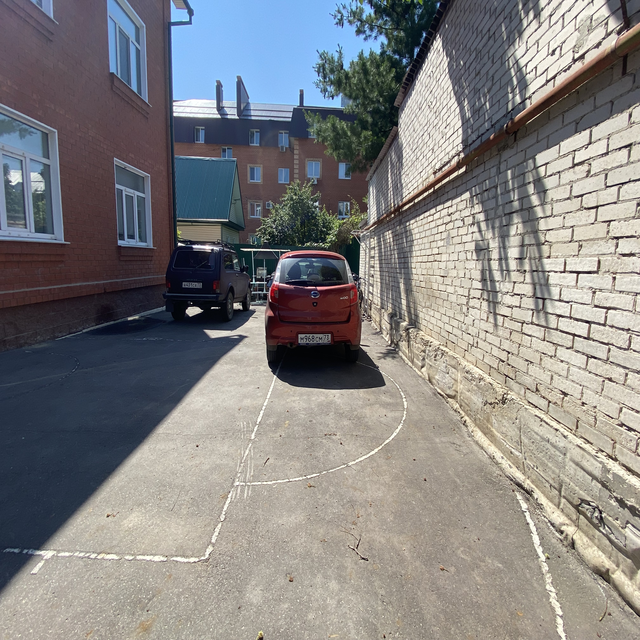

In [10]:
img = Image.open(os.path.join('./participants/train/', img_name))
img = img.resize((640, 640), Image.Resampling.LANCZOS) # RSF
img

## Train / test

In [70]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 2]  # person and car

Using cache found in C:\Users\Сергей/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-23 Python-3.10.6 torch-1.12.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [13]:
#!pip install wand

In [31]:
SourceFolder="./participants/train"

i = 0

for file in os.listdir(SourceFolder):
    i += 1
    print(f'{i:5} {file} ', end='\r')
    SourceFile = SourceFolder + "/" + file
    
    img=ImageWand(filename=SourceFile)
    if img.format != 'jpg':
        img.format='jpg'
        img.save(filename=SourceFile)
    img.close()
print()

  529 img_2945.jpgc


In [71]:
train_img_names

{'img_1596.jpg',
 'img_1600.jpg',
 'img_1601.jpg',
 'img_1603.jpg',
 'img_1605.jpg',
 'img_1606.jpg',
 'img_1607.jpg',
 'img_1608.jpg',
 'img_1612.jpg',
 'img_1613.jpg',
 'img_1615.jpg',
 'img_1616.jpg',
 'img_1618.jpg',
 'img_1619.jpg',
 'img_1620.jpg',
 'img_1621.jpg',
 'img_1623.jpg',
 'img_1626.jpg',
 'img_1627.jpg',
 'img_1628.jpg',
 'img_1631.jpg',
 'img_1634.jpg',
 'img_1635.jpg',
 'img_1637.jpg',
 'img_1640.jpg',
 'img_1641.jpg',
 'img_1643.jpg',
 'img_1645.jpg',
 'img_1647.jpg',
 'img_1649.jpg',
 'img_1650.jpg',
 'img_1653.jpg',
 'img_1656.jpg',
 'img_1658.jpg',
 'img_1662.jpg',
 'img_1665.jpg',
 'img_1666.jpg',
 'img_1667.jpg',
 'img_1672.jpg',
 'img_1673.jpg',
 'img_1674.jpg',
 'img_1675.jpg',
 'img_1676.jpg',
 'img_1677.jpg',
 'img_1680.jpg',
 'img_1681.jpg',
 'img_1684.jpg',
 'img_1685.jpg',
 'img_1686.jpg',
 'img_1687.jpg',
 'img_1688.jpg',
 'img_1690.jpg',
 'img_1691.jpg',
 'img_1692.jpg',
 'img_1696.jpg',
 'img_1700.jpg',
 'img_1707.jpg',
 'img_1708.jpg',
 'img_1709.jpg

In [72]:
#img_name = 'img_2549.jpg'
#img = Image.open(os.path.join('./participants/train/', img_name))
#results = model(np.array(img))
#results

In [47]:
#results.xyxy

[tensor([[1.55114e+03, 1.24234e+03, 2.26273e+03, 1.82781e+03, 9.31128e-01, 2.00000e+00],
         [2.29890e+03, 1.23918e+03, 3.56102e+03, 1.85233e+03, 9.20082e-01, 2.00000e+00],
         [2.34747e+03, 1.09191e+03, 2.46746e+03, 1.36800e+03, 2.78037e-01, 0.00000e+00]])]

In [26]:
#len(results.xyxy[0])

3

In [73]:
train_data = []

for img_name in tqdm(train_img_names): 
    img = Image.open(os.path.join('./participants/train/', img_name))
    results = model(np.array(img))
    if results.xyxy[0].shape != torch.Size([0, 6]):
        if results.xyxy[0][0][5] == 2.:
            results = [img_name] + results.xyxy[0][0].numpy().tolist()
            train_data.append(results)
        #nobj = len(results.xyxy[0])
        #for i in range(nobj):
        #    if results.xyxy[0][i][5] == 2.:
        #        results = [img_name] + results.xyxy[0][i].numpy().tolist()
        #        train_data.append(results)
        #        break

  0%|          | 0/530 [00:00<?, ?it/s]

In [74]:
train_data_df = pd.DataFrame(train_data, columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'conf', 'class'])

In [75]:
train_data_df.head()

image_name        x_min        y_min        x_max        y_max      conf  \
0  img_1864.jpg  1677.391846  1399.955444  2229.731934  1862.151733  0.914703   
1  img_2600.jpg    36.071720  1442.274536  1213.199097  1951.757568  0.930753   
2  img_2374.jpg  2940.138916   945.177490  4001.356201  1399.610962  0.924899   
3  img_2294.jpg  1402.212158  1162.033569  2480.068604  2065.746582  0.922520   
4  img_2604.jpg  1613.983154  1345.603027  2197.957764  1834.357422  0.926348   

   class  
0    2.0  
1    2.0  
2    2.0  
3    2.0  
4    2.0

In [76]:
train_data_df = pd.merge(train_labels_df, train_data_df, how='left')

In [77]:
from catboost import CatBoostRegressor

In [80]:
model_2 = CatBoostRegressor(depth = 10, l2_leaf_reg = 9, learning_rate = 0.03)
#model_3 = CatBoostRegressor(depth = 6, l2_leaf_reg = 7, learning_rate = 0.03)

# Fit model
model_2.fit(train_data_df[['x_min', 'y_min', 'x_max', 'y_max', 'conf']], train_data_df[['distance']].values, 
            verbose=False, plot=True)
#model_3.fit(train_data_df[['x_min', 'y_min', 'x_max', 'y_max']], train_data_df[['distance']].values, 
#            verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [78]:
cat = CatBoostRegressor()
X_train = train_data_df[['x_min', 'y_min', 'x_max', 'y_max', 'conf']]
#X_train = train_data_df[['x_min', 'y_min', 'x_max', 'y_max']]
y_train = train_data_df[['distance']].values

grid = {'learning_rate': [0.01, 0.03, 0.1],
        'depth': [4, 6, 10, 12],
        'l2_leaf_reg': [1, 3, 5, 7, 9, 11]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.5738292	test: 4.1574957	best: 4.1574957 (0)	total: 10.2ms	remaining: 10.2s
1:	learn: 4.5329953	test: 4.1190248	best: 4.1190248 (1)	total: 11.3ms	remaining: 5.66s
2:	learn: 4.4929021	test: 4.0802743	best: 4.0802743 (2)	total: 12.1ms	remaining: 4.03s
3:	learn: 4.4523615	test: 4.0433029	best: 4.0433029 (3)	total: 13ms	remaining: 3.23s
4:	learn: 4.4129876	test: 4.0062222	best: 4.0062222 (4)	total: 13.7ms	remaining: 2.72s
5:	learn: 4.3737076	test: 3.9694217	best: 3.9694217 (5)	total: 14.4ms	remaining: 2.39s
6:	learn: 4.3340132	test: 3.9333129	best: 3.9333129 (6)	total: 15.1ms	remaining: 2.14s
7:	learn: 4.2945835	test: 3.8971763	best: 3.8971763 (7)	total: 16.1ms	remaining: 2s
8:	learn: 4.2568130	test: 3.8615666	best: 3.8615666 (8)	total: 16.9ms	remaining: 1.86s
9:	learn: 4.2192852	test: 3.8257515	best: 3.8257515 (9)	total: 17.4ms	remaining: 1.73s
10:	learn: 4.1816783	test: 3.7908276	best: 3.7908276 (10)	total: 18.3ms	remaining: 1.65s
11:	learn: 4.1446181	test: 3.7560529	best: 3.7

294:	learn: 0.9244674	test: 1.0316211	best: 1.0316211 (294)	total: 201ms	remaining: 481ms
295:	learn: 0.9228432	test: 1.0306208	best: 1.0306208 (295)	total: 202ms	remaining: 481ms
296:	learn: 0.9214109	test: 1.0305200	best: 1.0305200 (296)	total: 203ms	remaining: 480ms
297:	learn: 0.9196988	test: 1.0297007	best: 1.0297007 (297)	total: 203ms	remaining: 479ms
298:	learn: 0.9183929	test: 1.0292547	best: 1.0292547 (298)	total: 204ms	remaining: 477ms
299:	learn: 0.9171832	test: 1.0287252	best: 1.0287252 (299)	total: 204ms	remaining: 476ms
300:	learn: 0.9158068	test: 1.0282507	best: 1.0282507 (300)	total: 205ms	remaining: 475ms
301:	learn: 0.9146320	test: 1.0283392	best: 1.0282507 (300)	total: 205ms	remaining: 474ms
302:	learn: 0.9133291	test: 1.0278637	best: 1.0278637 (302)	total: 206ms	remaining: 473ms
303:	learn: 0.9119755	test: 1.0271483	best: 1.0271483 (303)	total: 206ms	remaining: 472ms
304:	learn: 0.9109166	test: 1.0268051	best: 1.0268051 (304)	total: 207ms	remaining: 471ms
305:	learn

617:	learn: 0.7162637	test: 0.9785383	best: 0.9785167 (614)	total: 395ms	remaining: 244ms
618:	learn: 0.7159257	test: 0.9784534	best: 0.9784534 (618)	total: 396ms	remaining: 243ms
619:	learn: 0.7154880	test: 0.9787212	best: 0.9784534 (618)	total: 396ms	remaining: 243ms
620:	learn: 0.7148731	test: 0.9781845	best: 0.9781845 (620)	total: 397ms	remaining: 242ms
621:	learn: 0.7144169	test: 0.9780755	best: 0.9780755 (621)	total: 397ms	remaining: 242ms
622:	learn: 0.7138528	test: 0.9779891	best: 0.9779891 (622)	total: 398ms	remaining: 241ms
623:	learn: 0.7132929	test: 0.9779775	best: 0.9779775 (623)	total: 398ms	remaining: 240ms
624:	learn: 0.7130648	test: 0.9780448	best: 0.9779775 (623)	total: 399ms	remaining: 239ms
625:	learn: 0.7126690	test: 0.9787218	best: 0.9779775 (623)	total: 399ms	remaining: 239ms
626:	learn: 0.7122471	test: 0.9789097	best: 0.9779775 (623)	total: 400ms	remaining: 238ms
627:	learn: 0.7119398	test: 0.9793456	best: 0.9779775 (623)	total: 400ms	remaining: 237ms
628:	learn

993:	learn: 0.5853841	test: 0.9721741	best: 0.9710660 (901)	total: 587ms	remaining: 3.54ms
994:	learn: 0.5850508	test: 0.9723006	best: 0.9710660 (901)	total: 588ms	remaining: 2.95ms
995:	learn: 0.5847363	test: 0.9719954	best: 0.9710660 (901)	total: 588ms	remaining: 2.36ms
996:	learn: 0.5844876	test: 0.9718898	best: 0.9710660 (901)	total: 589ms	remaining: 1.77ms
997:	learn: 0.5841909	test: 0.9716166	best: 0.9710660 (901)	total: 590ms	remaining: 1.18ms
998:	learn: 0.5838174	test: 0.9714203	best: 0.9710660 (901)	total: 590ms	remaining: 590us
999:	learn: 0.5836577	test: 0.9713988	best: 0.9710660 (901)	total: 591ms	remaining: 0us

bestTest = 0.9710659585
bestIteration = 901

0:	loss: 0.9710660	best: 0.9710660 (0)	total: 1.02s	remaining: 1m 12s
0:	learn: 4.4890519	test: 4.0812809	best: 4.0812809 (0)	total: 665us	remaining: 665ms
1:	learn: 4.3692050	test: 3.9685337	best: 3.9685337 (1)	total: 1.09ms	remaining: 543ms
2:	learn: 4.2540158	test: 3.8574993	best: 3.8574993 (2)	total: 1.51ms	remainin

332:	learn: 0.5811374	test: 0.9698791	best: 0.9680391 (311)	total: 182ms	remaining: 364ms
333:	learn: 0.5804277	test: 0.9697715	best: 0.9680391 (311)	total: 183ms	remaining: 364ms
334:	learn: 0.5796154	test: 0.9705833	best: 0.9680391 (311)	total: 183ms	remaining: 364ms
335:	learn: 0.5786090	test: 0.9697934	best: 0.9680391 (311)	total: 184ms	remaining: 364ms
336:	learn: 0.5779144	test: 0.9698038	best: 0.9680391 (311)	total: 185ms	remaining: 364ms
337:	learn: 0.5774367	test: 0.9704385	best: 0.9680391 (311)	total: 186ms	remaining: 363ms
338:	learn: 0.5764776	test: 0.9704519	best: 0.9680391 (311)	total: 186ms	remaining: 363ms
339:	learn: 0.5757349	test: 0.9703082	best: 0.9680391 (311)	total: 187ms	remaining: 362ms
340:	learn: 0.5750999	test: 0.9694693	best: 0.9680391 (311)	total: 187ms	remaining: 361ms
341:	learn: 0.5741927	test: 0.9693659	best: 0.9680391 (311)	total: 187ms	remaining: 361ms
342:	learn: 0.5737263	test: 0.9694735	best: 0.9680391 (311)	total: 188ms	remaining: 360ms
343:	learn

687:	learn: 0.4119914	test: 0.9442414	best: 0.9442414 (687)	total: 371ms	remaining: 168ms
688:	learn: 0.4117260	test: 0.9443982	best: 0.9442414 (687)	total: 371ms	remaining: 168ms
689:	learn: 0.4116094	test: 0.9446081	best: 0.9442414 (687)	total: 372ms	remaining: 167ms
690:	learn: 0.4112538	test: 0.9447928	best: 0.9442414 (687)	total: 373ms	remaining: 167ms
691:	learn: 0.4111369	test: 0.9450698	best: 0.9442414 (687)	total: 373ms	remaining: 166ms
692:	learn: 0.4108383	test: 0.9452537	best: 0.9442414 (687)	total: 374ms	remaining: 166ms
693:	learn: 0.4103844	test: 0.9446808	best: 0.9442414 (687)	total: 375ms	remaining: 165ms
694:	learn: 0.4101963	test: 0.9447939	best: 0.9442414 (687)	total: 375ms	remaining: 165ms
695:	learn: 0.4098359	test: 0.9449326	best: 0.9442414 (687)	total: 376ms	remaining: 164ms
696:	learn: 0.4094570	test: 0.9449346	best: 0.9442414 (687)	total: 376ms	remaining: 164ms
697:	learn: 0.4091603	test: 0.9451312	best: 0.9442414 (687)	total: 377ms	remaining: 163ms
698:	learn

901:	learn: 0.3579985	test: 0.9413193	best: 0.9411962 (900)	total: 565ms	remaining: 61.3ms
902:	learn: 0.3578991	test: 0.9411957	best: 0.9411957 (902)	total: 565ms	remaining: 60.7ms
903:	learn: 0.3576421	test: 0.9410791	best: 0.9410791 (903)	total: 566ms	remaining: 60.1ms
904:	learn: 0.3572398	test: 0.9409928	best: 0.9409928 (904)	total: 567ms	remaining: 59.5ms
905:	learn: 0.3570277	test: 0.9408596	best: 0.9408596 (905)	total: 567ms	remaining: 58.9ms
906:	learn: 0.3568521	test: 0.9411665	best: 0.9408596 (905)	total: 569ms	remaining: 58.3ms
907:	learn: 0.3566404	test: 0.9413161	best: 0.9408596 (905)	total: 570ms	remaining: 57.7ms
908:	learn: 0.3564165	test: 0.9410908	best: 0.9408596 (905)	total: 571ms	remaining: 57.1ms
909:	learn: 0.3561933	test: 0.9413424	best: 0.9408596 (905)	total: 571ms	remaining: 56.5ms
910:	learn: 0.3561306	test: 0.9414542	best: 0.9408596 (905)	total: 572ms	remaining: 55.9ms
911:	learn: 0.3560974	test: 0.9414619	best: 0.9408596 (905)	total: 573ms	remaining: 55.3ms

145:	learn: 0.4900512	test: 0.9237064	best: 0.9212807 (135)	total: 105ms	remaining: 613ms
146:	learn: 0.4888078	test: 0.9223722	best: 0.9212807 (135)	total: 106ms	remaining: 613ms
147:	learn: 0.4875778	test: 0.9220027	best: 0.9212807 (135)	total: 106ms	remaining: 612ms
148:	learn: 0.4865111	test: 0.9208128	best: 0.9208128 (148)	total: 107ms	remaining: 612ms
149:	learn: 0.4856446	test: 0.9219217	best: 0.9208128 (148)	total: 108ms	remaining: 610ms
150:	learn: 0.4844121	test: 0.9212797	best: 0.9208128 (148)	total: 108ms	remaining: 609ms
151:	learn: 0.4832336	test: 0.9215954	best: 0.9208128 (148)	total: 109ms	remaining: 607ms
152:	learn: 0.4816355	test: 0.9226392	best: 0.9208128 (148)	total: 109ms	remaining: 606ms
153:	learn: 0.4790809	test: 0.9232696	best: 0.9208128 (148)	total: 110ms	remaining: 604ms
154:	learn: 0.4773182	test: 0.9215291	best: 0.9208128 (148)	total: 110ms	remaining: 602ms
155:	learn: 0.4761295	test: 0.9218541	best: 0.9208128 (148)	total: 111ms	remaining: 600ms
156:	learn

499:	learn: 0.2479381	test: 0.9137520	best: 0.9064031 (324)	total: 295ms	remaining: 295ms
500:	learn: 0.2478039	test: 0.9137331	best: 0.9064031 (324)	total: 295ms	remaining: 294ms
501:	learn: 0.2474810	test: 0.9138448	best: 0.9064031 (324)	total: 296ms	remaining: 294ms
502:	learn: 0.2470340	test: 0.9138500	best: 0.9064031 (324)	total: 298ms	remaining: 295ms
503:	learn: 0.2468062	test: 0.9135704	best: 0.9064031 (324)	total: 299ms	remaining: 294ms
504:	learn: 0.2463081	test: 0.9133878	best: 0.9064031 (324)	total: 300ms	remaining: 294ms
505:	learn: 0.2459788	test: 0.9137999	best: 0.9064031 (324)	total: 300ms	remaining: 293ms
506:	learn: 0.2456507	test: 0.9137570	best: 0.9064031 (324)	total: 301ms	remaining: 293ms
507:	learn: 0.2454032	test: 0.9134620	best: 0.9064031 (324)	total: 302ms	remaining: 293ms
508:	learn: 0.2451051	test: 0.9131655	best: 0.9064031 (324)	total: 303ms	remaining: 292ms
509:	learn: 0.2448764	test: 0.9133510	best: 0.9064031 (324)	total: 304ms	remaining: 292ms
510:	learn

684:	learn: 0.2061942	test: 0.9187486	best: 0.9064031 (324)	total: 490ms	remaining: 225ms
685:	learn: 0.2060758	test: 0.9188613	best: 0.9064031 (324)	total: 491ms	remaining: 225ms
686:	learn: 0.2060286	test: 0.9191827	best: 0.9064031 (324)	total: 492ms	remaining: 224ms
687:	learn: 0.2058861	test: 0.9193063	best: 0.9064031 (324)	total: 492ms	remaining: 223ms
688:	learn: 0.2057825	test: 0.9190600	best: 0.9064031 (324)	total: 493ms	remaining: 223ms
689:	learn: 0.2056742	test: 0.9189634	best: 0.9064031 (324)	total: 494ms	remaining: 222ms
690:	learn: 0.2054573	test: 0.9189072	best: 0.9064031 (324)	total: 494ms	remaining: 221ms
691:	learn: 0.2052684	test: 0.9189444	best: 0.9064031 (324)	total: 495ms	remaining: 220ms
692:	learn: 0.2048799	test: 0.9186021	best: 0.9064031 (324)	total: 495ms	remaining: 219ms
693:	learn: 0.2047402	test: 0.9190259	best: 0.9064031 (324)	total: 495ms	remaining: 218ms
694:	learn: 0.2046859	test: 0.9190808	best: 0.9064031 (324)	total: 496ms	remaining: 218ms
695:	learn

872:	learn: 0.1839909	test: 0.9237644	best: 0.9064031 (324)	total: 683ms	remaining: 99.4ms
873:	learn: 0.1839367	test: 0.9235526	best: 0.9064031 (324)	total: 684ms	remaining: 98.6ms
874:	learn: 0.1838806	test: 0.9235865	best: 0.9064031 (324)	total: 685ms	remaining: 97.8ms
875:	learn: 0.1837913	test: 0.9235806	best: 0.9064031 (324)	total: 685ms	remaining: 97ms
876:	learn: 0.1836864	test: 0.9234097	best: 0.9064031 (324)	total: 686ms	remaining: 96.2ms
877:	learn: 0.1835825	test: 0.9235065	best: 0.9064031 (324)	total: 686ms	remaining: 95.4ms
878:	learn: 0.1834520	test: 0.9235601	best: 0.9064031 (324)	total: 687ms	remaining: 94.6ms
879:	learn: 0.1833943	test: 0.9237416	best: 0.9064031 (324)	total: 688ms	remaining: 93.8ms
880:	learn: 0.1833439	test: 0.9238673	best: 0.9064031 (324)	total: 689ms	remaining: 93ms
881:	learn: 0.1832358	test: 0.9235145	best: 0.9064031 (324)	total: 689ms	remaining: 92.2ms
882:	learn: 0.1831488	test: 0.9236563	best: 0.9064031 (324)	total: 690ms	remaining: 91.4ms
883

95:	learn: 2.1470925	test: 1.9438254	best: 1.9438254 (95)	total: 88.2ms	remaining: 830ms
96:	learn: 2.1322458	test: 1.9311159	best: 1.9311159 (96)	total: 89.1ms	remaining: 829ms
97:	learn: 2.1172300	test: 1.9183100	best: 1.9183100 (97)	total: 90.3ms	remaining: 831ms
98:	learn: 2.1028949	test: 1.9062080	best: 1.9062080 (98)	total: 90.7ms	remaining: 826ms
99:	learn: 2.0878714	test: 1.8939391	best: 1.8939391 (99)	total: 91.1ms	remaining: 820ms
100:	learn: 2.0733431	test: 1.8813097	best: 1.8813097 (100)	total: 91.6ms	remaining: 815ms
101:	learn: 2.0593592	test: 1.8694769	best: 1.8694769 (101)	total: 92.1ms	remaining: 811ms
102:	learn: 2.0451091	test: 1.8572046	best: 1.8572046 (102)	total: 92.5ms	remaining: 806ms
103:	learn: 2.0309592	test: 1.8454263	best: 1.8454263 (103)	total: 93ms	remaining: 801ms
104:	learn: 2.0169100	test: 1.8337292	best: 1.8337292 (104)	total: 93.4ms	remaining: 796ms
105:	learn: 2.0030654	test: 1.8221475	best: 1.8221475 (105)	total: 93.9ms	remaining: 792ms
106:	learn:

295:	learn: 0.9533597	test: 1.0409218	best: 1.0409218 (295)	total: 278ms	remaining: 661ms
296:	learn: 0.9518865	test: 1.0405457	best: 1.0405457 (296)	total: 279ms	remaining: 660ms
297:	learn: 0.9501211	test: 1.0390921	best: 1.0390921 (297)	total: 279ms	remaining: 658ms
298:	learn: 0.9485399	test: 1.0384995	best: 1.0384995 (298)	total: 280ms	remaining: 656ms
299:	learn: 0.9472039	test: 1.0378196	best: 1.0378196 (299)	total: 280ms	remaining: 654ms
300:	learn: 0.9455538	test: 1.0372463	best: 1.0372463 (300)	total: 281ms	remaining: 652ms
301:	learn: 0.9442485	test: 1.0367763	best: 1.0367763 (301)	total: 281ms	remaining: 650ms
302:	learn: 0.9429954	test: 1.0363803	best: 1.0363803 (302)	total: 282ms	remaining: 648ms
303:	learn: 0.9415020	test: 1.0355360	best: 1.0355360 (303)	total: 282ms	remaining: 647ms
304:	learn: 0.9402492	test: 1.0350586	best: 1.0350586 (304)	total: 283ms	remaining: 645ms
305:	learn: 0.9388598	test: 1.0341255	best: 1.0341255 (305)	total: 283ms	remaining: 643ms
306:	learn

519:	learn: 0.7928292	test: 0.9807876	best: 0.9807876 (519)	total: 485ms	remaining: 448ms
520:	learn: 0.7924342	test: 0.9808555	best: 0.9807876 (519)	total: 486ms	remaining: 447ms
521:	learn: 0.7920120	test: 0.9809417	best: 0.9807876 (519)	total: 487ms	remaining: 446ms
522:	learn: 0.7914599	test: 0.9807335	best: 0.9807335 (522)	total: 488ms	remaining: 445ms
523:	learn: 0.7911636	test: 0.9808313	best: 0.9807335 (522)	total: 489ms	remaining: 444ms
524:	learn: 0.7906860	test: 0.9808356	best: 0.9807335 (522)	total: 489ms	remaining: 443ms
525:	learn: 0.7900928	test: 0.9807300	best: 0.9807300 (525)	total: 490ms	remaining: 442ms
526:	learn: 0.7897246	test: 0.9808251	best: 0.9807300 (525)	total: 491ms	remaining: 440ms
527:	learn: 0.7894579	test: 0.9810042	best: 0.9807300 (525)	total: 491ms	remaining: 439ms
528:	learn: 0.7887747	test: 0.9805560	best: 0.9805560 (528)	total: 492ms	remaining: 438ms
529:	learn: 0.7883489	test: 0.9805395	best: 0.9805395 (529)	total: 492ms	remaining: 436ms
530:	learn

798:	learn: 0.7069305	test: 0.9769308	best: 0.9738480 (733)	total: 678ms	remaining: 171ms
799:	learn: 0.7065038	test: 0.9766373	best: 0.9738480 (733)	total: 679ms	remaining: 170ms
800:	learn: 0.7062908	test: 0.9767961	best: 0.9738480 (733)	total: 680ms	remaining: 169ms
801:	learn: 0.7059424	test: 0.9768291	best: 0.9738480 (733)	total: 680ms	remaining: 168ms
802:	learn: 0.7057413	test: 0.9770614	best: 0.9738480 (733)	total: 681ms	remaining: 167ms
803:	learn: 0.7055575	test: 0.9772309	best: 0.9738480 (733)	total: 682ms	remaining: 166ms
804:	learn: 0.7052519	test: 0.9773095	best: 0.9738480 (733)	total: 683ms	remaining: 166ms
805:	learn: 0.7050139	test: 0.9773435	best: 0.9738480 (733)	total: 684ms	remaining: 165ms
806:	learn: 0.7047684	test: 0.9772897	best: 0.9738480 (733)	total: 685ms	remaining: 164ms
807:	learn: 0.7042535	test: 0.9770336	best: 0.9738480 (733)	total: 685ms	remaining: 163ms
808:	learn: 0.7038350	test: 0.9768626	best: 0.9738480 (733)	total: 686ms	remaining: 162ms
809:	learn

15:	learn: 3.0747386	test: 2.7678231	best: 2.7678231 (15)	total: 39.7ms	remaining: 2.44s
16:	learn: 2.9995280	test: 2.7003623	best: 2.7003623 (16)	total: 40.8ms	remaining: 2.36s
17:	learn: 2.9299980	test: 2.6362654	best: 2.6362654 (17)	total: 41.9ms	remaining: 2.29s
18:	learn: 2.8615072	test: 2.5731575	best: 2.5731575 (18)	total: 43.2ms	remaining: 2.23s
19:	learn: 2.7937459	test: 2.5091369	best: 2.5091369 (19)	total: 44.3ms	remaining: 2.17s
20:	learn: 2.7283810	test: 2.4493585	best: 2.4493585 (20)	total: 45.1ms	remaining: 2.1s
21:	learn: 2.6626935	test: 2.3913195	best: 2.3913195 (21)	total: 46.2ms	remaining: 2.05s
22:	learn: 2.6044578	test: 2.3368605	best: 2.3368605 (22)	total: 46.8ms	remaining: 1.99s
23:	learn: 2.5464922	test: 2.2857728	best: 2.2857728 (23)	total: 47.5ms	remaining: 1.93s
24:	learn: 2.4892483	test: 2.2350496	best: 2.2350496 (24)	total: 48.6ms	remaining: 1.9s
25:	learn: 2.4327225	test: 2.1857417	best: 2.1857417 (25)	total: 49.1ms	remaining: 1.84s
26:	learn: 2.3789432	te

292:	learn: 0.6826988	test: 0.9971908	best: 0.9899753 (244)	total: 232ms	remaining: 559ms
293:	learn: 0.6822205	test: 0.9973290	best: 0.9899753 (244)	total: 233ms	remaining: 558ms
294:	learn: 0.6817090	test: 0.9980355	best: 0.9899753 (244)	total: 233ms	remaining: 557ms
295:	learn: 0.6804940	test: 0.9984643	best: 0.9899753 (244)	total: 234ms	remaining: 555ms
296:	learn: 0.6798770	test: 0.9982765	best: 0.9899753 (244)	total: 234ms	remaining: 555ms
297:	learn: 0.6783961	test: 0.9965558	best: 0.9899753 (244)	total: 235ms	remaining: 554ms
298:	learn: 0.6779566	test: 0.9967823	best: 0.9899753 (244)	total: 236ms	remaining: 554ms
299:	learn: 0.6772418	test: 0.9964333	best: 0.9899753 (244)	total: 237ms	remaining: 553ms
300:	learn: 0.6766547	test: 0.9962667	best: 0.9899753 (244)	total: 238ms	remaining: 552ms
301:	learn: 0.6760963	test: 0.9965024	best: 0.9899753 (244)	total: 238ms	remaining: 551ms
302:	learn: 0.6754042	test: 0.9959584	best: 0.9899753 (244)	total: 239ms	remaining: 550ms
303:	learn

638:	learn: 0.4867729	test: 0.9758513	best: 0.9756474 (637)	total: 422ms	remaining: 238ms
639:	learn: 0.4861662	test: 0.9757342	best: 0.9756474 (637)	total: 422ms	remaining: 238ms
640:	learn: 0.4857848	test: 0.9757644	best: 0.9756474 (637)	total: 423ms	remaining: 237ms
641:	learn: 0.4853282	test: 0.9754628	best: 0.9754628 (641)	total: 424ms	remaining: 236ms
642:	learn: 0.4849593	test: 0.9758068	best: 0.9754628 (641)	total: 424ms	remaining: 236ms
643:	learn: 0.4847128	test: 0.9758898	best: 0.9754628 (641)	total: 425ms	remaining: 235ms
644:	learn: 0.4843011	test: 0.9764714	best: 0.9754628 (641)	total: 425ms	remaining: 234ms
645:	learn: 0.4838228	test: 0.9761720	best: 0.9754628 (641)	total: 426ms	remaining: 233ms
646:	learn: 0.4837145	test: 0.9760573	best: 0.9754628 (641)	total: 426ms	remaining: 233ms
647:	learn: 0.4834990	test: 0.9759403	best: 0.9754628 (641)	total: 427ms	remaining: 232ms
648:	learn: 0.4832952	test: 0.9760470	best: 0.9754628 (641)	total: 427ms	remaining: 231ms
649:	learn

967:	learn: 0.4037623	test: 0.9639738	best: 0.9632686 (949)	total: 616ms	remaining: 20.4ms
968:	learn: 0.4036213	test: 0.9642507	best: 0.9632686 (949)	total: 616ms	remaining: 19.7ms
969:	learn: 0.4035263	test: 0.9643896	best: 0.9632686 (949)	total: 617ms	remaining: 19.1ms
970:	learn: 0.4032781	test: 0.9641128	best: 0.9632686 (949)	total: 618ms	remaining: 18.5ms
971:	learn: 0.4029224	test: 0.9637595	best: 0.9632686 (949)	total: 619ms	remaining: 17.8ms
972:	learn: 0.4027192	test: 0.9637164	best: 0.9632686 (949)	total: 619ms	remaining: 17.2ms
973:	learn: 0.4022687	test: 0.9636003	best: 0.9632686 (949)	total: 620ms	remaining: 16.5ms
974:	learn: 0.4020892	test: 0.9635492	best: 0.9632686 (949)	total: 620ms	remaining: 15.9ms
975:	learn: 0.4018558	test: 0.9634250	best: 0.9632686 (949)	total: 621ms	remaining: 15.3ms
976:	learn: 0.4016392	test: 0.9632591	best: 0.9632591 (976)	total: 621ms	remaining: 14.6ms
977:	learn: 0.4014398	test: 0.9635118	best: 0.9632591 (976)	total: 622ms	remaining: 14ms
9

268:	learn: 0.4263783	test: 0.9792748	best: 0.9628919 (131)	total: 193ms	remaining: 524ms
269:	learn: 0.4257098	test: 0.9787475	best: 0.9628919 (131)	total: 194ms	remaining: 523ms
270:	learn: 0.4247896	test: 0.9787407	best: 0.9628919 (131)	total: 194ms	remaining: 522ms
271:	learn: 0.4242546	test: 0.9787522	best: 0.9628919 (131)	total: 195ms	remaining: 521ms
272:	learn: 0.4233901	test: 0.9788867	best: 0.9628919 (131)	total: 196ms	remaining: 521ms
273:	learn: 0.4227859	test: 0.9785172	best: 0.9628919 (131)	total: 196ms	remaining: 520ms
274:	learn: 0.4221681	test: 0.9783906	best: 0.9628919 (131)	total: 197ms	remaining: 519ms
275:	learn: 0.4214913	test: 0.9784010	best: 0.9628919 (131)	total: 197ms	remaining: 518ms
276:	learn: 0.4204039	test: 0.9790593	best: 0.9628919 (131)	total: 198ms	remaining: 517ms
277:	learn: 0.4192107	test: 0.9779565	best: 0.9628919 (131)	total: 198ms	remaining: 516ms
278:	learn: 0.4185223	test: 0.9779701	best: 0.9628919 (131)	total: 199ms	remaining: 514ms
279:	learn

517:	learn: 0.2975794	test: 0.9826422	best: 0.9628919 (131)	total: 388ms	remaining: 361ms
518:	learn: 0.2972320	test: 0.9825327	best: 0.9628919 (131)	total: 388ms	remaining: 360ms
519:	learn: 0.2972077	test: 0.9827465	best: 0.9628919 (131)	total: 389ms	remaining: 359ms
520:	learn: 0.2967290	test: 0.9831208	best: 0.9628919 (131)	total: 390ms	remaining: 358ms
521:	learn: 0.2964386	test: 0.9836044	best: 0.9628919 (131)	total: 390ms	remaining: 358ms
522:	learn: 0.2962374	test: 0.9835868	best: 0.9628919 (131)	total: 391ms	remaining: 357ms
523:	learn: 0.2956331	test: 0.9835723	best: 0.9628919 (131)	total: 392ms	remaining: 356ms
524:	learn: 0.2951013	test: 0.9835382	best: 0.9628919 (131)	total: 392ms	remaining: 355ms
525:	learn: 0.2947177	test: 0.9833219	best: 0.9628919 (131)	total: 393ms	remaining: 354ms
526:	learn: 0.2941588	test: 0.9830721	best: 0.9628919 (131)	total: 393ms	remaining: 353ms
527:	learn: 0.2937500	test: 0.9829881	best: 0.9628919 (131)	total: 394ms	remaining: 352ms
528:	learn

828:	learn: 0.2224570	test: 0.9838204	best: 0.9628919 (131)	total: 580ms	remaining: 120ms
829:	learn: 0.2224235	test: 0.9837855	best: 0.9628919 (131)	total: 580ms	remaining: 119ms
830:	learn: 0.2223087	test: 0.9836826	best: 0.9628919 (131)	total: 581ms	remaining: 118ms
831:	learn: 0.2220680	test: 0.9841025	best: 0.9628919 (131)	total: 582ms	remaining: 117ms
832:	learn: 0.2218412	test: 0.9844829	best: 0.9628919 (131)	total: 582ms	remaining: 117ms
833:	learn: 0.2216835	test: 0.9845248	best: 0.9628919 (131)	total: 583ms	remaining: 116ms
834:	learn: 0.2215882	test: 0.9843505	best: 0.9628919 (131)	total: 583ms	remaining: 115ms
835:	learn: 0.2213742	test: 0.9843252	best: 0.9628919 (131)	total: 584ms	remaining: 115ms
836:	learn: 0.2212159	test: 0.9840349	best: 0.9628919 (131)	total: 585ms	remaining: 114ms
837:	learn: 0.2210478	test: 0.9839826	best: 0.9628919 (131)	total: 585ms	remaining: 113ms
838:	learn: 0.2209673	test: 0.9839983	best: 0.9628919 (131)	total: 586ms	remaining: 112ms
839:	learn

99:	learn: 2.1440427	test: 1.9474131	best: 1.9474131 (99)	total: 71.7ms	remaining: 645ms
100:	learn: 2.1294964	test: 1.9351855	best: 1.9351855 (100)	total: 72.6ms	remaining: 646ms
101:	learn: 2.1155655	test: 1.9229459	best: 1.9229459 (101)	total: 73.2ms	remaining: 645ms
102:	learn: 2.1017541	test: 1.9111503	best: 1.9111503 (102)	total: 73.9ms	remaining: 644ms
103:	learn: 2.0876364	test: 1.8993320	best: 1.8993320 (103)	total: 74.7ms	remaining: 643ms
104:	learn: 2.0736459	test: 1.8875744	best: 1.8875744 (104)	total: 75.5ms	remaining: 644ms
105:	learn: 2.0599129	test: 1.8758885	best: 1.8758885 (105)	total: 76.1ms	remaining: 642ms
106:	learn: 2.0461142	test: 1.8642289	best: 1.8642289 (106)	total: 76.6ms	remaining: 640ms
107:	learn: 2.0332433	test: 1.8528893	best: 1.8528893 (107)	total: 77.2ms	remaining: 637ms
108:	learn: 2.0200398	test: 1.8415785	best: 1.8415785 (108)	total: 77.7ms	remaining: 635ms
109:	learn: 2.0063111	test: 1.8303369	best: 1.8303369 (109)	total: 78.2ms	remaining: 633ms
1

377:	learn: 0.8894717	test: 1.0104949	best: 1.0104949 (377)	total: 260ms	remaining: 429ms
378:	learn: 0.8887350	test: 1.0101261	best: 1.0101261 (378)	total: 262ms	remaining: 429ms
379:	learn: 0.8881168	test: 1.0097870	best: 1.0097870 (379)	total: 263ms	remaining: 429ms
380:	learn: 0.8872727	test: 1.0093210	best: 1.0093210 (380)	total: 264ms	remaining: 429ms
381:	learn: 0.8866140	test: 1.0090926	best: 1.0090926 (381)	total: 265ms	remaining: 428ms
382:	learn: 0.8856717	test: 1.0085672	best: 1.0085672 (382)	total: 265ms	remaining: 427ms
383:	learn: 0.8848077	test: 1.0082182	best: 1.0082182 (383)	total: 266ms	remaining: 426ms
384:	learn: 0.8841393	test: 1.0077681	best: 1.0077681 (384)	total: 266ms	remaining: 425ms
385:	learn: 0.8833802	test: 1.0077222	best: 1.0077222 (385)	total: 267ms	remaining: 424ms
386:	learn: 0.8824821	test: 1.0074489	best: 1.0074489 (386)	total: 267ms	remaining: 424ms
387:	learn: 0.8816273	test: 1.0072153	best: 1.0072153 (387)	total: 268ms	remaining: 423ms
388:	learn

621:	learn: 0.7830111	test: 0.9803739	best: 0.9797177 (614)	total: 453ms	remaining: 275ms
622:	learn: 0.7827874	test: 0.9799930	best: 0.9797177 (614)	total: 454ms	remaining: 275ms
623:	learn: 0.7823786	test: 0.9798298	best: 0.9797177 (614)	total: 455ms	remaining: 274ms
624:	learn: 0.7820650	test: 0.9799336	best: 0.9797177 (614)	total: 455ms	remaining: 273ms
625:	learn: 0.7817213	test: 0.9798609	best: 0.9797177 (614)	total: 456ms	remaining: 272ms
626:	learn: 0.7816118	test: 0.9798643	best: 0.9797177 (614)	total: 456ms	remaining: 272ms
627:	learn: 0.7812946	test: 0.9801761	best: 0.9797177 (614)	total: 457ms	remaining: 271ms
628:	learn: 0.7810617	test: 0.9803043	best: 0.9797177 (614)	total: 458ms	remaining: 270ms
629:	learn: 0.7810051	test: 0.9803219	best: 0.9797177 (614)	total: 458ms	remaining: 269ms
630:	learn: 0.7807523	test: 0.9801695	best: 0.9797177 (614)	total: 459ms	remaining: 268ms
631:	learn: 0.7804887	test: 0.9802093	best: 0.9797177 (614)	total: 459ms	remaining: 267ms
632:	learn

908:	learn: 0.7231204	test: 0.9919920	best: 0.9794357 (638)	total: 644ms	remaining: 64.5ms
909:	learn: 0.7229664	test: 0.9920039	best: 0.9794357 (638)	total: 645ms	remaining: 63.7ms
910:	learn: 0.7226604	test: 0.9920199	best: 0.9794357 (638)	total: 645ms	remaining: 63ms
911:	learn: 0.7224285	test: 0.9919653	best: 0.9794357 (638)	total: 646ms	remaining: 62.3ms
912:	learn: 0.7222766	test: 0.9919782	best: 0.9794357 (638)	total: 647ms	remaining: 61.6ms
913:	learn: 0.7220471	test: 0.9919249	best: 0.9794357 (638)	total: 648ms	remaining: 60.9ms
914:	learn: 0.7219458	test: 0.9920414	best: 0.9794357 (638)	total: 648ms	remaining: 60.2ms
915:	learn: 0.7218297	test: 0.9922840	best: 0.9794357 (638)	total: 649ms	remaining: 59.5ms
916:	learn: 0.7214563	test: 0.9922521	best: 0.9794357 (638)	total: 649ms	remaining: 58.8ms
917:	learn: 0.7213412	test: 0.9924941	best: 0.9794357 (638)	total: 650ms	remaining: 58.1ms
918:	learn: 0.7210774	test: 0.9921927	best: 0.9794357 (638)	total: 651ms	remaining: 57.4ms
9

217:	learn: 0.7768469	test: 0.9947607	best: 0.9895768 (188)	total: 132ms	remaining: 473ms
218:	learn: 0.7765489	test: 0.9948737	best: 0.9895768 (188)	total: 133ms	remaining: 474ms
219:	learn: 0.7760676	test: 0.9946935	best: 0.9895768 (188)	total: 134ms	remaining: 474ms
220:	learn: 0.7756247	test: 0.9949505	best: 0.9895768 (188)	total: 134ms	remaining: 473ms
221:	learn: 0.7753699	test: 0.9951725	best: 0.9895768 (188)	total: 135ms	remaining: 473ms
222:	learn: 0.7751167	test: 0.9953891	best: 0.9895768 (188)	total: 136ms	remaining: 473ms
223:	learn: 0.7749503	test: 0.9955466	best: 0.9895768 (188)	total: 136ms	remaining: 472ms
224:	learn: 0.7743029	test: 0.9959202	best: 0.9895768 (188)	total: 137ms	remaining: 471ms
225:	learn: 0.7740135	test: 0.9962347	best: 0.9895768 (188)	total: 137ms	remaining: 470ms
226:	learn: 0.7734425	test: 0.9968814	best: 0.9895768 (188)	total: 138ms	remaining: 469ms
227:	learn: 0.7731631	test: 0.9971958	best: 0.9895768 (188)	total: 139ms	remaining: 470ms
228:	learn

595:	learn: 0.5562872	test: 1.0110275	best: 0.9895768 (188)	total: 322ms	remaining: 218ms
596:	learn: 0.5559188	test: 1.0107133	best: 0.9895768 (188)	total: 323ms	remaining: 218ms
597:	learn: 0.5549589	test: 1.0098078	best: 0.9895768 (188)	total: 323ms	remaining: 217ms
598:	learn: 0.5547538	test: 1.0098227	best: 0.9895768 (188)	total: 324ms	remaining: 217ms
599:	learn: 0.5546206	test: 1.0099260	best: 0.9895768 (188)	total: 325ms	remaining: 217ms
600:	learn: 0.5544246	test: 1.0101056	best: 0.9895768 (188)	total: 326ms	remaining: 216ms
601:	learn: 0.5541803	test: 1.0098781	best: 0.9895768 (188)	total: 327ms	remaining: 216ms
602:	learn: 0.5537734	test: 1.0097875	best: 0.9895768 (188)	total: 328ms	remaining: 216ms
603:	learn: 0.5533768	test: 1.0098428	best: 0.9895768 (188)	total: 329ms	remaining: 215ms
604:	learn: 0.5531580	test: 1.0096441	best: 0.9895768 (188)	total: 329ms	remaining: 215ms
605:	learn: 0.5529889	test: 1.0098781	best: 0.9895768 (188)	total: 330ms	remaining: 215ms
606:	learn

959:	learn: 0.4533523	test: 0.9846351	best: 0.9841773 (953)	total: 513ms	remaining: 21.4ms
960:	learn: 0.4531853	test: 0.9844844	best: 0.9841773 (953)	total: 514ms	remaining: 20.9ms
961:	learn: 0.4527667	test: 0.9842745	best: 0.9841773 (953)	total: 515ms	remaining: 20.3ms
962:	learn: 0.4522737	test: 0.9838037	best: 0.9838037 (962)	total: 515ms	remaining: 19.8ms
963:	learn: 0.4520491	test: 0.9838353	best: 0.9838037 (962)	total: 516ms	remaining: 19.3ms
964:	learn: 0.4519483	test: 0.9835923	best: 0.9835923 (964)	total: 516ms	remaining: 18.7ms
965:	learn: 0.4517639	test: 0.9836493	best: 0.9835923 (964)	total: 517ms	remaining: 18.2ms
966:	learn: 0.4515880	test: 0.9838869	best: 0.9835923 (964)	total: 517ms	remaining: 17.7ms
967:	learn: 0.4515575	test: 0.9839427	best: 0.9835923 (964)	total: 518ms	remaining: 17.1ms
968:	learn: 0.4512737	test: 0.9843193	best: 0.9835923 (964)	total: 518ms	remaining: 16.6ms
969:	learn: 0.4512066	test: 0.9843916	best: 0.9835923 (964)	total: 519ms	remaining: 16ms
9

277:	learn: 0.4522085	test: 0.9829385	best: 0.9749689 (228)	total: 166ms	remaining: 430ms
278:	learn: 0.4514462	test: 0.9826481	best: 0.9749689 (228)	total: 166ms	remaining: 430ms
279:	learn: 0.4508444	test: 0.9824538	best: 0.9749689 (228)	total: 167ms	remaining: 429ms
280:	learn: 0.4501153	test: 0.9834101	best: 0.9749689 (228)	total: 167ms	remaining: 428ms
281:	learn: 0.4498387	test: 0.9836620	best: 0.9749689 (228)	total: 168ms	remaining: 427ms
282:	learn: 0.4497443	test: 0.9839121	best: 0.9749689 (228)	total: 169ms	remaining: 427ms
283:	learn: 0.4485973	test: 0.9824131	best: 0.9749689 (228)	total: 170ms	remaining: 427ms
284:	learn: 0.4483000	test: 0.9822129	best: 0.9749689 (228)	total: 170ms	remaining: 427ms
285:	learn: 0.4474347	test: 0.9811882	best: 0.9749689 (228)	total: 170ms	remaining: 426ms
286:	learn: 0.4466425	test: 0.9813095	best: 0.9749689 (228)	total: 171ms	remaining: 425ms
287:	learn: 0.4458276	test: 0.9815786	best: 0.9749689 (228)	total: 171ms	remaining: 424ms
288:	learn

641:	learn: 0.2945744	test: 1.0009465	best: 0.9749689 (228)	total: 360ms	remaining: 201ms
642:	learn: 0.2938631	test: 1.0010478	best: 0.9749689 (228)	total: 361ms	remaining: 200ms
643:	learn: 0.2936601	test: 1.0012490	best: 0.9749689 (228)	total: 362ms	remaining: 200ms
644:	learn: 0.2934745	test: 1.0011584	best: 0.9749689 (228)	total: 362ms	remaining: 199ms
645:	learn: 0.2930451	test: 1.0011477	best: 0.9749689 (228)	total: 363ms	remaining: 199ms
646:	learn: 0.2929689	test: 1.0013040	best: 0.9749689 (228)	total: 363ms	remaining: 198ms
647:	learn: 0.2925825	test: 1.0013388	best: 0.9749689 (228)	total: 364ms	remaining: 198ms
648:	learn: 0.2924289	test: 1.0009828	best: 0.9749689 (228)	total: 364ms	remaining: 197ms
649:	learn: 0.2923070	test: 1.0008563	best: 0.9749689 (228)	total: 365ms	remaining: 197ms
650:	learn: 0.2922054	test: 1.0009068	best: 0.9749689 (228)	total: 365ms	remaining: 196ms
651:	learn: 0.2921515	test: 1.0009550	best: 0.9749689 (228)	total: 366ms	remaining: 195ms
652:	learn

8:	loss: 0.9749689	best: 0.9064031 (2)	total: 6.79s	remaining: 47.5s
0:	learn: 4.5776661	test: 4.1612310	best: 4.1612310 (0)	total: 3.8ms	remaining: 3.8s
1:	learn: 4.5417458	test: 4.1275122	best: 4.1275122 (1)	total: 4.35ms	remaining: 2.17s
2:	learn: 4.5058255	test: 4.0928492	best: 4.0928492 (2)	total: 4.88ms	remaining: 1.62s
3:	learn: 4.4691404	test: 4.0590201	best: 4.0590201 (3)	total: 5.49ms	remaining: 1.37s
4:	learn: 4.4347318	test: 4.0265501	best: 4.0265501 (4)	total: 5.96ms	remaining: 1.19s
5:	learn: 4.3994262	test: 3.9935858	best: 3.9935858 (5)	total: 6.44ms	remaining: 1.07s
6:	learn: 4.3630032	test: 3.9608092	best: 3.9608092 (6)	total: 7.87ms	remaining: 1.12s
7:	learn: 4.3280295	test: 3.9292141	best: 3.9292141 (7)	total: 8.85ms	remaining: 1.1s
8:	learn: 4.2937252	test: 3.8971772	best: 3.8971772 (8)	total: 10.6ms	remaining: 1.17s
9:	learn: 4.2601421	test: 3.8656778	best: 3.8656778 (9)	total: 11.7ms	remaining: 1.16s
10:	learn: 4.2266835	test: 3.8352959	best: 3.8352959 (10)	total:

330:	learn: 0.9555219	test: 1.0499803	best: 1.0499803 (330)	total: 196ms	remaining: 397ms
331:	learn: 0.9543901	test: 1.0491978	best: 1.0491978 (331)	total: 197ms	remaining: 396ms
332:	learn: 0.9535183	test: 1.0487652	best: 1.0487652 (332)	total: 198ms	remaining: 396ms
333:	learn: 0.9524724	test: 1.0481642	best: 1.0481642 (333)	total: 198ms	remaining: 395ms
334:	learn: 0.9512608	test: 1.0476113	best: 1.0476113 (334)	total: 199ms	remaining: 395ms
335:	learn: 0.9501686	test: 1.0472521	best: 1.0472521 (335)	total: 199ms	remaining: 394ms
336:	learn: 0.9490739	test: 1.0465109	best: 1.0465109 (336)	total: 200ms	remaining: 393ms
337:	learn: 0.9480960	test: 1.0462048	best: 1.0462048 (337)	total: 200ms	remaining: 393ms
338:	learn: 0.9469851	test: 1.0458274	best: 1.0458274 (338)	total: 201ms	remaining: 392ms
339:	learn: 0.9460819	test: 1.0452997	best: 1.0452997 (339)	total: 201ms	remaining: 391ms
340:	learn: 0.9450934	test: 1.0450180	best: 1.0450180 (340)	total: 202ms	remaining: 390ms
341:	learn

718:	learn: 0.7814227	test: 0.9969582	best: 0.9921158 (613)	total: 388ms	remaining: 152ms
719:	learn: 0.7812477	test: 0.9970485	best: 0.9921158 (613)	total: 389ms	remaining: 151ms
720:	learn: 0.7810720	test: 0.9971409	best: 0.9921158 (613)	total: 390ms	remaining: 151ms
721:	learn: 0.7808572	test: 0.9973071	best: 0.9921158 (613)	total: 391ms	remaining: 150ms
722:	learn: 0.7806701	test: 0.9972543	best: 0.9921158 (613)	total: 391ms	remaining: 150ms
723:	learn: 0.7804470	test: 0.9973292	best: 0.9921158 (613)	total: 392ms	remaining: 149ms
724:	learn: 0.7801181	test: 0.9972284	best: 0.9921158 (613)	total: 392ms	remaining: 149ms
725:	learn: 0.7799226	test: 0.9969986	best: 0.9921158 (613)	total: 393ms	remaining: 148ms
726:	learn: 0.7797752	test: 0.9970967	best: 0.9921158 (613)	total: 393ms	remaining: 148ms
727:	learn: 0.7796357	test: 0.9972778	best: 0.9921158 (613)	total: 394ms	remaining: 147ms
728:	learn: 0.7795988	test: 0.9973170	best: 0.9921158 (613)	total: 394ms	remaining: 147ms
729:	learn

60:	learn: 1.3891908	test: 1.3147723	best: 1.3147723 (60)	total: 32.3ms	remaining: 498ms
61:	learn: 1.3719871	test: 1.3008689	best: 1.3008689 (61)	total: 33ms	remaining: 500ms
62:	learn: 1.3556857	test: 1.2907426	best: 1.2907426 (62)	total: 33.7ms	remaining: 502ms
63:	learn: 1.3386339	test: 1.2776375	best: 1.2776375 (63)	total: 34.6ms	remaining: 505ms
64:	learn: 1.3225745	test: 1.2662302	best: 1.2662302 (64)	total: 35.1ms	remaining: 505ms
65:	learn: 1.3065589	test: 1.2544032	best: 1.2544032 (65)	total: 35.7ms	remaining: 505ms
66:	learn: 1.2912256	test: 1.2430216	best: 1.2430216 (66)	total: 36.3ms	remaining: 505ms
67:	learn: 1.2762499	test: 1.2318832	best: 1.2318832 (67)	total: 36.7ms	remaining: 503ms
68:	learn: 1.2638401	test: 1.2240800	best: 1.2240800 (68)	total: 37.1ms	remaining: 501ms
69:	learn: 1.2504825	test: 1.2145355	best: 1.2145355 (69)	total: 37.9ms	remaining: 503ms
70:	learn: 1.2377487	test: 1.2054331	best: 1.2054331 (70)	total: 38.3ms	remaining: 502ms
71:	learn: 1.2247324	te

441:	learn: 0.6683329	test: 1.0150916	best: 0.9941508 (186)	total: 226ms	remaining: 285ms
442:	learn: 0.6681441	test: 1.0156408	best: 0.9941508 (186)	total: 226ms	remaining: 285ms
443:	learn: 0.6672472	test: 1.0148462	best: 0.9941508 (186)	total: 227ms	remaining: 284ms
444:	learn: 0.6661817	test: 1.0147503	best: 0.9941508 (186)	total: 228ms	remaining: 284ms
445:	learn: 0.6654546	test: 1.0151839	best: 0.9941508 (186)	total: 228ms	remaining: 284ms
446:	learn: 0.6651954	test: 1.0153068	best: 0.9941508 (186)	total: 229ms	remaining: 283ms
447:	learn: 0.6644751	test: 1.0149662	best: 0.9941508 (186)	total: 230ms	remaining: 283ms
448:	learn: 0.6639279	test: 1.0150840	best: 0.9941508 (186)	total: 230ms	remaining: 282ms
449:	learn: 0.6635939	test: 1.0151602	best: 0.9941508 (186)	total: 231ms	remaining: 282ms
450:	learn: 0.6623308	test: 1.0140255	best: 0.9941508 (186)	total: 231ms	remaining: 281ms
451:	learn: 0.6620296	test: 1.0138431	best: 0.9941508 (186)	total: 232ms	remaining: 281ms
452:	learn

817:	learn: 0.5248049	test: 1.0034010	best: 0.9941508 (186)	total: 416ms	remaining: 92.6ms
818:	learn: 0.5243406	test: 1.0030781	best: 0.9941508 (186)	total: 417ms	remaining: 92.2ms
819:	learn: 0.5237995	test: 1.0027694	best: 0.9941508 (186)	total: 418ms	remaining: 91.7ms
820:	learn: 0.5236737	test: 1.0028154	best: 0.9941508 (186)	total: 418ms	remaining: 91.2ms
821:	learn: 0.5234087	test: 1.0028513	best: 0.9941508 (186)	total: 419ms	remaining: 90.7ms
822:	learn: 0.5231889	test: 1.0031819	best: 0.9941508 (186)	total: 420ms	remaining: 90.2ms
823:	learn: 0.5230606	test: 1.0033428	best: 0.9941508 (186)	total: 420ms	remaining: 89.7ms
824:	learn: 0.5227574	test: 1.0030656	best: 0.9941508 (186)	total: 421ms	remaining: 89.2ms
825:	learn: 0.5226900	test: 1.0029940	best: 0.9941508 (186)	total: 421ms	remaining: 88.7ms
826:	learn: 0.5225282	test: 1.0032235	best: 0.9941508 (186)	total: 422ms	remaining: 88.2ms
827:	learn: 0.5223898	test: 1.0032790	best: 0.9941508 (186)	total: 422ms	remaining: 87.8ms

180:	learn: 0.5843783	test: 0.9796655	best: 0.9765251 (135)	total: 91ms	remaining: 412ms
181:	learn: 0.5836958	test: 0.9795700	best: 0.9765251 (135)	total: 91.8ms	remaining: 413ms
182:	learn: 0.5813159	test: 0.9775868	best: 0.9765251 (135)	total: 92.3ms	remaining: 412ms
183:	learn: 0.5801389	test: 0.9792230	best: 0.9765251 (135)	total: 92.9ms	remaining: 412ms
184:	learn: 0.5778204	test: 0.9806978	best: 0.9765251 (135)	total: 93.4ms	remaining: 411ms
185:	learn: 0.5760104	test: 0.9796708	best: 0.9765251 (135)	total: 94ms	remaining: 411ms
186:	learn: 0.5750684	test: 0.9811743	best: 0.9765251 (135)	total: 94.6ms	remaining: 411ms
187:	learn: 0.5743904	test: 0.9817384	best: 0.9765251 (135)	total: 95.1ms	remaining: 411ms
188:	learn: 0.5735153	test: 0.9815787	best: 0.9765251 (135)	total: 95.6ms	remaining: 410ms
189:	learn: 0.5729283	test: 0.9819767	best: 0.9765251 (135)	total: 96ms	remaining: 409ms
190:	learn: 0.5699296	test: 0.9806715	best: 0.9765251 (135)	total: 96.4ms	remaining: 409ms
191:	

549:	learn: 0.3560789	test: 1.0058311	best: 0.9713622 (243)	total: 281ms	remaining: 230ms
550:	learn: 0.3557408	test: 1.0056021	best: 0.9713622 (243)	total: 282ms	remaining: 230ms
551:	learn: 0.3556503	test: 1.0059269	best: 0.9713622 (243)	total: 282ms	remaining: 229ms
552:	learn: 0.3549616	test: 1.0065124	best: 0.9713622 (243)	total: 283ms	remaining: 229ms
553:	learn: 0.3547321	test: 1.0067932	best: 0.9713622 (243)	total: 284ms	remaining: 228ms
554:	learn: 0.3547061	test: 1.0069866	best: 0.9713622 (243)	total: 284ms	remaining: 228ms
555:	learn: 0.3543532	test: 1.0072745	best: 0.9713622 (243)	total: 284ms	remaining: 227ms
556:	learn: 0.3539095	test: 1.0072076	best: 0.9713622 (243)	total: 285ms	remaining: 227ms
557:	learn: 0.3531870	test: 1.0072632	best: 0.9713622 (243)	total: 285ms	remaining: 226ms
558:	learn: 0.3530640	test: 1.0073717	best: 0.9713622 (243)	total: 286ms	remaining: 226ms
559:	learn: 0.3526201	test: 1.0072818	best: 0.9713622 (243)	total: 286ms	remaining: 225ms
560:	learn

886:	learn: 0.2717186	test: 1.0121834	best: 0.9713622 (243)	total: 474ms	remaining: 60.4ms
887:	learn: 0.2714850	test: 1.0121833	best: 0.9713622 (243)	total: 475ms	remaining: 59.8ms
888:	learn: 0.2711554	test: 1.0121327	best: 0.9713622 (243)	total: 475ms	remaining: 59.3ms
889:	learn: 0.2709475	test: 1.0120980	best: 0.9713622 (243)	total: 476ms	remaining: 58.8ms
890:	learn: 0.2707879	test: 1.0122441	best: 0.9713622 (243)	total: 476ms	remaining: 58.3ms
891:	learn: 0.2707246	test: 1.0122129	best: 0.9713622 (243)	total: 478ms	remaining: 57.9ms
892:	learn: 0.2706338	test: 1.0122871	best: 0.9713622 (243)	total: 479ms	remaining: 57.4ms
893:	learn: 0.2706064	test: 1.0124805	best: 0.9713622 (243)	total: 480ms	remaining: 56.9ms
894:	learn: 0.2702036	test: 1.0128274	best: 0.9713622 (243)	total: 480ms	remaining: 56.3ms
895:	learn: 0.2700472	test: 1.0126475	best: 0.9713622 (243)	total: 481ms	remaining: 55.8ms
896:	learn: 0.2699168	test: 1.0124456	best: 0.9713622 (243)	total: 482ms	remaining: 55.3ms

207:	learn: 1.3005445	test: 1.2725413	best: 1.2725413 (207)	total: 116ms	remaining: 442ms
208:	learn: 1.2956810	test: 1.2687315	best: 1.2687315 (208)	total: 117ms	remaining: 442ms
209:	learn: 1.2911035	test: 1.2652785	best: 1.2652785 (209)	total: 117ms	remaining: 441ms
210:	learn: 1.2864148	test: 1.2619101	best: 1.2619101 (210)	total: 118ms	remaining: 441ms
211:	learn: 1.2819760	test: 1.2586872	best: 1.2586872 (211)	total: 118ms	remaining: 440ms
212:	learn: 1.2778618	test: 1.2560604	best: 1.2560604 (212)	total: 119ms	remaining: 440ms
213:	learn: 1.2728788	test: 1.2528282	best: 1.2528282 (213)	total: 120ms	remaining: 439ms
214:	learn: 1.2684101	test: 1.2495945	best: 1.2495945 (214)	total: 120ms	remaining: 438ms
215:	learn: 1.2633900	test: 1.2463065	best: 1.2463065 (215)	total: 120ms	remaining: 437ms
216:	learn: 1.2594741	test: 1.2436920	best: 1.2436920 (216)	total: 121ms	remaining: 436ms
217:	learn: 1.2550990	test: 1.2400462	best: 1.2400462 (217)	total: 121ms	remaining: 435ms
218:	learn

601:	learn: 0.8147878	test: 0.9943555	best: 0.9941041 (597)	total: 322ms	remaining: 213ms
602:	learn: 0.8146669	test: 0.9944392	best: 0.9941041 (597)	total: 323ms	remaining: 212ms
603:	learn: 0.8144835	test: 0.9945181	best: 0.9941041 (597)	total: 323ms	remaining: 212ms
604:	learn: 0.8144055	test: 0.9945318	best: 0.9941041 (597)	total: 324ms	remaining: 211ms
605:	learn: 0.8141477	test: 0.9942731	best: 0.9941041 (597)	total: 324ms	remaining: 211ms
606:	learn: 0.8138872	test: 0.9941242	best: 0.9941041 (597)	total: 325ms	remaining: 210ms
607:	learn: 0.8135056	test: 0.9939641	best: 0.9939641 (607)	total: 325ms	remaining: 210ms
608:	learn: 0.8132074	test: 0.9937996	best: 0.9937996 (608)	total: 326ms	remaining: 209ms
609:	learn: 0.8130169	test: 0.9939691	best: 0.9937996 (608)	total: 326ms	remaining: 209ms
610:	learn: 0.8125509	test: 0.9938654	best: 0.9937996 (608)	total: 327ms	remaining: 208ms
611:	learn: 0.8124492	test: 0.9939618	best: 0.9937996 (608)	total: 327ms	remaining: 208ms
612:	learn

972:	learn: 0.7624377	test: 1.0103465	best: 0.9934859 (612)	total: 511ms	remaining: 14.2ms
973:	learn: 0.7622943	test: 1.0101676	best: 0.9934859 (612)	total: 512ms	remaining: 13.7ms
974:	learn: 0.7622137	test: 1.0102592	best: 0.9934859 (612)	total: 512ms	remaining: 13.1ms
975:	learn: 0.7619416	test: 1.0100796	best: 0.9934859 (612)	total: 513ms	remaining: 12.6ms
976:	learn: 0.7616631	test: 1.0099683	best: 0.9934859 (612)	total: 513ms	remaining: 12.1ms
977:	learn: 0.7613515	test: 1.0098364	best: 0.9934859 (612)	total: 514ms	remaining: 11.6ms
978:	learn: 0.7610441	test: 1.0097379	best: 0.9934859 (612)	total: 514ms	remaining: 11ms
979:	learn: 0.7608975	test: 1.0096920	best: 0.9934859 (612)	total: 515ms	remaining: 10.5ms
980:	learn: 0.7608773	test: 1.0097085	best: 0.9934859 (612)	total: 515ms	remaining: 9.98ms
981:	learn: 0.7605925	test: 1.0096748	best: 0.9934859 (612)	total: 516ms	remaining: 9.45ms
982:	learn: 0.7605126	test: 1.0097661	best: 0.9934859 (612)	total: 516ms	remaining: 8.93ms
9

296:	learn: 0.7756777	test: 1.0141389	best: 0.9996913 (197)	total: 176ms	remaining: 416ms
297:	learn: 0.7753589	test: 1.0144255	best: 0.9996913 (197)	total: 177ms	remaining: 417ms
298:	learn: 0.7750450	test: 1.0147134	best: 0.9996913 (197)	total: 178ms	remaining: 417ms
299:	learn: 0.7746353	test: 1.0143940	best: 0.9996913 (197)	total: 179ms	remaining: 418ms
300:	learn: 0.7744249	test: 1.0146530	best: 0.9996913 (197)	total: 180ms	remaining: 418ms
301:	learn: 0.7741197	test: 1.0149407	best: 0.9996913 (197)	total: 180ms	remaining: 417ms
302:	learn: 0.7738192	test: 1.0152296	best: 0.9996913 (197)	total: 181ms	remaining: 416ms
303:	learn: 0.7728341	test: 1.0148710	best: 0.9996913 (197)	total: 182ms	remaining: 417ms
304:	learn: 0.7725554	test: 1.0151177	best: 0.9996913 (197)	total: 183ms	remaining: 418ms
305:	learn: 0.7721628	test: 1.0146172	best: 0.9996913 (197)	total: 184ms	remaining: 418ms
306:	learn: 0.7718685	test: 1.0149057	best: 0.9996913 (197)	total: 185ms	remaining: 417ms
307:	learn

639:	learn: 0.6152266	test: 1.0194298	best: 0.9996913 (197)	total: 368ms	remaining: 207ms
640:	learn: 0.6150301	test: 1.0195406	best: 0.9996913 (197)	total: 369ms	remaining: 207ms
641:	learn: 0.6147319	test: 1.0196404	best: 0.9996913 (197)	total: 370ms	remaining: 206ms
642:	learn: 0.6145383	test: 1.0196484	best: 0.9996913 (197)	total: 370ms	remaining: 206ms
643:	learn: 0.6143471	test: 1.0196940	best: 0.9996913 (197)	total: 371ms	remaining: 205ms
644:	learn: 0.6137462	test: 1.0202378	best: 0.9996913 (197)	total: 371ms	remaining: 204ms
645:	learn: 0.6135473	test: 1.0201663	best: 0.9996913 (197)	total: 372ms	remaining: 204ms
646:	learn: 0.6132038	test: 1.0203613	best: 0.9996913 (197)	total: 372ms	remaining: 203ms
647:	learn: 0.6130989	test: 1.0203539	best: 0.9996913 (197)	total: 373ms	remaining: 203ms
648:	learn: 0.6129391	test: 1.0203392	best: 0.9996913 (197)	total: 373ms	remaining: 202ms
649:	learn: 0.6125243	test: 1.0199797	best: 0.9996913 (197)	total: 374ms	remaining: 201ms
650:	learn

0:	learn: 4.2423780	test: 3.8630992	best: 3.8630992 (0)	total: 5.65ms	remaining: 5.64s
1:	learn: 3.9258394	test: 3.5678849	best: 3.5678849 (1)	total: 6.3ms	remaining: 3.15s
2:	learn: 3.6334881	test: 3.2887048	best: 3.2887048 (2)	total: 6.9ms	remaining: 2.29s
3:	learn: 3.3563705	test: 3.0287423	best: 3.0287423 (3)	total: 7.7ms	remaining: 1.92s
4:	learn: 3.1230824	test: 2.8146626	best: 2.8146626 (4)	total: 8.33ms	remaining: 1.66s
5:	learn: 2.9043554	test: 2.6237443	best: 2.6237443 (5)	total: 8.81ms	remaining: 1.46s
6:	learn: 2.6910137	test: 2.4392008	best: 2.4392008 (6)	total: 9.29ms	remaining: 1.32s
7:	learn: 2.5039727	test: 2.2641636	best: 2.2641636 (7)	total: 9.73ms	remaining: 1.21s
8:	learn: 2.3319568	test: 2.1101544	best: 2.1101544 (8)	total: 10.2ms	remaining: 1.12s
9:	learn: 2.1844606	test: 1.9773219	best: 1.9773219 (9)	total: 10.6ms	remaining: 1.05s
10:	learn: 2.0505049	test: 1.8624211	best: 1.8624211 (10)	total: 11.1ms	remaining: 995ms
11:	learn: 1.9296655	test: 1.7563687	best: 1

327:	learn: 0.4874914	test: 0.9735971	best: 0.9689216 (240)	total: 198ms	remaining: 406ms
328:	learn: 0.4874530	test: 0.9737268	best: 0.9689216 (240)	total: 199ms	remaining: 406ms
329:	learn: 0.4868789	test: 0.9754568	best: 0.9689216 (240)	total: 200ms	remaining: 405ms
330:	learn: 0.4860783	test: 0.9743482	best: 0.9689216 (240)	total: 200ms	remaining: 405ms
331:	learn: 0.4854738	test: 0.9738206	best: 0.9689216 (240)	total: 201ms	remaining: 404ms
332:	learn: 0.4854436	test: 0.9740195	best: 0.9689216 (240)	total: 201ms	remaining: 403ms
333:	learn: 0.4843515	test: 0.9724279	best: 0.9689216 (240)	total: 202ms	remaining: 402ms
334:	learn: 0.4841273	test: 0.9727189	best: 0.9689216 (240)	total: 202ms	remaining: 402ms
335:	learn: 0.4837187	test: 0.9729012	best: 0.9689216 (240)	total: 203ms	remaining: 401ms
336:	learn: 0.4825494	test: 0.9733145	best: 0.9689216 (240)	total: 203ms	remaining: 400ms
337:	learn: 0.4821159	test: 0.9737131	best: 0.9689216 (240)	total: 204ms	remaining: 399ms
338:	learn

696:	learn: 0.3335248	test: 0.9848736	best: 0.9689216 (240)	total: 387ms	remaining: 168ms
697:	learn: 0.3330292	test: 0.9845776	best: 0.9689216 (240)	total: 387ms	remaining: 168ms
698:	learn: 0.3329404	test: 0.9849041	best: 0.9689216 (240)	total: 388ms	remaining: 167ms
699:	learn: 0.3324726	test: 0.9849345	best: 0.9689216 (240)	total: 388ms	remaining: 166ms
700:	learn: 0.3320354	test: 0.9850959	best: 0.9689216 (240)	total: 389ms	remaining: 166ms
701:	learn: 0.3315279	test: 0.9846139	best: 0.9689216 (240)	total: 390ms	remaining: 165ms
702:	learn: 0.3311836	test: 0.9846428	best: 0.9689216 (240)	total: 390ms	remaining: 165ms
703:	learn: 0.3305892	test: 0.9850175	best: 0.9689216 (240)	total: 391ms	remaining: 164ms
704:	learn: 0.3304498	test: 0.9851526	best: 0.9689216 (240)	total: 391ms	remaining: 164ms
705:	learn: 0.3301302	test: 0.9851781	best: 0.9689216 (240)	total: 392ms	remaining: 163ms
706:	learn: 0.3300097	test: 0.9854770	best: 0.9689216 (240)	total: 392ms	remaining: 162ms
707:	learn

12:	learn: 4.1857447	test: 3.7976212	best: 3.7976212 (12)	total: 43.3ms	remaining: 3.29s
13:	learn: 4.1539770	test: 3.7669705	best: 3.7669705 (13)	total: 44.5ms	remaining: 3.13s
14:	learn: 4.1213830	test: 3.7364873	best: 3.7364873 (14)	total: 45ms	remaining: 2.96s
15:	learn: 4.0901403	test: 3.7092405	best: 3.7092405 (15)	total: 45.5ms	remaining: 2.8s
16:	learn: 4.0582738	test: 3.6804312	best: 3.6804312 (16)	total: 46.3ms	remaining: 2.67s
17:	learn: 4.0290672	test: 3.6530726	best: 3.6530726 (17)	total: 46.9ms	remaining: 2.56s
18:	learn: 4.0014242	test: 3.6276841	best: 3.6276841 (18)	total: 47.5ms	remaining: 2.45s
19:	learn: 3.9729161	test: 3.5994536	best: 3.5994536 (19)	total: 47.9ms	remaining: 2.35s
20:	learn: 3.9442355	test: 3.5726682	best: 3.5726682 (20)	total: 48.4ms	remaining: 2.25s
21:	learn: 3.9133345	test: 3.5446011	best: 3.5446011 (21)	total: 48.9ms	remaining: 2.17s
22:	learn: 3.8848179	test: 3.5173398	best: 3.5173398 (22)	total: 49.4ms	remaining: 2.1s
23:	learn: 3.8572514	test

371:	learn: 0.9489886	test: 1.0505643	best: 1.0505643 (371)	total: 232ms	remaining: 392ms
372:	learn: 0.9478026	test: 1.0503080	best: 1.0503080 (372)	total: 233ms	remaining: 392ms
373:	learn: 0.9469531	test: 1.0497956	best: 1.0497956 (373)	total: 234ms	remaining: 391ms
374:	learn: 0.9457250	test: 1.0493537	best: 1.0493537 (374)	total: 234ms	remaining: 390ms
375:	learn: 0.9448180	test: 1.0491746	best: 1.0491746 (375)	total: 235ms	remaining: 390ms
376:	learn: 0.9438052	test: 1.0482232	best: 1.0482232 (376)	total: 236ms	remaining: 389ms
377:	learn: 0.9429696	test: 1.0476942	best: 1.0476942 (377)	total: 236ms	remaining: 388ms
378:	learn: 0.9420516	test: 1.0476020	best: 1.0476020 (378)	total: 236ms	remaining: 387ms
379:	learn: 0.9412892	test: 1.0471606	best: 1.0471606 (379)	total: 237ms	remaining: 387ms
380:	learn: 0.9403045	test: 1.0466127	best: 1.0466127 (380)	total: 238ms	remaining: 386ms
381:	learn: 0.9395376	test: 1.0460167	best: 1.0460167 (381)	total: 238ms	remaining: 385ms
382:	learn

743:	learn: 0.8041281	test: 1.0060258	best: 1.0019811 (623)	total: 424ms	remaining: 146ms
744:	learn: 0.8040573	test: 1.0060427	best: 1.0019811 (623)	total: 425ms	remaining: 146ms
745:	learn: 0.8039666	test: 1.0060963	best: 1.0019811 (623)	total: 426ms	remaining: 145ms
746:	learn: 0.8039033	test: 1.0061482	best: 1.0019811 (623)	total: 426ms	remaining: 144ms
747:	learn: 0.8036853	test: 1.0062208	best: 1.0019811 (623)	total: 427ms	remaining: 144ms
748:	learn: 0.8036170	test: 1.0062579	best: 1.0019811 (623)	total: 427ms	remaining: 143ms
749:	learn: 0.8035300	test: 1.0062772	best: 1.0019811 (623)	total: 428ms	remaining: 143ms
750:	learn: 0.8034959	test: 1.0063288	best: 1.0019811 (623)	total: 428ms	remaining: 142ms
751:	learn: 0.8032193	test: 1.0059489	best: 1.0019811 (623)	total: 429ms	remaining: 141ms
752:	learn: 0.8031402	test: 1.0059649	best: 1.0019811 (623)	total: 429ms	remaining: 141ms
753:	learn: 0.8030435	test: 1.0060459	best: 1.0019811 (623)	total: 430ms	remaining: 140ms
754:	learn

27:	learn: 2.5284570	test: 2.2784128	best: 2.2784128 (27)	total: 30.4ms	remaining: 1.06s
28:	learn: 2.4767292	test: 2.2334209	best: 2.2334209 (28)	total: 31.1ms	remaining: 1.04s
29:	learn: 2.4302480	test: 2.1931393	best: 2.1931393 (29)	total: 31.7ms	remaining: 1.02s
30:	learn: 2.3868862	test: 2.1552239	best: 2.1552239 (30)	total: 32.4ms	remaining: 1.01s
31:	learn: 2.3422961	test: 2.1163030	best: 2.1163030 (31)	total: 33ms	remaining: 999ms
32:	learn: 2.2968630	test: 2.0774724	best: 2.0774724 (32)	total: 33.8ms	remaining: 989ms
33:	learn: 2.2526769	test: 2.0399698	best: 2.0399698 (33)	total: 34.2ms	remaining: 972ms
34:	learn: 2.2128813	test: 2.0046914	best: 2.0046914 (34)	total: 34.6ms	remaining: 955ms
35:	learn: 2.1714269	test: 1.9680995	best: 1.9680995 (35)	total: 35.2ms	remaining: 943ms
36:	learn: 2.1310824	test: 1.9339008	best: 1.9339008 (36)	total: 35.8ms	remaining: 931ms
37:	learn: 2.0944124	test: 1.9018588	best: 1.9018588 (37)	total: 36.3ms	remaining: 919ms
38:	learn: 2.0591832	te

399:	learn: 0.7480347	test: 1.0139656	best: 0.9968366 (216)	total: 224ms	remaining: 335ms
400:	learn: 0.7475213	test: 1.0145118	best: 0.9968366 (216)	total: 224ms	remaining: 335ms
401:	learn: 0.7474816	test: 1.0145614	best: 0.9968366 (216)	total: 225ms	remaining: 335ms
402:	learn: 0.7460853	test: 1.0123792	best: 0.9968366 (216)	total: 227ms	remaining: 336ms
403:	learn: 0.7448273	test: 1.0103593	best: 0.9968366 (216)	total: 228ms	remaining: 336ms
404:	learn: 0.7447830	test: 1.0104302	best: 0.9968366 (216)	total: 228ms	remaining: 335ms
405:	learn: 0.7447389	test: 1.0105007	best: 0.9968366 (216)	total: 229ms	remaining: 335ms
406:	learn: 0.7445809	test: 1.0107262	best: 0.9968366 (216)	total: 229ms	remaining: 334ms
407:	learn: 0.7443914	test: 1.0111765	best: 0.9968366 (216)	total: 230ms	remaining: 333ms
408:	learn: 0.7437235	test: 1.0107750	best: 0.9968366 (216)	total: 230ms	remaining: 333ms
409:	learn: 0.7436721	test: 1.0108358	best: 0.9968366 (216)	total: 231ms	remaining: 332ms
410:	learn

671:	learn: 0.6301416	test: 1.0023140	best: 0.9968366 (216)	total: 415ms	remaining: 202ms
672:	learn: 0.6298067	test: 1.0024064	best: 0.9968366 (216)	total: 416ms	remaining: 202ms
673:	learn: 0.6294990	test: 1.0027756	best: 0.9968366 (216)	total: 416ms	remaining: 201ms
674:	learn: 0.6293108	test: 1.0027904	best: 0.9968366 (216)	total: 417ms	remaining: 201ms
675:	learn: 0.6289223	test: 1.0029921	best: 0.9968366 (216)	total: 417ms	remaining: 200ms
676:	learn: 0.6285651	test: 1.0027455	best: 0.9968366 (216)	total: 418ms	remaining: 199ms
677:	learn: 0.6281213	test: 1.0025212	best: 0.9968366 (216)	total: 418ms	remaining: 199ms
678:	learn: 0.6279412	test: 1.0024227	best: 0.9968366 (216)	total: 419ms	remaining: 198ms
679:	learn: 0.6277565	test: 1.0025010	best: 0.9968366 (216)	total: 419ms	remaining: 197ms
680:	learn: 0.6275807	test: 1.0028386	best: 0.9968366 (216)	total: 420ms	remaining: 197ms
681:	learn: 0.6274214	test: 1.0029397	best: 0.9968366 (216)	total: 421ms	remaining: 196ms
682:	learn

953:	learn: 0.5568992	test: 0.9981291	best: 0.9968366 (216)	total: 605ms	remaining: 29.2ms
954:	learn: 0.5561969	test: 0.9977975	best: 0.9968366 (216)	total: 606ms	remaining: 28.6ms
955:	learn: 0.5559606	test: 0.9977559	best: 0.9968366 (216)	total: 607ms	remaining: 27.9ms
956:	learn: 0.5558500	test: 0.9978263	best: 0.9968366 (216)	total: 608ms	remaining: 27.3ms
957:	learn: 0.5551649	test: 0.9970325	best: 0.9968366 (216)	total: 609ms	remaining: 26.7ms
958:	learn: 0.5549521	test: 0.9973480	best: 0.9968366 (216)	total: 609ms	remaining: 26.1ms
959:	learn: 0.5547383	test: 0.9973553	best: 0.9968366 (216)	total: 610ms	remaining: 25.4ms
960:	learn: 0.5545106	test: 0.9976615	best: 0.9968366 (216)	total: 611ms	remaining: 24.8ms
961:	learn: 0.5544233	test: 0.9975944	best: 0.9968366 (216)	total: 611ms	remaining: 24.2ms
962:	learn: 0.5543335	test: 0.9977517	best: 0.9968366 (216)	total: 612ms	remaining: 23.5ms
963:	learn: 0.5542465	test: 0.9978376	best: 0.9968366 (216)	total: 613ms	remaining: 22.9ms

98:	learn: 0.7776037	test: 1.0110281	best: 0.9968467 (58)	total: 152ms	remaining: 1.38s
99:	learn: 0.7774113	test: 1.0111039	best: 0.9968467 (58)	total: 153ms	remaining: 1.38s
100:	learn: 0.7769561	test: 1.0115884	best: 0.9968467 (58)	total: 153ms	remaining: 1.36s
101:	learn: 0.7762148	test: 1.0123230	best: 0.9968467 (58)	total: 154ms	remaining: 1.35s
102:	learn: 0.7760373	test: 1.0125534	best: 0.9968467 (58)	total: 154ms	remaining: 1.34s
103:	learn: 0.7753331	test: 1.0132916	best: 0.9968467 (58)	total: 155ms	remaining: 1.33s
104:	learn: 0.7751624	test: 1.0134253	best: 0.9968467 (58)	total: 155ms	remaining: 1.32s
105:	learn: 0.7749478	test: 1.0136683	best: 0.9968467 (58)	total: 156ms	remaining: 1.32s
106:	learn: 0.7721530	test: 1.0128740	best: 0.9968467 (58)	total: 158ms	remaining: 1.32s
107:	learn: 0.7712522	test: 1.0129082	best: 0.9968467 (58)	total: 159ms	remaining: 1.31s
108:	learn: 0.7710487	test: 1.0131450	best: 0.9968467 (58)	total: 160ms	remaining: 1.31s
109:	learn: 0.7708495	t

341:	learn: 0.5091902	test: 0.9854026	best: 0.9800946 (325)	total: 344ms	remaining: 661ms
342:	learn: 0.5086384	test: 0.9858586	best: 0.9800946 (325)	total: 345ms	remaining: 660ms
343:	learn: 0.5082874	test: 0.9860150	best: 0.9800946 (325)	total: 345ms	remaining: 658ms
344:	learn: 0.5080709	test: 0.9864312	best: 0.9800946 (325)	total: 346ms	remaining: 656ms
345:	learn: 0.5078244	test: 0.9859082	best: 0.9800946 (325)	total: 346ms	remaining: 654ms
346:	learn: 0.5072727	test: 0.9853990	best: 0.9800946 (325)	total: 347ms	remaining: 652ms
347:	learn: 0.5070659	test: 0.9860970	best: 0.9800946 (325)	total: 347ms	remaining: 650ms
348:	learn: 0.5067597	test: 0.9861511	best: 0.9800946 (325)	total: 347ms	remaining: 648ms
349:	learn: 0.5055720	test: 0.9883941	best: 0.9800946 (325)	total: 348ms	remaining: 646ms
350:	learn: 0.5053424	test: 0.9886562	best: 0.9800946 (325)	total: 348ms	remaining: 644ms
351:	learn: 0.5050989	test: 0.9890912	best: 0.9800946 (325)	total: 349ms	remaining: 642ms
352:	learn

661:	learn: 0.3685999	test: 0.9869362	best: 0.9790735 (523)	total: 534ms	remaining: 273ms
662:	learn: 0.3683174	test: 0.9866197	best: 0.9790735 (523)	total: 535ms	remaining: 272ms
663:	learn: 0.3681883	test: 0.9868540	best: 0.9790735 (523)	total: 535ms	remaining: 271ms
664:	learn: 0.3681599	test: 0.9869193	best: 0.9790735 (523)	total: 536ms	remaining: 270ms
665:	learn: 0.3679042	test: 0.9870042	best: 0.9790735 (523)	total: 536ms	remaining: 269ms
666:	learn: 0.3675089	test: 0.9870802	best: 0.9790735 (523)	total: 537ms	remaining: 268ms
667:	learn: 0.3674305	test: 0.9873806	best: 0.9790735 (523)	total: 537ms	remaining: 267ms
668:	learn: 0.3673664	test: 0.9878789	best: 0.9790735 (523)	total: 538ms	remaining: 266ms
669:	learn: 0.3667831	test: 0.9873313	best: 0.9790735 (523)	total: 538ms	remaining: 265ms
670:	learn: 0.3664251	test: 0.9879173	best: 0.9790735 (523)	total: 538ms	remaining: 264ms
671:	learn: 0.3663519	test: 0.9881160	best: 0.9790735 (523)	total: 539ms	remaining: 263ms
672:	learn

0:	learn: 4.5745631	test: 4.1580102	best: 4.1580102 (0)	total: 10ms	remaining: 10s
1:	learn: 4.5337856	test: 4.1200894	best: 4.1200894 (1)	total: 11.3ms	remaining: 5.64s
2:	learn: 4.4933851	test: 4.0845373	best: 4.0845373 (2)	total: 12.3ms	remaining: 4.1s
3:	learn: 4.4538787	test: 4.0475078	best: 4.0475078 (3)	total: 13.3ms	remaining: 3.31s
4:	learn: 4.4142779	test: 4.0103426	best: 4.0103426 (4)	total: 14.3ms	remaining: 2.84s
5:	learn: 4.3747987	test: 3.9743379	best: 3.9743379 (5)	total: 15.3ms	remaining: 2.53s
6:	learn: 4.3364575	test: 3.9378979	best: 3.9378979 (6)	total: 16.2ms	remaining: 2.3s
7:	learn: 4.2982614	test: 3.9048478	best: 3.9048478 (7)	total: 17.1ms	remaining: 2.12s
8:	learn: 4.2600590	test: 3.8710609	best: 3.8710609 (8)	total: 18.1ms	remaining: 2s
9:	learn: 4.2229942	test: 3.8378485	best: 3.8378485 (9)	total: 19.2ms	remaining: 1.9s
10:	learn: 4.1850194	test: 3.8019559	best: 3.8019559 (10)	total: 20.3ms	remaining: 1.82s
11:	learn: 4.1489349	test: 3.7675455	best: 3.767545

144:	learn: 1.4857632	test: 1.4350779	best: 1.4350779 (144)	total: 215ms	remaining: 1.27s
145:	learn: 1.4763201	test: 1.4282889	best: 1.4282889 (145)	total: 217ms	remaining: 1.27s
146:	learn: 1.4671680	test: 1.4210711	best: 1.4210711 (146)	total: 218ms	remaining: 1.26s
147:	learn: 1.4582955	test: 1.4141810	best: 1.4141810 (147)	total: 219ms	remaining: 1.26s
148:	learn: 1.4496633	test: 1.4076989	best: 1.4076989 (148)	total: 220ms	remaining: 1.26s
149:	learn: 1.4408311	test: 1.4007019	best: 1.4007019 (149)	total: 221ms	remaining: 1.25s
150:	learn: 1.4322786	test: 1.3933198	best: 1.3933198 (150)	total: 222ms	remaining: 1.25s
151:	learn: 1.4240613	test: 1.3872268	best: 1.3872268 (151)	total: 223ms	remaining: 1.25s
152:	learn: 1.4159240	test: 1.3811731	best: 1.3811731 (152)	total: 224ms	remaining: 1.24s
153:	learn: 1.4075370	test: 1.3748719	best: 1.3748719 (153)	total: 225ms	remaining: 1.24s
154:	learn: 1.3996986	test: 1.3691671	best: 1.3691671 (154)	total: 226ms	remaining: 1.23s
155:	learn

277:	learn: 0.8750046	test: 1.0186339	best: 1.0186339 (277)	total: 396ms	remaining: 1.03s
278:	learn: 0.8731523	test: 1.0174429	best: 1.0174429 (278)	total: 398ms	remaining: 1.03s
279:	learn: 0.8713096	test: 1.0176480	best: 1.0174429 (278)	total: 400ms	remaining: 1.03s
280:	learn: 0.8696229	test: 1.0169981	best: 1.0169981 (280)	total: 401ms	remaining: 1.03s
281:	learn: 0.8677440	test: 1.0157572	best: 1.0157572 (281)	total: 402ms	remaining: 1.02s
282:	learn: 0.8660995	test: 1.0147810	best: 1.0147810 (282)	total: 403ms	remaining: 1.02s
283:	learn: 0.8641328	test: 1.0142845	best: 1.0142845 (283)	total: 404ms	remaining: 1.02s
284:	learn: 0.8618221	test: 1.0129685	best: 1.0129685 (284)	total: 406ms	remaining: 1.02s
285:	learn: 0.8600849	test: 1.0120268	best: 1.0120268 (285)	total: 407ms	remaining: 1.02s
286:	learn: 0.8583459	test: 1.0107504	best: 1.0107504 (286)	total: 409ms	remaining: 1.02s
287:	learn: 0.8565736	test: 1.0099981	best: 1.0099981 (287)	total: 411ms	remaining: 1.02s
288:	learn

409:	learn: 0.7096935	test: 0.9537859	best: 0.9537859 (409)	total: 601ms	remaining: 865ms
410:	learn: 0.7088233	test: 0.9535617	best: 0.9535617 (410)	total: 603ms	remaining: 865ms
411:	learn: 0.7082162	test: 0.9533062	best: 0.9533062 (411)	total: 604ms	remaining: 863ms
412:	learn: 0.7074056	test: 0.9527031	best: 0.9527031 (412)	total: 606ms	remaining: 861ms
413:	learn: 0.7065492	test: 0.9522177	best: 0.9522177 (413)	total: 607ms	remaining: 859ms
414:	learn: 0.7053897	test: 0.9514351	best: 0.9514351 (414)	total: 608ms	remaining: 857ms
415:	learn: 0.7045211	test: 0.9512736	best: 0.9512736 (415)	total: 609ms	remaining: 854ms
416:	learn: 0.7038050	test: 0.9511015	best: 0.9511015 (416)	total: 610ms	remaining: 852ms
417:	learn: 0.7029024	test: 0.9510632	best: 0.9510632 (417)	total: 611ms	remaining: 850ms
418:	learn: 0.7020583	test: 0.9504791	best: 0.9504791 (418)	total: 612ms	remaining: 848ms
419:	learn: 0.7011643	test: 0.9504498	best: 0.9504498 (419)	total: 613ms	remaining: 846ms
420:	learn

568:	learn: 0.6070573	test: 0.9382290	best: 0.9375148 (563)	total: 794ms	remaining: 601ms
569:	learn: 0.6067248	test: 0.9383436	best: 0.9375148 (563)	total: 795ms	remaining: 600ms
570:	learn: 0.6062241	test: 0.9381203	best: 0.9375148 (563)	total: 796ms	remaining: 598ms
571:	learn: 0.6057412	test: 0.9379961	best: 0.9375148 (563)	total: 798ms	remaining: 597ms
572:	learn: 0.6052081	test: 0.9381442	best: 0.9375148 (563)	total: 799ms	remaining: 595ms
573:	learn: 0.6047853	test: 0.9382725	best: 0.9375148 (563)	total: 800ms	remaining: 593ms
574:	learn: 0.6042793	test: 0.9384669	best: 0.9375148 (563)	total: 801ms	remaining: 592ms
575:	learn: 0.6038193	test: 0.9382011	best: 0.9375148 (563)	total: 802ms	remaining: 590ms
576:	learn: 0.6031064	test: 0.9380440	best: 0.9375148 (563)	total: 803ms	remaining: 588ms
577:	learn: 0.6025062	test: 0.9378474	best: 0.9375148 (563)	total: 804ms	remaining: 587ms
578:	learn: 0.6018948	test: 0.9374606	best: 0.9374606 (578)	total: 805ms	remaining: 585ms
579:	learn

683:	learn: 0.5531191	test: 0.9315658	best: 0.9309759 (676)	total: 990ms	remaining: 457ms
684:	learn: 0.5528266	test: 0.9315076	best: 0.9309759 (676)	total: 991ms	remaining: 456ms
685:	learn: 0.5524714	test: 0.9313836	best: 0.9309759 (676)	total: 993ms	remaining: 454ms
686:	learn: 0.5521757	test: 0.9313194	best: 0.9309759 (676)	total: 994ms	remaining: 453ms
687:	learn: 0.5518158	test: 0.9311429	best: 0.9309759 (676)	total: 995ms	remaining: 451ms
688:	learn: 0.5513693	test: 0.9309398	best: 0.9309398 (688)	total: 996ms	remaining: 450ms
689:	learn: 0.5510174	test: 0.9311395	best: 0.9309398 (688)	total: 997ms	remaining: 448ms
690:	learn: 0.5507041	test: 0.9309688	best: 0.9309398 (688)	total: 998ms	remaining: 446ms
691:	learn: 0.5501823	test: 0.9308550	best: 0.9308550 (691)	total: 999ms	remaining: 445ms
692:	learn: 0.5498301	test: 0.9306315	best: 0.9306315 (692)	total: 1s	remaining: 443ms
693:	learn: 0.5495167	test: 0.9305356	best: 0.9305356 (693)	total: 1s	remaining: 442ms
694:	learn: 0.54

804:	learn: 0.5073291	test: 0.9314317	best: 0.9292416 (738)	total: 1.19s	remaining: 288ms
805:	learn: 0.5070112	test: 0.9313417	best: 0.9292416 (738)	total: 1.19s	remaining: 286ms
806:	learn: 0.5065650	test: 0.9310129	best: 0.9292416 (738)	total: 1.19s	remaining: 285ms
807:	learn: 0.5061864	test: 0.9309284	best: 0.9292416 (738)	total: 1.19s	remaining: 283ms
808:	learn: 0.5057504	test: 0.9309903	best: 0.9292416 (738)	total: 1.19s	remaining: 282ms
809:	learn: 0.5053773	test: 0.9309008	best: 0.9292416 (738)	total: 1.19s	remaining: 280ms
810:	learn: 0.5049796	test: 0.9308908	best: 0.9292416 (738)	total: 1.2s	remaining: 279ms
811:	learn: 0.5045382	test: 0.9311631	best: 0.9292416 (738)	total: 1.2s	remaining: 277ms
812:	learn: 0.5041925	test: 0.9309771	best: 0.9292416 (738)	total: 1.2s	remaining: 275ms
813:	learn: 0.5038045	test: 0.9312691	best: 0.9292416 (738)	total: 1.2s	remaining: 274ms
814:	learn: 0.5035153	test: 0.9311828	best: 0.9292416 (738)	total: 1.2s	remaining: 272ms
815:	learn: 0.5

933:	learn: 0.4647440	test: 0.9304868	best: 0.9292416 (738)	total: 1.38s	remaining: 97.6ms
934:	learn: 0.4642756	test: 0.9306115	best: 0.9292416 (738)	total: 1.38s	remaining: 96.2ms
935:	learn: 0.4638739	test: 0.9304934	best: 0.9292416 (738)	total: 1.38s	remaining: 94.7ms
936:	learn: 0.4635895	test: 0.9303125	best: 0.9292416 (738)	total: 1.39s	remaining: 93.2ms
937:	learn: 0.4632163	test: 0.9305314	best: 0.9292416 (738)	total: 1.39s	remaining: 91.7ms
938:	learn: 0.4628289	test: 0.9305552	best: 0.9292416 (738)	total: 1.39s	remaining: 90.2ms
939:	learn: 0.4625721	test: 0.9304312	best: 0.9292416 (738)	total: 1.39s	remaining: 88.7ms
940:	learn: 0.4621922	test: 0.9304969	best: 0.9292416 (738)	total: 1.39s	remaining: 87.2ms
941:	learn: 0.4619109	test: 0.9305999	best: 0.9292416 (738)	total: 1.39s	remaining: 85.6ms
942:	learn: 0.4615190	test: 0.9311258	best: 0.9292416 (738)	total: 1.39s	remaining: 84.1ms
943:	learn: 0.4612551	test: 0.9311949	best: 0.9292416 (738)	total: 1.39s	remaining: 82.6ms

51:	learn: 1.3775080	test: 1.3492048	best: 1.3492048 (51)	total: 105ms	remaining: 1.91s
52:	learn: 1.3530576	test: 1.3307310	best: 1.3307310 (52)	total: 106ms	remaining: 1.9s
53:	learn: 1.3313286	test: 1.3147211	best: 1.3147211 (53)	total: 108ms	remaining: 1.89s
54:	learn: 1.3088563	test: 1.2984053	best: 1.2984053 (54)	total: 109ms	remaining: 1.87s
55:	learn: 1.2879450	test: 1.2835067	best: 1.2835067 (55)	total: 110ms	remaining: 1.85s
56:	learn: 1.2684312	test: 1.2710701	best: 1.2710701 (56)	total: 111ms	remaining: 1.84s
57:	learn: 1.2494563	test: 1.2584822	best: 1.2584822 (57)	total: 112ms	remaining: 1.82s
58:	learn: 1.2301492	test: 1.2465192	best: 1.2465192 (58)	total: 114ms	remaining: 1.81s
59:	learn: 1.2119683	test: 1.2344571	best: 1.2344571 (59)	total: 115ms	remaining: 1.8s
60:	learn: 1.1938360	test: 1.2214744	best: 1.2214744 (60)	total: 116ms	remaining: 1.79s
61:	learn: 1.1779391	test: 1.2104828	best: 1.2104828 (61)	total: 117ms	remaining: 1.77s
62:	learn: 1.1623650	test: 1.19913

178:	learn: 0.6298371	test: 0.9595575	best: 0.9595575 (178)	total: 300ms	remaining: 1.38s
179:	learn: 0.6280024	test: 0.9603966	best: 0.9595575 (178)	total: 302ms	remaining: 1.37s
180:	learn: 0.6258526	test: 0.9598994	best: 0.9595575 (178)	total: 303ms	remaining: 1.37s
181:	learn: 0.6236747	test: 0.9602721	best: 0.9595575 (178)	total: 305ms	remaining: 1.37s
182:	learn: 0.6222056	test: 0.9603027	best: 0.9595575 (178)	total: 306ms	remaining: 1.37s
183:	learn: 0.6205688	test: 0.9600444	best: 0.9595575 (178)	total: 307ms	remaining: 1.36s
184:	learn: 0.6193797	test: 0.9595917	best: 0.9595575 (178)	total: 308ms	remaining: 1.36s
185:	learn: 0.6180546	test: 0.9586853	best: 0.9586853 (185)	total: 309ms	remaining: 1.35s
186:	learn: 0.6166172	test: 0.9589778	best: 0.9586853 (185)	total: 310ms	remaining: 1.35s
187:	learn: 0.6150802	test: 0.9589626	best: 0.9586853 (185)	total: 312ms	remaining: 1.34s
188:	learn: 0.6135462	test: 0.9589939	best: 0.9586853 (185)	total: 313ms	remaining: 1.34s
189:	learn

311:	learn: 0.4659709	test: 0.9457689	best: 0.9444339 (300)	total: 496ms	remaining: 1.09s
312:	learn: 0.4651070	test: 0.9452203	best: 0.9444339 (300)	total: 498ms	remaining: 1.09s
313:	learn: 0.4640551	test: 0.9447978	best: 0.9444339 (300)	total: 500ms	remaining: 1.09s
314:	learn: 0.4636217	test: 0.9445555	best: 0.9444339 (300)	total: 501ms	remaining: 1.09s
315:	learn: 0.4628552	test: 0.9440256	best: 0.9440256 (315)	total: 502ms	remaining: 1.09s
316:	learn: 0.4620318	test: 0.9435042	best: 0.9435042 (316)	total: 503ms	remaining: 1.08s
317:	learn: 0.4612293	test: 0.9432153	best: 0.9432153 (317)	total: 504ms	remaining: 1.08s
318:	learn: 0.4600036	test: 0.9437548	best: 0.9432153 (317)	total: 505ms	remaining: 1.08s
319:	learn: 0.4586607	test: 0.9433351	best: 0.9432153 (317)	total: 506ms	remaining: 1.08s
320:	learn: 0.4578480	test: 0.9434982	best: 0.9432153 (317)	total: 507ms	remaining: 1.07s
321:	learn: 0.4568867	test: 0.9432265	best: 0.9432153 (317)	total: 508ms	remaining: 1.07s
322:	learn

444:	learn: 0.3784631	test: 0.9429215	best: 0.9415660 (431)	total: 692ms	remaining: 864ms
445:	learn: 0.3778943	test: 0.9428111	best: 0.9415660 (431)	total: 694ms	remaining: 862ms
446:	learn: 0.3775098	test: 0.9425118	best: 0.9415660 (431)	total: 695ms	remaining: 860ms
447:	learn: 0.3772349	test: 0.9422553	best: 0.9415660 (431)	total: 696ms	remaining: 858ms
448:	learn: 0.3766937	test: 0.9416432	best: 0.9415660 (431)	total: 697ms	remaining: 856ms
449:	learn: 0.3762751	test: 0.9413636	best: 0.9413636 (449)	total: 698ms	remaining: 853ms
450:	learn: 0.3757604	test: 0.9414972	best: 0.9413636 (449)	total: 699ms	remaining: 851ms
451:	learn: 0.3754424	test: 0.9416588	best: 0.9413636 (449)	total: 700ms	remaining: 849ms
452:	learn: 0.3749992	test: 0.9414415	best: 0.9413636 (449)	total: 701ms	remaining: 846ms
453:	learn: 0.3745178	test: 0.9417056	best: 0.9413636 (449)	total: 702ms	remaining: 844ms
454:	learn: 0.3740370	test: 0.9423671	best: 0.9413636 (449)	total: 703ms	remaining: 842ms
455:	learn

619:	learn: 0.3107382	test: 0.9334736	best: 0.9334736 (619)	total: 899ms	remaining: 551ms
620:	learn: 0.3104813	test: 0.9331054	best: 0.9331054 (620)	total: 901ms	remaining: 550ms
621:	learn: 0.3102740	test: 0.9333209	best: 0.9331054 (620)	total: 902ms	remaining: 548ms
622:	learn: 0.3099057	test: 0.9335925	best: 0.9331054 (620)	total: 903ms	remaining: 546ms
623:	learn: 0.3095223	test: 0.9338986	best: 0.9331054 (620)	total: 904ms	remaining: 544ms
624:	learn: 0.3092309	test: 0.9339148	best: 0.9331054 (620)	total: 905ms	remaining: 543ms
625:	learn: 0.3090847	test: 0.9337732	best: 0.9331054 (620)	total: 905ms	remaining: 541ms
626:	learn: 0.3085888	test: 0.9338213	best: 0.9331054 (620)	total: 906ms	remaining: 539ms
627:	learn: 0.3081714	test: 0.9338191	best: 0.9331054 (620)	total: 907ms	remaining: 537ms
628:	learn: 0.3079966	test: 0.9338954	best: 0.9331054 (620)	total: 908ms	remaining: 536ms
629:	learn: 0.3077339	test: 0.9336189	best: 0.9331054 (620)	total: 909ms	remaining: 534ms
630:	learn

802:	learn: 0.2610930	test: 0.9293324	best: 0.9291835 (801)	total: 1.1s	remaining: 269ms
803:	learn: 0.2608769	test: 0.9293593	best: 0.9291835 (801)	total: 1.1s	remaining: 268ms
804:	learn: 0.2606918	test: 0.9291075	best: 0.9291075 (804)	total: 1.1s	remaining: 266ms
805:	learn: 0.2604192	test: 0.9290825	best: 0.9290825 (805)	total: 1.1s	remaining: 265ms
806:	learn: 0.2602232	test: 0.9291409	best: 0.9290825 (805)	total: 1.1s	remaining: 263ms
807:	learn: 0.2600656	test: 0.9292183	best: 0.9290825 (805)	total: 1.1s	remaining: 262ms
808:	learn: 0.2598246	test: 0.9292913	best: 0.9290825 (805)	total: 1.1s	remaining: 260ms
809:	learn: 0.2596567	test: 0.9294183	best: 0.9290825 (805)	total: 1.1s	remaining: 259ms
810:	learn: 0.2594780	test: 0.9295080	best: 0.9290825 (805)	total: 1.1s	remaining: 257ms
811:	learn: 0.2592463	test: 0.9294773	best: 0.9290825 (805)	total: 1.1s	remaining: 256ms
812:	learn: 0.2589626	test: 0.9290641	best: 0.9290641 (812)	total: 1.11s	remaining: 254ms
813:	learn: 0.258809

982:	learn: 0.2273267	test: 0.9284978	best: 0.9282554 (971)	total: 1.29s	remaining: 22.3ms
983:	learn: 0.2271055	test: 0.9284817	best: 0.9282554 (971)	total: 1.29s	remaining: 21ms
984:	learn: 0.2270440	test: 0.9285349	best: 0.9282554 (971)	total: 1.29s	remaining: 19.7ms
985:	learn: 0.2268420	test: 0.9285140	best: 0.9282554 (971)	total: 1.29s	remaining: 18.4ms
986:	learn: 0.2266368	test: 0.9283342	best: 0.9282554 (971)	total: 1.3s	remaining: 17.1ms
987:	learn: 0.2264778	test: 0.9281510	best: 0.9281510 (987)	total: 1.3s	remaining: 15.8ms
988:	learn: 0.2262441	test: 0.9282145	best: 0.9281510 (987)	total: 1.3s	remaining: 14.4ms
989:	learn: 0.2260610	test: 0.9282021	best: 0.9281510 (987)	total: 1.3s	remaining: 13.1ms
990:	learn: 0.2259856	test: 0.9281739	best: 0.9281510 (987)	total: 1.3s	remaining: 11.8ms
991:	learn: 0.2258758	test: 0.9281961	best: 0.9281510 (987)	total: 1.3s	remaining: 10.5ms
992:	learn: 0.2257677	test: 0.9281704	best: 0.9281510 (987)	total: 1.3s	remaining: 9.2ms
993:	lear

132:	learn: 0.3818986	test: 0.9227186	best: 0.9217778 (124)	total: 165ms	remaining: 1.07s
133:	learn: 0.3799499	test: 0.9227593	best: 0.9217778 (124)	total: 166ms	remaining: 1.07s
134:	learn: 0.3778577	test: 0.9224731	best: 0.9217778 (124)	total: 168ms	remaining: 1.07s
135:	learn: 0.3759032	test: 0.9223367	best: 0.9217778 (124)	total: 169ms	remaining: 1.07s
136:	learn: 0.3739789	test: 0.9212681	best: 0.9212681 (136)	total: 170ms	remaining: 1.07s
137:	learn: 0.3720221	test: 0.9218857	best: 0.9212681 (136)	total: 171ms	remaining: 1.07s
138:	learn: 0.3696012	test: 0.9215181	best: 0.9212681 (136)	total: 172ms	remaining: 1.07s
139:	learn: 0.3677823	test: 0.9207194	best: 0.9207194 (139)	total: 173ms	remaining: 1.06s
140:	learn: 0.3659302	test: 0.9199479	best: 0.9199479 (140)	total: 174ms	remaining: 1.06s
141:	learn: 0.3646140	test: 0.9201412	best: 0.9199479 (140)	total: 175ms	remaining: 1.06s
142:	learn: 0.3627868	test: 0.9202946	best: 0.9199479 (140)	total: 177ms	remaining: 1.06s
143:	learn

283:	learn: 0.2318276	test: 0.9240169	best: 0.9180287 (236)	total: 361ms	remaining: 910ms
284:	learn: 0.2311673	test: 0.9245741	best: 0.9180287 (236)	total: 362ms	remaining: 909ms
285:	learn: 0.2306387	test: 0.9240550	best: 0.9180287 (236)	total: 363ms	remaining: 907ms
286:	learn: 0.2295454	test: 0.9239401	best: 0.9180287 (236)	total: 365ms	remaining: 906ms
287:	learn: 0.2291849	test: 0.9243897	best: 0.9180287 (236)	total: 366ms	remaining: 904ms
288:	learn: 0.2284542	test: 0.9236045	best: 0.9180287 (236)	total: 367ms	remaining: 902ms
289:	learn: 0.2281367	test: 0.9230865	best: 0.9180287 (236)	total: 368ms	remaining: 900ms
290:	learn: 0.2279179	test: 0.9238126	best: 0.9180287 (236)	total: 369ms	remaining: 898ms
291:	learn: 0.2271603	test: 0.9236876	best: 0.9180287 (236)	total: 370ms	remaining: 896ms
292:	learn: 0.2263209	test: 0.9233775	best: 0.9180287 (236)	total: 371ms	remaining: 895ms
293:	learn: 0.2258046	test: 0.9234232	best: 0.9180287 (236)	total: 372ms	remaining: 894ms
294:	learn

440:	learn: 0.1819677	test: 0.9234097	best: 0.9180287 (236)	total: 567ms	remaining: 718ms
441:	learn: 0.1817395	test: 0.9234106	best: 0.9180287 (236)	total: 568ms	remaining: 717ms
442:	learn: 0.1814256	test: 0.9235534	best: 0.9180287 (236)	total: 570ms	remaining: 716ms
443:	learn: 0.1813213	test: 0.9234791	best: 0.9180287 (236)	total: 571ms	remaining: 715ms
444:	learn: 0.1811269	test: 0.9235699	best: 0.9180287 (236)	total: 572ms	remaining: 713ms
445:	learn: 0.1809599	test: 0.9233258	best: 0.9180287 (236)	total: 573ms	remaining: 712ms
446:	learn: 0.1808391	test: 0.9229821	best: 0.9180287 (236)	total: 575ms	remaining: 711ms
447:	learn: 0.1805326	test: 0.9229314	best: 0.9180287 (236)	total: 576ms	remaining: 710ms
448:	learn: 0.1804384	test: 0.9229852	best: 0.9180287 (236)	total: 578ms	remaining: 709ms
449:	learn: 0.1803023	test: 0.9232373	best: 0.9180287 (236)	total: 580ms	remaining: 709ms
450:	learn: 0.1801620	test: 0.9231442	best: 0.9180287 (236)	total: 582ms	remaining: 708ms
451:	learn

583:	learn: 0.1673727	test: 0.9245766	best: 0.9180287 (236)	total: 763ms	remaining: 544ms
584:	learn: 0.1673337	test: 0.9245461	best: 0.9180287 (236)	total: 765ms	remaining: 542ms
585:	learn: 0.1673111	test: 0.9245653	best: 0.9180287 (236)	total: 766ms	remaining: 541ms
586:	learn: 0.1672871	test: 0.9246276	best: 0.9180287 (236)	total: 767ms	remaining: 540ms
587:	learn: 0.1672104	test: 0.9246825	best: 0.9180287 (236)	total: 768ms	remaining: 538ms
588:	learn: 0.1671496	test: 0.9245801	best: 0.9180287 (236)	total: 769ms	remaining: 537ms
589:	learn: 0.1671210	test: 0.9245611	best: 0.9180287 (236)	total: 770ms	remaining: 535ms
590:	learn: 0.1670661	test: 0.9242996	best: 0.9180287 (236)	total: 771ms	remaining: 533ms
591:	learn: 0.1670394	test: 0.9242987	best: 0.9180287 (236)	total: 772ms	remaining: 532ms
592:	learn: 0.1669859	test: 0.9241899	best: 0.9180287 (236)	total: 773ms	remaining: 530ms
593:	learn: 0.1669126	test: 0.9242246	best: 0.9180287 (236)	total: 774ms	remaining: 529ms
594:	learn

717:	learn: 0.1627466	test: 0.9242328	best: 0.9180287 (236)	total: 960ms	remaining: 377ms
718:	learn: 0.1627197	test: 0.9242681	best: 0.9180287 (236)	total: 961ms	remaining: 376ms
719:	learn: 0.1626957	test: 0.9242319	best: 0.9180287 (236)	total: 963ms	remaining: 374ms
720:	learn: 0.1626817	test: 0.9242096	best: 0.9180287 (236)	total: 964ms	remaining: 373ms
721:	learn: 0.1626649	test: 0.9242754	best: 0.9180287 (236)	total: 965ms	remaining: 371ms
722:	learn: 0.1626473	test: 0.9242553	best: 0.9180287 (236)	total: 966ms	remaining: 370ms
723:	learn: 0.1626324	test: 0.9243029	best: 0.9180287 (236)	total: 967ms	remaining: 369ms
724:	learn: 0.1626156	test: 0.9244017	best: 0.9180287 (236)	total: 969ms	remaining: 367ms
725:	learn: 0.1625958	test: 0.9244396	best: 0.9180287 (236)	total: 970ms	remaining: 366ms
726:	learn: 0.1625584	test: 0.9244863	best: 0.9180287 (236)	total: 971ms	remaining: 364ms
727:	learn: 0.1625424	test: 0.9244907	best: 0.9180287 (236)	total: 972ms	remaining: 363ms
728:	learn

848:	learn: 0.1609527	test: 0.9242618	best: 0.9180287 (236)	total: 1.15s	remaining: 205ms
849:	learn: 0.1609453	test: 0.9242561	best: 0.9180287 (236)	total: 1.15s	remaining: 204ms
850:	learn: 0.1609415	test: 0.9242450	best: 0.9180287 (236)	total: 1.16s	remaining: 202ms
851:	learn: 0.1609326	test: 0.9243006	best: 0.9180287 (236)	total: 1.16s	remaining: 201ms
852:	learn: 0.1609243	test: 0.9242964	best: 0.9180287 (236)	total: 1.16s	remaining: 199ms
853:	learn: 0.1609081	test: 0.9242789	best: 0.9180287 (236)	total: 1.16s	remaining: 198ms
854:	learn: 0.1608888	test: 0.9242903	best: 0.9180287 (236)	total: 1.16s	remaining: 197ms
855:	learn: 0.1608772	test: 0.9242612	best: 0.9180287 (236)	total: 1.16s	remaining: 195ms
856:	learn: 0.1608694	test: 0.9242582	best: 0.9180287 (236)	total: 1.16s	remaining: 194ms
857:	learn: 0.1608666	test: 0.9242487	best: 0.9180287 (236)	total: 1.16s	remaining: 192ms
858:	learn: 0.1608577	test: 0.9243200	best: 0.9180287 (236)	total: 1.16s	remaining: 191ms
859:	learn

13:	learn: 4.1164394	test: 3.7394712	best: 3.7394712 (13)	total: 46.5ms	remaining: 3.27s
14:	learn: 4.0828295	test: 3.7087275	best: 3.7087275 (14)	total: 47.8ms	remaining: 3.14s
15:	learn: 4.0491782	test: 3.6786352	best: 3.6786352 (15)	total: 49.6ms	remaining: 3.05s
16:	learn: 4.0167703	test: 3.6494877	best: 3.6494877 (16)	total: 50.6ms	remaining: 2.92s
17:	learn: 3.9831223	test: 3.6184842	best: 3.6184842 (17)	total: 51.5ms	remaining: 2.81s
18:	learn: 3.9501032	test: 3.5884207	best: 3.5884207 (18)	total: 52.4ms	remaining: 2.7s
19:	learn: 3.9191704	test: 3.5594917	best: 3.5594917 (19)	total: 53.3ms	remaining: 2.61s
20:	learn: 3.8880940	test: 3.5312361	best: 3.5312361 (20)	total: 54.2ms	remaining: 2.52s
21:	learn: 3.8561726	test: 3.5030653	best: 3.5030653 (21)	total: 55.1ms	remaining: 2.45s
22:	learn: 3.8256285	test: 3.4758639	best: 3.4758639 (22)	total: 56ms	remaining: 2.38s
23:	learn: 3.7937666	test: 3.4478383	best: 3.4478383 (23)	total: 56.9ms	remaining: 2.31s
24:	learn: 3.7650614	tes

195:	learn: 1.2437980	test: 1.2494631	best: 1.2494631 (195)	total: 239ms	remaining: 982ms
196:	learn: 1.2383638	test: 1.2455903	best: 1.2455903 (196)	total: 241ms	remaining: 982ms
197:	learn: 1.2332852	test: 1.2415938	best: 1.2415938 (197)	total: 242ms	remaining: 980ms
198:	learn: 1.2277579	test: 1.2370344	best: 1.2370344 (198)	total: 243ms	remaining: 978ms
199:	learn: 1.2222533	test: 1.2331533	best: 1.2331533 (199)	total: 244ms	remaining: 975ms
200:	learn: 1.2172945	test: 1.2294915	best: 1.2294915 (200)	total: 245ms	remaining: 973ms
201:	learn: 1.2119312	test: 1.2255943	best: 1.2255943 (201)	total: 246ms	remaining: 970ms
202:	learn: 1.2074060	test: 1.2223667	best: 1.2223667 (202)	total: 246ms	remaining: 968ms
203:	learn: 1.2023196	test: 1.2184890	best: 1.2184890 (203)	total: 247ms	remaining: 965ms
204:	learn: 1.1975968	test: 1.2150381	best: 1.2150381 (204)	total: 248ms	remaining: 963ms
205:	learn: 1.1923292	test: 1.2114095	best: 1.2114095 (205)	total: 249ms	remaining: 960ms
206:	learn

368:	learn: 0.8158152	test: 0.9871517	best: 0.9871517 (368)	total: 433ms	remaining: 740ms
369:	learn: 0.8146209	test: 0.9865379	best: 0.9865379 (369)	total: 434ms	remaining: 740ms
370:	learn: 0.8133740	test: 0.9860965	best: 0.9860965 (370)	total: 436ms	remaining: 739ms
371:	learn: 0.8124365	test: 0.9855312	best: 0.9855312 (371)	total: 437ms	remaining: 738ms
372:	learn: 0.8112563	test: 0.9854840	best: 0.9854840 (372)	total: 438ms	remaining: 736ms
373:	learn: 0.8101538	test: 0.9851696	best: 0.9851696 (373)	total: 439ms	remaining: 735ms
374:	learn: 0.8091543	test: 0.9845694	best: 0.9845694 (374)	total: 441ms	remaining: 734ms
375:	learn: 0.8081770	test: 0.9841658	best: 0.9841658 (375)	total: 442ms	remaining: 733ms
376:	learn: 0.8074297	test: 0.9835815	best: 0.9835815 (376)	total: 443ms	remaining: 731ms
377:	learn: 0.8061707	test: 0.9831675	best: 0.9831675 (377)	total: 444ms	remaining: 730ms
378:	learn: 0.8051499	test: 0.9826002	best: 0.9826002 (378)	total: 445ms	remaining: 729ms
379:	learn

501:	learn: 0.7179047	test: 0.9570878	best: 0.9570878 (501)	total: 627ms	remaining: 622ms
502:	learn: 0.7172227	test: 0.9570689	best: 0.9570689 (502)	total: 628ms	remaining: 621ms
503:	learn: 0.7166714	test: 0.9570854	best: 0.9570689 (502)	total: 630ms	remaining: 620ms
504:	learn: 0.7162707	test: 0.9571220	best: 0.9570689 (502)	total: 631ms	remaining: 619ms
505:	learn: 0.7153489	test: 0.9573957	best: 0.9570689 (502)	total: 632ms	remaining: 617ms
506:	learn: 0.7147173	test: 0.9572238	best: 0.9570689 (502)	total: 633ms	remaining: 616ms
507:	learn: 0.7140164	test: 0.9570955	best: 0.9570689 (502)	total: 634ms	remaining: 614ms
508:	learn: 0.7137493	test: 0.9570345	best: 0.9570345 (508)	total: 635ms	remaining: 613ms
509:	learn: 0.7131222	test: 0.9570410	best: 0.9570345 (508)	total: 637ms	remaining: 612ms
510:	learn: 0.7124886	test: 0.9569026	best: 0.9569026 (510)	total: 638ms	remaining: 610ms
511:	learn: 0.7119385	test: 0.9564290	best: 0.9564290 (511)	total: 639ms	remaining: 609ms
512:	learn

646:	learn: 0.6519693	test: 0.9533944	best: 0.9525406 (594)	total: 820ms	remaining: 448ms
647:	learn: 0.6515329	test: 0.9536180	best: 0.9525406 (594)	total: 822ms	remaining: 446ms
648:	learn: 0.6512154	test: 0.9535481	best: 0.9525406 (594)	total: 823ms	remaining: 445ms
649:	learn: 0.6508714	test: 0.9534561	best: 0.9525406 (594)	total: 824ms	remaining: 444ms
650:	learn: 0.6505824	test: 0.9534200	best: 0.9525406 (594)	total: 825ms	remaining: 443ms
651:	learn: 0.6502690	test: 0.9532992	best: 0.9525406 (594)	total: 826ms	remaining: 441ms
652:	learn: 0.6499636	test: 0.9534327	best: 0.9525406 (594)	total: 827ms	remaining: 440ms
653:	learn: 0.6495899	test: 0.9532006	best: 0.9525406 (594)	total: 828ms	remaining: 438ms
654:	learn: 0.6492279	test: 0.9531170	best: 0.9525406 (594)	total: 829ms	remaining: 437ms
655:	learn: 0.6487608	test: 0.9530706	best: 0.9525406 (594)	total: 830ms	remaining: 435ms
656:	learn: 0.6484595	test: 0.9528457	best: 0.9525406 (594)	total: 832ms	remaining: 434ms
657:	learn

810:	learn: 0.5930718	test: 0.9569062	best: 0.9525406 (594)	total: 1.01s	remaining: 237ms
811:	learn: 0.5926756	test: 0.9567894	best: 0.9525406 (594)	total: 1.02s	remaining: 235ms
812:	learn: 0.5924289	test: 0.9568234	best: 0.9525406 (594)	total: 1.02s	remaining: 234ms
813:	learn: 0.5919740	test: 0.9566437	best: 0.9525406 (594)	total: 1.02s	remaining: 233ms
814:	learn: 0.5917739	test: 0.9566910	best: 0.9525406 (594)	total: 1.02s	remaining: 232ms
815:	learn: 0.5913823	test: 0.9564366	best: 0.9525406 (594)	total: 1.02s	remaining: 230ms
816:	learn: 0.5909599	test: 0.9561448	best: 0.9525406 (594)	total: 1.02s	remaining: 229ms
817:	learn: 0.5907067	test: 0.9560320	best: 0.9525406 (594)	total: 1.02s	remaining: 228ms
818:	learn: 0.5903505	test: 0.9562692	best: 0.9525406 (594)	total: 1.02s	remaining: 227ms
819:	learn: 0.5900364	test: 0.9563112	best: 0.9525406 (594)	total: 1.03s	remaining: 225ms
820:	learn: 0.5897837	test: 0.9562212	best: 0.9525406 (594)	total: 1.03s	remaining: 224ms
821:	learn

959:	learn: 0.5503307	test: 0.9592729	best: 0.9525406 (594)	total: 1.21s	remaining: 50.5ms
960:	learn: 0.5501723	test: 0.9593773	best: 0.9525406 (594)	total: 1.21s	remaining: 49.2ms
961:	learn: 0.5499770	test: 0.9593501	best: 0.9525406 (594)	total: 1.21s	remaining: 48ms
962:	learn: 0.5495997	test: 0.9594041	best: 0.9525406 (594)	total: 1.22s	remaining: 46.7ms
963:	learn: 0.5493443	test: 0.9595088	best: 0.9525406 (594)	total: 1.22s	remaining: 45.4ms
964:	learn: 0.5491231	test: 0.9595937	best: 0.9525406 (594)	total: 1.22s	remaining: 44.1ms
965:	learn: 0.5490098	test: 0.9596856	best: 0.9525406 (594)	total: 1.22s	remaining: 42.9ms
966:	learn: 0.5488971	test: 0.9597751	best: 0.9525406 (594)	total: 1.22s	remaining: 41.6ms
967:	learn: 0.5485395	test: 0.9600119	best: 0.9525406 (594)	total: 1.22s	remaining: 40.3ms
968:	learn: 0.5483432	test: 0.9601743	best: 0.9525406 (594)	total: 1.22s	remaining: 39.1ms
969:	learn: 0.5479478	test: 0.9602169	best: 0.9525406 (594)	total: 1.22s	remaining: 37.8ms
9

126:	learn: 0.8054206	test: 0.9971353	best: 0.9971271 (125)	total: 137ms	remaining: 938ms
127:	learn: 0.8018616	test: 0.9958796	best: 0.9958796 (127)	total: 138ms	remaining: 939ms
128:	learn: 0.7991906	test: 0.9959372	best: 0.9958796 (127)	total: 139ms	remaining: 940ms
129:	learn: 0.7966122	test: 0.9952994	best: 0.9952994 (129)	total: 141ms	remaining: 942ms
130:	learn: 0.7933258	test: 0.9945424	best: 0.9945424 (130)	total: 142ms	remaining: 941ms
131:	learn: 0.7906094	test: 0.9935187	best: 0.9935187 (131)	total: 143ms	remaining: 940ms
132:	learn: 0.7876484	test: 0.9916006	best: 0.9916006 (132)	total: 144ms	remaining: 937ms
133:	learn: 0.7854318	test: 0.9903327	best: 0.9903327 (133)	total: 145ms	remaining: 935ms
134:	learn: 0.7829323	test: 0.9888978	best: 0.9888978 (134)	total: 146ms	remaining: 937ms
135:	learn: 0.7803157	test: 0.9881567	best: 0.9881567 (135)	total: 147ms	remaining: 935ms
136:	learn: 0.7780788	test: 0.9870013	best: 0.9870013 (136)	total: 148ms	remaining: 933ms
137:	learn

318:	learn: 0.5551521	test: 0.9622846	best: 0.9607099 (272)	total: 332ms	remaining: 709ms
319:	learn: 0.5546644	test: 0.9620832	best: 0.9607099 (272)	total: 333ms	remaining: 708ms
320:	learn: 0.5534823	test: 0.9619906	best: 0.9607099 (272)	total: 334ms	remaining: 707ms
321:	learn: 0.5530983	test: 0.9620153	best: 0.9607099 (272)	total: 335ms	remaining: 706ms
322:	learn: 0.5521128	test: 0.9626879	best: 0.9607099 (272)	total: 336ms	remaining: 705ms
323:	learn: 0.5516384	test: 0.9624683	best: 0.9607099 (272)	total: 337ms	remaining: 704ms
324:	learn: 0.5507125	test: 0.9627725	best: 0.9607099 (272)	total: 338ms	remaining: 703ms
325:	learn: 0.5497370	test: 0.9628277	best: 0.9607099 (272)	total: 339ms	remaining: 701ms
326:	learn: 0.5482148	test: 0.9628633	best: 0.9607099 (272)	total: 340ms	remaining: 700ms
327:	learn: 0.5475273	test: 0.9626173	best: 0.9607099 (272)	total: 341ms	remaining: 699ms
328:	learn: 0.5468565	test: 0.9629739	best: 0.9607099 (272)	total: 342ms	remaining: 697ms
329:	learn

518:	learn: 0.4248029	test: 0.9659957	best: 0.9607099 (272)	total: 526ms	remaining: 488ms
519:	learn: 0.4242306	test: 0.9664133	best: 0.9607099 (272)	total: 527ms	remaining: 487ms
520:	learn: 0.4239164	test: 0.9666709	best: 0.9607099 (272)	total: 529ms	remaining: 486ms
521:	learn: 0.4230724	test: 0.9665735	best: 0.9607099 (272)	total: 530ms	remaining: 485ms
522:	learn: 0.4221634	test: 0.9660756	best: 0.9607099 (272)	total: 531ms	remaining: 484ms
523:	learn: 0.4218381	test: 0.9661760	best: 0.9607099 (272)	total: 531ms	remaining: 483ms
524:	learn: 0.4214165	test: 0.9658000	best: 0.9607099 (272)	total: 532ms	remaining: 482ms
525:	learn: 0.4210064	test: 0.9660082	best: 0.9607099 (272)	total: 533ms	remaining: 480ms
526:	learn: 0.4207319	test: 0.9662452	best: 0.9607099 (272)	total: 534ms	remaining: 479ms
527:	learn: 0.4205616	test: 0.9663667	best: 0.9607099 (272)	total: 535ms	remaining: 478ms
528:	learn: 0.4199680	test: 0.9658355	best: 0.9607099 (272)	total: 536ms	remaining: 477ms
529:	learn

704:	learn: 0.3617135	test: 0.9623232	best: 0.9607099 (272)	total: 720ms	remaining: 301ms
705:	learn: 0.3615787	test: 0.9624888	best: 0.9607099 (272)	total: 721ms	remaining: 300ms
706:	learn: 0.3610444	test: 0.9622630	best: 0.9607099 (272)	total: 722ms	remaining: 299ms
707:	learn: 0.3607956	test: 0.9622070	best: 0.9607099 (272)	total: 723ms	remaining: 298ms
708:	learn: 0.3604537	test: 0.9620011	best: 0.9607099 (272)	total: 724ms	remaining: 297ms
709:	learn: 0.3596964	test: 0.9618561	best: 0.9607099 (272)	total: 725ms	remaining: 296ms
710:	learn: 0.3592118	test: 0.9618147	best: 0.9607099 (272)	total: 726ms	remaining: 295ms
711:	learn: 0.3589703	test: 0.9616575	best: 0.9607099 (272)	total: 727ms	remaining: 294ms
712:	learn: 0.3588051	test: 0.9616936	best: 0.9607099 (272)	total: 728ms	remaining: 293ms
713:	learn: 0.3582662	test: 0.9620834	best: 0.9607099 (272)	total: 729ms	remaining: 292ms
714:	learn: 0.3582369	test: 0.9621616	best: 0.9607099 (272)	total: 729ms	remaining: 291ms
715:	learn

893:	learn: 0.3130237	test: 0.9581253	best: 0.9577488 (880)	total: 915ms	remaining: 108ms
894:	learn: 0.3127681	test: 0.9581236	best: 0.9577488 (880)	total: 916ms	remaining: 107ms
895:	learn: 0.3126828	test: 0.9581224	best: 0.9577488 (880)	total: 917ms	remaining: 106ms
896:	learn: 0.3124509	test: 0.9581478	best: 0.9577488 (880)	total: 918ms	remaining: 105ms
897:	learn: 0.3123488	test: 0.9581707	best: 0.9577488 (880)	total: 919ms	remaining: 104ms
898:	learn: 0.3121634	test: 0.9580883	best: 0.9577488 (880)	total: 920ms	remaining: 103ms
899:	learn: 0.3118855	test: 0.9578874	best: 0.9577488 (880)	total: 921ms	remaining: 102ms
900:	learn: 0.3116831	test: 0.9579870	best: 0.9577488 (880)	total: 922ms	remaining: 101ms
901:	learn: 0.3110786	test: 0.9583460	best: 0.9577488 (880)	total: 923ms	remaining: 100ms
902:	learn: 0.3108188	test: 0.9584626	best: 0.9577488 (880)	total: 924ms	remaining: 99.2ms
903:	learn: 0.3106665	test: 0.9585293	best: 0.9577488 (880)	total: 924ms	remaining: 98.2ms
904:	lea

73:	learn: 0.6226764	test: 0.9737979	best: 0.9737979 (73)	total: 85.9ms	remaining: 1.07s
74:	learn: 0.6182869	test: 0.9730027	best: 0.9730027 (74)	total: 87.1ms	remaining: 1.07s
75:	learn: 0.6146153	test: 0.9751854	best: 0.9730027 (74)	total: 88.3ms	remaining: 1.07s
76:	learn: 0.6119272	test: 0.9763245	best: 0.9730027 (74)	total: 89.4ms	remaining: 1.07s
77:	learn: 0.6081654	test: 0.9770374	best: 0.9730027 (74)	total: 90.3ms	remaining: 1.07s
78:	learn: 0.6051548	test: 0.9748203	best: 0.9730027 (74)	total: 91.2ms	remaining: 1.06s
79:	learn: 0.6011705	test: 0.9742566	best: 0.9730027 (74)	total: 92ms	remaining: 1.06s
80:	learn: 0.5985705	test: 0.9736962	best: 0.9730027 (74)	total: 92.9ms	remaining: 1.05s
81:	learn: 0.5959285	test: 0.9738015	best: 0.9730027 (74)	total: 93.7ms	remaining: 1.05s
82:	learn: 0.5920396	test: 0.9743195	best: 0.9730027 (74)	total: 94.6ms	remaining: 1.04s
83:	learn: 0.5896303	test: 0.9752434	best: 0.9730027 (74)	total: 95.8ms	remaining: 1.04s
84:	learn: 0.5855849	te

247:	learn: 0.3252675	test: 0.9714654	best: 0.9688783 (184)	total: 283ms	remaining: 857ms
248:	learn: 0.3240313	test: 0.9713356	best: 0.9688783 (184)	total: 284ms	remaining: 856ms
249:	learn: 0.3238516	test: 0.9715103	best: 0.9688783 (184)	total: 286ms	remaining: 857ms
250:	learn: 0.3232685	test: 0.9708592	best: 0.9688783 (184)	total: 287ms	remaining: 856ms
251:	learn: 0.3220107	test: 0.9696289	best: 0.9688783 (184)	total: 288ms	remaining: 854ms
252:	learn: 0.3212750	test: 0.9697403	best: 0.9688783 (184)	total: 289ms	remaining: 852ms
253:	learn: 0.3208946	test: 0.9700274	best: 0.9688783 (184)	total: 290ms	remaining: 850ms
254:	learn: 0.3201664	test: 0.9703085	best: 0.9688783 (184)	total: 290ms	remaining: 849ms
255:	learn: 0.3185096	test: 0.9714309	best: 0.9688783 (184)	total: 291ms	remaining: 847ms
256:	learn: 0.3176339	test: 0.9710663	best: 0.9688783 (184)	total: 292ms	remaining: 845ms
257:	learn: 0.3171906	test: 0.9708224	best: 0.9688783 (184)	total: 293ms	remaining: 843ms
258:	learn

420:	learn: 0.2268697	test: 0.9709480	best: 0.9673919 (266)	total: 480ms	remaining: 660ms
421:	learn: 0.2266504	test: 0.9712502	best: 0.9673919 (266)	total: 481ms	remaining: 659ms
422:	learn: 0.2260562	test: 0.9707032	best: 0.9673919 (266)	total: 482ms	remaining: 658ms
423:	learn: 0.2256202	test: 0.9706463	best: 0.9673919 (266)	total: 483ms	remaining: 656ms
424:	learn: 0.2252825	test: 0.9705456	best: 0.9673919 (266)	total: 484ms	remaining: 655ms
425:	learn: 0.2250144	test: 0.9707093	best: 0.9673919 (266)	total: 485ms	remaining: 654ms
426:	learn: 0.2248306	test: 0.9708284	best: 0.9673919 (266)	total: 486ms	remaining: 652ms
427:	learn: 0.2245709	test: 0.9705538	best: 0.9673919 (266)	total: 487ms	remaining: 651ms
428:	learn: 0.2244253	test: 0.9705475	best: 0.9673919 (266)	total: 488ms	remaining: 649ms
429:	learn: 0.2242293	test: 0.9707860	best: 0.9673919 (266)	total: 489ms	remaining: 648ms
430:	learn: 0.2239171	test: 0.9705321	best: 0.9673919 (266)	total: 490ms	remaining: 647ms
431:	learn

593:	learn: 0.1896740	test: 0.9728532	best: 0.9673919 (266)	total: 671ms	remaining: 459ms
594:	learn: 0.1896056	test: 0.9728908	best: 0.9673919 (266)	total: 672ms	remaining: 458ms
595:	learn: 0.1894056	test: 0.9728777	best: 0.9673919 (266)	total: 674ms	remaining: 457ms
596:	learn: 0.1893148	test: 0.9728764	best: 0.9673919 (266)	total: 675ms	remaining: 455ms
597:	learn: 0.1892257	test: 0.9728343	best: 0.9673919 (266)	total: 676ms	remaining: 454ms
598:	learn: 0.1890944	test: 0.9729021	best: 0.9673919 (266)	total: 677ms	remaining: 453ms
599:	learn: 0.1889822	test: 0.9730022	best: 0.9673919 (266)	total: 678ms	remaining: 452ms
600:	learn: 0.1888847	test: 0.9729980	best: 0.9673919 (266)	total: 679ms	remaining: 451ms
601:	learn: 0.1888035	test: 0.9733605	best: 0.9673919 (266)	total: 681ms	remaining: 450ms
602:	learn: 0.1887057	test: 0.9731681	best: 0.9673919 (266)	total: 681ms	remaining: 449ms
603:	learn: 0.1884358	test: 0.9729639	best: 0.9673919 (266)	total: 683ms	remaining: 447ms
604:	learn

725:	learn: 0.1753633	test: 0.9749097	best: 0.9673919 (266)	total: 854ms	remaining: 322ms
726:	learn: 0.1752763	test: 0.9748730	best: 0.9673919 (266)	total: 858ms	remaining: 322ms
727:	learn: 0.1751986	test: 0.9748948	best: 0.9673919 (266)	total: 860ms	remaining: 321ms
728:	learn: 0.1751140	test: 0.9749296	best: 0.9673919 (266)	total: 862ms	remaining: 320ms
729:	learn: 0.1750601	test: 0.9749054	best: 0.9673919 (266)	total: 864ms	remaining: 320ms
730:	learn: 0.1749193	test: 0.9748992	best: 0.9673919 (266)	total: 865ms	remaining: 318ms
731:	learn: 0.1748825	test: 0.9748521	best: 0.9673919 (266)	total: 866ms	remaining: 317ms
732:	learn: 0.1747398	test: 0.9749823	best: 0.9673919 (266)	total: 868ms	remaining: 316ms
733:	learn: 0.1747092	test: 0.9750004	best: 0.9673919 (266)	total: 870ms	remaining: 315ms
734:	learn: 0.1746100	test: 0.9749518	best: 0.9673919 (266)	total: 871ms	remaining: 314ms
735:	learn: 0.1745153	test: 0.9749678	best: 0.9673919 (266)	total: 872ms	remaining: 313ms
736:	learn

871:	learn: 0.1676425	test: 0.9749539	best: 0.9673919 (266)	total: 1.05s	remaining: 154ms
872:	learn: 0.1676385	test: 0.9749895	best: 0.9673919 (266)	total: 1.05s	remaining: 153ms
873:	learn: 0.1676108	test: 0.9748264	best: 0.9673919 (266)	total: 1.05s	remaining: 152ms
874:	learn: 0.1675630	test: 0.9747822	best: 0.9673919 (266)	total: 1.05s	remaining: 151ms
875:	learn: 0.1675325	test: 0.9749155	best: 0.9673919 (266)	total: 1.05s	remaining: 149ms
876:	learn: 0.1675159	test: 0.9748986	best: 0.9673919 (266)	total: 1.06s	remaining: 148ms
877:	learn: 0.1674969	test: 0.9748668	best: 0.9673919 (266)	total: 1.06s	remaining: 147ms
878:	learn: 0.1674457	test: 0.9749696	best: 0.9673919 (266)	total: 1.06s	remaining: 146ms
879:	learn: 0.1674141	test: 0.9750256	best: 0.9673919 (266)	total: 1.06s	remaining: 144ms
880:	learn: 0.1673908	test: 0.9749981	best: 0.9673919 (266)	total: 1.06s	remaining: 143ms
881:	learn: 0.1673397	test: 0.9749085	best: 0.9673919 (266)	total: 1.06s	remaining: 142ms
882:	learn

14:	learn: 4.1135315	test: 3.7371045	best: 3.7371045 (14)	total: 36.7ms	remaining: 2.41s
15:	learn: 4.0817214	test: 3.7087638	best: 3.7087638 (15)	total: 37.9ms	remaining: 2.33s
16:	learn: 4.0510713	test: 3.6814804	best: 3.6814804 (16)	total: 39.1ms	remaining: 2.26s
17:	learn: 4.0188989	test: 3.6519842	best: 3.6519842 (17)	total: 40.1ms	remaining: 2.19s
18:	learn: 3.9873657	test: 3.6233940	best: 3.6233940 (18)	total: 41ms	remaining: 2.12s
19:	learn: 3.9573533	test: 3.5953192	best: 3.5953192 (19)	total: 42.6ms	remaining: 2.09s
20:	learn: 3.9279783	test: 3.5687960	best: 3.5687960 (20)	total: 43.7ms	remaining: 2.04s
21:	learn: 3.8974062	test: 3.5420612	best: 3.5420612 (21)	total: 44.6ms	remaining: 1.98s
22:	learn: 3.8686194	test: 3.5166872	best: 3.5166872 (22)	total: 45.5ms	remaining: 1.93s
23:	learn: 3.8378087	test: 3.4899010	best: 3.4899010 (23)	total: 46.4ms	remaining: 1.89s
24:	learn: 3.8110139	test: 3.4645668	best: 3.4645668 (24)	total: 47.3ms	remaining: 1.84s
25:	learn: 3.7812077	te

197:	learn: 1.3174649	test: 1.3011998	best: 1.3011998 (197)	total: 231ms	remaining: 936ms
198:	learn: 1.3118993	test: 1.2970020	best: 1.2970020 (198)	total: 233ms	remaining: 937ms
199:	learn: 1.3060645	test: 1.2927020	best: 1.2927020 (199)	total: 234ms	remaining: 936ms
200:	learn: 1.3009570	test: 1.2886936	best: 1.2886936 (200)	total: 235ms	remaining: 935ms
201:	learn: 1.2958512	test: 1.2843135	best: 1.2843135 (201)	total: 236ms	remaining: 932ms
202:	learn: 1.2910428	test: 1.2806876	best: 1.2806876 (202)	total: 237ms	remaining: 930ms
203:	learn: 1.2855976	test: 1.2763212	best: 1.2763212 (203)	total: 238ms	remaining: 928ms
204:	learn: 1.2803834	test: 1.2728734	best: 1.2728734 (204)	total: 239ms	remaining: 926ms
205:	learn: 1.2746863	test: 1.2687126	best: 1.2687126 (205)	total: 240ms	remaining: 924ms
206:	learn: 1.2700061	test: 1.2653156	best: 1.2653156 (206)	total: 241ms	remaining: 921ms
207:	learn: 1.2642121	test: 1.2611238	best: 1.2611238 (207)	total: 241ms	remaining: 919ms
208:	learn

375:	learn: 0.8542292	test: 0.9952056	best: 0.9952056 (375)	total: 425ms	remaining: 706ms
376:	learn: 0.8534783	test: 0.9945062	best: 0.9945062 (376)	total: 428ms	remaining: 707ms
377:	learn: 0.8521441	test: 0.9939810	best: 0.9939810 (377)	total: 429ms	remaining: 706ms
378:	learn: 0.8508342	test: 0.9929433	best: 0.9929433 (378)	total: 430ms	remaining: 705ms
379:	learn: 0.8501022	test: 0.9925752	best: 0.9925752 (379)	total: 431ms	remaining: 704ms
380:	learn: 0.8490993	test: 0.9917854	best: 0.9917854 (380)	total: 433ms	remaining: 703ms
381:	learn: 0.8482115	test: 0.9915479	best: 0.9915479 (381)	total: 434ms	remaining: 702ms
382:	learn: 0.8469645	test: 0.9911036	best: 0.9911036 (382)	total: 435ms	remaining: 701ms
383:	learn: 0.8458321	test: 0.9904797	best: 0.9904797 (383)	total: 437ms	remaining: 701ms
384:	learn: 0.8448804	test: 0.9898834	best: 0.9898834 (384)	total: 438ms	remaining: 700ms
385:	learn: 0.8437934	test: 0.9890015	best: 0.9890015 (385)	total: 440ms	remaining: 700ms
386:	learn

547:	learn: 0.7329571	test: 0.9492713	best: 0.9489338 (541)	total: 621ms	remaining: 512ms
548:	learn: 0.7324293	test: 0.9491721	best: 0.9489338 (541)	total: 623ms	remaining: 511ms
549:	learn: 0.7320549	test: 0.9491057	best: 0.9489338 (541)	total: 624ms	remaining: 511ms
550:	learn: 0.7315985	test: 0.9490665	best: 0.9489338 (541)	total: 625ms	remaining: 509ms
551:	learn: 0.7314232	test: 0.9491130	best: 0.9489338 (541)	total: 626ms	remaining: 508ms
552:	learn: 0.7311273	test: 0.9492448	best: 0.9489338 (541)	total: 627ms	remaining: 507ms
553:	learn: 0.7307572	test: 0.9490208	best: 0.9489338 (541)	total: 628ms	remaining: 506ms
554:	learn: 0.7302733	test: 0.9492618	best: 0.9489338 (541)	total: 629ms	remaining: 504ms
555:	learn: 0.7297162	test: 0.9490264	best: 0.9489338 (541)	total: 630ms	remaining: 503ms
556:	learn: 0.7292054	test: 0.9486935	best: 0.9486935 (556)	total: 631ms	remaining: 502ms
557:	learn: 0.7288236	test: 0.9486452	best: 0.9486452 (557)	total: 632ms	remaining: 500ms
558:	learn

737:	learn: 0.6674967	test: 0.9469929	best: 0.9455469 (626)	total: 818ms	remaining: 290ms
738:	learn: 0.6672327	test: 0.9468895	best: 0.9455469 (626)	total: 820ms	remaining: 289ms
739:	learn: 0.6669455	test: 0.9467292	best: 0.9455469 (626)	total: 821ms	remaining: 288ms
740:	learn: 0.6666591	test: 0.9468756	best: 0.9455469 (626)	total: 822ms	remaining: 287ms
741:	learn: 0.6664044	test: 0.9467919	best: 0.9455469 (626)	total: 823ms	remaining: 286ms
742:	learn: 0.6662228	test: 0.9468602	best: 0.9455469 (626)	total: 823ms	remaining: 285ms
743:	learn: 0.6660099	test: 0.9469130	best: 0.9455469 (626)	total: 824ms	remaining: 284ms
744:	learn: 0.6656717	test: 0.9469023	best: 0.9455469 (626)	total: 825ms	remaining: 282ms
745:	learn: 0.6654372	test: 0.9470945	best: 0.9455469 (626)	total: 826ms	remaining: 281ms
746:	learn: 0.6652070	test: 0.9470221	best: 0.9455469 (626)	total: 827ms	remaining: 280ms
747:	learn: 0.6651166	test: 0.9471168	best: 0.9455469 (626)	total: 828ms	remaining: 279ms
748:	learn

883:	learn: 0.6307756	test: 0.9473426	best: 0.9455469 (626)	total: 1.01s	remaining: 133ms
884:	learn: 0.6305315	test: 0.9473741	best: 0.9455469 (626)	total: 1.01s	remaining: 132ms
885:	learn: 0.6301949	test: 0.9474025	best: 0.9455469 (626)	total: 1.01s	remaining: 131ms
886:	learn: 0.6297485	test: 0.9471257	best: 0.9455469 (626)	total: 1.02s	remaining: 130ms
887:	learn: 0.6294004	test: 0.9471635	best: 0.9455469 (626)	total: 1.02s	remaining: 128ms
888:	learn: 0.6289972	test: 0.9470851	best: 0.9455469 (626)	total: 1.02s	remaining: 127ms
889:	learn: 0.6288655	test: 0.9471013	best: 0.9455469 (626)	total: 1.02s	remaining: 126ms
890:	learn: 0.6287368	test: 0.9471353	best: 0.9455469 (626)	total: 1.02s	remaining: 125ms
891:	learn: 0.6286008	test: 0.9470954	best: 0.9455469 (626)	total: 1.02s	remaining: 124ms
892:	learn: 0.6284730	test: 0.9471296	best: 0.9455469 (626)	total: 1.02s	remaining: 123ms
893:	learn: 0.6283884	test: 0.9470797	best: 0.9455469 (626)	total: 1.02s	remaining: 121ms
894:	learn

72:	learn: 1.2032305	test: 1.2274199	best: 1.2274199 (72)	total: 75.5ms	remaining: 959ms
73:	learn: 1.1906889	test: 1.2178658	best: 1.2178658 (73)	total: 76.7ms	remaining: 960ms
74:	learn: 1.1772110	test: 1.2079964	best: 1.2079964 (74)	total: 78.1ms	remaining: 964ms
75:	learn: 1.1646048	test: 1.1988585	best: 1.1988585 (75)	total: 79.2ms	remaining: 963ms
76:	learn: 1.1530876	test: 1.1918627	best: 1.1918627 (76)	total: 80.2ms	remaining: 961ms
77:	learn: 1.1421744	test: 1.1844233	best: 1.1844233 (77)	total: 81.1ms	remaining: 958ms
78:	learn: 1.1306837	test: 1.1757923	best: 1.1757923 (78)	total: 82.1ms	remaining: 957ms
79:	learn: 1.1204768	test: 1.1690335	best: 1.1690335 (79)	total: 83ms	remaining: 954ms
80:	learn: 1.1093584	test: 1.1608666	best: 1.1608666 (80)	total: 83.9ms	remaining: 952ms
81:	learn: 1.0998716	test: 1.1548843	best: 1.1548843 (81)	total: 84.8ms	remaining: 949ms
82:	learn: 1.0909835	test: 1.1512231	best: 1.1512231 (82)	total: 85.7ms	remaining: 947ms
83:	learn: 1.0805527	te

237:	learn: 0.6759400	test: 0.9701889	best: 0.9683438 (217)	total: 273ms	remaining: 874ms
238:	learn: 0.6751669	test: 0.9707753	best: 0.9683438 (217)	total: 274ms	remaining: 874ms
239:	learn: 0.6741407	test: 0.9693520	best: 0.9683438 (217)	total: 276ms	remaining: 873ms
240:	learn: 0.6738535	test: 0.9694158	best: 0.9683438 (217)	total: 277ms	remaining: 872ms
241:	learn: 0.6731354	test: 0.9697890	best: 0.9683438 (217)	total: 278ms	remaining: 871ms
242:	learn: 0.6720982	test: 0.9698167	best: 0.9683438 (217)	total: 279ms	remaining: 869ms
243:	learn: 0.6710793	test: 0.9699021	best: 0.9683438 (217)	total: 280ms	remaining: 867ms
244:	learn: 0.6707979	test: 0.9701136	best: 0.9683438 (217)	total: 282ms	remaining: 868ms
245:	learn: 0.6700879	test: 0.9705618	best: 0.9683438 (217)	total: 283ms	remaining: 868ms
246:	learn: 0.6690523	test: 0.9704556	best: 0.9683438 (217)	total: 285ms	remaining: 867ms
247:	learn: 0.6684093	test: 0.9701818	best: 0.9683438 (217)	total: 286ms	remaining: 868ms
248:	learn

377:	learn: 0.5830926	test: 0.9689513	best: 0.9683202 (276)	total: 465ms	remaining: 765ms
378:	learn: 0.5829114	test: 0.9692297	best: 0.9683202 (276)	total: 466ms	remaining: 764ms
379:	learn: 0.5824133	test: 0.9695423	best: 0.9683202 (276)	total: 468ms	remaining: 763ms
380:	learn: 0.5822354	test: 0.9698050	best: 0.9683202 (276)	total: 469ms	remaining: 762ms
381:	learn: 0.5818209	test: 0.9696421	best: 0.9683202 (276)	total: 470ms	remaining: 760ms
382:	learn: 0.5812051	test: 0.9698137	best: 0.9683202 (276)	total: 471ms	remaining: 758ms
383:	learn: 0.5802363	test: 0.9705304	best: 0.9683202 (276)	total: 472ms	remaining: 758ms
384:	learn: 0.5796267	test: 0.9705135	best: 0.9683202 (276)	total: 473ms	remaining: 756ms
385:	learn: 0.5794504	test: 0.9707546	best: 0.9683202 (276)	total: 474ms	remaining: 754ms
386:	learn: 0.5784170	test: 0.9706164	best: 0.9683202 (276)	total: 475ms	remaining: 753ms
387:	learn: 0.5778007	test: 0.9707224	best: 0.9683202 (276)	total: 476ms	remaining: 751ms
388:	learn

521:	learn: 0.4927039	test: 0.9761469	best: 0.9683202 (276)	total: 663ms	remaining: 607ms
522:	learn: 0.4925581	test: 0.9763404	best: 0.9683202 (276)	total: 664ms	remaining: 606ms
523:	learn: 0.4923378	test: 0.9764401	best: 0.9683202 (276)	total: 665ms	remaining: 604ms
524:	learn: 0.4920734	test: 0.9763466	best: 0.9683202 (276)	total: 667ms	remaining: 603ms
525:	learn: 0.4915409	test: 0.9759425	best: 0.9683202 (276)	total: 668ms	remaining: 602ms
526:	learn: 0.4911816	test: 0.9760793	best: 0.9683202 (276)	total: 669ms	remaining: 600ms
527:	learn: 0.4903591	test: 0.9753100	best: 0.9683202 (276)	total: 670ms	remaining: 599ms
528:	learn: 0.4898052	test: 0.9754235	best: 0.9683202 (276)	total: 671ms	remaining: 597ms
529:	learn: 0.4891294	test: 0.9752334	best: 0.9683202 (276)	total: 672ms	remaining: 596ms
530:	learn: 0.4882549	test: 0.9755302	best: 0.9683202 (276)	total: 674ms	remaining: 595ms
531:	learn: 0.4879303	test: 0.9755284	best: 0.9683202 (276)	total: 675ms	remaining: 594ms
532:	learn

661:	learn: 0.4308762	test: 0.9727724	best: 0.9683202 (276)	total: 858ms	remaining: 438ms
662:	learn: 0.4305565	test: 0.9729792	best: 0.9683202 (276)	total: 859ms	remaining: 437ms
663:	learn: 0.4300504	test: 0.9728326	best: 0.9683202 (276)	total: 860ms	remaining: 435ms
664:	learn: 0.4297051	test: 0.9730536	best: 0.9683202 (276)	total: 861ms	remaining: 434ms
665:	learn: 0.4293907	test: 0.9729495	best: 0.9683202 (276)	total: 862ms	remaining: 432ms
666:	learn: 0.4288400	test: 0.9732708	best: 0.9683202 (276)	total: 864ms	remaining: 431ms
667:	learn: 0.4286679	test: 0.9731858	best: 0.9683202 (276)	total: 865ms	remaining: 430ms
668:	learn: 0.4285189	test: 0.9732762	best: 0.9683202 (276)	total: 866ms	remaining: 428ms
669:	learn: 0.4283670	test: 0.9733988	best: 0.9683202 (276)	total: 867ms	remaining: 427ms
670:	learn: 0.4279679	test: 0.9735221	best: 0.9683202 (276)	total: 868ms	remaining: 426ms
671:	learn: 0.4278520	test: 0.9735883	best: 0.9683202 (276)	total: 869ms	remaining: 424ms
672:	learn

821:	learn: 0.3826989	test: 0.9682810	best: 0.9682713 (814)	total: 1.05s	remaining: 229ms
822:	learn: 0.3823115	test: 0.9683282	best: 0.9682713 (814)	total: 1.06s	remaining: 227ms
823:	learn: 0.3820406	test: 0.9681307	best: 0.9681307 (823)	total: 1.06s	remaining: 226ms
824:	learn: 0.3818028	test: 0.9682252	best: 0.9681307 (823)	total: 1.06s	remaining: 225ms
825:	learn: 0.3816125	test: 0.9680430	best: 0.9680430 (825)	total: 1.06s	remaining: 223ms
826:	learn: 0.3814224	test: 0.9678529	best: 0.9678529 (826)	total: 1.06s	remaining: 222ms
827:	learn: 0.3810510	test: 0.9681821	best: 0.9678529 (826)	total: 1.06s	remaining: 221ms
828:	learn: 0.3806969	test: 0.9683374	best: 0.9678529 (826)	total: 1.06s	remaining: 219ms
829:	learn: 0.3800711	test: 0.9679614	best: 0.9678529 (826)	total: 1.06s	remaining: 218ms
830:	learn: 0.3797446	test: 0.9678052	best: 0.9678052 (830)	total: 1.06s	remaining: 217ms
831:	learn: 0.3794109	test: 0.9677697	best: 0.9677697 (831)	total: 1.07s	remaining: 215ms
832:	learn

968:	learn: 0.3479806	test: 0.9659108	best: 0.9657806 (955)	total: 1.25s	remaining: 39.9ms
969:	learn: 0.3476669	test: 0.9657819	best: 0.9657806 (955)	total: 1.25s	remaining: 38.7ms
970:	learn: 0.3474325	test: 0.9657446	best: 0.9657446 (970)	total: 1.25s	remaining: 37.4ms
971:	learn: 0.3473722	test: 0.9658781	best: 0.9657446 (970)	total: 1.25s	remaining: 36.1ms
972:	learn: 0.3472739	test: 0.9660022	best: 0.9657446 (970)	total: 1.25s	remaining: 34.8ms
973:	learn: 0.3469488	test: 0.9660437	best: 0.9657446 (970)	total: 1.25s	remaining: 33.5ms
974:	learn: 0.3465527	test: 0.9660630	best: 0.9657446 (970)	total: 1.25s	remaining: 32.2ms
975:	learn: 0.3464952	test: 0.9661947	best: 0.9657446 (970)	total: 1.26s	remaining: 30.9ms
976:	learn: 0.3463075	test: 0.9663859	best: 0.9657446 (970)	total: 1.26s	remaining: 29.6ms
977:	learn: 0.3461840	test: 0.9665001	best: 0.9657446 (970)	total: 1.26s	remaining: 28.3ms
978:	learn: 0.3459040	test: 0.9662743	best: 0.9657446 (970)	total: 1.26s	remaining: 27ms
9

145:	learn: 0.5062994	test: 0.9804239	best: 0.9776653 (126)	total: 155ms	remaining: 907ms
146:	learn: 0.5045399	test: 0.9802603	best: 0.9776653 (126)	total: 157ms	remaining: 912ms
147:	learn: 0.5010406	test: 0.9784097	best: 0.9776653 (126)	total: 159ms	remaining: 914ms
148:	learn: 0.4999059	test: 0.9793273	best: 0.9776653 (126)	total: 160ms	remaining: 912ms
149:	learn: 0.4990392	test: 0.9804591	best: 0.9776653 (126)	total: 161ms	remaining: 910ms
150:	learn: 0.4979856	test: 0.9800762	best: 0.9776653 (126)	total: 161ms	remaining: 908ms
151:	learn: 0.4953199	test: 0.9790726	best: 0.9776653 (126)	total: 162ms	remaining: 906ms
152:	learn: 0.4939763	test: 0.9779168	best: 0.9776653 (126)	total: 163ms	remaining: 905ms
153:	learn: 0.4921783	test: 0.9766013	best: 0.9766013 (153)	total: 165ms	remaining: 904ms
154:	learn: 0.4911219	test: 0.9775140	best: 0.9766013 (153)	total: 166ms	remaining: 903ms
155:	learn: 0.4886264	test: 0.9755003	best: 0.9755003 (155)	total: 167ms	remaining: 901ms
156:	learn

319:	learn: 0.3250319	test: 0.9726994	best: 0.9671652 (285)	total: 349ms	remaining: 742ms
320:	learn: 0.3237880	test: 0.9729091	best: 0.9671652 (285)	total: 350ms	remaining: 741ms
321:	learn: 0.3236494	test: 0.9730496	best: 0.9671652 (285)	total: 352ms	remaining: 740ms
322:	learn: 0.3232233	test: 0.9729732	best: 0.9671652 (285)	total: 353ms	remaining: 739ms
323:	learn: 0.3230240	test: 0.9730548	best: 0.9671652 (285)	total: 354ms	remaining: 738ms
324:	learn: 0.3222003	test: 0.9723965	best: 0.9671652 (285)	total: 355ms	remaining: 736ms
325:	learn: 0.3211077	test: 0.9719102	best: 0.9671652 (285)	total: 355ms	remaining: 735ms
326:	learn: 0.3206019	test: 0.9722339	best: 0.9671652 (285)	total: 356ms	remaining: 734ms
327:	learn: 0.3198022	test: 0.9719120	best: 0.9671652 (285)	total: 357ms	remaining: 732ms
328:	learn: 0.3191880	test: 0.9718427	best: 0.9671652 (285)	total: 358ms	remaining: 731ms
329:	learn: 0.3183144	test: 0.9716885	best: 0.9671652 (285)	total: 359ms	remaining: 729ms
330:	learn

505:	learn: 0.2434517	test: 0.9779269	best: 0.9671652 (285)	total: 545ms	remaining: 532ms
506:	learn: 0.2433794	test: 0.9782013	best: 0.9671652 (285)	total: 546ms	remaining: 531ms
507:	learn: 0.2428830	test: 0.9784442	best: 0.9671652 (285)	total: 547ms	remaining: 530ms
508:	learn: 0.2428023	test: 0.9785126	best: 0.9671652 (285)	total: 548ms	remaining: 529ms
509:	learn: 0.2424326	test: 0.9786823	best: 0.9671652 (285)	total: 549ms	remaining: 528ms
510:	learn: 0.2418181	test: 0.9786192	best: 0.9671652 (285)	total: 551ms	remaining: 527ms
511:	learn: 0.2414769	test: 0.9789641	best: 0.9671652 (285)	total: 552ms	remaining: 526ms
512:	learn: 0.2413142	test: 0.9790037	best: 0.9671652 (285)	total: 553ms	remaining: 525ms
513:	learn: 0.2410254	test: 0.9789403	best: 0.9671652 (285)	total: 554ms	remaining: 523ms
514:	learn: 0.2408167	test: 0.9791262	best: 0.9671652 (285)	total: 555ms	remaining: 522ms
515:	learn: 0.2404871	test: 0.9790368	best: 0.9671652 (285)	total: 555ms	remaining: 521ms
516:	learn

682:	learn: 0.2014401	test: 0.9789988	best: 0.9671652 (285)	total: 741ms	remaining: 344ms
683:	learn: 0.2013524	test: 0.9790186	best: 0.9671652 (285)	total: 743ms	remaining: 343ms
684:	learn: 0.2010853	test: 0.9788709	best: 0.9671652 (285)	total: 744ms	remaining: 342ms
685:	learn: 0.2008929	test: 0.9789185	best: 0.9671652 (285)	total: 745ms	remaining: 341ms
686:	learn: 0.2008791	test: 0.9790009	best: 0.9671652 (285)	total: 746ms	remaining: 340ms
687:	learn: 0.2007492	test: 0.9790638	best: 0.9671652 (285)	total: 746ms	remaining: 339ms
688:	learn: 0.2006162	test: 0.9790561	best: 0.9671652 (285)	total: 747ms	remaining: 337ms
689:	learn: 0.2004498	test: 0.9790954	best: 0.9671652 (285)	total: 748ms	remaining: 336ms
690:	learn: 0.1999342	test: 0.9791089	best: 0.9671652 (285)	total: 749ms	remaining: 335ms
691:	learn: 0.1996936	test: 0.9793030	best: 0.9671652 (285)	total: 750ms	remaining: 334ms
692:	learn: 0.1995920	test: 0.9793246	best: 0.9671652 (285)	total: 751ms	remaining: 333ms
693:	learn

847:	learn: 0.1823694	test: 0.9787855	best: 0.9671652 (285)	total: 906ms	remaining: 162ms
848:	learn: 0.1822071	test: 0.9786297	best: 0.9671652 (285)	total: 907ms	remaining: 161ms
849:	learn: 0.1822023	test: 0.9786848	best: 0.9671652 (285)	total: 908ms	remaining: 160ms
850:	learn: 0.1821151	test: 0.9784872	best: 0.9671652 (285)	total: 909ms	remaining: 159ms
851:	learn: 0.1820929	test: 0.9784865	best: 0.9671652 (285)	total: 910ms	remaining: 158ms
852:	learn: 0.1820539	test: 0.9785720	best: 0.9671652 (285)	total: 911ms	remaining: 157ms
853:	learn: 0.1819899	test: 0.9785193	best: 0.9671652 (285)	total: 912ms	remaining: 156ms
854:	learn: 0.1818526	test: 0.9784047	best: 0.9671652 (285)	total: 913ms	remaining: 155ms
855:	learn: 0.1817240	test: 0.9782769	best: 0.9671652 (285)	total: 915ms	remaining: 154ms
856:	learn: 0.1816020	test: 0.9783969	best: 0.9671652 (285)	total: 916ms	remaining: 153ms
857:	learn: 0.1814805	test: 0.9784581	best: 0.9671652 (285)	total: 917ms	remaining: 152ms
858:	learn

0:	learn: 4.5812302	test: 4.1648999	best: 4.1648999 (0)	total: 30.8ms	remaining: 30.8s
1:	learn: 4.5451532	test: 4.1319386	best: 4.1319386 (1)	total: 32.4ms	remaining: 16.2s
2:	learn: 4.5134172	test: 4.1042052	best: 4.1042052 (2)	total: 33.4ms	remaining: 11.1s
3:	learn: 4.4803389	test: 4.0741836	best: 4.0741836 (3)	total: 35.2ms	remaining: 8.77s
4:	learn: 4.4500669	test: 4.0462537	best: 4.0462537 (4)	total: 36.2ms	remaining: 7.2s
5:	learn: 4.4167181	test: 4.0162380	best: 4.0162380 (5)	total: 37.1ms	remaining: 6.15s
6:	learn: 4.3855982	test: 3.9865805	best: 3.9865805 (6)	total: 38.2ms	remaining: 5.42s
7:	learn: 4.3546948	test: 3.9571883	best: 3.9571883 (7)	total: 39.1ms	remaining: 4.85s
8:	learn: 4.3225979	test: 3.9284336	best: 3.9284336 (8)	total: 40.1ms	remaining: 4.41s
9:	learn: 4.2937128	test: 3.9033562	best: 3.9033562 (9)	total: 41ms	remaining: 4.06s
10:	learn: 4.2629268	test: 3.8739929	best: 3.8739929 (10)	total: 42.3ms	remaining: 3.81s
11:	learn: 4.2310151	test: 3.8435508	best: 3

170:	learn: 1.5713502	test: 1.4990030	best: 1.4990030 (170)	total: 226ms	remaining: 1.09s
171:	learn: 1.5637431	test: 1.4929110	best: 1.4929110 (171)	total: 228ms	remaining: 1.1s
172:	learn: 1.5561341	test: 1.4869930	best: 1.4869930 (172)	total: 229ms	remaining: 1.09s
173:	learn: 1.5484914	test: 1.4810392	best: 1.4810392 (173)	total: 230ms	remaining: 1.09s
174:	learn: 1.5413158	test: 1.4754380	best: 1.4754380 (174)	total: 231ms	remaining: 1.09s
175:	learn: 1.5345957	test: 1.4700302	best: 1.4700302 (175)	total: 232ms	remaining: 1.08s
176:	learn: 1.5284116	test: 1.4652239	best: 1.4652239 (176)	total: 233ms	remaining: 1.08s
177:	learn: 1.5209080	test: 1.4589454	best: 1.4589454 (177)	total: 234ms	remaining: 1.08s
178:	learn: 1.5138304	test: 1.4533628	best: 1.4533628 (178)	total: 235ms	remaining: 1.08s
179:	learn: 1.5062018	test: 1.4476178	best: 1.4476178 (179)	total: 237ms	remaining: 1.08s
180:	learn: 1.4992835	test: 1.4423195	best: 1.4423195 (180)	total: 238ms	remaining: 1.07s
181:	learn:

335:	learn: 0.9499794	test: 1.0374995	best: 1.0374995 (335)	total: 422ms	remaining: 834ms
336:	learn: 0.9484411	test: 1.0367064	best: 1.0367064 (336)	total: 423ms	remaining: 833ms
337:	learn: 0.9465341	test: 1.0356491	best: 1.0356491 (337)	total: 425ms	remaining: 832ms
338:	learn: 0.9451920	test: 1.0345766	best: 1.0345766 (338)	total: 426ms	remaining: 831ms
339:	learn: 0.9436154	test: 1.0335282	best: 1.0335282 (339)	total: 427ms	remaining: 829ms
340:	learn: 0.9419761	test: 1.0323088	best: 1.0323088 (340)	total: 428ms	remaining: 827ms
341:	learn: 0.9401948	test: 1.0312435	best: 1.0312435 (341)	total: 429ms	remaining: 825ms
342:	learn: 0.9388353	test: 1.0302024	best: 1.0302024 (342)	total: 430ms	remaining: 823ms
343:	learn: 0.9375158	test: 1.0297509	best: 1.0297509 (343)	total: 431ms	remaining: 821ms
344:	learn: 0.9363227	test: 1.0292226	best: 1.0292226 (344)	total: 432ms	remaining: 819ms
345:	learn: 0.9349944	test: 1.0285539	best: 1.0285539 (345)	total: 433ms	remaining: 818ms
346:	learn

505:	learn: 0.7887991	test: 0.9586672	best: 0.9586672 (505)	total: 619ms	remaining: 604ms
506:	learn: 0.7881218	test: 0.9584004	best: 0.9584004 (506)	total: 620ms	remaining: 603ms
507:	learn: 0.7875561	test: 0.9582815	best: 0.9582815 (507)	total: 622ms	remaining: 602ms
508:	learn: 0.7868502	test: 0.9583580	best: 0.9582815 (507)	total: 623ms	remaining: 601ms
509:	learn: 0.7862899	test: 0.9582482	best: 0.9582482 (509)	total: 624ms	remaining: 599ms
510:	learn: 0.7857758	test: 0.9580928	best: 0.9580928 (510)	total: 625ms	remaining: 598ms
511:	learn: 0.7852021	test: 0.9580354	best: 0.9580354 (511)	total: 626ms	remaining: 597ms
512:	learn: 0.7845401	test: 0.9580124	best: 0.9580124 (512)	total: 627ms	remaining: 595ms
513:	learn: 0.7839736	test: 0.9576358	best: 0.9576358 (513)	total: 628ms	remaining: 594ms
514:	learn: 0.7833175	test: 0.9573859	best: 0.9573859 (514)	total: 629ms	remaining: 593ms
515:	learn: 0.7826389	test: 0.9570574	best: 0.9570574 (515)	total: 630ms	remaining: 591ms
516:	learn

743:	learn: 0.7009545	test: 0.9410294	best: 0.9401780 (724)	total: 991ms	remaining: 341ms
744:	learn: 0.7007509	test: 0.9411615	best: 0.9401780 (724)	total: 993ms	remaining: 340ms
745:	learn: 0.7006354	test: 0.9412264	best: 0.9401780 (724)	total: 994ms	remaining: 338ms
746:	learn: 0.7002529	test: 0.9412371	best: 0.9401780 (724)	total: 995ms	remaining: 337ms
747:	learn: 0.7000932	test: 0.9412334	best: 0.9401780 (724)	total: 996ms	remaining: 336ms
748:	learn: 0.6997924	test: 0.9411891	best: 0.9401780 (724)	total: 997ms	remaining: 334ms
749:	learn: 0.6995908	test: 0.9411717	best: 0.9401780 (724)	total: 998ms	remaining: 333ms
750:	learn: 0.6991455	test: 0.9408952	best: 0.9401780 (724)	total: 999ms	remaining: 331ms
751:	learn: 0.6989382	test: 0.9409260	best: 0.9401780 (724)	total: 1s	remaining: 330ms
752:	learn: 0.6987443	test: 0.9409966	best: 0.9401780 (724)	total: 1s	remaining: 328ms
753:	learn: 0.6984939	test: 0.9408492	best: 0.9401780 (724)	total: 1s	remaining: 327ms
754:	learn: 0.69833

890:	learn: 0.6729178	test: 0.9419197	best: 0.9401780 (724)	total: 1.19s	remaining: 145ms
891:	learn: 0.6728063	test: 0.9420010	best: 0.9401780 (724)	total: 1.19s	remaining: 144ms
892:	learn: 0.6725187	test: 0.9418616	best: 0.9401780 (724)	total: 1.19s	remaining: 143ms
893:	learn: 0.6723806	test: 0.9418187	best: 0.9401780 (724)	total: 1.19s	remaining: 141ms
894:	learn: 0.6722575	test: 0.9417621	best: 0.9401780 (724)	total: 1.19s	remaining: 140ms
895:	learn: 0.6721620	test: 0.9418381	best: 0.9401780 (724)	total: 1.19s	remaining: 138ms
896:	learn: 0.6718523	test: 0.9417544	best: 0.9401780 (724)	total: 1.19s	remaining: 137ms
897:	learn: 0.6717183	test: 0.9417867	best: 0.9401780 (724)	total: 1.19s	remaining: 136ms
898:	learn: 0.6716005	test: 0.9418115	best: 0.9401780 (724)	total: 1.2s	remaining: 134ms
899:	learn: 0.6715052	test: 0.9418786	best: 0.9401780 (724)	total: 1.2s	remaining: 133ms
900:	learn: 0.6713665	test: 0.9419937	best: 0.9401780 (724)	total: 1.2s	remaining: 132ms
901:	learn: 0

20:	learn: 2.9500276	test: 2.6896714	best: 2.6896714 (20)	total: 32.7ms	remaining: 1.52s
21:	learn: 2.8879454	test: 2.6363828	best: 2.6363828 (21)	total: 34.1ms	remaining: 1.51s
22:	learn: 2.8315445	test: 2.5880044	best: 2.5880044 (22)	total: 35.2ms	remaining: 1.5s
23:	learn: 2.7708773	test: 2.5366651	best: 2.5366651 (23)	total: 36.6ms	remaining: 1.49s
24:	learn: 2.7209962	test: 2.4906512	best: 2.4906512 (24)	total: 37.5ms	remaining: 1.46s
25:	learn: 2.6647379	test: 2.4378561	best: 2.4378561 (25)	total: 39ms	remaining: 1.46s
26:	learn: 2.6129812	test: 2.3899046	best: 2.3899046 (26)	total: 40.8ms	remaining: 1.47s
27:	learn: 2.5615674	test: 2.3462144	best: 2.3462144 (27)	total: 42.2ms	remaining: 1.47s
28:	learn: 2.5192692	test: 2.3088624	best: 2.3088624 (28)	total: 44.2ms	remaining: 1.48s
29:	learn: 2.4684809	test: 2.2626977	best: 2.2626977 (29)	total: 46ms	remaining: 1.49s
30:	learn: 2.4221698	test: 2.2210698	best: 2.2210698 (30)	total: 47ms	remaining: 1.47s
31:	learn: 2.3767073	test: 2

167:	learn: 0.7944229	test: 0.9907860	best: 0.9907860 (167)	total: 230ms	remaining: 1.14s
168:	learn: 0.7923565	test: 0.9896051	best: 0.9896051 (168)	total: 232ms	remaining: 1.14s
169:	learn: 0.7901731	test: 0.9882437	best: 0.9882437 (169)	total: 233ms	remaining: 1.14s
170:	learn: 0.7882053	test: 0.9864145	best: 0.9864145 (170)	total: 234ms	remaining: 1.13s
171:	learn: 0.7870827	test: 0.9856835	best: 0.9856835 (171)	total: 235ms	remaining: 1.13s
172:	learn: 0.7857668	test: 0.9856139	best: 0.9856139 (172)	total: 236ms	remaining: 1.13s
173:	learn: 0.7833840	test: 0.9839451	best: 0.9839451 (173)	total: 237ms	remaining: 1.13s
174:	learn: 0.7813936	test: 0.9817042	best: 0.9817042 (174)	total: 238ms	remaining: 1.12s
175:	learn: 0.7799180	test: 0.9813087	best: 0.9813087 (175)	total: 239ms	remaining: 1.12s
176:	learn: 0.7783901	test: 0.9803119	best: 0.9803119 (176)	total: 241ms	remaining: 1.12s
177:	learn: 0.7770839	test: 0.9793237	best: 0.9793237 (177)	total: 243ms	remaining: 1.12s
178:	learn

308:	learn: 0.6676252	test: 0.9636456	best: 0.9614464 (249)	total: 440ms	remaining: 983ms
309:	learn: 0.6666021	test: 0.9633554	best: 0.9614464 (249)	total: 441ms	remaining: 983ms
310:	learn: 0.6664107	test: 0.9632186	best: 0.9614464 (249)	total: 443ms	remaining: 981ms
311:	learn: 0.6659068	test: 0.9629919	best: 0.9614464 (249)	total: 444ms	remaining: 980ms
312:	learn: 0.6650749	test: 0.9626541	best: 0.9614464 (249)	total: 445ms	remaining: 978ms
313:	learn: 0.6647437	test: 0.9628696	best: 0.9614464 (249)	total: 447ms	remaining: 976ms
314:	learn: 0.6639033	test: 0.9629406	best: 0.9614464 (249)	total: 448ms	remaining: 973ms
315:	learn: 0.6636322	test: 0.9630904	best: 0.9614464 (249)	total: 449ms	remaining: 971ms
316:	learn: 0.6628955	test: 0.9634429	best: 0.9614464 (249)	total: 450ms	remaining: 968ms
317:	learn: 0.6619713	test: 0.9630661	best: 0.9614464 (249)	total: 450ms	remaining: 966ms
318:	learn: 0.6615247	test: 0.9633181	best: 0.9614464 (249)	total: 451ms	remaining: 964ms
319:	learn

456:	learn: 0.5980327	test: 0.9634271	best: 0.9607008 (405)	total: 633ms	remaining: 752ms
457:	learn: 0.5978199	test: 0.9635353	best: 0.9607008 (405)	total: 636ms	remaining: 752ms
458:	learn: 0.5976212	test: 0.9636658	best: 0.9607008 (405)	total: 637ms	remaining: 751ms
459:	learn: 0.5975037	test: 0.9636311	best: 0.9607008 (405)	total: 638ms	remaining: 749ms
460:	learn: 0.5967388	test: 0.9636927	best: 0.9607008 (405)	total: 639ms	remaining: 748ms
461:	learn: 0.5959180	test: 0.9630730	best: 0.9607008 (405)	total: 640ms	remaining: 746ms
462:	learn: 0.5954306	test: 0.9633158	best: 0.9607008 (405)	total: 641ms	remaining: 744ms
463:	learn: 0.5947538	test: 0.9632807	best: 0.9607008 (405)	total: 642ms	remaining: 742ms
464:	learn: 0.5942276	test: 0.9633147	best: 0.9607008 (405)	total: 643ms	remaining: 740ms
465:	learn: 0.5940413	test: 0.9632157	best: 0.9607008 (405)	total: 644ms	remaining: 738ms
466:	learn: 0.5932602	test: 0.9629194	best: 0.9607008 (405)	total: 645ms	remaining: 736ms
467:	learn

622:	learn: 0.5077108	test: 0.9626945	best: 0.9592573 (597)	total: 829ms	remaining: 502ms
623:	learn: 0.5067361	test: 0.9620849	best: 0.9592573 (597)	total: 830ms	remaining: 500ms
624:	learn: 0.5063569	test: 0.9624506	best: 0.9592573 (597)	total: 832ms	remaining: 499ms
625:	learn: 0.5058183	test: 0.9621899	best: 0.9592573 (597)	total: 833ms	remaining: 497ms
626:	learn: 0.5055755	test: 0.9623733	best: 0.9592573 (597)	total: 834ms	remaining: 496ms
627:	learn: 0.5050227	test: 0.9621355	best: 0.9592573 (597)	total: 835ms	remaining: 494ms
628:	learn: 0.5045618	test: 0.9620116	best: 0.9592573 (597)	total: 836ms	remaining: 493ms
629:	learn: 0.5035564	test: 0.9615628	best: 0.9592573 (597)	total: 838ms	remaining: 492ms
630:	learn: 0.5029744	test: 0.9614570	best: 0.9592573 (597)	total: 839ms	remaining: 491ms
631:	learn: 0.5024072	test: 0.9619727	best: 0.9592573 (597)	total: 840ms	remaining: 489ms
632:	learn: 0.5022404	test: 0.9621209	best: 0.9592573 (597)	total: 841ms	remaining: 487ms
633:	learn

790:	learn: 0.4445336	test: 0.9652942	best: 0.9592573 (597)	total: 1.01s	remaining: 267ms
791:	learn: 0.4443216	test: 0.9650708	best: 0.9592573 (597)	total: 1.01s	remaining: 265ms
792:	learn: 0.4439762	test: 0.9653179	best: 0.9592573 (597)	total: 1.01s	remaining: 264ms
793:	learn: 0.4435906	test: 0.9653400	best: 0.9592573 (597)	total: 1.01s	remaining: 263ms
794:	learn: 0.4433235	test: 0.9651643	best: 0.9592573 (597)	total: 1.01s	remaining: 261ms
795:	learn: 0.4426911	test: 0.9648109	best: 0.9592573 (597)	total: 1.01s	remaining: 260ms
796:	learn: 0.4425553	test: 0.9648797	best: 0.9592573 (597)	total: 1.01s	remaining: 259ms
797:	learn: 0.4423854	test: 0.9649760	best: 0.9592573 (597)	total: 1.02s	remaining: 257ms
798:	learn: 0.4422187	test: 0.9651588	best: 0.9592573 (597)	total: 1.02s	remaining: 256ms
799:	learn: 0.4417384	test: 0.9647559	best: 0.9592573 (597)	total: 1.02s	remaining: 255ms
800:	learn: 0.4411497	test: 0.9647143	best: 0.9592573 (597)	total: 1.02s	remaining: 253ms
801:	learn

988:	learn: 0.3917094	test: 0.9596711	best: 0.9590865 (971)	total: 1.2s	remaining: 13.4ms
989:	learn: 0.3915872	test: 0.9595246	best: 0.9590865 (971)	total: 1.21s	remaining: 12.2ms
990:	learn: 0.3913250	test: 0.9598952	best: 0.9590865 (971)	total: 1.21s	remaining: 11ms
991:	learn: 0.3911717	test: 0.9601478	best: 0.9590865 (971)	total: 1.21s	remaining: 9.74ms
992:	learn: 0.3911253	test: 0.9600988	best: 0.9590865 (971)	total: 1.21s	remaining: 8.52ms
993:	learn: 0.3909872	test: 0.9602097	best: 0.9590865 (971)	total: 1.21s	remaining: 7.3ms
994:	learn: 0.3904518	test: 0.9599410	best: 0.9590865 (971)	total: 1.21s	remaining: 6.08ms
995:	learn: 0.3902646	test: 0.9598016	best: 0.9590865 (971)	total: 1.21s	remaining: 4.87ms
996:	learn: 0.3901093	test: 0.9600475	best: 0.9590865 (971)	total: 1.21s	remaining: 3.65ms
997:	learn: 0.3898792	test: 0.9603597	best: 0.9590865 (971)	total: 1.21s	remaining: 2.43ms
998:	learn: 0.3894092	test: 0.9603681	best: 0.9590865 (971)	total: 1.21s	remaining: 1.22ms
999

151:	learn: 0.5689474	test: 0.9855107	best: 0.9855107 (151)	total: 184ms	remaining: 1.02s
152:	learn: 0.5673869	test: 0.9845215	best: 0.9845215 (152)	total: 185ms	remaining: 1.02s
153:	learn: 0.5647259	test: 0.9826095	best: 0.9826095 (153)	total: 186ms	remaining: 1.02s
154:	learn: 0.5623492	test: 0.9818141	best: 0.9818141 (154)	total: 187ms	remaining: 1.02s
155:	learn: 0.5600138	test: 0.9808160	best: 0.9808160 (155)	total: 189ms	remaining: 1.02s
156:	learn: 0.5577619	test: 0.9800321	best: 0.9800321 (156)	total: 190ms	remaining: 1.02s
157:	learn: 0.5567469	test: 0.9793755	best: 0.9793755 (157)	total: 192ms	remaining: 1.02s
158:	learn: 0.5550729	test: 0.9794670	best: 0.9793755 (157)	total: 194ms	remaining: 1.02s
159:	learn: 0.5530866	test: 0.9791385	best: 0.9791385 (159)	total: 195ms	remaining: 1.02s
160:	learn: 0.5503542	test: 0.9793130	best: 0.9791385 (159)	total: 196ms	remaining: 1.02s
161:	learn: 0.5477829	test: 0.9773655	best: 0.9773655 (161)	total: 198ms	remaining: 1.02s
162:	learn

317:	learn: 0.3736916	test: 0.9668083	best: 0.9613986 (260)	total: 381ms	remaining: 817ms
318:	learn: 0.3730165	test: 0.9662534	best: 0.9613986 (260)	total: 383ms	remaining: 817ms
319:	learn: 0.3722268	test: 0.9663828	best: 0.9613986 (260)	total: 384ms	remaining: 816ms
320:	learn: 0.3702464	test: 0.9673072	best: 0.9613986 (260)	total: 385ms	remaining: 815ms
321:	learn: 0.3691779	test: 0.9670527	best: 0.9613986 (260)	total: 386ms	remaining: 813ms
322:	learn: 0.3688635	test: 0.9670910	best: 0.9613986 (260)	total: 387ms	remaining: 812ms
323:	learn: 0.3684377	test: 0.9668244	best: 0.9613986 (260)	total: 388ms	remaining: 810ms
324:	learn: 0.3667909	test: 0.9667561	best: 0.9613986 (260)	total: 389ms	remaining: 809ms
325:	learn: 0.3655721	test: 0.9658331	best: 0.9613986 (260)	total: 390ms	remaining: 807ms
326:	learn: 0.3648994	test: 0.9659521	best: 0.9613986 (260)	total: 392ms	remaining: 807ms
327:	learn: 0.3642603	test: 0.9660275	best: 0.9613986 (260)	total: 393ms	remaining: 805ms
328:	learn

488:	learn: 0.2859130	test: 0.9657371	best: 0.9613986 (260)	total: 575ms	remaining: 601ms
489:	learn: 0.2858291	test: 0.9659361	best: 0.9613986 (260)	total: 576ms	remaining: 600ms
490:	learn: 0.2850234	test: 0.9648075	best: 0.9613986 (260)	total: 578ms	remaining: 599ms
491:	learn: 0.2847083	test: 0.9645981	best: 0.9613986 (260)	total: 579ms	remaining: 598ms
492:	learn: 0.2841154	test: 0.9644503	best: 0.9613986 (260)	total: 580ms	remaining: 597ms
493:	learn: 0.2838085	test: 0.9647418	best: 0.9613986 (260)	total: 581ms	remaining: 596ms
494:	learn: 0.2831965	test: 0.9649768	best: 0.9613986 (260)	total: 582ms	remaining: 594ms
495:	learn: 0.2831360	test: 0.9651997	best: 0.9613986 (260)	total: 584ms	remaining: 593ms
496:	learn: 0.2826151	test: 0.9652150	best: 0.9613986 (260)	total: 585ms	remaining: 592ms
497:	learn: 0.2823922	test: 0.9651881	best: 0.9613986 (260)	total: 586ms	remaining: 591ms
498:	learn: 0.2822914	test: 0.9653216	best: 0.9613986 (260)	total: 588ms	remaining: 590ms
499:	learn

680:	learn: 0.2315087	test: 0.9654636	best: 0.9613986 (260)	total: 773ms	remaining: 362ms
681:	learn: 0.2313493	test: 0.9656943	best: 0.9613986 (260)	total: 774ms	remaining: 361ms
682:	learn: 0.2311670	test: 0.9656203	best: 0.9613986 (260)	total: 775ms	remaining: 360ms
683:	learn: 0.2308623	test: 0.9654488	best: 0.9613986 (260)	total: 776ms	remaining: 359ms
684:	learn: 0.2305625	test: 0.9653035	best: 0.9613986 (260)	total: 777ms	remaining: 358ms
685:	learn: 0.2303422	test: 0.9652393	best: 0.9613986 (260)	total: 779ms	remaining: 357ms
686:	learn: 0.2302386	test: 0.9653415	best: 0.9613986 (260)	total: 780ms	remaining: 356ms
687:	learn: 0.2299002	test: 0.9653000	best: 0.9613986 (260)	total: 782ms	remaining: 355ms
688:	learn: 0.2298415	test: 0.9653159	best: 0.9613986 (260)	total: 783ms	remaining: 353ms
689:	learn: 0.2296978	test: 0.9652363	best: 0.9613986 (260)	total: 784ms	remaining: 352ms
690:	learn: 0.2295926	test: 0.9651017	best: 0.9613986 (260)	total: 786ms	remaining: 351ms
691:	learn

859:	learn: 0.2003863	test: 0.9672154	best: 0.9613986 (260)	total: 969ms	remaining: 158ms
860:	learn: 0.2001684	test: 0.9677914	best: 0.9613986 (260)	total: 970ms	remaining: 157ms
861:	learn: 0.2001424	test: 0.9677620	best: 0.9613986 (260)	total: 971ms	remaining: 155ms
862:	learn: 0.2000515	test: 0.9678332	best: 0.9613986 (260)	total: 973ms	remaining: 154ms
863:	learn: 0.1997494	test: 0.9679295	best: 0.9613986 (260)	total: 975ms	remaining: 154ms
864:	learn: 0.1995331	test: 0.9679993	best: 0.9613986 (260)	total: 977ms	remaining: 153ms
865:	learn: 0.1994465	test: 0.9679175	best: 0.9613986 (260)	total: 979ms	remaining: 151ms
866:	learn: 0.1992646	test: 0.9679189	best: 0.9613986 (260)	total: 981ms	remaining: 150ms
867:	learn: 0.1991769	test: 0.9678803	best: 0.9613986 (260)	total: 982ms	remaining: 149ms
868:	learn: 0.1990309	test: 0.9678890	best: 0.9613986 (260)	total: 984ms	remaining: 148ms
869:	learn: 0.1988757	test: 0.9679154	best: 0.9613986 (260)	total: 985ms	remaining: 147ms
870:	learn

988:	learn: 0.1863179	test: 0.9680060	best: 0.9613986 (260)	total: 1.16s	remaining: 12.9ms
989:	learn: 0.1862384	test: 0.9678590	best: 0.9613986 (260)	total: 1.17s	remaining: 11.8ms
990:	learn: 0.1861932	test: 0.9677762	best: 0.9613986 (260)	total: 1.17s	remaining: 10.6ms
991:	learn: 0.1861112	test: 0.9677329	best: 0.9613986 (260)	total: 1.17s	remaining: 9.42ms
992:	learn: 0.1860679	test: 0.9676647	best: 0.9613986 (260)	total: 1.17s	remaining: 8.24ms
993:	learn: 0.1860036	test: 0.9677326	best: 0.9613986 (260)	total: 1.17s	remaining: 7.06ms
994:	learn: 0.1859270	test: 0.9677070	best: 0.9613986 (260)	total: 1.17s	remaining: 5.88ms
995:	learn: 0.1857493	test: 0.9676605	best: 0.9613986 (260)	total: 1.17s	remaining: 4.71ms
996:	learn: 0.1857104	test: 0.9676230	best: 0.9613986 (260)	total: 1.17s	remaining: 3.53ms
997:	learn: 0.1856383	test: 0.9676339	best: 0.9613986 (260)	total: 1.17s	remaining: 2.35ms
998:	learn: 0.1855816	test: 0.9676851	best: 0.9613986 (260)	total: 1.18s	remaining: 1.18ms

137:	learn: 1.9342340	test: 1.8092168	best: 1.8092168 (137)	total: 180ms	remaining: 1.12s
138:	learn: 1.9234000	test: 1.7992518	best: 1.7992518 (138)	total: 181ms	remaining: 1.12s
139:	learn: 1.9134988	test: 1.7904273	best: 1.7904273 (139)	total: 183ms	remaining: 1.12s
140:	learn: 1.9035731	test: 1.7818807	best: 1.7818807 (140)	total: 196ms	remaining: 1.19s
141:	learn: 1.8948087	test: 1.7743877	best: 1.7743877 (141)	total: 198ms	remaining: 1.2s
142:	learn: 1.8839801	test: 1.7653451	best: 1.7653451 (142)	total: 200ms	remaining: 1.2s
143:	learn: 1.8729615	test: 1.7562337	best: 1.7562337 (143)	total: 202ms	remaining: 1.2s
144:	learn: 1.8627791	test: 1.7476426	best: 1.7476426 (144)	total: 203ms	remaining: 1.2s
145:	learn: 1.8527803	test: 1.7392997	best: 1.7392997 (145)	total: 205ms	remaining: 1.2s
146:	learn: 1.8426949	test: 1.7309704	best: 1.7309704 (146)	total: 206ms	remaining: 1.2s
147:	learn: 1.8337565	test: 1.7235639	best: 1.7235639 (147)	total: 207ms	remaining: 1.19s
148:	learn: 1.82

308:	learn: 1.0399571	test: 1.0961642	best: 1.0961642 (308)	total: 375ms	remaining: 839ms
309:	learn: 1.0379740	test: 1.0950753	best: 1.0950753 (309)	total: 376ms	remaining: 838ms
310:	learn: 1.0359844	test: 1.0941376	best: 1.0941376 (310)	total: 378ms	remaining: 837ms
311:	learn: 1.0340497	test: 1.0932031	best: 1.0932031 (311)	total: 379ms	remaining: 836ms
312:	learn: 1.0321000	test: 1.0919812	best: 1.0919812 (312)	total: 380ms	remaining: 835ms
313:	learn: 1.0298827	test: 1.0903507	best: 1.0903507 (313)	total: 381ms	remaining: 833ms
314:	learn: 1.0276982	test: 1.0886454	best: 1.0886454 (314)	total: 382ms	remaining: 831ms
315:	learn: 1.0257481	test: 1.0873696	best: 1.0873696 (315)	total: 383ms	remaining: 829ms
316:	learn: 1.0238110	test: 1.0864002	best: 1.0864002 (316)	total: 384ms	remaining: 828ms
317:	learn: 1.0220011	test: 1.0855067	best: 1.0855067 (317)	total: 385ms	remaining: 826ms
318:	learn: 1.0198065	test: 1.0838654	best: 1.0838654 (318)	total: 386ms	remaining: 824ms
319:	learn

494:	learn: 0.8230818	test: 0.9764646	best: 0.9764646 (494)	total: 572ms	remaining: 584ms
495:	learn: 0.8224690	test: 0.9762634	best: 0.9762634 (495)	total: 574ms	remaining: 583ms
496:	learn: 0.8219122	test: 0.9759239	best: 0.9759239 (496)	total: 575ms	remaining: 582ms
497:	learn: 0.8212459	test: 0.9756190	best: 0.9756190 (497)	total: 576ms	remaining: 581ms
498:	learn: 0.8205082	test: 0.9750962	best: 0.9750962 (498)	total: 577ms	remaining: 579ms
499:	learn: 0.8196881	test: 0.9753256	best: 0.9750962 (498)	total: 578ms	remaining: 578ms
500:	learn: 0.8192328	test: 0.9751185	best: 0.9750962 (498)	total: 579ms	remaining: 577ms
501:	learn: 0.8186420	test: 0.9748289	best: 0.9748289 (501)	total: 580ms	remaining: 575ms
502:	learn: 0.8180693	test: 0.9744453	best: 0.9744453 (502)	total: 581ms	remaining: 574ms
503:	learn: 0.8173992	test: 0.9740600	best: 0.9740600 (503)	total: 582ms	remaining: 573ms
504:	learn: 0.8166770	test: 0.9737534	best: 0.9737534 (504)	total: 583ms	remaining: 572ms
505:	learn

676:	learn: 0.7387389	test: 0.9482228	best: 0.9479477 (662)	total: 768ms	remaining: 366ms
677:	learn: 0.7383496	test: 0.9483361	best: 0.9479477 (662)	total: 770ms	remaining: 365ms
678:	learn: 0.7381164	test: 0.9484297	best: 0.9479477 (662)	total: 771ms	remaining: 365ms
679:	learn: 0.7378620	test: 0.9485066	best: 0.9479477 (662)	total: 772ms	remaining: 363ms
680:	learn: 0.7376625	test: 0.9484696	best: 0.9479477 (662)	total: 773ms	remaining: 362ms
681:	learn: 0.7373198	test: 0.9483664	best: 0.9479477 (662)	total: 774ms	remaining: 361ms
682:	learn: 0.7369137	test: 0.9482564	best: 0.9479477 (662)	total: 775ms	remaining: 360ms
683:	learn: 0.7367527	test: 0.9482646	best: 0.9479477 (662)	total: 776ms	remaining: 358ms
684:	learn: 0.7363670	test: 0.9478748	best: 0.9478748 (684)	total: 777ms	remaining: 357ms
685:	learn: 0.7360034	test: 0.9477377	best: 0.9477377 (685)	total: 778ms	remaining: 356ms
686:	learn: 0.7357370	test: 0.9477388	best: 0.9477377 (685)	total: 779ms	remaining: 355ms
687:	learn

868:	learn: 0.7027899	test: 0.9525353	best: 0.9477377 (685)	total: 961ms	remaining: 145ms
869:	learn: 0.7026802	test: 0.9526714	best: 0.9477377 (685)	total: 962ms	remaining: 144ms
870:	learn: 0.7026078	test: 0.9527600	best: 0.9477377 (685)	total: 963ms	remaining: 143ms
871:	learn: 0.7024336	test: 0.9527625	best: 0.9477377 (685)	total: 964ms	remaining: 142ms
872:	learn: 0.7023567	test: 0.9528324	best: 0.9477377 (685)	total: 965ms	remaining: 140ms
873:	learn: 0.7021838	test: 0.9528356	best: 0.9477377 (685)	total: 966ms	remaining: 139ms
874:	learn: 0.7019353	test: 0.9529431	best: 0.9477377 (685)	total: 967ms	remaining: 138ms
875:	learn: 0.7015824	test: 0.9528262	best: 0.9477377 (685)	total: 968ms	remaining: 137ms
876:	learn: 0.7015298	test: 0.9528299	best: 0.9477377 (685)	total: 968ms	remaining: 136ms
877:	learn: 0.7014352	test: 0.9528419	best: 0.9477377 (685)	total: 969ms	remaining: 135ms
878:	learn: 0.7013289	test: 0.9529167	best: 0.9477377 (685)	total: 970ms	remaining: 134ms
879:	learn

45:	learn: 1.9388869	test: 1.8112743	best: 1.8112743 (45)	total: 62ms	remaining: 1.28s
46:	learn: 1.9098888	test: 1.7846544	best: 1.7846544 (46)	total: 63.3ms	remaining: 1.28s
47:	learn: 1.8806559	test: 1.7587294	best: 1.7587294 (47)	total: 64.3ms	remaining: 1.28s
48:	learn: 1.8516510	test: 1.7369448	best: 1.7369448 (48)	total: 65.5ms	remaining: 1.27s
49:	learn: 1.8237901	test: 1.7145877	best: 1.7145877 (49)	total: 66.6ms	remaining: 1.26s
50:	learn: 1.7951377	test: 1.6897250	best: 1.6897250 (50)	total: 67.5ms	remaining: 1.26s
51:	learn: 1.7657535	test: 1.6652423	best: 1.6652423 (51)	total: 68.5ms	remaining: 1.25s
52:	learn: 1.7371334	test: 1.6418521	best: 1.6418521 (52)	total: 69.6ms	remaining: 1.24s
53:	learn: 1.7120033	test: 1.6219015	best: 1.6219015 (53)	total: 70.9ms	remaining: 1.24s
54:	learn: 1.6864952	test: 1.6007367	best: 1.6007367 (54)	total: 71.8ms	remaining: 1.23s
55:	learn: 1.6620199	test: 1.5816436	best: 1.5816436 (55)	total: 72.7ms	remaining: 1.23s
56:	learn: 1.6388188	te

209:	learn: 0.7573280	test: 0.9643012	best: 0.9643012 (209)	total: 256ms	remaining: 964ms
210:	learn: 0.7566668	test: 0.9641791	best: 0.9641791 (210)	total: 258ms	remaining: 963ms
211:	learn: 0.7556680	test: 0.9639640	best: 0.9639640 (211)	total: 259ms	remaining: 962ms
212:	learn: 0.7546063	test: 0.9634069	best: 0.9634069 (212)	total: 260ms	remaining: 961ms
213:	learn: 0.7528914	test: 0.9626485	best: 0.9626485 (213)	total: 261ms	remaining: 958ms
214:	learn: 0.7518063	test: 0.9625591	best: 0.9625591 (214)	total: 262ms	remaining: 956ms
215:	learn: 0.7498147	test: 0.9615856	best: 0.9615856 (215)	total: 263ms	remaining: 953ms
216:	learn: 0.7485744	test: 0.9614461	best: 0.9614461 (216)	total: 264ms	remaining: 951ms
217:	learn: 0.7471361	test: 0.9602466	best: 0.9602466 (217)	total: 265ms	remaining: 949ms
218:	learn: 0.7460938	test: 0.9595579	best: 0.9595579 (218)	total: 266ms	remaining: 948ms
219:	learn: 0.7453010	test: 0.9596354	best: 0.9595579 (218)	total: 267ms	remaining: 946ms
220:	learn

403:	learn: 0.6598114	test: 0.9714492	best: 0.9591408 (221)	total: 451ms	remaining: 665ms
404:	learn: 0.6595052	test: 0.9715007	best: 0.9591408 (221)	total: 452ms	remaining: 664ms
405:	learn: 0.6587162	test: 0.9707797	best: 0.9591408 (221)	total: 453ms	remaining: 663ms
406:	learn: 0.6582223	test: 0.9706140	best: 0.9591408 (221)	total: 454ms	remaining: 662ms
407:	learn: 0.6578826	test: 0.9705243	best: 0.9591408 (221)	total: 455ms	remaining: 661ms
408:	learn: 0.6573089	test: 0.9708155	best: 0.9591408 (221)	total: 456ms	remaining: 659ms
409:	learn: 0.6570904	test: 0.9710273	best: 0.9591408 (221)	total: 457ms	remaining: 658ms
410:	learn: 0.6568463	test: 0.9708805	best: 0.9591408 (221)	total: 458ms	remaining: 657ms
411:	learn: 0.6566277	test: 0.9709679	best: 0.9591408 (221)	total: 459ms	remaining: 655ms
412:	learn: 0.6565179	test: 0.9709439	best: 0.9591408 (221)	total: 460ms	remaining: 654ms
413:	learn: 0.6563017	test: 0.9710320	best: 0.9591408 (221)	total: 461ms	remaining: 652ms
414:	learn

515:	learn: 0.6122703	test: 0.9671754	best: 0.9591408 (221)	total: 648ms	remaining: 608ms
516:	learn: 0.6113778	test: 0.9667781	best: 0.9591408 (221)	total: 649ms	remaining: 606ms
517:	learn: 0.6110568	test: 0.9667829	best: 0.9591408 (221)	total: 650ms	remaining: 605ms
518:	learn: 0.6101840	test: 0.9660037	best: 0.9591408 (221)	total: 651ms	remaining: 603ms
519:	learn: 0.6099271	test: 0.9659012	best: 0.9591408 (221)	total: 652ms	remaining: 602ms
520:	learn: 0.6091412	test: 0.9653547	best: 0.9591408 (221)	total: 653ms	remaining: 601ms
521:	learn: 0.6085092	test: 0.9649980	best: 0.9591408 (221)	total: 655ms	remaining: 600ms
522:	learn: 0.6080543	test: 0.9651791	best: 0.9591408 (221)	total: 656ms	remaining: 598ms
523:	learn: 0.6078754	test: 0.9650530	best: 0.9591408 (221)	total: 658ms	remaining: 597ms
524:	learn: 0.6072049	test: 0.9656712	best: 0.9591408 (221)	total: 659ms	remaining: 596ms
525:	learn: 0.6065425	test: 0.9657110	best: 0.9591408 (221)	total: 660ms	remaining: 594ms
526:	learn

668:	learn: 0.5315246	test: 0.9592263	best: 0.9590089 (666)	total: 826ms	remaining: 409ms
669:	learn: 0.5309950	test: 0.9589759	best: 0.9589759 (669)	total: 828ms	remaining: 408ms
670:	learn: 0.5304165	test: 0.9587000	best: 0.9587000 (670)	total: 829ms	remaining: 407ms
671:	learn: 0.5301087	test: 0.9587197	best: 0.9587000 (670)	total: 830ms	remaining: 405ms
672:	learn: 0.5296907	test: 0.9590000	best: 0.9587000 (670)	total: 831ms	remaining: 404ms
673:	learn: 0.5292114	test: 0.9592960	best: 0.9587000 (670)	total: 832ms	remaining: 403ms
674:	learn: 0.5287979	test: 0.9593674	best: 0.9587000 (670)	total: 833ms	remaining: 401ms
675:	learn: 0.5284255	test: 0.9594783	best: 0.9587000 (670)	total: 834ms	remaining: 400ms
676:	learn: 0.5280435	test: 0.9594915	best: 0.9587000 (670)	total: 835ms	remaining: 398ms
677:	learn: 0.5278101	test: 0.9596174	best: 0.9587000 (670)	total: 836ms	remaining: 397ms
678:	learn: 0.5274658	test: 0.9599410	best: 0.9587000 (670)	total: 837ms	remaining: 396ms
679:	learn

850:	learn: 0.4723135	test: 0.9561610	best: 0.9550811 (837)	total: 1.02s	remaining: 179ms
851:	learn: 0.4721658	test: 0.9562391	best: 0.9550811 (837)	total: 1.02s	remaining: 177ms
852:	learn: 0.4718844	test: 0.9560553	best: 0.9550811 (837)	total: 1.02s	remaining: 176ms
853:	learn: 0.4716008	test: 0.9560546	best: 0.9550811 (837)	total: 1.02s	remaining: 175ms
854:	learn: 0.4713351	test: 0.9559766	best: 0.9550811 (837)	total: 1.02s	remaining: 174ms
855:	learn: 0.4711944	test: 0.9560318	best: 0.9550811 (837)	total: 1.02s	remaining: 173ms
856:	learn: 0.4710254	test: 0.9560455	best: 0.9550811 (837)	total: 1.03s	remaining: 171ms
857:	learn: 0.4702233	test: 0.9556867	best: 0.9550811 (837)	total: 1.03s	remaining: 170ms
858:	learn: 0.4701176	test: 0.9556240	best: 0.9550811 (837)	total: 1.03s	remaining: 169ms
859:	learn: 0.4699492	test: 0.9556455	best: 0.9550811 (837)	total: 1.03s	remaining: 168ms
860:	learn: 0.4697485	test: 0.9554285	best: 0.9550811 (837)	total: 1.03s	remaining: 166ms
861:	learn

994:	learn: 0.4331741	test: 0.9540487	best: 0.9536684 (936)	total: 1.22s	remaining: 6.11ms
995:	learn: 0.4330091	test: 0.9541030	best: 0.9536684 (936)	total: 1.22s	remaining: 4.89ms
996:	learn: 0.4327212	test: 0.9542816	best: 0.9536684 (936)	total: 1.22s	remaining: 3.67ms
997:	learn: 0.4324542	test: 0.9543656	best: 0.9536684 (936)	total: 1.22s	remaining: 2.44ms
998:	learn: 0.4323024	test: 0.9543006	best: 0.9536684 (936)	total: 1.22s	remaining: 1.22ms
999:	learn: 0.4317818	test: 0.9542023	best: 0.9536684 (936)	total: 1.22s	remaining: 0us

bestTest = 0.9536684418
bestIteration = 936

31:	loss: 0.9536684	best: 0.9064031 (2)	total: 30.5s	remaining: 38.1s
0:	learn: 4.2841855	test: 3.9084591	best: 3.9084591 (0)	total: 1.55ms	remaining: 1.55s
1:	learn: 3.9618577	test: 3.6156572	best: 3.6156572 (1)	total: 3.29ms	remaining: 1.64s
2:	learn: 3.7082570	test: 3.3951327	best: 3.3951327 (2)	total: 5.56ms	remaining: 1.85s
3:	learn: 3.4579186	test: 3.1716713	best: 3.1716713 (3)	total: 7.45ms	remaining:

151:	learn: 0.6176922	test: 0.9897804	best: 0.9844278 (78)	total: 183ms	remaining: 1.02s
152:	learn: 0.6163436	test: 0.9907672	best: 0.9844278 (78)	total: 184ms	remaining: 1.02s
153:	learn: 0.6154902	test: 0.9912825	best: 0.9844278 (78)	total: 185ms	remaining: 1.02s
154:	learn: 0.6151174	test: 0.9916890	best: 0.9844278 (78)	total: 186ms	remaining: 1.01s
155:	learn: 0.6130263	test: 0.9914765	best: 0.9844278 (78)	total: 187ms	remaining: 1.01s
156:	learn: 0.6114767	test: 0.9903437	best: 0.9844278 (78)	total: 188ms	remaining: 1.01s
157:	learn: 0.6094279	test: 0.9902857	best: 0.9844278 (78)	total: 189ms	remaining: 1.01s
158:	learn: 0.6091194	test: 0.9902063	best: 0.9844278 (78)	total: 190ms	remaining: 1s
159:	learn: 0.6072948	test: 0.9898479	best: 0.9844278 (78)	total: 191ms	remaining: 1s
160:	learn: 0.6035983	test: 0.9919388	best: 0.9844278 (78)	total: 192ms	remaining: 1000ms
161:	learn: 0.6022521	test: 0.9920990	best: 0.9844278 (78)	total: 193ms	remaining: 997ms
162:	learn: 0.5980624	test

317:	learn: 0.4189592	test: 0.9640209	best: 0.9631313 (312)	total: 377ms	remaining: 808ms
318:	learn: 0.4174576	test: 0.9643006	best: 0.9631313 (312)	total: 378ms	remaining: 807ms
319:	learn: 0.4162816	test: 0.9648056	best: 0.9631313 (312)	total: 379ms	remaining: 806ms
320:	learn: 0.4151170	test: 0.9645589	best: 0.9631313 (312)	total: 380ms	remaining: 805ms
321:	learn: 0.4133437	test: 0.9632411	best: 0.9631313 (312)	total: 381ms	remaining: 803ms
322:	learn: 0.4130200	test: 0.9632374	best: 0.9631313 (312)	total: 382ms	remaining: 801ms
323:	learn: 0.4125437	test: 0.9637216	best: 0.9631313 (312)	total: 384ms	remaining: 801ms
324:	learn: 0.4108321	test: 0.9639263	best: 0.9631313 (312)	total: 385ms	remaining: 800ms
325:	learn: 0.4100848	test: 0.9633850	best: 0.9631313 (312)	total: 386ms	remaining: 798ms
326:	learn: 0.4098454	test: 0.9642377	best: 0.9631313 (312)	total: 387ms	remaining: 796ms
327:	learn: 0.4081935	test: 0.9635801	best: 0.9631313 (312)	total: 388ms	remaining: 795ms
328:	learn

498:	learn: 0.3119144	test: 0.9549978	best: 0.9548385 (491)	total: 571ms	remaining: 573ms
499:	learn: 0.3112569	test: 0.9549609	best: 0.9548385 (491)	total: 572ms	remaining: 572ms
500:	learn: 0.3110127	test: 0.9550986	best: 0.9548385 (491)	total: 574ms	remaining: 572ms
501:	learn: 0.3108302	test: 0.9552526	best: 0.9548385 (491)	total: 575ms	remaining: 570ms
502:	learn: 0.3106832	test: 0.9554026	best: 0.9548385 (491)	total: 576ms	remaining: 569ms
503:	learn: 0.3102319	test: 0.9546888	best: 0.9546888 (503)	total: 577ms	remaining: 568ms
504:	learn: 0.3098594	test: 0.9547522	best: 0.9546888 (503)	total: 578ms	remaining: 566ms
505:	learn: 0.3091730	test: 0.9542824	best: 0.9542824 (505)	total: 579ms	remaining: 565ms
506:	learn: 0.3090688	test: 0.9541329	best: 0.9541329 (506)	total: 580ms	remaining: 564ms
507:	learn: 0.3084405	test: 0.9539383	best: 0.9539383 (507)	total: 581ms	remaining: 562ms
508:	learn: 0.3080308	test: 0.9540290	best: 0.9539383 (507)	total: 582ms	remaining: 561ms
509:	learn

673:	learn: 0.2558895	test: 0.9594547	best: 0.9532675 (542)	total: 769ms	remaining: 372ms
674:	learn: 0.2558663	test: 0.9595227	best: 0.9532675 (542)	total: 771ms	remaining: 371ms
675:	learn: 0.2553146	test: 0.9598403	best: 0.9532675 (542)	total: 772ms	remaining: 370ms
676:	learn: 0.2550782	test: 0.9597448	best: 0.9532675 (542)	total: 773ms	remaining: 369ms
677:	learn: 0.2546453	test: 0.9595677	best: 0.9532675 (542)	total: 774ms	remaining: 367ms
678:	learn: 0.2541191	test: 0.9596867	best: 0.9532675 (542)	total: 775ms	remaining: 366ms
679:	learn: 0.2538194	test: 0.9598780	best: 0.9532675 (542)	total: 776ms	remaining: 365ms
680:	learn: 0.2535756	test: 0.9600423	best: 0.9532675 (542)	total: 777ms	remaining: 364ms
681:	learn: 0.2532093	test: 0.9603956	best: 0.9532675 (542)	total: 778ms	remaining: 363ms
682:	learn: 0.2530754	test: 0.9603556	best: 0.9532675 (542)	total: 778ms	remaining: 361ms
683:	learn: 0.2526418	test: 0.9603466	best: 0.9532675 (542)	total: 780ms	remaining: 360ms
684:	learn

830:	learn: 0.2218323	test: 0.9589011	best: 0.9532675 (542)	total: 963ms	remaining: 196ms
831:	learn: 0.2215423	test: 0.9589453	best: 0.9532675 (542)	total: 965ms	remaining: 195ms
832:	learn: 0.2213946	test: 0.9589342	best: 0.9532675 (542)	total: 966ms	remaining: 194ms
833:	learn: 0.2211028	test: 0.9589310	best: 0.9532675 (542)	total: 968ms	remaining: 193ms
834:	learn: 0.2209966	test: 0.9590048	best: 0.9532675 (542)	total: 969ms	remaining: 191ms
835:	learn: 0.2207235	test: 0.9590933	best: 0.9532675 (542)	total: 970ms	remaining: 190ms
836:	learn: 0.2204815	test: 0.9592622	best: 0.9532675 (542)	total: 971ms	remaining: 189ms
837:	learn: 0.2204459	test: 0.9591872	best: 0.9532675 (542)	total: 972ms	remaining: 188ms
838:	learn: 0.2203267	test: 0.9591373	best: 0.9532675 (542)	total: 973ms	remaining: 187ms
839:	learn: 0.2202451	test: 0.9591189	best: 0.9532675 (542)	total: 974ms	remaining: 185ms
840:	learn: 0.2201682	test: 0.9591880	best: 0.9532675 (542)	total: 974ms	remaining: 184ms
841:	learn

15:	learn: 4.1533272	test: 3.7771590	best: 3.7771590 (15)	total: 18.8ms	remaining: 1.16s
16:	learn: 4.1264083	test: 3.7535188	best: 3.7535188 (16)	total: 20.6ms	remaining: 1.19s
17:	learn: 4.0977996	test: 3.7276244	best: 3.7276244 (17)	total: 21.8ms	remaining: 1.19s
18:	learn: 4.0717040	test: 3.7040049	best: 3.7040049 (18)	total: 22.8ms	remaining: 1.18s
19:	learn: 4.0462618	test: 3.6799023	best: 3.6799023 (19)	total: 23.7ms	remaining: 1.16s
20:	learn: 4.0179393	test: 3.6542964	best: 3.6542964 (20)	total: 24.7ms	remaining: 1.15s
21:	learn: 3.9904950	test: 3.6306735	best: 3.6306735 (21)	total: 25.6ms	remaining: 1.14s
22:	learn: 3.9655860	test: 3.6091622	best: 3.6091622 (22)	total: 26.4ms	remaining: 1.12s
23:	learn: 3.9351367	test: 3.5828819	best: 3.5828819 (23)	total: 27.3ms	remaining: 1.11s
24:	learn: 3.9122848	test: 3.5611129	best: 3.5611129 (24)	total: 28.2ms	remaining: 1.1s
25:	learn: 3.8834234	test: 3.5334672	best: 3.5334672 (25)	total: 29.5ms	remaining: 1.1s
26:	learn: 3.8582092	te

207:	learn: 1.4542071	test: 1.4047614	best: 1.4047614 (207)	total: 213ms	remaining: 810ms
208:	learn: 1.4489444	test: 1.4005279	best: 1.4005279 (208)	total: 214ms	remaining: 810ms
209:	learn: 1.4429719	test: 1.3955974	best: 1.3955974 (209)	total: 215ms	remaining: 810ms
210:	learn: 1.4367628	test: 1.3903319	best: 1.3903319 (210)	total: 216ms	remaining: 809ms
211:	learn: 1.4316400	test: 1.3864463	best: 1.3864463 (211)	total: 217ms	remaining: 808ms
212:	learn: 1.4270243	test: 1.3827476	best: 1.3827476 (212)	total: 219ms	remaining: 808ms
213:	learn: 1.4216754	test: 1.3781369	best: 1.3781369 (213)	total: 220ms	remaining: 807ms
214:	learn: 1.4171016	test: 1.3747722	best: 1.3747722 (214)	total: 221ms	remaining: 806ms
215:	learn: 1.4118407	test: 1.3704699	best: 1.3704699 (215)	total: 222ms	remaining: 804ms
216:	learn: 1.4057931	test: 1.3657383	best: 1.3657383 (216)	total: 222ms	remaining: 803ms
217:	learn: 1.4010868	test: 1.3621633	best: 1.3621633 (217)	total: 223ms	remaining: 801ms
218:	learn

355:	learn: 0.9878711	test: 1.0617561	best: 1.0617561 (355)	total: 407ms	remaining: 736ms
356:	learn: 0.9861216	test: 1.0610310	best: 1.0610310 (356)	total: 409ms	remaining: 736ms
357:	learn: 0.9841952	test: 1.0597500	best: 1.0597500 (357)	total: 410ms	remaining: 735ms
358:	learn: 0.9826296	test: 1.0587573	best: 1.0587573 (358)	total: 411ms	remaining: 734ms
359:	learn: 0.9810307	test: 1.0576275	best: 1.0576275 (359)	total: 412ms	remaining: 733ms
360:	learn: 0.9798830	test: 1.0569070	best: 1.0569070 (360)	total: 413ms	remaining: 731ms
361:	learn: 0.9786350	test: 1.0560402	best: 1.0560402 (361)	total: 414ms	remaining: 730ms
362:	learn: 0.9767567	test: 1.0544247	best: 1.0544247 (362)	total: 415ms	remaining: 728ms
363:	learn: 0.9753763	test: 1.0537053	best: 1.0537053 (363)	total: 416ms	remaining: 727ms
364:	learn: 0.9739525	test: 1.0527117	best: 1.0527117 (364)	total: 417ms	remaining: 725ms
365:	learn: 0.9723805	test: 1.0515762	best: 1.0515762 (365)	total: 418ms	remaining: 724ms
366:	learn

523:	learn: 0.8274063	test: 0.9779733	best: 0.9779733 (523)	total: 604ms	remaining: 549ms
524:	learn: 0.8270070	test: 0.9778890	best: 0.9778890 (524)	total: 606ms	remaining: 548ms
525:	learn: 0.8263214	test: 0.9774466	best: 0.9774466 (525)	total: 607ms	remaining: 547ms
526:	learn: 0.8258274	test: 0.9772296	best: 0.9772296 (526)	total: 609ms	remaining: 546ms
527:	learn: 0.8251705	test: 0.9771468	best: 0.9771468 (527)	total: 610ms	remaining: 546ms
528:	learn: 0.8246119	test: 0.9768466	best: 0.9768466 (528)	total: 612ms	remaining: 545ms
529:	learn: 0.8241002	test: 0.9766327	best: 0.9766327 (529)	total: 614ms	remaining: 544ms
530:	learn: 0.8234853	test: 0.9763967	best: 0.9763967 (530)	total: 615ms	remaining: 543ms
531:	learn: 0.8230309	test: 0.9764456	best: 0.9763967 (530)	total: 616ms	remaining: 542ms
532:	learn: 0.8224099	test: 0.9761135	best: 0.9761135 (532)	total: 617ms	remaining: 541ms
533:	learn: 0.8218492	test: 0.9756395	best: 0.9756395 (533)	total: 619ms	remaining: 540ms
534:	learn

664:	learn: 0.7575431	test: 0.9494277	best: 0.9493687 (663)	total: 797ms	remaining: 402ms
665:	learn: 0.7571695	test: 0.9494075	best: 0.9493687 (663)	total: 799ms	remaining: 401ms
666:	learn: 0.7568537	test: 0.9492092	best: 0.9492092 (666)	total: 800ms	remaining: 399ms
667:	learn: 0.7565003	test: 0.9493045	best: 0.9492092 (666)	total: 802ms	remaining: 398ms
668:	learn: 0.7562310	test: 0.9493857	best: 0.9492092 (666)	total: 803ms	remaining: 397ms
669:	learn: 0.7558540	test: 0.9491936	best: 0.9491936 (669)	total: 804ms	remaining: 396ms
670:	learn: 0.7554830	test: 0.9491143	best: 0.9491143 (670)	total: 805ms	remaining: 395ms
671:	learn: 0.7550382	test: 0.9488849	best: 0.9488849 (671)	total: 806ms	remaining: 393ms
672:	learn: 0.7547724	test: 0.9489274	best: 0.9488849 (671)	total: 807ms	remaining: 392ms
673:	learn: 0.7543702	test: 0.9485854	best: 0.9485854 (673)	total: 808ms	remaining: 391ms
674:	learn: 0.7540427	test: 0.9485886	best: 0.9485854 (673)	total: 809ms	remaining: 389ms
675:	learn

840:	learn: 0.7184832	test: 0.9484161	best: 0.9442791 (765)	total: 994ms	remaining: 188ms
841:	learn: 0.7183458	test: 0.9486012	best: 0.9442791 (765)	total: 995ms	remaining: 187ms
842:	learn: 0.7182843	test: 0.9486660	best: 0.9442791 (765)	total: 995ms	remaining: 185ms
843:	learn: 0.7181873	test: 0.9486360	best: 0.9442791 (765)	total: 997ms	remaining: 184ms
844:	learn: 0.7180988	test: 0.9486322	best: 0.9442791 (765)	total: 998ms	remaining: 183ms
845:	learn: 0.7179634	test: 0.9487222	best: 0.9442791 (765)	total: 999ms	remaining: 182ms
846:	learn: 0.7178256	test: 0.9488185	best: 0.9442791 (765)	total: 1000ms	remaining: 181ms
847:	learn: 0.7177059	test: 0.9488027	best: 0.9442791 (765)	total: 1s	remaining: 179ms
848:	learn: 0.7175455	test: 0.9488961	best: 0.9442791 (765)	total: 1s	remaining: 178ms
849:	learn: 0.7174129	test: 0.9489850	best: 0.9442791 (765)	total: 1s	remaining: 177ms
850:	learn: 0.7172807	test: 0.9490741	best: 0.9442791 (765)	total: 1s	remaining: 176ms
851:	learn: 0.7171909

993:	learn: 0.7024359	test: 0.9544914	best: 0.9442791 (765)	total: 1.19s	remaining: 7.17ms
994:	learn: 0.7023818	test: 0.9545334	best: 0.9442791 (765)	total: 1.19s	remaining: 5.97ms
995:	learn: 0.7023450	test: 0.9546048	best: 0.9442791 (765)	total: 1.19s	remaining: 4.78ms
996:	learn: 0.7023031	test: 0.9546718	best: 0.9442791 (765)	total: 1.19s	remaining: 3.58ms
997:	learn: 0.7022330	test: 0.9546779	best: 0.9442791 (765)	total: 1.19s	remaining: 2.39ms
998:	learn: 0.7021855	test: 0.9547114	best: 0.9442791 (765)	total: 1.19s	remaining: 1.2ms
999:	learn: 0.7020501	test: 0.9547195	best: 0.9442791 (765)	total: 1.2s	remaining: 0us

bestTest = 0.9442790745
bestIteration = 765

33:	loss: 0.9442791	best: 0.9064031 (2)	total: 32.9s	remaining: 36.8s
0:	learn: 4.5205897	test: 4.1131556	best: 4.1131556 (0)	total: 1.9ms	remaining: 1.9s
1:	learn: 4.4168665	test: 4.0224010	best: 4.0224010 (1)	total: 3.07ms	remaining: 1.53s
2:	learn: 4.3353997	test: 3.9515738	best: 3.9515738 (2)	total: 4.85ms	remaining:

154:	learn: 0.8754398	test: 1.0202349	best: 1.0202349 (154)	total: 181ms	remaining: 988ms
155:	learn: 0.8733617	test: 1.0188634	best: 1.0188634 (155)	total: 183ms	remaining: 989ms
156:	learn: 0.8716666	test: 1.0180422	best: 1.0180422 (156)	total: 184ms	remaining: 989ms
157:	learn: 0.8691708	test: 1.0161265	best: 1.0161265 (157)	total: 185ms	remaining: 987ms
158:	learn: 0.8664173	test: 1.0146501	best: 1.0146501 (158)	total: 186ms	remaining: 985ms
159:	learn: 0.8641346	test: 1.0131565	best: 1.0131565 (159)	total: 187ms	remaining: 983ms
160:	learn: 0.8618659	test: 1.0127421	best: 1.0127421 (160)	total: 188ms	remaining: 981ms
161:	learn: 0.8598690	test: 1.0120721	best: 1.0120721 (161)	total: 189ms	remaining: 978ms
162:	learn: 0.8579177	test: 1.0114386	best: 1.0114386 (162)	total: 190ms	remaining: 976ms
163:	learn: 0.8555647	test: 1.0101272	best: 1.0101272 (163)	total: 191ms	remaining: 974ms
164:	learn: 0.8536928	test: 1.0092623	best: 1.0092623 (164)	total: 192ms	remaining: 971ms
165:	learn

345:	learn: 0.7038250	test: 0.9688904	best: 0.9587982 (250)	total: 375ms	remaining: 709ms
346:	learn: 0.7035484	test: 0.9690701	best: 0.9587982 (250)	total: 376ms	remaining: 708ms
347:	learn: 0.7033802	test: 0.9692108	best: 0.9587982 (250)	total: 378ms	remaining: 708ms
348:	learn: 0.7031076	test: 0.9693919	best: 0.9587982 (250)	total: 379ms	remaining: 707ms
349:	learn: 0.7029936	test: 0.9695921	best: 0.9587982 (250)	total: 380ms	remaining: 706ms
350:	learn: 0.7028446	test: 0.9697352	best: 0.9587982 (250)	total: 381ms	remaining: 704ms
351:	learn: 0.7026497	test: 0.9698581	best: 0.9587982 (250)	total: 382ms	remaining: 703ms
352:	learn: 0.7024928	test: 0.9698448	best: 0.9587982 (250)	total: 383ms	remaining: 701ms
353:	learn: 0.7020799	test: 0.9699504	best: 0.9587982 (250)	total: 384ms	remaining: 701ms
354:	learn: 0.7018144	test: 0.9701338	best: 0.9587982 (250)	total: 385ms	remaining: 699ms
355:	learn: 0.7015355	test: 0.9702240	best: 0.9587982 (250)	total: 386ms	remaining: 698ms
356:	learn

518:	learn: 0.6397209	test: 0.9652627	best: 0.9587982 (250)	total: 568ms	remaining: 526ms
519:	learn: 0.6392976	test: 0.9654419	best: 0.9587982 (250)	total: 569ms	remaining: 526ms
520:	learn: 0.6388766	test: 0.9657000	best: 0.9587982 (250)	total: 571ms	remaining: 525ms
521:	learn: 0.6386155	test: 0.9656422	best: 0.9587982 (250)	total: 572ms	remaining: 523ms
522:	learn: 0.6378652	test: 0.9653827	best: 0.9587982 (250)	total: 573ms	remaining: 522ms
523:	learn: 0.6376323	test: 0.9653360	best: 0.9587982 (250)	total: 574ms	remaining: 521ms
524:	learn: 0.6372005	test: 0.9655771	best: 0.9587982 (250)	total: 575ms	remaining: 520ms
525:	learn: 0.6367944	test: 0.9658484	best: 0.9587982 (250)	total: 576ms	remaining: 519ms
526:	learn: 0.6361613	test: 0.9658945	best: 0.9587982 (250)	total: 577ms	remaining: 518ms
527:	learn: 0.6354057	test: 0.9657758	best: 0.9587982 (250)	total: 578ms	remaining: 517ms
528:	learn: 0.6347573	test: 0.9658856	best: 0.9587982 (250)	total: 579ms	remaining: 515ms
529:	learn

686:	learn: 0.5539803	test: 0.9593654	best: 0.9587982 (250)	total: 766ms	remaining: 349ms
687:	learn: 0.5535505	test: 0.9591433	best: 0.9587982 (250)	total: 767ms	remaining: 348ms
688:	learn: 0.5528209	test: 0.9588782	best: 0.9587982 (250)	total: 770ms	remaining: 347ms
689:	learn: 0.5524366	test: 0.9587059	best: 0.9587059 (689)	total: 771ms	remaining: 346ms
690:	learn: 0.5521255	test: 0.9589298	best: 0.9587059 (689)	total: 773ms	remaining: 346ms
691:	learn: 0.5517973	test: 0.9588500	best: 0.9587059 (689)	total: 774ms	remaining: 344ms
692:	learn: 0.5510722	test: 0.9585032	best: 0.9585032 (692)	total: 775ms	remaining: 343ms
693:	learn: 0.5508630	test: 0.9585746	best: 0.9585032 (692)	total: 775ms	remaining: 342ms
694:	learn: 0.5505438	test: 0.9584656	best: 0.9584656 (694)	total: 777ms	remaining: 341ms
695:	learn: 0.5503801	test: 0.9584402	best: 0.9584402 (695)	total: 779ms	remaining: 340ms
696:	learn: 0.5500894	test: 0.9584959	best: 0.9584402 (695)	total: 780ms	remaining: 339ms
697:	learn

831:	learn: 0.5032967	test: 0.9561575	best: 0.9550287 (780)	total: 960ms	remaining: 194ms
832:	learn: 0.5030226	test: 0.9559673	best: 0.9550287 (780)	total: 961ms	remaining: 193ms
833:	learn: 0.5028167	test: 0.9559006	best: 0.9550287 (780)	total: 962ms	remaining: 192ms
834:	learn: 0.5026001	test: 0.9558919	best: 0.9550287 (780)	total: 963ms	remaining: 190ms
835:	learn: 0.5024014	test: 0.9560489	best: 0.9550287 (780)	total: 964ms	remaining: 189ms
836:	learn: 0.5021775	test: 0.9562307	best: 0.9550287 (780)	total: 965ms	remaining: 188ms
837:	learn: 0.5019960	test: 0.9563779	best: 0.9550287 (780)	total: 966ms	remaining: 187ms
838:	learn: 0.5017769	test: 0.9565365	best: 0.9550287 (780)	total: 968ms	remaining: 186ms
839:	learn: 0.5010052	test: 0.9564583	best: 0.9550287 (780)	total: 969ms	remaining: 185ms
840:	learn: 0.5006700	test: 0.9564317	best: 0.9550287 (780)	total: 971ms	remaining: 184ms
841:	learn: 0.5005466	test: 0.9563535	best: 0.9550287 (780)	total: 972ms	remaining: 182ms
842:	learn

0:	learn: 4.2983156	test: 3.9215088	best: 3.9215088 (0)	total: 14.3ms	remaining: 14.3s
1:	learn: 3.9844292	test: 3.6369843	best: 3.6369843 (1)	total: 16.2ms	remaining: 8.08s
2:	learn: 3.7438722	test: 3.4281940	best: 3.4281940 (2)	total: 17.4ms	remaining: 5.79s
3:	learn: 3.5017173	test: 3.2126337	best: 3.2126337 (3)	total: 18.6ms	remaining: 4.63s
4:	learn: 3.3024908	test: 3.0306590	best: 3.0306590 (4)	total: 19.7ms	remaining: 3.91s
5:	learn: 3.0878187	test: 2.8381117	best: 2.8381117 (5)	total: 20.7ms	remaining: 3.43s
6:	learn: 2.9082502	test: 2.6723651	best: 2.6723651 (6)	total: 21.7ms	remaining: 3.08s
7:	learn: 2.7395471	test: 2.5125446	best: 2.5125446 (7)	total: 22.7ms	remaining: 2.81s
8:	learn: 2.5896725	test: 2.3868069	best: 2.3868069 (8)	total: 23.7ms	remaining: 2.61s
9:	learn: 2.4577444	test: 2.2712116	best: 2.2712116 (9)	total: 24.7ms	remaining: 2.44s
10:	learn: 2.3202929	test: 2.1421956	best: 2.1421956 (10)	total: 25.6ms	remaining: 2.3s
11:	learn: 2.1963714	test: 2.0321308	best:

161:	learn: 0.6438720	test: 0.9711068	best: 0.9711068 (161)	total: 209ms	remaining: 1.08s
162:	learn: 0.6400075	test: 0.9680101	best: 0.9680101 (162)	total: 210ms	remaining: 1.08s
163:	learn: 0.6398894	test: 0.9681516	best: 0.9680101 (162)	total: 212ms	remaining: 1.08s
164:	learn: 0.6377174	test: 0.9693125	best: 0.9680101 (162)	total: 213ms	remaining: 1.08s
165:	learn: 0.6356948	test: 0.9682882	best: 0.9680101 (162)	total: 214ms	remaining: 1.07s
166:	learn: 0.6351086	test: 0.9673161	best: 0.9673161 (166)	total: 215ms	remaining: 1.07s
167:	learn: 0.6326331	test: 0.9666642	best: 0.9666642 (167)	total: 216ms	remaining: 1.07s
168:	learn: 0.6301449	test: 0.9650589	best: 0.9650589 (168)	total: 217ms	remaining: 1.07s
169:	learn: 0.6289204	test: 0.9654602	best: 0.9650589 (168)	total: 218ms	remaining: 1.06s
170:	learn: 0.6254479	test: 0.9668879	best: 0.9650589 (168)	total: 219ms	remaining: 1.06s
171:	learn: 0.6253241	test: 0.9670195	best: 0.9650589 (168)	total: 220ms	remaining: 1.06s
172:	learn

283:	learn: 0.4777496	test: 0.9485410	best: 0.9483391 (278)	total: 403ms	remaining: 1.02s
284:	learn: 0.4772897	test: 0.9486110	best: 0.9483391 (278)	total: 404ms	remaining: 1.01s
285:	learn: 0.4765317	test: 0.9482025	best: 0.9482025 (285)	total: 405ms	remaining: 1.01s
286:	learn: 0.4751565	test: 0.9465586	best: 0.9465586 (286)	total: 407ms	remaining: 1.01s
287:	learn: 0.4732099	test: 0.9457761	best: 0.9457761 (287)	total: 407ms	remaining: 1.01s
288:	learn: 0.4719851	test: 0.9471183	best: 0.9457761 (287)	total: 409ms	remaining: 1s
289:	learn: 0.4713465	test: 0.9470617	best: 0.9457761 (287)	total: 410ms	remaining: 1s
290:	learn: 0.4706514	test: 0.9477893	best: 0.9457761 (287)	total: 411ms	remaining: 1s
291:	learn: 0.4686581	test: 0.9490896	best: 0.9457761 (287)	total: 412ms	remaining: 998ms
292:	learn: 0.4675726	test: 0.9493038	best: 0.9457761 (287)	total: 413ms	remaining: 996ms
293:	learn: 0.4663705	test: 0.9489983	best: 0.9457761 (287)	total: 415ms	remaining: 996ms
294:	learn: 0.46597

471:	learn: 0.3553478	test: 0.9525024	best: 0.9457761 (287)	total: 601ms	remaining: 672ms
472:	learn: 0.3546854	test: 0.9523276	best: 0.9457761 (287)	total: 602ms	remaining: 671ms
473:	learn: 0.3545211	test: 0.9520127	best: 0.9457761 (287)	total: 603ms	remaining: 669ms
474:	learn: 0.3531439	test: 0.9517803	best: 0.9457761 (287)	total: 604ms	remaining: 668ms
475:	learn: 0.3527514	test: 0.9514937	best: 0.9457761 (287)	total: 605ms	remaining: 666ms
476:	learn: 0.3524001	test: 0.9517762	best: 0.9457761 (287)	total: 606ms	remaining: 665ms
477:	learn: 0.3522811	test: 0.9522965	best: 0.9457761 (287)	total: 607ms	remaining: 663ms
478:	learn: 0.3517554	test: 0.9525438	best: 0.9457761 (287)	total: 608ms	remaining: 661ms
479:	learn: 0.3510268	test: 0.9524575	best: 0.9457761 (287)	total: 609ms	remaining: 659ms
480:	learn: 0.3505771	test: 0.9525839	best: 0.9457761 (287)	total: 610ms	remaining: 658ms
481:	learn: 0.3504184	test: 0.9524360	best: 0.9457761 (287)	total: 611ms	remaining: 657ms
482:	learn

654:	learn: 0.2874396	test: 0.9521374	best: 0.9457761 (287)	total: 796ms	remaining: 419ms
655:	learn: 0.2872011	test: 0.9521818	best: 0.9457761 (287)	total: 798ms	remaining: 419ms
656:	learn: 0.2866007	test: 0.9518666	best: 0.9457761 (287)	total: 800ms	remaining: 417ms
657:	learn: 0.2863616	test: 0.9518840	best: 0.9457761 (287)	total: 801ms	remaining: 416ms
658:	learn: 0.2862368	test: 0.9519128	best: 0.9457761 (287)	total: 802ms	remaining: 415ms
659:	learn: 0.2860560	test: 0.9519171	best: 0.9457761 (287)	total: 803ms	remaining: 414ms
660:	learn: 0.2858917	test: 0.9520146	best: 0.9457761 (287)	total: 804ms	remaining: 412ms
661:	learn: 0.2853412	test: 0.9514116	best: 0.9457761 (287)	total: 805ms	remaining: 411ms
662:	learn: 0.2851887	test: 0.9515044	best: 0.9457761 (287)	total: 806ms	remaining: 409ms
663:	learn: 0.2851495	test: 0.9515747	best: 0.9457761 (287)	total: 806ms	remaining: 408ms
664:	learn: 0.2850542	test: 0.9515409	best: 0.9457761 (287)	total: 807ms	remaining: 407ms
665:	learn

838:	learn: 0.2439099	test: 0.9528776	best: 0.9457761 (287)	total: 989ms	remaining: 190ms
839:	learn: 0.2436892	test: 0.9528714	best: 0.9457761 (287)	total: 990ms	remaining: 189ms
840:	learn: 0.2435629	test: 0.9530019	best: 0.9457761 (287)	total: 991ms	remaining: 187ms
841:	learn: 0.2434489	test: 0.9529535	best: 0.9457761 (287)	total: 992ms	remaining: 186ms
842:	learn: 0.2433375	test: 0.9528310	best: 0.9457761 (287)	total: 993ms	remaining: 185ms
843:	learn: 0.2431523	test: 0.9527942	best: 0.9457761 (287)	total: 994ms	remaining: 184ms
844:	learn: 0.2428635	test: 0.9529386	best: 0.9457761 (287)	total: 995ms	remaining: 183ms
845:	learn: 0.2428144	test: 0.9529419	best: 0.9457761 (287)	total: 996ms	remaining: 181ms
846:	learn: 0.2424681	test: 0.9531626	best: 0.9457761 (287)	total: 997ms	remaining: 180ms
847:	learn: 0.2422317	test: 0.9528799	best: 0.9457761 (287)	total: 998ms	remaining: 179ms
848:	learn: 0.2419201	test: 0.9529636	best: 0.9457761 (287)	total: 999ms	remaining: 178ms
849:	learn

1:	learn: 4.5411720	test: 4.1314329	best: 4.1314329 (1)	total: 27.1ms	remaining: 13.5s
2:	learn: 4.5026560	test: 4.0994578	best: 4.0994578 (2)	total: 42.2ms	remaining: 14s
3:	learn: 4.4667467	test: 4.0700847	best: 4.0700847 (3)	total: 56.3ms	remaining: 14s
4:	learn: 4.4290445	test: 4.0366597	best: 4.0366597 (4)	total: 70.3ms	remaining: 14s
5:	learn: 4.3906207	test: 4.0035134	best: 4.0035134 (5)	total: 84.7ms	remaining: 14s
6:	learn: 4.3536400	test: 3.9732818	best: 3.9732818 (6)	total: 99.6ms	remaining: 14.1s
7:	learn: 4.3162931	test: 3.9381305	best: 3.9381305 (7)	total: 114ms	remaining: 14.1s
8:	learn: 4.2800426	test: 3.9099982	best: 3.9099982 (8)	total: 128ms	remaining: 14.1s
9:	learn: 4.2437389	test: 3.8779669	best: 3.8779669 (9)	total: 142ms	remaining: 14s
10:	learn: 4.2095359	test: 3.8487027	best: 3.8487027 (10)	total: 155ms	remaining: 13.9s
11:	learn: 4.1746559	test: 3.8182883	best: 3.8182883 (11)	total: 169ms	remaining: 13.9s
12:	learn: 4.1400433	test: 3.7875294	best: 3.7875294 (

102:	learn: 2.0253924	test: 1.9897128	best: 1.9897128 (102)	total: 1.52s	remaining: 13.2s
103:	learn: 2.0108723	test: 1.9763459	best: 1.9763459 (103)	total: 1.53s	remaining: 13.2s
104:	learn: 1.9961734	test: 1.9643609	best: 1.9643609 (104)	total: 1.55s	remaining: 13.2s
105:	learn: 1.9820949	test: 1.9525440	best: 1.9525440 (105)	total: 1.56s	remaining: 13.2s
106:	learn: 1.9677234	test: 1.9410681	best: 1.9410681 (106)	total: 1.57s	remaining: 13.2s
107:	learn: 1.9531115	test: 1.9292490	best: 1.9292490 (107)	total: 1.59s	remaining: 13.1s
108:	learn: 1.9386427	test: 1.9165901	best: 1.9165901 (108)	total: 1.59s	remaining: 13s
109:	learn: 1.9242628	test: 1.9060586	best: 1.9060586 (109)	total: 1.6s	remaining: 13s
110:	learn: 1.9100085	test: 1.8935627	best: 1.8935627 (110)	total: 1.62s	remaining: 13s
111:	learn: 1.8961982	test: 1.8827718	best: 1.8827718 (111)	total: 1.63s	remaining: 12.9s
112:	learn: 1.8834501	test: 1.8722125	best: 1.8722125 (112)	total: 1.65s	remaining: 12.9s
113:	learn: 1.869

195:	learn: 1.1131177	test: 1.2830645	best: 1.2830645 (195)	total: 2.83s	remaining: 11.6s
196:	learn: 1.1073472	test: 1.2786844	best: 1.2786844 (196)	total: 2.84s	remaining: 11.6s
197:	learn: 1.1013102	test: 1.2744245	best: 1.2744245 (197)	total: 2.86s	remaining: 11.6s
198:	learn: 1.0954662	test: 1.2698792	best: 1.2698792 (198)	total: 2.87s	remaining: 11.6s
199:	learn: 1.0895373	test: 1.2667039	best: 1.2667039 (199)	total: 2.89s	remaining: 11.5s
200:	learn: 1.0836843	test: 1.2625826	best: 1.2625826 (200)	total: 2.9s	remaining: 11.5s
201:	learn: 1.0781288	test: 1.2581119	best: 1.2581119 (201)	total: 2.91s	remaining: 11.5s
202:	learn: 1.0726853	test: 1.2541861	best: 1.2541861 (202)	total: 2.92s	remaining: 11.5s
203:	learn: 1.0671555	test: 1.2499078	best: 1.2499078 (203)	total: 2.94s	remaining: 11.5s
204:	learn: 1.0616739	test: 1.2456775	best: 1.2456775 (204)	total: 2.95s	remaining: 11.5s
205:	learn: 1.0563093	test: 1.2417005	best: 1.2417005 (205)	total: 2.97s	remaining: 11.4s
206:	learn:

290:	learn: 0.7459329	test: 1.0458894	best: 1.0458894 (290)	total: 4.12s	remaining: 10s
291:	learn: 0.7434595	test: 1.0454869	best: 1.0454869 (291)	total: 4.13s	remaining: 10s
292:	learn: 0.7409850	test: 1.0445171	best: 1.0445171 (292)	total: 4.15s	remaining: 10s
293:	learn: 0.7385704	test: 1.0430104	best: 1.0430104 (293)	total: 4.16s	remaining: 9.99s
294:	learn: 0.7361470	test: 1.0412528	best: 1.0412528 (294)	total: 4.17s	remaining: 9.98s
295:	learn: 0.7340799	test: 1.0403646	best: 1.0403646 (295)	total: 4.19s	remaining: 9.96s
296:	learn: 0.7318366	test: 1.0393400	best: 1.0393400 (296)	total: 4.2s	remaining: 9.95s
297:	learn: 0.7294566	test: 1.0382851	best: 1.0382851 (297)	total: 4.22s	remaining: 9.94s
298:	learn: 0.7273349	test: 1.0367167	best: 1.0367167 (298)	total: 4.23s	remaining: 9.93s
299:	learn: 0.7248962	test: 1.0360149	best: 1.0360149 (299)	total: 4.25s	remaining: 9.91s
300:	learn: 0.7229326	test: 1.0345067	best: 1.0345067 (300)	total: 4.26s	remaining: 9.9s
301:	learn: 0.7204

394:	learn: 0.5643300	test: 0.9676457	best: 0.9675442 (393)	total: 5.61s	remaining: 8.59s
395:	learn: 0.5631332	test: 0.9671309	best: 0.9671309 (395)	total: 5.62s	remaining: 8.57s
396:	learn: 0.5620357	test: 0.9668369	best: 0.9668369 (396)	total: 5.64s	remaining: 8.56s
397:	learn: 0.5608842	test: 0.9664107	best: 0.9664107 (397)	total: 5.66s	remaining: 8.56s
398:	learn: 0.5597828	test: 0.9657171	best: 0.9657171 (398)	total: 5.67s	remaining: 8.55s
399:	learn: 0.5586663	test: 0.9652572	best: 0.9652572 (399)	total: 5.69s	remaining: 8.54s
400:	learn: 0.5574727	test: 0.9651048	best: 0.9651048 (400)	total: 5.71s	remaining: 8.52s
401:	learn: 0.5563640	test: 0.9643941	best: 0.9643941 (401)	total: 5.72s	remaining: 8.51s
402:	learn: 0.5551170	test: 0.9635851	best: 0.9635851 (402)	total: 5.74s	remaining: 8.49s
403:	learn: 0.5537945	test: 0.9632932	best: 0.9632932 (403)	total: 5.75s	remaining: 8.48s
404:	learn: 0.5529335	test: 0.9631521	best: 0.9631521 (404)	total: 5.76s	remaining: 8.47s
405:	learn

498:	learn: 0.4681407	test: 0.9373101	best: 0.9373101 (498)	total: 7.06s	remaining: 7.09s
499:	learn: 0.4674613	test: 0.9368163	best: 0.9368163 (499)	total: 7.08s	remaining: 7.08s
500:	learn: 0.4668191	test: 0.9366194	best: 0.9366194 (500)	total: 7.09s	remaining: 7.06s
501:	learn: 0.4660588	test: 0.9365750	best: 0.9365750 (501)	total: 7.1s	remaining: 7.05s
502:	learn: 0.4652743	test: 0.9363541	best: 0.9363541 (502)	total: 7.12s	remaining: 7.03s
503:	learn: 0.4645973	test: 0.9362742	best: 0.9362742 (503)	total: 7.13s	remaining: 7.02s
504:	learn: 0.4639541	test: 0.9360965	best: 0.9360965 (504)	total: 7.14s	remaining: 7s
505:	learn: 0.4633592	test: 0.9357920	best: 0.9357920 (505)	total: 7.16s	remaining: 6.99s
506:	learn: 0.4625904	test: 0.9356827	best: 0.9356827 (506)	total: 7.17s	remaining: 6.97s
507:	learn: 0.4620102	test: 0.9352038	best: 0.9352038 (507)	total: 7.19s	remaining: 6.96s
508:	learn: 0.4613529	test: 0.9351426	best: 0.9351426 (508)	total: 7.2s	remaining: 6.94s
509:	learn: 0.4

590:	learn: 0.4133535	test: 0.9269744	best: 0.9269744 (590)	total: 8.32s	remaining: 5.76s
591:	learn: 0.4127985	test: 0.9267235	best: 0.9267235 (591)	total: 8.34s	remaining: 5.75s
592:	learn: 0.4121652	test: 0.9266215	best: 0.9266215 (592)	total: 8.35s	remaining: 5.73s
593:	learn: 0.4116593	test: 0.9267179	best: 0.9266215 (592)	total: 8.37s	remaining: 5.72s
594:	learn: 0.4111334	test: 0.9264196	best: 0.9264196 (594)	total: 8.38s	remaining: 5.7s
595:	learn: 0.4106354	test: 0.9264870	best: 0.9264196 (594)	total: 8.39s	remaining: 5.69s
596:	learn: 0.4100590	test: 0.9267745	best: 0.9264196 (594)	total: 8.41s	remaining: 5.67s
597:	learn: 0.4098662	test: 0.9266095	best: 0.9264196 (594)	total: 8.41s	remaining: 5.65s
598:	learn: 0.4094198	test: 0.9263612	best: 0.9263612 (598)	total: 8.42s	remaining: 5.64s
599:	learn: 0.4088425	test: 0.9259406	best: 0.9259406 (599)	total: 8.44s	remaining: 5.62s
600:	learn: 0.4084555	test: 0.9259890	best: 0.9259406 (599)	total: 8.45s	remaining: 5.61s
601:	learn:

685:	learn: 0.3715020	test: 0.9185400	best: 0.9184582 (684)	total: 9.62s	remaining: 4.4s
686:	learn: 0.3711570	test: 0.9183534	best: 0.9183534 (686)	total: 9.63s	remaining: 4.39s
687:	learn: 0.3706748	test: 0.9182354	best: 0.9182354 (687)	total: 9.65s	remaining: 4.37s
688:	learn: 0.3702966	test: 0.9181260	best: 0.9181260 (688)	total: 9.66s	remaining: 4.36s
689:	learn: 0.3698718	test: 0.9184105	best: 0.9181260 (688)	total: 9.67s	remaining: 4.35s
690:	learn: 0.3694422	test: 0.9181948	best: 0.9181260 (688)	total: 9.69s	remaining: 4.33s
691:	learn: 0.3690662	test: 0.9180074	best: 0.9180074 (691)	total: 9.7s	remaining: 4.32s
692:	learn: 0.3686302	test: 0.9180627	best: 0.9180074 (691)	total: 9.71s	remaining: 4.3s
693:	learn: 0.3681648	test: 0.9180578	best: 0.9180074 (691)	total: 9.73s	remaining: 4.29s
694:	learn: 0.3678002	test: 0.9178630	best: 0.9178630 (694)	total: 9.74s	remaining: 4.27s
695:	learn: 0.3673903	test: 0.9177802	best: 0.9177802 (695)	total: 9.75s	remaining: 4.26s
696:	learn: 0

781:	learn: 0.3382194	test: 0.9149669	best: 0.9149669 (781)	total: 10.9s	remaining: 3.05s
782:	learn: 0.3378834	test: 0.9149703	best: 0.9149669 (781)	total: 10.9s	remaining: 3.03s
783:	learn: 0.3375461	test: 0.9146222	best: 0.9146222 (783)	total: 11s	remaining: 3.02s
784:	learn: 0.3372654	test: 0.9147303	best: 0.9146222 (783)	total: 11s	remaining: 3.01s
785:	learn: 0.3369832	test: 0.9145814	best: 0.9145814 (785)	total: 11s	remaining: 2.99s
786:	learn: 0.3364987	test: 0.9143935	best: 0.9143935 (786)	total: 11s	remaining: 2.98s
787:	learn: 0.3361444	test: 0.9143482	best: 0.9143482 (787)	total: 11s	remaining: 2.96s
788:	learn: 0.3358596	test: 0.9143526	best: 0.9143482 (787)	total: 11s	remaining: 2.95s
789:	learn: 0.3355549	test: 0.9145023	best: 0.9143482 (787)	total: 11s	remaining: 2.94s
790:	learn: 0.3353115	test: 0.9142382	best: 0.9142382 (790)	total: 11.1s	remaining: 2.92s
791:	learn: 0.3350859	test: 0.9141857	best: 0.9141857 (791)	total: 11.1s	remaining: 2.91s
792:	learn: 0.3348476	te

877:	learn: 0.3120051	test: 0.9104110	best: 0.9104008 (875)	total: 12.4s	remaining: 1.72s
878:	learn: 0.3116337	test: 0.9102365	best: 0.9102365 (878)	total: 12.4s	remaining: 1.71s
879:	learn: 0.3113184	test: 0.9102465	best: 0.9102365 (878)	total: 12.4s	remaining: 1.7s
880:	learn: 0.3111060	test: 0.9100481	best: 0.9100481 (880)	total: 12.5s	remaining: 1.68s
881:	learn: 0.3107993	test: 0.9099790	best: 0.9099790 (881)	total: 12.5s	remaining: 1.67s
882:	learn: 0.3104005	test: 0.9100026	best: 0.9099790 (881)	total: 12.5s	remaining: 1.65s
883:	learn: 0.3101864	test: 0.9098939	best: 0.9098939 (883)	total: 12.5s	remaining: 1.64s
884:	learn: 0.3099291	test: 0.9098916	best: 0.9098916 (884)	total: 12.5s	remaining: 1.63s
885:	learn: 0.3096711	test: 0.9099501	best: 0.9098916 (884)	total: 12.5s	remaining: 1.61s
886:	learn: 0.3094929	test: 0.9099436	best: 0.9098916 (884)	total: 12.5s	remaining: 1.6s
887:	learn: 0.3093221	test: 0.9098285	best: 0.9098285 (887)	total: 12.6s	remaining: 1.58s
888:	learn: 

978:	learn: 0.2884805	test: 0.9068787	best: 0.9068787 (978)	total: 13.9s	remaining: 298ms
979:	learn: 0.2883387	test: 0.9068714	best: 0.9068714 (979)	total: 13.9s	remaining: 284ms
980:	learn: 0.2880856	test: 0.9069390	best: 0.9068714 (979)	total: 13.9s	remaining: 270ms
981:	learn: 0.2877844	test: 0.9068715	best: 0.9068714 (979)	total: 13.9s	remaining: 256ms
982:	learn: 0.2876366	test: 0.9068760	best: 0.9068714 (979)	total: 14s	remaining: 241ms
983:	learn: 0.2873743	test: 0.9068406	best: 0.9068406 (983)	total: 14s	remaining: 227ms
984:	learn: 0.2871681	test: 0.9067480	best: 0.9067480 (984)	total: 14s	remaining: 213ms
985:	learn: 0.2869148	test: 0.9066760	best: 0.9066760 (985)	total: 14s	remaining: 199ms
986:	learn: 0.2867566	test: 0.9066136	best: 0.9066136 (986)	total: 14s	remaining: 185ms
987:	learn: 0.2864576	test: 0.9068288	best: 0.9066136 (986)	total: 14s	remaining: 170ms
988:	learn: 0.2862182	test: 0.9068518	best: 0.9066136 (986)	total: 14s	remaining: 156ms
989:	learn: 0.2859643	te

84:	learn: 0.8405362	test: 1.1142562	best: 1.1142562 (84)	total: 1.21s	remaining: 13.1s
85:	learn: 0.8310946	test: 1.1073472	best: 1.1073472 (85)	total: 1.23s	remaining: 13.1s
86:	learn: 0.8221643	test: 1.1038438	best: 1.1038438 (86)	total: 1.24s	remaining: 13.1s
87:	learn: 0.8136339	test: 1.0982944	best: 1.0982944 (87)	total: 1.26s	remaining: 13.1s
88:	learn: 0.8045906	test: 1.0945984	best: 1.0945984 (88)	total: 1.27s	remaining: 13s
89:	learn: 0.7958107	test: 1.0889353	best: 1.0889353 (89)	total: 1.29s	remaining: 13s
90:	learn: 0.7869525	test: 1.0838972	best: 1.0838972 (90)	total: 1.3s	remaining: 13s
91:	learn: 0.7784351	test: 1.0793503	best: 1.0793503 (91)	total: 1.31s	remaining: 13s
92:	learn: 0.7695947	test: 1.0757190	best: 1.0757190 (92)	total: 1.32s	remaining: 12.9s
93:	learn: 0.7610487	test: 1.0687093	best: 1.0687093 (93)	total: 1.34s	remaining: 12.9s
94:	learn: 0.7526789	test: 1.0659081	best: 1.0659081 (94)	total: 1.35s	remaining: 12.9s
95:	learn: 0.7461290	test: 1.0616483	best

178:	learn: 0.4464297	test: 0.9345424	best: 0.9345424 (178)	total: 2.53s	remaining: 11.6s
179:	learn: 0.4443306	test: 0.9341760	best: 0.9341760 (179)	total: 2.55s	remaining: 11.6s
180:	learn: 0.4420951	test: 0.9341716	best: 0.9341716 (180)	total: 2.56s	remaining: 11.6s
181:	learn: 0.4400521	test: 0.9340236	best: 0.9340236 (181)	total: 2.58s	remaining: 11.6s
182:	learn: 0.4379810	test: 0.9328498	best: 0.9328498 (182)	total: 2.59s	remaining: 11.6s
183:	learn: 0.4362251	test: 0.9323473	best: 0.9323473 (183)	total: 2.6s	remaining: 11.6s
184:	learn: 0.4342445	test: 0.9313956	best: 0.9313956 (184)	total: 2.62s	remaining: 11.5s
185:	learn: 0.4325347	test: 0.9309214	best: 0.9309214 (185)	total: 2.63s	remaining: 11.5s
186:	learn: 0.4307818	test: 0.9313223	best: 0.9309214 (185)	total: 2.64s	remaining: 11.5s
187:	learn: 0.4291556	test: 0.9311308	best: 0.9309214 (185)	total: 2.66s	remaining: 11.5s
188:	learn: 0.4275826	test: 0.9317666	best: 0.9309214 (185)	total: 2.67s	remaining: 11.5s
189:	learn:

285:	learn: 0.3206698	test: 0.9154321	best: 0.9154321 (285)	total: 4s	remaining: 9.99s
286:	learn: 0.3200661	test: 0.9157252	best: 0.9154321 (285)	total: 4.02s	remaining: 9.98s
287:	learn: 0.3193533	test: 0.9158526	best: 0.9154321 (285)	total: 4.03s	remaining: 9.97s
288:	learn: 0.3187503	test: 0.9155194	best: 0.9154321 (285)	total: 4.05s	remaining: 9.95s
289:	learn: 0.3180407	test: 0.9152965	best: 0.9152965 (289)	total: 4.06s	remaining: 9.94s
290:	learn: 0.3172275	test: 0.9149457	best: 0.9149457 (290)	total: 4.07s	remaining: 9.92s
291:	learn: 0.3166316	test: 0.9151070	best: 0.9149457 (290)	total: 4.09s	remaining: 9.91s
292:	learn: 0.3159033	test: 0.9151033	best: 0.9149457 (290)	total: 4.1s	remaining: 9.89s
293:	learn: 0.3150827	test: 0.9142357	best: 0.9142357 (293)	total: 4.11s	remaining: 9.88s
294:	learn: 0.3143409	test: 0.9137819	best: 0.9137819 (294)	total: 4.13s	remaining: 9.86s
295:	learn: 0.3135646	test: 0.9141522	best: 0.9137819 (294)	total: 4.14s	remaining: 9.85s
296:	learn: 0.

378:	learn: 0.2622327	test: 0.9058416	best: 0.9057630 (363)	total: 5.29s	remaining: 8.67s
379:	learn: 0.2614052	test: 0.9057100	best: 0.9057100 (379)	total: 5.3s	remaining: 8.65s
380:	learn: 0.2608735	test: 0.9057164	best: 0.9057100 (379)	total: 5.32s	remaining: 8.64s
381:	learn: 0.2602595	test: 0.9058148	best: 0.9057100 (379)	total: 5.33s	remaining: 8.63s
382:	learn: 0.2596144	test: 0.9055506	best: 0.9055506 (382)	total: 5.34s	remaining: 8.61s
383:	learn: 0.2593035	test: 0.9058001	best: 0.9055506 (382)	total: 5.36s	remaining: 8.6s
384:	learn: 0.2589007	test: 0.9057315	best: 0.9055506 (382)	total: 5.37s	remaining: 8.58s
385:	learn: 0.2584233	test: 0.9057792	best: 0.9055506 (382)	total: 5.39s	remaining: 8.57s
386:	learn: 0.2578075	test: 0.9058742	best: 0.9055506 (382)	total: 5.4s	remaining: 8.55s
387:	learn: 0.2571499	test: 0.9054833	best: 0.9054833 (387)	total: 5.41s	remaining: 8.54s
388:	learn: 0.2568002	test: 0.9059814	best: 0.9054833 (387)	total: 5.43s	remaining: 8.52s
389:	learn: 0

484:	learn: 0.2198801	test: 0.9034414	best: 0.9031005 (474)	total: 6.77s	remaining: 7.19s
485:	learn: 0.2193304	test: 0.9034498	best: 0.9031005 (474)	total: 6.78s	remaining: 7.17s
486:	learn: 0.2190703	test: 0.9032255	best: 0.9031005 (474)	total: 6.8s	remaining: 7.16s
487:	learn: 0.2185988	test: 0.9032699	best: 0.9031005 (474)	total: 6.81s	remaining: 7.15s
488:	learn: 0.2183926	test: 0.9033085	best: 0.9031005 (474)	total: 6.83s	remaining: 7.14s
489:	learn: 0.2181876	test: 0.9033752	best: 0.9031005 (474)	total: 6.84s	remaining: 7.12s
490:	learn: 0.2178318	test: 0.9035186	best: 0.9031005 (474)	total: 6.86s	remaining: 7.11s
491:	learn: 0.2176359	test: 0.9036697	best: 0.9031005 (474)	total: 6.87s	remaining: 7.1s
492:	learn: 0.2173060	test: 0.9036583	best: 0.9031005 (474)	total: 6.89s	remaining: 7.08s
493:	learn: 0.2171847	test: 0.9037607	best: 0.9031005 (474)	total: 6.9s	remaining: 7.07s
494:	learn: 0.2168313	test: 0.9037617	best: 0.9031005 (474)	total: 6.92s	remaining: 7.05s
495:	learn: 0

588:	learn: 0.1947400	test: 0.9032681	best: 0.9031005 (474)	total: 8.25s	remaining: 5.75s
589:	learn: 0.1946241	test: 0.9033918	best: 0.9031005 (474)	total: 8.26s	remaining: 5.74s
590:	learn: 0.1944724	test: 0.9033361	best: 0.9031005 (474)	total: 8.28s	remaining: 5.73s
591:	learn: 0.1943543	test: 0.9033277	best: 0.9031005 (474)	total: 8.29s	remaining: 5.71s
592:	learn: 0.1941184	test: 0.9032856	best: 0.9031005 (474)	total: 8.3s	remaining: 5.7s
593:	learn: 0.1939856	test: 0.9033431	best: 0.9031005 (474)	total: 8.32s	remaining: 5.68s
594:	learn: 0.1937877	test: 0.9033833	best: 0.9031005 (474)	total: 8.33s	remaining: 5.67s
595:	learn: 0.1935744	test: 0.9034221	best: 0.9031005 (474)	total: 8.34s	remaining: 5.66s
596:	learn: 0.1933953	test: 0.9034919	best: 0.9031005 (474)	total: 8.36s	remaining: 5.64s
597:	learn: 0.1932012	test: 0.9035189	best: 0.9031005 (474)	total: 8.37s	remaining: 5.63s
598:	learn: 0.1930080	test: 0.9036407	best: 0.9031005 (474)	total: 8.38s	remaining: 5.61s
599:	learn: 

690:	learn: 0.1802387	test: 0.9038486	best: 0.9031005 (474)	total: 9.76s	remaining: 4.37s
691:	learn: 0.1801859	test: 0.9038457	best: 0.9031005 (474)	total: 9.78s	remaining: 4.35s
692:	learn: 0.1800985	test: 0.9037660	best: 0.9031005 (474)	total: 9.79s	remaining: 4.34s
693:	learn: 0.1800435	test: 0.9038155	best: 0.9031005 (474)	total: 9.81s	remaining: 4.33s
694:	learn: 0.1799614	test: 0.9037927	best: 0.9031005 (474)	total: 9.82s	remaining: 4.31s
695:	learn: 0.1798653	test: 0.9037457	best: 0.9031005 (474)	total: 9.84s	remaining: 4.3s
696:	learn: 0.1797899	test: 0.9037902	best: 0.9031005 (474)	total: 9.86s	remaining: 4.28s
697:	learn: 0.1796947	test: 0.9037632	best: 0.9031005 (474)	total: 9.87s	remaining: 4.27s
698:	learn: 0.1795257	test: 0.9037175	best: 0.9031005 (474)	total: 9.89s	remaining: 4.26s
699:	learn: 0.1794568	test: 0.9036439	best: 0.9031005 (474)	total: 9.9s	remaining: 4.24s
700:	learn: 0.1793576	test: 0.9036522	best: 0.9031005 (474)	total: 9.92s	remaining: 4.23s
701:	learn: 

782:	learn: 0.1726238	test: 0.9029758	best: 0.9028009 (772)	total: 11.1s	remaining: 3.07s
783:	learn: 0.1725726	test: 0.9030158	best: 0.9028009 (772)	total: 11.1s	remaining: 3.06s
784:	learn: 0.1725186	test: 0.9030753	best: 0.9028009 (772)	total: 11.1s	remaining: 3.04s
785:	learn: 0.1724528	test: 0.9030969	best: 0.9028009 (772)	total: 11.1s	remaining: 3.03s
786:	learn: 0.1723700	test: 0.9031337	best: 0.9028009 (772)	total: 11.1s	remaining: 3.02s
787:	learn: 0.1723286	test: 0.9031040	best: 0.9028009 (772)	total: 11.2s	remaining: 3s
788:	learn: 0.1722560	test: 0.9032431	best: 0.9028009 (772)	total: 11.2s	remaining: 2.99s
789:	learn: 0.1721782	test: 0.9032421	best: 0.9028009 (772)	total: 11.2s	remaining: 2.97s
790:	learn: 0.1721455	test: 0.9032604	best: 0.9028009 (772)	total: 11.2s	remaining: 2.96s
791:	learn: 0.1720833	test: 0.9032281	best: 0.9028009 (772)	total: 11.2s	remaining: 2.95s
792:	learn: 0.1720333	test: 0.9032201	best: 0.9028009 (772)	total: 11.2s	remaining: 2.93s
793:	learn: 0

884:	learn: 0.1673561	test: 0.9032058	best: 0.9028009 (772)	total: 12.6s	remaining: 1.63s
885:	learn: 0.1673238	test: 0.9032103	best: 0.9028009 (772)	total: 12.6s	remaining: 1.62s
886:	learn: 0.1672739	test: 0.9031812	best: 0.9028009 (772)	total: 12.6s	remaining: 1.6s
887:	learn: 0.1672377	test: 0.9032216	best: 0.9028009 (772)	total: 12.6s	remaining: 1.59s
888:	learn: 0.1671891	test: 0.9032196	best: 0.9028009 (772)	total: 12.6s	remaining: 1.57s
889:	learn: 0.1671494	test: 0.9032402	best: 0.9028009 (772)	total: 12.6s	remaining: 1.56s
890:	learn: 0.1671158	test: 0.9032442	best: 0.9028009 (772)	total: 12.6s	remaining: 1.55s
891:	learn: 0.1670804	test: 0.9032570	best: 0.9028009 (772)	total: 12.7s	remaining: 1.53s
892:	learn: 0.1670540	test: 0.9032745	best: 0.9028009 (772)	total: 12.7s	remaining: 1.52s
893:	learn: 0.1670169	test: 0.9032823	best: 0.9028009 (772)	total: 12.7s	remaining: 1.5s
894:	learn: 0.1669677	test: 0.9032709	best: 0.9028009 (772)	total: 12.7s	remaining: 1.49s
895:	learn: 

976:	learn: 0.1644367	test: 0.9033600	best: 0.9028009 (772)	total: 13.9s	remaining: 326ms
977:	learn: 0.1644104	test: 0.9033743	best: 0.9028009 (772)	total: 13.9s	remaining: 312ms
978:	learn: 0.1643992	test: 0.9033562	best: 0.9028009 (772)	total: 13.9s	remaining: 298ms
979:	learn: 0.1643583	test: 0.9033537	best: 0.9028009 (772)	total: 13.9s	remaining: 284ms
980:	learn: 0.1643385	test: 0.9033729	best: 0.9028009 (772)	total: 13.9s	remaining: 270ms
981:	learn: 0.1643110	test: 0.9033598	best: 0.9028009 (772)	total: 13.9s	remaining: 255ms
982:	learn: 0.1642941	test: 0.9033502	best: 0.9028009 (772)	total: 13.9s	remaining: 241ms
983:	learn: 0.1642643	test: 0.9033957	best: 0.9028009 (772)	total: 14s	remaining: 227ms
984:	learn: 0.1642543	test: 0.9034338	best: 0.9028009 (772)	total: 14s	remaining: 213ms
985:	learn: 0.1642415	test: 0.9034383	best: 0.9028009 (772)	total: 14s	remaining: 199ms
986:	learn: 0.1642129	test: 0.9034293	best: 0.9028009 (772)	total: 14s	remaining: 184ms
987:	learn: 0.1641

72:	learn: 0.3658891	test: 0.9629269	best: 0.9612861 (63)	total: 978ms	remaining: 12.4s
73:	learn: 0.3612987	test: 0.9642840	best: 0.9612861 (63)	total: 993ms	remaining: 12.4s
74:	learn: 0.3571844	test: 0.9615373	best: 0.9612861 (63)	total: 1.01s	remaining: 12.4s
75:	learn: 0.3527838	test: 0.9604421	best: 0.9604421 (75)	total: 1.02s	remaining: 12.4s
76:	learn: 0.3497489	test: 0.9575905	best: 0.9575905 (76)	total: 1.03s	remaining: 12.4s
77:	learn: 0.3474302	test: 0.9576848	best: 0.9575905 (76)	total: 1.05s	remaining: 12.4s
78:	learn: 0.3439145	test: 0.9561015	best: 0.9561015 (78)	total: 1.06s	remaining: 12.4s
79:	learn: 0.3413625	test: 0.9565367	best: 0.9561015 (78)	total: 1.07s	remaining: 12.4s
80:	learn: 0.3387217	test: 0.9569728	best: 0.9561015 (78)	total: 1.09s	remaining: 12.4s
81:	learn: 0.3337986	test: 0.9578432	best: 0.9561015 (78)	total: 1.1s	remaining: 12.3s
82:	learn: 0.3308483	test: 0.9573621	best: 0.9561015 (78)	total: 1.11s	remaining: 12.3s
83:	learn: 0.3286065	test: 0.9562

169:	learn: 0.2021001	test: 0.9419434	best: 0.9417292 (148)	total: 2.27s	remaining: 11.1s
170:	learn: 0.2012891	test: 0.9421695	best: 0.9417292 (148)	total: 2.28s	remaining: 11.1s
171:	learn: 0.2006482	test: 0.9420996	best: 0.9417292 (148)	total: 2.3s	remaining: 11.1s
172:	learn: 0.1997891	test: 0.9420771	best: 0.9417292 (148)	total: 2.31s	remaining: 11.1s
173:	learn: 0.1991287	test: 0.9419972	best: 0.9417292 (148)	total: 2.33s	remaining: 11s
174:	learn: 0.1987135	test: 0.9421426	best: 0.9417292 (148)	total: 2.34s	remaining: 11s
175:	learn: 0.1984583	test: 0.9418432	best: 0.9417292 (148)	total: 2.35s	remaining: 11s
176:	learn: 0.1976483	test: 0.9417593	best: 0.9417292 (148)	total: 2.37s	remaining: 11s
177:	learn: 0.1969290	test: 0.9415428	best: 0.9415428 (177)	total: 2.38s	remaining: 11s
178:	learn: 0.1965533	test: 0.9414424	best: 0.9414424 (178)	total: 2.39s	remaining: 11s
179:	learn: 0.1956880	test: 0.9411612	best: 0.9411612 (179)	total: 2.41s	remaining: 11s
180:	learn: 0.1951575	tes

261:	learn: 0.1685840	test: 0.9423242	best: 0.9398320 (185)	total: 3.51s	remaining: 9.89s
262:	learn: 0.1684958	test: 0.9423613	best: 0.9398320 (185)	total: 3.53s	remaining: 9.88s
263:	learn: 0.1683555	test: 0.9421930	best: 0.9398320 (185)	total: 3.54s	remaining: 9.88s
264:	learn: 0.1680903	test: 0.9420912	best: 0.9398320 (185)	total: 3.57s	remaining: 9.91s
265:	learn: 0.1678217	test: 0.9420077	best: 0.9398320 (185)	total: 3.59s	remaining: 9.91s
266:	learn: 0.1677392	test: 0.9418405	best: 0.9398320 (185)	total: 3.61s	remaining: 9.9s
267:	learn: 0.1675326	test: 0.9417950	best: 0.9398320 (185)	total: 3.62s	remaining: 9.89s
268:	learn: 0.1674313	test: 0.9417178	best: 0.9398320 (185)	total: 3.63s	remaining: 9.88s
269:	learn: 0.1672266	test: 0.9414764	best: 0.9398320 (185)	total: 3.65s	remaining: 9.86s
270:	learn: 0.1671344	test: 0.9415227	best: 0.9398320 (185)	total: 3.66s	remaining: 9.85s
271:	learn: 0.1669711	test: 0.9414477	best: 0.9398320 (185)	total: 3.67s	remaining: 9.84s
272:	learn:

353:	learn: 0.1613511	test: 0.9420835	best: 0.9398320 (185)	total: 4.78s	remaining: 8.72s
354:	learn: 0.1613017	test: 0.9421770	best: 0.9398320 (185)	total: 4.79s	remaining: 8.71s
355:	learn: 0.1612640	test: 0.9422973	best: 0.9398320 (185)	total: 4.8s	remaining: 8.69s
356:	learn: 0.1612329	test: 0.9422963	best: 0.9398320 (185)	total: 4.82s	remaining: 8.68s
357:	learn: 0.1612045	test: 0.9423307	best: 0.9398320 (185)	total: 4.83s	remaining: 8.67s
358:	learn: 0.1611780	test: 0.9423404	best: 0.9398320 (185)	total: 4.84s	remaining: 8.65s
359:	learn: 0.1611523	test: 0.9424415	best: 0.9398320 (185)	total: 4.86s	remaining: 8.64s
360:	learn: 0.1611224	test: 0.9424329	best: 0.9398320 (185)	total: 4.87s	remaining: 8.62s
361:	learn: 0.1611097	test: 0.9424445	best: 0.9398320 (185)	total: 4.87s	remaining: 8.59s
362:	learn: 0.1610628	test: 0.9425315	best: 0.9398320 (185)	total: 4.89s	remaining: 8.57s
363:	learn: 0.1610487	test: 0.9426489	best: 0.9398320 (185)	total: 4.9s	remaining: 8.56s
364:	learn: 

447:	learn: 0.1597997	test: 0.9429058	best: 0.9398320 (185)	total: 6.04s	remaining: 7.45s
448:	learn: 0.1597966	test: 0.9429019	best: 0.9398320 (185)	total: 6.05s	remaining: 7.42s
449:	learn: 0.1597845	test: 0.9428967	best: 0.9398320 (185)	total: 6.06s	remaining: 7.41s
450:	learn: 0.1597743	test: 0.9428980	best: 0.9398320 (185)	total: 6.08s	remaining: 7.4s
451:	learn: 0.1597703	test: 0.9428746	best: 0.9398320 (185)	total: 6.09s	remaining: 7.39s
452:	learn: 0.1597674	test: 0.9429077	best: 0.9398320 (185)	total: 6.11s	remaining: 7.38s
453:	learn: 0.1597636	test: 0.9428932	best: 0.9398320 (185)	total: 6.12s	remaining: 7.37s
454:	learn: 0.1597575	test: 0.9428945	best: 0.9398320 (185)	total: 6.14s	remaining: 7.35s
455:	learn: 0.1597544	test: 0.9428859	best: 0.9398320 (185)	total: 6.16s	remaining: 7.34s
456:	learn: 0.1597477	test: 0.9428924	best: 0.9398320 (185)	total: 6.17s	remaining: 7.33s
457:	learn: 0.1597425	test: 0.9428987	best: 0.9398320 (185)	total: 6.18s	remaining: 7.32s
458:	learn:

542:	learn: 0.1594954	test: 0.9429046	best: 0.9398320 (185)	total: 7.35s	remaining: 6.19s
543:	learn: 0.1594948	test: 0.9429071	best: 0.9398320 (185)	total: 7.36s	remaining: 6.17s
544:	learn: 0.1594940	test: 0.9429098	best: 0.9398320 (185)	total: 7.36s	remaining: 6.14s
545:	learn: 0.1594926	test: 0.9429314	best: 0.9398320 (185)	total: 7.37s	remaining: 6.13s
546:	learn: 0.1594914	test: 0.9429232	best: 0.9398320 (185)	total: 7.39s	remaining: 6.12s
547:	learn: 0.1594902	test: 0.9429296	best: 0.9398320 (185)	total: 7.4s	remaining: 6.1s
548:	learn: 0.1594880	test: 0.9429168	best: 0.9398320 (185)	total: 7.41s	remaining: 6.09s
549:	learn: 0.1594868	test: 0.9429001	best: 0.9398320 (185)	total: 7.42s	remaining: 6.08s
550:	learn: 0.1594858	test: 0.9429118	best: 0.9398320 (185)	total: 7.44s	remaining: 6.06s
551:	learn: 0.1594850	test: 0.9429169	best: 0.9398320 (185)	total: 7.45s	remaining: 6.05s
552:	learn: 0.1594837	test: 0.9429207	best: 0.9398320 (185)	total: 7.46s	remaining: 6.03s
553:	learn: 

637:	learn: 0.1594266	test: 0.9429121	best: 0.9398320 (185)	total: 8.63s	remaining: 4.89s
638:	learn: 0.1594263	test: 0.9429190	best: 0.9398320 (185)	total: 8.64s	remaining: 4.88s
639:	learn: 0.1594260	test: 0.9429124	best: 0.9398320 (185)	total: 8.66s	remaining: 4.87s
640:	learn: 0.1594256	test: 0.9429028	best: 0.9398320 (185)	total: 8.67s	remaining: 4.86s
641:	learn: 0.1594253	test: 0.9429043	best: 0.9398320 (185)	total: 8.69s	remaining: 4.85s
642:	learn: 0.1594251	test: 0.9429016	best: 0.9398320 (185)	total: 8.71s	remaining: 4.83s
643:	learn: 0.1594250	test: 0.9429082	best: 0.9398320 (185)	total: 8.71s	remaining: 4.82s
644:	learn: 0.1594247	test: 0.9429223	best: 0.9398320 (185)	total: 8.72s	remaining: 4.8s
645:	learn: 0.1594243	test: 0.9429266	best: 0.9398320 (185)	total: 8.74s	remaining: 4.79s
646:	learn: 0.1594240	test: 0.9429258	best: 0.9398320 (185)	total: 8.75s	remaining: 4.78s
647:	learn: 0.1594237	test: 0.9429242	best: 0.9398320 (185)	total: 8.77s	remaining: 4.76s
648:	learn:

731:	learn: 0.1594097	test: 0.9429107	best: 0.9398320 (185)	total: 9.9s	remaining: 3.63s
732:	learn: 0.1594096	test: 0.9429161	best: 0.9398320 (185)	total: 9.92s	remaining: 3.61s
733:	learn: 0.1594096	test: 0.9429158	best: 0.9398320 (185)	total: 9.93s	remaining: 3.6s
734:	learn: 0.1594094	test: 0.9429141	best: 0.9398320 (185)	total: 9.95s	remaining: 3.59s
735:	learn: 0.1594093	test: 0.9429137	best: 0.9398320 (185)	total: 9.97s	remaining: 3.57s
736:	learn: 0.1594092	test: 0.9429151	best: 0.9398320 (185)	total: 9.98s	remaining: 3.56s
737:	learn: 0.1594092	test: 0.9429170	best: 0.9398320 (185)	total: 9.99s	remaining: 3.55s
738:	learn: 0.1594091	test: 0.9429198	best: 0.9398320 (185)	total: 10s	remaining: 3.54s
739:	learn: 0.1594090	test: 0.9429187	best: 0.9398320 (185)	total: 10s	remaining: 3.52s
740:	learn: 0.1594090	test: 0.9429202	best: 0.9398320 (185)	total: 10s	remaining: 3.51s
741:	learn: 0.1594089	test: 0.9429180	best: 0.9398320 (185)	total: 10s	remaining: 3.49s
742:	learn: 0.159408

828:	learn: 0.1594050	test: 0.9429208	best: 0.9398320 (185)	total: 11.2s	remaining: 2.31s
829:	learn: 0.1594050	test: 0.9429200	best: 0.9398320 (185)	total: 11.2s	remaining: 2.3s
830:	learn: 0.1594049	test: 0.9429196	best: 0.9398320 (185)	total: 11.2s	remaining: 2.28s
831:	learn: 0.1594049	test: 0.9429197	best: 0.9398320 (185)	total: 11.2s	remaining: 2.27s
832:	learn: 0.1594049	test: 0.9429201	best: 0.9398320 (185)	total: 11.3s	remaining: 2.26s
833:	learn: 0.1594049	test: 0.9429221	best: 0.9398320 (185)	total: 11.3s	remaining: 2.25s
834:	learn: 0.1594048	test: 0.9429228	best: 0.9398320 (185)	total: 11.3s	remaining: 2.23s
835:	learn: 0.1594048	test: 0.9429242	best: 0.9398320 (185)	total: 11.3s	remaining: 2.22s
836:	learn: 0.1594048	test: 0.9429254	best: 0.9398320 (185)	total: 11.3s	remaining: 2.21s
837:	learn: 0.1594048	test: 0.9429234	best: 0.9398320 (185)	total: 11.3s	remaining: 2.19s
838:	learn: 0.1594048	test: 0.9429220	best: 0.9398320 (185)	total: 11.4s	remaining: 2.18s
839:	learn:

924:	learn: 0.1594038	test: 0.9429301	best: 0.9398320 (185)	total: 12.5s	remaining: 1.01s
925:	learn: 0.1594038	test: 0.9429306	best: 0.9398320 (185)	total: 12.5s	remaining: 1s
926:	learn: 0.1594038	test: 0.9429295	best: 0.9398320 (185)	total: 12.5s	remaining: 988ms
927:	learn: 0.1594038	test: 0.9429285	best: 0.9398320 (185)	total: 12.6s	remaining: 974ms
928:	learn: 0.1594038	test: 0.9429284	best: 0.9398320 (185)	total: 12.6s	remaining: 961ms
929:	learn: 0.1594038	test: 0.9429280	best: 0.9398320 (185)	total: 12.6s	remaining: 947ms
930:	learn: 0.1594038	test: 0.9429283	best: 0.9398320 (185)	total: 12.6s	remaining: 934ms
931:	learn: 0.1594038	test: 0.9429288	best: 0.9398320 (185)	total: 12.6s	remaining: 921ms
932:	learn: 0.1594038	test: 0.9429289	best: 0.9398320 (185)	total: 12.6s	remaining: 907ms
933:	learn: 0.1594037	test: 0.9429300	best: 0.9398320 (185)	total: 12.6s	remaining: 893ms
934:	learn: 0.1594037	test: 0.9429304	best: 0.9398320 (185)	total: 12.7s	remaining: 880ms
935:	learn: 0

20:	learn: 3.9821526	test: 3.6528711	best: 3.6528711 (20)	total: 295ms	remaining: 13.7s
21:	learn: 3.9516317	test: 3.6256549	best: 3.6256549 (21)	total: 309ms	remaining: 13.7s
22:	learn: 3.9251992	test: 3.6029571	best: 3.6029571 (22)	total: 323ms	remaining: 13.7s
23:	learn: 3.8990751	test: 3.5799106	best: 3.5799106 (23)	total: 337ms	remaining: 13.7s
24:	learn: 3.8712651	test: 3.5553762	best: 3.5553762 (24)	total: 350ms	remaining: 13.7s
25:	learn: 3.8446991	test: 3.5327863	best: 3.5327863 (25)	total: 364ms	remaining: 13.6s
26:	learn: 3.8161897	test: 3.5070321	best: 3.5070321 (26)	total: 377ms	remaining: 13.6s
27:	learn: 3.7872924	test: 3.4806945	best: 3.4806945 (27)	total: 392ms	remaining: 13.6s
28:	learn: 3.7627072	test: 3.4585162	best: 3.4585162 (28)	total: 405ms	remaining: 13.6s
29:	learn: 3.7357534	test: 3.4344903	best: 3.4344903 (29)	total: 418ms	remaining: 13.5s
30:	learn: 3.7096565	test: 3.4103263	best: 3.4103263 (30)	total: 432ms	remaining: 13.5s
31:	learn: 3.6816878	test: 3.386

115:	learn: 2.1016371	test: 2.0415567	best: 2.0415567 (115)	total: 1.58s	remaining: 12s
116:	learn: 2.0892265	test: 2.0321863	best: 2.0321863 (116)	total: 1.59s	remaining: 12s
117:	learn: 2.0767692	test: 2.0223015	best: 2.0223015 (117)	total: 1.61s	remaining: 12s
118:	learn: 2.0639889	test: 2.0137515	best: 2.0137515 (118)	total: 1.62s	remaining: 12s
119:	learn: 2.0510483	test: 2.0032648	best: 2.0032648 (119)	total: 1.64s	remaining: 12s
120:	learn: 2.0396820	test: 1.9945260	best: 1.9945260 (120)	total: 1.65s	remaining: 12s
121:	learn: 2.0274535	test: 1.9843891	best: 1.9843891 (121)	total: 1.66s	remaining: 12s
122:	learn: 2.0145035	test: 1.9734961	best: 1.9734961 (122)	total: 1.68s	remaining: 11.9s
123:	learn: 2.0012588	test: 1.9616412	best: 1.9616412 (123)	total: 1.68s	remaining: 11.9s
124:	learn: 1.9897256	test: 1.9524776	best: 1.9524776 (124)	total: 1.69s	remaining: 11.9s
125:	learn: 1.9771718	test: 1.9419911	best: 1.9419911 (125)	total: 1.71s	remaining: 11.8s
126:	learn: 1.9659066	te

220:	learn: 1.2077291	test: 1.3235594	best: 1.3235594 (220)	total: 3.08s	remaining: 10.9s
221:	learn: 1.2031598	test: 1.3202534	best: 1.3202534 (221)	total: 3.09s	remaining: 10.8s
222:	learn: 1.1981091	test: 1.3163903	best: 1.3163903 (222)	total: 3.11s	remaining: 10.8s
223:	learn: 1.1934053	test: 1.3135576	best: 1.3135576 (223)	total: 3.12s	remaining: 10.8s
224:	learn: 1.1883747	test: 1.3097298	best: 1.3097298 (224)	total: 3.14s	remaining: 10.8s
225:	learn: 1.1833011	test: 1.3056782	best: 1.3056782 (225)	total: 3.15s	remaining: 10.8s
226:	learn: 1.1787303	test: 1.3027299	best: 1.3027299 (226)	total: 3.17s	remaining: 10.8s
227:	learn: 1.1732421	test: 1.2988367	best: 1.2988367 (227)	total: 3.18s	remaining: 10.8s
228:	learn: 1.1687459	test: 1.2946758	best: 1.2946758 (228)	total: 3.19s	remaining: 10.7s
229:	learn: 1.1640363	test: 1.2918276	best: 1.2918276 (229)	total: 3.21s	remaining: 10.7s
230:	learn: 1.1593017	test: 1.2883692	best: 1.2883692 (230)	total: 3.23s	remaining: 10.7s
231:	learn

321:	learn: 0.8561852	test: 1.0870652	best: 1.0870652 (321)	total: 4.56s	remaining: 9.6s
322:	learn: 0.8538546	test: 1.0860385	best: 1.0860385 (322)	total: 4.57s	remaining: 9.58s
323:	learn: 0.8516581	test: 1.0848346	best: 1.0848346 (323)	total: 4.58s	remaining: 9.57s
324:	learn: 0.8496107	test: 1.0833726	best: 1.0833726 (324)	total: 4.6s	remaining: 9.55s
325:	learn: 0.8472452	test: 1.0820644	best: 1.0820644 (325)	total: 4.62s	remaining: 9.54s
326:	learn: 0.8448655	test: 1.0813508	best: 1.0813508 (326)	total: 4.63s	remaining: 9.53s
327:	learn: 0.8427387	test: 1.0800168	best: 1.0800168 (327)	total: 4.65s	remaining: 9.52s
328:	learn: 0.8403674	test: 1.0782751	best: 1.0782751 (328)	total: 4.66s	remaining: 9.51s
329:	learn: 0.8382443	test: 1.0771893	best: 1.0771893 (329)	total: 4.68s	remaining: 9.51s
330:	learn: 0.8360633	test: 1.0755531	best: 1.0755531 (330)	total: 4.7s	remaining: 9.49s
331:	learn: 0.8335896	test: 1.0742528	best: 1.0742528 (331)	total: 4.71s	remaining: 9.47s
332:	learn: 0

423:	learn: 0.6849653	test: 0.9966431	best: 0.9966431 (423)	total: 6.05s	remaining: 8.22s
424:	learn: 0.6837953	test: 0.9960190	best: 0.9960190 (424)	total: 6.07s	remaining: 8.21s
425:	learn: 0.6826458	test: 0.9951008	best: 0.9951008 (425)	total: 6.08s	remaining: 8.2s
426:	learn: 0.6814335	test: 0.9948103	best: 0.9948103 (426)	total: 6.1s	remaining: 8.18s
427:	learn: 0.6800861	test: 0.9940927	best: 0.9940927 (427)	total: 6.11s	remaining: 8.17s
428:	learn: 0.6788421	test: 0.9935945	best: 0.9935945 (428)	total: 6.12s	remaining: 8.15s
429:	learn: 0.6775005	test: 0.9933684	best: 0.9933684 (429)	total: 6.14s	remaining: 8.14s
430:	learn: 0.6763507	test: 0.9931284	best: 0.9931284 (430)	total: 6.15s	remaining: 8.12s
431:	learn: 0.6752071	test: 0.9928096	best: 0.9928096 (431)	total: 6.17s	remaining: 8.11s
432:	learn: 0.6741272	test: 0.9923105	best: 0.9923105 (432)	total: 6.18s	remaining: 8.09s
433:	learn: 0.6727781	test: 0.9918413	best: 0.9918413 (433)	total: 6.2s	remaining: 8.08s
434:	learn: 0

524:	learn: 0.5848184	test: 0.9561751	best: 0.9561751 (524)	total: 7.55s	remaining: 6.83s
525:	learn: 0.5841139	test: 0.9560293	best: 0.9560293 (525)	total: 7.56s	remaining: 6.82s
526:	learn: 0.5834130	test: 0.9557723	best: 0.9557723 (526)	total: 7.58s	remaining: 6.8s
527:	learn: 0.5827084	test: 0.9555212	best: 0.9555212 (527)	total: 7.59s	remaining: 6.79s
528:	learn: 0.5820387	test: 0.9552759	best: 0.9552759 (528)	total: 7.61s	remaining: 6.77s
529:	learn: 0.5810580	test: 0.9552072	best: 0.9552072 (529)	total: 7.62s	remaining: 6.76s
530:	learn: 0.5803987	test: 0.9547617	best: 0.9547617 (530)	total: 7.64s	remaining: 6.75s
531:	learn: 0.5796405	test: 0.9543800	best: 0.9543800 (531)	total: 7.65s	remaining: 6.73s
532:	learn: 0.5791409	test: 0.9540511	best: 0.9540511 (532)	total: 7.65s	remaining: 6.71s
533:	learn: 0.5784987	test: 0.9537814	best: 0.9537814 (533)	total: 7.67s	remaining: 6.69s
534:	learn: 0.5778280	test: 0.9538217	best: 0.9537814 (533)	total: 7.68s	remaining: 6.68s
535:	learn:

626:	learn: 0.5175823	test: 0.9360129	best: 0.9360129 (626)	total: 9.06s	remaining: 5.39s
627:	learn: 0.5172131	test: 0.9359162	best: 0.9359162 (627)	total: 9.08s	remaining: 5.38s
628:	learn: 0.5165249	test: 0.9359807	best: 0.9359162 (627)	total: 9.1s	remaining: 5.36s
629:	learn: 0.5159622	test: 0.9356791	best: 0.9356791 (629)	total: 9.11s	remaining: 5.35s
630:	learn: 0.5155211	test: 0.9354980	best: 0.9354980 (630)	total: 9.11s	remaining: 5.33s
631:	learn: 0.5150001	test: 0.9355595	best: 0.9354980 (630)	total: 9.13s	remaining: 5.32s
632:	learn: 0.5144194	test: 0.9352738	best: 0.9352738 (632)	total: 9.14s	remaining: 5.3s
633:	learn: 0.5140602	test: 0.9351101	best: 0.9351101 (633)	total: 9.16s	remaining: 5.29s
634:	learn: 0.5134149	test: 0.9348299	best: 0.9348299 (634)	total: 9.17s	remaining: 5.27s
635:	learn: 0.5130836	test: 0.9348963	best: 0.9348299 (634)	total: 9.19s	remaining: 5.26s
636:	learn: 0.5124425	test: 0.9348208	best: 0.9348208 (636)	total: 9.2s	remaining: 5.24s
637:	learn: 0

729:	learn: 0.4691004	test: 0.9252815	best: 0.9252815 (729)	total: 10.6s	remaining: 3.91s
730:	learn: 0.4686254	test: 0.9248920	best: 0.9248920 (730)	total: 10.6s	remaining: 3.9s
731:	learn: 0.4680264	test: 0.9251615	best: 0.9248920 (730)	total: 10.6s	remaining: 3.88s
732:	learn: 0.4676041	test: 0.9250440	best: 0.9248920 (730)	total: 10.6s	remaining: 3.87s
733:	learn: 0.4672639	test: 0.9251151	best: 0.9248920 (730)	total: 10.7s	remaining: 3.86s
734:	learn: 0.4668220	test: 0.9249812	best: 0.9248920 (730)	total: 10.7s	remaining: 3.85s
735:	learn: 0.4664054	test: 0.9250190	best: 0.9248920 (730)	total: 10.7s	remaining: 3.84s
736:	learn: 0.4659812	test: 0.9249677	best: 0.9248920 (730)	total: 10.7s	remaining: 3.82s
737:	learn: 0.4656061	test: 0.9249921	best: 0.9248920 (730)	total: 10.7s	remaining: 3.81s
738:	learn: 0.4650757	test: 0.9249607	best: 0.9248920 (730)	total: 10.7s	remaining: 3.79s
739:	learn: 0.4645798	test: 0.9251935	best: 0.9248920 (730)	total: 10.8s	remaining: 3.78s
740:	learn:

828:	learn: 0.4325163	test: 0.9182937	best: 0.9182937 (828)	total: 12.1s	remaining: 2.5s
829:	learn: 0.4321730	test: 0.9182681	best: 0.9182681 (829)	total: 12.1s	remaining: 2.48s
830:	learn: 0.4318044	test: 0.9181704	best: 0.9181704 (830)	total: 12.1s	remaining: 2.47s
831:	learn: 0.4314958	test: 0.9181944	best: 0.9181704 (830)	total: 12.1s	remaining: 2.45s
832:	learn: 0.4312207	test: 0.9181541	best: 0.9181541 (832)	total: 12.2s	remaining: 2.44s
833:	learn: 0.4308962	test: 0.9179640	best: 0.9179640 (833)	total: 12.2s	remaining: 2.42s
834:	learn: 0.4304736	test: 0.9179246	best: 0.9179246 (834)	total: 12.2s	remaining: 2.41s
835:	learn: 0.4301917	test: 0.9179488	best: 0.9179246 (834)	total: 12.2s	remaining: 2.39s
836:	learn: 0.4299556	test: 0.9177326	best: 0.9177326 (836)	total: 12.2s	remaining: 2.38s
837:	learn: 0.4296490	test: 0.9176563	best: 0.9176563 (837)	total: 12.2s	remaining: 2.37s
838:	learn: 0.4295277	test: 0.9177946	best: 0.9176563 (837)	total: 12.2s	remaining: 2.35s
839:	learn:

930:	learn: 0.4043132	test: 0.9138612	best: 0.9138612 (930)	total: 13.6s	remaining: 1.01s
931:	learn: 0.4041495	test: 0.9138393	best: 0.9138393 (931)	total: 13.6s	remaining: 993ms
932:	learn: 0.4039147	test: 0.9139944	best: 0.9138393 (931)	total: 13.6s	remaining: 979ms
933:	learn: 0.4036154	test: 0.9139579	best: 0.9138393 (931)	total: 13.6s	remaining: 964ms
934:	learn: 0.4035114	test: 0.9139921	best: 0.9138393 (931)	total: 13.6s	remaining: 949ms
935:	learn: 0.4033347	test: 0.9140639	best: 0.9138393 (931)	total: 13.7s	remaining: 934ms
936:	learn: 0.4030967	test: 0.9140115	best: 0.9138393 (931)	total: 13.7s	remaining: 919ms
937:	learn: 0.4028806	test: 0.9139440	best: 0.9138393 (931)	total: 13.7s	remaining: 905ms
938:	learn: 0.4027580	test: 0.9139145	best: 0.9138393 (931)	total: 13.7s	remaining: 890ms
939:	learn: 0.4025573	test: 0.9139636	best: 0.9138393 (931)	total: 13.7s	remaining: 876ms
940:	learn: 0.4023254	test: 0.9141216	best: 0.9138393 (931)	total: 13.7s	remaining: 861ms
941:	learn

27:	learn: 2.5839562	test: 2.4531985	best: 2.4531985 (27)	total: 460ms	remaining: 16s
28:	learn: 2.5367703	test: 2.4115369	best: 2.4115369 (28)	total: 476ms	remaining: 15.9s
29:	learn: 2.4863067	test: 2.3669112	best: 2.3669112 (29)	total: 493ms	remaining: 15.9s
30:	learn: 2.4370903	test: 2.3257568	best: 2.3257568 (30)	total: 510ms	remaining: 15.9s
31:	learn: 2.3868496	test: 2.2844952	best: 2.2844952 (31)	total: 526ms	remaining: 15.9s
32:	learn: 2.3413022	test: 2.2495523	best: 2.2495523 (32)	total: 542ms	remaining: 15.9s
33:	learn: 2.2974974	test: 2.2100672	best: 2.2100672 (33)	total: 559ms	remaining: 15.9s
34:	learn: 2.2536127	test: 2.1745190	best: 2.1745190 (34)	total: 576ms	remaining: 15.9s
35:	learn: 2.2071073	test: 2.1328941	best: 2.1328941 (35)	total: 592ms	remaining: 15.8s
36:	learn: 2.1680623	test: 2.1012527	best: 2.1012527 (36)	total: 608ms	remaining: 15.8s
37:	learn: 2.1272550	test: 2.0673716	best: 2.0673716 (37)	total: 623ms	remaining: 15.8s
38:	learn: 2.0897530	test: 2.03508

126:	learn: 0.7524560	test: 1.0272025	best: 1.0272025 (126)	total: 1.97s	remaining: 13.6s
127:	learn: 0.7478527	test: 1.0264976	best: 1.0264976 (127)	total: 1.99s	remaining: 13.5s
128:	learn: 0.7423942	test: 1.0243872	best: 1.0243872 (128)	total: 2s	remaining: 13.5s
129:	learn: 0.7378491	test: 1.0218067	best: 1.0218067 (129)	total: 2.02s	remaining: 13.5s
130:	learn: 0.7334522	test: 1.0189601	best: 1.0189601 (130)	total: 2.04s	remaining: 13.5s
131:	learn: 0.7296242	test: 1.0174761	best: 1.0174761 (131)	total: 2.05s	remaining: 13.5s
132:	learn: 0.7247726	test: 1.0150305	best: 1.0150305 (132)	total: 2.06s	remaining: 13.5s
133:	learn: 0.7212312	test: 1.0131599	best: 1.0131599 (133)	total: 2.08s	remaining: 13.4s
134:	learn: 0.7175123	test: 1.0116875	best: 1.0116875 (134)	total: 2.1s	remaining: 13.4s
135:	learn: 0.7134602	test: 1.0098671	best: 1.0098671 (135)	total: 2.11s	remaining: 13.4s
136:	learn: 0.7090998	test: 1.0081729	best: 1.0081729 (136)	total: 2.13s	remaining: 13.4s
137:	learn: 0.

224:	learn: 0.4964717	test: 0.9315552	best: 0.9315552 (224)	total: 3.49s	remaining: 12s
225:	learn: 0.4950118	test: 0.9309346	best: 0.9309346 (225)	total: 3.5s	remaining: 12s
226:	learn: 0.4938453	test: 0.9308229	best: 0.9308229 (226)	total: 3.52s	remaining: 12s
227:	learn: 0.4919943	test: 0.9305675	best: 0.9305675 (227)	total: 3.53s	remaining: 12s
228:	learn: 0.4905265	test: 0.9308683	best: 0.9305675 (227)	total: 3.55s	remaining: 11.9s
229:	learn: 0.4889831	test: 0.9305861	best: 0.9305675 (227)	total: 3.56s	remaining: 11.9s
230:	learn: 0.4875788	test: 0.9302329	best: 0.9302329 (230)	total: 3.58s	remaining: 11.9s
231:	learn: 0.4860916	test: 0.9293436	best: 0.9293436 (231)	total: 3.59s	remaining: 11.9s
232:	learn: 0.4845612	test: 0.9289433	best: 0.9289433 (232)	total: 3.61s	remaining: 11.9s
233:	learn: 0.4830259	test: 0.9291437	best: 0.9289433 (232)	total: 3.62s	remaining: 11.9s
234:	learn: 0.4819180	test: 0.9289174	best: 0.9289174 (234)	total: 3.64s	remaining: 11.8s
235:	learn: 0.48061

324:	learn: 0.3962556	test: 0.9190397	best: 0.9187831 (323)	total: 4.97s	remaining: 10.3s
325:	learn: 0.3953997	test: 0.9186807	best: 0.9186807 (325)	total: 4.99s	remaining: 10.3s
326:	learn: 0.3948979	test: 0.9186384	best: 0.9186384 (326)	total: 5s	remaining: 10.3s
327:	learn: 0.3939544	test: 0.9186794	best: 0.9186384 (326)	total: 5.01s	remaining: 10.3s
328:	learn: 0.3930563	test: 0.9185268	best: 0.9185268 (328)	total: 5.03s	remaining: 10.3s
329:	learn: 0.3920476	test: 0.9178715	best: 0.9178715 (329)	total: 5.04s	remaining: 10.2s
330:	learn: 0.3913833	test: 0.9179614	best: 0.9178715 (329)	total: 5.06s	remaining: 10.2s
331:	learn: 0.3904554	test: 0.9176876	best: 0.9176876 (331)	total: 5.07s	remaining: 10.2s
332:	learn: 0.3898243	test: 0.9178223	best: 0.9176876 (331)	total: 5.09s	remaining: 10.2s
333:	learn: 0.3892479	test: 0.9179842	best: 0.9176876 (331)	total: 5.1s	remaining: 10.2s
334:	learn: 0.3880243	test: 0.9178356	best: 0.9176876 (331)	total: 5.12s	remaining: 10.2s
335:	learn: 0.

429:	learn: 0.3372225	test: 0.9135699	best: 0.9135699 (429)	total: 6.5s	remaining: 8.62s
430:	learn: 0.3366083	test: 0.9137876	best: 0.9135699 (429)	total: 6.51s	remaining: 8.6s
431:	learn: 0.3361687	test: 0.9136037	best: 0.9135699 (429)	total: 6.53s	remaining: 8.59s
432:	learn: 0.3354974	test: 0.9133700	best: 0.9133700 (432)	total: 6.54s	remaining: 8.57s
433:	learn: 0.3347037	test: 0.9133687	best: 0.9133687 (433)	total: 6.56s	remaining: 8.56s
434:	learn: 0.3340709	test: 0.9130634	best: 0.9130634 (434)	total: 6.58s	remaining: 8.54s
435:	learn: 0.3333264	test: 0.9134968	best: 0.9130634 (434)	total: 6.59s	remaining: 8.53s
436:	learn: 0.3329515	test: 0.9132794	best: 0.9130634 (434)	total: 6.61s	remaining: 8.51s
437:	learn: 0.3320976	test: 0.9133824	best: 0.9130634 (434)	total: 6.62s	remaining: 8.49s
438:	learn: 0.3315778	test: 0.9132101	best: 0.9130634 (434)	total: 6.63s	remaining: 8.48s
439:	learn: 0.3311011	test: 0.9131828	best: 0.9130634 (434)	total: 6.65s	remaining: 8.46s
440:	learn: 

529:	learn: 0.2924563	test: 0.9127700	best: 0.9109811 (476)	total: 8.01s	remaining: 7.1s
530:	learn: 0.2918521	test: 0.9127962	best: 0.9109811 (476)	total: 8.02s	remaining: 7.08s
531:	learn: 0.2916431	test: 0.9127848	best: 0.9109811 (476)	total: 8.04s	remaining: 7.07s
532:	learn: 0.2914635	test: 0.9126542	best: 0.9109811 (476)	total: 8.05s	remaining: 7.05s
533:	learn: 0.2911183	test: 0.9126282	best: 0.9109811 (476)	total: 8.07s	remaining: 7.04s
534:	learn: 0.2907248	test: 0.9126588	best: 0.9109811 (476)	total: 8.08s	remaining: 7.03s
535:	learn: 0.2900543	test: 0.9129015	best: 0.9109811 (476)	total: 8.1s	remaining: 7.01s
536:	learn: 0.2897983	test: 0.9129004	best: 0.9109811 (476)	total: 8.11s	remaining: 7s
537:	learn: 0.2891286	test: 0.9127210	best: 0.9109811 (476)	total: 8.13s	remaining: 6.98s
538:	learn: 0.2886001	test: 0.9124965	best: 0.9109811 (476)	total: 8.14s	remaining: 6.97s
539:	learn: 0.2880099	test: 0.9127606	best: 0.9109811 (476)	total: 8.16s	remaining: 6.95s
540:	learn: 0.2

634:	learn: 0.2578139	test: 0.9088773	best: 0.9087961 (631)	total: 9.51s	remaining: 5.46s
635:	learn: 0.2574235	test: 0.9089672	best: 0.9087961 (631)	total: 9.52s	remaining: 5.45s
636:	learn: 0.2572693	test: 0.9090485	best: 0.9087961 (631)	total: 9.54s	remaining: 5.43s
637:	learn: 0.2569953	test: 0.9088705	best: 0.9087961 (631)	total: 9.55s	remaining: 5.42s
638:	learn: 0.2568118	test: 0.9087734	best: 0.9087734 (638)	total: 9.56s	remaining: 5.4s
639:	learn: 0.2564808	test: 0.9086139	best: 0.9086139 (639)	total: 9.58s	remaining: 5.39s
640:	learn: 0.2563573	test: 0.9086172	best: 0.9086139 (639)	total: 9.59s	remaining: 5.37s
641:	learn: 0.2561635	test: 0.9086196	best: 0.9086139 (639)	total: 9.61s	remaining: 5.36s
642:	learn: 0.2559689	test: 0.9082636	best: 0.9082636 (642)	total: 9.62s	remaining: 5.34s
643:	learn: 0.2556735	test: 0.9080328	best: 0.9080328 (643)	total: 9.64s	remaining: 5.33s
644:	learn: 0.2554791	test: 0.9081546	best: 0.9080328 (643)	total: 9.65s	remaining: 5.31s
645:	learn:

738:	learn: 0.2327409	test: 0.9079947	best: 0.9071923 (664)	total: 11s	remaining: 3.88s
739:	learn: 0.2325183	test: 0.9077413	best: 0.9071923 (664)	total: 11s	remaining: 3.87s
740:	learn: 0.2323895	test: 0.9077579	best: 0.9071923 (664)	total: 11s	remaining: 3.85s
741:	learn: 0.2321725	test: 0.9078085	best: 0.9071923 (664)	total: 11s	remaining: 3.83s
742:	learn: 0.2320700	test: 0.9077466	best: 0.9071923 (664)	total: 11s	remaining: 3.82s
743:	learn: 0.2319913	test: 0.9078352	best: 0.9071923 (664)	total: 11.1s	remaining: 3.81s
744:	learn: 0.2318220	test: 0.9078577	best: 0.9071923 (664)	total: 11.1s	remaining: 3.79s
745:	learn: 0.2317030	test: 0.9077692	best: 0.9071923 (664)	total: 11.1s	remaining: 3.77s
746:	learn: 0.2316670	test: 0.9077540	best: 0.9071923 (664)	total: 11.1s	remaining: 3.76s
747:	learn: 0.2314002	test: 0.9077001	best: 0.9071923 (664)	total: 11.1s	remaining: 3.74s
748:	learn: 0.2310656	test: 0.9075384	best: 0.9071923 (664)	total: 11.1s	remaining: 3.73s
749:	learn: 0.230885

838:	learn: 0.2144318	test: 0.9069271	best: 0.9066422 (828)	total: 12.5s	remaining: 2.39s
839:	learn: 0.2142820	test: 0.9068927	best: 0.9066422 (828)	total: 12.5s	remaining: 2.38s
840:	learn: 0.2141293	test: 0.9068763	best: 0.9066422 (828)	total: 12.5s	remaining: 2.36s
841:	learn: 0.2140735	test: 0.9068130	best: 0.9066422 (828)	total: 12.5s	remaining: 2.35s
842:	learn: 0.2137800	test: 0.9066427	best: 0.9066422 (828)	total: 12.5s	remaining: 2.33s
843:	learn: 0.2136896	test: 0.9065322	best: 0.9065322 (843)	total: 12.5s	remaining: 2.32s
844:	learn: 0.2134405	test: 0.9066510	best: 0.9065322 (843)	total: 12.6s	remaining: 2.3s
845:	learn: 0.2132568	test: 0.9066446	best: 0.9065322 (843)	total: 12.6s	remaining: 2.29s
846:	learn: 0.2131839	test: 0.9066092	best: 0.9065322 (843)	total: 12.6s	remaining: 2.27s
847:	learn: 0.2130359	test: 0.9066191	best: 0.9065322 (843)	total: 12.6s	remaining: 2.26s
848:	learn: 0.2128602	test: 0.9065848	best: 0.9065322 (843)	total: 12.6s	remaining: 2.24s
849:	learn:

931:	learn: 0.2006208	test: 0.9057435	best: 0.9057435 (931)	total: 13.8s	remaining: 1.01s
932:	learn: 0.2005516	test: 0.9057741	best: 0.9057435 (931)	total: 13.8s	remaining: 992ms
933:	learn: 0.2004226	test: 0.9057680	best: 0.9057435 (931)	total: 13.8s	remaining: 977ms
934:	learn: 0.2002389	test: 0.9057597	best: 0.9057435 (931)	total: 13.8s	remaining: 963ms
935:	learn: 0.2001802	test: 0.9057200	best: 0.9057200 (935)	total: 13.9s	remaining: 948ms
936:	learn: 0.2000673	test: 0.9057685	best: 0.9057200 (935)	total: 13.9s	remaining: 933ms
937:	learn: 0.1998975	test: 0.9057282	best: 0.9057200 (935)	total: 13.9s	remaining: 919ms
938:	learn: 0.1997376	test: 0.9057985	best: 0.9057200 (935)	total: 13.9s	remaining: 904ms
939:	learn: 0.1995940	test: 0.9059282	best: 0.9057200 (935)	total: 13.9s	remaining: 889ms
940:	learn: 0.1995297	test: 0.9059176	best: 0.9057200 (935)	total: 13.9s	remaining: 874ms
941:	learn: 0.1993830	test: 0.9059666	best: 0.9057200 (935)	total: 14s	remaining: 859ms
942:	learn: 

36:	learn: 0.7627267	test: 1.0804162	best: 1.0804162 (36)	total: 529ms	remaining: 13.8s
37:	learn: 0.7483447	test: 1.0706399	best: 1.0706399 (37)	total: 545ms	remaining: 13.8s
38:	learn: 0.7325976	test: 1.0653310	best: 1.0653310 (38)	total: 561ms	remaining: 13.8s
39:	learn: 0.7194100	test: 1.0568112	best: 1.0568112 (39)	total: 578ms	remaining: 13.9s
40:	learn: 0.7052971	test: 1.0521488	best: 1.0521488 (40)	total: 595ms	remaining: 13.9s
41:	learn: 0.6933335	test: 1.0468934	best: 1.0468934 (41)	total: 610ms	remaining: 13.9s
42:	learn: 0.6802079	test: 1.0401583	best: 1.0401583 (42)	total: 625ms	remaining: 13.9s
43:	learn: 0.6676462	test: 1.0329380	best: 1.0329380 (43)	total: 639ms	remaining: 13.9s
44:	learn: 0.6574319	test: 1.0293396	best: 1.0293396 (44)	total: 654ms	remaining: 13.9s
45:	learn: 0.6483452	test: 1.0268395	best: 1.0268395 (45)	total: 670ms	remaining: 13.9s
46:	learn: 0.6374730	test: 1.0215936	best: 1.0215936 (46)	total: 693ms	remaining: 14.1s
47:	learn: 0.6280271	test: 1.017

139:	learn: 0.3176547	test: 0.9666809	best: 0.9653873 (96)	total: 2s	remaining: 12.3s
140:	learn: 0.3165911	test: 0.9671566	best: 0.9653873 (96)	total: 2.02s	remaining: 12.3s
141:	learn: 0.3145004	test: 0.9656102	best: 0.9653873 (96)	total: 2.03s	remaining: 12.3s
142:	learn: 0.3138639	test: 0.9657648	best: 0.9653873 (96)	total: 2.05s	remaining: 12.3s
143:	learn: 0.3124960	test: 0.9655119	best: 0.9653873 (96)	total: 2.06s	remaining: 12.2s
144:	learn: 0.3110431	test: 0.9648122	best: 0.9648122 (144)	total: 2.07s	remaining: 12.2s
145:	learn: 0.3093226	test: 0.9648180	best: 0.9648122 (144)	total: 2.09s	remaining: 12.2s
146:	learn: 0.3086187	test: 0.9655003	best: 0.9648122 (144)	total: 2.1s	remaining: 12.2s
147:	learn: 0.3080425	test: 0.9651784	best: 0.9648122 (144)	total: 2.11s	remaining: 12.2s
148:	learn: 0.3068826	test: 0.9651951	best: 0.9648122 (144)	total: 2.13s	remaining: 12.1s
149:	learn: 0.3040786	test: 0.9649691	best: 0.9648122 (144)	total: 2.14s	remaining: 12.1s
150:	learn: 0.30285

233:	learn: 0.2247372	test: 0.9572143	best: 0.9571804 (231)	total: 3.28s	remaining: 10.7s
234:	learn: 0.2244890	test: 0.9571863	best: 0.9571804 (231)	total: 3.3s	remaining: 10.7s
235:	learn: 0.2243611	test: 0.9571971	best: 0.9571804 (231)	total: 3.31s	remaining: 10.7s
236:	learn: 0.2236378	test: 0.9570490	best: 0.9570490 (236)	total: 3.33s	remaining: 10.7s
237:	learn: 0.2224279	test: 0.9574833	best: 0.9570490 (236)	total: 3.34s	remaining: 10.7s
238:	learn: 0.2221646	test: 0.9575662	best: 0.9570490 (236)	total: 3.35s	remaining: 10.7s
239:	learn: 0.2217400	test: 0.9574527	best: 0.9570490 (236)	total: 3.37s	remaining: 10.7s
240:	learn: 0.2209803	test: 0.9570878	best: 0.9570490 (236)	total: 3.38s	remaining: 10.7s
241:	learn: 0.2206675	test: 0.9571375	best: 0.9570490 (236)	total: 3.4s	remaining: 10.6s
242:	learn: 0.2199491	test: 0.9572288	best: 0.9570490 (236)	total: 3.41s	remaining: 10.6s
243:	learn: 0.2190131	test: 0.9576398	best: 0.9570490 (236)	total: 3.43s	remaining: 10.6s
244:	learn: 

325:	learn: 0.1856382	test: 0.9543400	best: 0.9539094 (314)	total: 4.55s	remaining: 9.41s
326:	learn: 0.1854611	test: 0.9543135	best: 0.9539094 (314)	total: 4.57s	remaining: 9.4s
327:	learn: 0.1852656	test: 0.9543378	best: 0.9539094 (314)	total: 4.58s	remaining: 9.39s
328:	learn: 0.1850411	test: 0.9545873	best: 0.9539094 (314)	total: 4.6s	remaining: 9.38s
329:	learn: 0.1848129	test: 0.9547231	best: 0.9539094 (314)	total: 4.61s	remaining: 9.36s
330:	learn: 0.1845226	test: 0.9549584	best: 0.9539094 (314)	total: 4.62s	remaining: 9.35s
331:	learn: 0.1840976	test: 0.9552660	best: 0.9539094 (314)	total: 4.64s	remaining: 9.33s
332:	learn: 0.1838109	test: 0.9551128	best: 0.9539094 (314)	total: 4.65s	remaining: 9.32s
333:	learn: 0.1835839	test: 0.9550968	best: 0.9539094 (314)	total: 4.67s	remaining: 9.31s
334:	learn: 0.1832406	test: 0.9550661	best: 0.9539094 (314)	total: 4.68s	remaining: 9.29s
335:	learn: 0.1830507	test: 0.9548619	best: 0.9539094 (314)	total: 4.7s	remaining: 9.28s
336:	learn: 0

417:	learn: 0.1702007	test: 0.9549869	best: 0.9539094 (314)	total: 5.84s	remaining: 8.13s
418:	learn: 0.1701360	test: 0.9547931	best: 0.9539094 (314)	total: 5.86s	remaining: 8.12s
419:	learn: 0.1700264	test: 0.9546704	best: 0.9539094 (314)	total: 5.87s	remaining: 8.11s
420:	learn: 0.1699676	test: 0.9547667	best: 0.9539094 (314)	total: 5.88s	remaining: 8.09s
421:	learn: 0.1699088	test: 0.9548482	best: 0.9539094 (314)	total: 5.9s	remaining: 8.08s
422:	learn: 0.1698311	test: 0.9548502	best: 0.9539094 (314)	total: 5.91s	remaining: 8.06s
423:	learn: 0.1696968	test: 0.9549512	best: 0.9539094 (314)	total: 5.93s	remaining: 8.05s
424:	learn: 0.1695761	test: 0.9550445	best: 0.9539094 (314)	total: 5.94s	remaining: 8.04s
425:	learn: 0.1694140	test: 0.9550710	best: 0.9539094 (314)	total: 5.96s	remaining: 8.03s
426:	learn: 0.1693260	test: 0.9550455	best: 0.9539094 (314)	total: 5.97s	remaining: 8.02s
427:	learn: 0.1691669	test: 0.9550708	best: 0.9539094 (314)	total: 5.99s	remaining: 8s
428:	learn: 0.

510:	learn: 0.1638696	test: 0.9542410	best: 0.9539094 (314)	total: 7.1s	remaining: 6.8s
511:	learn: 0.1638482	test: 0.9542269	best: 0.9539094 (314)	total: 7.11s	remaining: 6.77s
512:	learn: 0.1638239	test: 0.9541612	best: 0.9539094 (314)	total: 7.12s	remaining: 6.76s
513:	learn: 0.1637920	test: 0.9540571	best: 0.9539094 (314)	total: 7.13s	remaining: 6.75s
514:	learn: 0.1637241	test: 0.9540504	best: 0.9539094 (314)	total: 7.15s	remaining: 6.73s
515:	learn: 0.1636606	test: 0.9542246	best: 0.9539094 (314)	total: 7.16s	remaining: 6.72s
516:	learn: 0.1636064	test: 0.9542374	best: 0.9539094 (314)	total: 7.17s	remaining: 6.7s
517:	learn: 0.1635855	test: 0.9541908	best: 0.9539094 (314)	total: 7.19s	remaining: 6.69s
518:	learn: 0.1635385	test: 0.9541379	best: 0.9539094 (314)	total: 7.2s	remaining: 6.68s
519:	learn: 0.1634796	test: 0.9541265	best: 0.9539094 (314)	total: 7.22s	remaining: 6.66s
520:	learn: 0.1634473	test: 0.9541265	best: 0.9539094 (314)	total: 7.23s	remaining: 6.65s
521:	learn: 0.

611:	learn: 0.1612288	test: 0.9540904	best: 0.9539094 (314)	total: 8.6s	remaining: 5.45s
612:	learn: 0.1612207	test: 0.9540535	best: 0.9539094 (314)	total: 8.61s	remaining: 5.44s
613:	learn: 0.1612090	test: 0.9540369	best: 0.9539094 (314)	total: 8.63s	remaining: 5.42s
614:	learn: 0.1611829	test: 0.9539834	best: 0.9539094 (314)	total: 8.64s	remaining: 5.41s
615:	learn: 0.1611662	test: 0.9539900	best: 0.9539094 (314)	total: 8.66s	remaining: 5.4s
616:	learn: 0.1611523	test: 0.9540015	best: 0.9539094 (314)	total: 8.68s	remaining: 5.39s
617:	learn: 0.1611424	test: 0.9540095	best: 0.9539094 (314)	total: 8.7s	remaining: 5.38s
618:	learn: 0.1611237	test: 0.9539739	best: 0.9539094 (314)	total: 8.71s	remaining: 5.36s
619:	learn: 0.1611054	test: 0.9539746	best: 0.9539094 (314)	total: 8.73s	remaining: 5.35s
620:	learn: 0.1610878	test: 0.9539607	best: 0.9539094 (314)	total: 8.75s	remaining: 5.34s
621:	learn: 0.1610665	test: 0.9539415	best: 0.9539094 (314)	total: 8.76s	remaining: 5.33s
622:	learn: 0

705:	learn: 0.1602205	test: 0.9543345	best: 0.9539094 (314)	total: 10.3s	remaining: 4.3s
706:	learn: 0.1602131	test: 0.9543228	best: 0.9539094 (314)	total: 10.3s	remaining: 4.29s
707:	learn: 0.1602097	test: 0.9543137	best: 0.9539094 (314)	total: 10.4s	remaining: 4.27s
708:	learn: 0.1602069	test: 0.9543074	best: 0.9539094 (314)	total: 10.4s	remaining: 4.26s
709:	learn: 0.1601967	test: 0.9542997	best: 0.9539094 (314)	total: 10.4s	remaining: 4.24s
710:	learn: 0.1601892	test: 0.9543504	best: 0.9539094 (314)	total: 10.4s	remaining: 4.23s
711:	learn: 0.1601862	test: 0.9543370	best: 0.9539094 (314)	total: 10.4s	remaining: 4.22s
712:	learn: 0.1601802	test: 0.9543538	best: 0.9539094 (314)	total: 10.4s	remaining: 4.2s
713:	learn: 0.1601760	test: 0.9543681	best: 0.9539094 (314)	total: 10.4s	remaining: 4.18s
714:	learn: 0.1601642	test: 0.9543900	best: 0.9539094 (314)	total: 10.5s	remaining: 4.17s
715:	learn: 0.1601600	test: 0.9544158	best: 0.9539094 (314)	total: 10.5s	remaining: 4.16s
716:	learn: 

801:	learn: 0.1597554	test: 0.9542921	best: 0.9539094 (314)	total: 11.9s	remaining: 2.93s
802:	learn: 0.1597549	test: 0.9543003	best: 0.9539094 (314)	total: 11.9s	remaining: 2.91s
803:	learn: 0.1597490	test: 0.9543032	best: 0.9539094 (314)	total: 11.9s	remaining: 2.9s
804:	learn: 0.1597453	test: 0.9543013	best: 0.9539094 (314)	total: 11.9s	remaining: 2.88s
805:	learn: 0.1597447	test: 0.9542998	best: 0.9539094 (314)	total: 11.9s	remaining: 2.87s
806:	learn: 0.1597428	test: 0.9543223	best: 0.9539094 (314)	total: 11.9s	remaining: 2.86s
807:	learn: 0.1597424	test: 0.9543186	best: 0.9539094 (314)	total: 12s	remaining: 2.84s
808:	learn: 0.1597399	test: 0.9543029	best: 0.9539094 (314)	total: 12s	remaining: 2.83s
809:	learn: 0.1597379	test: 0.9542959	best: 0.9539094 (314)	total: 12s	remaining: 2.81s
810:	learn: 0.1597321	test: 0.9543017	best: 0.9539094 (314)	total: 12s	remaining: 2.8s
811:	learn: 0.1597297	test: 0.9543113	best: 0.9539094 (314)	total: 12s	remaining: 2.78s
812:	learn: 0.1597287	

899:	learn: 0.1595578	test: 0.9541051	best: 0.9539094 (314)	total: 13.6s	remaining: 1.51s
900:	learn: 0.1595573	test: 0.9541062	best: 0.9539094 (314)	total: 13.6s	remaining: 1.5s
901:	learn: 0.1595558	test: 0.9541060	best: 0.9539094 (314)	total: 13.7s	remaining: 1.48s
902:	learn: 0.1595549	test: 0.9541139	best: 0.9539094 (314)	total: 13.7s	remaining: 1.47s
903:	learn: 0.1595538	test: 0.9541130	best: 0.9539094 (314)	total: 13.7s	remaining: 1.46s
904:	learn: 0.1595528	test: 0.9541201	best: 0.9539094 (314)	total: 13.7s	remaining: 1.44s
905:	learn: 0.1595507	test: 0.9541455	best: 0.9539094 (314)	total: 13.7s	remaining: 1.43s
906:	learn: 0.1595493	test: 0.9541581	best: 0.9539094 (314)	total: 13.8s	remaining: 1.41s
907:	learn: 0.1595486	test: 0.9541594	best: 0.9539094 (314)	total: 13.8s	remaining: 1.4s
908:	learn: 0.1595469	test: 0.9541652	best: 0.9539094 (314)	total: 13.8s	remaining: 1.38s
909:	learn: 0.1595447	test: 0.9541697	best: 0.9539094 (314)	total: 13.8s	remaining: 1.37s
910:	learn: 

996:	learn: 0.1594723	test: 0.9542865	best: 0.9539094 (314)	total: 15.1s	remaining: 45.5ms
997:	learn: 0.1594720	test: 0.9542904	best: 0.9539094 (314)	total: 15.1s	remaining: 30.3ms
998:	learn: 0.1594720	test: 0.9542889	best: 0.9539094 (314)	total: 15.1s	remaining: 15.2ms
999:	learn: 0.1594713	test: 0.9542887	best: 0.9539094 (314)	total: 15.2s	remaining: 0us

bestTest = 0.9539094443
bestIteration = 314

41:	loss: 0.9539094	best: 0.9028009 (37)	total: 2m 2s	remaining: 1m 27s
0:	learn: 4.5886322	test: 4.1717790	best: 4.1717790 (0)	total: 18.1ms	remaining: 18.1s
1:	learn: 4.5630588	test: 4.1509967	best: 4.1509967 (1)	total: 32.1ms	remaining: 16s
2:	learn: 4.5334853	test: 4.1279090	best: 4.1279090 (2)	total: 46.1ms	remaining: 15.3s
3:	learn: 4.5067692	test: 4.1050264	best: 4.1050264 (3)	total: 59.9ms	remaining: 14.9s
4:	learn: 4.4776195	test: 4.0810410	best: 4.0810410 (4)	total: 73.8ms	remaining: 14.7s
5:	learn: 4.4482589	test: 4.0566136	best: 4.0566136 (5)	total: 88.1ms	remaining: 14.6s
6

100:	learn: 2.4599524	test: 2.3314254	best: 2.3314254 (100)	total: 1.44s	remaining: 12.8s
101:	learn: 2.4449287	test: 2.3174521	best: 2.3174521 (101)	total: 1.46s	remaining: 12.8s
102:	learn: 2.4319545	test: 2.3058678	best: 2.3058678 (102)	total: 1.47s	remaining: 12.8s
103:	learn: 2.4194597	test: 2.2953179	best: 2.2953179 (103)	total: 1.49s	remaining: 12.8s
104:	learn: 2.4070770	test: 2.2852888	best: 2.2852888 (104)	total: 1.5s	remaining: 12.8s
105:	learn: 2.3920928	test: 2.2716143	best: 2.2716143 (105)	total: 1.52s	remaining: 12.8s
106:	learn: 2.3790847	test: 2.2601248	best: 2.2601248 (106)	total: 1.53s	remaining: 12.8s
107:	learn: 2.3667464	test: 2.2495272	best: 2.2495272 (107)	total: 1.55s	remaining: 12.8s
108:	learn: 2.3527879	test: 2.2385005	best: 2.2385005 (108)	total: 1.56s	remaining: 12.8s
109:	learn: 2.3409679	test: 2.2292274	best: 2.2292274 (109)	total: 1.57s	remaining: 12.7s
110:	learn: 2.3263573	test: 2.2165020	best: 2.2165020 (110)	total: 1.59s	remaining: 12.7s
111:	learn:

202:	learn: 1.4647642	test: 1.5011817	best: 1.5011817 (202)	total: 2.96s	remaining: 11.6s
203:	learn: 1.4583007	test: 1.4959890	best: 1.4959890 (203)	total: 2.98s	remaining: 11.6s
204:	learn: 1.4525982	test: 1.4911722	best: 1.4911722 (204)	total: 2.99s	remaining: 11.6s
205:	learn: 1.4460724	test: 1.4855941	best: 1.4855941 (205)	total: 3s	remaining: 11.6s
206:	learn: 1.4395605	test: 1.4798394	best: 1.4798394 (206)	total: 3.02s	remaining: 11.6s
207:	learn: 1.4340791	test: 1.4753648	best: 1.4753648 (207)	total: 3.03s	remaining: 11.5s
208:	learn: 1.4278499	test: 1.4699977	best: 1.4699977 (208)	total: 3.04s	remaining: 11.5s
209:	learn: 1.4211349	test: 1.4644098	best: 1.4644098 (209)	total: 3.06s	remaining: 11.5s
210:	learn: 1.4155699	test: 1.4600500	best: 1.4600500 (210)	total: 3.07s	remaining: 11.5s
211:	learn: 1.4100107	test: 1.4557431	best: 1.4557431 (211)	total: 3.08s	remaining: 11.5s
212:	learn: 1.4044411	test: 1.4513364	best: 1.4513364 (212)	total: 3.1s	remaining: 11.4s
213:	learn: 1.

304:	learn: 1.0257726	test: 1.1628632	best: 1.1628632 (304)	total: 4.46s	remaining: 10.2s
305:	learn: 1.0227473	test: 1.1609046	best: 1.1609046 (305)	total: 4.48s	remaining: 10.2s
306:	learn: 1.0200528	test: 1.1594801	best: 1.1594801 (306)	total: 4.5s	remaining: 10.2s
307:	learn: 1.0175003	test: 1.1578595	best: 1.1578595 (307)	total: 4.51s	remaining: 10.1s
308:	learn: 1.0148105	test: 1.1558672	best: 1.1558672 (308)	total: 4.53s	remaining: 10.1s
309:	learn: 1.0118344	test: 1.1539042	best: 1.1539042 (309)	total: 4.54s	remaining: 10.1s
310:	learn: 1.0092673	test: 1.1521908	best: 1.1521908 (310)	total: 4.55s	remaining: 10.1s
311:	learn: 1.0061881	test: 1.1498346	best: 1.1498346 (311)	total: 4.57s	remaining: 10.1s
312:	learn: 1.0039009	test: 1.1484251	best: 1.1484251 (312)	total: 4.58s	remaining: 10.1s
313:	learn: 1.0014971	test: 1.1464540	best: 1.1464540 (313)	total: 4.59s	remaining: 10s
314:	learn: 0.9989015	test: 1.1444358	best: 1.1444358 (314)	total: 4.61s	remaining: 10s
315:	learn: 0.9

411:	learn: 0.8101487	test: 1.0292197	best: 1.0292197 (411)	total: 5.94s	remaining: 8.48s
412:	learn: 0.8086225	test: 1.0280313	best: 1.0280313 (412)	total: 5.95s	remaining: 8.45s
413:	learn: 0.8073113	test: 1.0271701	best: 1.0271701 (413)	total: 5.96s	remaining: 8.44s
414:	learn: 0.8060456	test: 1.0264209	best: 1.0264209 (414)	total: 5.98s	remaining: 8.43s
415:	learn: 0.8045324	test: 1.0255525	best: 1.0255525 (415)	total: 5.99s	remaining: 8.41s
416:	learn: 0.8031579	test: 1.0244371	best: 1.0244371 (416)	total: 6s	remaining: 8.39s
417:	learn: 0.8018144	test: 1.0237239	best: 1.0237239 (417)	total: 6.02s	remaining: 8.38s
418:	learn: 0.8004955	test: 1.0228816	best: 1.0228816 (418)	total: 6.03s	remaining: 8.36s
419:	learn: 0.7990944	test: 1.0220159	best: 1.0220159 (419)	total: 6.04s	remaining: 8.35s
420:	learn: 0.7977634	test: 1.0214958	best: 1.0214958 (420)	total: 6.06s	remaining: 8.33s
421:	learn: 0.7962828	test: 1.0210142	best: 1.0210142 (421)	total: 6.07s	remaining: 8.31s
422:	learn: 0

506:	learn: 0.6993554	test: 0.9764066	best: 0.9764066 (506)	total: 7.23s	remaining: 7.03s
507:	learn: 0.6983113	test: 0.9760471	best: 0.9760471 (507)	total: 7.25s	remaining: 7.02s
508:	learn: 0.6973375	test: 0.9755739	best: 0.9755739 (508)	total: 7.26s	remaining: 7s
509:	learn: 0.6962942	test: 0.9753728	best: 0.9753728 (509)	total: 7.27s	remaining: 6.99s
510:	learn: 0.6953471	test: 0.9751758	best: 0.9751758 (510)	total: 7.29s	remaining: 6.97s
511:	learn: 0.6944217	test: 0.9747435	best: 0.9747435 (511)	total: 7.3s	remaining: 6.96s
512:	learn: 0.6933921	test: 0.9742155	best: 0.9742155 (512)	total: 7.31s	remaining: 6.94s
513:	learn: 0.6923443	test: 0.9738412	best: 0.9738412 (513)	total: 7.33s	remaining: 6.93s
514:	learn: 0.6914650	test: 0.9736551	best: 0.9736551 (514)	total: 7.34s	remaining: 6.91s
515:	learn: 0.6906137	test: 0.9728846	best: 0.9728846 (515)	total: 7.35s	remaining: 6.9s
516:	learn: 0.6896902	test: 0.9722569	best: 0.9722569 (516)	total: 7.37s	remaining: 6.88s
517:	learn: 0.6

598:	learn: 0.6246087	test: 0.9470302	best: 0.9470302 (598)	total: 8.5s	remaining: 5.69s
599:	learn: 0.6238664	test: 0.9469197	best: 0.9469197 (599)	total: 8.52s	remaining: 5.68s
600:	learn: 0.6232673	test: 0.9467802	best: 0.9467802 (600)	total: 8.54s	remaining: 5.67s
601:	learn: 0.6225603	test: 0.9465096	best: 0.9465096 (601)	total: 8.55s	remaining: 5.65s
602:	learn: 0.6218576	test: 0.9460480	best: 0.9460480 (602)	total: 8.56s	remaining: 5.64s
603:	learn: 0.6211905	test: 0.9458530	best: 0.9458530 (603)	total: 8.58s	remaining: 5.62s
604:	learn: 0.6206304	test: 0.9455767	best: 0.9455767 (604)	total: 8.59s	remaining: 5.61s
605:	learn: 0.6200036	test: 0.9453015	best: 0.9453015 (605)	total: 8.6s	remaining: 5.59s
606:	learn: 0.6191968	test: 0.9450441	best: 0.9450441 (606)	total: 8.62s	remaining: 5.58s
607:	learn: 0.6185102	test: 0.9448375	best: 0.9448375 (607)	total: 8.63s	remaining: 5.57s
608:	learn: 0.6179182	test: 0.9448393	best: 0.9448375 (607)	total: 8.65s	remaining: 5.55s
609:	learn: 

694:	learn: 0.5669654	test: 0.9282597	best: 0.9282597 (694)	total: 9.98s	remaining: 4.38s
695:	learn: 0.5663997	test: 0.9280004	best: 0.9280004 (695)	total: 9.99s	remaining: 4.36s
696:	learn: 0.5659016	test: 0.9278976	best: 0.9278976 (696)	total: 10s	remaining: 4.35s
697:	learn: 0.5654166	test: 0.9277976	best: 0.9277976 (697)	total: 10s	remaining: 4.34s
698:	learn: 0.5649251	test: 0.9277397	best: 0.9277397 (698)	total: 10s	remaining: 4.32s
699:	learn: 0.5643913	test: 0.9275227	best: 0.9275227 (699)	total: 10.1s	remaining: 4.31s
700:	learn: 0.5639015	test: 0.9272190	best: 0.9272190 (700)	total: 10.1s	remaining: 4.29s
701:	learn: 0.5632440	test: 0.9272830	best: 0.9272190 (700)	total: 10.1s	remaining: 4.28s
702:	learn: 0.5626385	test: 0.9271345	best: 0.9271345 (702)	total: 10.1s	remaining: 4.27s
703:	learn: 0.5621116	test: 0.9269434	best: 0.9269434 (703)	total: 10.1s	remaining: 4.26s
704:	learn: 0.5615882	test: 0.9266117	best: 0.9266117 (704)	total: 10.1s	remaining: 4.24s
705:	learn: 0.56

792:	learn: 0.5221950	test: 0.9150563	best: 0.9150563 (792)	total: 11.5s	remaining: 2.99s
793:	learn: 0.5218069	test: 0.9150566	best: 0.9150563 (792)	total: 11.5s	remaining: 2.98s
794:	learn: 0.5213062	test: 0.9149364	best: 0.9149364 (794)	total: 11.5s	remaining: 2.96s
795:	learn: 0.5211397	test: 0.9149725	best: 0.9149364 (794)	total: 11.5s	remaining: 2.95s
796:	learn: 0.5208044	test: 0.9149242	best: 0.9149242 (796)	total: 11.5s	remaining: 2.93s
797:	learn: 0.5204533	test: 0.9148310	best: 0.9148310 (797)	total: 11.5s	remaining: 2.92s
798:	learn: 0.5200584	test: 0.9147035	best: 0.9147035 (798)	total: 11.5s	remaining: 2.9s
799:	learn: 0.5196402	test: 0.9145920	best: 0.9145920 (799)	total: 11.6s	remaining: 2.89s
800:	learn: 0.5193682	test: 0.9143599	best: 0.9143599 (800)	total: 11.6s	remaining: 2.87s
801:	learn: 0.5189925	test: 0.9142242	best: 0.9142242 (801)	total: 11.6s	remaining: 2.86s
802:	learn: 0.5186129	test: 0.9140386	best: 0.9140386 (802)	total: 11.6s	remaining: 2.85s
803:	learn:

884:	learn: 0.4932911	test: 0.9089346	best: 0.9089346 (884)	total: 12.8s	remaining: 1.66s
885:	learn: 0.4929779	test: 0.9090288	best: 0.9089346 (884)	total: 12.8s	remaining: 1.64s
886:	learn: 0.4927583	test: 0.9091351	best: 0.9089346 (884)	total: 12.8s	remaining: 1.63s
887:	learn: 0.4925806	test: 0.9091810	best: 0.9089346 (884)	total: 12.8s	remaining: 1.61s
888:	learn: 0.4923422	test: 0.9090675	best: 0.9089346 (884)	total: 12.8s	remaining: 1.6s
889:	learn: 0.4920663	test: 0.9090233	best: 0.9089346 (884)	total: 12.8s	remaining: 1.59s
890:	learn: 0.4917228	test: 0.9090693	best: 0.9089346 (884)	total: 12.8s	remaining: 1.57s
891:	learn: 0.4915420	test: 0.9090168	best: 0.9089346 (884)	total: 12.9s	remaining: 1.56s
892:	learn: 0.4913279	test: 0.9089370	best: 0.9089346 (884)	total: 12.9s	remaining: 1.54s
893:	learn: 0.4911105	test: 0.9088633	best: 0.9088633 (893)	total: 12.9s	remaining: 1.53s
894:	learn: 0.4908369	test: 0.9088188	best: 0.9088188 (894)	total: 12.9s	remaining: 1.51s
895:	learn:

989:	learn: 0.4707139	test: 0.9067853	best: 0.9064551 (964)	total: 14.3s	remaining: 144ms
990:	learn: 0.4705411	test: 0.9066948	best: 0.9064551 (964)	total: 14.3s	remaining: 130ms
991:	learn: 0.4704231	test: 0.9067003	best: 0.9064551 (964)	total: 14.3s	remaining: 115ms
992:	learn: 0.4702886	test: 0.9067470	best: 0.9064551 (964)	total: 14.3s	remaining: 101ms
993:	learn: 0.4700050	test: 0.9066695	best: 0.9064551 (964)	total: 14.3s	remaining: 86.4ms
994:	learn: 0.4699229	test: 0.9066201	best: 0.9064551 (964)	total: 14.3s	remaining: 72ms
995:	learn: 0.4697583	test: 0.9065182	best: 0.9064551 (964)	total: 14.3s	remaining: 57.6ms
996:	learn: 0.4695973	test: 0.9064904	best: 0.9064551 (964)	total: 14.4s	remaining: 43.2ms
997:	learn: 0.4693974	test: 0.9064031	best: 0.9064031 (997)	total: 14.4s	remaining: 28.8ms
998:	learn: 0.4692654	test: 0.9064370	best: 0.9064031 (997)	total: 14.4s	remaining: 14.4ms
999:	learn: 0.4690888	test: 0.9063257	best: 0.9063257 (999)	total: 14.4s	remaining: 0us

bestTes

93:	learn: 1.1126815	test: 1.2518701	best: 1.2518701 (93)	total: 1.35s	remaining: 13s
94:	learn: 1.1027094	test: 1.2443498	best: 1.2443498 (94)	total: 1.36s	remaining: 13s
95:	learn: 1.0924392	test: 1.2371387	best: 1.2371387 (95)	total: 1.38s	remaining: 13s
96:	learn: 1.0829259	test: 1.2301837	best: 1.2301837 (96)	total: 1.4s	remaining: 13s
97:	learn: 1.0727506	test: 1.2234732	best: 1.2234732 (97)	total: 1.41s	remaining: 13s
98:	learn: 1.0635692	test: 1.2174695	best: 1.2174695 (98)	total: 1.42s	remaining: 13s
99:	learn: 1.0531797	test: 1.2093217	best: 1.2093217 (99)	total: 1.44s	remaining: 12.9s
100:	learn: 1.0435582	test: 1.2023119	best: 1.2023119 (100)	total: 1.45s	remaining: 12.9s
101:	learn: 1.0349797	test: 1.1967434	best: 1.1967434 (101)	total: 1.47s	remaining: 12.9s
102:	learn: 1.0259778	test: 1.1889052	best: 1.1889052 (102)	total: 1.48s	remaining: 12.9s
103:	learn: 1.0176724	test: 1.1824134	best: 1.1824134 (103)	total: 1.49s	remaining: 12.9s
104:	learn: 1.0089910	test: 1.1754376

187:	learn: 0.6565666	test: 0.9744220	best: 0.9744220 (187)	total: 2.64s	remaining: 11.4s
188:	learn: 0.6542685	test: 0.9729296	best: 0.9729296 (188)	total: 2.66s	remaining: 11.4s
189:	learn: 0.6515890	test: 0.9718711	best: 0.9718711 (189)	total: 2.66s	remaining: 11.3s
190:	learn: 0.6491424	test: 0.9709115	best: 0.9709115 (190)	total: 2.67s	remaining: 11.3s
191:	learn: 0.6462976	test: 0.9706827	best: 0.9706827 (191)	total: 2.69s	remaining: 11.3s
192:	learn: 0.6435818	test: 0.9705557	best: 0.9705557 (192)	total: 2.71s	remaining: 11.3s
193:	learn: 0.6417121	test: 0.9693624	best: 0.9693624 (193)	total: 2.72s	remaining: 11.3s
194:	learn: 0.6391779	test: 0.9698510	best: 0.9693624 (193)	total: 2.73s	remaining: 11.3s
195:	learn: 0.6371204	test: 0.9694989	best: 0.9693624 (193)	total: 2.75s	remaining: 11.3s
196:	learn: 0.6348834	test: 0.9685286	best: 0.9685286 (196)	total: 2.76s	remaining: 11.3s
197:	learn: 0.6330611	test: 0.9672574	best: 0.9672574 (197)	total: 2.78s	remaining: 11.3s
198:	learn

292:	learn: 0.4957881	test: 0.9228985	best: 0.9221172 (286)	total: 4.18s	remaining: 10.1s
293:	learn: 0.4945650	test: 0.9229916	best: 0.9221172 (286)	total: 4.19s	remaining: 10.1s
294:	learn: 0.4937999	test: 0.9231940	best: 0.9221172 (286)	total: 4.2s	remaining: 10s
295:	learn: 0.4928937	test: 0.9229342	best: 0.9221172 (286)	total: 4.22s	remaining: 10s
296:	learn: 0.4923051	test: 0.9228873	best: 0.9221172 (286)	total: 4.23s	remaining: 10s
297:	learn: 0.4917674	test: 0.9229773	best: 0.9221172 (286)	total: 4.24s	remaining: 10s
298:	learn: 0.4911151	test: 0.9231338	best: 0.9221172 (286)	total: 4.26s	remaining: 9.99s
299:	learn: 0.4901332	test: 0.9234216	best: 0.9221172 (286)	total: 4.28s	remaining: 9.98s
300:	learn: 0.4896112	test: 0.9234620	best: 0.9221172 (286)	total: 4.29s	remaining: 9.97s
301:	learn: 0.4889941	test: 0.9229388	best: 0.9221172 (286)	total: 4.3s	remaining: 9.95s
302:	learn: 0.4880346	test: 0.9228422	best: 0.9221172 (286)	total: 4.32s	remaining: 9.93s
303:	learn: 0.487238

387:	learn: 0.4403344	test: 0.9187603	best: 0.9186624 (384)	total: 5.44s	remaining: 8.58s
388:	learn: 0.4398174	test: 0.9186721	best: 0.9186624 (384)	total: 5.45s	remaining: 8.56s
389:	learn: 0.4393537	test: 0.9188936	best: 0.9186624 (384)	total: 5.46s	remaining: 8.55s
390:	learn: 0.4389181	test: 0.9187280	best: 0.9186624 (384)	total: 5.48s	remaining: 8.53s
391:	learn: 0.4381815	test: 0.9184924	best: 0.9184924 (391)	total: 5.49s	remaining: 8.52s
392:	learn: 0.4373972	test: 0.9184661	best: 0.9184661 (392)	total: 5.51s	remaining: 8.51s
393:	learn: 0.4368691	test: 0.9185803	best: 0.9184661 (392)	total: 5.52s	remaining: 8.49s
394:	learn: 0.4365671	test: 0.9185148	best: 0.9184661 (392)	total: 5.53s	remaining: 8.48s
395:	learn: 0.4364545	test: 0.9184274	best: 0.9184274 (395)	total: 5.54s	remaining: 8.44s
396:	learn: 0.4358528	test: 0.9182978	best: 0.9182978 (396)	total: 5.55s	remaining: 8.43s
397:	learn: 0.4354926	test: 0.9187857	best: 0.9182978 (396)	total: 5.56s	remaining: 8.41s
398:	learn

483:	learn: 0.3902075	test: 0.9190158	best: 0.9180640 (474)	total: 6.74s	remaining: 7.18s
484:	learn: 0.3894071	test: 0.9188455	best: 0.9180640 (474)	total: 6.75s	remaining: 7.17s
485:	learn: 0.3890739	test: 0.9191285	best: 0.9180640 (474)	total: 6.77s	remaining: 7.16s
486:	learn: 0.3887015	test: 0.9192901	best: 0.9180640 (474)	total: 6.78s	remaining: 7.14s
487:	learn: 0.3883187	test: 0.9191528	best: 0.9180640 (474)	total: 6.79s	remaining: 7.13s
488:	learn: 0.3877436	test: 0.9189941	best: 0.9180640 (474)	total: 6.81s	remaining: 7.11s
489:	learn: 0.3871815	test: 0.9189369	best: 0.9180640 (474)	total: 6.82s	remaining: 7.1s
490:	learn: 0.3865740	test: 0.9187965	best: 0.9180640 (474)	total: 6.83s	remaining: 7.08s
491:	learn: 0.3858700	test: 0.9187219	best: 0.9180640 (474)	total: 6.85s	remaining: 7.07s
492:	learn: 0.3854933	test: 0.9188348	best: 0.9180640 (474)	total: 6.86s	remaining: 7.06s
493:	learn: 0.3849818	test: 0.9187623	best: 0.9180640 (474)	total: 6.87s	remaining: 7.04s
494:	learn:

577:	learn: 0.3490119	test: 0.9210892	best: 0.9180640 (474)	total: 8.04s	remaining: 5.87s
578:	learn: 0.3488151	test: 0.9213443	best: 0.9180640 (474)	total: 8.05s	remaining: 5.85s
579:	learn: 0.3485327	test: 0.9212091	best: 0.9180640 (474)	total: 8.07s	remaining: 5.84s
580:	learn: 0.3480730	test: 0.9210781	best: 0.9180640 (474)	total: 8.08s	remaining: 5.83s
581:	learn: 0.3478249	test: 0.9211613	best: 0.9180640 (474)	total: 8.09s	remaining: 5.81s
582:	learn: 0.3474342	test: 0.9212984	best: 0.9180640 (474)	total: 8.11s	remaining: 5.8s
583:	learn: 0.3468761	test: 0.9209854	best: 0.9180640 (474)	total: 8.12s	remaining: 5.79s
584:	learn: 0.3463558	test: 0.9209880	best: 0.9180640 (474)	total: 8.13s	remaining: 5.77s
585:	learn: 0.3458928	test: 0.9211442	best: 0.9180640 (474)	total: 8.15s	remaining: 5.76s
586:	learn: 0.3454708	test: 0.9209813	best: 0.9180640 (474)	total: 8.16s	remaining: 5.74s
587:	learn: 0.3449831	test: 0.9210505	best: 0.9180640 (474)	total: 8.18s	remaining: 5.73s
588:	learn:

670:	learn: 0.3106195	test: 0.9163046	best: 0.9161381 (669)	total: 9.32s	remaining: 4.57s
671:	learn: 0.3103695	test: 0.9163665	best: 0.9161381 (669)	total: 9.33s	remaining: 4.55s
672:	learn: 0.3101611	test: 0.9164572	best: 0.9161381 (669)	total: 9.35s	remaining: 4.54s
673:	learn: 0.3098288	test: 0.9163188	best: 0.9161381 (669)	total: 9.36s	remaining: 4.53s
674:	learn: 0.3092922	test: 0.9161426	best: 0.9161381 (669)	total: 9.37s	remaining: 4.51s
675:	learn: 0.3091052	test: 0.9160221	best: 0.9160221 (675)	total: 9.39s	remaining: 4.5s
676:	learn: 0.3088887	test: 0.9160571	best: 0.9160221 (675)	total: 9.4s	remaining: 4.49s
677:	learn: 0.3082971	test: 0.9160425	best: 0.9160221 (675)	total: 9.41s	remaining: 4.47s
678:	learn: 0.3078887	test: 0.9158327	best: 0.9158327 (678)	total: 9.43s	remaining: 4.46s
679:	learn: 0.3074558	test: 0.9155830	best: 0.9155830 (679)	total: 9.44s	remaining: 4.44s
680:	learn: 0.3072885	test: 0.9154309	best: 0.9154309 (680)	total: 9.46s	remaining: 4.43s
681:	learn: 

764:	learn: 0.2850405	test: 0.9142598	best: 0.9142420 (749)	total: 10.6s	remaining: 3.26s
765:	learn: 0.2848730	test: 0.9141598	best: 0.9141598 (765)	total: 10.6s	remaining: 3.24s
766:	learn: 0.2848203	test: 0.9141512	best: 0.9141512 (766)	total: 10.6s	remaining: 3.23s
767:	learn: 0.2842829	test: 0.9140505	best: 0.9140505 (767)	total: 10.6s	remaining: 3.21s
768:	learn: 0.2840812	test: 0.9138225	best: 0.9138225 (768)	total: 10.7s	remaining: 3.2s
769:	learn: 0.2839540	test: 0.9137385	best: 0.9137385 (769)	total: 10.7s	remaining: 3.19s
770:	learn: 0.2837040	test: 0.9138037	best: 0.9137385 (769)	total: 10.7s	remaining: 3.17s
771:	learn: 0.2834827	test: 0.9138692	best: 0.9137385 (769)	total: 10.7s	remaining: 3.16s
772:	learn: 0.2833919	test: 0.9137512	best: 0.9137385 (769)	total: 10.7s	remaining: 3.15s
773:	learn: 0.2832285	test: 0.9136364	best: 0.9136364 (773)	total: 10.7s	remaining: 3.13s
774:	learn: 0.2826563	test: 0.9138655	best: 0.9136364 (773)	total: 10.7s	remaining: 3.12s
775:	learn:

865:	learn: 0.2602507	test: 0.9116480	best: 0.9116014 (859)	total: 12.1s	remaining: 1.87s
866:	learn: 0.2599804	test: 0.9116110	best: 0.9116014 (859)	total: 12.1s	remaining: 1.86s
867:	learn: 0.2596044	test: 0.9115265	best: 0.9115265 (867)	total: 12.1s	remaining: 1.84s
868:	learn: 0.2595267	test: 0.9115480	best: 0.9115265 (867)	total: 12.1s	remaining: 1.83s
869:	learn: 0.2593011	test: 0.9115255	best: 0.9115255 (869)	total: 12.2s	remaining: 1.82s
870:	learn: 0.2591743	test: 0.9115242	best: 0.9115242 (870)	total: 12.2s	remaining: 1.8s
871:	learn: 0.2591004	test: 0.9115381	best: 0.9115242 (870)	total: 12.2s	remaining: 1.79s
872:	learn: 0.2588331	test: 0.9116730	best: 0.9115242 (870)	total: 12.2s	remaining: 1.77s
873:	learn: 0.2585062	test: 0.9115827	best: 0.9115242 (870)	total: 12.2s	remaining: 1.76s
874:	learn: 0.2581474	test: 0.9117392	best: 0.9115242 (870)	total: 12.2s	remaining: 1.75s
875:	learn: 0.2580054	test: 0.9117649	best: 0.9115242 (870)	total: 12.3s	remaining: 1.73s
876:	learn:

969:	learn: 0.2398128	test: 0.9118680	best: 0.9115242 (870)	total: 13.6s	remaining: 420ms
970:	learn: 0.2396549	test: 0.9118535	best: 0.9115242 (870)	total: 13.6s	remaining: 406ms
971:	learn: 0.2395107	test: 0.9118229	best: 0.9115242 (870)	total: 13.6s	remaining: 392ms
972:	learn: 0.2393719	test: 0.9117983	best: 0.9115242 (870)	total: 13.6s	remaining: 378ms
973:	learn: 0.2392963	test: 0.9117613	best: 0.9115242 (870)	total: 13.6s	remaining: 364ms
974:	learn: 0.2390548	test: 0.9118331	best: 0.9115242 (870)	total: 13.6s	remaining: 350ms
975:	learn: 0.2386259	test: 0.9117940	best: 0.9115242 (870)	total: 13.7s	remaining: 336ms
976:	learn: 0.2382497	test: 0.9118682	best: 0.9115242 (870)	total: 13.7s	remaining: 322ms
977:	learn: 0.2380958	test: 0.9119129	best: 0.9115242 (870)	total: 13.7s	remaining: 308ms
978:	learn: 0.2379610	test: 0.9119413	best: 0.9115242 (870)	total: 13.7s	remaining: 294ms
979:	learn: 0.2376502	test: 0.9118421	best: 0.9115242 (870)	total: 13.7s	remaining: 280ms
980:	learn

74:	learn: 0.5446866	test: 0.9687529	best: 0.9687529 (74)	total: 1.03s	remaining: 12.7s
75:	learn: 0.5402760	test: 0.9671520	best: 0.9671520 (75)	total: 1.04s	remaining: 12.7s
76:	learn: 0.5364352	test: 0.9670919	best: 0.9670919 (76)	total: 1.06s	remaining: 12.7s
77:	learn: 0.5325079	test: 0.9663897	best: 0.9663897 (77)	total: 1.07s	remaining: 12.7s
78:	learn: 0.5292534	test: 0.9653169	best: 0.9653169 (78)	total: 1.08s	remaining: 12.6s
79:	learn: 0.5257028	test: 0.9639531	best: 0.9639531 (79)	total: 1.1s	remaining: 12.6s
80:	learn: 0.5217178	test: 0.9637589	best: 0.9637589 (80)	total: 1.11s	remaining: 12.6s
81:	learn: 0.5184402	test: 0.9632958	best: 0.9632958 (81)	total: 1.13s	remaining: 12.6s
82:	learn: 0.5148665	test: 0.9627231	best: 0.9627231 (82)	total: 1.14s	remaining: 12.6s
83:	learn: 0.5112556	test: 0.9596436	best: 0.9596436 (83)	total: 1.16s	remaining: 12.6s
84:	learn: 0.5070402	test: 0.9581976	best: 0.9581976 (84)	total: 1.17s	remaining: 12.6s
85:	learn: 0.5046524	test: 0.9586

170:	learn: 0.3601183	test: 0.9498041	best: 0.9498041 (170)	total: 2.33s	remaining: 11.3s
171:	learn: 0.3582539	test: 0.9485251	best: 0.9485251 (171)	total: 2.34s	remaining: 11.3s
172:	learn: 0.3563906	test: 0.9489953	best: 0.9485251 (171)	total: 2.36s	remaining: 11.3s
173:	learn: 0.3559763	test: 0.9491171	best: 0.9485251 (171)	total: 2.37s	remaining: 11.3s
174:	learn: 0.3541800	test: 0.9491050	best: 0.9485251 (171)	total: 2.38s	remaining: 11.2s
175:	learn: 0.3523078	test: 0.9500269	best: 0.9485251 (171)	total: 2.4s	remaining: 11.2s
176:	learn: 0.3499015	test: 0.9498376	best: 0.9485251 (171)	total: 2.41s	remaining: 11.2s
177:	learn: 0.3490670	test: 0.9503599	best: 0.9485251 (171)	total: 2.42s	remaining: 11.2s
178:	learn: 0.3468658	test: 0.9501102	best: 0.9485251 (171)	total: 2.44s	remaining: 11.2s
179:	learn: 0.3450533	test: 0.9501822	best: 0.9485251 (171)	total: 2.45s	remaining: 11.2s
180:	learn: 0.3431023	test: 0.9503465	best: 0.9485251 (171)	total: 2.47s	remaining: 11.2s
181:	learn:

263:	learn: 0.2593066	test: 0.9435431	best: 0.9426417 (253)	total: 3.59s	remaining: 10s
264:	learn: 0.2585018	test: 0.9435740	best: 0.9426417 (253)	total: 3.61s	remaining: 10s
265:	learn: 0.2576661	test: 0.9429724	best: 0.9426417 (253)	total: 3.63s	remaining: 10s
266:	learn: 0.2572924	test: 0.9432011	best: 0.9426417 (253)	total: 3.64s	remaining: 9.99s
267:	learn: 0.2570227	test: 0.9431168	best: 0.9426417 (253)	total: 3.65s	remaining: 9.98s
268:	learn: 0.2562014	test: 0.9430642	best: 0.9426417 (253)	total: 3.67s	remaining: 9.96s
269:	learn: 0.2556439	test: 0.9429696	best: 0.9426417 (253)	total: 3.68s	remaining: 9.95s
270:	learn: 0.2551964	test: 0.9431670	best: 0.9426417 (253)	total: 3.69s	remaining: 9.94s
271:	learn: 0.2535787	test: 0.9423061	best: 0.9423061 (271)	total: 3.71s	remaining: 9.93s
272:	learn: 0.2533185	test: 0.9423034	best: 0.9423034 (272)	total: 3.72s	remaining: 9.91s
273:	learn: 0.2530241	test: 0.9424544	best: 0.9423034 (272)	total: 3.73s	remaining: 9.9s
274:	learn: 0.252

368:	learn: 0.2036109	test: 0.9397723	best: 0.9386967 (349)	total: 5.07s	remaining: 8.66s
369:	learn: 0.2034007	test: 0.9395190	best: 0.9386967 (349)	total: 5.08s	remaining: 8.65s
370:	learn: 0.2032458	test: 0.9393411	best: 0.9386967 (349)	total: 5.09s	remaining: 8.63s
371:	learn: 0.2028545	test: 0.9393269	best: 0.9386967 (349)	total: 5.11s	remaining: 8.62s
372:	learn: 0.2028133	test: 0.9393126	best: 0.9386967 (349)	total: 5.12s	remaining: 8.61s
373:	learn: 0.2026512	test: 0.9394912	best: 0.9386967 (349)	total: 5.14s	remaining: 8.6s
374:	learn: 0.2024529	test: 0.9393850	best: 0.9386967 (349)	total: 5.15s	remaining: 8.58s
375:	learn: 0.2019175	test: 0.9391713	best: 0.9386967 (349)	total: 5.16s	remaining: 8.57s
376:	learn: 0.2016654	test: 0.9391426	best: 0.9386967 (349)	total: 5.18s	remaining: 8.56s
377:	learn: 0.2011982	test: 0.9392764	best: 0.9386967 (349)	total: 5.19s	remaining: 8.54s
378:	learn: 0.2009078	test: 0.9392814	best: 0.9386967 (349)	total: 5.2s	remaining: 8.53s
379:	learn: 

466:	learn: 0.1811235	test: 0.9379341	best: 0.9377061 (422)	total: 6.39s	remaining: 7.29s
467:	learn: 0.1808906	test: 0.9378479	best: 0.9377061 (422)	total: 6.41s	remaining: 7.28s
468:	learn: 0.1808262	test: 0.9379045	best: 0.9377061 (422)	total: 6.42s	remaining: 7.27s
469:	learn: 0.1807664	test: 0.9380286	best: 0.9377061 (422)	total: 6.43s	remaining: 7.25s
470:	learn: 0.1806684	test: 0.9379588	best: 0.9377061 (422)	total: 6.45s	remaining: 7.24s
471:	learn: 0.1803931	test: 0.9379371	best: 0.9377061 (422)	total: 6.46s	remaining: 7.23s
472:	learn: 0.1801966	test: 0.9379787	best: 0.9377061 (422)	total: 6.47s	remaining: 7.21s
473:	learn: 0.1801120	test: 0.9379463	best: 0.9377061 (422)	total: 6.49s	remaining: 7.2s
474:	learn: 0.1799962	test: 0.9378511	best: 0.9377061 (422)	total: 6.5s	remaining: 7.18s
475:	learn: 0.1797436	test: 0.9380669	best: 0.9377061 (422)	total: 6.51s	remaining: 7.17s
476:	learn: 0.1796095	test: 0.9379216	best: 0.9377061 (422)	total: 6.53s	remaining: 7.16s
477:	learn: 

560:	learn: 0.1709822	test: 0.9386758	best: 0.9376165 (500)	total: 7.68s	remaining: 6.01s
561:	learn: 0.1709642	test: 0.9387203	best: 0.9376165 (500)	total: 7.7s	remaining: 6s
562:	learn: 0.1708836	test: 0.9387902	best: 0.9376165 (500)	total: 7.71s	remaining: 5.99s
563:	learn: 0.1708262	test: 0.9388563	best: 0.9376165 (500)	total: 7.72s	remaining: 5.97s
564:	learn: 0.1707941	test: 0.9388828	best: 0.9376165 (500)	total: 7.74s	remaining: 5.96s
565:	learn: 0.1707357	test: 0.9388170	best: 0.9376165 (500)	total: 7.75s	remaining: 5.94s
566:	learn: 0.1705316	test: 0.9386422	best: 0.9376165 (500)	total: 7.76s	remaining: 5.93s
567:	learn: 0.1704411	test: 0.9386644	best: 0.9376165 (500)	total: 7.78s	remaining: 5.92s
568:	learn: 0.1703489	test: 0.9384693	best: 0.9376165 (500)	total: 7.79s	remaining: 5.9s
569:	learn: 0.1702874	test: 0.9385020	best: 0.9376165 (500)	total: 7.81s	remaining: 5.89s
570:	learn: 0.1701756	test: 0.9384791	best: 0.9376165 (500)	total: 7.82s	remaining: 5.88s
571:	learn: 0.1

663:	learn: 0.1647996	test: 0.9388451	best: 0.9376165 (500)	total: 9.18s	remaining: 4.65s
664:	learn: 0.1647763	test: 0.9388632	best: 0.9376165 (500)	total: 9.2s	remaining: 4.63s
665:	learn: 0.1647260	test: 0.9388367	best: 0.9376165 (500)	total: 9.21s	remaining: 4.62s
666:	learn: 0.1647124	test: 0.9388280	best: 0.9376165 (500)	total: 9.22s	remaining: 4.61s
667:	learn: 0.1647033	test: 0.9387931	best: 0.9376165 (500)	total: 9.24s	remaining: 4.59s
668:	learn: 0.1646622	test: 0.9387758	best: 0.9376165 (500)	total: 9.25s	remaining: 4.58s
669:	learn: 0.1646244	test: 0.9387822	best: 0.9376165 (500)	total: 9.27s	remaining: 4.57s
670:	learn: 0.1645875	test: 0.9388164	best: 0.9376165 (500)	total: 9.28s	remaining: 4.55s
671:	learn: 0.1645342	test: 0.9388619	best: 0.9376165 (500)	total: 9.3s	remaining: 4.54s
672:	learn: 0.1644830	test: 0.9388903	best: 0.9376165 (500)	total: 9.31s	remaining: 4.53s
673:	learn: 0.1644657	test: 0.9388572	best: 0.9376165 (500)	total: 9.33s	remaining: 4.51s
674:	learn: 

757:	learn: 0.1622794	test: 0.9392581	best: 0.9376165 (500)	total: 10.5s	remaining: 3.34s
758:	learn: 0.1622571	test: 0.9393143	best: 0.9376165 (500)	total: 10.5s	remaining: 3.33s
759:	learn: 0.1622325	test: 0.9393038	best: 0.9376165 (500)	total: 10.5s	remaining: 3.31s
760:	learn: 0.1622168	test: 0.9393028	best: 0.9376165 (500)	total: 10.5s	remaining: 3.3s
761:	learn: 0.1622067	test: 0.9393609	best: 0.9376165 (500)	total: 10.5s	remaining: 3.29s
762:	learn: 0.1622038	test: 0.9393593	best: 0.9376165 (500)	total: 10.5s	remaining: 3.27s
763:	learn: 0.1621957	test: 0.9393745	best: 0.9376165 (500)	total: 10.6s	remaining: 3.26s
764:	learn: 0.1621814	test: 0.9394166	best: 0.9376165 (500)	total: 10.6s	remaining: 3.25s
765:	learn: 0.1621521	test: 0.9394428	best: 0.9376165 (500)	total: 10.6s	remaining: 3.23s
766:	learn: 0.1621440	test: 0.9394388	best: 0.9376165 (500)	total: 10.6s	remaining: 3.22s
767:	learn: 0.1621279	test: 0.9394444	best: 0.9376165 (500)	total: 10.6s	remaining: 3.2s
768:	learn: 

853:	learn: 0.1609441	test: 0.9398478	best: 0.9376165 (500)	total: 11.8s	remaining: 2.01s
854:	learn: 0.1609409	test: 0.9398573	best: 0.9376165 (500)	total: 11.8s	remaining: 2s
855:	learn: 0.1609280	test: 0.9398313	best: 0.9376165 (500)	total: 11.8s	remaining: 1.98s
856:	learn: 0.1609095	test: 0.9398551	best: 0.9376165 (500)	total: 11.8s	remaining: 1.97s
857:	learn: 0.1609031	test: 0.9398633	best: 0.9376165 (500)	total: 11.8s	remaining: 1.95s
858:	learn: 0.1608959	test: 0.9398402	best: 0.9376165 (500)	total: 11.8s	remaining: 1.94s
859:	learn: 0.1608774	test: 0.9398624	best: 0.9376165 (500)	total: 11.8s	remaining: 1.93s
860:	learn: 0.1608706	test: 0.9398501	best: 0.9376165 (500)	total: 11.8s	remaining: 1.91s
861:	learn: 0.1608581	test: 0.9398644	best: 0.9376165 (500)	total: 11.9s	remaining: 1.9s
862:	learn: 0.1608471	test: 0.9398578	best: 0.9376165 (500)	total: 11.9s	remaining: 1.89s
863:	learn: 0.1608404	test: 0.9398785	best: 0.9376165 (500)	total: 11.9s	remaining: 1.87s
864:	learn: 0.

951:	learn: 0.1602520	test: 0.9399766	best: 0.9376165 (500)	total: 13s	remaining: 658ms
952:	learn: 0.1602453	test: 0.9399506	best: 0.9376165 (500)	total: 13.1s	remaining: 644ms
953:	learn: 0.1602442	test: 0.9399533	best: 0.9376165 (500)	total: 13.1s	remaining: 630ms
954:	learn: 0.1602407	test: 0.9399689	best: 0.9376165 (500)	total: 13.1s	remaining: 616ms
955:	learn: 0.1602369	test: 0.9399814	best: 0.9376165 (500)	total: 13.1s	remaining: 603ms
956:	learn: 0.1602274	test: 0.9399814	best: 0.9376165 (500)	total: 13.1s	remaining: 589ms
957:	learn: 0.1602244	test: 0.9399745	best: 0.9376165 (500)	total: 13.1s	remaining: 575ms
958:	learn: 0.1602143	test: 0.9399938	best: 0.9376165 (500)	total: 13.1s	remaining: 562ms
959:	learn: 0.1602089	test: 0.9399832	best: 0.9376165 (500)	total: 13.1s	remaining: 548ms
960:	learn: 0.1602056	test: 0.9399836	best: 0.9376165 (500)	total: 13.2s	remaining: 534ms
961:	learn: 0.1602011	test: 0.9399701	best: 0.9376165 (500)	total: 13.2s	remaining: 521ms
962:	learn: 

51:	learn: 3.4291250	test: 3.1703936	best: 3.1703936 (51)	total: 676ms	remaining: 12.3s
52:	learn: 3.4096988	test: 3.1529697	best: 3.1529697 (52)	total: 690ms	remaining: 12.3s
53:	learn: 3.3928591	test: 3.1396165	best: 3.1396165 (53)	total: 704ms	remaining: 12.3s
54:	learn: 3.3729221	test: 3.1221073	best: 3.1221073 (54)	total: 718ms	remaining: 12.3s
55:	learn: 3.3535564	test: 3.1051036	best: 3.1051036 (55)	total: 732ms	remaining: 12.3s
56:	learn: 3.3317046	test: 3.0863498	best: 3.0863498 (56)	total: 746ms	remaining: 12.3s
57:	learn: 3.3106633	test: 3.0671014	best: 3.0671014 (57)	total: 760ms	remaining: 12.3s
58:	learn: 3.2915495	test: 3.0510057	best: 3.0510057 (58)	total: 773ms	remaining: 12.3s
59:	learn: 3.2735150	test: 3.0352361	best: 3.0352361 (59)	total: 787ms	remaining: 12.3s
60:	learn: 3.2541162	test: 3.0180655	best: 3.0180655 (60)	total: 800ms	remaining: 12.3s
61:	learn: 3.2357707	test: 3.0021853	best: 3.0021853 (61)	total: 813ms	remaining: 12.3s
62:	learn: 3.2187301	test: 2.987

147:	learn: 2.0479617	test: 1.9840606	best: 1.9840606 (147)	total: 1.97s	remaining: 11.3s
148:	learn: 2.0370301	test: 1.9734829	best: 1.9734829 (148)	total: 1.98s	remaining: 11.3s
149:	learn: 2.0293540	test: 1.9668700	best: 1.9668700 (149)	total: 2s	remaining: 11.3s
150:	learn: 2.0192683	test: 1.9582380	best: 1.9582380 (150)	total: 2.01s	remaining: 11.3s
151:	learn: 2.0098103	test: 1.9503189	best: 1.9503189 (151)	total: 2.02s	remaining: 11.3s
152:	learn: 1.9988789	test: 1.9411701	best: 1.9411701 (152)	total: 2.04s	remaining: 11.3s
153:	learn: 1.9871501	test: 1.9302978	best: 1.9302978 (153)	total: 2.05s	remaining: 11.3s
154:	learn: 1.9763080	test: 1.9210466	best: 1.9210466 (154)	total: 2.07s	remaining: 11.3s
155:	learn: 1.9663721	test: 1.9117716	best: 1.9117716 (155)	total: 2.08s	remaining: 11.3s
156:	learn: 1.9571508	test: 1.9037869	best: 1.9037869 (156)	total: 2.09s	remaining: 11.2s
157:	learn: 1.9495593	test: 1.8975667	best: 1.8975667 (157)	total: 2.11s	remaining: 11.2s
158:	learn: 1

241:	learn: 1.3699357	test: 1.4162213	best: 1.4162213 (241)	total: 3.24s	remaining: 10.2s
242:	learn: 1.3655314	test: 1.4130297	best: 1.4130297 (242)	total: 3.26s	remaining: 10.1s
243:	learn: 1.3604058	test: 1.4088106	best: 1.4088106 (243)	total: 3.27s	remaining: 10.1s
244:	learn: 1.3564517	test: 1.4055177	best: 1.4055177 (244)	total: 3.29s	remaining: 10.1s
245:	learn: 1.3521901	test: 1.4023139	best: 1.4023139 (245)	total: 3.3s	remaining: 10.1s
246:	learn: 1.3459857	test: 1.3965558	best: 1.3965558 (246)	total: 3.3s	remaining: 10.1s
247:	learn: 1.3406118	test: 1.3918968	best: 1.3918968 (247)	total: 3.31s	remaining: 10s
248:	learn: 1.3351405	test: 1.3874683	best: 1.3874683 (248)	total: 3.33s	remaining: 10s
249:	learn: 1.3305019	test: 1.3838445	best: 1.3838445 (249)	total: 3.34s	remaining: 10s
250:	learn: 1.3256186	test: 1.3795062	best: 1.3795062 (250)	total: 3.35s	remaining: 10s
251:	learn: 1.3206383	test: 1.3756619	best: 1.3756619 (251)	total: 3.37s	remaining: 10s
252:	learn: 1.3162760	

339:	learn: 1.0286896	test: 1.1543479	best: 1.1543479 (339)	total: 4.55s	remaining: 8.84s
340:	learn: 1.0266414	test: 1.1533037	best: 1.1533037 (340)	total: 4.57s	remaining: 8.82s
341:	learn: 1.0242223	test: 1.1514975	best: 1.1514975 (341)	total: 4.58s	remaining: 8.81s
342:	learn: 1.0222617	test: 1.1503402	best: 1.1503402 (342)	total: 4.59s	remaining: 8.8s
343:	learn: 1.0200310	test: 1.1488231	best: 1.1488231 (343)	total: 4.61s	remaining: 8.78s
344:	learn: 1.0177845	test: 1.1475200	best: 1.1475200 (344)	total: 4.62s	remaining: 8.77s
345:	learn: 1.0153023	test: 1.1457350	best: 1.1457350 (345)	total: 4.63s	remaining: 8.76s
346:	learn: 1.0131749	test: 1.1440674	best: 1.1440674 (346)	total: 4.65s	remaining: 8.74s
347:	learn: 1.0108490	test: 1.1423970	best: 1.1423970 (347)	total: 4.66s	remaining: 8.73s
348:	learn: 1.0088431	test: 1.1410301	best: 1.1410301 (348)	total: 4.67s	remaining: 8.72s
349:	learn: 1.0064658	test: 1.1389923	best: 1.1389923 (349)	total: 4.69s	remaining: 8.71s
350:	learn:

435:	learn: 0.8571853	test: 1.0447594	best: 1.0447594 (435)	total: 5.86s	remaining: 7.58s
436:	learn: 0.8558569	test: 1.0439477	best: 1.0439477 (436)	total: 5.88s	remaining: 7.57s
437:	learn: 0.8544731	test: 1.0435493	best: 1.0435493 (437)	total: 5.89s	remaining: 7.56s
438:	learn: 0.8531954	test: 1.0427062	best: 1.0427062 (438)	total: 5.91s	remaining: 7.55s
439:	learn: 0.8519169	test: 1.0420675	best: 1.0420675 (439)	total: 5.92s	remaining: 7.54s
440:	learn: 0.8505652	test: 1.0418680	best: 1.0418680 (440)	total: 5.93s	remaining: 7.52s
441:	learn: 0.8491161	test: 1.0409913	best: 1.0409913 (441)	total: 5.95s	remaining: 7.51s
442:	learn: 0.8478742	test: 1.0406966	best: 1.0406966 (442)	total: 5.96s	remaining: 7.5s
443:	learn: 0.8464491	test: 1.0397104	best: 1.0397104 (443)	total: 5.98s	remaining: 7.49s
444:	learn: 0.8451443	test: 1.0390309	best: 1.0390309 (444)	total: 5.99s	remaining: 7.47s
445:	learn: 0.8437758	test: 1.0385039	best: 1.0385039 (445)	total: 6.01s	remaining: 7.46s
446:	learn:

540:	learn: 0.7432965	test: 0.9864932	best: 0.9864932 (540)	total: 7.37s	remaining: 6.25s
541:	learn: 0.7423337	test: 0.9864613	best: 0.9864613 (541)	total: 7.38s	remaining: 6.24s
542:	learn: 0.7413576	test: 0.9858087	best: 0.9858087 (542)	total: 7.39s	remaining: 6.22s
543:	learn: 0.7405901	test: 0.9857564	best: 0.9857564 (543)	total: 7.41s	remaining: 6.21s
544:	learn: 0.7396427	test: 0.9854646	best: 0.9854646 (544)	total: 7.42s	remaining: 6.19s
545:	learn: 0.7387201	test: 0.9852335	best: 0.9852335 (545)	total: 7.43s	remaining: 6.18s
546:	learn: 0.7379390	test: 0.9849649	best: 0.9849649 (546)	total: 7.45s	remaining: 6.17s
547:	learn: 0.7370270	test: 0.9849163	best: 0.9849163 (547)	total: 7.46s	remaining: 6.15s
548:	learn: 0.7361567	test: 0.9846207	best: 0.9846207 (548)	total: 7.47s	remaining: 6.14s
549:	learn: 0.7353373	test: 0.9841731	best: 0.9841731 (549)	total: 7.49s	remaining: 6.13s
550:	learn: 0.7344329	test: 0.9838780	best: 0.9838780 (550)	total: 7.5s	remaining: 6.11s
551:	learn:

647:	learn: 0.6604449	test: 0.9553761	best: 0.9552868 (646)	total: 8.85s	remaining: 4.81s
648:	learn: 0.6597431	test: 0.9549138	best: 0.9549138 (648)	total: 8.86s	remaining: 4.79s
649:	learn: 0.6591058	test: 0.9550908	best: 0.9549138 (648)	total: 8.88s	remaining: 4.78s
650:	learn: 0.6584320	test: 0.9550118	best: 0.9549138 (648)	total: 8.89s	remaining: 4.77s
651:	learn: 0.6576775	test: 0.9545543	best: 0.9545543 (651)	total: 8.91s	remaining: 4.75s
652:	learn: 0.6569762	test: 0.9541664	best: 0.9541664 (652)	total: 8.92s	remaining: 4.74s
653:	learn: 0.6563293	test: 0.9537905	best: 0.9537905 (653)	total: 8.93s	remaining: 4.73s
654:	learn: 0.6557029	test: 0.9536183	best: 0.9536183 (654)	total: 8.95s	remaining: 4.71s
655:	learn: 0.6550177	test: 0.9534951	best: 0.9534951 (655)	total: 8.96s	remaining: 4.7s
656:	learn: 0.6544010	test: 0.9533241	best: 0.9533241 (656)	total: 8.97s	remaining: 4.68s
657:	learn: 0.6537631	test: 0.9530374	best: 0.9530374 (657)	total: 8.99s	remaining: 4.67s
658:	learn:

742:	learn: 0.6031930	test: 0.9379019	best: 0.9379019 (742)	total: 10.1s	remaining: 3.51s
743:	learn: 0.6026644	test: 0.9378571	best: 0.9378571 (743)	total: 10.2s	remaining: 3.49s
744:	learn: 0.6021560	test: 0.9376107	best: 0.9376107 (744)	total: 10.2s	remaining: 3.48s
745:	learn: 0.6015359	test: 0.9375060	best: 0.9375060 (745)	total: 10.2s	remaining: 3.47s
746:	learn: 0.6010093	test: 0.9372072	best: 0.9372072 (746)	total: 10.2s	remaining: 3.45s
747:	learn: 0.6004839	test: 0.9372150	best: 0.9372072 (746)	total: 10.2s	remaining: 3.44s
748:	learn: 0.5999098	test: 0.9369735	best: 0.9369735 (748)	total: 10.2s	remaining: 3.42s
749:	learn: 0.5993802	test: 0.9370217	best: 0.9369735 (748)	total: 10.2s	remaining: 3.41s
750:	learn: 0.5988268	test: 0.9368387	best: 0.9368387 (750)	total: 10.2s	remaining: 3.4s
751:	learn: 0.5982838	test: 0.9367926	best: 0.9367926 (751)	total: 10.3s	remaining: 3.38s
752:	learn: 0.5977001	test: 0.9364341	best: 0.9364341 (752)	total: 10.3s	remaining: 3.37s
753:	learn:

849:	learn: 0.5561033	test: 0.9216307	best: 0.9216307 (849)	total: 11.6s	remaining: 2.05s
850:	learn: 0.5558193	test: 0.9214458	best: 0.9214458 (850)	total: 11.6s	remaining: 2.04s
851:	learn: 0.5554633	test: 0.9212013	best: 0.9212013 (851)	total: 11.6s	remaining: 2.02s
852:	learn: 0.5551003	test: 0.9211045	best: 0.9211045 (852)	total: 11.7s	remaining: 2.01s
853:	learn: 0.5547174	test: 0.9208973	best: 0.9208973 (853)	total: 11.7s	remaining: 1.99s
854:	learn: 0.5542995	test: 0.9207379	best: 0.9207379 (854)	total: 11.7s	remaining: 1.98s
855:	learn: 0.5539764	test: 0.9206067	best: 0.9206067 (855)	total: 11.7s	remaining: 1.97s
856:	learn: 0.5536023	test: 0.9204331	best: 0.9204331 (856)	total: 11.7s	remaining: 1.95s
857:	learn: 0.5531428	test: 0.9202398	best: 0.9202398 (857)	total: 11.7s	remaining: 1.94s
858:	learn: 0.5528091	test: 0.9202826	best: 0.9202398 (857)	total: 11.7s	remaining: 1.92s
859:	learn: 0.5523796	test: 0.9198937	best: 0.9198937 (859)	total: 11.7s	remaining: 1.91s
860:	learn

954:	learn: 0.5246450	test: 0.9135399	best: 0.9135399 (954)	total: 13.1s	remaining: 617ms
955:	learn: 0.5244334	test: 0.9135050	best: 0.9135050 (955)	total: 13.1s	remaining: 603ms
956:	learn: 0.5242535	test: 0.9134950	best: 0.9134950 (956)	total: 13.1s	remaining: 589ms
957:	learn: 0.5240199	test: 0.9133687	best: 0.9133687 (957)	total: 13.1s	remaining: 576ms
958:	learn: 0.5237850	test: 0.9132956	best: 0.9132956 (958)	total: 13.1s	remaining: 562ms
959:	learn: 0.5235187	test: 0.9132672	best: 0.9132672 (959)	total: 13.2s	remaining: 548ms
960:	learn: 0.5233046	test: 0.9132527	best: 0.9132527 (960)	total: 13.2s	remaining: 534ms
961:	learn: 0.5230736	test: 0.9131963	best: 0.9131963 (961)	total: 13.2s	remaining: 521ms
962:	learn: 0.5229111	test: 0.9132673	best: 0.9131963 (961)	total: 13.2s	remaining: 507ms
963:	learn: 0.5226275	test: 0.9131673	best: 0.9131673 (963)	total: 13.2s	remaining: 494ms
964:	learn: 0.5224361	test: 0.9130007	best: 0.9130007 (964)	total: 13.2s	remaining: 480ms
965:	learn

53:	learn: 1.9558287	test: 1.9198348	best: 1.9198348 (53)	total: 727ms	remaining: 12.7s
54:	learn: 1.9265326	test: 1.8912403	best: 1.8912403 (54)	total: 740ms	remaining: 12.7s
55:	learn: 1.9016746	test: 1.8702199	best: 1.8702199 (55)	total: 754ms	remaining: 12.7s
56:	learn: 1.8677350	test: 1.8400680	best: 1.8400680 (56)	total: 756ms	remaining: 12.5s
57:	learn: 1.8442508	test: 1.8199287	best: 1.8199287 (57)	total: 770ms	remaining: 12.5s
58:	learn: 1.8168596	test: 1.7970558	best: 1.7970558 (58)	total: 784ms	remaining: 12.5s
59:	learn: 1.7917917	test: 1.7756359	best: 1.7756359 (59)	total: 797ms	remaining: 12.5s
60:	learn: 1.7700033	test: 1.7576772	best: 1.7576772 (60)	total: 813ms	remaining: 12.5s
61:	learn: 1.7471209	test: 1.7373865	best: 1.7373865 (61)	total: 827ms	remaining: 12.5s
62:	learn: 1.7278712	test: 1.7222749	best: 1.7222749 (62)	total: 841ms	remaining: 12.5s
63:	learn: 1.7050682	test: 1.7034549	best: 1.7034549 (63)	total: 854ms	remaining: 12.5s
64:	learn: 1.6792628	test: 1.682

149:	learn: 0.8547949	test: 1.0679826	best: 1.0679826 (149)	total: 2.01s	remaining: 11.4s
150:	learn: 0.8512229	test: 1.0661345	best: 1.0661345 (150)	total: 2.02s	remaining: 11.4s
151:	learn: 0.8473959	test: 1.0640885	best: 1.0640885 (151)	total: 2.04s	remaining: 11.4s
152:	learn: 0.8428445	test: 1.0609505	best: 1.0609505 (152)	total: 2.05s	remaining: 11.4s
153:	learn: 0.8389823	test: 1.0582569	best: 1.0582569 (153)	total: 2.06s	remaining: 11.3s
154:	learn: 0.8346559	test: 1.0556231	best: 1.0556231 (154)	total: 2.08s	remaining: 11.3s
155:	learn: 0.8310780	test: 1.0539502	best: 1.0539502 (155)	total: 2.09s	remaining: 11.3s
156:	learn: 0.8278483	test: 1.0519552	best: 1.0519552 (156)	total: 2.11s	remaining: 11.3s
157:	learn: 0.8244384	test: 1.0498052	best: 1.0498052 (157)	total: 2.12s	remaining: 11.3s
158:	learn: 0.8208402	test: 1.0485201	best: 1.0485201 (158)	total: 2.13s	remaining: 11.3s
159:	learn: 0.8165210	test: 1.0451763	best: 1.0451763 (159)	total: 2.15s	remaining: 11.3s
160:	learn

255:	learn: 0.5963132	test: 0.9536017	best: 0.9536017 (255)	total: 3.51s	remaining: 10.2s
256:	learn: 0.5946777	test: 0.9524287	best: 0.9524287 (256)	total: 3.53s	remaining: 10.2s
257:	learn: 0.5930408	test: 0.9520921	best: 0.9520921 (257)	total: 3.54s	remaining: 10.2s
258:	learn: 0.5915469	test: 0.9516238	best: 0.9516238 (258)	total: 3.56s	remaining: 10.2s
259:	learn: 0.5900713	test: 0.9509289	best: 0.9509289 (259)	total: 3.58s	remaining: 10.2s
260:	learn: 0.5887395	test: 0.9506882	best: 0.9506882 (260)	total: 3.59s	remaining: 10.2s
261:	learn: 0.5875362	test: 0.9504012	best: 0.9504012 (261)	total: 3.61s	remaining: 10.2s
262:	learn: 0.5858287	test: 0.9498330	best: 0.9498330 (262)	total: 3.62s	remaining: 10.2s
263:	learn: 0.5842766	test: 0.9490796	best: 0.9490796 (263)	total: 3.64s	remaining: 10.1s
264:	learn: 0.5831410	test: 0.9488442	best: 0.9488442 (264)	total: 3.65s	remaining: 10.1s
265:	learn: 0.5817418	test: 0.9482494	best: 0.9482494 (265)	total: 3.67s	remaining: 10.1s
266:	learn

360:	learn: 0.5027195	test: 0.9322823	best: 0.9306354 (340)	total: 5s	remaining: 8.86s
361:	learn: 0.5021882	test: 0.9323399	best: 0.9306354 (340)	total: 5.02s	remaining: 8.85s
362:	learn: 0.5016551	test: 0.9327882	best: 0.9306354 (340)	total: 5.03s	remaining: 8.83s
363:	learn: 0.5012340	test: 0.9327572	best: 0.9306354 (340)	total: 5.05s	remaining: 8.82s
364:	learn: 0.5006634	test: 0.9329305	best: 0.9306354 (340)	total: 5.06s	remaining: 8.81s
365:	learn: 0.4999552	test: 0.9328682	best: 0.9306354 (340)	total: 5.08s	remaining: 8.79s
366:	learn: 0.4996781	test: 0.9327058	best: 0.9306354 (340)	total: 5.08s	remaining: 8.77s
367:	learn: 0.4991910	test: 0.9327218	best: 0.9306354 (340)	total: 5.1s	remaining: 8.76s
368:	learn: 0.4987932	test: 0.9326314	best: 0.9306354 (340)	total: 5.11s	remaining: 8.74s
369:	learn: 0.4981679	test: 0.9328256	best: 0.9306354 (340)	total: 5.13s	remaining: 8.73s
370:	learn: 0.4977033	test: 0.9332046	best: 0.9306354 (340)	total: 5.14s	remaining: 8.72s
371:	learn: 0.

455:	learn: 0.4619984	test: 0.9320319	best: 0.9306354 (340)	total: 6.25s	remaining: 7.45s
456:	learn: 0.4615699	test: 0.9323000	best: 0.9306354 (340)	total: 6.26s	remaining: 7.44s
457:	learn: 0.4613477	test: 0.9322189	best: 0.9306354 (340)	total: 6.27s	remaining: 7.42s
458:	learn: 0.4608577	test: 0.9323926	best: 0.9306354 (340)	total: 6.29s	remaining: 7.41s
459:	learn: 0.4605746	test: 0.9324148	best: 0.9306354 (340)	total: 6.3s	remaining: 7.4s
460:	learn: 0.4600627	test: 0.9330225	best: 0.9306354 (340)	total: 6.31s	remaining: 7.38s
461:	learn: 0.4598687	test: 0.9330216	best: 0.9306354 (340)	total: 6.33s	remaining: 7.37s
462:	learn: 0.4596922	test: 0.9329376	best: 0.9306354 (340)	total: 6.34s	remaining: 7.35s
463:	learn: 0.4594513	test: 0.9328786	best: 0.9306354 (340)	total: 6.35s	remaining: 7.34s
464:	learn: 0.4592723	test: 0.9329767	best: 0.9306354 (340)	total: 6.37s	remaining: 7.33s
465:	learn: 0.4589077	test: 0.9332648	best: 0.9306354 (340)	total: 6.38s	remaining: 7.31s
466:	learn: 

548:	learn: 0.4172486	test: 0.9302977	best: 0.9302522 (533)	total: 7.51s	remaining: 6.17s
549:	learn: 0.4169118	test: 0.9304514	best: 0.9302522 (533)	total: 7.53s	remaining: 6.16s
550:	learn: 0.4163603	test: 0.9306732	best: 0.9302522 (533)	total: 7.54s	remaining: 6.15s
551:	learn: 0.4160839	test: 0.9307319	best: 0.9302522 (533)	total: 7.56s	remaining: 6.13s
552:	learn: 0.4155025	test: 0.9308618	best: 0.9302522 (533)	total: 7.57s	remaining: 6.12s
553:	learn: 0.4149048	test: 0.9309487	best: 0.9302522 (533)	total: 7.59s	remaining: 6.11s
554:	learn: 0.4144674	test: 0.9305173	best: 0.9302522 (533)	total: 7.6s	remaining: 6.09s
555:	learn: 0.4139212	test: 0.9303056	best: 0.9302522 (533)	total: 7.61s	remaining: 6.08s
556:	learn: 0.4134626	test: 0.9301591	best: 0.9301591 (556)	total: 7.63s	remaining: 6.07s
557:	learn: 0.4130658	test: 0.9300649	best: 0.9300649 (557)	total: 7.64s	remaining: 6.05s
558:	learn: 0.4127514	test: 0.9300929	best: 0.9300649 (557)	total: 7.65s	remaining: 6.04s
559:	learn:

640:	learn: 0.3757008	test: 0.9264370	best: 0.9264370 (640)	total: 8.82s	remaining: 4.94s
641:	learn: 0.3754501	test: 0.9267245	best: 0.9264370 (640)	total: 8.84s	remaining: 4.93s
642:	learn: 0.3751565	test: 0.9265076	best: 0.9264370 (640)	total: 8.85s	remaining: 4.91s
643:	learn: 0.3746964	test: 0.9265420	best: 0.9264370 (640)	total: 8.86s	remaining: 4.9s
644:	learn: 0.3740676	test: 0.9263338	best: 0.9263338 (644)	total: 8.88s	remaining: 4.88s
645:	learn: 0.3736923	test: 0.9262680	best: 0.9262680 (645)	total: 8.89s	remaining: 4.87s
646:	learn: 0.3734995	test: 0.9261203	best: 0.9261203 (646)	total: 8.9s	remaining: 4.86s
647:	learn: 0.3733556	test: 0.9260251	best: 0.9260251 (647)	total: 8.92s	remaining: 4.84s
648:	learn: 0.3729156	test: 0.9261550	best: 0.9260251 (647)	total: 8.93s	remaining: 4.83s
649:	learn: 0.3726801	test: 0.9261781	best: 0.9260251 (647)	total: 8.94s	remaining: 4.82s
650:	learn: 0.3725721	test: 0.9261647	best: 0.9260251 (647)	total: 8.96s	remaining: 4.8s
651:	learn: 0

734:	learn: 0.3422741	test: 0.9235219	best: 0.9235219 (734)	total: 10.1s	remaining: 3.64s
735:	learn: 0.3421698	test: 0.9234747	best: 0.9234747 (735)	total: 10.1s	remaining: 3.62s
736:	learn: 0.3420213	test: 0.9234716	best: 0.9234716 (736)	total: 10.1s	remaining: 3.61s
737:	learn: 0.3416698	test: 0.9234387	best: 0.9234387 (737)	total: 10.1s	remaining: 3.6s
738:	learn: 0.3414036	test: 0.9234864	best: 0.9234387 (737)	total: 10.1s	remaining: 3.58s
739:	learn: 0.3412564	test: 0.9234644	best: 0.9234387 (737)	total: 10.2s	remaining: 3.57s
740:	learn: 0.3410468	test: 0.9234493	best: 0.9234387 (737)	total: 10.2s	remaining: 3.55s
741:	learn: 0.3408240	test: 0.9234189	best: 0.9234189 (741)	total: 10.2s	remaining: 3.54s
742:	learn: 0.3406409	test: 0.9234863	best: 0.9234189 (741)	total: 10.2s	remaining: 3.53s
743:	learn: 0.3403367	test: 0.9234128	best: 0.9234128 (743)	total: 10.2s	remaining: 3.51s
744:	learn: 0.3402496	test: 0.9234390	best: 0.9234128 (743)	total: 10.2s	remaining: 3.5s
745:	learn: 

829:	learn: 0.3172604	test: 0.9224032	best: 0.9224032 (829)	total: 11.4s	remaining: 2.33s
830:	learn: 0.3170750	test: 0.9222633	best: 0.9222633 (830)	total: 11.4s	remaining: 2.32s
831:	learn: 0.3168209	test: 0.9221691	best: 0.9221691 (831)	total: 11.4s	remaining: 2.31s
832:	learn: 0.3167237	test: 0.9221966	best: 0.9221691 (831)	total: 11.4s	remaining: 2.29s
833:	learn: 0.3166568	test: 0.9222186	best: 0.9221691 (831)	total: 11.4s	remaining: 2.28s
834:	learn: 0.3163781	test: 0.9222300	best: 0.9221691 (831)	total: 11.5s	remaining: 2.26s
835:	learn: 0.3161034	test: 0.9221308	best: 0.9221308 (835)	total: 11.5s	remaining: 2.25s
836:	learn: 0.3158323	test: 0.9220617	best: 0.9220617 (836)	total: 11.5s	remaining: 2.24s
837:	learn: 0.3156879	test: 0.9220756	best: 0.9220617 (836)	total: 11.5s	remaining: 2.22s
838:	learn: 0.3151608	test: 0.9219818	best: 0.9219818 (838)	total: 11.5s	remaining: 2.21s
839:	learn: 0.3148253	test: 0.9218859	best: 0.9218859 (839)	total: 11.5s	remaining: 2.2s
840:	learn:

922:	learn: 0.2933343	test: 0.9200651	best: 0.9200244 (912)	total: 12.7s	remaining: 1.06s
923:	learn: 0.2929951	test: 0.9201423	best: 0.9200244 (912)	total: 12.7s	remaining: 1.04s
924:	learn: 0.2927546	test: 0.9201628	best: 0.9200244 (912)	total: 12.7s	remaining: 1.03s
925:	learn: 0.2926746	test: 0.9201798	best: 0.9200244 (912)	total: 12.7s	remaining: 1.02s
926:	learn: 0.2925094	test: 0.9201953	best: 0.9200244 (912)	total: 12.7s	remaining: 1s
927:	learn: 0.2921695	test: 0.9202031	best: 0.9200244 (912)	total: 12.8s	remaining: 989ms
928:	learn: 0.2920133	test: 0.9201284	best: 0.9200244 (912)	total: 12.8s	remaining: 976ms
929:	learn: 0.2916611	test: 0.9202931	best: 0.9200244 (912)	total: 12.8s	remaining: 962ms
930:	learn: 0.2914358	test: 0.9202238	best: 0.9200244 (912)	total: 12.8s	remaining: 948ms
931:	learn: 0.2912610	test: 0.9202420	best: 0.9200244 (912)	total: 12.8s	remaining: 935ms
932:	learn: 0.2908890	test: 0.9201999	best: 0.9200244 (912)	total: 12.8s	remaining: 921ms
933:	learn: 0

19:	learn: 1.6756184	test: 1.7334866	best: 1.7334866 (19)	total: 360ms	remaining: 17.7s
20:	learn: 1.6045773	test: 1.6769250	best: 1.6769250 (20)	total: 376ms	remaining: 17.6s
21:	learn: 1.5399429	test: 1.6228850	best: 1.6228850 (21)	total: 395ms	remaining: 17.5s
22:	learn: 1.4887257	test: 1.5823133	best: 1.5823133 (22)	total: 409ms	remaining: 17.4s
23:	learn: 1.4415783	test: 1.5408211	best: 1.5408211 (23)	total: 425ms	remaining: 17.3s
24:	learn: 1.3879001	test: 1.4946443	best: 1.4946443 (24)	total: 443ms	remaining: 17.3s
25:	learn: 1.3430643	test: 1.4617816	best: 1.4617816 (25)	total: 458ms	remaining: 17.1s
26:	learn: 1.2996348	test: 1.4223413	best: 1.4223413 (26)	total: 473ms	remaining: 17s
27:	learn: 1.2547679	test: 1.3802692	best: 1.3802692 (27)	total: 488ms	remaining: 16.9s
28:	learn: 1.2234962	test: 1.3558821	best: 1.3558821 (28)	total: 502ms	remaining: 16.8s
29:	learn: 1.1857400	test: 1.3260974	best: 1.3260974 (29)	total: 517ms	remaining: 16.7s
30:	learn: 1.1597463	test: 1.30879

124:	learn: 0.4878027	test: 0.9696549	best: 0.9678271 (110)	total: 1.86s	remaining: 13s
125:	learn: 0.4861809	test: 0.9703076	best: 0.9678271 (110)	total: 1.88s	remaining: 13s
126:	learn: 0.4846352	test: 0.9707407	best: 0.9678271 (110)	total: 1.89s	remaining: 13s
127:	learn: 0.4829273	test: 0.9715846	best: 0.9678271 (110)	total: 1.9s	remaining: 13s
128:	learn: 0.4811994	test: 0.9717667	best: 0.9678271 (110)	total: 1.92s	remaining: 12.9s
129:	learn: 0.4802059	test: 0.9716716	best: 0.9678271 (110)	total: 1.93s	remaining: 12.9s
130:	learn: 0.4785851	test: 0.9721140	best: 0.9678271 (110)	total: 1.94s	remaining: 12.9s
131:	learn: 0.4773941	test: 0.9731386	best: 0.9678271 (110)	total: 1.96s	remaining: 12.9s
132:	learn: 0.4759375	test: 0.9730830	best: 0.9678271 (110)	total: 1.97s	remaining: 12.9s
133:	learn: 0.4747836	test: 0.9727380	best: 0.9678271 (110)	total: 1.99s	remaining: 12.8s
134:	learn: 0.4738293	test: 0.9731573	best: 0.9678271 (110)	total: 1.99s	remaining: 12.8s
135:	learn: 0.47221

216:	learn: 0.3565166	test: 0.9640172	best: 0.9630327 (205)	total: 3.11s	remaining: 11.2s
217:	learn: 0.3556561	test: 0.9637950	best: 0.9630327 (205)	total: 3.12s	remaining: 11.2s
218:	learn: 0.3546428	test: 0.9642689	best: 0.9630327 (205)	total: 3.14s	remaining: 11.2s
219:	learn: 0.3540776	test: 0.9639738	best: 0.9630327 (205)	total: 3.15s	remaining: 11.2s
220:	learn: 0.3530640	test: 0.9638635	best: 0.9630327 (205)	total: 3.17s	remaining: 11.2s
221:	learn: 0.3512015	test: 0.9631272	best: 0.9630327 (205)	total: 3.18s	remaining: 11.1s
222:	learn: 0.3502930	test: 0.9625766	best: 0.9625766 (222)	total: 3.19s	remaining: 11.1s
223:	learn: 0.3496770	test: 0.9624241	best: 0.9624241 (223)	total: 3.21s	remaining: 11.1s
224:	learn: 0.3475787	test: 0.9622610	best: 0.9622610 (224)	total: 3.22s	remaining: 11.1s
225:	learn: 0.3472939	test: 0.9621857	best: 0.9621857 (225)	total: 3.23s	remaining: 11.1s
226:	learn: 0.3465005	test: 0.9620139	best: 0.9620139 (226)	total: 3.25s	remaining: 11.1s
227:	learn

321:	learn: 0.2708023	test: 0.9559123	best: 0.9558567 (320)	total: 4.55s	remaining: 9.58s
322:	learn: 0.2697909	test: 0.9554768	best: 0.9554768 (322)	total: 4.56s	remaining: 9.56s
323:	learn: 0.2690208	test: 0.9553598	best: 0.9553598 (323)	total: 4.58s	remaining: 9.55s
324:	learn: 0.2685993	test: 0.9554641	best: 0.9553598 (323)	total: 4.59s	remaining: 9.53s
325:	learn: 0.2677298	test: 0.9560991	best: 0.9553598 (323)	total: 4.6s	remaining: 9.52s
326:	learn: 0.2672257	test: 0.9561615	best: 0.9553598 (323)	total: 4.62s	remaining: 9.5s
327:	learn: 0.2655231	test: 0.9558912	best: 0.9553598 (323)	total: 4.63s	remaining: 9.48s
328:	learn: 0.2652904	test: 0.9560857	best: 0.9553598 (323)	total: 4.65s	remaining: 9.49s
329:	learn: 0.2645654	test: 0.9562285	best: 0.9553598 (323)	total: 4.67s	remaining: 9.47s
330:	learn: 0.2636636	test: 0.9565992	best: 0.9553598 (323)	total: 4.68s	remaining: 9.46s
331:	learn: 0.2630773	test: 0.9561259	best: 0.9553598 (323)	total: 4.69s	remaining: 9.44s
332:	learn: 

413:	learn: 0.2204082	test: 0.9520061	best: 0.9511220 (399)	total: 5.83s	remaining: 8.25s
414:	learn: 0.2202034	test: 0.9519516	best: 0.9511220 (399)	total: 5.84s	remaining: 8.23s
415:	learn: 0.2199782	test: 0.9520583	best: 0.9511220 (399)	total: 5.86s	remaining: 8.22s
416:	learn: 0.2198248	test: 0.9521205	best: 0.9511220 (399)	total: 5.87s	remaining: 8.2s
417:	learn: 0.2195707	test: 0.9521375	best: 0.9511220 (399)	total: 5.88s	remaining: 8.19s
418:	learn: 0.2190038	test: 0.9520690	best: 0.9511220 (399)	total: 5.9s	remaining: 8.18s
419:	learn: 0.2185953	test: 0.9516524	best: 0.9511220 (399)	total: 5.91s	remaining: 8.16s
420:	learn: 0.2183886	test: 0.9515946	best: 0.9511220 (399)	total: 5.92s	remaining: 8.15s
421:	learn: 0.2180423	test: 0.9515479	best: 0.9511220 (399)	total: 5.94s	remaining: 8.13s
422:	learn: 0.2178188	test: 0.9514664	best: 0.9511220 (399)	total: 5.95s	remaining: 8.12s
423:	learn: 0.2174437	test: 0.9515635	best: 0.9511220 (399)	total: 5.96s	remaining: 8.1s
424:	learn: 0

506:	learn: 0.1961932	test: 0.9485886	best: 0.9480789 (497)	total: 7.09s	remaining: 6.9s
507:	learn: 0.1961537	test: 0.9486430	best: 0.9480789 (497)	total: 7.11s	remaining: 6.88s
508:	learn: 0.1960841	test: 0.9485487	best: 0.9480789 (497)	total: 7.12s	remaining: 6.87s
509:	learn: 0.1959908	test: 0.9485581	best: 0.9480789 (497)	total: 7.13s	remaining: 6.85s
510:	learn: 0.1958053	test: 0.9484503	best: 0.9480789 (497)	total: 7.14s	remaining: 6.84s
511:	learn: 0.1954261	test: 0.9484804	best: 0.9480789 (497)	total: 7.16s	remaining: 6.82s
512:	learn: 0.1952793	test: 0.9484908	best: 0.9480789 (497)	total: 7.17s	remaining: 6.81s
513:	learn: 0.1951637	test: 0.9486102	best: 0.9480789 (497)	total: 7.19s	remaining: 6.79s
514:	learn: 0.1948732	test: 0.9485604	best: 0.9480789 (497)	total: 7.2s	remaining: 6.78s
515:	learn: 0.1947511	test: 0.9486897	best: 0.9480789 (497)	total: 7.21s	remaining: 6.77s
516:	learn: 0.1945606	test: 0.9486755	best: 0.9480789 (497)	total: 7.23s	remaining: 6.75s
517:	learn: 

599:	learn: 0.1800176	test: 0.9470655	best: 0.9470114 (598)	total: 8.35s	remaining: 5.56s
600:	learn: 0.1799783	test: 0.9471016	best: 0.9470114 (598)	total: 8.36s	remaining: 5.55s
601:	learn: 0.1797193	test: 0.9470535	best: 0.9470114 (598)	total: 8.37s	remaining: 5.54s
602:	learn: 0.1795769	test: 0.9470313	best: 0.9470114 (598)	total: 8.39s	remaining: 5.52s
603:	learn: 0.1795596	test: 0.9470657	best: 0.9470114 (598)	total: 8.39s	remaining: 5.5s
604:	learn: 0.1794969	test: 0.9470839	best: 0.9470114 (598)	total: 8.4s	remaining: 5.49s
605:	learn: 0.1793184	test: 0.9469156	best: 0.9469156 (605)	total: 8.41s	remaining: 5.47s
606:	learn: 0.1791735	test: 0.9468712	best: 0.9468712 (606)	total: 8.43s	remaining: 5.46s
607:	learn: 0.1790075	test: 0.9468614	best: 0.9468614 (607)	total: 8.45s	remaining: 5.45s
608:	learn: 0.1789416	test: 0.9468762	best: 0.9468614 (607)	total: 8.46s	remaining: 5.43s
609:	learn: 0.1788349	test: 0.9469005	best: 0.9468614 (607)	total: 8.47s	remaining: 5.42s
610:	learn: 

692:	learn: 0.1716200	test: 0.9474287	best: 0.9465954 (627)	total: 9.62s	remaining: 4.26s
693:	learn: 0.1715257	test: 0.9474468	best: 0.9465954 (627)	total: 9.63s	remaining: 4.25s
694:	learn: 0.1714547	test: 0.9473406	best: 0.9465954 (627)	total: 9.65s	remaining: 4.23s
695:	learn: 0.1714107	test: 0.9472999	best: 0.9465954 (627)	total: 9.66s	remaining: 4.22s
696:	learn: 0.1713250	test: 0.9472765	best: 0.9465954 (627)	total: 9.68s	remaining: 4.21s
697:	learn: 0.1712745	test: 0.9472919	best: 0.9465954 (627)	total: 9.69s	remaining: 4.19s
698:	learn: 0.1712357	test: 0.9473266	best: 0.9465954 (627)	total: 9.7s	remaining: 4.18s
699:	learn: 0.1711676	test: 0.9474168	best: 0.9465954 (627)	total: 9.71s	remaining: 4.16s
700:	learn: 0.1711148	test: 0.9474484	best: 0.9465954 (627)	total: 9.73s	remaining: 4.15s
701:	learn: 0.1710769	test: 0.9473873	best: 0.9465954 (627)	total: 9.74s	remaining: 4.13s
702:	learn: 0.1709996	test: 0.9474574	best: 0.9465954 (627)	total: 9.75s	remaining: 4.12s
703:	learn:

787:	learn: 0.1666621	test: 0.9473678	best: 0.9465954 (627)	total: 10.9s	remaining: 2.93s
788:	learn: 0.1665860	test: 0.9473344	best: 0.9465954 (627)	total: 10.9s	remaining: 2.92s
789:	learn: 0.1665480	test: 0.9473509	best: 0.9465954 (627)	total: 10.9s	remaining: 2.9s
790:	learn: 0.1665335	test: 0.9473421	best: 0.9465954 (627)	total: 10.9s	remaining: 2.89s
791:	learn: 0.1665300	test: 0.9473252	best: 0.9465954 (627)	total: 11s	remaining: 2.88s
792:	learn: 0.1665031	test: 0.9473223	best: 0.9465954 (627)	total: 11s	remaining: 2.86s
793:	learn: 0.1664880	test: 0.9473272	best: 0.9465954 (627)	total: 11s	remaining: 2.85s
794:	learn: 0.1664522	test: 0.9472705	best: 0.9465954 (627)	total: 11s	remaining: 2.83s
795:	learn: 0.1664238	test: 0.9473209	best: 0.9465954 (627)	total: 11s	remaining: 2.82s
796:	learn: 0.1664000	test: 0.9473373	best: 0.9465954 (627)	total: 11s	remaining: 2.81s
797:	learn: 0.1663624	test: 0.9474146	best: 0.9465954 (627)	total: 11s	remaining: 2.79s
798:	learn: 0.1663204	tes

892:	learn: 0.1636079	test: 0.9476161	best: 0.9465954 (627)	total: 12.4s	remaining: 1.49s
893:	learn: 0.1635929	test: 0.9476037	best: 0.9465954 (627)	total: 12.4s	remaining: 1.47s
894:	learn: 0.1635711	test: 0.9476158	best: 0.9465954 (627)	total: 12.4s	remaining: 1.46s
895:	learn: 0.1635565	test: 0.9476330	best: 0.9465954 (627)	total: 12.4s	remaining: 1.44s
896:	learn: 0.1635546	test: 0.9476240	best: 0.9465954 (627)	total: 12.4s	remaining: 1.43s
897:	learn: 0.1635111	test: 0.9476209	best: 0.9465954 (627)	total: 12.5s	remaining: 1.41s
898:	learn: 0.1634939	test: 0.9476119	best: 0.9465954 (627)	total: 12.5s	remaining: 1.4s
899:	learn: 0.1634793	test: 0.9475782	best: 0.9465954 (627)	total: 12.5s	remaining: 1.39s
900:	learn: 0.1634697	test: 0.9476136	best: 0.9465954 (627)	total: 12.5s	remaining: 1.37s
901:	learn: 0.1634490	test: 0.9476155	best: 0.9465954 (627)	total: 12.5s	remaining: 1.36s
902:	learn: 0.1634051	test: 0.9476193	best: 0.9465954 (627)	total: 12.5s	remaining: 1.34s
903:	learn:

988:	learn: 0.1620580	test: 0.9478243	best: 0.9465954 (627)	total: 13.7s	remaining: 152ms
989:	learn: 0.1620453	test: 0.9477970	best: 0.9465954 (627)	total: 13.7s	remaining: 138ms
990:	learn: 0.1620229	test: 0.9477907	best: 0.9465954 (627)	total: 13.7s	remaining: 124ms
991:	learn: 0.1620178	test: 0.9477966	best: 0.9465954 (627)	total: 13.7s	remaining: 111ms
992:	learn: 0.1620112	test: 0.9477920	best: 0.9465954 (627)	total: 13.7s	remaining: 96.8ms
993:	learn: 0.1620051	test: 0.9477937	best: 0.9465954 (627)	total: 13.7s	remaining: 82.9ms
994:	learn: 0.1619946	test: 0.9478035	best: 0.9465954 (627)	total: 13.8s	remaining: 69.1ms
995:	learn: 0.1619669	test: 0.9477852	best: 0.9465954 (627)	total: 13.8s	remaining: 55.3ms
996:	learn: 0.1619542	test: 0.9477887	best: 0.9465954 (627)	total: 13.8s	remaining: 41.5ms
997:	learn: 0.1619305	test: 0.9478792	best: 0.9465954 (627)	total: 13.8s	remaining: 27.6ms
998:	learn: 0.1619176	test: 0.9479162	best: 0.9465954 (627)	total: 13.8s	remaining: 13.8ms
999

83:	learn: 2.9497545	test: 2.7529381	best: 2.7529381 (83)	total: 1.1s	remaining: 12s
84:	learn: 2.9323981	test: 2.7378269	best: 2.7378269 (84)	total: 1.12s	remaining: 12s
85:	learn: 2.9174282	test: 2.7250046	best: 2.7250046 (85)	total: 1.13s	remaining: 12s
86:	learn: 2.9015975	test: 2.7103001	best: 2.7103001 (86)	total: 1.15s	remaining: 12s
87:	learn: 2.8895652	test: 2.7004744	best: 2.7004744 (87)	total: 1.16s	remaining: 12s
88:	learn: 2.8763526	test: 2.6898144	best: 2.6898144 (88)	total: 1.17s	remaining: 12s
89:	learn: 2.8615409	test: 2.6753699	best: 2.6753699 (89)	total: 1.19s	remaining: 12s
90:	learn: 2.8458232	test: 2.6603848	best: 2.6603848 (90)	total: 1.2s	remaining: 12s
91:	learn: 2.8330291	test: 2.6509582	best: 2.6509582 (91)	total: 1.22s	remaining: 12s
92:	learn: 2.8194163	test: 2.6401201	best: 2.6401201 (92)	total: 1.23s	remaining: 12s
93:	learn: 2.8040862	test: 2.6263275	best: 2.6263275 (93)	total: 1.25s	remaining: 12s
94:	learn: 2.7905283	test: 2.6151973	best: 2.6151973 (94

175:	learn: 1.9074259	test: 1.8609431	best: 1.8609431 (175)	total: 2.36s	remaining: 11s
176:	learn: 1.8980969	test: 1.8523817	best: 1.8523817 (176)	total: 2.37s	remaining: 11s
177:	learn: 1.8891610	test: 1.8443976	best: 1.8443976 (177)	total: 2.38s	remaining: 11s
178:	learn: 1.8813638	test: 1.8385160	best: 1.8385160 (178)	total: 2.4s	remaining: 11s
179:	learn: 1.8729532	test: 1.8314287	best: 1.8314287 (179)	total: 2.41s	remaining: 11s
180:	learn: 1.8647623	test: 1.8248557	best: 1.8248557 (180)	total: 2.43s	remaining: 11s
181:	learn: 1.8589905	test: 1.8206432	best: 1.8206432 (181)	total: 2.44s	remaining: 11s
182:	learn: 1.8519494	test: 1.8147243	best: 1.8147243 (182)	total: 2.45s	remaining: 11s
183:	learn: 1.8451917	test: 1.8092028	best: 1.8092028 (183)	total: 2.47s	remaining: 10.9s
184:	learn: 1.8374977	test: 1.8021043	best: 1.8021043 (184)	total: 2.48s	remaining: 10.9s
185:	learn: 1.8287887	test: 1.7947452	best: 1.7947452 (185)	total: 2.49s	remaining: 10.9s
186:	learn: 1.8199535	test:

271:	learn: 1.3368797	test: 1.3849414	best: 1.3849414 (271)	total: 3.65s	remaining: 9.77s
272:	learn: 1.3320810	test: 1.3813165	best: 1.3813165 (272)	total: 3.67s	remaining: 9.76s
273:	learn: 1.3257078	test: 1.3750568	best: 1.3750568 (273)	total: 3.67s	remaining: 9.71s
274:	learn: 1.3219196	test: 1.3721890	best: 1.3721890 (274)	total: 3.68s	remaining: 9.7s
275:	learn: 1.3171393	test: 1.3681744	best: 1.3681744 (275)	total: 3.69s	remaining: 9.69s
276:	learn: 1.3131818	test: 1.3651244	best: 1.3651244 (276)	total: 3.71s	remaining: 9.67s
277:	learn: 1.3095717	test: 1.3619117	best: 1.3619117 (277)	total: 3.72s	remaining: 9.66s
278:	learn: 1.3061653	test: 1.3591099	best: 1.3591099 (278)	total: 3.74s	remaining: 9.65s
279:	learn: 1.3027404	test: 1.3566538	best: 1.3566538 (279)	total: 3.75s	remaining: 9.65s
280:	learn: 1.2990911	test: 1.3540940	best: 1.3540940 (280)	total: 3.77s	remaining: 9.64s
281:	learn: 1.2957585	test: 1.3514979	best: 1.3514979 (281)	total: 3.78s	remaining: 9.63s
282:	learn:

367:	learn: 1.0447862	test: 1.1591908	best: 1.1591908 (367)	total: 4.94s	remaining: 8.49s
368:	learn: 1.0423249	test: 1.1575202	best: 1.1575202 (368)	total: 4.96s	remaining: 8.48s
369:	learn: 1.0404785	test: 1.1562268	best: 1.1562268 (369)	total: 4.97s	remaining: 8.46s
370:	learn: 1.0385358	test: 1.1551483	best: 1.1551483 (370)	total: 4.98s	remaining: 8.45s
371:	learn: 1.0354483	test: 1.1520644	best: 1.1520644 (371)	total: 4.99s	remaining: 8.42s
372:	learn: 1.0335212	test: 1.1505501	best: 1.1505501 (372)	total: 5s	remaining: 8.4s
373:	learn: 1.0319030	test: 1.1496555	best: 1.1496555 (373)	total: 5.01s	remaining: 8.39s
374:	learn: 1.0300173	test: 1.1484244	best: 1.1484244 (374)	total: 5.03s	remaining: 8.38s
375:	learn: 1.0281413	test: 1.1470886	best: 1.1470886 (375)	total: 5.04s	remaining: 8.36s
376:	learn: 1.0265193	test: 1.1460263	best: 1.1460263 (376)	total: 5.05s	remaining: 8.35s
377:	learn: 1.0247159	test: 1.1448805	best: 1.1448805 (377)	total: 5.07s	remaining: 8.34s
378:	learn: 1.

461:	learn: 0.8897690	test: 1.0572672	best: 1.0572672 (461)	total: 6.2s	remaining: 7.22s
462:	learn: 0.8884512	test: 1.0564732	best: 1.0564732 (462)	total: 6.22s	remaining: 7.21s
463:	learn: 0.8872883	test: 1.0557825	best: 1.0557825 (463)	total: 6.23s	remaining: 7.2s
464:	learn: 0.8859713	test: 1.0546921	best: 1.0546921 (464)	total: 6.25s	remaining: 7.18s
465:	learn: 0.8846995	test: 1.0540385	best: 1.0540385 (465)	total: 6.26s	remaining: 7.17s
466:	learn: 0.8833753	test: 1.0531174	best: 1.0531174 (466)	total: 6.27s	remaining: 7.16s
467:	learn: 0.8819902	test: 1.0518986	best: 1.0518986 (467)	total: 6.29s	remaining: 7.14s
468:	learn: 0.8806360	test: 1.0512255	best: 1.0512255 (468)	total: 6.3s	remaining: 7.13s
469:	learn: 0.8792833	test: 1.0502538	best: 1.0502538 (469)	total: 6.31s	remaining: 7.12s
470:	learn: 0.8779039	test: 1.0490550	best: 1.0490550 (470)	total: 6.33s	remaining: 7.11s
471:	learn: 0.8768036	test: 1.0487955	best: 1.0487955 (471)	total: 6.34s	remaining: 7.09s
472:	learn: 0

568:	learn: 0.7790072	test: 0.9966262	best: 0.9966262 (568)	total: 7.68s	remaining: 5.82s
569:	learn: 0.7781424	test: 0.9962917	best: 0.9962917 (569)	total: 7.7s	remaining: 5.81s
570:	learn: 0.7772804	test: 0.9960262	best: 0.9960262 (570)	total: 7.71s	remaining: 5.79s
571:	learn: 0.7764449	test: 0.9957755	best: 0.9957755 (571)	total: 7.72s	remaining: 5.78s
572:	learn: 0.7754853	test: 0.9953524	best: 0.9953524 (572)	total: 7.74s	remaining: 5.77s
573:	learn: 0.7744446	test: 0.9948714	best: 0.9948714 (573)	total: 7.76s	remaining: 5.76s
574:	learn: 0.7735904	test: 0.9944913	best: 0.9944913 (574)	total: 7.77s	remaining: 5.74s
575:	learn: 0.7727946	test: 0.9941717	best: 0.9941717 (575)	total: 7.78s	remaining: 5.73s
576:	learn: 0.7719143	test: 0.9937136	best: 0.9937136 (576)	total: 7.8s	remaining: 5.71s
577:	learn: 0.7710980	test: 0.9932230	best: 0.9932230 (577)	total: 7.81s	remaining: 5.7s
578:	learn: 0.7701787	test: 0.9926095	best: 0.9926095 (578)	total: 7.82s	remaining: 5.69s
579:	learn: 0

671:	learn: 0.7000010	test: 0.9663135	best: 0.9663135 (671)	total: 9.14s	remaining: 4.46s
672:	learn: 0.6993619	test: 0.9661123	best: 0.9661123 (672)	total: 9.16s	remaining: 4.45s
673:	learn: 0.6987694	test: 0.9660088	best: 0.9660088 (673)	total: 9.17s	remaining: 4.44s
674:	learn: 0.6982127	test: 0.9657669	best: 0.9657669 (674)	total: 9.19s	remaining: 4.42s
675:	learn: 0.6974937	test: 0.9654743	best: 0.9654743 (675)	total: 9.2s	remaining: 4.41s
676:	learn: 0.6968986	test: 0.9652420	best: 0.9652420 (676)	total: 9.21s	remaining: 4.39s
677:	learn: 0.6962443	test: 0.9650293	best: 0.9650293 (677)	total: 9.23s	remaining: 4.38s
678:	learn: 0.6955306	test: 0.9646962	best: 0.9646962 (678)	total: 9.24s	remaining: 4.37s
679:	learn: 0.6948798	test: 0.9643049	best: 0.9643049 (679)	total: 9.24s	remaining: 4.35s
680:	learn: 0.6941971	test: 0.9640729	best: 0.9640729 (680)	total: 9.26s	remaining: 4.34s
681:	learn: 0.6935073	test: 0.9638680	best: 0.9638680 (681)	total: 9.27s	remaining: 4.32s
682:	learn:

776:	learn: 0.6382837	test: 0.9473268	best: 0.9473268 (776)	total: 10.6s	remaining: 3.04s
777:	learn: 0.6376550	test: 0.9473112	best: 0.9473112 (777)	total: 10.6s	remaining: 3.02s
778:	learn: 0.6370851	test: 0.9468311	best: 0.9468311 (778)	total: 10.6s	remaining: 3.01s
779:	learn: 0.6366225	test: 0.9466871	best: 0.9466871 (779)	total: 10.6s	remaining: 3s
780:	learn: 0.6360296	test: 0.9464616	best: 0.9464616 (780)	total: 10.6s	remaining: 2.98s
781:	learn: 0.6355286	test: 0.9461990	best: 0.9461990 (781)	total: 10.7s	remaining: 2.97s
782:	learn: 0.6350358	test: 0.9460727	best: 0.9460727 (782)	total: 10.7s	remaining: 2.96s
783:	learn: 0.6345282	test: 0.9458336	best: 0.9458336 (783)	total: 10.7s	remaining: 2.94s
784:	learn: 0.6340581	test: 0.9455226	best: 0.9455226 (784)	total: 10.7s	remaining: 2.93s
785:	learn: 0.6334980	test: 0.9452413	best: 0.9452413 (785)	total: 10.7s	remaining: 2.92s
786:	learn: 0.6331014	test: 0.9449155	best: 0.9449155 (786)	total: 10.7s	remaining: 2.9s
787:	learn: 0.

869:	learn: 0.5950925	test: 0.9305285	best: 0.9305285 (869)	total: 11.9s	remaining: 1.77s
870:	learn: 0.5947498	test: 0.9303589	best: 0.9303589 (870)	total: 11.9s	remaining: 1.76s
871:	learn: 0.5943734	test: 0.9302529	best: 0.9302529 (871)	total: 11.9s	remaining: 1.75s
872:	learn: 0.5939984	test: 0.9300803	best: 0.9300803 (872)	total: 11.9s	remaining: 1.73s
873:	learn: 0.5935766	test: 0.9300081	best: 0.9300081 (873)	total: 11.9s	remaining: 1.72s
874:	learn: 0.5931910	test: 0.9298493	best: 0.9298493 (874)	total: 11.9s	remaining: 1.71s
875:	learn: 0.5927665	test: 0.9297003	best: 0.9297003 (875)	total: 12s	remaining: 1.69s
876:	learn: 0.5924053	test: 0.9296941	best: 0.9296941 (876)	total: 12s	remaining: 1.68s
877:	learn: 0.5919893	test: 0.9296593	best: 0.9296593 (877)	total: 12s	remaining: 1.67s
878:	learn: 0.5915053	test: 0.9294226	best: 0.9294226 (878)	total: 12s	remaining: 1.65s
879:	learn: 0.5909839	test: 0.9293125	best: 0.9293125 (879)	total: 12s	remaining: 1.64s
880:	learn: 0.590589

965:	learn: 0.5609017	test: 0.9185552	best: 0.9185552 (965)	total: 13.2s	remaining: 464ms
966:	learn: 0.5605251	test: 0.9184785	best: 0.9184785 (966)	total: 13.2s	remaining: 451ms
967:	learn: 0.5601223	test: 0.9183538	best: 0.9183538 (967)	total: 13.2s	remaining: 437ms
968:	learn: 0.5597628	test: 0.9182799	best: 0.9182799 (968)	total: 13.2s	remaining: 423ms
969:	learn: 0.5594386	test: 0.9180296	best: 0.9180296 (969)	total: 13.2s	remaining: 410ms
970:	learn: 0.5591261	test: 0.9178784	best: 0.9178784 (970)	total: 13.3s	remaining: 396ms
971:	learn: 0.5588629	test: 0.9176952	best: 0.9176952 (971)	total: 13.3s	remaining: 382ms
972:	learn: 0.5585282	test: 0.9177715	best: 0.9176952 (971)	total: 13.3s	remaining: 369ms
973:	learn: 0.5583087	test: 0.9175989	best: 0.9175989 (973)	total: 13.3s	remaining: 355ms
974:	learn: 0.5580438	test: 0.9176426	best: 0.9175989 (973)	total: 13.3s	remaining: 341ms
975:	learn: 0.5577584	test: 0.9175513	best: 0.9175513 (975)	total: 13.3s	remaining: 328ms
976:	learn

61:	learn: 1.8432888	test: 1.8047035	best: 1.8047035 (61)	total: 809ms	remaining: 12.2s
62:	learn: 1.8219055	test: 1.7872054	best: 1.7872054 (62)	total: 823ms	remaining: 12.2s
63:	learn: 1.7961946	test: 1.7660270	best: 1.7660270 (63)	total: 836ms	remaining: 12.2s
64:	learn: 1.7736012	test: 1.7462529	best: 1.7462529 (64)	total: 850ms	remaining: 12.2s
65:	learn: 1.7491330	test: 1.7272000	best: 1.7272000 (65)	total: 853ms	remaining: 12.1s
66:	learn: 1.7267014	test: 1.7077008	best: 1.7077008 (66)	total: 867ms	remaining: 12.1s
67:	learn: 1.7037915	test: 1.6890902	best: 1.6890902 (67)	total: 881ms	remaining: 12.1s
68:	learn: 1.6851685	test: 1.6735556	best: 1.6735556 (68)	total: 895ms	remaining: 12.1s
69:	learn: 1.6649059	test: 1.6552773	best: 1.6552773 (69)	total: 909ms	remaining: 12.1s
70:	learn: 1.6486016	test: 1.6433380	best: 1.6433380 (70)	total: 923ms	remaining: 12.1s
71:	learn: 1.6243449	test: 1.6237768	best: 1.6237768 (71)	total: 925ms	remaining: 11.9s
72:	learn: 1.6071596	test: 1.607

158:	learn: 0.8794104	test: 1.0428116	best: 1.0428116 (158)	total: 2.09s	remaining: 11s
159:	learn: 0.8755742	test: 1.0411234	best: 1.0411234 (159)	total: 2.1s	remaining: 11s
160:	learn: 0.8717730	test: 1.0390061	best: 1.0390061 (160)	total: 2.12s	remaining: 11s
161:	learn: 0.8683477	test: 1.0371876	best: 1.0371876 (161)	total: 2.13s	remaining: 11s
162:	learn: 0.8640948	test: 1.0349325	best: 1.0349325 (162)	total: 2.14s	remaining: 11s
163:	learn: 0.8604088	test: 1.0334587	best: 1.0334587 (163)	total: 2.16s	remaining: 11s
164:	learn: 0.8569962	test: 1.0318543	best: 1.0318543 (164)	total: 2.17s	remaining: 11s
165:	learn: 0.8539565	test: 1.0311440	best: 1.0311440 (165)	total: 2.19s	remaining: 11s
166:	learn: 0.8506176	test: 1.0291757	best: 1.0291757 (166)	total: 2.2s	remaining: 11s
167:	learn: 0.8476241	test: 1.0264377	best: 1.0264377 (167)	total: 2.21s	remaining: 11s
168:	learn: 0.8442826	test: 1.0246111	best: 1.0246111 (168)	total: 2.23s	remaining: 11s
169:	learn: 0.8414007	test: 1.0232

254:	learn: 0.6491896	test: 0.9464799	best: 0.9464799 (254)	total: 3.4s	remaining: 9.94s
255:	learn: 0.6478143	test: 0.9459826	best: 0.9459826 (255)	total: 3.42s	remaining: 9.93s
256:	learn: 0.6463507	test: 0.9458725	best: 0.9458725 (256)	total: 3.43s	remaining: 9.92s
257:	learn: 0.6446759	test: 0.9455200	best: 0.9455200 (257)	total: 3.45s	remaining: 9.91s
258:	learn: 0.6430186	test: 0.9448507	best: 0.9448507 (258)	total: 3.46s	remaining: 9.9s
259:	learn: 0.6413611	test: 0.9439722	best: 0.9439722 (259)	total: 3.47s	remaining: 9.88s
260:	learn: 0.6397886	test: 0.9439477	best: 0.9439477 (260)	total: 3.49s	remaining: 9.88s
261:	learn: 0.6383061	test: 0.9436918	best: 0.9436918 (261)	total: 3.5s	remaining: 9.87s
262:	learn: 0.6366334	test: 0.9433535	best: 0.9433535 (262)	total: 3.52s	remaining: 9.86s
263:	learn: 0.6351504	test: 0.9425396	best: 0.9425396 (263)	total: 3.53s	remaining: 9.85s
264:	learn: 0.6335749	test: 0.9414301	best: 0.9414301 (264)	total: 3.54s	remaining: 9.83s
265:	learn: 0

347:	learn: 0.5398518	test: 0.9168618	best: 0.9168490 (346)	total: 4.68s	remaining: 8.78s
348:	learn: 0.5393477	test: 0.9166109	best: 0.9166109 (348)	total: 4.7s	remaining: 8.77s
349:	learn: 0.5386142	test: 0.9165567	best: 0.9165567 (349)	total: 4.71s	remaining: 8.75s
350:	learn: 0.5377514	test: 0.9161629	best: 0.9161629 (350)	total: 4.73s	remaining: 8.74s
351:	learn: 0.5370893	test: 0.9158102	best: 0.9158102 (351)	total: 4.74s	remaining: 8.72s
352:	learn: 0.5364996	test: 0.9157467	best: 0.9157467 (352)	total: 4.75s	remaining: 8.71s
353:	learn: 0.5358378	test: 0.9158830	best: 0.9157467 (352)	total: 4.77s	remaining: 8.7s
354:	learn: 0.5351224	test: 0.9159897	best: 0.9157467 (352)	total: 4.78s	remaining: 8.69s
355:	learn: 0.5344689	test: 0.9160912	best: 0.9157467 (352)	total: 4.79s	remaining: 8.67s
356:	learn: 0.5338085	test: 0.9163991	best: 0.9157467 (352)	total: 4.81s	remaining: 8.66s
357:	learn: 0.5331329	test: 0.9161716	best: 0.9157467 (352)	total: 4.82s	remaining: 8.64s
358:	learn: 

444:	learn: 0.4976702	test: 0.9135984	best: 0.9122438 (412)	total: 5.96s	remaining: 7.43s
445:	learn: 0.4973438	test: 0.9135535	best: 0.9122438 (412)	total: 5.98s	remaining: 7.43s
446:	learn: 0.4971156	test: 0.9136186	best: 0.9122438 (412)	total: 6s	remaining: 7.42s
447:	learn: 0.4968464	test: 0.9135336	best: 0.9122438 (412)	total: 6.01s	remaining: 7.41s
448:	learn: 0.4964549	test: 0.9137332	best: 0.9122438 (412)	total: 6.03s	remaining: 7.4s
449:	learn: 0.4959721	test: 0.9136738	best: 0.9122438 (412)	total: 6.05s	remaining: 7.39s
450:	learn: 0.4952571	test: 0.9139739	best: 0.9122438 (412)	total: 6.06s	remaining: 7.38s
451:	learn: 0.4949863	test: 0.9140046	best: 0.9122438 (412)	total: 6.08s	remaining: 7.37s
452:	learn: 0.4946088	test: 0.9139747	best: 0.9122438 (412)	total: 6.1s	remaining: 7.36s
453:	learn: 0.4942545	test: 0.9140402	best: 0.9122438 (412)	total: 6.11s	remaining: 7.35s
454:	learn: 0.4940032	test: 0.9141551	best: 0.9122438 (412)	total: 6.13s	remaining: 7.34s
455:	learn: 0.4

552:	learn: 0.4645064	test: 0.9131822	best: 0.9122438 (412)	total: 7.44s	remaining: 6.02s
553:	learn: 0.4641281	test: 0.9132618	best: 0.9122438 (412)	total: 7.46s	remaining: 6s
554:	learn: 0.4638351	test: 0.9133479	best: 0.9122438 (412)	total: 7.47s	remaining: 5.99s
555:	learn: 0.4636681	test: 0.9134884	best: 0.9122438 (412)	total: 7.48s	remaining: 5.97s
556:	learn: 0.4636264	test: 0.9134734	best: 0.9122438 (412)	total: 7.48s	remaining: 5.95s
557:	learn: 0.4634332	test: 0.9134496	best: 0.9122438 (412)	total: 7.49s	remaining: 5.94s
558:	learn: 0.4631092	test: 0.9135939	best: 0.9122438 (412)	total: 7.51s	remaining: 5.92s
559:	learn: 0.4628946	test: 0.9136616	best: 0.9122438 (412)	total: 7.52s	remaining: 5.91s
560:	learn: 0.4626717	test: 0.9136595	best: 0.9122438 (412)	total: 7.53s	remaining: 5.89s
561:	learn: 0.4624535	test: 0.9137467	best: 0.9122438 (412)	total: 7.55s	remaining: 5.88s
562:	learn: 0.4621885	test: 0.9136957	best: 0.9122438 (412)	total: 7.56s	remaining: 5.87s
563:	learn: 0

655:	learn: 0.4257897	test: 0.9114119	best: 0.9114119 (655)	total: 8.73s	remaining: 4.58s
656:	learn: 0.4253351	test: 0.9113517	best: 0.9113517 (656)	total: 8.75s	remaining: 4.57s
657:	learn: 0.4251583	test: 0.9114015	best: 0.9113517 (656)	total: 8.77s	remaining: 4.56s
658:	learn: 0.4242629	test: 0.9113127	best: 0.9113127 (658)	total: 8.78s	remaining: 4.54s
659:	learn: 0.4240428	test: 0.9112921	best: 0.9112921 (659)	total: 8.8s	remaining: 4.53s
660:	learn: 0.4233536	test: 0.9114515	best: 0.9112921 (659)	total: 8.81s	remaining: 4.52s
661:	learn: 0.4228839	test: 0.9113434	best: 0.9112921 (659)	total: 8.83s	remaining: 4.51s
662:	learn: 0.4225636	test: 0.9114641	best: 0.9112921 (659)	total: 8.84s	remaining: 4.49s
663:	learn: 0.4216742	test: 0.9113642	best: 0.9112921 (659)	total: 8.86s	remaining: 4.48s
664:	learn: 0.4208246	test: 0.9111772	best: 0.9111772 (664)	total: 8.87s	remaining: 4.47s
665:	learn: 0.4206218	test: 0.9112439	best: 0.9111772 (664)	total: 8.88s	remaining: 4.46s
666:	learn:

747:	learn: 0.3919081	test: 0.9077441	best: 0.9077313 (740)	total: 10s	remaining: 3.37s
748:	learn: 0.3916133	test: 0.9076738	best: 0.9076738 (748)	total: 10s	remaining: 3.35s
749:	learn: 0.3915397	test: 0.9076837	best: 0.9076738 (748)	total: 10s	remaining: 3.34s
750:	learn: 0.3909975	test: 0.9077155	best: 0.9076738 (748)	total: 10s	remaining: 3.33s
751:	learn: 0.3904327	test: 0.9077678	best: 0.9076738 (748)	total: 10.1s	remaining: 3.31s
752:	learn: 0.3899894	test: 0.9076991	best: 0.9076738 (748)	total: 10.1s	remaining: 3.3s
753:	learn: 0.3897857	test: 0.9076160	best: 0.9076160 (753)	total: 10.1s	remaining: 3.29s
754:	learn: 0.3895473	test: 0.9076505	best: 0.9076160 (753)	total: 10.1s	remaining: 3.27s
755:	learn: 0.3892272	test: 0.9076881	best: 0.9076160 (753)	total: 10.1s	remaining: 3.26s
756:	learn: 0.3887865	test: 0.9077147	best: 0.9076160 (753)	total: 10.1s	remaining: 3.25s
757:	learn: 0.3885248	test: 0.9076368	best: 0.9076160 (753)	total: 10.1s	remaining: 3.23s
758:	learn: 0.38836

842:	learn: 0.3611881	test: 0.9021191	best: 0.9020321 (829)	total: 11.3s	remaining: 2.1s
843:	learn: 0.3607445	test: 0.9020058	best: 0.9020058 (843)	total: 11.3s	remaining: 2.09s
844:	learn: 0.3601785	test: 0.9018955	best: 0.9018955 (844)	total: 11.3s	remaining: 2.08s
845:	learn: 0.3594852	test: 0.9017315	best: 0.9017315 (845)	total: 11.3s	remaining: 2.06s
846:	learn: 0.3592503	test: 0.9013491	best: 0.9013491 (846)	total: 11.3s	remaining: 2.05s
847:	learn: 0.3590502	test: 0.9012551	best: 0.9012551 (847)	total: 11.4s	remaining: 2.03s
848:	learn: 0.3587941	test: 0.9011222	best: 0.9011222 (848)	total: 11.4s	remaining: 2.02s
849:	learn: 0.3585898	test: 0.9009225	best: 0.9009225 (849)	total: 11.4s	remaining: 2.01s
850:	learn: 0.3581772	test: 0.9008450	best: 0.9008450 (850)	total: 11.4s	remaining: 1.99s
851:	learn: 0.3580519	test: 0.9009029	best: 0.9008450 (850)	total: 11.4s	remaining: 1.98s
852:	learn: 0.3577137	test: 0.9007435	best: 0.9007435 (852)	total: 11.4s	remaining: 1.97s
853:	learn:

935:	learn: 0.3348603	test: 0.8988537	best: 0.8982924 (926)	total: 12.6s	remaining: 859ms
936:	learn: 0.3346184	test: 0.8987568	best: 0.8982924 (926)	total: 12.6s	remaining: 846ms
937:	learn: 0.3344161	test: 0.8987314	best: 0.8982924 (926)	total: 12.6s	remaining: 832ms
938:	learn: 0.3341564	test: 0.8986338	best: 0.8982924 (926)	total: 12.6s	remaining: 819ms
939:	learn: 0.3338501	test: 0.8985505	best: 0.8982924 (926)	total: 12.6s	remaining: 805ms
940:	learn: 0.3333729	test: 0.8985186	best: 0.8982924 (926)	total: 12.6s	remaining: 792ms
941:	learn: 0.3331445	test: 0.8985653	best: 0.8982924 (926)	total: 12.6s	remaining: 778ms
942:	learn: 0.3330340	test: 0.8985170	best: 0.8982924 (926)	total: 12.7s	remaining: 765ms
943:	learn: 0.3325618	test: 0.8984857	best: 0.8982924 (926)	total: 12.7s	remaining: 752ms
944:	learn: 0.3323141	test: 0.8984840	best: 0.8982924 (926)	total: 12.7s	remaining: 738ms
945:	learn: 0.3319857	test: 0.8983539	best: 0.8982924 (926)	total: 12.7s	remaining: 725ms
946:	learn

26:	learn: 1.3979859	test: 1.4742332	best: 1.4742332 (26)	total: 372ms	remaining: 13.4s
27:	learn: 1.3534721	test: 1.4337039	best: 1.4337039 (27)	total: 386ms	remaining: 13.4s
28:	learn: 1.3211791	test: 1.4077715	best: 1.4077715 (28)	total: 400ms	remaining: 13.4s
29:	learn: 1.2855820	test: 1.3752042	best: 1.3752042 (29)	total: 413ms	remaining: 13.4s
30:	learn: 1.2590628	test: 1.3570764	best: 1.3570764 (30)	total: 427ms	remaining: 13.3s
31:	learn: 1.2227800	test: 1.3317534	best: 1.3317534 (31)	total: 441ms	remaining: 13.3s
32:	learn: 1.1918482	test: 1.3108472	best: 1.3108472 (32)	total: 454ms	remaining: 13.3s
33:	learn: 1.1673819	test: 1.2953689	best: 1.2953689 (33)	total: 468ms	remaining: 13.3s
34:	learn: 1.1422110	test: 1.2732742	best: 1.2732742 (34)	total: 483ms	remaining: 13.3s
35:	learn: 1.1165500	test: 1.2548202	best: 1.2548202 (35)	total: 502ms	remaining: 13.4s
36:	learn: 1.0924593	test: 1.2386389	best: 1.2386389 (36)	total: 516ms	remaining: 13.4s
37:	learn: 1.0716117	test: 1.218

122:	learn: 0.5203261	test: 0.9537695	best: 0.9533425 (118)	total: 1.69s	remaining: 12.1s
123:	learn: 0.5193010	test: 0.9539597	best: 0.9533425 (118)	total: 1.71s	remaining: 12s
124:	learn: 0.5179711	test: 0.9535914	best: 0.9533425 (118)	total: 1.71s	remaining: 12s
125:	learn: 0.5167286	test: 0.9542030	best: 0.9533425 (118)	total: 1.73s	remaining: 12s
126:	learn: 0.5157640	test: 0.9544579	best: 0.9533425 (118)	total: 1.74s	remaining: 12s
127:	learn: 0.5143468	test: 0.9535636	best: 0.9533425 (118)	total: 1.75s	remaining: 12s
128:	learn: 0.5136218	test: 0.9537204	best: 0.9533425 (118)	total: 1.77s	remaining: 11.9s
129:	learn: 0.5125264	test: 0.9542416	best: 0.9533425 (118)	total: 1.78s	remaining: 11.9s
130:	learn: 0.5116168	test: 0.9546431	best: 0.9533425 (118)	total: 1.8s	remaining: 11.9s
131:	learn: 0.5109585	test: 0.9547660	best: 0.9533425 (118)	total: 1.8s	remaining: 11.8s
132:	learn: 0.5101005	test: 0.9547560	best: 0.9533425 (118)	total: 1.8s	remaining: 11.8s
133:	learn: 0.5088442	t

217:	learn: 0.3990242	test: 0.9366758	best: 0.9366758 (217)	total: 2.97s	remaining: 10.7s
218:	learn: 0.3977355	test: 0.9360591	best: 0.9360591 (218)	total: 2.98s	remaining: 10.6s
219:	learn: 0.3959271	test: 0.9355819	best: 0.9355819 (219)	total: 3s	remaining: 10.6s
220:	learn: 0.3948358	test: 0.9357503	best: 0.9355819 (219)	total: 3.01s	remaining: 10.6s
221:	learn: 0.3934581	test: 0.9353091	best: 0.9353091 (221)	total: 3.02s	remaining: 10.6s
222:	learn: 0.3926215	test: 0.9351710	best: 0.9351710 (222)	total: 3.04s	remaining: 10.6s
223:	learn: 0.3918468	test: 0.9345846	best: 0.9345846 (223)	total: 3.05s	remaining: 10.6s
224:	learn: 0.3902491	test: 0.9346562	best: 0.9345846 (223)	total: 3.07s	remaining: 10.6s
225:	learn: 0.3892577	test: 0.9344697	best: 0.9344697 (225)	total: 3.08s	remaining: 10.6s
226:	learn: 0.3884538	test: 0.9343877	best: 0.9343877 (226)	total: 3.1s	remaining: 10.5s
227:	learn: 0.3876368	test: 0.9343816	best: 0.9343816 (227)	total: 3.11s	remaining: 10.5s
228:	learn: 0.

319:	learn: 0.3087453	test: 0.9213232	best: 0.9213232 (319)	total: 4.46s	remaining: 9.47s
320:	learn: 0.3080433	test: 0.9210922	best: 0.9210922 (320)	total: 4.47s	remaining: 9.45s
321:	learn: 0.3073750	test: 0.9209566	best: 0.9209566 (321)	total: 4.48s	remaining: 9.44s
322:	learn: 0.3068485	test: 0.9205555	best: 0.9205555 (322)	total: 4.5s	remaining: 9.43s
323:	learn: 0.3054612	test: 0.9202884	best: 0.9202884 (323)	total: 4.51s	remaining: 9.42s
324:	learn: 0.3048421	test: 0.9201660	best: 0.9201660 (324)	total: 4.53s	remaining: 9.4s
325:	learn: 0.3042303	test: 0.9199856	best: 0.9199856 (325)	total: 4.54s	remaining: 9.39s
326:	learn: 0.3036465	test: 0.9199340	best: 0.9199340 (326)	total: 4.55s	remaining: 9.37s
327:	learn: 0.3031701	test: 0.9197533	best: 0.9197533 (327)	total: 4.57s	remaining: 9.36s
328:	learn: 0.3014193	test: 0.9197776	best: 0.9197533 (327)	total: 4.58s	remaining: 9.34s
329:	learn: 0.3007050	test: 0.9195834	best: 0.9195834 (329)	total: 4.59s	remaining: 9.33s
330:	learn: 

412:	learn: 0.2524987	test: 0.9158799	best: 0.9153889 (393)	total: 5.76s	remaining: 8.19s
413:	learn: 0.2522420	test: 0.9157489	best: 0.9153889 (393)	total: 5.77s	remaining: 8.17s
414:	learn: 0.2518569	test: 0.9154182	best: 0.9153889 (393)	total: 5.79s	remaining: 8.16s
415:	learn: 0.2514061	test: 0.9154969	best: 0.9153889 (393)	total: 5.8s	remaining: 8.14s
416:	learn: 0.2511172	test: 0.9154701	best: 0.9153889 (393)	total: 5.82s	remaining: 8.13s
417:	learn: 0.2508900	test: 0.9158356	best: 0.9153889 (393)	total: 5.83s	remaining: 8.12s
418:	learn: 0.2500424	test: 0.9158647	best: 0.9153889 (393)	total: 5.84s	remaining: 8.1s
419:	learn: 0.2495376	test: 0.9157887	best: 0.9153889 (393)	total: 5.86s	remaining: 8.09s
420:	learn: 0.2493676	test: 0.9156561	best: 0.9153889 (393)	total: 5.87s	remaining: 8.07s
421:	learn: 0.2492507	test: 0.9155557	best: 0.9153889 (393)	total: 5.88s	remaining: 8.06s
422:	learn: 0.2488713	test: 0.9155785	best: 0.9153889 (393)	total: 5.9s	remaining: 8.04s
423:	learn: 0

508:	learn: 0.2180689	test: 0.9122301	best: 0.9122301 (507)	total: 7.08s	remaining: 6.83s
509:	learn: 0.2177010	test: 0.9121683	best: 0.9121683 (509)	total: 7.1s	remaining: 6.82s
510:	learn: 0.2173412	test: 0.9121874	best: 0.9121683 (509)	total: 7.11s	remaining: 6.81s
511:	learn: 0.2168454	test: 0.9123477	best: 0.9121683 (509)	total: 7.13s	remaining: 6.79s
512:	learn: 0.2167115	test: 0.9120329	best: 0.9120329 (512)	total: 7.14s	remaining: 6.78s
513:	learn: 0.2162848	test: 0.9120529	best: 0.9120329 (512)	total: 7.16s	remaining: 6.77s
514:	learn: 0.2155859	test: 0.9122942	best: 0.9120329 (512)	total: 7.18s	remaining: 6.76s
515:	learn: 0.2152030	test: 0.9122785	best: 0.9120329 (512)	total: 7.2s	remaining: 6.75s
516:	learn: 0.2149229	test: 0.9123010	best: 0.9120329 (512)	total: 7.21s	remaining: 6.74s
517:	learn: 0.2148456	test: 0.9124111	best: 0.9120329 (512)	total: 7.23s	remaining: 6.73s
518:	learn: 0.2146130	test: 0.9121018	best: 0.9120329 (512)	total: 7.25s	remaining: 6.72s
519:	learn: 

610:	learn: 0.1935006	test: 0.9115121	best: 0.9114889 (609)	total: 8.56s	remaining: 5.45s
611:	learn: 0.1933471	test: 0.9114861	best: 0.9114861 (611)	total: 8.58s	remaining: 5.44s
612:	learn: 0.1932710	test: 0.9114439	best: 0.9114439 (612)	total: 8.59s	remaining: 5.42s
613:	learn: 0.1931851	test: 0.9114892	best: 0.9114439 (612)	total: 8.61s	remaining: 5.41s
614:	learn: 0.1931254	test: 0.9114941	best: 0.9114439 (612)	total: 8.62s	remaining: 5.4s
615:	learn: 0.1929670	test: 0.9115062	best: 0.9114439 (612)	total: 8.64s	remaining: 5.38s
616:	learn: 0.1926940	test: 0.9114702	best: 0.9114439 (612)	total: 8.65s	remaining: 5.37s
617:	learn: 0.1926123	test: 0.9114756	best: 0.9114439 (612)	total: 8.66s	remaining: 5.36s
618:	learn: 0.1925170	test: 0.9113751	best: 0.9113751 (618)	total: 8.68s	remaining: 5.34s
619:	learn: 0.1924200	test: 0.9113947	best: 0.9113751 (618)	total: 8.69s	remaining: 5.33s
620:	learn: 0.1922904	test: 0.9113244	best: 0.9113244 (620)	total: 8.7s	remaining: 5.31s
621:	learn: 

702:	learn: 0.1815424	test: 0.9116076	best: 0.9110753 (670)	total: 9.8s	remaining: 4.14s
703:	learn: 0.1814351	test: 0.9115345	best: 0.9110753 (670)	total: 9.81s	remaining: 4.13s
704:	learn: 0.1813666	test: 0.9115604	best: 0.9110753 (670)	total: 9.82s	remaining: 4.11s
705:	learn: 0.1812955	test: 0.9116027	best: 0.9110753 (670)	total: 9.84s	remaining: 4.1s
706:	learn: 0.1811397	test: 0.9116444	best: 0.9110753 (670)	total: 9.85s	remaining: 4.08s
707:	learn: 0.1811170	test: 0.9115790	best: 0.9110753 (670)	total: 9.87s	remaining: 4.07s
708:	learn: 0.1809965	test: 0.9114448	best: 0.9110753 (670)	total: 9.88s	remaining: 4.05s
709:	learn: 0.1808100	test: 0.9115308	best: 0.9110753 (670)	total: 9.89s	remaining: 4.04s
710:	learn: 0.1806943	test: 0.9115678	best: 0.9110753 (670)	total: 9.91s	remaining: 4.03s
711:	learn: 0.1805980	test: 0.9114730	best: 0.9110753 (670)	total: 9.92s	remaining: 4.01s
712:	learn: 0.1804877	test: 0.9114343	best: 0.9110753 (670)	total: 9.93s	remaining: 4s
713:	learn: 0.1

794:	learn: 0.1733637	test: 0.9116727	best: 0.9110753 (670)	total: 11.1s	remaining: 2.85s
795:	learn: 0.1732616	test: 0.9117446	best: 0.9110753 (670)	total: 11.1s	remaining: 2.84s
796:	learn: 0.1732200	test: 0.9117218	best: 0.9110753 (670)	total: 11.1s	remaining: 2.83s
797:	learn: 0.1731503	test: 0.9117508	best: 0.9110753 (670)	total: 11.1s	remaining: 2.81s
798:	learn: 0.1731211	test: 0.9117831	best: 0.9110753 (670)	total: 11.1s	remaining: 2.8s
799:	learn: 0.1729924	test: 0.9118335	best: 0.9110753 (670)	total: 11.1s	remaining: 2.79s
800:	learn: 0.1729193	test: 0.9117264	best: 0.9110753 (670)	total: 11.2s	remaining: 2.77s
801:	learn: 0.1728681	test: 0.9117389	best: 0.9110753 (670)	total: 11.2s	remaining: 2.76s
802:	learn: 0.1728071	test: 0.9117226	best: 0.9110753 (670)	total: 11.2s	remaining: 2.74s
803:	learn: 0.1727724	test: 0.9116976	best: 0.9110753 (670)	total: 11.2s	remaining: 2.73s
804:	learn: 0.1726489	test: 0.9117294	best: 0.9110753 (670)	total: 11.2s	remaining: 2.72s
805:	learn:

890:	learn: 0.1686351	test: 0.9120048	best: 0.9110753 (670)	total: 12.4s	remaining: 1.51s
891:	learn: 0.1685835	test: 0.9119709	best: 0.9110753 (670)	total: 12.4s	remaining: 1.5s
892:	learn: 0.1685504	test: 0.9118334	best: 0.9110753 (670)	total: 12.4s	remaining: 1.48s
893:	learn: 0.1685188	test: 0.9117858	best: 0.9110753 (670)	total: 12.4s	remaining: 1.47s
894:	learn: 0.1685006	test: 0.9117820	best: 0.9110753 (670)	total: 12.4s	remaining: 1.46s
895:	learn: 0.1684943	test: 0.9118027	best: 0.9110753 (670)	total: 12.4s	remaining: 1.44s
896:	learn: 0.1684460	test: 0.9118906	best: 0.9110753 (670)	total: 12.5s	remaining: 1.43s
897:	learn: 0.1684312	test: 0.9119119	best: 0.9110753 (670)	total: 12.5s	remaining: 1.42s
898:	learn: 0.1683511	test: 0.9119887	best: 0.9110753 (670)	total: 12.5s	remaining: 1.4s
899:	learn: 0.1682768	test: 0.9118672	best: 0.9110753 (670)	total: 12.5s	remaining: 1.39s
900:	learn: 0.1682151	test: 0.9118993	best: 0.9110753 (670)	total: 12.5s	remaining: 1.37s
901:	learn: 

983:	learn: 0.1657156	test: 0.9116493	best: 0.9110753 (670)	total: 13.7s	remaining: 222ms
984:	learn: 0.1657119	test: 0.9116513	best: 0.9110753 (670)	total: 13.7s	remaining: 208ms
985:	learn: 0.1656943	test: 0.9117029	best: 0.9110753 (670)	total: 13.7s	remaining: 194ms
986:	learn: 0.1656606	test: 0.9116426	best: 0.9110753 (670)	total: 13.7s	remaining: 180ms
987:	learn: 0.1656389	test: 0.9116803	best: 0.9110753 (670)	total: 13.7s	remaining: 167ms
988:	learn: 0.1656300	test: 0.9116926	best: 0.9110753 (670)	total: 13.7s	remaining: 153ms
989:	learn: 0.1656207	test: 0.9117390	best: 0.9110753 (670)	total: 13.7s	remaining: 139ms
990:	learn: 0.1656077	test: 0.9117503	best: 0.9110753 (670)	total: 13.8s	remaining: 125ms
991:	learn: 0.1655933	test: 0.9117357	best: 0.9110753 (670)	total: 13.8s	remaining: 111ms
992:	learn: 0.1655572	test: 0.9117004	best: 0.9110753 (670)	total: 13.8s	remaining: 97.2ms
993:	learn: 0.1655515	test: 0.9117243	best: 0.9110753 (670)	total: 13.8s	remaining: 83.3ms
994:	lea

77:	learn: 3.1461891	test: 2.9316447	best: 2.9316447 (77)	total: 1.3s	remaining: 15.4s
78:	learn: 3.1300172	test: 2.9175627	best: 2.9175627 (78)	total: 1.31s	remaining: 15.3s
79:	learn: 3.1191213	test: 2.9089128	best: 2.9089128 (79)	total: 1.33s	remaining: 15.3s
80:	learn: 3.1051690	test: 2.8974214	best: 2.8974214 (80)	total: 1.34s	remaining: 15.2s
81:	learn: 3.0869295	test: 2.8801971	best: 2.8801971 (81)	total: 1.36s	remaining: 15.2s
82:	learn: 3.0745094	test: 2.8699782	best: 2.8699782 (82)	total: 1.37s	remaining: 15.2s
83:	learn: 3.0590997	test: 2.8569169	best: 2.8569169 (83)	total: 1.39s	remaining: 15.2s
84:	learn: 3.0455906	test: 2.8444991	best: 2.8444991 (84)	total: 1.4s	remaining: 15.1s
85:	learn: 3.0334632	test: 2.8344012	best: 2.8344012 (85)	total: 1.42s	remaining: 15.1s
86:	learn: 3.0211249	test: 2.8246563	best: 2.8246563 (86)	total: 1.43s	remaining: 15.1s
87:	learn: 3.0076652	test: 2.8121087	best: 2.8121087 (87)	total: 1.45s	remaining: 15s
88:	learn: 2.9928445	test: 2.7997741

178:	learn: 1.9928549	test: 1.9396254	best: 1.9396254 (178)	total: 2.8s	remaining: 12.9s
179:	learn: 1.9849465	test: 1.9329955	best: 1.9329955 (179)	total: 2.82s	remaining: 12.8s
180:	learn: 1.9767430	test: 1.9263588	best: 1.9263588 (180)	total: 2.83s	remaining: 12.8s
181:	learn: 1.9706353	test: 1.9215851	best: 1.9215851 (181)	total: 2.85s	remaining: 12.8s
182:	learn: 1.9636500	test: 1.9157183	best: 1.9157183 (182)	total: 2.86s	remaining: 12.8s
183:	learn: 1.9569938	test: 1.9102614	best: 1.9102614 (183)	total: 2.88s	remaining: 12.8s
184:	learn: 1.9492622	test: 1.9033298	best: 1.9033298 (184)	total: 2.89s	remaining: 12.7s
185:	learn: 1.9419678	test: 1.8970228	best: 1.8970228 (185)	total: 2.9s	remaining: 12.7s
186:	learn: 1.9341739	test: 1.8900867	best: 1.8900867 (186)	total: 2.92s	remaining: 12.7s
187:	learn: 1.9268984	test: 1.8835833	best: 1.8835833 (187)	total: 2.93s	remaining: 12.7s
188:	learn: 1.9209876	test: 1.8786699	best: 1.8786699 (188)	total: 2.96s	remaining: 12.7s
189:	learn: 

280:	learn: 1.3924383	test: 1.4343911	best: 1.4343911 (280)	total: 4.32s	remaining: 11.1s
281:	learn: 1.3888596	test: 1.4314454	best: 1.4314454 (281)	total: 4.34s	remaining: 11s
282:	learn: 1.3848022	test: 1.4282289	best: 1.4282289 (282)	total: 4.36s	remaining: 11s
283:	learn: 1.3809322	test: 1.4250168	best: 1.4250168 (283)	total: 4.38s	remaining: 11s
284:	learn: 1.3774709	test: 1.4220215	best: 1.4220215 (284)	total: 4.39s	remaining: 11s
285:	learn: 1.3741000	test: 1.4191227	best: 1.4191227 (285)	total: 4.4s	remaining: 11s
286:	learn: 1.3700228	test: 1.4156739	best: 1.4156739 (286)	total: 4.42s	remaining: 11s
287:	learn: 1.3671512	test: 1.4135289	best: 1.4135289 (287)	total: 4.43s	remaining: 11s
288:	learn: 1.3626612	test: 1.4097162	best: 1.4097162 (288)	total: 4.45s	remaining: 10.9s
289:	learn: 1.3590359	test: 1.4072904	best: 1.4072904 (289)	total: 4.47s	remaining: 10.9s
290:	learn: 1.3554386	test: 1.4042083	best: 1.4042083 (290)	total: 4.49s	remaining: 10.9s
291:	learn: 1.3518284	tes

381:	learn: 1.0912633	test: 1.1951786	best: 1.1951786 (381)	total: 5.82s	remaining: 9.41s
382:	learn: 1.0892469	test: 1.1935653	best: 1.1935653 (382)	total: 5.83s	remaining: 9.4s
383:	learn: 1.0874404	test: 1.1924342	best: 1.1924342 (383)	total: 5.85s	remaining: 9.38s
384:	learn: 1.0853480	test: 1.1911535	best: 1.1911535 (384)	total: 5.86s	remaining: 9.36s
385:	learn: 1.0818475	test: 1.1882717	best: 1.1882717 (385)	total: 5.86s	remaining: 9.33s
386:	learn: 1.0789386	test: 1.1860574	best: 1.1860574 (386)	total: 5.88s	remaining: 9.31s
387:	learn: 1.0772008	test: 1.1850524	best: 1.1850524 (387)	total: 5.89s	remaining: 9.29s
388:	learn: 1.0751593	test: 1.1836522	best: 1.1836522 (388)	total: 5.9s	remaining: 9.27s
389:	learn: 1.0732915	test: 1.1824143	best: 1.1824143 (389)	total: 5.92s	remaining: 9.26s
390:	learn: 1.0712845	test: 1.1806641	best: 1.1806641 (390)	total: 5.93s	remaining: 9.24s
391:	learn: 1.0689983	test: 1.1788153	best: 1.1788153 (391)	total: 5.94s	remaining: 9.22s
392:	learn: 

486:	learn: 0.9213685	test: 1.0764128	best: 1.0764128 (486)	total: 7.29s	remaining: 7.68s
487:	learn: 0.9201648	test: 1.0757308	best: 1.0757308 (487)	total: 7.3s	remaining: 7.66s
488:	learn: 0.9189130	test: 1.0746786	best: 1.0746786 (488)	total: 7.32s	remaining: 7.65s
489:	learn: 0.9178273	test: 1.0739163	best: 1.0739163 (489)	total: 7.33s	remaining: 7.63s
490:	learn: 0.9164786	test: 1.0733056	best: 1.0733056 (490)	total: 7.35s	remaining: 7.62s
491:	learn: 0.9152779	test: 1.0726195	best: 1.0726195 (491)	total: 7.36s	remaining: 7.6s
492:	learn: 0.9142164	test: 1.0721234	best: 1.0721234 (492)	total: 7.38s	remaining: 7.59s
493:	learn: 0.9129569	test: 1.0713427	best: 1.0713427 (493)	total: 7.4s	remaining: 7.58s
494:	learn: 0.9119810	test: 1.0707475	best: 1.0707475 (494)	total: 7.41s	remaining: 7.56s
495:	learn: 0.9108985	test: 1.0699789	best: 1.0699789 (495)	total: 7.43s	remaining: 7.55s
496:	learn: 0.9098312	test: 1.0694363	best: 1.0694363 (496)	total: 7.44s	remaining: 7.53s
497:	learn: 0

592:	learn: 0.8140532	test: 1.0162999	best: 1.0162999 (592)	total: 8.82s	remaining: 6.05s
593:	learn: 0.8132809	test: 1.0160058	best: 1.0160058 (593)	total: 8.83s	remaining: 6.04s
594:	learn: 0.8124486	test: 1.0157042	best: 1.0157042 (594)	total: 8.85s	remaining: 6.02s
595:	learn: 0.8116090	test: 1.0153730	best: 1.0153730 (595)	total: 8.86s	remaining: 6.01s
596:	learn: 0.8104401	test: 1.0142927	best: 1.0142927 (596)	total: 8.86s	remaining: 5.98s
597:	learn: 0.8094463	test: 1.0140059	best: 1.0140059 (597)	total: 8.88s	remaining: 5.97s
598:	learn: 0.8086994	test: 1.0137465	best: 1.0137465 (598)	total: 8.89s	remaining: 5.95s
599:	learn: 0.8078485	test: 1.0131917	best: 1.0131917 (599)	total: 8.9s	remaining: 5.94s
600:	learn: 0.8070673	test: 1.0127309	best: 1.0127309 (600)	total: 8.92s	remaining: 5.92s
601:	learn: 0.8061452	test: 1.0118869	best: 1.0118869 (601)	total: 8.93s	remaining: 5.91s
602:	learn: 0.8051924	test: 1.0112037	best: 1.0112037 (602)	total: 8.95s	remaining: 5.89s
603:	learn:

686:	learn: 0.7415527	test: 0.9837256	best: 0.9837256 (686)	total: 10.1s	remaining: 4.61s
687:	learn: 0.7408582	test: 0.9835303	best: 0.9835303 (687)	total: 10.1s	remaining: 4.6s
688:	learn: 0.7401111	test: 0.9834317	best: 0.9834317 (688)	total: 10.2s	remaining: 4.58s
689:	learn: 0.7394310	test: 0.9831444	best: 0.9831444 (689)	total: 10.2s	remaining: 4.57s
690:	learn: 0.7388001	test: 0.9829556	best: 0.9829556 (690)	total: 10.2s	remaining: 4.55s
691:	learn: 0.7380902	test: 0.9823902	best: 0.9823902 (691)	total: 10.2s	remaining: 4.54s
692:	learn: 0.7374040	test: 0.9820598	best: 0.9820598 (692)	total: 10.2s	remaining: 4.52s
693:	learn: 0.7366996	test: 0.9817882	best: 0.9817882 (693)	total: 10.2s	remaining: 4.51s
694:	learn: 0.7359170	test: 0.9816874	best: 0.9816874 (694)	total: 10.2s	remaining: 4.49s
695:	learn: 0.7351724	test: 0.9811895	best: 0.9811895 (695)	total: 10.3s	remaining: 4.48s
696:	learn: 0.7345881	test: 0.9811096	best: 0.9811096 (696)	total: 10.3s	remaining: 4.46s
697:	learn:

778:	learn: 0.6844897	test: 0.9637346	best: 0.9637346 (778)	total: 11.4s	remaining: 3.24s
779:	learn: 0.6840374	test: 0.9634617	best: 0.9634617 (779)	total: 11.4s	remaining: 3.22s
780:	learn: 0.6834011	test: 0.9630664	best: 0.9630664 (780)	total: 11.4s	remaining: 3.21s
781:	learn: 0.6829190	test: 0.9628735	best: 0.9628735 (781)	total: 11.5s	remaining: 3.19s
782:	learn: 0.6823973	test: 0.9627421	best: 0.9627421 (782)	total: 11.5s	remaining: 3.18s
783:	learn: 0.6818699	test: 0.9626020	best: 0.9626020 (783)	total: 11.5s	remaining: 3.16s
784:	learn: 0.6812796	test: 0.9623166	best: 0.9623166 (784)	total: 11.5s	remaining: 3.15s
785:	learn: 0.6807316	test: 0.9621971	best: 0.9621971 (785)	total: 11.5s	remaining: 3.13s
786:	learn: 0.6801049	test: 0.9622054	best: 0.9621971 (785)	total: 11.5s	remaining: 3.12s
787:	learn: 0.6796138	test: 0.9622219	best: 0.9621971 (785)	total: 11.5s	remaining: 3.1s
788:	learn: 0.6791739	test: 0.9620408	best: 0.9620408 (788)	total: 11.6s	remaining: 3.09s
789:	learn:

877:	learn: 0.6352567	test: 0.9479024	best: 0.9479024 (877)	total: 12.9s	remaining: 1.8s
878:	learn: 0.6347834	test: 0.9476329	best: 0.9476329 (878)	total: 13s	remaining: 1.78s
879:	learn: 0.6343203	test: 0.9476262	best: 0.9476262 (879)	total: 13s	remaining: 1.77s
880:	learn: 0.6338502	test: 0.9472274	best: 0.9472274 (880)	total: 13s	remaining: 1.75s
881:	learn: 0.6334041	test: 0.9472136	best: 0.9472136 (881)	total: 13s	remaining: 1.74s
882:	learn: 0.6329439	test: 0.9471311	best: 0.9471311 (882)	total: 13s	remaining: 1.72s
883:	learn: 0.6325157	test: 0.9471125	best: 0.9471125 (883)	total: 13s	remaining: 1.71s
884:	learn: 0.6320116	test: 0.9469862	best: 0.9469862 (884)	total: 13s	remaining: 1.69s
885:	learn: 0.6315814	test: 0.9469084	best: 0.9469084 (885)	total: 13.1s	remaining: 1.68s
886:	learn: 0.6310535	test: 0.9469110	best: 0.9469084 (885)	total: 13.1s	remaining: 1.67s
887:	learn: 0.6306455	test: 0.9467290	best: 0.9467290 (887)	total: 13.1s	remaining: 1.65s
888:	learn: 0.6301804	tes

982:	learn: 0.5937736	test: 0.9354320	best: 0.9354320 (982)	total: 14.4s	remaining: 249ms
983:	learn: 0.5934449	test: 0.9352529	best: 0.9352529 (983)	total: 14.4s	remaining: 235ms
984:	learn: 0.5931438	test: 0.9350605	best: 0.9350605 (984)	total: 14.4s	remaining: 220ms
985:	learn: 0.5926410	test: 0.9348476	best: 0.9348476 (985)	total: 14.5s	remaining: 205ms
986:	learn: 0.5923672	test: 0.9347036	best: 0.9347036 (986)	total: 14.5s	remaining: 191ms
987:	learn: 0.5920269	test: 0.9345773	best: 0.9345773 (987)	total: 14.5s	remaining: 176ms
988:	learn: 0.5917190	test: 0.9344792	best: 0.9344792 (988)	total: 14.5s	remaining: 161ms
989:	learn: 0.5914265	test: 0.9343466	best: 0.9343466 (989)	total: 14.5s	remaining: 147ms
990:	learn: 0.5911925	test: 0.9342638	best: 0.9342638 (990)	total: 14.5s	remaining: 132ms
991:	learn: 0.5908694	test: 0.9341222	best: 0.9341222 (991)	total: 14.5s	remaining: 117ms
992:	learn: 0.5905441	test: 0.9339723	best: 0.9339723 (992)	total: 14.6s	remaining: 103ms
993:	learn

88:	learn: 1.4647717	test: 1.4904225	best: 1.4904225 (88)	total: 1.23s	remaining: 12.6s
89:	learn: 1.4526627	test: 1.4829461	best: 1.4829461 (89)	total: 1.25s	remaining: 12.6s
90:	learn: 1.4390226	test: 1.4718231	best: 1.4718231 (90)	total: 1.26s	remaining: 12.6s
91:	learn: 1.4276378	test: 1.4619206	best: 1.4619206 (91)	total: 1.28s	remaining: 12.6s
92:	learn: 1.4172363	test: 1.4537992	best: 1.4537992 (92)	total: 1.29s	remaining: 12.6s
93:	learn: 1.4074135	test: 1.4460571	best: 1.4460571 (93)	total: 1.3s	remaining: 12.6s
94:	learn: 1.3961104	test: 1.4375573	best: 1.4375573 (94)	total: 1.32s	remaining: 12.6s
95:	learn: 1.3829567	test: 1.4278182	best: 1.4278182 (95)	total: 1.34s	remaining: 12.6s
96:	learn: 1.3707412	test: 1.4172461	best: 1.4172461 (96)	total: 1.35s	remaining: 12.6s
97:	learn: 1.3548078	test: 1.4032638	best: 1.4032638 (97)	total: 1.35s	remaining: 12.5s
98:	learn: 1.3444463	test: 1.3936166	best: 1.3936166 (98)	total: 1.37s	remaining: 12.5s
99:	learn: 1.3330222	test: 1.3842

183:	learn: 0.8563004	test: 1.0460668	best: 1.0460668 (183)	total: 2.53s	remaining: 11.2s
184:	learn: 0.8533538	test: 1.0439636	best: 1.0439636 (184)	total: 2.55s	remaining: 11.2s
185:	learn: 0.8502648	test: 1.0422034	best: 1.0422034 (185)	total: 2.56s	remaining: 11.2s
186:	learn: 0.8478894	test: 1.0403603	best: 1.0403603 (186)	total: 2.58s	remaining: 11.2s
187:	learn: 0.8452119	test: 1.0392509	best: 1.0392509 (187)	total: 2.59s	remaining: 11.2s
188:	learn: 0.8425808	test: 1.0373864	best: 1.0373864 (188)	total: 2.61s	remaining: 11.2s
189:	learn: 0.8386722	test: 1.0358843	best: 1.0358843 (189)	total: 2.62s	remaining: 11.2s
190:	learn: 0.8361387	test: 1.0345185	best: 1.0345185 (190)	total: 2.63s	remaining: 11.2s
191:	learn: 0.8334521	test: 1.0327217	best: 1.0327217 (191)	total: 2.65s	remaining: 11.2s
192:	learn: 0.8309332	test: 1.0321687	best: 1.0321687 (192)	total: 2.67s	remaining: 11.1s
193:	learn: 0.8282495	test: 1.0309208	best: 1.0309208 (193)	total: 2.68s	remaining: 11.1s
194:	learn

285:	learn: 0.6463733	test: 0.9601891	best: 0.9601891 (285)	total: 4.02s	remaining: 10s
286:	learn: 0.6450044	test: 0.9597897	best: 0.9597897 (286)	total: 4.04s	remaining: 10s
287:	learn: 0.6440195	test: 0.9594164	best: 0.9594164 (287)	total: 4.05s	remaining: 10s
288:	learn: 0.6425343	test: 0.9586069	best: 0.9586069 (288)	total: 4.07s	remaining: 10s
289:	learn: 0.6411875	test: 0.9580556	best: 0.9580556 (289)	total: 4.08s	remaining: 9.99s
290:	learn: 0.6399166	test: 0.9575851	best: 0.9575851 (290)	total: 4.1s	remaining: 9.98s
291:	learn: 0.6386386	test: 0.9572890	best: 0.9572890 (291)	total: 4.11s	remaining: 9.96s
292:	learn: 0.6370502	test: 0.9566473	best: 0.9566473 (292)	total: 4.12s	remaining: 9.95s
293:	learn: 0.6356471	test: 0.9567605	best: 0.9566473 (292)	total: 4.14s	remaining: 9.93s
294:	learn: 0.6342346	test: 0.9562074	best: 0.9562074 (294)	total: 4.15s	remaining: 9.92s
295:	learn: 0.6328675	test: 0.9555315	best: 0.9555315 (295)	total: 4.16s	remaining: 9.9s
296:	learn: 0.631431

388:	learn: 0.5428810	test: 0.9266183	best: 0.9266183 (388)	total: 5.53s	remaining: 8.69s
389:	learn: 0.5422867	test: 0.9268533	best: 0.9266183 (388)	total: 5.54s	remaining: 8.67s
390:	learn: 0.5415677	test: 0.9264855	best: 0.9264855 (390)	total: 5.56s	remaining: 8.66s
391:	learn: 0.5409367	test: 0.9265303	best: 0.9264855 (390)	total: 5.57s	remaining: 8.65s
392:	learn: 0.5404606	test: 0.9263911	best: 0.9263911 (392)	total: 5.59s	remaining: 8.63s
393:	learn: 0.5399415	test: 0.9264160	best: 0.9263911 (392)	total: 5.6s	remaining: 8.62s
394:	learn: 0.5394016	test: 0.9263305	best: 0.9263305 (394)	total: 5.62s	remaining: 8.6s
395:	learn: 0.5388916	test: 0.9263712	best: 0.9263305 (394)	total: 5.63s	remaining: 8.59s
396:	learn: 0.5382738	test: 0.9260605	best: 0.9260605 (396)	total: 5.64s	remaining: 8.57s
397:	learn: 0.5379206	test: 0.9260618	best: 0.9260605 (396)	total: 5.66s	remaining: 8.56s
398:	learn: 0.5373849	test: 0.9261001	best: 0.9260605 (396)	total: 5.67s	remaining: 8.54s
399:	learn: 

492:	learn: 0.5031210	test: 0.9254974	best: 0.9245051 (417)	total: 7.03s	remaining: 7.23s
493:	learn: 0.5028343	test: 0.9254253	best: 0.9245051 (417)	total: 7.05s	remaining: 7.22s
494:	learn: 0.5026611	test: 0.9253328	best: 0.9245051 (417)	total: 7.07s	remaining: 7.21s
495:	learn: 0.5023030	test: 0.9252856	best: 0.9245051 (417)	total: 7.08s	remaining: 7.2s
496:	learn: 0.5019130	test: 0.9253744	best: 0.9245051 (417)	total: 7.1s	remaining: 7.18s
497:	learn: 0.5016822	test: 0.9255378	best: 0.9245051 (417)	total: 7.11s	remaining: 7.17s
498:	learn: 0.5014492	test: 0.9254600	best: 0.9245051 (417)	total: 7.12s	remaining: 7.15s
499:	learn: 0.5010568	test: 0.9256368	best: 0.9245051 (417)	total: 7.13s	remaining: 7.13s
500:	learn: 0.5008370	test: 0.9256672	best: 0.9245051 (417)	total: 7.15s	remaining: 7.12s
501:	learn: 0.5005404	test: 0.9256470	best: 0.9245051 (417)	total: 7.17s	remaining: 7.11s
502:	learn: 0.5003104	test: 0.9257058	best: 0.9245051 (417)	total: 7.18s	remaining: 7.09s
503:	learn: 

589:	learn: 0.4795063	test: 0.9248163	best: 0.9244396 (587)	total: 8.31s	remaining: 5.78s
590:	learn: 0.4793421	test: 0.9248792	best: 0.9244396 (587)	total: 8.33s	remaining: 5.76s
591:	learn: 0.4790265	test: 0.9249238	best: 0.9244396 (587)	total: 8.35s	remaining: 5.75s
592:	learn: 0.4787090	test: 0.9249033	best: 0.9244396 (587)	total: 8.36s	remaining: 5.74s
593:	learn: 0.4782811	test: 0.9248855	best: 0.9244396 (587)	total: 8.37s	remaining: 5.72s
594:	learn: 0.4780749	test: 0.9247801	best: 0.9244396 (587)	total: 8.39s	remaining: 5.71s
595:	learn: 0.4779351	test: 0.9247961	best: 0.9244396 (587)	total: 8.39s	remaining: 5.69s
596:	learn: 0.4778177	test: 0.9248301	best: 0.9244396 (587)	total: 8.4s	remaining: 5.67s
597:	learn: 0.4776801	test: 0.9247648	best: 0.9244396 (587)	total: 8.41s	remaining: 5.66s
598:	learn: 0.4775543	test: 0.9246735	best: 0.9244396 (587)	total: 8.43s	remaining: 5.64s
599:	learn: 0.4773192	test: 0.9246834	best: 0.9244396 (587)	total: 8.44s	remaining: 5.63s
600:	learn:

681:	learn: 0.4527182	test: 0.9208994	best: 0.9208994 (681)	total: 9.62s	remaining: 4.49s
682:	learn: 0.4521310	test: 0.9207872	best: 0.9207872 (682)	total: 9.63s	remaining: 4.47s
683:	learn: 0.4519022	test: 0.9207970	best: 0.9207872 (682)	total: 9.65s	remaining: 4.46s
684:	learn: 0.4514770	test: 0.9206523	best: 0.9206523 (684)	total: 9.66s	remaining: 4.44s
685:	learn: 0.4511423	test: 0.9206136	best: 0.9206136 (685)	total: 9.68s	remaining: 4.43s
686:	learn: 0.4507955	test: 0.9204519	best: 0.9204519 (686)	total: 9.69s	remaining: 4.41s
687:	learn: 0.4503960	test: 0.9202473	best: 0.9202473 (687)	total: 9.7s	remaining: 4.4s
688:	learn: 0.4500362	test: 0.9201538	best: 0.9201538 (688)	total: 9.72s	remaining: 4.39s
689:	learn: 0.4496829	test: 0.9200552	best: 0.9200552 (689)	total: 9.73s	remaining: 4.37s
690:	learn: 0.4494794	test: 0.9200630	best: 0.9200552 (689)	total: 9.74s	remaining: 4.36s
691:	learn: 0.4492749	test: 0.9201128	best: 0.9200552 (689)	total: 9.76s	remaining: 4.34s
692:	learn: 

773:	learn: 0.4160723	test: 0.9130204	best: 0.9130203 (766)	total: 10.9s	remaining: 3.18s
774:	learn: 0.4154849	test: 0.9129979	best: 0.9129979 (774)	total: 10.9s	remaining: 3.16s
775:	learn: 0.4150999	test: 0.9130784	best: 0.9129979 (774)	total: 10.9s	remaining: 3.15s
776:	learn: 0.4147213	test: 0.9130971	best: 0.9129979 (774)	total: 10.9s	remaining: 3.14s
777:	learn: 0.4145444	test: 0.9129224	best: 0.9129224 (777)	total: 10.9s	remaining: 3.12s
778:	learn: 0.4142325	test: 0.9130124	best: 0.9129224 (777)	total: 11s	remaining: 3.11s
779:	learn: 0.4141374	test: 0.9130379	best: 0.9129224 (777)	total: 11s	remaining: 3.09s
780:	learn: 0.4138641	test: 0.9129082	best: 0.9129082 (780)	total: 11s	remaining: 3.08s
781:	learn: 0.4136911	test: 0.9129188	best: 0.9129082 (780)	total: 11s	remaining: 3.06s
782:	learn: 0.4134200	test: 0.9129767	best: 0.9129082 (780)	total: 11s	remaining: 3.05s
783:	learn: 0.4127082	test: 0.9129905	best: 0.9129082 (780)	total: 11s	remaining: 3.04s
784:	learn: 0.4124547	

865:	learn: 0.3845005	test: 0.9100969	best: 0.9095513 (854)	total: 12.1s	remaining: 1.88s
866:	learn: 0.3843059	test: 0.9100460	best: 0.9095513 (854)	total: 12.2s	remaining: 1.86s
867:	learn: 0.3841090	test: 0.9100204	best: 0.9095513 (854)	total: 12.2s	remaining: 1.85s
868:	learn: 0.3839399	test: 0.9099944	best: 0.9095513 (854)	total: 12.2s	remaining: 1.84s
869:	learn: 0.3836970	test: 0.9100795	best: 0.9095513 (854)	total: 12.2s	remaining: 1.82s
870:	learn: 0.3834374	test: 0.9102460	best: 0.9095513 (854)	total: 12.2s	remaining: 1.81s
871:	learn: 0.3832918	test: 0.9101116	best: 0.9095513 (854)	total: 12.2s	remaining: 1.79s
872:	learn: 0.3830617	test: 0.9100061	best: 0.9095513 (854)	total: 12.2s	remaining: 1.78s
873:	learn: 0.3829666	test: 0.9100993	best: 0.9095513 (854)	total: 12.3s	remaining: 1.77s
874:	learn: 0.3827619	test: 0.9100584	best: 0.9095513 (854)	total: 12.3s	remaining: 1.75s
875:	learn: 0.3824909	test: 0.9101005	best: 0.9095513 (854)	total: 12.3s	remaining: 1.74s
876:	learn

969:	learn: 0.3575500	test: 0.9065420	best: 0.9062768 (962)	total: 13.6s	remaining: 422ms
970:	learn: 0.3572850	test: 0.9065800	best: 0.9062768 (962)	total: 13.7s	remaining: 408ms
971:	learn: 0.3568026	test: 0.9066778	best: 0.9062768 (962)	total: 13.7s	remaining: 394ms
972:	learn: 0.3564764	test: 0.9067871	best: 0.9062768 (962)	total: 13.7s	remaining: 380ms
973:	learn: 0.3561418	test: 0.9066396	best: 0.9062768 (962)	total: 13.7s	remaining: 366ms
974:	learn: 0.3559763	test: 0.9064257	best: 0.9062768 (962)	total: 13.7s	remaining: 352ms
975:	learn: 0.3557382	test: 0.9063139	best: 0.9062768 (962)	total: 13.7s	remaining: 338ms
976:	learn: 0.3556040	test: 0.9063279	best: 0.9062768 (962)	total: 13.7s	remaining: 324ms
977:	learn: 0.3550956	test: 0.9063572	best: 0.9062768 (962)	total: 13.8s	remaining: 310ms
978:	learn: 0.3550081	test: 0.9063544	best: 0.9062768 (962)	total: 13.8s	remaining: 296ms
979:	learn: 0.3549179	test: 0.9062969	best: 0.9062768 (962)	total: 13.8s	remaining: 282ms
980:	learn

70:	learn: 0.7534104	test: 0.9996273	best: 0.9996273 (70)	total: 1.02s	remaining: 13.3s
71:	learn: 0.7468540	test: 0.9980210	best: 0.9980210 (71)	total: 1.03s	remaining: 13.3s
72:	learn: 0.7403780	test: 0.9950511	best: 0.9950511 (72)	total: 1.05s	remaining: 13.3s
73:	learn: 0.7336640	test: 0.9929574	best: 0.9929574 (73)	total: 1.06s	remaining: 13.3s
74:	learn: 0.7271099	test: 0.9889928	best: 0.9889928 (74)	total: 1.08s	remaining: 13.3s
75:	learn: 0.7208658	test: 0.9867086	best: 0.9867086 (75)	total: 1.09s	remaining: 13.3s
76:	learn: 0.7145073	test: 0.9831853	best: 0.9831853 (76)	total: 1.11s	remaining: 13.3s
77:	learn: 0.7083379	test: 0.9816357	best: 0.9816357 (77)	total: 1.12s	remaining: 13.3s
78:	learn: 0.7030422	test: 0.9779146	best: 0.9779146 (78)	total: 1.14s	remaining: 13.2s
79:	learn: 0.6971350	test: 0.9766214	best: 0.9766214 (79)	total: 1.15s	remaining: 13.2s
80:	learn: 0.6907424	test: 0.9743008	best: 0.9743008 (80)	total: 1.17s	remaining: 13.2s
81:	learn: 0.6845802	test: 0.972

163:	learn: 0.4993520	test: 0.9153811	best: 0.9131941 (153)	total: 2.33s	remaining: 11.9s
164:	learn: 0.4987226	test: 0.9156336	best: 0.9131941 (153)	total: 2.34s	remaining: 11.9s
165:	learn: 0.4980366	test: 0.9162793	best: 0.9131941 (153)	total: 2.36s	remaining: 11.8s
166:	learn: 0.4972337	test: 0.9166005	best: 0.9131941 (153)	total: 2.37s	remaining: 11.8s
167:	learn: 0.4965711	test: 0.9165120	best: 0.9131941 (153)	total: 2.38s	remaining: 11.8s
168:	learn: 0.4959582	test: 0.9166058	best: 0.9131941 (153)	total: 2.4s	remaining: 11.8s
169:	learn: 0.4952572	test: 0.9165484	best: 0.9131941 (153)	total: 2.41s	remaining: 11.8s
170:	learn: 0.4944908	test: 0.9165536	best: 0.9131941 (153)	total: 2.42s	remaining: 11.8s
171:	learn: 0.4936706	test: 0.9165494	best: 0.9131941 (153)	total: 2.44s	remaining: 11.8s
172:	learn: 0.4928339	test: 0.9171724	best: 0.9131941 (153)	total: 2.47s	remaining: 11.8s
173:	learn: 0.4923700	test: 0.9170365	best: 0.9131941 (153)	total: 2.5s	remaining: 11.9s
174:	learn: 

262:	learn: 0.3883077	test: 0.9067068	best: 0.9065573 (261)	total: 3.85s	remaining: 10.8s
263:	learn: 0.3880027	test: 0.9067627	best: 0.9065573 (261)	total: 3.87s	remaining: 10.8s
264:	learn: 0.3870302	test: 0.9070255	best: 0.9065573 (261)	total: 3.88s	remaining: 10.8s
265:	learn: 0.3868708	test: 0.9072370	best: 0.9065573 (261)	total: 3.89s	remaining: 10.7s
266:	learn: 0.3855592	test: 0.9070799	best: 0.9065573 (261)	total: 3.9s	remaining: 10.7s
267:	learn: 0.3848186	test: 0.9068334	best: 0.9065573 (261)	total: 3.91s	remaining: 10.7s
268:	learn: 0.3841609	test: 0.9065470	best: 0.9065470 (268)	total: 3.93s	remaining: 10.7s
269:	learn: 0.3832327	test: 0.9069305	best: 0.9065470 (268)	total: 3.94s	remaining: 10.7s
270:	learn: 0.3817299	test: 0.9060319	best: 0.9060319 (270)	total: 3.96s	remaining: 10.6s
271:	learn: 0.3816066	test: 0.9060134	best: 0.9060134 (271)	total: 3.96s	remaining: 10.6s
272:	learn: 0.3800699	test: 0.9065163	best: 0.9060134 (271)	total: 3.97s	remaining: 10.6s
273:	learn:

365:	learn: 0.3067092	test: 0.9015423	best: 0.9009893 (360)	total: 5.36s	remaining: 9.28s
366:	learn: 0.3057510	test: 0.9014825	best: 0.9009893 (360)	total: 5.37s	remaining: 9.26s
367:	learn: 0.3054175	test: 0.9015877	best: 0.9009893 (360)	total: 5.38s	remaining: 9.25s
368:	learn: 0.3042802	test: 0.9011321	best: 0.9009893 (360)	total: 5.4s	remaining: 9.23s
369:	learn: 0.3037024	test: 0.9010422	best: 0.9009893 (360)	total: 5.41s	remaining: 9.22s
370:	learn: 0.3031140	test: 0.9009908	best: 0.9009893 (360)	total: 5.43s	remaining: 9.21s
371:	learn: 0.3027480	test: 0.9008455	best: 0.9008455 (371)	total: 5.45s	remaining: 9.19s
372:	learn: 0.3020339	test: 0.9003619	best: 0.9003619 (372)	total: 5.46s	remaining: 9.19s
373:	learn: 0.3008455	test: 0.9000047	best: 0.9000047 (373)	total: 5.48s	remaining: 9.17s
374:	learn: 0.3002150	test: 0.8998723	best: 0.8998723 (374)	total: 5.5s	remaining: 9.16s
375:	learn: 0.2993047	test: 0.8999393	best: 0.8998723 (374)	total: 5.51s	remaining: 9.15s
376:	learn: 

465:	learn: 0.2545287	test: 0.8979232	best: 0.8979232 (465)	total: 6.87s	remaining: 7.87s
466:	learn: 0.2543637	test: 0.8979214	best: 0.8979214 (466)	total: 6.88s	remaining: 7.86s
467:	learn: 0.2539069	test: 0.8976545	best: 0.8976545 (467)	total: 6.9s	remaining: 7.84s
468:	learn: 0.2533152	test: 0.8976746	best: 0.8976545 (467)	total: 6.91s	remaining: 7.82s
469:	learn: 0.2529991	test: 0.8975379	best: 0.8975379 (469)	total: 6.92s	remaining: 7.81s
470:	learn: 0.2521628	test: 0.8975988	best: 0.8975379 (469)	total: 6.94s	remaining: 7.79s
471:	learn: 0.2520962	test: 0.8976105	best: 0.8975379 (469)	total: 6.95s	remaining: 7.78s
472:	learn: 0.2514246	test: 0.8974371	best: 0.8974371 (472)	total: 6.97s	remaining: 7.76s
473:	learn: 0.2513247	test: 0.8974511	best: 0.8974371 (472)	total: 6.98s	remaining: 7.75s
474:	learn: 0.2508161	test: 0.8975824	best: 0.8974371 (472)	total: 6.99s	remaining: 7.73s
475:	learn: 0.2507393	test: 0.8976822	best: 0.8974371 (472)	total: 7.01s	remaining: 7.72s
476:	learn:

571:	learn: 0.2224038	test: 0.8992000	best: 0.8974371 (472)	total: 8.33s	remaining: 6.23s
572:	learn: 0.2221072	test: 0.8993896	best: 0.8974371 (472)	total: 8.34s	remaining: 6.21s
573:	learn: 0.2217237	test: 0.8993221	best: 0.8974371 (472)	total: 8.36s	remaining: 6.2s
574:	learn: 0.2215761	test: 0.8992669	best: 0.8974371 (472)	total: 8.37s	remaining: 6.18s
575:	learn: 0.2213727	test: 0.8993620	best: 0.8974371 (472)	total: 8.38s	remaining: 6.17s
576:	learn: 0.2212151	test: 0.8993190	best: 0.8974371 (472)	total: 8.4s	remaining: 6.16s
577:	learn: 0.2211503	test: 0.8994143	best: 0.8974371 (472)	total: 8.41s	remaining: 6.14s
578:	learn: 0.2210085	test: 0.8993724	best: 0.8974371 (472)	total: 8.43s	remaining: 6.13s
579:	learn: 0.2208795	test: 0.8993142	best: 0.8974371 (472)	total: 8.44s	remaining: 6.11s
580:	learn: 0.2206753	test: 0.8991209	best: 0.8974371 (472)	total: 8.45s	remaining: 6.1s
581:	learn: 0.2201912	test: 0.8991338	best: 0.8974371 (472)	total: 8.47s	remaining: 6.08s
582:	learn: 0

663:	learn: 0.2008867	test: 0.8995205	best: 0.8974371 (472)	total: 9.62s	remaining: 4.87s
664:	learn: 0.2006782	test: 0.8996777	best: 0.8974371 (472)	total: 9.63s	remaining: 4.85s
665:	learn: 0.2005158	test: 0.8997130	best: 0.8974371 (472)	total: 9.65s	remaining: 4.84s
666:	learn: 0.2004068	test: 0.8994926	best: 0.8974371 (472)	total: 9.66s	remaining: 4.82s
667:	learn: 0.2002750	test: 0.8994850	best: 0.8974371 (472)	total: 9.67s	remaining: 4.81s
668:	learn: 0.2000559	test: 0.8993590	best: 0.8974371 (472)	total: 9.69s	remaining: 4.79s
669:	learn: 0.1999710	test: 0.8993916	best: 0.8974371 (472)	total: 9.7s	remaining: 4.78s
670:	learn: 0.1998186	test: 0.8993260	best: 0.8974371 (472)	total: 9.71s	remaining: 4.76s
671:	learn: 0.1997183	test: 0.8993032	best: 0.8974371 (472)	total: 9.73s	remaining: 4.75s
672:	learn: 0.1992972	test: 0.8992326	best: 0.8974371 (472)	total: 9.74s	remaining: 4.73s
673:	learn: 0.1992124	test: 0.8991325	best: 0.8974371 (472)	total: 9.76s	remaining: 4.72s
674:	learn:

768:	learn: 0.1861502	test: 0.8980349	best: 0.8974371 (472)	total: 11.1s	remaining: 3.34s
769:	learn: 0.1859226	test: 0.8980761	best: 0.8974371 (472)	total: 11.1s	remaining: 3.32s
770:	learn: 0.1858303	test: 0.8983303	best: 0.8974371 (472)	total: 11.1s	remaining: 3.31s
771:	learn: 0.1857480	test: 0.8981905	best: 0.8974371 (472)	total: 11.2s	remaining: 3.29s
772:	learn: 0.1856968	test: 0.8982366	best: 0.8974371 (472)	total: 11.2s	remaining: 3.28s
773:	learn: 0.1856413	test: 0.8983593	best: 0.8974371 (472)	total: 11.2s	remaining: 3.26s
774:	learn: 0.1855228	test: 0.8982994	best: 0.8974371 (472)	total: 11.2s	remaining: 3.25s
775:	learn: 0.1854504	test: 0.8983434	best: 0.8974371 (472)	total: 11.2s	remaining: 3.23s
776:	learn: 0.1853453	test: 0.8983869	best: 0.8974371 (472)	total: 11.2s	remaining: 3.22s
777:	learn: 0.1851854	test: 0.8983684	best: 0.8974371 (472)	total: 11.2s	remaining: 3.21s
778:	learn: 0.1851280	test: 0.8984072	best: 0.8974371 (472)	total: 11.2s	remaining: 3.19s
779:	learn

860:	learn: 0.1776580	test: 0.8986776	best: 0.8974371 (472)	total: 12.4s	remaining: 2s
861:	learn: 0.1774724	test: 0.8985932	best: 0.8974371 (472)	total: 12.4s	remaining: 1.99s
862:	learn: 0.1773701	test: 0.8985871	best: 0.8974371 (472)	total: 12.4s	remaining: 1.97s
863:	learn: 0.1772531	test: 0.8985417	best: 0.8974371 (472)	total: 12.5s	remaining: 1.96s
864:	learn: 0.1771016	test: 0.8986061	best: 0.8974371 (472)	total: 12.5s	remaining: 1.95s
865:	learn: 0.1770463	test: 0.8986204	best: 0.8974371 (472)	total: 12.5s	remaining: 1.93s
866:	learn: 0.1769455	test: 0.8986983	best: 0.8974371 (472)	total: 12.5s	remaining: 1.92s
867:	learn: 0.1768799	test: 0.8986451	best: 0.8974371 (472)	total: 12.5s	remaining: 1.9s
868:	learn: 0.1767606	test: 0.8986589	best: 0.8974371 (472)	total: 12.5s	remaining: 1.89s
869:	learn: 0.1766287	test: 0.8987665	best: 0.8974371 (472)	total: 12.5s	remaining: 1.87s
870:	learn: 0.1765447	test: 0.8987989	best: 0.8974371 (472)	total: 12.6s	remaining: 1.86s
871:	learn: 0.

959:	learn: 0.1712736	test: 0.8992029	best: 0.8974371 (472)	total: 13.9s	remaining: 580ms
960:	learn: 0.1712629	test: 0.8992011	best: 0.8974371 (472)	total: 13.9s	remaining: 566ms
961:	learn: 0.1712275	test: 0.8991792	best: 0.8974371 (472)	total: 14s	remaining: 551ms
962:	learn: 0.1712011	test: 0.8992075	best: 0.8974371 (472)	total: 14s	remaining: 537ms
963:	learn: 0.1711612	test: 0.8992214	best: 0.8974371 (472)	total: 14s	remaining: 522ms
964:	learn: 0.1711340	test: 0.8992872	best: 0.8974371 (472)	total: 14s	remaining: 508ms
965:	learn: 0.1711002	test: 0.8993067	best: 0.8974371 (472)	total: 14s	remaining: 493ms
966:	learn: 0.1710418	test: 0.8992725	best: 0.8974371 (472)	total: 14s	remaining: 479ms
967:	learn: 0.1709165	test: 0.8992381	best: 0.8974371 (472)	total: 14.1s	remaining: 465ms
968:	learn: 0.1708662	test: 0.8991840	best: 0.8974371 (472)	total: 14.1s	remaining: 451ms
969:	learn: 0.1708381	test: 0.8991966	best: 0.8974371 (472)	total: 14.1s	remaining: 436ms
970:	learn: 0.1708054	

54:	learn: 2.9646801	test: 2.8164527	best: 2.8164527 (54)	total: 3s	remaining: 51.5s
55:	learn: 2.9431131	test: 2.7997157	best: 2.7997157 (55)	total: 3.05s	remaining: 51.4s
56:	learn: 2.9194096	test: 2.7798643	best: 2.7798643 (56)	total: 3.1s	remaining: 51.3s
57:	learn: 2.8978965	test: 2.7632149	best: 2.7632149 (57)	total: 3.16s	remaining: 51.4s
58:	learn: 2.8754050	test: 2.7450783	best: 2.7450783 (58)	total: 3.22s	remaining: 51.4s
59:	learn: 2.8524547	test: 2.7252899	best: 2.7252899 (59)	total: 3.28s	remaining: 51.3s
60:	learn: 2.8292979	test: 2.7069623	best: 2.7069623 (60)	total: 3.33s	remaining: 51.2s
61:	learn: 2.8072159	test: 2.6886928	best: 2.6886928 (61)	total: 3.38s	remaining: 51.2s
62:	learn: 2.7855422	test: 2.6722054	best: 2.6722054 (62)	total: 3.44s	remaining: 51.1s
63:	learn: 2.7638046	test: 2.6550308	best: 2.6550308 (63)	total: 3.49s	remaining: 51s
64:	learn: 2.7423241	test: 2.6387587	best: 2.6387587 (64)	total: 3.54s	remaining: 50.9s
65:	learn: 2.7202950	test: 2.6212199	b

149:	learn: 1.4795210	test: 1.6313595	best: 1.6313595 (149)	total: 7.82s	remaining: 44.3s
150:	learn: 1.4700518	test: 1.6236970	best: 1.6236970 (150)	total: 7.87s	remaining: 44.2s
151:	learn: 1.4603214	test: 1.6155286	best: 1.6155286 (151)	total: 7.92s	remaining: 44.2s
152:	learn: 1.4506376	test: 1.6083276	best: 1.6083276 (152)	total: 7.97s	remaining: 44.1s
153:	learn: 1.4409943	test: 1.6017293	best: 1.6017293 (153)	total: 8.02s	remaining: 44s
154:	learn: 1.4312883	test: 1.5946008	best: 1.5946008 (154)	total: 8.07s	remaining: 44s
155:	learn: 1.4221483	test: 1.5871777	best: 1.5871777 (155)	total: 8.12s	remaining: 43.9s
156:	learn: 1.4131378	test: 1.5807451	best: 1.5807451 (156)	total: 8.17s	remaining: 43.9s
157:	learn: 1.4037763	test: 1.5728189	best: 1.5728189 (157)	total: 8.22s	remaining: 43.8s
158:	learn: 1.3948683	test: 1.5674920	best: 1.5674920 (158)	total: 8.27s	remaining: 43.7s
159:	learn: 1.3856661	test: 1.5601985	best: 1.5601985 (159)	total: 8.29s	remaining: 43.5s
160:	learn: 1.

242:	learn: 0.8722045	test: 1.2125249	best: 1.2125249 (242)	total: 12.5s	remaining: 38.8s
243:	learn: 0.8682542	test: 1.2101796	best: 1.2101796 (243)	total: 12.5s	remaining: 38.7s
244:	learn: 0.8643726	test: 1.2077358	best: 1.2077358 (244)	total: 12.6s	remaining: 38.7s
245:	learn: 0.8602921	test: 1.2052711	best: 1.2052711 (245)	total: 12.6s	remaining: 38.6s
246:	learn: 0.8561173	test: 1.2021271	best: 1.2021271 (246)	total: 12.7s	remaining: 38.6s
247:	learn: 0.8523226	test: 1.1999629	best: 1.1999629 (247)	total: 12.7s	remaining: 38.5s
248:	learn: 0.8484597	test: 1.1982329	best: 1.1982329 (248)	total: 12.8s	remaining: 38.5s
249:	learn: 0.8442991	test: 1.1957721	best: 1.1957721 (249)	total: 12.8s	remaining: 38.5s
250:	learn: 0.8406922	test: 1.1932587	best: 1.1932587 (250)	total: 12.9s	remaining: 38.4s
251:	learn: 0.8370465	test: 1.1907677	best: 1.1907677 (251)	total: 12.9s	remaining: 38.4s
252:	learn: 0.8334533	test: 1.1887628	best: 1.1887628 (252)	total: 13s	remaining: 38.4s
253:	learn: 

336:	learn: 0.6030143	test: 1.0664968	best: 1.0664968 (336)	total: 17.3s	remaining: 34s
337:	learn: 0.6011660	test: 1.0659295	best: 1.0659295 (337)	total: 17.3s	remaining: 33.9s
338:	learn: 0.5994192	test: 1.0644765	best: 1.0644765 (338)	total: 17.4s	remaining: 33.9s
339:	learn: 0.5973092	test: 1.0637590	best: 1.0637590 (339)	total: 17.4s	remaining: 33.8s
340:	learn: 0.5955468	test: 1.0632347	best: 1.0632347 (340)	total: 17.5s	remaining: 33.8s
341:	learn: 0.5934637	test: 1.0628289	best: 1.0628289 (341)	total: 17.5s	remaining: 33.7s
342:	learn: 0.5915442	test: 1.0618858	best: 1.0618858 (342)	total: 17.6s	remaining: 33.6s
343:	learn: 0.5897241	test: 1.0608417	best: 1.0608417 (343)	total: 17.6s	remaining: 33.6s
344:	learn: 0.5880512	test: 1.0604760	best: 1.0604760 (344)	total: 17.7s	remaining: 33.5s
345:	learn: 0.5860159	test: 1.0595502	best: 1.0595502 (345)	total: 17.7s	remaining: 33.5s
346:	learn: 0.5837654	test: 1.0588386	best: 1.0588386 (346)	total: 17.8s	remaining: 33.5s
347:	learn: 

430:	learn: 0.4690720	test: 1.0060468	best: 1.0060468 (430)	total: 22.1s	remaining: 29.1s
431:	learn: 0.4678307	test: 1.0056008	best: 1.0056008 (431)	total: 22.1s	remaining: 29.1s
432:	learn: 0.4666811	test: 1.0053191	best: 1.0053191 (432)	total: 22.2s	remaining: 29s
433:	learn: 0.4658763	test: 1.0052112	best: 1.0052112 (433)	total: 22.2s	remaining: 29s
434:	learn: 0.4650029	test: 1.0046911	best: 1.0046911 (434)	total: 22.3s	remaining: 28.9s
435:	learn: 0.4639391	test: 1.0041961	best: 1.0041961 (435)	total: 22.3s	remaining: 28.9s
436:	learn: 0.4628093	test: 1.0037466	best: 1.0037466 (436)	total: 22.4s	remaining: 28.8s
437:	learn: 0.4617522	test: 1.0030314	best: 1.0030314 (437)	total: 22.4s	remaining: 28.8s
438:	learn: 0.4608104	test: 1.0025089	best: 1.0025089 (438)	total: 22.5s	remaining: 28.7s
439:	learn: 0.4598826	test: 1.0025667	best: 1.0025089 (438)	total: 22.5s	remaining: 28.7s
440:	learn: 0.4588793	test: 1.0019102	best: 1.0019102 (440)	total: 22.6s	remaining: 28.6s
441:	learn: 0.

523:	learn: 0.3908720	test: 0.9814131	best: 0.9814131 (523)	total: 26.9s	remaining: 24.4s
524:	learn: 0.3903172	test: 0.9812500	best: 0.9812500 (524)	total: 26.9s	remaining: 24.4s
525:	learn: 0.3896918	test: 0.9809019	best: 0.9809019 (525)	total: 27s	remaining: 24.3s
526:	learn: 0.3890948	test: 0.9806741	best: 0.9806741 (526)	total: 27s	remaining: 24.3s
527:	learn: 0.3885610	test: 0.9804487	best: 0.9804487 (527)	total: 27.1s	remaining: 24.2s
528:	learn: 0.3880430	test: 0.9800212	best: 0.9800212 (528)	total: 27.1s	remaining: 24.2s
529:	learn: 0.3873673	test: 0.9796982	best: 0.9796982 (529)	total: 27.2s	remaining: 24.1s
530:	learn: 0.3867314	test: 0.9795656	best: 0.9795656 (530)	total: 27.2s	remaining: 24.1s
531:	learn: 0.3862562	test: 0.9794853	best: 0.9794853 (531)	total: 27.3s	remaining: 24s
532:	learn: 0.3855649	test: 0.9794196	best: 0.9794196 (532)	total: 27.3s	remaining: 24s
533:	learn: 0.3849653	test: 0.9791974	best: 0.9791974 (533)	total: 27.4s	remaining: 23.9s
534:	learn: 0.3843

615:	learn: 0.3405021	test: 0.9698429	best: 0.9698429 (615)	total: 31.5s	remaining: 19.6s
616:	learn: 0.3400469	test: 0.9696909	best: 0.9696909 (616)	total: 31.6s	remaining: 19.6s
617:	learn: 0.3395183	test: 0.9697300	best: 0.9696909 (616)	total: 31.6s	remaining: 19.5s
618:	learn: 0.3388996	test: 0.9696505	best: 0.9696505 (618)	total: 31.7s	remaining: 19.5s
619:	learn: 0.3385454	test: 0.9695529	best: 0.9695529 (619)	total: 31.7s	remaining: 19.4s
620:	learn: 0.3380175	test: 0.9695608	best: 0.9695529 (619)	total: 31.8s	remaining: 19.4s
621:	learn: 0.3375596	test: 0.9695293	best: 0.9695293 (621)	total: 31.8s	remaining: 19.3s
622:	learn: 0.3371441	test: 0.9693491	best: 0.9693491 (622)	total: 31.9s	remaining: 19.3s
623:	learn: 0.3367233	test: 0.9690883	best: 0.9690883 (623)	total: 31.9s	remaining: 19.2s
624:	learn: 0.3363156	test: 0.9689583	best: 0.9689583 (624)	total: 32s	remaining: 19.2s
625:	learn: 0.3357859	test: 0.9688437	best: 0.9688437 (625)	total: 32s	remaining: 19.1s
626:	learn: 0.

711:	learn: 0.3028380	test: 0.9630064	best: 0.9627997 (703)	total: 36.5s	remaining: 14.8s
712:	learn: 0.3025523	test: 0.9628313	best: 0.9627997 (703)	total: 36.5s	remaining: 14.7s
713:	learn: 0.3022497	test: 0.9625802	best: 0.9625802 (713)	total: 36.6s	remaining: 14.7s
714:	learn: 0.3018216	test: 0.9626355	best: 0.9625802 (713)	total: 36.6s	remaining: 14.6s
715:	learn: 0.3015272	test: 0.9625935	best: 0.9625802 (713)	total: 36.7s	remaining: 14.6s
716:	learn: 0.3011887	test: 0.9625444	best: 0.9625444 (716)	total: 36.7s	remaining: 14.5s
717:	learn: 0.3009117	test: 0.9625257	best: 0.9625257 (717)	total: 36.8s	remaining: 14.5s
718:	learn: 0.3005133	test: 0.9626041	best: 0.9625257 (717)	total: 36.8s	remaining: 14.4s
719:	learn: 0.3001738	test: 0.9624772	best: 0.9624772 (719)	total: 36.9s	remaining: 14.3s
720:	learn: 0.2998560	test: 0.9624384	best: 0.9624384 (720)	total: 36.9s	remaining: 14.3s
721:	learn: 0.2995821	test: 0.9624023	best: 0.9624023 (721)	total: 37s	remaining: 14.2s
722:	learn: 

806:	learn: 0.2753067	test: 0.9595375	best: 0.9594632 (803)	total: 41.3s	remaining: 9.88s
807:	learn: 0.2751279	test: 0.9596077	best: 0.9594632 (803)	total: 41.4s	remaining: 9.82s
808:	learn: 0.2748799	test: 0.9593986	best: 0.9593986 (808)	total: 41.4s	remaining: 9.77s
809:	learn: 0.2746508	test: 0.9593931	best: 0.9593931 (809)	total: 41.5s	remaining: 9.72s
810:	learn: 0.2742885	test: 0.9592875	best: 0.9592875 (810)	total: 41.5s	remaining: 9.67s
811:	learn: 0.2739188	test: 0.9592263	best: 0.9592263 (811)	total: 41.5s	remaining: 9.62s
812:	learn: 0.2737173	test: 0.9591235	best: 0.9591235 (812)	total: 41.6s	remaining: 9.57s
813:	learn: 0.2734893	test: 0.9591093	best: 0.9591093 (813)	total: 41.7s	remaining: 9.52s
814:	learn: 0.2732677	test: 0.9590371	best: 0.9590371 (814)	total: 41.7s	remaining: 9.47s
815:	learn: 0.2730350	test: 0.9589660	best: 0.9589660 (815)	total: 41.8s	remaining: 9.41s
816:	learn: 0.2727315	test: 0.9591578	best: 0.9589660 (815)	total: 41.8s	remaining: 9.36s
817:	learn

901:	learn: 0.2542322	test: 0.9557966	best: 0.9557966 (901)	total: 46.1s	remaining: 5.01s
902:	learn: 0.2539754	test: 0.9557942	best: 0.9557942 (902)	total: 46.2s	remaining: 4.96s
903:	learn: 0.2536993	test: 0.9557555	best: 0.9557555 (903)	total: 46.2s	remaining: 4.91s
904:	learn: 0.2535100	test: 0.9557746	best: 0.9557555 (903)	total: 46.3s	remaining: 4.86s
905:	learn: 0.2533787	test: 0.9557438	best: 0.9557438 (905)	total: 46.3s	remaining: 4.81s
906:	learn: 0.2531798	test: 0.9556325	best: 0.9556325 (906)	total: 46.4s	remaining: 4.76s
907:	learn: 0.2529575	test: 0.9556544	best: 0.9556325 (906)	total: 46.4s	remaining: 4.71s
908:	learn: 0.2526822	test: 0.9556940	best: 0.9556325 (906)	total: 46.5s	remaining: 4.66s
909:	learn: 0.2525356	test: 0.9556333	best: 0.9556325 (906)	total: 46.6s	remaining: 4.6s
910:	learn: 0.2523527	test: 0.9556183	best: 0.9556183 (910)	total: 46.6s	remaining: 4.55s
911:	learn: 0.2521571	test: 0.9556374	best: 0.9556183 (910)	total: 46.7s	remaining: 4.5s
912:	learn: 

993:	learn: 0.2381536	test: 0.9533646	best: 0.9533646 (993)	total: 50.7s	remaining: 306ms
994:	learn: 0.2380510	test: 0.9533407	best: 0.9533407 (994)	total: 50.7s	remaining: 255ms
995:	learn: 0.2379122	test: 0.9532973	best: 0.9532973 (995)	total: 50.8s	remaining: 204ms
996:	learn: 0.2377409	test: 0.9533358	best: 0.9532973 (995)	total: 50.8s	remaining: 153ms
997:	learn: 0.2375517	test: 0.9532626	best: 0.9532626 (997)	total: 50.9s	remaining: 102ms
998:	learn: 0.2374214	test: 0.9532087	best: 0.9532087 (998)	total: 50.9s	remaining: 51ms
999:	learn: 0.2373537	test: 0.9532174	best: 0.9532087 (998)	total: 50.9s	remaining: 0us

bestTest = 0.9532086968
bestIteration = 998

54:	loss: 0.9532087	best: 0.8961380 (49)	total: 5m 42s	remaining: 1m 45s
0:	learn: 4.5061912	test: 4.1028007	best: 4.1028007 (0)	total: 52.5ms	remaining: 52.5s
1:	learn: 4.3987502	test: 4.0073054	best: 4.0073054 (1)	total: 103ms	remaining: 51.3s
2:	learn: 4.2948056	test: 3.9270562	best: 3.9270562 (2)	total: 153ms	remaining: 5

87:	learn: 0.7883068	test: 1.1560231	best: 1.1560231 (87)	total: 4.32s	remaining: 44.8s
88:	learn: 0.7792910	test: 1.1500741	best: 1.1500741 (88)	total: 4.37s	remaining: 44.7s
89:	learn: 0.7696246	test: 1.1453813	best: 1.1453813 (89)	total: 4.42s	remaining: 44.7s
90:	learn: 0.7585612	test: 1.1378311	best: 1.1378311 (90)	total: 4.47s	remaining: 44.7s
91:	learn: 0.7479813	test: 1.1329507	best: 1.1329507 (91)	total: 4.52s	remaining: 44.6s
92:	learn: 0.7394793	test: 1.1274140	best: 1.1274140 (92)	total: 4.57s	remaining: 44.6s
93:	learn: 0.7307175	test: 1.1217061	best: 1.1217061 (93)	total: 4.63s	remaining: 44.6s
94:	learn: 0.7227217	test: 1.1153248	best: 1.1153248 (94)	total: 4.69s	remaining: 44.7s
95:	learn: 0.7142163	test: 1.1106654	best: 1.1106654 (95)	total: 4.75s	remaining: 44.7s
96:	learn: 0.7068782	test: 1.1054167	best: 1.1054167 (96)	total: 4.79s	remaining: 44.6s
97:	learn: 0.6993245	test: 1.1005836	best: 1.1005836 (97)	total: 4.84s	remaining: 44.6s
98:	learn: 0.6918324	test: 1.096

180:	learn: 0.3791837	test: 0.9655423	best: 0.9654996 (179)	total: 9.07s	remaining: 41s
181:	learn: 0.3774110	test: 0.9654746	best: 0.9654746 (181)	total: 9.12s	remaining: 41s
182:	learn: 0.3753685	test: 0.9659043	best: 0.9654746 (181)	total: 9.17s	remaining: 40.9s
183:	learn: 0.3736829	test: 0.9653499	best: 0.9653499 (183)	total: 9.22s	remaining: 40.9s
184:	learn: 0.3719082	test: 0.9651122	best: 0.9651122 (184)	total: 9.27s	remaining: 40.8s
185:	learn: 0.3701965	test: 0.9651131	best: 0.9651122 (184)	total: 9.32s	remaining: 40.8s
186:	learn: 0.3690159	test: 0.9649900	best: 0.9649900 (186)	total: 9.37s	remaining: 40.7s
187:	learn: 0.3672229	test: 0.9645577	best: 0.9645577 (187)	total: 9.42s	remaining: 40.7s
188:	learn: 0.3656422	test: 0.9635339	best: 0.9635339 (188)	total: 9.47s	remaining: 40.6s
189:	learn: 0.3636015	test: 0.9620475	best: 0.9620475 (189)	total: 9.53s	remaining: 40.6s
190:	learn: 0.3618089	test: 0.9619899	best: 0.9619899 (190)	total: 9.57s	remaining: 40.6s
191:	learn: 0.

275:	learn: 0.2706249	test: 0.9379720	best: 0.9376842 (270)	total: 13.8s	remaining: 36.1s
276:	learn: 0.2699154	test: 0.9375650	best: 0.9375650 (276)	total: 13.8s	remaining: 36.1s
277:	learn: 0.2697327	test: 0.9373634	best: 0.9373634 (277)	total: 13.8s	remaining: 35.9s
278:	learn: 0.2691288	test: 0.9374853	best: 0.9373634 (277)	total: 13.9s	remaining: 35.9s
279:	learn: 0.2684831	test: 0.9375990	best: 0.9373634 (277)	total: 13.9s	remaining: 35.8s
280:	learn: 0.2678679	test: 0.9372752	best: 0.9372752 (280)	total: 14s	remaining: 35.8s
281:	learn: 0.2673765	test: 0.9368393	best: 0.9368393 (281)	total: 14s	remaining: 35.7s
282:	learn: 0.2662714	test: 0.9367731	best: 0.9367731 (282)	total: 14.1s	remaining: 35.7s
283:	learn: 0.2653464	test: 0.9371435	best: 0.9367731 (282)	total: 14.1s	remaining: 35.6s
284:	learn: 0.2646124	test: 0.9374296	best: 0.9367731 (282)	total: 14.2s	remaining: 35.6s
285:	learn: 0.2636908	test: 0.9375966	best: 0.9367731 (282)	total: 14.2s	remaining: 35.5s
286:	learn: 0.

368:	learn: 0.2195873	test: 0.9327104	best: 0.9324225 (352)	total: 18.6s	remaining: 31.8s
369:	learn: 0.2191309	test: 0.9327549	best: 0.9324225 (352)	total: 18.6s	remaining: 31.7s
370:	learn: 0.2188573	test: 0.9325265	best: 0.9324225 (352)	total: 18.7s	remaining: 31.7s
371:	learn: 0.2185277	test: 0.9325432	best: 0.9324225 (352)	total: 18.7s	remaining: 31.6s
372:	learn: 0.2179220	test: 0.9323624	best: 0.9323624 (372)	total: 18.8s	remaining: 31.6s
373:	learn: 0.2175203	test: 0.9324487	best: 0.9323624 (372)	total: 18.8s	remaining: 31.5s
374:	learn: 0.2170820	test: 0.9324552	best: 0.9323624 (372)	total: 18.9s	remaining: 31.5s
375:	learn: 0.2168362	test: 0.9324636	best: 0.9323624 (372)	total: 18.9s	remaining: 31.4s
376:	learn: 0.2165156	test: 0.9323127	best: 0.9323127 (376)	total: 19s	remaining: 31.4s
377:	learn: 0.2159990	test: 0.9321673	best: 0.9321673 (377)	total: 19s	remaining: 31.3s
378:	learn: 0.2155436	test: 0.9320645	best: 0.9320645 (378)	total: 19.1s	remaining: 31.3s
379:	learn: 0.

462:	learn: 0.1918290	test: 0.9310848	best: 0.9307653 (420)	total: 23.3s	remaining: 27s
463:	learn: 0.1915436	test: 0.9310738	best: 0.9307653 (420)	total: 23.3s	remaining: 26.9s
464:	learn: 0.1913137	test: 0.9310822	best: 0.9307653 (420)	total: 23.4s	remaining: 26.9s
465:	learn: 0.1911107	test: 0.9311454	best: 0.9307653 (420)	total: 23.4s	remaining: 26.8s
466:	learn: 0.1907816	test: 0.9310017	best: 0.9307653 (420)	total: 23.5s	remaining: 26.8s
467:	learn: 0.1905596	test: 0.9311015	best: 0.9307653 (420)	total: 23.5s	remaining: 26.7s
468:	learn: 0.1904272	test: 0.9310348	best: 0.9307653 (420)	total: 23.6s	remaining: 26.7s
469:	learn: 0.1902014	test: 0.9309941	best: 0.9307653 (420)	total: 23.6s	remaining: 26.6s
470:	learn: 0.1898155	test: 0.9311137	best: 0.9307653 (420)	total: 23.7s	remaining: 26.6s
471:	learn: 0.1896386	test: 0.9309333	best: 0.9307653 (420)	total: 23.7s	remaining: 26.5s
472:	learn: 0.1894133	test: 0.9308276	best: 0.9307653 (420)	total: 23.8s	remaining: 26.5s
473:	learn: 

555:	learn: 0.1759389	test: 0.9308103	best: 0.9307293 (485)	total: 27.9s	remaining: 22.3s
556:	learn: 0.1758390	test: 0.9308145	best: 0.9307293 (485)	total: 28s	remaining: 22.2s
557:	learn: 0.1757285	test: 0.9308123	best: 0.9307293 (485)	total: 28s	remaining: 22.2s
558:	learn: 0.1756033	test: 0.9307853	best: 0.9307293 (485)	total: 28.1s	remaining: 22.1s
559:	learn: 0.1754951	test: 0.9308226	best: 0.9307293 (485)	total: 28.1s	remaining: 22.1s
560:	learn: 0.1753516	test: 0.9308001	best: 0.9307293 (485)	total: 28.2s	remaining: 22s
561:	learn: 0.1752390	test: 0.9307378	best: 0.9307293 (485)	total: 28.2s	remaining: 22s
562:	learn: 0.1751279	test: 0.9307599	best: 0.9307293 (485)	total: 28.3s	remaining: 21.9s
563:	learn: 0.1750622	test: 0.9308449	best: 0.9307293 (485)	total: 28.3s	remaining: 21.9s
564:	learn: 0.1749718	test: 0.9308577	best: 0.9307293 (485)	total: 28.4s	remaining: 21.8s
565:	learn: 0.1748216	test: 0.9309179	best: 0.9307293 (485)	total: 28.4s	remaining: 21.8s
566:	learn: 0.1748

649:	learn: 0.1683632	test: 0.9298112	best: 0.9297607 (648)	total: 32.6s	remaining: 17.5s
650:	learn: 0.1682816	test: 0.9298957	best: 0.9297607 (648)	total: 32.6s	remaining: 17.5s
651:	learn: 0.1682292	test: 0.9299175	best: 0.9297607 (648)	total: 32.7s	remaining: 17.4s
652:	learn: 0.1681914	test: 0.9299406	best: 0.9297607 (648)	total: 32.7s	remaining: 17.4s
653:	learn: 0.1681458	test: 0.9299499	best: 0.9297607 (648)	total: 32.8s	remaining: 17.3s
654:	learn: 0.1680933	test: 0.9299522	best: 0.9297607 (648)	total: 32.8s	remaining: 17.3s
655:	learn: 0.1680317	test: 0.9298245	best: 0.9297607 (648)	total: 32.9s	remaining: 17.2s
656:	learn: 0.1679788	test: 0.9298511	best: 0.9297607 (648)	total: 32.9s	remaining: 17.2s
657:	learn: 0.1678998	test: 0.9298342	best: 0.9297607 (648)	total: 32.9s	remaining: 17.1s
658:	learn: 0.1678385	test: 0.9298582	best: 0.9297607 (648)	total: 33s	remaining: 17.1s
659:	learn: 0.1677746	test: 0.9298948	best: 0.9297607 (648)	total: 33s	remaining: 17s
660:	learn: 0.16

741:	learn: 0.1644308	test: 0.9296819	best: 0.9295074 (715)	total: 36.9s	remaining: 12.8s
742:	learn: 0.1644019	test: 0.9296567	best: 0.9295074 (715)	total: 37s	remaining: 12.8s
743:	learn: 0.1643691	test: 0.9296562	best: 0.9295074 (715)	total: 37s	remaining: 12.7s
744:	learn: 0.1643407	test: 0.9296870	best: 0.9295074 (715)	total: 37s	remaining: 12.7s
745:	learn: 0.1643191	test: 0.9296818	best: 0.9295074 (715)	total: 37.1s	remaining: 12.6s
746:	learn: 0.1642821	test: 0.9296806	best: 0.9295074 (715)	total: 37.1s	remaining: 12.6s
747:	learn: 0.1642322	test: 0.9297231	best: 0.9295074 (715)	total: 37.2s	remaining: 12.5s
748:	learn: 0.1642102	test: 0.9297241	best: 0.9295074 (715)	total: 37.2s	remaining: 12.5s
749:	learn: 0.1641829	test: 0.9297592	best: 0.9295074 (715)	total: 37.3s	remaining: 12.4s
750:	learn: 0.1641240	test: 0.9297871	best: 0.9295074 (715)	total: 37.3s	remaining: 12.4s
751:	learn: 0.1640925	test: 0.9297776	best: 0.9295074 (715)	total: 37.4s	remaining: 12.3s
752:	learn: 0.16

836:	learn: 0.1620823	test: 0.9300368	best: 0.9295074 (715)	total: 41.6s	remaining: 8.11s
837:	learn: 0.1620649	test: 0.9300136	best: 0.9295074 (715)	total: 41.7s	remaining: 8.06s
838:	learn: 0.1620519	test: 0.9300176	best: 0.9295074 (715)	total: 41.7s	remaining: 8.01s
839:	learn: 0.1620323	test: 0.9300476	best: 0.9295074 (715)	total: 41.8s	remaining: 7.96s
840:	learn: 0.1620075	test: 0.9300549	best: 0.9295074 (715)	total: 41.8s	remaining: 7.91s
841:	learn: 0.1619954	test: 0.9300474	best: 0.9295074 (715)	total: 41.9s	remaining: 7.86s
842:	learn: 0.1619725	test: 0.9300865	best: 0.9295074 (715)	total: 41.9s	remaining: 7.81s
843:	learn: 0.1619544	test: 0.9300863	best: 0.9295074 (715)	total: 42s	remaining: 7.76s
844:	learn: 0.1619406	test: 0.9300811	best: 0.9295074 (715)	total: 42s	remaining: 7.71s
845:	learn: 0.1619231	test: 0.9300799	best: 0.9295074 (715)	total: 42.1s	remaining: 7.66s
846:	learn: 0.1619047	test: 0.9300833	best: 0.9295074 (715)	total: 42.1s	remaining: 7.61s
847:	learn: 0.

931:	learn: 0.1608651	test: 0.9302409	best: 0.9295074 (715)	total: 46.2s	remaining: 3.37s
932:	learn: 0.1608609	test: 0.9302310	best: 0.9295074 (715)	total: 46.2s	remaining: 3.32s
933:	learn: 0.1608548	test: 0.9302075	best: 0.9295074 (715)	total: 46.3s	remaining: 3.27s
934:	learn: 0.1608429	test: 0.9302010	best: 0.9295074 (715)	total: 46.3s	remaining: 3.22s
935:	learn: 0.1608373	test: 0.9301856	best: 0.9295074 (715)	total: 46.4s	remaining: 3.17s
936:	learn: 0.1608289	test: 0.9301935	best: 0.9295074 (715)	total: 46.4s	remaining: 3.12s
937:	learn: 0.1608222	test: 0.9302145	best: 0.9295074 (715)	total: 46.5s	remaining: 3.07s
938:	learn: 0.1608112	test: 0.9301913	best: 0.9295074 (715)	total: 46.6s	remaining: 3.02s
939:	learn: 0.1608058	test: 0.9301868	best: 0.9295074 (715)	total: 46.6s	remaining: 2.97s
940:	learn: 0.1608015	test: 0.9301913	best: 0.9295074 (715)	total: 46.7s	remaining: 2.92s
941:	learn: 0.1607891	test: 0.9301845	best: 0.9295074 (715)	total: 46.7s	remaining: 2.88s
942:	learn

23:	learn: 0.8634834	test: 1.1741633	best: 1.1741633 (23)	total: 1.17s	remaining: 47.5s
24:	learn: 0.8268373	test: 1.1527709	best: 1.1527709 (24)	total: 1.23s	remaining: 48s
25:	learn: 0.7923239	test: 1.1331917	best: 1.1331917 (25)	total: 1.28s	remaining: 48.1s
26:	learn: 0.7608471	test: 1.1187160	best: 1.1187160 (26)	total: 1.33s	remaining: 48.1s
27:	learn: 0.7326389	test: 1.1038571	best: 1.1038571 (27)	total: 1.39s	remaining: 48.2s
28:	learn: 0.7066999	test: 1.0872351	best: 1.0872351 (28)	total: 1.44s	remaining: 48.1s
29:	learn: 0.6832820	test: 1.0722864	best: 1.0722864 (29)	total: 1.49s	remaining: 48.1s
30:	learn: 0.6596680	test: 1.0573939	best: 1.0573939 (30)	total: 1.53s	remaining: 48s
31:	learn: 0.6366381	test: 1.0528816	best: 1.0528816 (31)	total: 1.58s	remaining: 47.8s
32:	learn: 0.6160300	test: 1.0462328	best: 1.0462328 (32)	total: 1.63s	remaining: 47.8s
33:	learn: 0.5977875	test: 1.0348188	best: 1.0348188 (33)	total: 1.68s	remaining: 47.8s
34:	learn: 0.5784552	test: 1.0295516

119:	learn: 0.2106563	test: 0.9407189	best: 0.9401899 (116)	total: 5.79s	remaining: 42.5s
120:	learn: 0.2094165	test: 0.9407780	best: 0.9401899 (116)	total: 5.84s	remaining: 42.4s
121:	learn: 0.2080141	test: 0.9409240	best: 0.9401899 (116)	total: 5.89s	remaining: 42.4s
122:	learn: 0.2069848	test: 0.9401979	best: 0.9401899 (116)	total: 5.94s	remaining: 42.3s
123:	learn: 0.2057892	test: 0.9404267	best: 0.9401899 (116)	total: 5.99s	remaining: 42.3s
124:	learn: 0.2045429	test: 0.9405686	best: 0.9401899 (116)	total: 6.04s	remaining: 42.2s
125:	learn: 0.2043144	test: 0.9407845	best: 0.9401899 (116)	total: 6.04s	remaining: 41.9s
126:	learn: 0.2035866	test: 0.9410738	best: 0.9401899 (116)	total: 6.08s	remaining: 41.8s
127:	learn: 0.2026800	test: 0.9410506	best: 0.9401899 (116)	total: 6.13s	remaining: 41.8s
128:	learn: 0.2015753	test: 0.9405492	best: 0.9401899 (116)	total: 6.18s	remaining: 41.7s
129:	learn: 0.2008896	test: 0.9403884	best: 0.9401899 (116)	total: 6.23s	remaining: 41.7s
130:	learn

215:	learn: 0.1650847	test: 0.9382135	best: 0.9378846 (194)	total: 10.4s	remaining: 37.8s
216:	learn: 0.1649846	test: 0.9383204	best: 0.9378846 (194)	total: 10.5s	remaining: 37.7s
217:	learn: 0.1649155	test: 0.9382739	best: 0.9378846 (194)	total: 10.5s	remaining: 37.6s
218:	learn: 0.1648005	test: 0.9382481	best: 0.9378846 (194)	total: 10.5s	remaining: 37.6s
219:	learn: 0.1646590	test: 0.9384213	best: 0.9378846 (194)	total: 10.6s	remaining: 37.6s
220:	learn: 0.1645603	test: 0.9385373	best: 0.9378846 (194)	total: 10.6s	remaining: 37.5s
221:	learn: 0.1644242	test: 0.9385294	best: 0.9378846 (194)	total: 10.7s	remaining: 37.5s
222:	learn: 0.1642597	test: 0.9385796	best: 0.9378846 (194)	total: 10.7s	remaining: 37.4s
223:	learn: 0.1641340	test: 0.9386177	best: 0.9378846 (194)	total: 10.8s	remaining: 37.4s
224:	learn: 0.1640570	test: 0.9386769	best: 0.9378846 (194)	total: 10.8s	remaining: 37.4s
225:	learn: 0.1639978	test: 0.9386970	best: 0.9378846 (194)	total: 10.9s	remaining: 37.3s
226:	learn

309:	learn: 0.1601812	test: 0.9385934	best: 0.9378846 (194)	total: 14.9s	remaining: 33.3s
310:	learn: 0.1601600	test: 0.9385659	best: 0.9378846 (194)	total: 15s	remaining: 33.2s
311:	learn: 0.1601478	test: 0.9385839	best: 0.9378846 (194)	total: 15s	remaining: 33.2s
312:	learn: 0.1601282	test: 0.9385786	best: 0.9378846 (194)	total: 15.1s	remaining: 33.1s
313:	learn: 0.1601068	test: 0.9385814	best: 0.9378846 (194)	total: 15.1s	remaining: 33.1s
314:	learn: 0.1600920	test: 0.9385676	best: 0.9378846 (194)	total: 15.2s	remaining: 33s
315:	learn: 0.1600674	test: 0.9385093	best: 0.9378846 (194)	total: 15.2s	remaining: 33s
316:	learn: 0.1600559	test: 0.9385368	best: 0.9378846 (194)	total: 15.3s	remaining: 33s
317:	learn: 0.1600455	test: 0.9385137	best: 0.9378846 (194)	total: 15.3s	remaining: 32.9s
318:	learn: 0.1600411	test: 0.9385303	best: 0.9378846 (194)	total: 15.4s	remaining: 32.9s
319:	learn: 0.1600261	test: 0.9384995	best: 0.9378846 (194)	total: 15.4s	remaining: 32.8s
320:	learn: 0.160010

404:	learn: 0.1595107	test: 0.9384592	best: 0.9378846 (194)	total: 19.6s	remaining: 28.8s
405:	learn: 0.1595088	test: 0.9384682	best: 0.9378846 (194)	total: 19.6s	remaining: 28.7s
406:	learn: 0.1595067	test: 0.9384733	best: 0.9378846 (194)	total: 19.7s	remaining: 28.6s
407:	learn: 0.1595037	test: 0.9384763	best: 0.9378846 (194)	total: 19.7s	remaining: 28.6s
408:	learn: 0.1595023	test: 0.9384488	best: 0.9378846 (194)	total: 19.8s	remaining: 28.6s
409:	learn: 0.1594993	test: 0.9384537	best: 0.9378846 (194)	total: 19.8s	remaining: 28.5s
410:	learn: 0.1594973	test: 0.9384452	best: 0.9378846 (194)	total: 19.9s	remaining: 28.5s
411:	learn: 0.1594956	test: 0.9384533	best: 0.9378846 (194)	total: 19.9s	remaining: 28.4s
412:	learn: 0.1594933	test: 0.9384528	best: 0.9378846 (194)	total: 20s	remaining: 28.4s
413:	learn: 0.1594907	test: 0.9384748	best: 0.9378846 (194)	total: 20s	remaining: 28.3s
414:	learn: 0.1594889	test: 0.9384834	best: 0.9378846 (194)	total: 20.1s	remaining: 28.3s
415:	learn: 0.

500:	learn: 0.1594190	test: 0.9384844	best: 0.9378846 (194)	total: 24.1s	remaining: 24.1s
501:	learn: 0.1594186	test: 0.9384817	best: 0.9378846 (194)	total: 24.2s	remaining: 24s
502:	learn: 0.1594182	test: 0.9384745	best: 0.9378846 (194)	total: 24.2s	remaining: 24s
503:	learn: 0.1594178	test: 0.9384820	best: 0.9378846 (194)	total: 24.3s	remaining: 23.9s
504:	learn: 0.1594176	test: 0.9384847	best: 0.9378846 (194)	total: 24.3s	remaining: 23.9s
505:	learn: 0.1594172	test: 0.9384838	best: 0.9378846 (194)	total: 24.4s	remaining: 23.8s
506:	learn: 0.1594169	test: 0.9384778	best: 0.9378846 (194)	total: 24.4s	remaining: 23.8s
507:	learn: 0.1594166	test: 0.9384795	best: 0.9378846 (194)	total: 24.5s	remaining: 23.7s
508:	learn: 0.1594163	test: 0.9384813	best: 0.9378846 (194)	total: 24.5s	remaining: 23.7s
509:	learn: 0.1594161	test: 0.9384771	best: 0.9378846 (194)	total: 24.6s	remaining: 23.6s
510:	learn: 0.1594158	test: 0.9384815	best: 0.9378846 (194)	total: 24.6s	remaining: 23.6s
511:	learn: 0.

593:	learn: 0.1594059	test: 0.9384856	best: 0.9378846 (194)	total: 28.5s	remaining: 19.5s
594:	learn: 0.1594058	test: 0.9384864	best: 0.9378846 (194)	total: 28.6s	remaining: 19.5s
595:	learn: 0.1594058	test: 0.9384875	best: 0.9378846 (194)	total: 28.6s	remaining: 19.4s
596:	learn: 0.1594057	test: 0.9384873	best: 0.9378846 (194)	total: 28.7s	remaining: 19.4s
597:	learn: 0.1594057	test: 0.9384903	best: 0.9378846 (194)	total: 28.7s	remaining: 19.3s
598:	learn: 0.1594057	test: 0.9384889	best: 0.9378846 (194)	total: 28.7s	remaining: 19.2s
599:	learn: 0.1594057	test: 0.9384893	best: 0.9378846 (194)	total: 28.7s	remaining: 19.2s
600:	learn: 0.1594056	test: 0.9384890	best: 0.9378846 (194)	total: 28.8s	remaining: 19.1s
601:	learn: 0.1594056	test: 0.9384891	best: 0.9378846 (194)	total: 28.8s	remaining: 19.1s
602:	learn: 0.1594056	test: 0.9384899	best: 0.9378846 (194)	total: 28.9s	remaining: 19s
603:	learn: 0.1594055	test: 0.9384882	best: 0.9378846 (194)	total: 28.9s	remaining: 19s
604:	learn: 0.

685:	learn: 0.1594038	test: 0.9384932	best: 0.9378846 (194)	total: 32.9s	remaining: 15s
686:	learn: 0.1594038	test: 0.9384938	best: 0.9378846 (194)	total: 32.9s	remaining: 15s
687:	learn: 0.1594038	test: 0.9384959	best: 0.9378846 (194)	total: 33s	remaining: 14.9s
688:	learn: 0.1594038	test: 0.9384957	best: 0.9378846 (194)	total: 33s	remaining: 14.9s
689:	learn: 0.1594038	test: 0.9384959	best: 0.9378846 (194)	total: 33.1s	remaining: 14.8s
690:	learn: 0.1594038	test: 0.9384961	best: 0.9378846 (194)	total: 33.1s	remaining: 14.8s
691:	learn: 0.1594038	test: 0.9384963	best: 0.9378846 (194)	total: 33.2s	remaining: 14.8s
692:	learn: 0.1594038	test: 0.9384966	best: 0.9378846 (194)	total: 33.2s	remaining: 14.7s
693:	learn: 0.1594037	test: 0.9384973	best: 0.9378846 (194)	total: 33.2s	remaining: 14.7s
694:	learn: 0.1594037	test: 0.9384974	best: 0.9378846 (194)	total: 33.3s	remaining: 14.6s
695:	learn: 0.1594037	test: 0.9384963	best: 0.9378846 (194)	total: 33.3s	remaining: 14.6s
696:	learn: 0.1594

780:	learn: 0.1594034	test: 0.9385080	best: 0.9378846 (194)	total: 37.4s	remaining: 10.5s
781:	learn: 0.1594034	test: 0.9385077	best: 0.9378846 (194)	total: 37.5s	remaining: 10.4s
782:	learn: 0.1594034	test: 0.9385080	best: 0.9378846 (194)	total: 37.5s	remaining: 10.4s
783:	learn: 0.1594034	test: 0.9385078	best: 0.9378846 (194)	total: 37.5s	remaining: 10.3s
784:	learn: 0.1594034	test: 0.9385077	best: 0.9378846 (194)	total: 37.6s	remaining: 10.3s
785:	learn: 0.1594034	test: 0.9385074	best: 0.9378846 (194)	total: 37.6s	remaining: 10.2s
786:	learn: 0.1594034	test: 0.9385078	best: 0.9378846 (194)	total: 37.7s	remaining: 10.2s
787:	learn: 0.1594034	test: 0.9385079	best: 0.9378846 (194)	total: 37.7s	remaining: 10.2s
788:	learn: 0.1594034	test: 0.9385081	best: 0.9378846 (194)	total: 37.8s	remaining: 10.1s
789:	learn: 0.1594034	test: 0.9385087	best: 0.9378846 (194)	total: 37.8s	remaining: 10.1s
790:	learn: 0.1594034	test: 0.9385082	best: 0.9378846 (194)	total: 37.9s	remaining: 10s
791:	learn: 

876:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 42.1s	remaining: 5.9s
877:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 42.1s	remaining: 5.86s
878:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 42.2s	remaining: 5.81s
879:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 42.2s	remaining: 5.76s
880:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 42.3s	remaining: 5.71s
881:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 42.3s	remaining: 5.66s
882:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 42.3s	remaining: 5.61s
883:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 42.4s	remaining: 5.56s
884:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 42.4s	remaining: 5.51s
885:	learn: 0.1594034	test: 0.9385143	best: 0.9378846 (194)	total: 42.5s	remaining: 5.47s
886:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 42.5s	remaining: 5.42s
887:	learn:

972:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 46.6s	remaining: 1.29s
973:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 46.6s	remaining: 1.24s
974:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 46.7s	remaining: 1.2s
975:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 46.7s	remaining: 1.15s
976:	learn: 0.1594034	test: 0.9385142	best: 0.9378846 (194)	total: 46.8s	remaining: 1.1s
977:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 46.8s	remaining: 1.05s
978:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 46.9s	remaining: 1s
979:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 46.9s	remaining: 958ms
980:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 47s	remaining: 910ms
981:	learn: 0.1594034	test: 0.9385141	best: 0.9378846 (194)	total: 47s	remaining: 862ms
982:	learn: 0.1594034	test: 0.9385140	best: 0.9378846 (194)	total: 47.1s	remaining: 814ms
983:	learn: 0.15940

68:	learn: 2.9132910	test: 2.7589602	best: 2.7589602 (68)	total: 3.2s	remaining: 43.1s
69:	learn: 2.8949522	test: 2.7425912	best: 2.7425912 (69)	total: 3.25s	remaining: 43.2s
70:	learn: 2.8756987	test: 2.7265928	best: 2.7265928 (70)	total: 3.3s	remaining: 43.1s
71:	learn: 2.8580494	test: 2.7128589	best: 2.7128589 (71)	total: 3.35s	remaining: 43.1s
72:	learn: 2.8387751	test: 2.6966371	best: 2.6966371 (72)	total: 3.4s	remaining: 43.1s
73:	learn: 2.8197283	test: 2.6806122	best: 2.6806122 (73)	total: 3.45s	remaining: 43.1s
74:	learn: 2.8027124	test: 2.6663465	best: 2.6663465 (74)	total: 3.5s	remaining: 43.1s
75:	learn: 2.7867958	test: 2.6532447	best: 2.6532447 (75)	total: 3.55s	remaining: 43.1s
76:	learn: 2.7684801	test: 2.6367691	best: 2.6367691 (76)	total: 3.6s	remaining: 43.1s
77:	learn: 2.7506131	test: 2.6230000	best: 2.6230000 (77)	total: 3.65s	remaining: 43.2s
78:	learn: 2.7329636	test: 2.6081157	best: 2.6081157 (78)	total: 3.7s	remaining: 43.2s
79:	learn: 2.7132395	test: 2.5893568	b

164:	learn: 1.6430224	test: 1.7187313	best: 1.7187313 (164)	total: 7.8s	remaining: 39.5s
165:	learn: 1.6345576	test: 1.7121895	best: 1.7121895 (165)	total: 7.85s	remaining: 39.4s
166:	learn: 1.6261102	test: 1.7059315	best: 1.7059315 (166)	total: 7.9s	remaining: 39.4s
167:	learn: 1.6181079	test: 1.7000571	best: 1.7000571 (167)	total: 7.95s	remaining: 39.4s
168:	learn: 1.6105775	test: 1.6950205	best: 1.6950205 (168)	total: 8s	remaining: 39.3s
169:	learn: 1.6015807	test: 1.6875956	best: 1.6875956 (169)	total: 8.02s	remaining: 39.1s
170:	learn: 1.5930725	test: 1.6801943	best: 1.6801943 (170)	total: 8.07s	remaining: 39.1s
171:	learn: 1.5849178	test: 1.6739308	best: 1.6739308 (171)	total: 8.12s	remaining: 39.1s
172:	learn: 1.5778809	test: 1.6693577	best: 1.6693577 (172)	total: 8.17s	remaining: 39.1s
173:	learn: 1.5692182	test: 1.6617751	best: 1.6617751 (173)	total: 8.22s	remaining: 39s
174:	learn: 1.5622024	test: 1.6563221	best: 1.6563221 (174)	total: 8.28s	remaining: 39s
175:	learn: 1.55438

257:	learn: 1.0737323	test: 1.2892989	best: 1.2892989 (257)	total: 12.4s	remaining: 35.6s
258:	learn: 1.0697003	test: 1.2862129	best: 1.2862129 (258)	total: 12.4s	remaining: 35.6s
259:	learn: 1.0657188	test: 1.2834228	best: 1.2834228 (259)	total: 12.5s	remaining: 35.5s
260:	learn: 1.0619202	test: 1.2810542	best: 1.2810542 (260)	total: 12.5s	remaining: 35.5s
261:	learn: 1.0580082	test: 1.2782858	best: 1.2782858 (261)	total: 12.6s	remaining: 35.4s
262:	learn: 1.0542697	test: 1.2756713	best: 1.2756713 (262)	total: 12.6s	remaining: 35.4s
263:	learn: 1.0501837	test: 1.2734361	best: 1.2734361 (263)	total: 12.7s	remaining: 35.4s
264:	learn: 1.0463362	test: 1.2705802	best: 1.2705802 (264)	total: 12.7s	remaining: 35.3s
265:	learn: 1.0427801	test: 1.2682505	best: 1.2682505 (265)	total: 12.8s	remaining: 35.3s
266:	learn: 1.0389935	test: 1.2657156	best: 1.2657156 (266)	total: 12.8s	remaining: 35.2s
267:	learn: 1.0349665	test: 1.2632761	best: 1.2632761 (267)	total: 12.9s	remaining: 35.2s
268:	learn

350:	learn: 0.7984253	test: 1.1135006	best: 1.1135006 (350)	total: 17.1s	remaining: 31.6s
351:	learn: 0.7962318	test: 1.1116429	best: 1.1116429 (351)	total: 17.1s	remaining: 31.4s
352:	learn: 0.7942899	test: 1.1106426	best: 1.1106426 (352)	total: 17.1s	remaining: 31.4s
353:	learn: 0.7923486	test: 1.1092691	best: 1.1092691 (353)	total: 17.2s	remaining: 31.3s
354:	learn: 0.7903438	test: 1.1083469	best: 1.1083469 (354)	total: 17.2s	remaining: 31.3s
355:	learn: 0.7883076	test: 1.1074188	best: 1.1074188 (355)	total: 17.3s	remaining: 31.2s
356:	learn: 0.7861978	test: 1.1063952	best: 1.1063952 (356)	total: 17.3s	remaining: 31.2s
357:	learn: 0.7842270	test: 1.1051108	best: 1.1051108 (357)	total: 17.4s	remaining: 31.1s
358:	learn: 0.7823475	test: 1.1038335	best: 1.1038335 (358)	total: 17.4s	remaining: 31.1s
359:	learn: 0.7802487	test: 1.1024323	best: 1.1024323 (359)	total: 17.5s	remaining: 31s
360:	learn: 0.7783418	test: 1.1020295	best: 1.1020295 (360)	total: 17.5s	remaining: 31s
361:	learn: 0.

445:	learn: 0.6408763	test: 1.0368400	best: 1.0368400 (445)	total: 21.8s	remaining: 27.1s
446:	learn: 0.6397156	test: 1.0359477	best: 1.0359477 (446)	total: 21.9s	remaining: 27s
447:	learn: 0.6384806	test: 1.0354745	best: 1.0354745 (447)	total: 21.9s	remaining: 27s
448:	learn: 0.6371492	test: 1.0348313	best: 1.0348313 (448)	total: 22s	remaining: 26.9s
449:	learn: 0.6359673	test: 1.0342454	best: 1.0342454 (449)	total: 22s	remaining: 26.9s
450:	learn: 0.6347222	test: 1.0332403	best: 1.0332403 (450)	total: 22.1s	remaining: 26.9s
451:	learn: 0.6336673	test: 1.0326761	best: 1.0326761 (451)	total: 22.1s	remaining: 26.8s
452:	learn: 0.6323487	test: 1.0322456	best: 1.0322456 (452)	total: 22.2s	remaining: 26.8s
453:	learn: 0.6310156	test: 1.0322516	best: 1.0322456 (452)	total: 22.2s	remaining: 26.7s
454:	learn: 0.6297335	test: 1.0318799	best: 1.0318799 (454)	total: 22.3s	remaining: 26.7s
455:	learn: 0.6285248	test: 1.0315880	best: 1.0315880 (455)	total: 22.3s	remaining: 26.6s
456:	learn: 0.6273

541:	learn: 0.5408649	test: 0.9997720	best: 0.9997720 (541)	total: 26.6s	remaining: 22.5s
542:	learn: 0.5400423	test: 0.9994808	best: 0.9994808 (542)	total: 26.7s	remaining: 22.5s
543:	learn: 0.5391124	test: 0.9993501	best: 0.9993501 (543)	total: 26.7s	remaining: 22.4s
544:	learn: 0.5383024	test: 0.9990006	best: 0.9990006 (544)	total: 26.8s	remaining: 22.4s
545:	learn: 0.5375737	test: 0.9987594	best: 0.9987594 (545)	total: 26.8s	remaining: 22.3s
546:	learn: 0.5367526	test: 0.9979325	best: 0.9979325 (546)	total: 26.8s	remaining: 22.2s
547:	learn: 0.5360414	test: 0.9976449	best: 0.9976449 (547)	total: 26.9s	remaining: 22.2s
548:	learn: 0.5351824	test: 0.9973577	best: 0.9973577 (548)	total: 26.9s	remaining: 22.1s
549:	learn: 0.5343501	test: 0.9966880	best: 0.9966880 (549)	total: 27s	remaining: 22.1s
550:	learn: 0.5334559	test: 0.9964584	best: 0.9964584 (550)	total: 27s	remaining: 22s
551:	learn: 0.5326809	test: 0.9961624	best: 0.9961624 (551)	total: 27.1s	remaining: 22s
552:	learn: 0.5318

635:	learn: 0.4717360	test: 0.9758669	best: 0.9758669 (635)	total: 31.3s	remaining: 17.9s
636:	learn: 0.4711514	test: 0.9757314	best: 0.9757314 (636)	total: 31.4s	remaining: 17.9s
637:	learn: 0.4705780	test: 0.9752514	best: 0.9752514 (637)	total: 31.4s	remaining: 17.8s
638:	learn: 0.4698778	test: 0.9751712	best: 0.9751712 (638)	total: 31.5s	remaining: 17.8s
639:	learn: 0.4692094	test: 0.9751513	best: 0.9751513 (639)	total: 31.6s	remaining: 17.8s
640:	learn: 0.4685962	test: 0.9751351	best: 0.9751351 (640)	total: 31.6s	remaining: 17.7s
641:	learn: 0.4679079	test: 0.9748298	best: 0.9748298 (641)	total: 31.7s	remaining: 17.7s
642:	learn: 0.4672638	test: 0.9746651	best: 0.9746651 (642)	total: 31.7s	remaining: 17.6s
643:	learn: 0.4665809	test: 0.9746832	best: 0.9746651 (642)	total: 31.8s	remaining: 17.6s
644:	learn: 0.4660607	test: 0.9745989	best: 0.9745989 (644)	total: 31.8s	remaining: 17.5s
645:	learn: 0.4654454	test: 0.9744847	best: 0.9744847 (645)	total: 31.9s	remaining: 17.5s
646:	learn

730:	learn: 0.4204710	test: 0.9627975	best: 0.9627975 (730)	total: 36.1s	remaining: 13.3s
731:	learn: 0.4199774	test: 0.9626849	best: 0.9626849 (731)	total: 36.2s	remaining: 13.2s
732:	learn: 0.4195185	test: 0.9625711	best: 0.9625711 (732)	total: 36.2s	remaining: 13.2s
733:	learn: 0.4190152	test: 0.9624920	best: 0.9624920 (733)	total: 36.3s	remaining: 13.1s
734:	learn: 0.4186080	test: 0.9624101	best: 0.9624101 (734)	total: 36.3s	remaining: 13.1s
735:	learn: 0.4181170	test: 0.9623467	best: 0.9623467 (735)	total: 36.4s	remaining: 13s
736:	learn: 0.4175743	test: 0.9623236	best: 0.9623236 (736)	total: 36.4s	remaining: 13s
737:	learn: 0.4172239	test: 0.9622165	best: 0.9622165 (737)	total: 36.5s	remaining: 13s
738:	learn: 0.4167817	test: 0.9621770	best: 0.9621770 (738)	total: 36.5s	remaining: 12.9s
739:	learn: 0.4163110	test: 0.9619378	best: 0.9619378 (739)	total: 36.6s	remaining: 12.9s
740:	learn: 0.4157438	test: 0.9619274	best: 0.9619274 (740)	total: 36.6s	remaining: 12.8s
741:	learn: 0.41

826:	learn: 0.3822514	test: 0.9534560	best: 0.9533764 (824)	total: 40.8s	remaining: 8.54s
827:	learn: 0.3818421	test: 0.9535315	best: 0.9533764 (824)	total: 40.9s	remaining: 8.49s
828:	learn: 0.3815195	test: 0.9532884	best: 0.9532884 (828)	total: 40.9s	remaining: 8.44s
829:	learn: 0.3811840	test: 0.9531759	best: 0.9531759 (829)	total: 41s	remaining: 8.39s
830:	learn: 0.3808849	test: 0.9529889	best: 0.9529889 (830)	total: 41s	remaining: 8.34s
831:	learn: 0.3805889	test: 0.9528926	best: 0.9528926 (831)	total: 41.1s	remaining: 8.29s
832:	learn: 0.3802560	test: 0.9527452	best: 0.9527452 (832)	total: 41.1s	remaining: 8.24s
833:	learn: 0.3799276	test: 0.9527501	best: 0.9527452 (832)	total: 41.2s	remaining: 8.2s
834:	learn: 0.3796554	test: 0.9527932	best: 0.9527452 (832)	total: 41.2s	remaining: 8.14s
835:	learn: 0.3793303	test: 0.9525576	best: 0.9525576 (835)	total: 41.3s	remaining: 8.1s
836:	learn: 0.3790612	test: 0.9525956	best: 0.9525576 (835)	total: 41.3s	remaining: 8.05s
837:	learn: 0.37

921:	learn: 0.3543588	test: 0.9477755	best: 0.9477456 (920)	total: 45.6s	remaining: 3.85s
922:	learn: 0.3541034	test: 0.9477817	best: 0.9477456 (920)	total: 45.6s	remaining: 3.81s
923:	learn: 0.3538593	test: 0.9477498	best: 0.9477456 (920)	total: 45.7s	remaining: 3.76s
924:	learn: 0.3536801	test: 0.9476925	best: 0.9476925 (924)	total: 45.7s	remaining: 3.71s
925:	learn: 0.3534798	test: 0.9476160	best: 0.9476160 (925)	total: 45.8s	remaining: 3.66s
926:	learn: 0.3533133	test: 0.9475763	best: 0.9475763 (926)	total: 45.8s	remaining: 3.61s
927:	learn: 0.3530294	test: 0.9475339	best: 0.9475339 (927)	total: 45.9s	remaining: 3.56s
928:	learn: 0.3527832	test: 0.9473349	best: 0.9473349 (928)	total: 45.9s	remaining: 3.51s
929:	learn: 0.3525394	test: 0.9472677	best: 0.9472677 (929)	total: 46s	remaining: 3.46s
930:	learn: 0.3521941	test: 0.9471964	best: 0.9471964 (930)	total: 46s	remaining: 3.41s
931:	learn: 0.3519351	test: 0.9470923	best: 0.9470923 (931)	total: 46.1s	remaining: 3.36s
932:	learn: 0.

15:	learn: 3.3401285	test: 3.1013446	best: 3.1013446 (15)	total: 753ms	remaining: 46.3s
16:	learn: 3.2747780	test: 3.0502064	best: 3.0502064 (16)	total: 806ms	remaining: 46.6s
17:	learn: 3.2107208	test: 2.9982738	best: 2.9982738 (17)	total: 854ms	remaining: 46.6s
18:	learn: 3.1470161	test: 2.9422528	best: 2.9422528 (18)	total: 899ms	remaining: 46.4s
19:	learn: 3.0867384	test: 2.8933850	best: 2.8933850 (19)	total: 950ms	remaining: 46.6s
20:	learn: 3.0270974	test: 2.8469472	best: 2.8469472 (20)	total: 1s	remaining: 46.7s
21:	learn: 2.9667908	test: 2.7955513	best: 2.7955513 (21)	total: 1.05s	remaining: 46.7s
22:	learn: 2.9105338	test: 2.7499850	best: 2.7499850 (22)	total: 1.1s	remaining: 46.8s
23:	learn: 2.8532598	test: 2.7041215	best: 2.7041215 (23)	total: 1.15s	remaining: 46.9s
24:	learn: 2.7999246	test: 2.6650477	best: 2.6650477 (24)	total: 1.2s	remaining: 46.9s
25:	learn: 2.7439949	test: 2.6216048	best: 2.6216048 (25)	total: 1.25s	remaining: 47s
26:	learn: 2.6918903	test: 2.5765396	be

113:	learn: 0.8246911	test: 1.1311688	best: 1.1311688 (113)	total: 5.63s	remaining: 43.8s
114:	learn: 0.8176214	test: 1.1271615	best: 1.1271615 (114)	total: 5.68s	remaining: 43.7s
115:	learn: 0.8101696	test: 1.1217019	best: 1.1217019 (115)	total: 5.69s	remaining: 43.3s
116:	learn: 0.8038279	test: 1.1174504	best: 1.1174504 (116)	total: 5.74s	remaining: 43.3s
117:	learn: 0.7975802	test: 1.1148284	best: 1.1148284 (117)	total: 5.79s	remaining: 43.3s
118:	learn: 0.7915724	test: 1.1108589	best: 1.1108589 (118)	total: 5.84s	remaining: 43.2s
119:	learn: 0.7851251	test: 1.1086670	best: 1.1086670 (119)	total: 5.89s	remaining: 43.2s
120:	learn: 0.7787736	test: 1.1062003	best: 1.1062003 (120)	total: 5.94s	remaining: 43.2s
121:	learn: 0.7730416	test: 1.1028233	best: 1.1028233 (121)	total: 5.99s	remaining: 43.1s
122:	learn: 0.7671246	test: 1.0998836	best: 1.0998836 (122)	total: 6.04s	remaining: 43.1s
123:	learn: 0.7618869	test: 1.0949641	best: 1.0949641 (123)	total: 6.04s	remaining: 42.7s
124:	learn

208:	learn: 0.4788384	test: 0.9683696	best: 0.9683696 (208)	total: 10.3s	remaining: 39.1s
209:	learn: 0.4771256	test: 0.9676610	best: 0.9676610 (209)	total: 10.4s	remaining: 39.1s
210:	learn: 0.4753514	test: 0.9667206	best: 0.9667206 (210)	total: 10.4s	remaining: 39s
211:	learn: 0.4733991	test: 0.9660618	best: 0.9660618 (211)	total: 10.5s	remaining: 39s
212:	learn: 0.4719004	test: 0.9654236	best: 0.9654236 (212)	total: 10.5s	remaining: 38.9s
213:	learn: 0.4702764	test: 0.9648653	best: 0.9648653 (213)	total: 10.6s	remaining: 38.9s
214:	learn: 0.4681567	test: 0.9639439	best: 0.9639439 (214)	total: 10.6s	remaining: 38.8s
215:	learn: 0.4662308	test: 0.9627573	best: 0.9627573 (215)	total: 10.7s	remaining: 38.8s
216:	learn: 0.4647213	test: 0.9617810	best: 0.9617810 (216)	total: 10.7s	remaining: 38.8s
217:	learn: 0.4628123	test: 0.9616184	best: 0.9616184 (217)	total: 10.8s	remaining: 38.7s
218:	learn: 0.4611428	test: 0.9612479	best: 0.9612479 (218)	total: 10.8s	remaining: 38.7s
219:	learn: 0.

303:	learn: 0.3584512	test: 0.9340817	best: 0.9340817 (303)	total: 15.1s	remaining: 34.7s
304:	learn: 0.3577084	test: 0.9342173	best: 0.9340817 (303)	total: 15.2s	remaining: 34.6s
305:	learn: 0.3567463	test: 0.9343125	best: 0.9340817 (303)	total: 15.2s	remaining: 34.6s
306:	learn: 0.3557367	test: 0.9338160	best: 0.9338160 (306)	total: 15.3s	remaining: 34.5s
307:	learn: 0.3547099	test: 0.9334821	best: 0.9334821 (307)	total: 15.4s	remaining: 34.5s
308:	learn: 0.3537257	test: 0.9336444	best: 0.9334821 (307)	total: 15.4s	remaining: 34.4s
309:	learn: 0.3528963	test: 0.9331913	best: 0.9331913 (309)	total: 15.5s	remaining: 34.4s
310:	learn: 0.3521170	test: 0.9327759	best: 0.9327759 (310)	total: 15.5s	remaining: 34.3s
311:	learn: 0.3518807	test: 0.9327402	best: 0.9327402 (311)	total: 15.5s	remaining: 34.1s
312:	learn: 0.3511456	test: 0.9323296	best: 0.9323296 (312)	total: 15.5s	remaining: 34.1s
313:	learn: 0.3504554	test: 0.9321117	best: 0.9321117 (313)	total: 15.6s	remaining: 34s
314:	learn: 

395:	learn: 0.3038469	test: 0.9233746	best: 0.9229656 (388)	total: 19.5s	remaining: 29.7s
396:	learn: 0.3034133	test: 0.9232394	best: 0.9229656 (388)	total: 19.5s	remaining: 29.7s
397:	learn: 0.3028129	test: 0.9231943	best: 0.9229656 (388)	total: 19.6s	remaining: 29.6s
398:	learn: 0.3024443	test: 0.9231939	best: 0.9229656 (388)	total: 19.6s	remaining: 29.6s
399:	learn: 0.3020001	test: 0.9230458	best: 0.9229656 (388)	total: 19.7s	remaining: 29.5s
400:	learn: 0.3016180	test: 0.9230956	best: 0.9229656 (388)	total: 19.7s	remaining: 29.5s
401:	learn: 0.3012802	test: 0.9229520	best: 0.9229520 (401)	total: 19.8s	remaining: 29.4s
402:	learn: 0.3007419	test: 0.9230801	best: 0.9229520 (401)	total: 19.8s	remaining: 29.4s
403:	learn: 0.3003709	test: 0.9230725	best: 0.9229520 (401)	total: 19.9s	remaining: 29.3s
404:	learn: 0.2998283	test: 0.9232212	best: 0.9229520 (401)	total: 19.9s	remaining: 29.3s
405:	learn: 0.2991263	test: 0.9229192	best: 0.9229192 (405)	total: 20s	remaining: 29.2s
406:	learn: 

488:	learn: 0.2630585	test: 0.9188750	best: 0.9188313 (487)	total: 24.1s	remaining: 25.2s
489:	learn: 0.2627571	test: 0.9188899	best: 0.9188313 (487)	total: 24.2s	remaining: 25.2s
490:	learn: 0.2625220	test: 0.9188835	best: 0.9188313 (487)	total: 24.2s	remaining: 25.1s
491:	learn: 0.2621910	test: 0.9188343	best: 0.9188313 (487)	total: 24.3s	remaining: 25.1s
492:	learn: 0.2618456	test: 0.9186771	best: 0.9186771 (492)	total: 24.3s	remaining: 25s
493:	learn: 0.2616064	test: 0.9186488	best: 0.9186488 (493)	total: 24.4s	remaining: 25s
494:	learn: 0.2612295	test: 0.9186800	best: 0.9186488 (493)	total: 24.5s	remaining: 24.9s
495:	learn: 0.2608296	test: 0.9184648	best: 0.9184648 (495)	total: 24.5s	remaining: 24.9s
496:	learn: 0.2604108	test: 0.9184089	best: 0.9184089 (496)	total: 24.6s	remaining: 24.8s
497:	learn: 0.2601505	test: 0.9182748	best: 0.9182748 (497)	total: 24.6s	remaining: 24.8s
498:	learn: 0.2597878	test: 0.9182824	best: 0.9182748 (497)	total: 24.7s	remaining: 24.8s
499:	learn: 0.

581:	learn: 0.2338494	test: 0.9157999	best: 0.9157664 (580)	total: 28.8s	remaining: 20.7s
582:	learn: 0.2336307	test: 0.9156691	best: 0.9156691 (582)	total: 28.9s	remaining: 20.7s
583:	learn: 0.2334448	test: 0.9155650	best: 0.9155650 (583)	total: 28.9s	remaining: 20.6s
584:	learn: 0.2332774	test: 0.9154481	best: 0.9154481 (584)	total: 29s	remaining: 20.6s
585:	learn: 0.2331074	test: 0.9154468	best: 0.9154468 (585)	total: 29s	remaining: 20.5s
586:	learn: 0.2326821	test: 0.9153781	best: 0.9153781 (586)	total: 29.1s	remaining: 20.5s
587:	learn: 0.2322684	test: 0.9150988	best: 0.9150988 (587)	total: 29.1s	remaining: 20.4s
588:	learn: 0.2318758	test: 0.9150348	best: 0.9150348 (588)	total: 29.2s	remaining: 20.4s
589:	learn: 0.2315692	test: 0.9149986	best: 0.9149986 (589)	total: 29.2s	remaining: 20.3s
590:	learn: 0.2314064	test: 0.9148575	best: 0.9148575 (590)	total: 29.3s	remaining: 20.3s
591:	learn: 0.2310155	test: 0.9147727	best: 0.9147727 (591)	total: 29.3s	remaining: 20.2s
592:	learn: 0.

676:	learn: 0.2113031	test: 0.9137201	best: 0.9136631 (619)	total: 33.7s	remaining: 16.1s
677:	learn: 0.2110516	test: 0.9136149	best: 0.9136149 (677)	total: 33.8s	remaining: 16s
678:	learn: 0.2109129	test: 0.9136025	best: 0.9136025 (678)	total: 33.8s	remaining: 16s
679:	learn: 0.2107157	test: 0.9134997	best: 0.9134997 (679)	total: 33.9s	remaining: 15.9s
680:	learn: 0.2103534	test: 0.9135855	best: 0.9134997 (679)	total: 33.9s	remaining: 15.9s
681:	learn: 0.2102873	test: 0.9135256	best: 0.9134997 (679)	total: 34s	remaining: 15.8s
682:	learn: 0.2100207	test: 0.9134590	best: 0.9134590 (682)	total: 34s	remaining: 15.8s
683:	learn: 0.2098784	test: 0.9134291	best: 0.9134291 (683)	total: 34.1s	remaining: 15.7s
684:	learn: 0.2095647	test: 0.9133536	best: 0.9133536 (684)	total: 34.1s	remaining: 15.7s
685:	learn: 0.2094567	test: 0.9132866	best: 0.9132866 (685)	total: 34.2s	remaining: 15.6s
686:	learn: 0.2093269	test: 0.9133008	best: 0.9132866 (685)	total: 34.2s	remaining: 15.6s
687:	learn: 0.2091

769:	learn: 0.1956845	test: 0.9121976	best: 0.9121021 (767)	total: 38.4s	remaining: 11.5s
770:	learn: 0.1955201	test: 0.9122305	best: 0.9121021 (767)	total: 38.4s	remaining: 11.4s
771:	learn: 0.1953001	test: 0.9122720	best: 0.9121021 (767)	total: 38.5s	remaining: 11.4s
772:	learn: 0.1950957	test: 0.9122141	best: 0.9121021 (767)	total: 38.5s	remaining: 11.3s
773:	learn: 0.1950301	test: 0.9121236	best: 0.9121021 (767)	total: 38.6s	remaining: 11.3s
774:	learn: 0.1948982	test: 0.9121311	best: 0.9121021 (767)	total: 38.6s	remaining: 11.2s
775:	learn: 0.1947977	test: 0.9121038	best: 0.9121021 (767)	total: 38.7s	remaining: 11.2s
776:	learn: 0.1946919	test: 0.9121178	best: 0.9121021 (767)	total: 38.7s	remaining: 11.1s
777:	learn: 0.1944518	test: 0.9121975	best: 0.9121021 (767)	total: 38.8s	remaining: 11.1s
778:	learn: 0.1943589	test: 0.9121468	best: 0.9121021 (767)	total: 38.8s	remaining: 11s
779:	learn: 0.1941344	test: 0.9120848	best: 0.9120848 (779)	total: 38.9s	remaining: 11s
780:	learn: 0.

861:	learn: 0.1846959	test: 0.9119205	best: 0.9114920 (831)	total: 43s	remaining: 6.88s
862:	learn: 0.1845947	test: 0.9120198	best: 0.9114920 (831)	total: 43s	remaining: 6.83s
863:	learn: 0.1845163	test: 0.9120282	best: 0.9114920 (831)	total: 43.1s	remaining: 6.78s
864:	learn: 0.1843999	test: 0.9120903	best: 0.9114920 (831)	total: 43.1s	remaining: 6.73s
865:	learn: 0.1843268	test: 0.9121557	best: 0.9114920 (831)	total: 43.2s	remaining: 6.68s
866:	learn: 0.1842491	test: 0.9121684	best: 0.9114920 (831)	total: 43.2s	remaining: 6.63s
867:	learn: 0.1841375	test: 0.9121263	best: 0.9114920 (831)	total: 43.3s	remaining: 6.58s
868:	learn: 0.1840409	test: 0.9121019	best: 0.9114920 (831)	total: 43.3s	remaining: 6.53s
869:	learn: 0.1839184	test: 0.9121432	best: 0.9114920 (831)	total: 43.4s	remaining: 6.48s
870:	learn: 0.1838209	test: 0.9121020	best: 0.9114920 (831)	total: 43.4s	remaining: 6.43s
871:	learn: 0.1837550	test: 0.9120773	best: 0.9114920 (831)	total: 43.5s	remaining: 6.38s
872:	learn: 0.

956:	learn: 0.1774832	test: 0.9123451	best: 0.9114920 (831)	total: 47.7s	remaining: 2.14s
957:	learn: 0.1773776	test: 0.9122850	best: 0.9114920 (831)	total: 47.8s	remaining: 2.09s
958:	learn: 0.1772921	test: 0.9122829	best: 0.9114920 (831)	total: 47.8s	remaining: 2.04s
959:	learn: 0.1772050	test: 0.9123333	best: 0.9114920 (831)	total: 47.9s	remaining: 1.99s
960:	learn: 0.1770544	test: 0.9122429	best: 0.9114920 (831)	total: 47.9s	remaining: 1.94s
961:	learn: 0.1769929	test: 0.9122913	best: 0.9114920 (831)	total: 48s	remaining: 1.9s
962:	learn: 0.1769533	test: 0.9122714	best: 0.9114920 (831)	total: 48s	remaining: 1.84s
963:	learn: 0.1769009	test: 0.9123123	best: 0.9114920 (831)	total: 48.1s	remaining: 1.79s
964:	learn: 0.1768550	test: 0.9123084	best: 0.9114920 (831)	total: 48.1s	remaining: 1.75s
965:	learn: 0.1767503	test: 0.9122921	best: 0.9114920 (831)	total: 48.2s	remaining: 1.7s
966:	learn: 0.1766393	test: 0.9123770	best: 0.9114920 (831)	total: 48.2s	remaining: 1.65s
967:	learn: 0.17

50:	learn: 0.5745725	test: 0.9846797	best: 0.9846797 (50)	total: 2.53s	remaining: 47.1s
51:	learn: 0.5655286	test: 0.9802385	best: 0.9802385 (51)	total: 2.58s	remaining: 47.1s
52:	learn: 0.5561820	test: 0.9798239	best: 0.9798239 (52)	total: 2.63s	remaining: 47.1s
53:	learn: 0.5467058	test: 0.9760490	best: 0.9760490 (53)	total: 2.68s	remaining: 47s
54:	learn: 0.5380782	test: 0.9722887	best: 0.9722887 (54)	total: 2.74s	remaining: 47s
55:	learn: 0.5310202	test: 0.9721601	best: 0.9721601 (55)	total: 2.79s	remaining: 47s
56:	learn: 0.5227744	test: 0.9719566	best: 0.9719566 (56)	total: 2.83s	remaining: 46.9s
57:	learn: 0.5149752	test: 0.9699814	best: 0.9699814 (57)	total: 2.88s	remaining: 46.8s
58:	learn: 0.5072585	test: 0.9653391	best: 0.9653391 (58)	total: 2.93s	remaining: 46.8s
59:	learn: 0.4996284	test: 0.9653100	best: 0.9653100 (59)	total: 2.98s	remaining: 46.8s
60:	learn: 0.4916433	test: 0.9649410	best: 0.9649410 (60)	total: 3.04s	remaining: 46.7s
61:	learn: 0.4844207	test: 0.9601049	b

143:	learn: 0.2750757	test: 0.9127161	best: 0.9124058 (142)	total: 7.03s	remaining: 41.8s
144:	learn: 0.2725656	test: 0.9126565	best: 0.9124058 (142)	total: 7.08s	remaining: 41.8s
145:	learn: 0.2716711	test: 0.9123341	best: 0.9123341 (145)	total: 7.13s	remaining: 41.7s
146:	learn: 0.2690627	test: 0.9122715	best: 0.9122715 (146)	total: 7.18s	remaining: 41.7s
147:	learn: 0.2677482	test: 0.9114312	best: 0.9114312 (147)	total: 7.23s	remaining: 41.6s
148:	learn: 0.2664072	test: 0.9111026	best: 0.9111026 (148)	total: 7.28s	remaining: 41.6s
149:	learn: 0.2648842	test: 0.9104692	best: 0.9104692 (149)	total: 7.33s	remaining: 41.6s
150:	learn: 0.2637996	test: 0.9104061	best: 0.9104061 (150)	total: 7.39s	remaining: 41.5s
151:	learn: 0.2622264	test: 0.9100049	best: 0.9100049 (151)	total: 7.44s	remaining: 41.5s
152:	learn: 0.2615709	test: 0.9095684	best: 0.9095684 (152)	total: 7.49s	remaining: 41.4s
153:	learn: 0.2608267	test: 0.9098560	best: 0.9095684 (152)	total: 7.54s	remaining: 41.4s
154:	learn

239:	learn: 0.1945546	test: 0.9093297	best: 0.9082662 (203)	total: 11.8s	remaining: 37.4s
240:	learn: 0.1941008	test: 0.9093739	best: 0.9082662 (203)	total: 11.9s	remaining: 37.4s
241:	learn: 0.1933900	test: 0.9095028	best: 0.9082662 (203)	total: 11.9s	remaining: 37.4s
242:	learn: 0.1926464	test: 0.9096163	best: 0.9082662 (203)	total: 12s	remaining: 37.3s
243:	learn: 0.1922974	test: 0.9097398	best: 0.9082662 (203)	total: 12s	remaining: 37.3s
244:	learn: 0.1913593	test: 0.9095116	best: 0.9082662 (203)	total: 12.1s	remaining: 37.2s
245:	learn: 0.1910387	test: 0.9096062	best: 0.9082662 (203)	total: 12.1s	remaining: 37.2s
246:	learn: 0.1905228	test: 0.9095526	best: 0.9082662 (203)	total: 12.2s	remaining: 37.1s
247:	learn: 0.1900627	test: 0.9095416	best: 0.9082662 (203)	total: 12.2s	remaining: 37.1s
248:	learn: 0.1894914	test: 0.9098366	best: 0.9082662 (203)	total: 12.3s	remaining: 37s
249:	learn: 0.1892151	test: 0.9098529	best: 0.9082662 (203)	total: 12.3s	remaining: 37s
250:	learn: 0.1885

331:	learn: 0.1700855	test: 0.9095533	best: 0.9082662 (203)	total: 16.3s	remaining: 32.9s
332:	learn: 0.1699308	test: 0.9094706	best: 0.9082662 (203)	total: 16.4s	remaining: 32.8s
333:	learn: 0.1698771	test: 0.9094412	best: 0.9082662 (203)	total: 16.4s	remaining: 32.8s
334:	learn: 0.1697783	test: 0.9094982	best: 0.9082662 (203)	total: 16.5s	remaining: 32.7s
335:	learn: 0.1696854	test: 0.9095531	best: 0.9082662 (203)	total: 16.5s	remaining: 32.7s
336:	learn: 0.1695980	test: 0.9096270	best: 0.9082662 (203)	total: 16.6s	remaining: 32.6s
337:	learn: 0.1695233	test: 0.9096243	best: 0.9082662 (203)	total: 16.6s	remaining: 32.6s
338:	learn: 0.1694526	test: 0.9095059	best: 0.9082662 (203)	total: 16.7s	remaining: 32.5s
339:	learn: 0.1693344	test: 0.9094468	best: 0.9082662 (203)	total: 16.7s	remaining: 32.5s
340:	learn: 0.1691896	test: 0.9094569	best: 0.9082662 (203)	total: 16.8s	remaining: 32.4s
341:	learn: 0.1690136	test: 0.9093454	best: 0.9082662 (203)	total: 16.8s	remaining: 32.4s
342:	learn

426:	learn: 0.1627205	test: 0.9093717	best: 0.9082662 (203)	total: 21s	remaining: 28.2s
427:	learn: 0.1626636	test: 0.9093895	best: 0.9082662 (203)	total: 21.1s	remaining: 28.2s
428:	learn: 0.1626121	test: 0.9094175	best: 0.9082662 (203)	total: 21.1s	remaining: 28.1s
429:	learn: 0.1625510	test: 0.9093228	best: 0.9082662 (203)	total: 21.2s	remaining: 28.1s
430:	learn: 0.1625196	test: 0.9093664	best: 0.9082662 (203)	total: 21.2s	remaining: 28s
431:	learn: 0.1624921	test: 0.9093637	best: 0.9082662 (203)	total: 21.3s	remaining: 28s
432:	learn: 0.1624688	test: 0.9093973	best: 0.9082662 (203)	total: 21.3s	remaining: 27.9s
433:	learn: 0.1624430	test: 0.9094407	best: 0.9082662 (203)	total: 21.4s	remaining: 27.9s
434:	learn: 0.1623819	test: 0.9094189	best: 0.9082662 (203)	total: 21.4s	remaining: 27.8s
435:	learn: 0.1623554	test: 0.9093847	best: 0.9082662 (203)	total: 21.5s	remaining: 27.8s
436:	learn: 0.1623295	test: 0.9093052	best: 0.9082662 (203)	total: 21.5s	remaining: 27.8s
437:	learn: 0.16

520:	learn: 0.1604357	test: 0.9094218	best: 0.9082662 (203)	total: 25.7s	remaining: 23.6s
521:	learn: 0.1604331	test: 0.9094148	best: 0.9082662 (203)	total: 25.7s	remaining: 23.6s
522:	learn: 0.1604127	test: 0.9093949	best: 0.9082662 (203)	total: 25.8s	remaining: 23.5s
523:	learn: 0.1604090	test: 0.9093734	best: 0.9082662 (203)	total: 25.8s	remaining: 23.4s
524:	learn: 0.1603987	test: 0.9093475	best: 0.9082662 (203)	total: 25.9s	remaining: 23.4s
525:	learn: 0.1603969	test: 0.9093534	best: 0.9082662 (203)	total: 25.9s	remaining: 23.3s
526:	learn: 0.1603784	test: 0.9093719	best: 0.9082662 (203)	total: 25.9s	remaining: 23.3s
527:	learn: 0.1603653	test: 0.9094226	best: 0.9082662 (203)	total: 26s	remaining: 23.2s
528:	learn: 0.1603437	test: 0.9094111	best: 0.9082662 (203)	total: 26s	remaining: 23.2s
529:	learn: 0.1603327	test: 0.9094107	best: 0.9082662 (203)	total: 26.1s	remaining: 23.1s
530:	learn: 0.1603212	test: 0.9094338	best: 0.9082662 (203)	total: 26.1s	remaining: 23.1s
531:	learn: 0.

613:	learn: 0.1597570	test: 0.9092385	best: 0.9082662 (203)	total: 30.2s	remaining: 19s
614:	learn: 0.1597505	test: 0.9092350	best: 0.9082662 (203)	total: 30.2s	remaining: 18.9s
615:	learn: 0.1597458	test: 0.9092405	best: 0.9082662 (203)	total: 30.3s	remaining: 18.9s
616:	learn: 0.1597436	test: 0.9092344	best: 0.9082662 (203)	total: 30.3s	remaining: 18.8s
617:	learn: 0.1597390	test: 0.9092386	best: 0.9082662 (203)	total: 30.4s	remaining: 18.8s
618:	learn: 0.1597362	test: 0.9092312	best: 0.9082662 (203)	total: 30.4s	remaining: 18.7s
619:	learn: 0.1597330	test: 0.9092226	best: 0.9082662 (203)	total: 30.5s	remaining: 18.7s
620:	learn: 0.1597316	test: 0.9092307	best: 0.9082662 (203)	total: 30.5s	remaining: 18.6s
621:	learn: 0.1597241	test: 0.9092661	best: 0.9082662 (203)	total: 30.6s	remaining: 18.6s
622:	learn: 0.1597218	test: 0.9092906	best: 0.9082662 (203)	total: 30.6s	remaining: 18.5s
623:	learn: 0.1597182	test: 0.9092925	best: 0.9082662 (203)	total: 30.7s	remaining: 18.5s
624:	learn: 

709:	learn: 0.1595241	test: 0.9091820	best: 0.9082662 (203)	total: 35.1s	remaining: 14.3s
710:	learn: 0.1595222	test: 0.9091863	best: 0.9082662 (203)	total: 35.2s	remaining: 14.3s
711:	learn: 0.1595202	test: 0.9091734	best: 0.9082662 (203)	total: 35.2s	remaining: 14.2s
712:	learn: 0.1595197	test: 0.9091689	best: 0.9082662 (203)	total: 35.3s	remaining: 14.2s
713:	learn: 0.1595191	test: 0.9091652	best: 0.9082662 (203)	total: 35.3s	remaining: 14.1s
714:	learn: 0.1595181	test: 0.9091692	best: 0.9082662 (203)	total: 35.4s	remaining: 14.1s
715:	learn: 0.1595168	test: 0.9091748	best: 0.9082662 (203)	total: 35.4s	remaining: 14s
716:	learn: 0.1595159	test: 0.9091737	best: 0.9082662 (203)	total: 35.5s	remaining: 14s
717:	learn: 0.1595153	test: 0.9091700	best: 0.9082662 (203)	total: 35.5s	remaining: 13.9s
718:	learn: 0.1595130	test: 0.9091660	best: 0.9082662 (203)	total: 35.6s	remaining: 13.9s
719:	learn: 0.1595119	test: 0.9091584	best: 0.9082662 (203)	total: 35.6s	remaining: 13.9s
720:	learn: 0.

805:	learn: 0.1594456	test: 0.9091435	best: 0.9082662 (203)	total: 39.9s	remaining: 9.61s
806:	learn: 0.1594449	test: 0.9091414	best: 0.9082662 (203)	total: 40s	remaining: 9.56s
807:	learn: 0.1594446	test: 0.9091407	best: 0.9082662 (203)	total: 40s	remaining: 9.51s
808:	learn: 0.1594441	test: 0.9091406	best: 0.9082662 (203)	total: 40.1s	remaining: 9.46s
809:	learn: 0.1594435	test: 0.9091492	best: 0.9082662 (203)	total: 40.1s	remaining: 9.41s
810:	learn: 0.1594432	test: 0.9091445	best: 0.9082662 (203)	total: 40.2s	remaining: 9.36s
811:	learn: 0.1594427	test: 0.9091401	best: 0.9082662 (203)	total: 40.2s	remaining: 9.31s
812:	learn: 0.1594423	test: 0.9091450	best: 0.9082662 (203)	total: 40.3s	remaining: 9.26s
813:	learn: 0.1594417	test: 0.9091496	best: 0.9082662 (203)	total: 40.3s	remaining: 9.21s
814:	learn: 0.1594416	test: 0.9091441	best: 0.9082662 (203)	total: 40.3s	remaining: 9.15s
815:	learn: 0.1594407	test: 0.9091406	best: 0.9082662 (203)	total: 40.4s	remaining: 9.1s
816:	learn: 0.1

897:	learn: 0.1594189	test: 0.9091444	best: 0.9082662 (203)	total: 44.5s	remaining: 5.05s
898:	learn: 0.1594188	test: 0.9091448	best: 0.9082662 (203)	total: 44.5s	remaining: 5s
899:	learn: 0.1594186	test: 0.9091434	best: 0.9082662 (203)	total: 44.6s	remaining: 4.95s
900:	learn: 0.1594184	test: 0.9091457	best: 0.9082662 (203)	total: 44.6s	remaining: 4.9s
901:	learn: 0.1594182	test: 0.9091485	best: 0.9082662 (203)	total: 44.7s	remaining: 4.85s
902:	learn: 0.1594179	test: 0.9091498	best: 0.9082662 (203)	total: 44.7s	remaining: 4.8s
903:	learn: 0.1594178	test: 0.9091540	best: 0.9082662 (203)	total: 44.8s	remaining: 4.75s
904:	learn: 0.1594177	test: 0.9091555	best: 0.9082662 (203)	total: 44.8s	remaining: 4.7s
905:	learn: 0.1594175	test: 0.9091554	best: 0.9082662 (203)	total: 44.9s	remaining: 4.65s
906:	learn: 0.1594174	test: 0.9091627	best: 0.9082662 (203)	total: 44.9s	remaining: 4.6s
907:	learn: 0.1594174	test: 0.9091622	best: 0.9082662 (203)	total: 45s	remaining: 4.55s
908:	learn: 0.15941

993:	learn: 0.1594087	test: 0.9091607	best: 0.9082662 (203)	total: 49.1s	remaining: 296ms
994:	learn: 0.1594087	test: 0.9091623	best: 0.9082662 (203)	total: 49.2s	remaining: 247ms
995:	learn: 0.1594086	test: 0.9091659	best: 0.9082662 (203)	total: 49.2s	remaining: 198ms
996:	learn: 0.1594086	test: 0.9091643	best: 0.9082662 (203)	total: 49.3s	remaining: 148ms
997:	learn: 0.1594085	test: 0.9091670	best: 0.9082662 (203)	total: 49.3s	remaining: 98.8ms
998:	learn: 0.1594085	test: 0.9091653	best: 0.9082662 (203)	total: 49.4s	remaining: 49.4ms
999:	learn: 0.1594084	test: 0.9091645	best: 0.9082662 (203)	total: 49.4s	remaining: 0us

bestTest = 0.9082661675
bestIteration = 203

59:	loss: 0.9082662	best: 0.8961380 (49)	total: 9m 49s	remaining: 1m 57s
0:	learn: 4.5924025	test: 4.1755623	best: 4.1755623 (0)	total: 52.5ms	remaining: 52.4s
1:	learn: 4.5665132	test: 4.1539130	best: 4.1539130 (1)	total: 103ms	remaining: 51.6s
2:	learn: 4.5416007	test: 4.1330957	best: 4.1330957 (2)	total: 153ms	remaining

87:	learn: 2.7640087	test: 2.6282949	best: 2.6282949 (87)	total: 4.03s	remaining: 41.8s
88:	learn: 2.7487409	test: 2.6151604	best: 2.6151604 (88)	total: 4.08s	remaining: 41.8s
89:	learn: 2.7317514	test: 2.6009959	best: 2.6009959 (89)	total: 4.14s	remaining: 41.8s
90:	learn: 2.7174817	test: 2.5893138	best: 2.5893138 (90)	total: 4.19s	remaining: 41.9s
91:	learn: 2.7021696	test: 2.5774382	best: 2.5774382 (91)	total: 4.24s	remaining: 41.9s
92:	learn: 2.6874614	test: 2.5648417	best: 2.5648417 (92)	total: 4.29s	remaining: 41.9s
93:	learn: 2.6723689	test: 2.5514549	best: 2.5514549 (93)	total: 4.35s	remaining: 41.9s
94:	learn: 2.6564841	test: 2.5366821	best: 2.5366821 (94)	total: 4.35s	remaining: 41.5s
95:	learn: 2.6427538	test: 2.5248810	best: 2.5248810 (95)	total: 4.41s	remaining: 41.5s
96:	learn: 2.6292367	test: 2.5131322	best: 2.5131322 (96)	total: 4.46s	remaining: 41.5s
97:	learn: 2.6164469	test: 2.5036354	best: 2.5036354 (97)	total: 4.51s	remaining: 41.5s
98:	learn: 2.6017483	test: 2.492

179:	learn: 1.7324747	test: 1.7872545	best: 1.7872545 (179)	total: 8.43s	remaining: 38.4s
180:	learn: 1.7235073	test: 1.7795895	best: 1.7795895 (180)	total: 8.48s	remaining: 38.4s
181:	learn: 1.7157912	test: 1.7724717	best: 1.7724717 (181)	total: 8.53s	remaining: 38.4s
182:	learn: 1.7071031	test: 1.7653598	best: 1.7653598 (182)	total: 8.58s	remaining: 38.3s
183:	learn: 1.7009904	test: 1.7609520	best: 1.7609520 (183)	total: 8.63s	remaining: 38.3s
184:	learn: 1.6931789	test: 1.7547663	best: 1.7547663 (184)	total: 8.69s	remaining: 38.3s
185:	learn: 1.6840741	test: 1.7469932	best: 1.7469932 (185)	total: 8.73s	remaining: 38.2s
186:	learn: 1.6757546	test: 1.7393257	best: 1.7393257 (186)	total: 8.79s	remaining: 38.2s
187:	learn: 1.6687905	test: 1.7334634	best: 1.7334634 (187)	total: 8.84s	remaining: 38.2s
188:	learn: 1.6616632	test: 1.7276250	best: 1.7276250 (188)	total: 8.88s	remaining: 38.1s
189:	learn: 1.6539725	test: 1.7212354	best: 1.7212354 (189)	total: 8.94s	remaining: 38.1s
190:	learn

275:	learn: 1.1798992	test: 1.3517491	best: 1.3517491 (275)	total: 13s	remaining: 34.1s
276:	learn: 1.1757625	test: 1.3488711	best: 1.3488711 (276)	total: 13s	remaining: 34s
277:	learn: 1.1721559	test: 1.3457763	best: 1.3457763 (277)	total: 13.1s	remaining: 34s
278:	learn: 1.1683691	test: 1.3429070	best: 1.3429070 (278)	total: 13.1s	remaining: 33.9s
279:	learn: 1.1647820	test: 1.3402986	best: 1.3402986 (279)	total: 13.2s	remaining: 33.9s
280:	learn: 1.1613729	test: 1.3380819	best: 1.3380819 (280)	total: 13.2s	remaining: 33.9s
281:	learn: 1.1578493	test: 1.3356556	best: 1.3356556 (281)	total: 13.3s	remaining: 33.8s
282:	learn: 1.1541210	test: 1.3330582	best: 1.3330582 (282)	total: 13.3s	remaining: 33.8s
283:	learn: 1.1501314	test: 1.3299550	best: 1.3299550 (283)	total: 13.4s	remaining: 33.7s
284:	learn: 1.1464293	test: 1.3269823	best: 1.3269823 (284)	total: 13.4s	remaining: 33.7s
285:	learn: 1.1423987	test: 1.3236919	best: 1.3236919 (285)	total: 13.5s	remaining: 33.7s
286:	learn: 1.1387

369:	learn: 0.9110229	test: 1.1647580	best: 1.1647580 (369)	total: 17.5s	remaining: 29.9s
370:	learn: 0.9088408	test: 1.1634341	best: 1.1634341 (370)	total: 17.6s	remaining: 29.8s
371:	learn: 0.9065552	test: 1.1622981	best: 1.1622981 (371)	total: 17.6s	remaining: 29.8s
372:	learn: 0.9038164	test: 1.1601275	best: 1.1601275 (372)	total: 17.7s	remaining: 29.7s
373:	learn: 0.9018121	test: 1.1588880	best: 1.1588880 (373)	total: 17.7s	remaining: 29.7s
374:	learn: 0.8997686	test: 1.1575948	best: 1.1575948 (374)	total: 17.8s	remaining: 29.7s
375:	learn: 0.8977465	test: 1.1561818	best: 1.1561818 (375)	total: 17.8s	remaining: 29.6s
376:	learn: 0.8956005	test: 1.1545471	best: 1.1545471 (376)	total: 17.9s	remaining: 29.6s
377:	learn: 0.8934685	test: 1.1528011	best: 1.1528011 (377)	total: 17.9s	remaining: 29.5s
378:	learn: 0.8913969	test: 1.1515590	best: 1.1515590 (378)	total: 18s	remaining: 29.5s
379:	learn: 0.8894326	test: 1.1505469	best: 1.1505469 (379)	total: 18.1s	remaining: 29.5s
380:	learn: 

461:	learn: 0.7569949	test: 1.0767394	best: 1.0767394 (461)	total: 22.1s	remaining: 25.7s
462:	learn: 0.7556314	test: 1.0757654	best: 1.0757654 (462)	total: 22.2s	remaining: 25.7s
463:	learn: 0.7542238	test: 1.0754065	best: 1.0754065 (463)	total: 22.2s	remaining: 25.7s
464:	learn: 0.7529189	test: 1.0745120	best: 1.0745120 (464)	total: 22.3s	remaining: 25.6s
465:	learn: 0.7515365	test: 1.0742569	best: 1.0742569 (465)	total: 22.3s	remaining: 25.6s
466:	learn: 0.7501571	test: 1.0732046	best: 1.0732046 (466)	total: 22.3s	remaining: 25.5s
467:	learn: 0.7487346	test: 1.0724748	best: 1.0724748 (467)	total: 22.4s	remaining: 25.4s
468:	learn: 0.7473853	test: 1.0713853	best: 1.0713853 (468)	total: 22.4s	remaining: 25.4s
469:	learn: 0.7462323	test: 1.0707431	best: 1.0707431 (469)	total: 22.5s	remaining: 25.3s
470:	learn: 0.7449214	test: 1.0702911	best: 1.0702911 (470)	total: 22.5s	remaining: 25.3s
471:	learn: 0.7436653	test: 1.0696480	best: 1.0696480 (471)	total: 22.6s	remaining: 25.2s
472:	learn

556:	learn: 0.6505447	test: 1.0271016	best: 1.0271016 (556)	total: 27s	remaining: 21.5s
557:	learn: 0.6497366	test: 1.0267132	best: 1.0267132 (557)	total: 27.1s	remaining: 21.5s
558:	learn: 0.6489222	test: 1.0261656	best: 1.0261656 (558)	total: 27.1s	remaining: 21.4s
559:	learn: 0.6479554	test: 1.0256252	best: 1.0256252 (559)	total: 27.2s	remaining: 21.4s
560:	learn: 0.6470100	test: 1.0251543	best: 1.0251543 (560)	total: 27.2s	remaining: 21.3s
561:	learn: 0.6461205	test: 1.0245646	best: 1.0245646 (561)	total: 27.3s	remaining: 21.3s
562:	learn: 0.6451687	test: 1.0241255	best: 1.0241255 (562)	total: 27.3s	remaining: 21.2s
563:	learn: 0.6442693	test: 1.0239642	best: 1.0239642 (563)	total: 27.4s	remaining: 21.2s
564:	learn: 0.6433618	test: 1.0236775	best: 1.0236775 (564)	total: 27.4s	remaining: 21.1s
565:	learn: 0.6422616	test: 1.0229815	best: 1.0229815 (565)	total: 27.5s	remaining: 21.1s
566:	learn: 0.6413523	test: 1.0226644	best: 1.0226644 (566)	total: 27.5s	remaining: 21s
567:	learn: 0.

650:	learn: 0.5714636	test: 1.0005073	best: 1.0004873 (649)	total: 31.8s	remaining: 17s
651:	learn: 0.5706906	test: 1.0003083	best: 1.0003083 (651)	total: 31.8s	remaining: 17s
652:	learn: 0.5699701	test: 1.0000580	best: 1.0000580 (652)	total: 31.9s	remaining: 16.9s
653:	learn: 0.5692174	test: 0.9999494	best: 0.9999494 (653)	total: 31.9s	remaining: 16.9s
654:	learn: 0.5685038	test: 0.9995789	best: 0.9995789 (654)	total: 32s	remaining: 16.9s
655:	learn: 0.5677741	test: 0.9992889	best: 0.9992889 (655)	total: 32.1s	remaining: 16.8s
656:	learn: 0.5671510	test: 0.9990432	best: 0.9990432 (656)	total: 32.1s	remaining: 16.8s
657:	learn: 0.5662689	test: 0.9990248	best: 0.9990248 (657)	total: 32.2s	remaining: 16.7s
658:	learn: 0.5654496	test: 0.9988982	best: 0.9988982 (658)	total: 32.2s	remaining: 16.7s
659:	learn: 0.5647629	test: 0.9987132	best: 0.9987132 (659)	total: 32.3s	remaining: 16.6s
660:	learn: 0.5641816	test: 0.9986920	best: 0.9986920 (660)	total: 32.3s	remaining: 16.6s
661:	learn: 0.56

744:	learn: 0.5121562	test: 0.9816673	best: 0.9816673 (744)	total: 36.6s	remaining: 12.5s
745:	learn: 0.5116364	test: 0.9816553	best: 0.9816553 (745)	total: 36.6s	remaining: 12.5s
746:	learn: 0.5111559	test: 0.9815615	best: 0.9815615 (746)	total: 36.7s	remaining: 12.4s
747:	learn: 0.5106109	test: 0.9813377	best: 0.9813377 (747)	total: 36.7s	remaining: 12.4s
748:	learn: 0.5100281	test: 0.9813337	best: 0.9813337 (748)	total: 36.8s	remaining: 12.3s
749:	learn: 0.5095818	test: 0.9811948	best: 0.9811948 (749)	total: 36.8s	remaining: 12.3s
750:	learn: 0.5090212	test: 0.9812358	best: 0.9811948 (749)	total: 36.9s	remaining: 12.2s
751:	learn: 0.5084169	test: 0.9812378	best: 0.9811948 (749)	total: 36.9s	remaining: 12.2s
752:	learn: 0.5078277	test: 0.9810305	best: 0.9810305 (752)	total: 37s	remaining: 12.1s
753:	learn: 0.5072686	test: 0.9808919	best: 0.9808919 (753)	total: 37s	remaining: 12.1s
754:	learn: 0.5067505	test: 0.9807794	best: 0.9807794 (754)	total: 37.1s	remaining: 12s
755:	learn: 0.50

839:	learn: 0.4657055	test: 0.9681644	best: 0.9681644 (839)	total: 41.5s	remaining: 7.89s
840:	learn: 0.4652218	test: 0.9679364	best: 0.9679364 (840)	total: 41.5s	remaining: 7.85s
841:	learn: 0.4647847	test: 0.9679710	best: 0.9679364 (840)	total: 41.6s	remaining: 7.8s
842:	learn: 0.4643176	test: 0.9676846	best: 0.9676846 (842)	total: 41.6s	remaining: 7.75s
843:	learn: 0.4639989	test: 0.9675270	best: 0.9675270 (843)	total: 41.7s	remaining: 7.7s
844:	learn: 0.4636449	test: 0.9673605	best: 0.9673605 (844)	total: 41.7s	remaining: 7.65s
845:	learn: 0.4633046	test: 0.9672158	best: 0.9672158 (845)	total: 41.8s	remaining: 7.6s
846:	learn: 0.4628391	test: 0.9671159	best: 0.9671159 (846)	total: 41.8s	remaining: 7.55s
847:	learn: 0.4624763	test: 0.9670752	best: 0.9670752 (847)	total: 41.9s	remaining: 7.5s
848:	learn: 0.4621236	test: 0.9669306	best: 0.9669306 (848)	total: 41.9s	remaining: 7.45s
849:	learn: 0.4617881	test: 0.9668541	best: 0.9668541 (849)	total: 42s	remaining: 7.4s
850:	learn: 0.461

934:	learn: 0.4332028	test: 0.9579570	best: 0.9579570 (934)	total: 46.2s	remaining: 3.21s
935:	learn: 0.4329018	test: 0.9578163	best: 0.9578163 (935)	total: 46.2s	remaining: 3.16s
936:	learn: 0.4325832	test: 0.9577321	best: 0.9577321 (936)	total: 46.3s	remaining: 3.11s
937:	learn: 0.4323861	test: 0.9576521	best: 0.9576521 (937)	total: 46.3s	remaining: 3.06s
938:	learn: 0.4321041	test: 0.9575862	best: 0.9575862 (938)	total: 46.4s	remaining: 3.01s
939:	learn: 0.4318862	test: 0.9575180	best: 0.9575180 (939)	total: 46.4s	remaining: 2.96s
940:	learn: 0.4316238	test: 0.9574193	best: 0.9574193 (940)	total: 46.4s	remaining: 2.91s
941:	learn: 0.4313745	test: 0.9573402	best: 0.9573402 (941)	total: 46.5s	remaining: 2.86s
942:	learn: 0.4311631	test: 0.9572931	best: 0.9572931 (942)	total: 46.5s	remaining: 2.81s
943:	learn: 0.4308962	test: 0.9571962	best: 0.9571962 (943)	total: 46.6s	remaining: 2.76s
944:	learn: 0.4305777	test: 0.9570034	best: 0.9570034 (944)	total: 46.6s	remaining: 2.71s
945:	learn

28:	learn: 2.7664026	test: 2.6262177	best: 2.6262177 (28)	total: 1.34s	remaining: 44.8s
29:	learn: 2.7213564	test: 2.5868611	best: 2.5868611 (29)	total: 1.39s	remaining: 44.9s
30:	learn: 2.6716005	test: 2.5462145	best: 2.5462145 (30)	total: 1.41s	remaining: 44.2s
31:	learn: 2.6273985	test: 2.5114669	best: 2.5114669 (31)	total: 1.47s	remaining: 44.5s
32:	learn: 2.5872698	test: 2.4816877	best: 2.4816877 (32)	total: 1.52s	remaining: 44.6s
33:	learn: 2.5534731	test: 2.4541388	best: 2.4541388 (33)	total: 1.57s	remaining: 44.7s
34:	learn: 2.5036751	test: 2.4076260	best: 2.4076260 (34)	total: 1.59s	remaining: 43.7s
35:	learn: 2.4609817	test: 2.3709666	best: 2.3709666 (35)	total: 1.64s	remaining: 43.8s
36:	learn: 2.4239674	test: 2.3389689	best: 2.3389689 (36)	total: 1.69s	remaining: 43.9s
37:	learn: 2.3835987	test: 2.3081855	best: 2.3081855 (37)	total: 1.74s	remaining: 44s
38:	learn: 2.3431715	test: 2.2717211	best: 2.2717211 (38)	total: 1.79s	remaining: 44.1s
39:	learn: 2.3061103	test: 2.23868

124:	learn: 0.8973895	test: 1.1541838	best: 1.1541838 (124)	total: 6.03s	remaining: 42.2s
125:	learn: 0.8918235	test: 1.1511249	best: 1.1511249 (125)	total: 6.08s	remaining: 42.2s
126:	learn: 0.8858969	test: 1.1476607	best: 1.1476607 (126)	total: 6.11s	remaining: 42s
127:	learn: 0.8801197	test: 1.1439306	best: 1.1439306 (127)	total: 6.16s	remaining: 42s
128:	learn: 0.8737960	test: 1.1406144	best: 1.1406144 (128)	total: 6.21s	remaining: 41.9s
129:	learn: 0.8686326	test: 1.1382024	best: 1.1382024 (129)	total: 6.26s	remaining: 41.9s
130:	learn: 0.8628946	test: 1.1346077	best: 1.1346077 (130)	total: 6.31s	remaining: 41.9s
131:	learn: 0.8577889	test: 1.1322730	best: 1.1322730 (131)	total: 6.36s	remaining: 41.8s
132:	learn: 0.8524880	test: 1.1295451	best: 1.1295451 (132)	total: 6.41s	remaining: 41.8s
133:	learn: 0.8478729	test: 1.1273180	best: 1.1273180 (133)	total: 6.46s	remaining: 41.8s
134:	learn: 0.8428036	test: 1.1242899	best: 1.1242899 (134)	total: 6.52s	remaining: 41.8s
135:	learn: 0.

217:	learn: 0.5696985	test: 1.0064663	best: 1.0064663 (217)	total: 10.6s	remaining: 38.2s
218:	learn: 0.5676809	test: 1.0059812	best: 1.0059812 (218)	total: 10.7s	remaining: 38.2s
219:	learn: 0.5654386	test: 1.0059590	best: 1.0059590 (219)	total: 10.8s	remaining: 38.1s
220:	learn: 0.5632341	test: 1.0049418	best: 1.0049418 (220)	total: 10.8s	remaining: 38.1s
221:	learn: 0.5612338	test: 1.0040560	best: 1.0040560 (221)	total: 10.8s	remaining: 38s
222:	learn: 0.5591103	test: 1.0027405	best: 1.0027405 (222)	total: 10.9s	remaining: 38s
223:	learn: 0.5567297	test: 1.0022910	best: 1.0022910 (223)	total: 10.9s	remaining: 37.9s
224:	learn: 0.5548364	test: 1.0012933	best: 1.0012933 (224)	total: 11s	remaining: 37.9s
225:	learn: 0.5528100	test: 1.0012315	best: 1.0012315 (225)	total: 11s	remaining: 37.8s
226:	learn: 0.5509169	test: 0.9996378	best: 0.9996378 (226)	total: 11.1s	remaining: 37.8s
227:	learn: 0.5488520	test: 0.9992858	best: 0.9992858 (227)	total: 11.1s	remaining: 37.8s
228:	learn: 0.5470

310:	learn: 0.4316534	test: 0.9666896	best: 0.9666896 (310)	total: 15.3s	remaining: 34s
311:	learn: 0.4309514	test: 0.9663347	best: 0.9663347 (311)	total: 15.4s	remaining: 34s
312:	learn: 0.4301276	test: 0.9661545	best: 0.9661545 (312)	total: 15.4s	remaining: 33.9s
313:	learn: 0.4292407	test: 0.9660440	best: 0.9660440 (313)	total: 15.5s	remaining: 33.9s
314:	learn: 0.4285258	test: 0.9658481	best: 0.9658481 (314)	total: 15.6s	remaining: 33.8s
315:	learn: 0.4275513	test: 0.9658464	best: 0.9658464 (315)	total: 15.6s	remaining: 33.8s
316:	learn: 0.4267090	test: 0.9656325	best: 0.9656325 (316)	total: 15.7s	remaining: 33.7s
317:	learn: 0.4257534	test: 0.9650688	best: 0.9650688 (317)	total: 15.7s	remaining: 33.7s
318:	learn: 0.4249551	test: 0.9647776	best: 0.9647776 (318)	total: 15.8s	remaining: 33.6s
319:	learn: 0.4243047	test: 0.9646548	best: 0.9646548 (319)	total: 15.8s	remaining: 33.6s
320:	learn: 0.4233382	test: 0.9642748	best: 0.9642748 (320)	total: 15.9s	remaining: 33.5s
321:	learn: 0.

402:	learn: 0.3793822	test: 0.9554651	best: 0.9552302 (393)	total: 19.6s	remaining: 29s
403:	learn: 0.3790325	test: 0.9554201	best: 0.9552302 (393)	total: 19.6s	remaining: 29s
404:	learn: 0.3787076	test: 0.9553382	best: 0.9552302 (393)	total: 19.7s	remaining: 28.9s
405:	learn: 0.3783972	test: 0.9551955	best: 0.9551955 (405)	total: 19.7s	remaining: 28.9s
406:	learn: 0.3780260	test: 0.9551088	best: 0.9551088 (406)	total: 19.8s	remaining: 28.8s
407:	learn: 0.3777201	test: 0.9551462	best: 0.9551088 (406)	total: 19.8s	remaining: 28.8s
408:	learn: 0.3771689	test: 0.9548352	best: 0.9548352 (408)	total: 19.9s	remaining: 28.7s
409:	learn: 0.3763152	test: 0.9548770	best: 0.9548352 (408)	total: 19.9s	remaining: 28.7s
410:	learn: 0.3759208	test: 0.9547865	best: 0.9547865 (410)	total: 20s	remaining: 28.6s
411:	learn: 0.3757096	test: 0.9547269	best: 0.9547269 (411)	total: 20s	remaining: 28.6s
412:	learn: 0.3750577	test: 0.9546322	best: 0.9546322 (412)	total: 20.1s	remaining: 28.6s
413:	learn: 0.3747

496:	learn: 0.3397121	test: 0.9493744	best: 0.9493595 (494)	total: 24s	remaining: 24.3s
497:	learn: 0.3391603	test: 0.9490788	best: 0.9490788 (497)	total: 24s	remaining: 24.2s
498:	learn: 0.3389920	test: 0.9491800	best: 0.9490788 (497)	total: 24.1s	remaining: 24.2s
499:	learn: 0.3387134	test: 0.9492910	best: 0.9490788 (497)	total: 24.1s	remaining: 24.1s
500:	learn: 0.3384121	test: 0.9494135	best: 0.9490788 (497)	total: 24.2s	remaining: 24.1s
501:	learn: 0.3379560	test: 0.9492616	best: 0.9490788 (497)	total: 24.2s	remaining: 24s
502:	learn: 0.3373785	test: 0.9492698	best: 0.9490788 (497)	total: 24.3s	remaining: 24s
503:	learn: 0.3369795	test: 0.9491786	best: 0.9490788 (497)	total: 24.3s	remaining: 23.9s
504:	learn: 0.3365315	test: 0.9490654	best: 0.9490654 (504)	total: 24.4s	remaining: 23.9s
505:	learn: 0.3362776	test: 0.9490150	best: 0.9490150 (505)	total: 24.4s	remaining: 23.8s
506:	learn: 0.3358833	test: 0.9488663	best: 0.9488663 (506)	total: 24.5s	remaining: 23.8s
507:	learn: 0.3355

592:	learn: 0.3018211	test: 0.9476571	best: 0.9476056 (590)	total: 28.7s	remaining: 19.7s
593:	learn: 0.3013032	test: 0.9476473	best: 0.9476056 (590)	total: 28.8s	remaining: 19.7s
594:	learn: 0.3008498	test: 0.9476489	best: 0.9476056 (590)	total: 28.8s	remaining: 19.6s
595:	learn: 0.3005397	test: 0.9477951	best: 0.9476056 (590)	total: 28.9s	remaining: 19.6s
596:	learn: 0.3002856	test: 0.9477479	best: 0.9476056 (590)	total: 28.9s	remaining: 19.5s
597:	learn: 0.2997147	test: 0.9477896	best: 0.9476056 (590)	total: 29s	remaining: 19.5s
598:	learn: 0.2993494	test: 0.9477557	best: 0.9476056 (590)	total: 29s	remaining: 19.4s
599:	learn: 0.2990248	test: 0.9477238	best: 0.9476056 (590)	total: 29.1s	remaining: 19.4s
600:	learn: 0.2987748	test: 0.9476870	best: 0.9476056 (590)	total: 29.1s	remaining: 19.3s
601:	learn: 0.2981702	test: 0.9475443	best: 0.9475443 (601)	total: 29.2s	remaining: 19.3s
602:	learn: 0.2975966	test: 0.9476033	best: 0.9475443 (601)	total: 29.2s	remaining: 19.2s
603:	learn: 0.

686:	learn: 0.2698268	test: 0.9427738	best: 0.9427738 (686)	total: 33.5s	remaining: 15.3s
687:	learn: 0.2693120	test: 0.9427479	best: 0.9427479 (687)	total: 33.5s	remaining: 15.2s
688:	learn: 0.2689370	test: 0.9425805	best: 0.9425805 (688)	total: 33.6s	remaining: 15.2s
689:	learn: 0.2687733	test: 0.9425895	best: 0.9425805 (688)	total: 33.7s	remaining: 15.1s
690:	learn: 0.2685875	test: 0.9425267	best: 0.9425267 (690)	total: 33.7s	remaining: 15.1s
691:	learn: 0.2684034	test: 0.9425859	best: 0.9425267 (690)	total: 33.8s	remaining: 15s
692:	learn: 0.2682341	test: 0.9424623	best: 0.9424623 (692)	total: 33.8s	remaining: 15s
693:	learn: 0.2675788	test: 0.9424198	best: 0.9424198 (693)	total: 33.9s	remaining: 14.9s
694:	learn: 0.2673872	test: 0.9423661	best: 0.9423661 (694)	total: 33.9s	remaining: 14.9s
695:	learn: 0.2670488	test: 0.9422364	best: 0.9422364 (695)	total: 34s	remaining: 14.8s
696:	learn: 0.2669228	test: 0.9421105	best: 0.9421105 (696)	total: 34s	remaining: 14.8s
697:	learn: 0.2667

780:	learn: 0.2459681	test: 0.9387466	best: 0.9387466 (780)	total: 38.3s	remaining: 10.7s
781:	learn: 0.2457674	test: 0.9387815	best: 0.9387466 (780)	total: 38.4s	remaining: 10.7s
782:	learn: 0.2453243	test: 0.9387882	best: 0.9387466 (780)	total: 38.4s	remaining: 10.7s
783:	learn: 0.2451821	test: 0.9387537	best: 0.9387466 (780)	total: 38.5s	remaining: 10.6s
784:	learn: 0.2447692	test: 0.9386459	best: 0.9386459 (784)	total: 38.5s	remaining: 10.6s
785:	learn: 0.2444305	test: 0.9385230	best: 0.9385230 (785)	total: 38.6s	remaining: 10.5s
786:	learn: 0.2441735	test: 0.9384554	best: 0.9384554 (786)	total: 38.6s	remaining: 10.5s
787:	learn: 0.2440682	test: 0.9384803	best: 0.9384554 (786)	total: 38.7s	remaining: 10.4s
788:	learn: 0.2438381	test: 0.9385122	best: 0.9384554 (786)	total: 38.7s	remaining: 10.4s
789:	learn: 0.2437230	test: 0.9384508	best: 0.9384508 (789)	total: 38.8s	remaining: 10.3s
790:	learn: 0.2432502	test: 0.9384276	best: 0.9384276 (790)	total: 38.8s	remaining: 10.3s
791:	learn

875:	learn: 0.2256601	test: 0.9382679	best: 0.9380325 (821)	total: 43.2s	remaining: 6.11s
876:	learn: 0.2255050	test: 0.9382511	best: 0.9380325 (821)	total: 43.2s	remaining: 6.06s
877:	learn: 0.2254134	test: 0.9382777	best: 0.9380325 (821)	total: 43.3s	remaining: 6.01s
878:	learn: 0.2253433	test: 0.9383177	best: 0.9380325 (821)	total: 43.3s	remaining: 5.96s
879:	learn: 0.2250324	test: 0.9383808	best: 0.9380325 (821)	total: 43.4s	remaining: 5.91s
880:	learn: 0.2249433	test: 0.9383172	best: 0.9380325 (821)	total: 43.4s	remaining: 5.87s
881:	learn: 0.2245910	test: 0.9383229	best: 0.9380325 (821)	total: 43.5s	remaining: 5.82s
882:	learn: 0.2243022	test: 0.9384596	best: 0.9380325 (821)	total: 43.5s	remaining: 5.77s
883:	learn: 0.2239739	test: 0.9383656	best: 0.9380325 (821)	total: 43.6s	remaining: 5.72s
884:	learn: 0.2236943	test: 0.9384132	best: 0.9380325 (821)	total: 43.6s	remaining: 5.67s
885:	learn: 0.2235577	test: 0.9384308	best: 0.9380325 (821)	total: 43.7s	remaining: 5.62s
886:	learn

969:	learn: 0.2093492	test: 0.9373078	best: 0.9373078 (969)	total: 47.9s	remaining: 1.48s
970:	learn: 0.2091525	test: 0.9372897	best: 0.9372897 (970)	total: 47.9s	remaining: 1.43s
971:	learn: 0.2090355	test: 0.9373349	best: 0.9372897 (970)	total: 48s	remaining: 1.38s
972:	learn: 0.2089421	test: 0.9373019	best: 0.9372897 (970)	total: 48s	remaining: 1.33s
973:	learn: 0.2088081	test: 0.9374160	best: 0.9372897 (970)	total: 48.1s	remaining: 1.28s
974:	learn: 0.2087292	test: 0.9373952	best: 0.9372897 (970)	total: 48.1s	remaining: 1.23s
975:	learn: 0.2086487	test: 0.9373654	best: 0.9372897 (970)	total: 48.2s	remaining: 1.18s
976:	learn: 0.2086002	test: 0.9373735	best: 0.9372897 (970)	total: 48.2s	remaining: 1.14s
977:	learn: 0.2083869	test: 0.9374764	best: 0.9372897 (970)	total: 48.3s	remaining: 1.08s
978:	learn: 0.2082947	test: 0.9374551	best: 0.9372897 (970)	total: 48.3s	remaining: 1.04s
979:	learn: 0.2081407	test: 0.9374776	best: 0.9372897 (970)	total: 48.4s	remaining: 987ms
980:	learn: 0.

62:	learn: 0.5952543	test: 0.9872741	best: 0.9872741 (62)	total: 2.98s	remaining: 44.4s
63:	learn: 0.5882859	test: 0.9857099	best: 0.9857099 (63)	total: 3.03s	remaining: 44.4s
64:	learn: 0.5812181	test: 0.9844767	best: 0.9844767 (64)	total: 3.08s	remaining: 44.4s
65:	learn: 0.5737274	test: 0.9828472	best: 0.9828472 (65)	total: 3.13s	remaining: 44.3s
66:	learn: 0.5669267	test: 0.9787445	best: 0.9787445 (66)	total: 3.18s	remaining: 44.3s
67:	learn: 0.5606738	test: 0.9771953	best: 0.9771953 (67)	total: 3.24s	remaining: 44.4s
68:	learn: 0.5539354	test: 0.9742395	best: 0.9742395 (68)	total: 3.29s	remaining: 44.4s
69:	learn: 0.5479899	test: 0.9709738	best: 0.9709738 (69)	total: 3.34s	remaining: 44.3s
70:	learn: 0.5407863	test: 0.9680287	best: 0.9680287 (70)	total: 3.39s	remaining: 44.3s
71:	learn: 0.5343872	test: 0.9661135	best: 0.9661135 (71)	total: 3.44s	remaining: 44.3s
72:	learn: 0.5289973	test: 0.9635856	best: 0.9635856 (72)	total: 3.49s	remaining: 44.4s
73:	learn: 0.5236738	test: 0.962

155:	learn: 0.3370585	test: 0.9240014	best: 0.9220063 (148)	total: 7.58s	remaining: 41s
156:	learn: 0.3345277	test: 0.9234500	best: 0.9220063 (148)	total: 7.64s	remaining: 41s
157:	learn: 0.3319127	test: 0.9231482	best: 0.9220063 (148)	total: 7.69s	remaining: 41s
158:	learn: 0.3306941	test: 0.9233787	best: 0.9220063 (148)	total: 7.74s	remaining: 40.9s
159:	learn: 0.3292289	test: 0.9225139	best: 0.9220063 (148)	total: 7.79s	remaining: 40.9s
160:	learn: 0.3281602	test: 0.9222985	best: 0.9220063 (148)	total: 7.84s	remaining: 40.9s
161:	learn: 0.3258014	test: 0.9223144	best: 0.9220063 (148)	total: 7.89s	remaining: 40.8s
162:	learn: 0.3244751	test: 0.9222577	best: 0.9220063 (148)	total: 7.94s	remaining: 40.8s
163:	learn: 0.3229151	test: 0.9220308	best: 0.9220063 (148)	total: 7.99s	remaining: 40.7s
164:	learn: 0.3217145	test: 0.9226606	best: 0.9220063 (148)	total: 8s	remaining: 40.5s
165:	learn: 0.3201455	test: 0.9225313	best: 0.9220063 (148)	total: 8.05s	remaining: 40.4s
166:	learn: 0.31794

251:	learn: 0.2344615	test: 0.9140821	best: 0.9140592 (250)	total: 12.4s	remaining: 36.7s
252:	learn: 0.2339088	test: 0.9143291	best: 0.9140592 (250)	total: 12.4s	remaining: 36.6s
253:	learn: 0.2331175	test: 0.9143074	best: 0.9140592 (250)	total: 12.5s	remaining: 36.6s
254:	learn: 0.2321829	test: 0.9142922	best: 0.9140592 (250)	total: 12.5s	remaining: 36.6s
255:	learn: 0.2316534	test: 0.9142129	best: 0.9140592 (250)	total: 12.6s	remaining: 36.5s
256:	learn: 0.2303269	test: 0.9140576	best: 0.9140576 (256)	total: 12.6s	remaining: 36.5s
257:	learn: 0.2291226	test: 0.9139831	best: 0.9139831 (257)	total: 12.7s	remaining: 36.4s
258:	learn: 0.2279693	test: 0.9141588	best: 0.9139831 (257)	total: 12.7s	remaining: 36.4s
259:	learn: 0.2270508	test: 0.9139643	best: 0.9139643 (259)	total: 12.8s	remaining: 36.3s
260:	learn: 0.2264506	test: 0.9142818	best: 0.9139643 (259)	total: 12.8s	remaining: 36.3s
261:	learn: 0.2252952	test: 0.9143414	best: 0.9139643 (259)	total: 12.9s	remaining: 36.2s
262:	learn

344:	learn: 0.1891144	test: 0.9128551	best: 0.9116088 (320)	total: 17.1s	remaining: 32.5s
345:	learn: 0.1890179	test: 0.9128717	best: 0.9116088 (320)	total: 17.2s	remaining: 32.5s
346:	learn: 0.1884744	test: 0.9130176	best: 0.9116088 (320)	total: 17.2s	remaining: 32.4s
347:	learn: 0.1882912	test: 0.9130581	best: 0.9116088 (320)	total: 17.3s	remaining: 32.4s
348:	learn: 0.1881398	test: 0.9130912	best: 0.9116088 (320)	total: 17.3s	remaining: 32.3s
349:	learn: 0.1880094	test: 0.9130650	best: 0.9116088 (320)	total: 17.4s	remaining: 32.3s
350:	learn: 0.1878094	test: 0.9131764	best: 0.9116088 (320)	total: 17.4s	remaining: 32.3s
351:	learn: 0.1873728	test: 0.9130865	best: 0.9116088 (320)	total: 17.5s	remaining: 32.2s
352:	learn: 0.1868661	test: 0.9132179	best: 0.9116088 (320)	total: 17.5s	remaining: 32.2s
353:	learn: 0.1865275	test: 0.9131558	best: 0.9116088 (320)	total: 17.6s	remaining: 32.1s
354:	learn: 0.1863773	test: 0.9131783	best: 0.9116088 (320)	total: 17.7s	remaining: 32.1s
355:	learn

436:	learn: 0.1719653	test: 0.9137611	best: 0.9116088 (320)	total: 22s	remaining: 28.3s
437:	learn: 0.1718865	test: 0.9137809	best: 0.9116088 (320)	total: 22s	remaining: 28.3s
438:	learn: 0.1717020	test: 0.9136802	best: 0.9116088 (320)	total: 22.1s	remaining: 28.2s
439:	learn: 0.1716123	test: 0.9135609	best: 0.9116088 (320)	total: 22.1s	remaining: 28.2s
440:	learn: 0.1714667	test: 0.9136110	best: 0.9116088 (320)	total: 22.2s	remaining: 28.1s
441:	learn: 0.1713401	test: 0.9137019	best: 0.9116088 (320)	total: 22.2s	remaining: 28.1s
442:	learn: 0.1712252	test: 0.9138224	best: 0.9116088 (320)	total: 22.3s	remaining: 28s
443:	learn: 0.1711430	test: 0.9138029	best: 0.9116088 (320)	total: 22.3s	remaining: 28s
444:	learn: 0.1710714	test: 0.9138381	best: 0.9116088 (320)	total: 22.4s	remaining: 27.9s
445:	learn: 0.1709864	test: 0.9138540	best: 0.9116088 (320)	total: 22.4s	remaining: 27.9s
446:	learn: 0.1707759	test: 0.9137723	best: 0.9116088 (320)	total: 22.5s	remaining: 27.8s
447:	learn: 0.1707

531:	learn: 0.1650453	test: 0.9136855	best: 0.9116088 (320)	total: 26.9s	remaining: 23.7s
532:	learn: 0.1650009	test: 0.9137447	best: 0.9116088 (320)	total: 27s	remaining: 23.7s
533:	learn: 0.1649163	test: 0.9137911	best: 0.9116088 (320)	total: 27.1s	remaining: 23.6s
534:	learn: 0.1648995	test: 0.9138067	best: 0.9116088 (320)	total: 27.1s	remaining: 23.5s
535:	learn: 0.1648540	test: 0.9138188	best: 0.9116088 (320)	total: 27.1s	remaining: 23.5s
536:	learn: 0.1648416	test: 0.9138388	best: 0.9116088 (320)	total: 27.2s	remaining: 23.4s
537:	learn: 0.1648259	test: 0.9138240	best: 0.9116088 (320)	total: 27.3s	remaining: 23.4s
538:	learn: 0.1647665	test: 0.9137867	best: 0.9116088 (320)	total: 27.3s	remaining: 23.4s
539:	learn: 0.1647055	test: 0.9138649	best: 0.9116088 (320)	total: 27.4s	remaining: 23.3s
540:	learn: 0.1646614	test: 0.9138806	best: 0.9116088 (320)	total: 27.4s	remaining: 23.3s
541:	learn: 0.1646340	test: 0.9138832	best: 0.9116088 (320)	total: 27.5s	remaining: 23.2s
542:	learn: 

623:	learn: 0.1620464	test: 0.9133000	best: 0.9116088 (320)	total: 31.9s	remaining: 19.2s
624:	learn: 0.1620230	test: 0.9132863	best: 0.9116088 (320)	total: 31.9s	remaining: 19.2s
625:	learn: 0.1619805	test: 0.9133070	best: 0.9116088 (320)	total: 32s	remaining: 19.1s
626:	learn: 0.1619680	test: 0.9132659	best: 0.9116088 (320)	total: 32s	remaining: 19.1s
627:	learn: 0.1619627	test: 0.9132664	best: 0.9116088 (320)	total: 32.1s	remaining: 19s
628:	learn: 0.1619306	test: 0.9132723	best: 0.9116088 (320)	total: 32.1s	remaining: 19s
629:	learn: 0.1619072	test: 0.9132660	best: 0.9116088 (320)	total: 32.2s	remaining: 18.9s
630:	learn: 0.1618865	test: 0.9132157	best: 0.9116088 (320)	total: 32.2s	remaining: 18.9s
631:	learn: 0.1618685	test: 0.9132084	best: 0.9116088 (320)	total: 32.3s	remaining: 18.8s
632:	learn: 0.1618344	test: 0.9131713	best: 0.9116088 (320)	total: 32.4s	remaining: 18.8s
633:	learn: 0.1618287	test: 0.9131543	best: 0.9116088 (320)	total: 32.4s	remaining: 18.7s
634:	learn: 0.1618

717:	learn: 0.1607011	test: 0.9129164	best: 0.9116088 (320)	total: 36.7s	remaining: 14.4s
718:	learn: 0.1606946	test: 0.9129272	best: 0.9116088 (320)	total: 36.7s	remaining: 14.4s
719:	learn: 0.1606816	test: 0.9128830	best: 0.9116088 (320)	total: 36.8s	remaining: 14.3s
720:	learn: 0.1606675	test: 0.9128883	best: 0.9116088 (320)	total: 36.8s	remaining: 14.3s
721:	learn: 0.1606556	test: 0.9128363	best: 0.9116088 (320)	total: 36.9s	remaining: 14.2s
722:	learn: 0.1606380	test: 0.9128476	best: 0.9116088 (320)	total: 36.9s	remaining: 14.2s
723:	learn: 0.1606234	test: 0.9128076	best: 0.9116088 (320)	total: 37s	remaining: 14.1s
724:	learn: 0.1606171	test: 0.9127808	best: 0.9116088 (320)	total: 37s	remaining: 14s
725:	learn: 0.1605988	test: 0.9127841	best: 0.9116088 (320)	total: 37.1s	remaining: 14s
726:	learn: 0.1605915	test: 0.9127813	best: 0.9116088 (320)	total: 37.1s	remaining: 13.9s
727:	learn: 0.1605823	test: 0.9128101	best: 0.9116088 (320)	total: 37.1s	remaining: 13.9s
728:	learn: 0.1605

811:	learn: 0.1600008	test: 0.9125109	best: 0.9116088 (320)	total: 41.3s	remaining: 9.55s
812:	learn: 0.1599969	test: 0.9125151	best: 0.9116088 (320)	total: 41.3s	remaining: 9.5s
813:	learn: 0.1599932	test: 0.9125161	best: 0.9116088 (320)	total: 41.4s	remaining: 9.45s
814:	learn: 0.1599863	test: 0.9125325	best: 0.9116088 (320)	total: 41.4s	remaining: 9.4s
815:	learn: 0.1599803	test: 0.9124972	best: 0.9116088 (320)	total: 41.5s	remaining: 9.35s
816:	learn: 0.1599732	test: 0.9124875	best: 0.9116088 (320)	total: 41.5s	remaining: 9.3s
817:	learn: 0.1599648	test: 0.9125208	best: 0.9116088 (320)	total: 41.6s	remaining: 9.25s
818:	learn: 0.1599620	test: 0.9125095	best: 0.9116088 (320)	total: 41.6s	remaining: 9.2s
819:	learn: 0.1599600	test: 0.9125123	best: 0.9116088 (320)	total: 41.7s	remaining: 9.15s
820:	learn: 0.1599567	test: 0.9125177	best: 0.9116088 (320)	total: 41.7s	remaining: 9.1s
821:	learn: 0.1599548	test: 0.9125102	best: 0.9116088 (320)	total: 41.8s	remaining: 9.05s
822:	learn: 0.1

905:	learn: 0.1596772	test: 0.9125211	best: 0.9116088 (320)	total: 46.3s	remaining: 4.8s
906:	learn: 0.1596742	test: 0.9125140	best: 0.9116088 (320)	total: 46.3s	remaining: 4.75s
907:	learn: 0.1596718	test: 0.9125083	best: 0.9116088 (320)	total: 46.4s	remaining: 4.7s
908:	learn: 0.1596676	test: 0.9124996	best: 0.9116088 (320)	total: 46.4s	remaining: 4.65s
909:	learn: 0.1596658	test: 0.9125074	best: 0.9116088 (320)	total: 46.5s	remaining: 4.6s
910:	learn: 0.1596651	test: 0.9125127	best: 0.9116088 (320)	total: 46.6s	remaining: 4.55s
911:	learn: 0.1596636	test: 0.9125148	best: 0.9116088 (320)	total: 46.6s	remaining: 4.5s
912:	learn: 0.1596624	test: 0.9125106	best: 0.9116088 (320)	total: 46.7s	remaining: 4.45s
913:	learn: 0.1596602	test: 0.9125194	best: 0.9116088 (320)	total: 46.7s	remaining: 4.39s
914:	learn: 0.1596567	test: 0.9125015	best: 0.9116088 (320)	total: 46.8s	remaining: 4.34s
915:	learn: 0.1596533	test: 0.9125065	best: 0.9116088 (320)	total: 46.8s	remaining: 4.29s
916:	learn: 0.

999:	learn: 0.1595342	test: 0.9126258	best: 0.9116088 (320)	total: 51.3s	remaining: 0us

bestTest = 0.9116088001
bestIteration = 320

62:	loss: 0.9116088	best: 0.8961380 (49)	total: 12m 19s	remaining: 1m 45s
0:	learn: 4.5956905	test: 4.1783820	best: 4.1783820 (0)	total: 52.8ms	remaining: 52.7s
1:	learn: 4.5728405	test: 4.1593178	best: 4.1593178 (1)	total: 104ms	remaining: 51.7s
2:	learn: 4.5435341	test: 4.1318618	best: 4.1318618 (2)	total: 105ms	remaining: 35s
3:	learn: 4.5157237	test: 4.1084767	best: 4.1084767 (3)	total: 180ms	remaining: 44.8s
4:	learn: 4.4895626	test: 4.0860151	best: 4.0860151 (4)	total: 274ms	remaining: 54.5s
5:	learn: 4.4663823	test: 4.0662059	best: 4.0662059 (5)	total: 345ms	remaining: 57.2s
6:	learn: 4.4444568	test: 4.0492317	best: 4.0492317 (6)	total: 404ms	remaining: 57.3s
7:	learn: 4.4222745	test: 4.0297665	best: 4.0297665 (7)	total: 458ms	remaining: 56.8s
8:	learn: 4.3909177	test: 4.0042287	best: 4.0042287 (8)	total: 465ms	remaining: 51.2s
9:	learn: 4.3666362

94:	learn: 2.7614425	test: 2.6202674	best: 2.6202674 (94)	total: 4.43s	remaining: 42.2s
95:	learn: 2.7475774	test: 2.6079573	best: 2.6079573 (95)	total: 4.49s	remaining: 42.3s
96:	learn: 2.7342347	test: 2.5955348	best: 2.5955348 (96)	total: 4.5s	remaining: 41.9s
97:	learn: 2.7218907	test: 2.5850832	best: 2.5850832 (97)	total: 4.54s	remaining: 41.8s
98:	learn: 2.7102126	test: 2.5749833	best: 2.5749833 (98)	total: 4.6s	remaining: 41.8s
99:	learn: 2.6988316	test: 2.5666312	best: 2.5666312 (99)	total: 4.65s	remaining: 41.9s
100:	learn: 2.6852861	test: 2.5559975	best: 2.5559975 (100)	total: 4.73s	remaining: 42.1s
101:	learn: 2.6704840	test: 2.5426916	best: 2.5426916 (101)	total: 4.79s	remaining: 42.2s
102:	learn: 2.6560521	test: 2.5295297	best: 2.5295297 (102)	total: 4.84s	remaining: 42.2s
103:	learn: 2.6461298	test: 2.5231586	best: 2.5231586 (103)	total: 4.89s	remaining: 42.2s
104:	learn: 2.6354005	test: 2.5143643	best: 2.5143643 (104)	total: 4.94s	remaining: 42.1s
105:	learn: 2.6219751	te

186:	learn: 1.8058082	test: 1.8310840	best: 1.8310840 (186)	total: 8.96s	remaining: 39s
187:	learn: 1.7984835	test: 1.8245597	best: 1.8245597 (187)	total: 9.02s	remaining: 39s
188:	learn: 1.7919019	test: 1.8193711	best: 1.8193711 (188)	total: 9.07s	remaining: 38.9s
189:	learn: 1.7828058	test: 1.8119981	best: 1.8119981 (189)	total: 9.12s	remaining: 38.9s
190:	learn: 1.7739412	test: 1.8040430	best: 1.8040430 (190)	total: 9.17s	remaining: 38.8s
191:	learn: 1.7673474	test: 1.7993571	best: 1.7993571 (191)	total: 9.23s	remaining: 38.8s
192:	learn: 1.7602449	test: 1.7940769	best: 1.7940769 (192)	total: 9.28s	remaining: 38.8s
193:	learn: 1.7538587	test: 1.7890678	best: 1.7890678 (193)	total: 9.33s	remaining: 38.8s
194:	learn: 1.7479117	test: 1.7852264	best: 1.7852264 (194)	total: 9.38s	remaining: 38.7s
195:	learn: 1.7404481	test: 1.7794857	best: 1.7794857 (195)	total: 9.43s	remaining: 38.7s
196:	learn: 1.7349471	test: 1.7748918	best: 1.7748918 (196)	total: 9.48s	remaining: 38.7s
197:	learn: 1.

278:	learn: 1.2871389	test: 1.4201587	best: 1.4201587 (278)	total: 14.2s	remaining: 36.7s
279:	learn: 1.2833480	test: 1.4173970	best: 1.4173970 (279)	total: 14.2s	remaining: 36.6s
280:	learn: 1.2798955	test: 1.4147012	best: 1.4147012 (280)	total: 14.3s	remaining: 36.6s
281:	learn: 1.2761972	test: 1.4119105	best: 1.4119105 (281)	total: 14.4s	remaining: 36.6s
282:	learn: 1.2717047	test: 1.4085695	best: 1.4085695 (282)	total: 14.4s	remaining: 36.5s
283:	learn: 1.2676608	test: 1.4053969	best: 1.4053969 (283)	total: 14.5s	remaining: 36.5s
284:	learn: 1.2633744	test: 1.4018491	best: 1.4018491 (284)	total: 14.6s	remaining: 36.5s
285:	learn: 1.2601772	test: 1.3998925	best: 1.3998925 (285)	total: 14.6s	remaining: 36.5s
286:	learn: 1.2572884	test: 1.3981321	best: 1.3981321 (286)	total: 14.7s	remaining: 36.5s
287:	learn: 1.2535218	test: 1.3953777	best: 1.3953777 (287)	total: 14.8s	remaining: 36.5s
288:	learn: 1.2494550	test: 1.3925898	best: 1.3925898 (288)	total: 14.8s	remaining: 36.4s
289:	learn

373:	learn: 1.0076020	test: 1.2224667	best: 1.2224667 (373)	total: 20.5s	remaining: 34.3s
374:	learn: 1.0048692	test: 1.2204229	best: 1.2204229 (374)	total: 20.6s	remaining: 34.3s
375:	learn: 1.0016208	test: 1.2173392	best: 1.2173392 (375)	total: 20.6s	remaining: 34.1s
376:	learn: 0.9994234	test: 1.2154992	best: 1.2154992 (376)	total: 20.6s	remaining: 34.1s
377:	learn: 0.9970851	test: 1.2133842	best: 1.2133842 (377)	total: 20.7s	remaining: 34s
378:	learn: 0.9945449	test: 1.2115712	best: 1.2115712 (378)	total: 20.8s	remaining: 34s
379:	learn: 0.9917351	test: 1.2090115	best: 1.2090115 (379)	total: 20.8s	remaining: 33.9s
380:	learn: 0.9898833	test: 1.2079783	best: 1.2079783 (380)	total: 20.9s	remaining: 33.9s
381:	learn: 0.9876459	test: 1.2063218	best: 1.2063218 (381)	total: 20.9s	remaining: 33.9s
382:	learn: 0.9853215	test: 1.2043851	best: 1.2043851 (382)	total: 21s	remaining: 33.8s
383:	learn: 0.9832919	test: 1.2029310	best: 1.2029310 (383)	total: 21.1s	remaining: 33.8s
384:	learn: 0.98

468:	learn: 0.8438927	test: 1.1170252	best: 1.1170252 (468)	total: 26.4s	remaining: 29.8s
469:	learn: 0.8424329	test: 1.1162027	best: 1.1162027 (469)	total: 26.4s	remaining: 29.8s
470:	learn: 0.8411636	test: 1.1153184	best: 1.1153184 (470)	total: 26.5s	remaining: 29.8s
471:	learn: 0.8396601	test: 1.1143196	best: 1.1143196 (471)	total: 26.6s	remaining: 29.7s
472:	learn: 0.8384768	test: 1.1136042	best: 1.1136042 (472)	total: 26.6s	remaining: 29.7s
473:	learn: 0.8372612	test: 1.1129798	best: 1.1129798 (473)	total: 26.7s	remaining: 29.6s
474:	learn: 0.8360508	test: 1.1125912	best: 1.1125912 (474)	total: 26.8s	remaining: 29.6s
475:	learn: 0.8348062	test: 1.1119975	best: 1.1119975 (475)	total: 26.8s	remaining: 29.5s
476:	learn: 0.8334481	test: 1.1112415	best: 1.1112415 (476)	total: 26.9s	remaining: 29.5s
477:	learn: 0.8321872	test: 1.1109475	best: 1.1109475 (477)	total: 27s	remaining: 29.5s
478:	learn: 0.8308051	test: 1.1101336	best: 1.1101336 (478)	total: 27.1s	remaining: 29.4s
479:	learn: 

560:	learn: 0.7379292	test: 1.0623914	best: 1.0623914 (560)	total: 31.6s	remaining: 24.7s
561:	learn: 0.7369918	test: 1.0620133	best: 1.0620133 (561)	total: 31.6s	remaining: 24.7s
562:	learn: 0.7361290	test: 1.0615332	best: 1.0615332 (562)	total: 31.7s	remaining: 24.6s
563:	learn: 0.7350993	test: 1.0610763	best: 1.0610763 (563)	total: 31.8s	remaining: 24.5s
564:	learn: 0.7342371	test: 1.0604909	best: 1.0604909 (564)	total: 31.8s	remaining: 24.5s
565:	learn: 0.7332689	test: 1.0602564	best: 1.0602564 (565)	total: 31.9s	remaining: 24.4s
566:	learn: 0.7321251	test: 1.0596560	best: 1.0596560 (566)	total: 31.9s	remaining: 24.4s
567:	learn: 0.7310999	test: 1.0591796	best: 1.0591796 (567)	total: 32s	remaining: 24.3s
568:	learn: 0.7302004	test: 1.0587925	best: 1.0587925 (568)	total: 32.1s	remaining: 24.3s
569:	learn: 0.7292644	test: 1.0584267	best: 1.0584267 (569)	total: 32.1s	remaining: 24.2s
570:	learn: 0.7281644	test: 1.0577066	best: 1.0577066 (570)	total: 32.2s	remaining: 24.2s
571:	learn: 

655:	learn: 0.6543577	test: 1.0282789	best: 1.0282789 (655)	total: 37.4s	remaining: 19.6s
656:	learn: 0.6535853	test: 1.0279144	best: 1.0279144 (656)	total: 37.5s	remaining: 19.6s
657:	learn: 0.6527194	test: 1.0276353	best: 1.0276353 (657)	total: 37.5s	remaining: 19.5s
658:	learn: 0.6519494	test: 1.0275400	best: 1.0275400 (658)	total: 37.6s	remaining: 19.4s
659:	learn: 0.6511790	test: 1.0273550	best: 1.0273550 (659)	total: 37.7s	remaining: 19.4s
660:	learn: 0.6504503	test: 1.0269730	best: 1.0269730 (660)	total: 37.8s	remaining: 19.4s
661:	learn: 0.6497114	test: 1.0266489	best: 1.0266489 (661)	total: 37.8s	remaining: 19.3s
662:	learn: 0.6489385	test: 1.0263995	best: 1.0263995 (662)	total: 37.9s	remaining: 19.3s
663:	learn: 0.6482085	test: 1.0263356	best: 1.0263356 (663)	total: 38s	remaining: 19.2s
664:	learn: 0.6474117	test: 1.0260105	best: 1.0260105 (664)	total: 38s	remaining: 19.2s
665:	learn: 0.6467078	test: 1.0258280	best: 1.0258280 (665)	total: 38.1s	remaining: 19.1s
666:	learn: 0.

750:	learn: 0.5885296	test: 1.0062274	best: 1.0062274 (750)	total: 43s	remaining: 14.3s
751:	learn: 0.5879369	test: 1.0061024	best: 1.0061024 (751)	total: 43s	remaining: 14.2s
752:	learn: 0.5872784	test: 1.0059346	best: 1.0059346 (752)	total: 43.1s	remaining: 14.1s
753:	learn: 0.5866404	test: 1.0056702	best: 1.0056702 (753)	total: 43.2s	remaining: 14.1s
754:	learn: 0.5859581	test: 1.0054475	best: 1.0054475 (754)	total: 43.2s	remaining: 14s
755:	learn: 0.5853246	test: 1.0053632	best: 1.0053632 (755)	total: 43.3s	remaining: 14s
756:	learn: 0.5847618	test: 1.0052253	best: 1.0052253 (756)	total: 43.3s	remaining: 13.9s
757:	learn: 0.5842366	test: 1.0050064	best: 1.0050064 (757)	total: 43.4s	remaining: 13.9s
758:	learn: 0.5836391	test: 1.0048116	best: 1.0048116 (758)	total: 43.4s	remaining: 13.8s
759:	learn: 0.5830653	test: 1.0046640	best: 1.0046640 (759)	total: 43.5s	remaining: 13.7s
760:	learn: 0.5824849	test: 1.0046614	best: 1.0046614 (760)	total: 43.6s	remaining: 13.7s
761:	learn: 0.5818

845:	learn: 0.5362981	test: 0.9873805	best: 0.9873805 (845)	total: 48.6s	remaining: 8.85s
846:	learn: 0.5358370	test: 0.9870980	best: 0.9870980 (846)	total: 48.7s	remaining: 8.79s
847:	learn: 0.5353424	test: 0.9869916	best: 0.9869916 (847)	total: 48.7s	remaining: 8.73s
848:	learn: 0.5348977	test: 0.9869624	best: 0.9869624 (848)	total: 48.8s	remaining: 8.68s
849:	learn: 0.5344090	test: 0.9869697	best: 0.9869624 (848)	total: 48.8s	remaining: 8.62s
850:	learn: 0.5338905	test: 0.9869027	best: 0.9869027 (850)	total: 48.9s	remaining: 8.56s
851:	learn: 0.5334667	test: 0.9865981	best: 0.9865981 (851)	total: 48.9s	remaining: 8.5s
852:	learn: 0.5329772	test: 0.9863185	best: 0.9863185 (852)	total: 49s	remaining: 8.44s
853:	learn: 0.5324862	test: 0.9860510	best: 0.9860510 (853)	total: 49s	remaining: 8.38s
854:	learn: 0.5320197	test: 0.9857963	best: 0.9857963 (854)	total: 49.1s	remaining: 8.33s
855:	learn: 0.5315543	test: 0.9855856	best: 0.9855856 (855)	total: 49.2s	remaining: 8.27s
856:	learn: 0.5

938:	learn: 0.4968381	test: 0.9729637	best: 0.9729637 (938)	total: 54.1s	remaining: 3.52s
939:	learn: 0.4964989	test: 0.9728696	best: 0.9728696 (939)	total: 54.2s	remaining: 3.46s
940:	learn: 0.4961383	test: 0.9726910	best: 0.9726910 (940)	total: 54.2s	remaining: 3.4s
941:	learn: 0.4957078	test: 0.9726456	best: 0.9726456 (941)	total: 54.3s	remaining: 3.34s
942:	learn: 0.4953467	test: 0.9726060	best: 0.9726060 (942)	total: 54.4s	remaining: 3.29s
943:	learn: 0.4950313	test: 0.9724898	best: 0.9724898 (943)	total: 54.4s	remaining: 3.23s
944:	learn: 0.4946563	test: 0.9723571	best: 0.9723571 (944)	total: 54.5s	remaining: 3.17s
945:	learn: 0.4943065	test: 0.9723495	best: 0.9723495 (945)	total: 54.5s	remaining: 3.11s
946:	learn: 0.4940080	test: 0.9722440	best: 0.9722440 (946)	total: 54.6s	remaining: 3.06s
947:	learn: 0.4936084	test: 0.9719080	best: 0.9719080 (947)	total: 54.7s	remaining: 3s
948:	learn: 0.4932156	test: 0.9717470	best: 0.9717470 (948)	total: 54.7s	remaining: 2.94s
949:	learn: 0.

30:	learn: 2.7560832	test: 2.6218688	best: 2.6218688 (30)	total: 1.37s	remaining: 42.8s
31:	learn: 2.7147511	test: 2.5881945	best: 2.5881945 (31)	total: 1.42s	remaining: 43s
32:	learn: 2.6784449	test: 2.5573369	best: 2.5573369 (32)	total: 1.48s	remaining: 43.3s
33:	learn: 2.6453392	test: 2.5302611	best: 2.5302611 (33)	total: 1.53s	remaining: 43.5s
34:	learn: 2.6010453	test: 2.4911953	best: 2.4911953 (34)	total: 1.59s	remaining: 43.9s
35:	learn: 2.5656145	test: 2.4639555	best: 2.4639555 (35)	total: 1.65s	remaining: 44.1s
36:	learn: 2.5301332	test: 2.4326350	best: 2.4326350 (36)	total: 1.7s	remaining: 44.3s
37:	learn: 2.4929962	test: 2.4039641	best: 2.4039641 (37)	total: 1.76s	remaining: 44.5s
38:	learn: 2.4583526	test: 2.3769048	best: 2.3769048 (38)	total: 1.81s	remaining: 44.6s
39:	learn: 2.4204470	test: 2.3457162	best: 2.3457162 (39)	total: 1.87s	remaining: 44.9s
40:	learn: 2.3856781	test: 2.3190229	best: 2.3190229 (40)	total: 1.9s	remaining: 44.4s
41:	learn: 2.3480956	test: 2.2849828

126:	learn: 0.9872511	test: 1.2035614	best: 1.2035614 (126)	total: 6.07s	remaining: 41.7s
127:	learn: 0.9794024	test: 1.1968305	best: 1.1968305 (127)	total: 6.08s	remaining: 41.5s
128:	learn: 0.9735816	test: 1.1935281	best: 1.1935281 (128)	total: 6.14s	remaining: 41.5s
129:	learn: 0.9683600	test: 1.1899113	best: 1.1899113 (129)	total: 6.19s	remaining: 41.4s
130:	learn: 0.9624906	test: 1.1869850	best: 1.1869850 (130)	total: 6.24s	remaining: 41.4s
131:	learn: 0.9566314	test: 1.1832245	best: 1.1832245 (131)	total: 6.3s	remaining: 41.4s
132:	learn: 0.9518070	test: 1.1810938	best: 1.1810938 (132)	total: 6.35s	remaining: 41.4s
133:	learn: 0.9475105	test: 1.1782483	best: 1.1782483 (133)	total: 6.41s	remaining: 41.4s
134:	learn: 0.9416625	test: 1.1734072	best: 1.1734072 (134)	total: 6.46s	remaining: 41.4s
135:	learn: 0.9356746	test: 1.1687817	best: 1.1687817 (135)	total: 6.51s	remaining: 41.4s
136:	learn: 0.9298363	test: 1.1659451	best: 1.1659451 (136)	total: 6.57s	remaining: 41.4s
137:	learn:

220:	learn: 0.6469039	test: 1.0277060	best: 1.0277060 (220)	total: 11.2s	remaining: 39.5s
221:	learn: 0.6447433	test: 1.0275230	best: 1.0275230 (221)	total: 11.3s	remaining: 39.5s
222:	learn: 0.6424130	test: 1.0267557	best: 1.0267557 (222)	total: 11.3s	remaining: 39.4s
223:	learn: 0.6402607	test: 1.0256894	best: 1.0256894 (223)	total: 11.4s	remaining: 39.4s
224:	learn: 0.6379775	test: 1.0249154	best: 1.0249154 (224)	total: 11.4s	remaining: 39.4s
225:	learn: 0.6358798	test: 1.0234958	best: 1.0234958 (225)	total: 11.5s	remaining: 39.3s
226:	learn: 0.6337403	test: 1.0232338	best: 1.0232338 (226)	total: 11.5s	remaining: 39.3s
227:	learn: 0.6314541	test: 1.0223757	best: 1.0223757 (227)	total: 11.6s	remaining: 39.3s
228:	learn: 0.6292184	test: 1.0217644	best: 1.0217644 (228)	total: 11.7s	remaining: 39.2s
229:	learn: 0.6269904	test: 1.0205048	best: 1.0205048 (229)	total: 11.7s	remaining: 39.2s
230:	learn: 0.6249504	test: 1.0201583	best: 1.0201583 (230)	total: 11.8s	remaining: 39.2s
231:	learn

314:	learn: 0.4903802	test: 0.9750455	best: 0.9750455 (314)	total: 16.4s	remaining: 35.7s
315:	learn: 0.4895685	test: 0.9747049	best: 0.9747049 (315)	total: 16.5s	remaining: 35.6s
316:	learn: 0.4883041	test: 0.9738187	best: 0.9738187 (316)	total: 16.5s	remaining: 35.6s
317:	learn: 0.4873367	test: 0.9735115	best: 0.9735115 (317)	total: 16.6s	remaining: 35.5s
318:	learn: 0.4862927	test: 0.9733941	best: 0.9733941 (318)	total: 16.6s	remaining: 35.5s
319:	learn: 0.4851939	test: 0.9726773	best: 0.9726773 (319)	total: 16.7s	remaining: 35.4s
320:	learn: 0.4842269	test: 0.9723900	best: 0.9723900 (320)	total: 16.7s	remaining: 35.4s
321:	learn: 0.4831880	test: 0.9720745	best: 0.9720745 (321)	total: 16.8s	remaining: 35.3s
322:	learn: 0.4821924	test: 0.9714896	best: 0.9714896 (322)	total: 16.8s	remaining: 35.3s
323:	learn: 0.4810962	test: 0.9710450	best: 0.9710450 (323)	total: 16.9s	remaining: 35.3s
324:	learn: 0.4801959	test: 0.9706025	best: 0.9706025 (324)	total: 17s	remaining: 35.2s
325:	learn: 

406:	learn: 0.4244926	test: 0.9565279	best: 0.9565279 (406)	total: 21.4s	remaining: 31.2s
407:	learn: 0.4240752	test: 0.9564856	best: 0.9564856 (407)	total: 21.5s	remaining: 31.1s
408:	learn: 0.4236357	test: 0.9565377	best: 0.9564856 (407)	total: 21.5s	remaining: 31.1s
409:	learn: 0.4231603	test: 0.9564899	best: 0.9564856 (407)	total: 21.6s	remaining: 31s
410:	learn: 0.4227272	test: 0.9564407	best: 0.9564407 (410)	total: 21.6s	remaining: 31s
411:	learn: 0.4221195	test: 0.9564779	best: 0.9564407 (410)	total: 21.7s	remaining: 30.9s
412:	learn: 0.4217944	test: 0.9565206	best: 0.9564407 (410)	total: 21.7s	remaining: 30.9s
413:	learn: 0.4214369	test: 0.9563665	best: 0.9563665 (413)	total: 21.8s	remaining: 30.8s
414:	learn: 0.4209465	test: 0.9562990	best: 0.9562990 (414)	total: 21.8s	remaining: 30.8s
415:	learn: 0.4205488	test: 0.9560708	best: 0.9560708 (415)	total: 21.9s	remaining: 30.7s
416:	learn: 0.4202111	test: 0.9559566	best: 0.9559566 (416)	total: 21.9s	remaining: 30.7s
417:	learn: 0.

502:	learn: 0.3893427	test: 0.9527291	best: 0.9522890 (497)	total: 26.3s	remaining: 26s
503:	learn: 0.3889170	test: 0.9528308	best: 0.9522890 (497)	total: 26.4s	remaining: 26s
504:	learn: 0.3885763	test: 0.9527901	best: 0.9522890 (497)	total: 26.4s	remaining: 25.9s
505:	learn: 0.3882917	test: 0.9528553	best: 0.9522890 (497)	total: 26.5s	remaining: 25.9s
506:	learn: 0.3879604	test: 0.9528581	best: 0.9522890 (497)	total: 26.5s	remaining: 25.8s
507:	learn: 0.3877211	test: 0.9527955	best: 0.9522890 (497)	total: 26.6s	remaining: 25.8s
508:	learn: 0.3874525	test: 0.9527805	best: 0.9522890 (497)	total: 26.6s	remaining: 25.7s
509:	learn: 0.3871506	test: 0.9527804	best: 0.9522890 (497)	total: 26.7s	remaining: 25.6s
510:	learn: 0.3866382	test: 0.9526627	best: 0.9522890 (497)	total: 26.7s	remaining: 25.6s
511:	learn: 0.3863937	test: 0.9526288	best: 0.9522890 (497)	total: 26.8s	remaining: 25.5s
512:	learn: 0.3858493	test: 0.9525717	best: 0.9522890 (497)	total: 26.9s	remaining: 25.5s
513:	learn: 0.

594:	learn: 0.3561770	test: 0.9516325	best: 0.9514206 (573)	total: 31.2s	remaining: 21.2s
595:	learn: 0.3559299	test: 0.9514794	best: 0.9514206 (573)	total: 31.3s	remaining: 21.2s
596:	learn: 0.3553984	test: 0.9512273	best: 0.9512273 (596)	total: 31.3s	remaining: 21.1s
597:	learn: 0.3550882	test: 0.9512078	best: 0.9512078 (597)	total: 31.4s	remaining: 21.1s
598:	learn: 0.3549237	test: 0.9511983	best: 0.9511983 (598)	total: 31.4s	remaining: 21s
599:	learn: 0.3543012	test: 0.9509218	best: 0.9509218 (599)	total: 31.5s	remaining: 21s
600:	learn: 0.3536167	test: 0.9506156	best: 0.9506156 (600)	total: 31.5s	remaining: 20.9s
601:	learn: 0.3534024	test: 0.9506632	best: 0.9506156 (600)	total: 31.6s	remaining: 20.9s
602:	learn: 0.3532376	test: 0.9506383	best: 0.9506156 (600)	total: 31.6s	remaining: 20.8s
603:	learn: 0.3530240	test: 0.9506104	best: 0.9506104 (603)	total: 31.7s	remaining: 20.8s
604:	learn: 0.3527598	test: 0.9507215	best: 0.9506104 (603)	total: 31.7s	remaining: 20.7s
605:	learn: 0.

689:	learn: 0.3221164	test: 0.9471213	best: 0.9471213 (689)	total: 36.3s	remaining: 16.3s
690:	learn: 0.3219306	test: 0.9471854	best: 0.9471213 (689)	total: 36.3s	remaining: 16.2s
691:	learn: 0.3216957	test: 0.9472340	best: 0.9471213 (689)	total: 36.4s	remaining: 16.2s
692:	learn: 0.3211604	test: 0.9473211	best: 0.9471213 (689)	total: 36.4s	remaining: 16.1s
693:	learn: 0.3209782	test: 0.9473508	best: 0.9471213 (689)	total: 36.5s	remaining: 16.1s
694:	learn: 0.3205765	test: 0.9471608	best: 0.9471213 (689)	total: 36.5s	remaining: 16s
695:	learn: 0.3200480	test: 0.9470902	best: 0.9470902 (695)	total: 36.6s	remaining: 16s
696:	learn: 0.3196996	test: 0.9468612	best: 0.9468612 (696)	total: 36.7s	remaining: 15.9s
697:	learn: 0.3193817	test: 0.9467710	best: 0.9467710 (697)	total: 36.7s	remaining: 15.9s
698:	learn: 0.3187693	test: 0.9469439	best: 0.9467710 (697)	total: 36.8s	remaining: 15.8s
699:	learn: 0.3184856	test: 0.9470908	best: 0.9467710 (697)	total: 36.8s	remaining: 15.8s
700:	learn: 0.

783:	learn: 0.2942902	test: 0.9449805	best: 0.9449367 (782)	total: 41.3s	remaining: 11.4s
784:	learn: 0.2939209	test: 0.9448875	best: 0.9448875 (784)	total: 41.4s	remaining: 11.3s
785:	learn: 0.2937949	test: 0.9448874	best: 0.9448874 (785)	total: 41.5s	remaining: 11.3s
786:	learn: 0.2932615	test: 0.9447765	best: 0.9447765 (786)	total: 41.5s	remaining: 11.2s
787:	learn: 0.2930309	test: 0.9448234	best: 0.9447765 (786)	total: 41.6s	remaining: 11.2s
788:	learn: 0.2925566	test: 0.9446922	best: 0.9446922 (788)	total: 41.6s	remaining: 11.1s
789:	learn: 0.2920659	test: 0.9448333	best: 0.9446922 (788)	total: 41.7s	remaining: 11.1s
790:	learn: 0.2918126	test: 0.9448334	best: 0.9446922 (788)	total: 41.8s	remaining: 11s
791:	learn: 0.2915340	test: 0.9448451	best: 0.9446922 (788)	total: 41.8s	remaining: 11s
792:	learn: 0.2912016	test: 0.9448079	best: 0.9446922 (788)	total: 41.9s	remaining: 10.9s
793:	learn: 0.2908640	test: 0.9448304	best: 0.9446922 (788)	total: 42s	remaining: 10.9s
794:	learn: 0.29

878:	learn: 0.2704188	test: 0.9425877	best: 0.9424699 (877)	total: 46.6s	remaining: 6.41s
879:	learn: 0.2702279	test: 0.9426387	best: 0.9424699 (877)	total: 46.6s	remaining: 6.36s
880:	learn: 0.2700852	test: 0.9426508	best: 0.9424699 (877)	total: 46.7s	remaining: 6.3s
881:	learn: 0.2698169	test: 0.9426965	best: 0.9424699 (877)	total: 46.7s	remaining: 6.25s
882:	learn: 0.2696893	test: 0.9427760	best: 0.9424699 (877)	total: 46.8s	remaining: 6.2s
883:	learn: 0.2693648	test: 0.9426287	best: 0.9424699 (877)	total: 46.8s	remaining: 6.14s
884:	learn: 0.2692749	test: 0.9426592	best: 0.9424699 (877)	total: 46.9s	remaining: 6.09s
885:	learn: 0.2687890	test: 0.9426251	best: 0.9424699 (877)	total: 46.9s	remaining: 6.04s
886:	learn: 0.2683994	test: 0.9425608	best: 0.9424699 (877)	total: 47s	remaining: 5.99s
887:	learn: 0.2682082	test: 0.9426232	best: 0.9424699 (877)	total: 47s	remaining: 5.93s
888:	learn: 0.2679916	test: 0.9426826	best: 0.9424699 (877)	total: 47.1s	remaining: 5.88s
889:	learn: 0.26

973:	learn: 0.2498439	test: 0.9407365	best: 0.9405461 (964)	total: 51.7s	remaining: 1.38s
974:	learn: 0.2496466	test: 0.9407476	best: 0.9405461 (964)	total: 51.8s	remaining: 1.33s
975:	learn: 0.2492142	test: 0.9407587	best: 0.9405461 (964)	total: 51.8s	remaining: 1.27s
976:	learn: 0.2490770	test: 0.9407124	best: 0.9405461 (964)	total: 51.9s	remaining: 1.22s
977:	learn: 0.2489718	test: 0.9406295	best: 0.9405461 (964)	total: 51.9s	remaining: 1.17s
978:	learn: 0.2486982	test: 0.9405779	best: 0.9405461 (964)	total: 52s	remaining: 1.11s
979:	learn: 0.2484415	test: 0.9405426	best: 0.9405426 (979)	total: 52s	remaining: 1.06s
980:	learn: 0.2483289	test: 0.9404953	best: 0.9404953 (980)	total: 52.1s	remaining: 1.01s
981:	learn: 0.2482244	test: 0.9405150	best: 0.9404953 (980)	total: 52.1s	remaining: 955ms
982:	learn: 0.2477654	test: 0.9404958	best: 0.9404953 (980)	total: 52.2s	remaining: 902ms
983:	learn: 0.2475679	test: 0.9405277	best: 0.9404953 (980)	total: 52.2s	remaining: 849ms
984:	learn: 0.

65:	learn: 0.6650801	test: 1.0310819	best: 1.0310819 (65)	total: 3.65s	remaining: 51.6s
66:	learn: 0.6574549	test: 1.0289667	best: 1.0289667 (66)	total: 3.7s	remaining: 51.6s
67:	learn: 0.6501559	test: 1.0267585	best: 1.0267585 (67)	total: 3.75s	remaining: 51.5s
68:	learn: 0.6424601	test: 1.0244337	best: 1.0244337 (68)	total: 3.81s	remaining: 51.4s
69:	learn: 0.6346874	test: 1.0233920	best: 1.0233920 (69)	total: 3.86s	remaining: 51.3s
70:	learn: 0.6270484	test: 1.0196348	best: 1.0196348 (70)	total: 3.92s	remaining: 51.3s
71:	learn: 0.6209685	test: 1.0170296	best: 1.0170296 (71)	total: 3.98s	remaining: 51.3s
72:	learn: 0.6148628	test: 1.0156200	best: 1.0156200 (72)	total: 4.03s	remaining: 51.2s
73:	learn: 0.6098445	test: 1.0139138	best: 1.0139138 (73)	total: 4.08s	remaining: 51.1s
74:	learn: 0.6035843	test: 1.0101799	best: 1.0101799 (74)	total: 4.13s	remaining: 51s
75:	learn: 0.5975546	test: 1.0069823	best: 1.0069823 (75)	total: 4.19s	remaining: 50.9s
76:	learn: 0.5909068	test: 1.005736

158:	learn: 0.3853705	test: 0.9587538	best: 0.9581302 (136)	total: 8.56s	remaining: 45.3s
159:	learn: 0.3840437	test: 0.9595140	best: 0.9581302 (136)	total: 8.61s	remaining: 45.2s
160:	learn: 0.3818481	test: 0.9589045	best: 0.9581302 (136)	total: 8.66s	remaining: 45.1s
161:	learn: 0.3811142	test: 0.9589680	best: 0.9581302 (136)	total: 8.72s	remaining: 45.1s
162:	learn: 0.3805287	test: 0.9595188	best: 0.9581302 (136)	total: 8.77s	remaining: 45s
163:	learn: 0.3797845	test: 0.9596293	best: 0.9581302 (136)	total: 8.83s	remaining: 45s
164:	learn: 0.3770765	test: 0.9596735	best: 0.9581302 (136)	total: 8.89s	remaining: 45s
165:	learn: 0.3765903	test: 0.9599580	best: 0.9581302 (136)	total: 8.94s	remaining: 44.9s
166:	learn: 0.3752842	test: 0.9595769	best: 0.9581302 (136)	total: 8.99s	remaining: 44.9s
167:	learn: 0.3741346	test: 0.9602091	best: 0.9581302 (136)	total: 9.04s	remaining: 44.8s
168:	learn: 0.3735596	test: 0.9598814	best: 0.9581302 (136)	total: 9.1s	remaining: 44.8s
169:	learn: 0.371

253:	learn: 0.2726798	test: 0.9529006	best: 0.9529006 (253)	total: 13.7s	remaining: 40.2s
254:	learn: 0.2713443	test: 0.9526406	best: 0.9526406 (254)	total: 13.8s	remaining: 40.2s
255:	learn: 0.2705517	test: 0.9527742	best: 0.9526406 (254)	total: 13.8s	remaining: 40.1s
256:	learn: 0.2699615	test: 0.9529041	best: 0.9526406 (254)	total: 13.9s	remaining: 40.1s
257:	learn: 0.2693480	test: 0.9526417	best: 0.9526406 (254)	total: 13.9s	remaining: 40.1s
258:	learn: 0.2681921	test: 0.9532250	best: 0.9526406 (254)	total: 14s	remaining: 40.1s
259:	learn: 0.2679243	test: 0.9529588	best: 0.9526406 (254)	total: 14s	remaining: 39.9s
260:	learn: 0.2668206	test: 0.9530666	best: 0.9526406 (254)	total: 14.1s	remaining: 39.9s
261:	learn: 0.2660864	test: 0.9529077	best: 0.9526406 (254)	total: 14.2s	remaining: 39.9s
262:	learn: 0.2654425	test: 0.9531038	best: 0.9526406 (254)	total: 14.2s	remaining: 39.8s
263:	learn: 0.2649162	test: 0.9529262	best: 0.9526406 (254)	total: 14.3s	remaining: 39.8s
264:	learn: 0.

345:	learn: 0.2159408	test: 0.9499855	best: 0.9491619 (327)	total: 19s	remaining: 35.9s
346:	learn: 0.2152744	test: 0.9500097	best: 0.9491619 (327)	total: 19s	remaining: 35.8s
347:	learn: 0.2145460	test: 0.9503236	best: 0.9491619 (327)	total: 19.1s	remaining: 35.8s
348:	learn: 0.2142683	test: 0.9503857	best: 0.9491619 (327)	total: 19.2s	remaining: 35.7s
349:	learn: 0.2139535	test: 0.9504817	best: 0.9491619 (327)	total: 19.2s	remaining: 35.7s
350:	learn: 0.2132842	test: 0.9505197	best: 0.9491619 (327)	total: 19.3s	remaining: 35.6s
351:	learn: 0.2125718	test: 0.9506958	best: 0.9491619 (327)	total: 19.3s	remaining: 35.6s
352:	learn: 0.2119862	test: 0.9505984	best: 0.9491619 (327)	total: 19.4s	remaining: 35.5s
353:	learn: 0.2118590	test: 0.9505923	best: 0.9491619 (327)	total: 19.4s	remaining: 35.5s
354:	learn: 0.2115339	test: 0.9505499	best: 0.9491619 (327)	total: 19.5s	remaining: 35.4s
355:	learn: 0.2107872	test: 0.9505115	best: 0.9491619 (327)	total: 19.6s	remaining: 35.4s
356:	learn: 0.

440:	learn: 0.1877017	test: 0.9507470	best: 0.9491619 (327)	total: 24.3s	remaining: 30.8s
441:	learn: 0.1875486	test: 0.9508150	best: 0.9491619 (327)	total: 24.4s	remaining: 30.7s
442:	learn: 0.1873316	test: 0.9507511	best: 0.9491619 (327)	total: 24.4s	remaining: 30.7s
443:	learn: 0.1871763	test: 0.9506789	best: 0.9491619 (327)	total: 24.5s	remaining: 30.6s
444:	learn: 0.1867827	test: 0.9506970	best: 0.9491619 (327)	total: 24.5s	remaining: 30.6s
445:	learn: 0.1864011	test: 0.9507841	best: 0.9491619 (327)	total: 24.6s	remaining: 30.5s
446:	learn: 0.1863774	test: 0.9507687	best: 0.9491619 (327)	total: 24.6s	remaining: 30.4s
447:	learn: 0.1861199	test: 0.9507929	best: 0.9491619 (327)	total: 24.6s	remaining: 30.4s
448:	learn: 0.1857607	test: 0.9508598	best: 0.9491619 (327)	total: 24.7s	remaining: 30.3s
449:	learn: 0.1856118	test: 0.9509295	best: 0.9491619 (327)	total: 24.8s	remaining: 30.3s
450:	learn: 0.1855443	test: 0.9508471	best: 0.9491619 (327)	total: 24.8s	remaining: 30.2s
451:	learn

535:	learn: 0.1732795	test: 0.9515427	best: 0.9491619 (327)	total: 30.3s	remaining: 26.2s
536:	learn: 0.1731741	test: 0.9515703	best: 0.9491619 (327)	total: 30.3s	remaining: 26.2s
537:	learn: 0.1730149	test: 0.9515610	best: 0.9491619 (327)	total: 30.4s	remaining: 26.1s
538:	learn: 0.1729706	test: 0.9515544	best: 0.9491619 (327)	total: 30.5s	remaining: 26.1s
539:	learn: 0.1728769	test: 0.9516753	best: 0.9491619 (327)	total: 30.5s	remaining: 26s
540:	learn: 0.1727781	test: 0.9516971	best: 0.9491619 (327)	total: 30.6s	remaining: 26s
541:	learn: 0.1726123	test: 0.9516762	best: 0.9491619 (327)	total: 30.6s	remaining: 25.9s
542:	learn: 0.1725642	test: 0.9516744	best: 0.9491619 (327)	total: 30.7s	remaining: 25.8s
543:	learn: 0.1724693	test: 0.9517331	best: 0.9491619 (327)	total: 30.8s	remaining: 25.8s
544:	learn: 0.1724358	test: 0.9516844	best: 0.9491619 (327)	total: 30.8s	remaining: 25.7s
545:	learn: 0.1723666	test: 0.9516650	best: 0.9491619 (327)	total: 30.9s	remaining: 25.7s
546:	learn: 0.

630:	learn: 0.1666953	test: 0.9517990	best: 0.9491619 (327)	total: 35.8s	remaining: 21s
631:	learn: 0.1666476	test: 0.9517107	best: 0.9491619 (327)	total: 35.9s	remaining: 20.9s
632:	learn: 0.1665832	test: 0.9517155	best: 0.9491619 (327)	total: 35.9s	remaining: 20.8s
633:	learn: 0.1665439	test: 0.9516675	best: 0.9491619 (327)	total: 36s	remaining: 20.8s
634:	learn: 0.1664879	test: 0.9516846	best: 0.9491619 (327)	total: 36.1s	remaining: 20.7s
635:	learn: 0.1664293	test: 0.9516949	best: 0.9491619 (327)	total: 36.1s	remaining: 20.7s
636:	learn: 0.1663962	test: 0.9517384	best: 0.9491619 (327)	total: 36.2s	remaining: 20.6s
637:	learn: 0.1663760	test: 0.9517394	best: 0.9491619 (327)	total: 36.2s	remaining: 20.6s
638:	learn: 0.1662675	test: 0.9516766	best: 0.9491619 (327)	total: 36.3s	remaining: 20.5s
639:	learn: 0.1662230	test: 0.9516619	best: 0.9491619 (327)	total: 36.3s	remaining: 20.4s
640:	learn: 0.1661763	test: 0.9516666	best: 0.9491619 (327)	total: 36.4s	remaining: 20.4s
641:	learn: 0.

722:	learn: 0.1632732	test: 0.9514775	best: 0.9491619 (327)	total: 41.2s	remaining: 15.8s
723:	learn: 0.1632447	test: 0.9514514	best: 0.9491619 (327)	total: 41.2s	remaining: 15.7s
724:	learn: 0.1632241	test: 0.9514334	best: 0.9491619 (327)	total: 41.3s	remaining: 15.7s
725:	learn: 0.1632035	test: 0.9514578	best: 0.9491619 (327)	total: 41.3s	remaining: 15.6s
726:	learn: 0.1631885	test: 0.9514403	best: 0.9491619 (327)	total: 41.4s	remaining: 15.5s
727:	learn: 0.1631616	test: 0.9514994	best: 0.9491619 (327)	total: 41.5s	remaining: 15.5s
728:	learn: 0.1631510	test: 0.9515479	best: 0.9491619 (327)	total: 41.5s	remaining: 15.4s
729:	learn: 0.1631185	test: 0.9515484	best: 0.9491619 (327)	total: 41.6s	remaining: 15.4s
730:	learn: 0.1631081	test: 0.9515745	best: 0.9491619 (327)	total: 41.6s	remaining: 15.3s
731:	learn: 0.1630790	test: 0.9515618	best: 0.9491619 (327)	total: 41.7s	remaining: 15.3s
732:	learn: 0.1630649	test: 0.9515509	best: 0.9491619 (327)	total: 41.7s	remaining: 15.2s
733:	learn

814:	learn: 0.1615679	test: 0.9514754	best: 0.9491619 (327)	total: 46.5s	remaining: 10.6s
815:	learn: 0.1615646	test: 0.9514600	best: 0.9491619 (327)	total: 46.6s	remaining: 10.5s
816:	learn: 0.1615420	test: 0.9514509	best: 0.9491619 (327)	total: 46.6s	remaining: 10.4s
817:	learn: 0.1615272	test: 0.9514658	best: 0.9491619 (327)	total: 46.7s	remaining: 10.4s
818:	learn: 0.1615181	test: 0.9514726	best: 0.9491619 (327)	total: 46.7s	remaining: 10.3s
819:	learn: 0.1615090	test: 0.9515086	best: 0.9491619 (327)	total: 46.8s	remaining: 10.3s
820:	learn: 0.1614942	test: 0.9515228	best: 0.9491619 (327)	total: 46.8s	remaining: 10.2s
821:	learn: 0.1614906	test: 0.9515445	best: 0.9491619 (327)	total: 46.9s	remaining: 10.2s
822:	learn: 0.1614704	test: 0.9515373	best: 0.9491619 (327)	total: 47s	remaining: 10.1s
823:	learn: 0.1614482	test: 0.9515831	best: 0.9491619 (327)	total: 47s	remaining: 10s
824:	learn: 0.1614345	test: 0.9516066	best: 0.9491619 (327)	total: 47.1s	remaining: 9.98s
825:	learn: 0.16

908:	learn: 0.1606299	test: 0.9515742	best: 0.9491619 (327)	total: 51.8s	remaining: 5.19s
909:	learn: 0.1606230	test: 0.9515720	best: 0.9491619 (327)	total: 51.9s	remaining: 5.13s
910:	learn: 0.1606210	test: 0.9515838	best: 0.9491619 (327)	total: 52s	remaining: 5.08s
911:	learn: 0.1606140	test: 0.9515778	best: 0.9491619 (327)	total: 52s	remaining: 5.02s
912:	learn: 0.1606036	test: 0.9515644	best: 0.9491619 (327)	total: 52.1s	remaining: 4.96s
913:	learn: 0.1605930	test: 0.9515749	best: 0.9491619 (327)	total: 52.1s	remaining: 4.91s
914:	learn: 0.1605821	test: 0.9515947	best: 0.9491619 (327)	total: 52.2s	remaining: 4.85s
915:	learn: 0.1605681	test: 0.9516148	best: 0.9491619 (327)	total: 52.3s	remaining: 4.79s
916:	learn: 0.1605558	test: 0.9516126	best: 0.9491619 (327)	total: 52.3s	remaining: 4.74s
917:	learn: 0.1605512	test: 0.9516001	best: 0.9491619 (327)	total: 52.4s	remaining: 4.68s
918:	learn: 0.1605433	test: 0.9516041	best: 0.9491619 (327)	total: 52.5s	remaining: 4.62s
919:	learn: 0.

2:	learn: 4.5544100	test: 4.1457476	best: 4.1457476 (2)	total: 174ms	remaining: 57.7s
3:	learn: 4.5291908	test: 4.1230102	best: 4.1230102 (3)	total: 229ms	remaining: 57s
4:	learn: 4.5074803	test: 4.1037574	best: 4.1037574 (4)	total: 282ms	remaining: 56.1s
5:	learn: 4.4793157	test: 4.0787614	best: 4.0787614 (5)	total: 296ms	remaining: 49.1s
6:	learn: 4.4567102	test: 4.0580226	best: 4.0580226 (6)	total: 350ms	remaining: 49.6s
7:	learn: 4.4333524	test: 4.0367365	best: 4.0367365 (7)	total: 408ms	remaining: 50.6s
8:	learn: 4.4145510	test: 4.0210910	best: 4.0210910 (8)	total: 468ms	remaining: 51.5s
9:	learn: 4.3959509	test: 4.0041876	best: 4.0041876 (9)	total: 529ms	remaining: 52.3s
10:	learn: 4.3740603	test: 3.9845594	best: 3.9845594 (10)	total: 592ms	remaining: 53.2s
11:	learn: 4.3581192	test: 3.9729305	best: 3.9729305 (11)	total: 652ms	remaining: 53.7s
12:	learn: 4.3392138	test: 3.9584455	best: 3.9584455 (12)	total: 714ms	remaining: 54.2s
13:	learn: 4.3147740	test: 3.9379033	best: 3.93790

96:	learn: 2.8895839	test: 2.7303652	best: 2.7303652 (96)	total: 5.21s	remaining: 48.5s
97:	learn: 2.8787921	test: 2.7224957	best: 2.7224957 (97)	total: 5.27s	remaining: 48.5s
98:	learn: 2.8634476	test: 2.7097505	best: 2.7097505 (98)	total: 5.33s	remaining: 48.5s
99:	learn: 2.8487062	test: 2.6965314	best: 2.6965314 (99)	total: 5.38s	remaining: 48.4s
100:	learn: 2.8343375	test: 2.6832348	best: 2.6832348 (100)	total: 5.43s	remaining: 48.4s
101:	learn: 2.8238254	test: 2.6749870	best: 2.6749870 (101)	total: 5.49s	remaining: 48.4s
102:	learn: 2.8123389	test: 2.6654944	best: 2.6654944 (102)	total: 5.55s	remaining: 48.3s
103:	learn: 2.7975730	test: 2.6527770	best: 2.6527770 (103)	total: 5.56s	remaining: 47.9s
104:	learn: 2.7875428	test: 2.6449023	best: 2.6449023 (104)	total: 5.61s	remaining: 47.8s
105:	learn: 2.7734519	test: 2.6341873	best: 2.6341873 (105)	total: 5.67s	remaining: 47.8s
106:	learn: 2.7619429	test: 2.6243532	best: 2.6243532 (106)	total: 5.72s	remaining: 47.7s
107:	learn: 2.7480

189:	learn: 1.9380524	test: 1.9354189	best: 1.9354189 (189)	total: 10.1s	remaining: 43.3s
190:	learn: 1.9293379	test: 1.9280356	best: 1.9280356 (190)	total: 10.2s	remaining: 43.2s
191:	learn: 1.9225975	test: 1.9222475	best: 1.9222475 (191)	total: 10.3s	remaining: 43.2s
192:	learn: 1.9150158	test: 1.9164445	best: 1.9164445 (192)	total: 10.3s	remaining: 43.2s
193:	learn: 1.9071716	test: 1.9105635	best: 1.9105635 (193)	total: 10.4s	remaining: 43.1s
194:	learn: 1.9000717	test: 1.9053274	best: 1.9053274 (194)	total: 10.4s	remaining: 43s
195:	learn: 1.8936220	test: 1.9003865	best: 1.9003865 (195)	total: 10.5s	remaining: 43s
196:	learn: 1.8848548	test: 1.8922395	best: 1.8922395 (196)	total: 10.6s	remaining: 43s
197:	learn: 1.8772534	test: 1.8862391	best: 1.8862391 (197)	total: 10.6s	remaining: 43s
198:	learn: 1.8713385	test: 1.8812784	best: 1.8812784 (198)	total: 10.7s	remaining: 43s
199:	learn: 1.8642229	test: 1.8752584	best: 1.8752584 (199)	total: 10.7s	remaining: 42.9s
200:	learn: 1.854789

282:	learn: 1.4053302	test: 1.5031796	best: 1.5031796 (282)	total: 14.9s	remaining: 37.8s
283:	learn: 1.4021632	test: 1.5006708	best: 1.5006708 (283)	total: 15s	remaining: 37.7s
284:	learn: 1.3973671	test: 1.4968385	best: 1.4968385 (284)	total: 15s	remaining: 37.7s
285:	learn: 1.3930696	test: 1.4935966	best: 1.4935966 (285)	total: 15.1s	remaining: 37.6s
286:	learn: 1.3888121	test: 1.4903202	best: 1.4903202 (286)	total: 15.1s	remaining: 37.6s
287:	learn: 1.3848283	test: 1.4872981	best: 1.4872981 (287)	total: 15.2s	remaining: 37.5s
288:	learn: 1.3815750	test: 1.4847327	best: 1.4847327 (288)	total: 15.2s	remaining: 37.5s
289:	learn: 1.3777289	test: 1.4817608	best: 1.4817608 (289)	total: 15.3s	remaining: 37.4s
290:	learn: 1.3739478	test: 1.4791235	best: 1.4791235 (290)	total: 15.3s	remaining: 37.4s
291:	learn: 1.3692979	test: 1.4753091	best: 1.4753091 (291)	total: 15.4s	remaining: 37.3s
292:	learn: 1.3663170	test: 1.4733535	best: 1.4733535 (292)	total: 15.5s	remaining: 37.3s
293:	learn: 1.

375:	learn: 1.1082935	test: 1.2767777	best: 1.2767777 (375)	total: 19.8s	remaining: 32.9s
376:	learn: 1.1062268	test: 1.2755751	best: 1.2755751 (376)	total: 19.9s	remaining: 32.9s
377:	learn: 1.1042844	test: 1.2743527	best: 1.2743527 (377)	total: 20s	remaining: 32.9s
378:	learn: 1.1015016	test: 1.2718827	best: 1.2718827 (378)	total: 20s	remaining: 32.8s
379:	learn: 1.0989940	test: 1.2698808	best: 1.2698808 (379)	total: 20.1s	remaining: 32.8s
380:	learn: 1.0968755	test: 1.2682610	best: 1.2682610 (380)	total: 20.2s	remaining: 32.7s
381:	learn: 1.0950265	test: 1.2674283	best: 1.2674283 (381)	total: 20.2s	remaining: 32.7s
382:	learn: 1.0914246	test: 1.2642608	best: 1.2642608 (382)	total: 20.2s	remaining: 32.6s
383:	learn: 1.0895336	test: 1.2630586	best: 1.2630586 (383)	total: 20.3s	remaining: 32.5s
384:	learn: 1.0873467	test: 1.2612920	best: 1.2612920 (384)	total: 20.3s	remaining: 32.5s
385:	learn: 1.0841937	test: 1.2585847	best: 1.2585847 (385)	total: 20.3s	remaining: 32.3s
386:	learn: 1.

469:	learn: 0.9314625	test: 1.1584332	best: 1.1584332 (469)	total: 25.3s	remaining: 28.5s
470:	learn: 0.9301312	test: 1.1579065	best: 1.1579065 (470)	total: 25.3s	remaining: 28.5s
471:	learn: 0.9286355	test: 1.1567144	best: 1.1567144 (471)	total: 25.4s	remaining: 28.4s
472:	learn: 0.9271092	test: 1.1560361	best: 1.1560361 (472)	total: 25.4s	remaining: 28.3s
473:	learn: 0.9255049	test: 1.1548297	best: 1.1548297 (473)	total: 25.5s	remaining: 28.3s
474:	learn: 0.9243621	test: 1.1543299	best: 1.1543299 (474)	total: 25.6s	remaining: 28.2s
475:	learn: 0.9227068	test: 1.1530765	best: 1.1530765 (475)	total: 25.6s	remaining: 28.2s
476:	learn: 0.9214655	test: 1.1524291	best: 1.1524291 (476)	total: 25.7s	remaining: 28.1s
477:	learn: 0.9197491	test: 1.1512150	best: 1.1512150 (477)	total: 25.7s	remaining: 28.1s
478:	learn: 0.9183509	test: 1.1502999	best: 1.1502999 (478)	total: 25.8s	remaining: 28s
479:	learn: 0.9170081	test: 1.1493789	best: 1.1493789 (479)	total: 25.8s	remaining: 28s
480:	learn: 0.

563:	learn: 0.8139386	test: 1.0911842	best: 1.0911842 (563)	total: 30.4s	remaining: 23.5s
564:	learn: 0.8130103	test: 1.0906829	best: 1.0906829 (564)	total: 30.5s	remaining: 23.5s
565:	learn: 0.8120324	test: 1.0898194	best: 1.0898194 (565)	total: 30.5s	remaining: 23.4s
566:	learn: 0.8108268	test: 1.0890639	best: 1.0890639 (566)	total: 30.6s	remaining: 23.3s
567:	learn: 0.8094201	test: 1.0880721	best: 1.0880721 (567)	total: 30.6s	remaining: 23.3s
568:	learn: 0.8085613	test: 1.0876326	best: 1.0876326 (568)	total: 30.7s	remaining: 23.2s
569:	learn: 0.8072847	test: 1.0864445	best: 1.0864445 (569)	total: 30.7s	remaining: 23.1s
570:	learn: 0.8062289	test: 1.0860904	best: 1.0860904 (570)	total: 30.7s	remaining: 23.1s
571:	learn: 0.8052363	test: 1.0856253	best: 1.0856253 (571)	total: 30.8s	remaining: 23s
572:	learn: 0.8042725	test: 1.0852553	best: 1.0852553 (572)	total: 30.9s	remaining: 23s
573:	learn: 0.8033079	test: 1.0849513	best: 1.0849513 (573)	total: 30.9s	remaining: 22.9s
574:	learn: 0.

657:	learn: 0.7277058	test: 1.0515389	best: 1.0515389 (657)	total: 35.6s	remaining: 18.5s
658:	learn: 0.7269962	test: 1.0512454	best: 1.0512454 (658)	total: 35.6s	remaining: 18.4s
659:	learn: 0.7262279	test: 1.0509067	best: 1.0509067 (659)	total: 35.7s	remaining: 18.4s
660:	learn: 0.7253214	test: 1.0504596	best: 1.0504596 (660)	total: 35.7s	remaining: 18.3s
661:	learn: 0.7244134	test: 1.0503137	best: 1.0503137 (661)	total: 35.8s	remaining: 18.3s
662:	learn: 0.7235295	test: 1.0500300	best: 1.0500300 (662)	total: 35.9s	remaining: 18.2s
663:	learn: 0.7227729	test: 1.0497311	best: 1.0497311 (663)	total: 35.9s	remaining: 18.2s
664:	learn: 0.7219765	test: 1.0495204	best: 1.0495204 (664)	total: 36s	remaining: 18.1s
665:	learn: 0.7211387	test: 1.0492123	best: 1.0492123 (665)	total: 36s	remaining: 18.1s
666:	learn: 0.7203116	test: 1.0488265	best: 1.0488265 (666)	total: 36.1s	remaining: 18s
667:	learn: 0.7195429	test: 1.0485823	best: 1.0485823 (667)	total: 36.1s	remaining: 18s
668:	learn: 0.7188

750:	learn: 0.6586979	test: 1.0254440	best: 1.0254440 (750)	total: 40.8s	remaining: 13.5s
751:	learn: 0.6579974	test: 1.0253765	best: 1.0253765 (751)	total: 40.9s	remaining: 13.5s
752:	learn: 0.6572795	test: 1.0251711	best: 1.0251711 (752)	total: 40.9s	remaining: 13.4s
753:	learn: 0.6565716	test: 1.0249682	best: 1.0249682 (753)	total: 41s	remaining: 13.4s
754:	learn: 0.6559039	test: 1.0247976	best: 1.0247976 (754)	total: 41.1s	remaining: 13.3s
755:	learn: 0.6552275	test: 1.0242512	best: 1.0242512 (755)	total: 41.1s	remaining: 13.3s
756:	learn: 0.6545608	test: 1.0239912	best: 1.0239912 (756)	total: 41.2s	remaining: 13.2s
757:	learn: 0.6538979	test: 1.0238414	best: 1.0238414 (757)	total: 41.2s	remaining: 13.2s
758:	learn: 0.6531890	test: 1.0238335	best: 1.0238335 (758)	total: 41.3s	remaining: 13.1s
759:	learn: 0.6525000	test: 1.0236385	best: 1.0236385 (759)	total: 41.4s	remaining: 13.1s
760:	learn: 0.6518204	test: 1.0233759	best: 1.0233759 (760)	total: 41.4s	remaining: 13s
761:	learn: 0.

842:	learn: 0.6021899	test: 1.0062137	best: 1.0062137 (842)	total: 46s	remaining: 8.57s
843:	learn: 0.6016643	test: 1.0059253	best: 1.0059253 (843)	total: 46.1s	remaining: 8.52s
844:	learn: 0.6010837	test: 1.0056789	best: 1.0056789 (844)	total: 46.1s	remaining: 8.46s
845:	learn: 0.6006241	test: 1.0054724	best: 1.0054724 (845)	total: 46.2s	remaining: 8.41s
846:	learn: 0.6000615	test: 1.0054051	best: 1.0054051 (846)	total: 46.2s	remaining: 8.35s
847:	learn: 0.5994926	test: 1.0052253	best: 1.0052253 (847)	total: 46.3s	remaining: 8.3s
848:	learn: 0.5989320	test: 1.0052342	best: 1.0052253 (847)	total: 46.4s	remaining: 8.24s
849:	learn: 0.5984457	test: 1.0052068	best: 1.0052068 (849)	total: 46.4s	remaining: 8.19s
850:	learn: 0.5978804	test: 1.0048726	best: 1.0048726 (850)	total: 46.5s	remaining: 8.13s
851:	learn: 0.5973173	test: 1.0045417	best: 1.0045417 (851)	total: 46.5s	remaining: 8.08s
852:	learn: 0.5968264	test: 1.0045759	best: 1.0045417 (851)	total: 46.6s	remaining: 8.03s
853:	learn: 0

934:	learn: 0.5567782	test: 0.9929342	best: 0.9929342 (934)	total: 51.2s	remaining: 3.56s
935:	learn: 0.5562970	test: 0.9927480	best: 0.9927480 (935)	total: 51.2s	remaining: 3.5s
936:	learn: 0.5558257	test: 0.9926979	best: 0.9926979 (936)	total: 51.3s	remaining: 3.45s
937:	learn: 0.5552990	test: 0.9923653	best: 0.9923653 (937)	total: 51.3s	remaining: 3.39s
938:	learn: 0.5549024	test: 0.9921500	best: 0.9921500 (938)	total: 51.4s	remaining: 3.34s
939:	learn: 0.5543822	test: 0.9918959	best: 0.9918959 (939)	total: 51.4s	remaining: 3.28s
940:	learn: 0.5539372	test: 0.9919022	best: 0.9918959 (939)	total: 51.5s	remaining: 3.23s
941:	learn: 0.5534544	test: 0.9917784	best: 0.9917784 (941)	total: 51.5s	remaining: 3.17s
942:	learn: 0.5528979	test: 0.9914401	best: 0.9914401 (942)	total: 51.6s	remaining: 3.12s
943:	learn: 0.5524544	test: 0.9914426	best: 0.9914401 (942)	total: 51.7s	remaining: 3.06s
944:	learn: 0.5519541	test: 0.9910818	best: 0.9910818 (944)	total: 51.7s	remaining: 3.01s
945:	learn:

27:	learn: 3.0622533	test: 2.8631979	best: 2.8631979 (27)	total: 1.61s	remaining: 56s
28:	learn: 3.0180285	test: 2.8293016	best: 2.8293016 (28)	total: 1.67s	remaining: 55.9s
29:	learn: 2.9718284	test: 2.7911811	best: 2.7911811 (29)	total: 1.72s	remaining: 55.7s
30:	learn: 2.9359622	test: 2.7604101	best: 2.7604101 (30)	total: 1.78s	remaining: 55.5s
31:	learn: 2.9032454	test: 2.7335095	best: 2.7335095 (31)	total: 1.83s	remaining: 55.3s
32:	learn: 2.8531987	test: 2.6881944	best: 2.6881944 (32)	total: 1.89s	remaining: 55.3s
33:	learn: 2.8061520	test: 2.6477850	best: 2.6477850 (33)	total: 1.9s	remaining: 53.9s
34:	learn: 2.7621197	test: 2.6115834	best: 2.6115834 (34)	total: 1.96s	remaining: 53.9s
35:	learn: 2.7221008	test: 2.5768263	best: 2.5768263 (35)	total: 2.01s	remaining: 53.8s
36:	learn: 2.6944105	test: 2.5526983	best: 2.5526983 (36)	total: 2.06s	remaining: 53.8s
37:	learn: 2.6515651	test: 2.5178701	best: 2.5178701 (37)	total: 2.12s	remaining: 53.6s
38:	learn: 2.6138630	test: 2.482876

124:	learn: 1.0982162	test: 1.2510946	best: 1.2510946 (124)	total: 6.57s	remaining: 46s
125:	learn: 1.0914111	test: 1.2447721	best: 1.2447721 (125)	total: 6.63s	remaining: 46s
126:	learn: 1.0849853	test: 1.2390373	best: 1.2390373 (126)	total: 6.68s	remaining: 45.9s
127:	learn: 1.0773667	test: 1.2334625	best: 1.2334625 (127)	total: 6.74s	remaining: 45.9s
128:	learn: 1.0689981	test: 1.2274030	best: 1.2274030 (128)	total: 6.79s	remaining: 45.9s
129:	learn: 1.0603542	test: 1.2200123	best: 1.2200123 (129)	total: 6.85s	remaining: 45.8s
130:	learn: 1.0517258	test: 1.2135644	best: 1.2135644 (130)	total: 6.9s	remaining: 45.8s
131:	learn: 1.0455605	test: 1.2089653	best: 1.2089653 (131)	total: 6.95s	remaining: 45.7s
132:	learn: 1.0405922	test: 1.2049999	best: 1.2049999 (132)	total: 7.01s	remaining: 45.7s
133:	learn: 1.0350111	test: 1.2005689	best: 1.2005689 (133)	total: 7.07s	remaining: 45.7s
134:	learn: 1.0248866	test: 1.1912328	best: 1.1912328 (134)	total: 7.07s	remaining: 45.3s
135:	learn: 1.0

216:	learn: 0.7317915	test: 1.0270420	best: 1.0270420 (216)	total: 12s	remaining: 43.2s
217:	learn: 0.7293391	test: 1.0258023	best: 1.0258023 (217)	total: 12s	remaining: 43.1s
218:	learn: 0.7272642	test: 1.0249713	best: 1.0249713 (218)	total: 12.1s	remaining: 43.1s
219:	learn: 0.7247948	test: 1.0241283	best: 1.0241283 (219)	total: 12.1s	remaining: 43s
220:	learn: 0.7225660	test: 1.0225588	best: 1.0225588 (220)	total: 12.2s	remaining: 43s
221:	learn: 0.7202376	test: 1.0222806	best: 1.0222806 (221)	total: 12.3s	remaining: 43s
222:	learn: 0.7176058	test: 1.0209100	best: 1.0209100 (222)	total: 12.3s	remaining: 42.9s
223:	learn: 0.7152058	test: 1.0203815	best: 1.0203815 (223)	total: 12.4s	remaining: 42.9s
224:	learn: 0.7130918	test: 1.0195205	best: 1.0195205 (224)	total: 12.4s	remaining: 42.8s
225:	learn: 0.7106807	test: 1.0186702	best: 1.0186702 (225)	total: 12.5s	remaining: 42.8s
226:	learn: 0.7087312	test: 1.0178773	best: 1.0178773 (226)	total: 12.5s	remaining: 42.7s
227:	learn: 0.706474

308:	learn: 0.5610704	test: 0.9685085	best: 0.9685085 (308)	total: 17.1s	remaining: 38.4s
309:	learn: 0.5597612	test: 0.9685365	best: 0.9685085 (308)	total: 17.2s	remaining: 38.3s
310:	learn: 0.5584263	test: 0.9680155	best: 0.9680155 (310)	total: 17.3s	remaining: 38.3s
311:	learn: 0.5571190	test: 0.9671027	best: 0.9671027 (311)	total: 17.3s	remaining: 38.2s
312:	learn: 0.5560718	test: 0.9668772	best: 0.9668772 (312)	total: 17.4s	remaining: 38.1s
313:	learn: 0.5549186	test: 0.9666296	best: 0.9666296 (313)	total: 17.4s	remaining: 38.1s
314:	learn: 0.5537439	test: 0.9661940	best: 0.9661940 (314)	total: 17.5s	remaining: 38s
315:	learn: 0.5523761	test: 0.9660714	best: 0.9660714 (315)	total: 17.5s	remaining: 38s
316:	learn: 0.5510412	test: 0.9658600	best: 0.9658600 (316)	total: 17.6s	remaining: 37.9s
317:	learn: 0.5499143	test: 0.9654967	best: 0.9654967 (317)	total: 17.6s	remaining: 37.9s
318:	learn: 0.5485150	test: 0.9652534	best: 0.9652534 (318)	total: 17.7s	remaining: 37.8s
319:	learn: 0.

403:	learn: 0.4686504	test: 0.9403458	best: 0.9403458 (403)	total: 22.4s	remaining: 33.1s
404:	learn: 0.4679908	test: 0.9397633	best: 0.9397633 (404)	total: 22.5s	remaining: 33s
405:	learn: 0.4671741	test: 0.9396279	best: 0.9396279 (405)	total: 22.5s	remaining: 33s
406:	learn: 0.4664959	test: 0.9393967	best: 0.9393967 (406)	total: 22.6s	remaining: 32.9s
407:	learn: 0.4658428	test: 0.9393156	best: 0.9393156 (407)	total: 22.6s	remaining: 32.9s
408:	learn: 0.4651054	test: 0.9392667	best: 0.9392667 (408)	total: 22.7s	remaining: 32.8s
409:	learn: 0.4643130	test: 0.9383977	best: 0.9383977 (409)	total: 22.8s	remaining: 32.8s
410:	learn: 0.4635061	test: 0.9383629	best: 0.9383629 (410)	total: 22.8s	remaining: 32.7s
411:	learn: 0.4629215	test: 0.9381498	best: 0.9381498 (411)	total: 22.9s	remaining: 32.7s
412:	learn: 0.4622539	test: 0.9379414	best: 0.9379414 (412)	total: 22.9s	remaining: 32.6s
413:	learn: 0.4616435	test: 0.9378660	best: 0.9378660 (413)	total: 23s	remaining: 32.6s
414:	learn: 0.46

496:	learn: 0.4212924	test: 0.9286240	best: 0.9286240 (496)	total: 27.4s	remaining: 27.8s
497:	learn: 0.4210166	test: 0.9283549	best: 0.9283549 (497)	total: 27.5s	remaining: 27.7s
498:	learn: 0.4206643	test: 0.9282883	best: 0.9282883 (498)	total: 27.5s	remaining: 27.7s
499:	learn: 0.4203947	test: 0.9282794	best: 0.9282794 (499)	total: 27.6s	remaining: 27.6s
500:	learn: 0.4200548	test: 0.9281818	best: 0.9281818 (500)	total: 27.7s	remaining: 27.6s
501:	learn: 0.4195831	test: 0.9285407	best: 0.9281818 (500)	total: 27.7s	remaining: 27.5s
502:	learn: 0.4192875	test: 0.9285943	best: 0.9281818 (500)	total: 27.8s	remaining: 27.4s
503:	learn: 0.4189862	test: 0.9284769	best: 0.9281818 (500)	total: 27.8s	remaining: 27.4s
504:	learn: 0.4186302	test: 0.9285779	best: 0.9281818 (500)	total: 27.9s	remaining: 27.3s
505:	learn: 0.4183784	test: 0.9286082	best: 0.9281818 (500)	total: 27.9s	remaining: 27.3s
506:	learn: 0.4180765	test: 0.9283425	best: 0.9281818 (500)	total: 28s	remaining: 27.2s
507:	learn: 

590:	learn: 0.3951157	test: 0.9241560	best: 0.9241560 (590)	total: 32.4s	remaining: 22.4s
591:	learn: 0.3948946	test: 0.9240881	best: 0.9240881 (591)	total: 32.5s	remaining: 22.4s
592:	learn: 0.3947086	test: 0.9241036	best: 0.9240881 (591)	total: 32.5s	remaining: 22.3s
593:	learn: 0.3944880	test: 0.9242088	best: 0.9240881 (591)	total: 32.6s	remaining: 22.3s
594:	learn: 0.3943750	test: 0.9242437	best: 0.9240881 (591)	total: 32.6s	remaining: 22.2s
595:	learn: 0.3942044	test: 0.9243657	best: 0.9240881 (591)	total: 32.7s	remaining: 22.2s
596:	learn: 0.3940452	test: 0.9243551	best: 0.9240881 (591)	total: 32.7s	remaining: 22.1s
597:	learn: 0.3937556	test: 0.9242316	best: 0.9240881 (591)	total: 32.8s	remaining: 22s
598:	learn: 0.3935360	test: 0.9240796	best: 0.9240796 (598)	total: 32.8s	remaining: 22s
599:	learn: 0.3932581	test: 0.9241123	best: 0.9240796 (598)	total: 32.9s	remaining: 21.9s
600:	learn: 0.3931250	test: 0.9240704	best: 0.9240704 (600)	total: 33s	remaining: 21.9s
601:	learn: 0.39

685:	learn: 0.3718603	test: 0.9217841	best: 0.9214605 (671)	total: 37.7s	remaining: 17.2s
686:	learn: 0.3717270	test: 0.9217590	best: 0.9214605 (671)	total: 37.7s	remaining: 17.2s
687:	learn: 0.3712970	test: 0.9216790	best: 0.9214605 (671)	total: 37.8s	remaining: 17.1s
688:	learn: 0.3711699	test: 0.9217955	best: 0.9214605 (671)	total: 37.8s	remaining: 17.1s
689:	learn: 0.3707988	test: 0.9218579	best: 0.9214605 (671)	total: 37.9s	remaining: 17s
690:	learn: 0.3706546	test: 0.9218945	best: 0.9214605 (671)	total: 38s	remaining: 17s
691:	learn: 0.3705511	test: 0.9218635	best: 0.9214605 (671)	total: 38s	remaining: 16.9s
692:	learn: 0.3702566	test: 0.9218791	best: 0.9214605 (671)	total: 38.1s	remaining: 16.9s
693:	learn: 0.3700051	test: 0.9217369	best: 0.9214605 (671)	total: 38.1s	remaining: 16.8s
694:	learn: 0.3698283	test: 0.9217357	best: 0.9214605 (671)	total: 38.2s	remaining: 16.8s
695:	learn: 0.3695221	test: 0.9216530	best: 0.9214605 (671)	total: 38.2s	remaining: 16.7s
696:	learn: 0.3694

778:	learn: 0.3449350	test: 0.9187142	best: 0.9187142 (778)	total: 42.7s	remaining: 12.1s
779:	learn: 0.3448084	test: 0.9186368	best: 0.9186368 (779)	total: 42.8s	remaining: 12.1s
780:	learn: 0.3444739	test: 0.9186450	best: 0.9186368 (779)	total: 42.8s	remaining: 12s
781:	learn: 0.3441870	test: 0.9186341	best: 0.9186341 (781)	total: 42.9s	remaining: 11.9s
782:	learn: 0.3437884	test: 0.9185488	best: 0.9185488 (782)	total: 42.9s	remaining: 11.9s
783:	learn: 0.3435846	test: 0.9184703	best: 0.9184703 (783)	total: 43s	remaining: 11.8s
784:	learn: 0.3431755	test: 0.9184578	best: 0.9184578 (784)	total: 43s	remaining: 11.8s
785:	learn: 0.3427385	test: 0.9184512	best: 0.9184512 (785)	total: 43.1s	remaining: 11.7s
786:	learn: 0.3423192	test: 0.9182776	best: 0.9182776 (786)	total: 43.1s	remaining: 11.7s
787:	learn: 0.3418927	test: 0.9181689	best: 0.9181689 (787)	total: 43.2s	remaining: 11.6s
788:	learn: 0.3414713	test: 0.9182234	best: 0.9181689 (787)	total: 43.2s	remaining: 11.6s
789:	learn: 0.34

870:	learn: 0.3184087	test: 0.9162026	best: 0.9161768 (864)	total: 47.7s	remaining: 7.06s
871:	learn: 0.3182115	test: 0.9161871	best: 0.9161768 (864)	total: 47.7s	remaining: 7.01s
872:	learn: 0.3180362	test: 0.9161815	best: 0.9161768 (864)	total: 47.8s	remaining: 6.95s
873:	learn: 0.3178045	test: 0.9161889	best: 0.9161768 (864)	total: 47.8s	remaining: 6.9s
874:	learn: 0.3176045	test: 0.9162921	best: 0.9161768 (864)	total: 47.9s	remaining: 6.84s
875:	learn: 0.3171571	test: 0.9161916	best: 0.9161768 (864)	total: 47.9s	remaining: 6.79s
876:	learn: 0.3169664	test: 0.9161944	best: 0.9161768 (864)	total: 48s	remaining: 6.73s
877:	learn: 0.3167868	test: 0.9162206	best: 0.9161768 (864)	total: 48.1s	remaining: 6.68s
878:	learn: 0.3166839	test: 0.9162622	best: 0.9161768 (864)	total: 48.1s	remaining: 6.62s
879:	learn: 0.3162975	test: 0.9163631	best: 0.9161768 (864)	total: 48.2s	remaining: 6.57s
880:	learn: 0.3158825	test: 0.9160990	best: 0.9160990 (880)	total: 48.2s	remaining: 6.51s
881:	learn: 0

963:	learn: 0.2947481	test: 0.9127596	best: 0.9126398 (960)	total: 52.8s	remaining: 1.97s
964:	learn: 0.2946274	test: 0.9126638	best: 0.9126398 (960)	total: 52.9s	remaining: 1.92s
965:	learn: 0.2942910	test: 0.9126704	best: 0.9126398 (960)	total: 53s	remaining: 1.86s
966:	learn: 0.2940687	test: 0.9126481	best: 0.9126398 (960)	total: 53s	remaining: 1.81s
967:	learn: 0.2937618	test: 0.9125958	best: 0.9125958 (967)	total: 53.1s	remaining: 1.75s
968:	learn: 0.2935818	test: 0.9124880	best: 0.9124880 (968)	total: 53.1s	remaining: 1.7s
969:	learn: 0.2935037	test: 0.9125393	best: 0.9124880 (968)	total: 53.2s	remaining: 1.64s
970:	learn: 0.2933406	test: 0.9124324	best: 0.9124324 (970)	total: 53.2s	remaining: 1.59s
971:	learn: 0.2930665	test: 0.9123177	best: 0.9123177 (971)	total: 53.3s	remaining: 1.53s
972:	learn: 0.2928729	test: 0.9122868	best: 0.9122868 (972)	total: 53.4s	remaining: 1.48s
973:	learn: 0.2925980	test: 0.9122086	best: 0.9122086 (973)	total: 53.4s	remaining: 1.43s
974:	learn: 0.2

57:	learn: 0.8101867	test: 1.1672139	best: 1.1672139 (57)	total: 3.1s	remaining: 50.4s
58:	learn: 0.8012522	test: 1.1621143	best: 1.1621143 (58)	total: 3.16s	remaining: 50.4s
59:	learn: 0.7911017	test: 1.1572772	best: 1.1572772 (59)	total: 3.21s	remaining: 50.4s
60:	learn: 0.7823685	test: 1.1500469	best: 1.1500469 (60)	total: 3.27s	remaining: 50.3s
61:	learn: 0.7749166	test: 1.1458277	best: 1.1458277 (61)	total: 3.33s	remaining: 50.3s
62:	learn: 0.7658661	test: 1.1427841	best: 1.1427841 (62)	total: 3.38s	remaining: 50.4s
63:	learn: 0.7573561	test: 1.1394038	best: 1.1394038 (63)	total: 3.44s	remaining: 50.3s
64:	learn: 0.7488700	test: 1.1345122	best: 1.1345122 (64)	total: 3.5s	remaining: 50.4s
65:	learn: 0.7408885	test: 1.1325367	best: 1.1325367 (65)	total: 3.56s	remaining: 50.4s
66:	learn: 0.7329971	test: 1.1307277	best: 1.1307277 (66)	total: 3.62s	remaining: 50.4s
67:	learn: 0.7251261	test: 1.1272355	best: 1.1272355 (67)	total: 3.68s	remaining: 50.5s
68:	learn: 0.7163297	test: 1.12248

153:	learn: 0.4195477	test: 1.0208592	best: 1.0202613 (148)	total: 8.35s	remaining: 45.9s
154:	learn: 0.4177813	test: 1.0202065	best: 1.0202065 (154)	total: 8.4s	remaining: 45.8s
155:	learn: 0.4167121	test: 1.0201855	best: 1.0201855 (155)	total: 8.43s	remaining: 45.6s
156:	learn: 0.4152920	test: 1.0203717	best: 1.0201855 (155)	total: 8.48s	remaining: 45.6s
157:	learn: 0.4144602	test: 1.0204517	best: 1.0201855 (155)	total: 8.54s	remaining: 45.5s
158:	learn: 0.4135288	test: 1.0204428	best: 1.0201855 (155)	total: 8.59s	remaining: 45.4s
159:	learn: 0.4124725	test: 1.0204571	best: 1.0201855 (155)	total: 8.64s	remaining: 45.4s
160:	learn: 0.4115169	test: 1.0205050	best: 1.0201855 (155)	total: 8.7s	remaining: 45.3s
161:	learn: 0.4108855	test: 1.0205672	best: 1.0201855 (155)	total: 8.75s	remaining: 45.3s
162:	learn: 0.4095650	test: 1.0207421	best: 1.0201855 (155)	total: 8.8s	remaining: 45.2s
163:	learn: 0.4088242	test: 1.0209377	best: 1.0201855 (155)	total: 8.86s	remaining: 45.1s
164:	learn: 0

245:	learn: 0.3279886	test: 1.0171853	best: 1.0170616 (243)	total: 13s	remaining: 39.8s
246:	learn: 0.3262538	test: 1.0174486	best: 1.0170616 (243)	total: 13.1s	remaining: 39.8s
247:	learn: 0.3256206	test: 1.0174956	best: 1.0170616 (243)	total: 13.1s	remaining: 39.8s
248:	learn: 0.3243033	test: 1.0172946	best: 1.0170616 (243)	total: 13.2s	remaining: 39.7s
249:	learn: 0.3229631	test: 1.0173709	best: 1.0170616 (243)	total: 13.2s	remaining: 39.7s
250:	learn: 0.3213079	test: 1.0172735	best: 1.0170616 (243)	total: 13.3s	remaining: 39.6s
251:	learn: 0.3194099	test: 1.0175292	best: 1.0170616 (243)	total: 13.3s	remaining: 39.6s
252:	learn: 0.3185942	test: 1.0174159	best: 1.0170616 (243)	total: 13.4s	remaining: 39.6s
253:	learn: 0.3176284	test: 1.0165670	best: 1.0165670 (253)	total: 13.5s	remaining: 39.5s
254:	learn: 0.3169787	test: 1.0165663	best: 1.0165663 (254)	total: 13.5s	remaining: 39.5s
255:	learn: 0.3157867	test: 1.0164129	best: 1.0164129 (255)	total: 13.6s	remaining: 39.4s
256:	learn: 

339:	learn: 0.2549383	test: 1.0075200	best: 1.0075200 (339)	total: 18.2s	remaining: 35.3s
340:	learn: 0.2544197	test: 1.0073029	best: 1.0073029 (340)	total: 18.2s	remaining: 35.3s
341:	learn: 0.2540413	test: 1.0073646	best: 1.0073029 (340)	total: 18.3s	remaining: 35.2s
342:	learn: 0.2538980	test: 1.0072956	best: 1.0072956 (342)	total: 18.3s	remaining: 35.1s
343:	learn: 0.2537223	test: 1.0072683	best: 1.0072683 (343)	total: 18.4s	remaining: 35.1s
344:	learn: 0.2535244	test: 1.0074954	best: 1.0072683 (343)	total: 18.5s	remaining: 35s
345:	learn: 0.2531062	test: 1.0075966	best: 1.0072683 (343)	total: 18.5s	remaining: 35s
346:	learn: 0.2530503	test: 1.0076712	best: 1.0072683 (343)	total: 18.5s	remaining: 34.8s
347:	learn: 0.2527377	test: 1.0080420	best: 1.0072683 (343)	total: 18.6s	remaining: 34.8s
348:	learn: 0.2513203	test: 1.0082507	best: 1.0072683 (343)	total: 18.6s	remaining: 34.7s
349:	learn: 0.2508309	test: 1.0083368	best: 1.0072683 (343)	total: 18.7s	remaining: 34.7s
350:	learn: 0.

433:	learn: 0.2143383	test: 1.0053684	best: 1.0051203 (421)	total: 23.2s	remaining: 30.2s
434:	learn: 0.2136380	test: 1.0050865	best: 1.0050865 (434)	total: 23.2s	remaining: 30.2s
435:	learn: 0.2133599	test: 1.0048948	best: 1.0048948 (435)	total: 23.3s	remaining: 30.1s
436:	learn: 0.2131882	test: 1.0047144	best: 1.0047144 (436)	total: 23.3s	remaining: 30.1s
437:	learn: 0.2131283	test: 1.0047458	best: 1.0047144 (436)	total: 23.3s	remaining: 30s
438:	learn: 0.2127425	test: 1.0042215	best: 1.0042215 (438)	total: 23.4s	remaining: 29.9s
439:	learn: 0.2125652	test: 1.0042196	best: 1.0042196 (439)	total: 23.5s	remaining: 29.9s
440:	learn: 0.2124485	test: 1.0042111	best: 1.0042111 (440)	total: 23.5s	remaining: 29.8s
441:	learn: 0.2122061	test: 1.0040489	best: 1.0040489 (441)	total: 23.6s	remaining: 29.7s
442:	learn: 0.2118422	test: 1.0040679	best: 1.0040489 (441)	total: 23.6s	remaining: 29.7s
443:	learn: 0.2115270	test: 1.0042252	best: 1.0040489 (441)	total: 23.7s	remaining: 29.6s
444:	learn: 

526:	learn: 0.1918198	test: 1.0041984	best: 1.0040247 (488)	total: 28.2s	remaining: 25.3s
527:	learn: 0.1916952	test: 1.0041534	best: 1.0040247 (488)	total: 28.3s	remaining: 25.3s
528:	learn: 0.1916198	test: 1.0041157	best: 1.0040247 (488)	total: 28.3s	remaining: 25.2s
529:	learn: 0.1914832	test: 1.0041617	best: 1.0040247 (488)	total: 28.4s	remaining: 25.2s
530:	learn: 0.1913963	test: 1.0040933	best: 1.0040247 (488)	total: 28.4s	remaining: 25.1s
531:	learn: 0.1910997	test: 1.0041571	best: 1.0040247 (488)	total: 28.5s	remaining: 25.1s
532:	learn: 0.1909181	test: 1.0041829	best: 1.0040247 (488)	total: 28.5s	remaining: 25s
533:	learn: 0.1906575	test: 1.0041828	best: 1.0040247 (488)	total: 28.6s	remaining: 25s
534:	learn: 0.1905440	test: 1.0039517	best: 1.0039517 (534)	total: 28.7s	remaining: 24.9s
535:	learn: 0.1904216	test: 1.0040262	best: 1.0039517 (534)	total: 28.7s	remaining: 24.9s
536:	learn: 0.1900386	test: 1.0041400	best: 1.0039517 (534)	total: 28.8s	remaining: 24.8s
537:	learn: 0.

618:	learn: 0.1782308	test: 1.0041097	best: 1.0037414 (588)	total: 33.2s	remaining: 20.4s
619:	learn: 0.1780149	test: 1.0041338	best: 1.0037414 (588)	total: 33.3s	remaining: 20.4s
620:	learn: 0.1779162	test: 1.0041432	best: 1.0037414 (588)	total: 33.3s	remaining: 20.3s
621:	learn: 0.1778929	test: 1.0041976	best: 1.0037414 (588)	total: 33.4s	remaining: 20.3s
622:	learn: 0.1778349	test: 1.0041701	best: 1.0037414 (588)	total: 33.4s	remaining: 20.2s
623:	learn: 0.1777567	test: 1.0041732	best: 1.0037414 (588)	total: 33.5s	remaining: 20.2s
624:	learn: 0.1775697	test: 1.0041777	best: 1.0037414 (588)	total: 33.5s	remaining: 20.1s
625:	learn: 0.1775134	test: 1.0041656	best: 1.0037414 (588)	total: 33.6s	remaining: 20.1s
626:	learn: 0.1774543	test: 1.0042072	best: 1.0037414 (588)	total: 33.6s	remaining: 20s
627:	learn: 0.1774194	test: 1.0041995	best: 1.0037414 (588)	total: 33.7s	remaining: 20s
628:	learn: 0.1773672	test: 1.0041942	best: 1.0037414 (588)	total: 33.7s	remaining: 19.9s
629:	learn: 0.

710:	learn: 0.1708357	test: 1.0036579	best: 1.0032589 (684)	total: 38.1s	remaining: 15.5s
711:	learn: 0.1707780	test: 1.0036248	best: 1.0032589 (684)	total: 38.2s	remaining: 15.4s
712:	learn: 0.1707309	test: 1.0036294	best: 1.0032589 (684)	total: 38.2s	remaining: 15.4s
713:	learn: 0.1706992	test: 1.0036807	best: 1.0032589 (684)	total: 38.3s	remaining: 15.3s
714:	learn: 0.1706601	test: 1.0036995	best: 1.0032589 (684)	total: 38.3s	remaining: 15.3s
715:	learn: 0.1705553	test: 1.0036776	best: 1.0032589 (684)	total: 38.4s	remaining: 15.2s
716:	learn: 0.1704684	test: 1.0036371	best: 1.0032589 (684)	total: 38.4s	remaining: 15.2s
717:	learn: 0.1704012	test: 1.0036605	best: 1.0032589 (684)	total: 38.5s	remaining: 15.1s
718:	learn: 0.1702994	test: 1.0036275	best: 1.0032589 (684)	total: 38.5s	remaining: 15.1s
719:	learn: 0.1702112	test: 1.0037078	best: 1.0032589 (684)	total: 38.6s	remaining: 15s
720:	learn: 0.1701686	test: 1.0037214	best: 1.0032589 (684)	total: 38.6s	remaining: 14.9s
721:	learn: 

802:	learn: 0.1662830	test: 1.0033625	best: 1.0031210 (740)	total: 43.1s	remaining: 10.6s
803:	learn: 0.1662784	test: 1.0033661	best: 1.0031210 (740)	total: 43.2s	remaining: 10.5s
804:	learn: 0.1662474	test: 1.0033852	best: 1.0031210 (740)	total: 43.3s	remaining: 10.5s
805:	learn: 0.1662154	test: 1.0034041	best: 1.0031210 (740)	total: 43.3s	remaining: 10.4s
806:	learn: 0.1661814	test: 1.0034088	best: 1.0031210 (740)	total: 43.4s	remaining: 10.4s
807:	learn: 0.1661549	test: 1.0033995	best: 1.0031210 (740)	total: 43.4s	remaining: 10.3s
808:	learn: 0.1661264	test: 1.0034159	best: 1.0031210 (740)	total: 43.5s	remaining: 10.3s
809:	learn: 0.1660751	test: 1.0034147	best: 1.0031210 (740)	total: 43.5s	remaining: 10.2s
810:	learn: 0.1660514	test: 1.0034450	best: 1.0031210 (740)	total: 43.6s	remaining: 10.2s
811:	learn: 0.1659938	test: 1.0034969	best: 1.0031210 (740)	total: 43.6s	remaining: 10.1s
812:	learn: 0.1659289	test: 1.0034492	best: 1.0031210 (740)	total: 43.7s	remaining: 10.1s
813:	learn

896:	learn: 0.1636268	test: 1.0037090	best: 1.0031210 (740)	total: 48.5s	remaining: 5.57s
897:	learn: 0.1636097	test: 1.0036947	best: 1.0031210 (740)	total: 48.6s	remaining: 5.52s
898:	learn: 0.1635800	test: 1.0037064	best: 1.0031210 (740)	total: 48.6s	remaining: 5.46s
899:	learn: 0.1635517	test: 1.0037515	best: 1.0031210 (740)	total: 48.7s	remaining: 5.41s
900:	learn: 0.1635271	test: 1.0037557	best: 1.0031210 (740)	total: 48.7s	remaining: 5.36s
901:	learn: 0.1635090	test: 1.0037313	best: 1.0031210 (740)	total: 48.8s	remaining: 5.3s
902:	learn: 0.1634990	test: 1.0037455	best: 1.0031210 (740)	total: 48.9s	remaining: 5.25s
903:	learn: 0.1634904	test: 1.0037354	best: 1.0031210 (740)	total: 48.9s	remaining: 5.19s
904:	learn: 0.1634735	test: 1.0037235	best: 1.0031210 (740)	total: 49s	remaining: 5.14s
905:	learn: 0.1634288	test: 1.0037288	best: 1.0031210 (740)	total: 49s	remaining: 5.09s
906:	learn: 0.1634101	test: 1.0037511	best: 1.0031210 (740)	total: 49.1s	remaining: 5.03s
907:	learn: 0.1

990:	learn: 0.1618634	test: 1.0040156	best: 1.0031210 (740)	total: 53.5s	remaining: 486ms
991:	learn: 0.1618598	test: 1.0040125	best: 1.0031210 (740)	total: 53.6s	remaining: 432ms
992:	learn: 0.1618490	test: 1.0040057	best: 1.0031210 (740)	total: 53.6s	remaining: 378ms
993:	learn: 0.1618352	test: 1.0039821	best: 1.0031210 (740)	total: 53.7s	remaining: 324ms
994:	learn: 0.1618211	test: 1.0039984	best: 1.0031210 (740)	total: 53.7s	remaining: 270ms
995:	learn: 0.1618104	test: 1.0039736	best: 1.0031210 (740)	total: 53.8s	remaining: 216ms
996:	learn: 0.1618051	test: 1.0039769	best: 1.0031210 (740)	total: 53.8s	remaining: 162ms
997:	learn: 0.1617848	test: 1.0039835	best: 1.0031210 (740)	total: 53.9s	remaining: 108ms
998:	learn: 0.1617794	test: 1.0039936	best: 1.0031210 (740)	total: 53.9s	remaining: 54ms
999:	learn: 0.1617700	test: 1.0039771	best: 1.0031210 (740)	total: 54s	remaining: 0us

bestTest = 1.003120967
bestIteration = 740

68:	loss: 1.0031210	best: 0.8961380 (49)	total: 17m 51s	rema

85:	learn: 3.1215784	test: 2.9271028	best: 2.9271028 (85)	total: 4.28s	remaining: 45.5s
86:	learn: 3.1083165	test: 2.9156468	best: 2.9156468 (86)	total: 4.34s	remaining: 45.5s
87:	learn: 3.0967100	test: 2.9040453	best: 2.9040453 (87)	total: 4.37s	remaining: 45.3s
88:	learn: 3.0839536	test: 2.8932252	best: 2.8932252 (88)	total: 4.42s	remaining: 45.3s
89:	learn: 3.0721344	test: 2.8827627	best: 2.8827627 (89)	total: 4.48s	remaining: 45.3s
90:	learn: 3.0588450	test: 2.8714856	best: 2.8714856 (90)	total: 4.54s	remaining: 45.3s
91:	learn: 3.0489789	test: 2.8640718	best: 2.8640718 (91)	total: 4.6s	remaining: 45.4s
92:	learn: 3.0349693	test: 2.8519270	best: 2.8519270 (92)	total: 4.66s	remaining: 45.4s
93:	learn: 3.0249092	test: 2.8440248	best: 2.8440248 (93)	total: 4.71s	remaining: 45.4s
94:	learn: 3.0105988	test: 2.8318194	best: 2.8318194 (94)	total: 4.76s	remaining: 45.4s
95:	learn: 2.9966025	test: 2.8188799	best: 2.8188799 (95)	total: 4.84s	remaining: 45.6s
96:	learn: 2.9804881	test: 2.8056

177:	learn: 2.1305670	test: 2.0873827	best: 2.0873827 (177)	total: 9.35s	remaining: 43.2s
178:	learn: 2.1227537	test: 2.0806033	best: 2.0806033 (178)	total: 9.41s	remaining: 43.2s
179:	learn: 2.1125456	test: 2.0729850	best: 2.0729850 (179)	total: 9.46s	remaining: 43.1s
180:	learn: 2.1024121	test: 2.0637278	best: 2.0637278 (180)	total: 9.52s	remaining: 43.1s
181:	learn: 2.0945731	test: 2.0560469	best: 2.0560469 (181)	total: 9.57s	remaining: 43s
182:	learn: 2.0845815	test: 2.0471706	best: 2.0471706 (182)	total: 9.63s	remaining: 43s
183:	learn: 2.0785573	test: 2.0424081	best: 2.0424081 (183)	total: 9.68s	remaining: 42.9s
184:	learn: 2.0712417	test: 2.0367142	best: 2.0367142 (184)	total: 9.73s	remaining: 42.9s
185:	learn: 2.0617807	test: 2.0285594	best: 2.0285594 (185)	total: 9.78s	remaining: 42.8s
186:	learn: 2.0537045	test: 2.0213019	best: 2.0213019 (186)	total: 9.83s	remaining: 42.8s
187:	learn: 2.0469529	test: 2.0156203	best: 2.0156203 (187)	total: 9.89s	remaining: 42.7s
188:	learn: 2.

269:	learn: 1.5544910	test: 1.6096499	best: 1.6096499 (269)	total: 14s	remaining: 37.9s
270:	learn: 1.5495490	test: 1.6055495	best: 1.6055495 (270)	total: 14.1s	remaining: 37.9s
271:	learn: 1.5433671	test: 1.5998189	best: 1.5998189 (271)	total: 14.1s	remaining: 37.9s
272:	learn: 1.5401101	test: 1.5973799	best: 1.5973799 (272)	total: 14.2s	remaining: 37.8s
273:	learn: 1.5356244	test: 1.5940863	best: 1.5940863 (273)	total: 14.3s	remaining: 37.8s
274:	learn: 1.5308103	test: 1.5901267	best: 1.5901267 (274)	total: 14.3s	remaining: 37.7s
275:	learn: 1.5250185	test: 1.5857501	best: 1.5857501 (275)	total: 14.3s	remaining: 37.6s
276:	learn: 1.5211453	test: 1.5836190	best: 1.5836190 (276)	total: 14.4s	remaining: 37.6s
277:	learn: 1.5174360	test: 1.5806339	best: 1.5806339 (277)	total: 14.4s	remaining: 37.5s
278:	learn: 1.5130332	test: 1.5772303	best: 1.5772303 (278)	total: 14.5s	remaining: 37.5s
279:	learn: 1.5083622	test: 1.5735187	best: 1.5735187 (279)	total: 14.6s	remaining: 37.4s
280:	learn: 

364:	learn: 1.2105519	test: 1.3377820	best: 1.3377820 (364)	total: 18.8s	remaining: 32.8s
365:	learn: 1.2074112	test: 1.3352556	best: 1.3352556 (365)	total: 18.9s	remaining: 32.7s
366:	learn: 1.2049965	test: 1.3335309	best: 1.3335309 (366)	total: 18.9s	remaining: 32.7s
367:	learn: 1.2020227	test: 1.3314167	best: 1.3314167 (367)	total: 19s	remaining: 32.6s
368:	learn: 1.2000147	test: 1.3300090	best: 1.3300090 (368)	total: 19.1s	remaining: 32.6s
369:	learn: 1.1974498	test: 1.3285177	best: 1.3285177 (369)	total: 19.1s	remaining: 32.5s
370:	learn: 1.1951700	test: 1.3272867	best: 1.3272867 (370)	total: 19.2s	remaining: 32.5s
371:	learn: 1.1933281	test: 1.3258548	best: 1.3258548 (371)	total: 19.2s	remaining: 32.4s
372:	learn: 1.1903472	test: 1.3232632	best: 1.3232632 (372)	total: 19.3s	remaining: 32.4s
373:	learn: 1.1881637	test: 1.3215983	best: 1.3215983 (373)	total: 19.3s	remaining: 32.3s
374:	learn: 1.1857693	test: 1.3195542	best: 1.3195542 (374)	total: 19.4s	remaining: 32.3s
375:	learn: 

458:	learn: 1.0164220	test: 1.2017511	best: 1.2017511 (458)	total: 23.8s	remaining: 28.1s
459:	learn: 1.0145048	test: 1.2002550	best: 1.2002550 (459)	total: 23.9s	remaining: 28s
460:	learn: 1.0129322	test: 1.1989938	best: 1.1989938 (460)	total: 23.9s	remaining: 28s
461:	learn: 1.0114940	test: 1.1983057	best: 1.1983057 (461)	total: 24s	remaining: 27.9s
462:	learn: 1.0098493	test: 1.1969229	best: 1.1969229 (462)	total: 24s	remaining: 27.9s
463:	learn: 1.0084019	test: 1.1961419	best: 1.1961419 (463)	total: 24.1s	remaining: 27.8s
464:	learn: 1.0062382	test: 1.1940911	best: 1.1940911 (464)	total: 24.2s	remaining: 27.8s
465:	learn: 1.0047924	test: 1.1930527	best: 1.1930527 (465)	total: 24.2s	remaining: 27.7s
466:	learn: 1.0029291	test: 1.1914715	best: 1.1914715 (466)	total: 24.3s	remaining: 27.7s
467:	learn: 1.0013932	test: 1.1905093	best: 1.1905093 (467)	total: 24.3s	remaining: 27.7s
468:	learn: 0.9999384	test: 1.1895963	best: 1.1895963 (468)	total: 24.4s	remaining: 27.6s
469:	learn: 0.9977

553:	learn: 0.8860098	test: 1.1168706	best: 1.1168706 (553)	total: 29.1s	remaining: 23.4s
554:	learn: 0.8849963	test: 1.1161823	best: 1.1161823 (554)	total: 29.2s	remaining: 23.4s
555:	learn: 0.8840968	test: 1.1157533	best: 1.1157533 (555)	total: 29.2s	remaining: 23.3s
556:	learn: 0.8830993	test: 1.1152560	best: 1.1152560 (556)	total: 29.3s	remaining: 23.3s
557:	learn: 0.8820513	test: 1.1148827	best: 1.1148827 (557)	total: 29.4s	remaining: 23.3s
558:	learn: 0.8808976	test: 1.1141548	best: 1.1141548 (558)	total: 29.4s	remaining: 23.2s
559:	learn: 0.8797728	test: 1.1135545	best: 1.1135545 (559)	total: 29.5s	remaining: 23.2s
560:	learn: 0.8787128	test: 1.1129102	best: 1.1129102 (560)	total: 29.6s	remaining: 23.1s
561:	learn: 0.8776149	test: 1.1123374	best: 1.1123374 (561)	total: 29.6s	remaining: 23.1s
562:	learn: 0.8765856	test: 1.1119754	best: 1.1119754 (562)	total: 29.7s	remaining: 23s
563:	learn: 0.8754795	test: 1.1116394	best: 1.1116394 (563)	total: 29.8s	remaining: 23s
564:	learn: 0.

646:	learn: 0.7959491	test: 1.0730647	best: 1.0730647 (646)	total: 34.6s	remaining: 18.9s
647:	learn: 0.7949661	test: 1.0727931	best: 1.0727931 (647)	total: 34.6s	remaining: 18.8s
648:	learn: 0.7941015	test: 1.0722569	best: 1.0722569 (648)	total: 34.7s	remaining: 18.8s
649:	learn: 0.7931758	test: 1.0719471	best: 1.0719471 (649)	total: 34.8s	remaining: 18.7s
650:	learn: 0.7922576	test: 1.0716015	best: 1.0716015 (650)	total: 34.8s	remaining: 18.7s
651:	learn: 0.7914067	test: 1.0712259	best: 1.0712259 (651)	total: 34.9s	remaining: 18.6s
652:	learn: 0.7906597	test: 1.0710401	best: 1.0710401 (652)	total: 35s	remaining: 18.6s
653:	learn: 0.7899360	test: 1.0707124	best: 1.0707124 (653)	total: 35s	remaining: 18.5s
654:	learn: 0.7891752	test: 1.0704804	best: 1.0704804 (654)	total: 35.1s	remaining: 18.5s
655:	learn: 0.7884283	test: 1.0700475	best: 1.0700475 (655)	total: 35.2s	remaining: 18.5s
656:	learn: 0.7876542	test: 1.0695978	best: 1.0695978 (656)	total: 35.2s	remaining: 18.4s
657:	learn: 0.

738:	learn: 0.7234919	test: 1.0449270	best: 1.0449270 (738)	total: 40s	remaining: 14.1s
739:	learn: 0.7228200	test: 1.0446592	best: 1.0446592 (739)	total: 40s	remaining: 14.1s
740:	learn: 0.7221093	test: 1.0443362	best: 1.0443362 (740)	total: 40.1s	remaining: 14s
741:	learn: 0.7214565	test: 1.0442188	best: 1.0442188 (741)	total: 40.1s	remaining: 14s
742:	learn: 0.7207474	test: 1.0440481	best: 1.0440481 (742)	total: 40.2s	remaining: 13.9s
743:	learn: 0.7200544	test: 1.0436096	best: 1.0436096 (743)	total: 40.2s	remaining: 13.8s
744:	learn: 0.7194105	test: 1.0434277	best: 1.0434277 (744)	total: 40.3s	remaining: 13.8s
745:	learn: 0.7188235	test: 1.0432327	best: 1.0432327 (745)	total: 40.4s	remaining: 13.7s
746:	learn: 0.7181540	test: 1.0429365	best: 1.0429365 (746)	total: 40.4s	remaining: 13.7s
747:	learn: 0.7174977	test: 1.0427429	best: 1.0427429 (747)	total: 40.5s	remaining: 13.6s
748:	learn: 0.7167786	test: 1.0425536	best: 1.0425536 (748)	total: 40.5s	remaining: 13.6s
749:	learn: 0.7160

832:	learn: 0.6620988	test: 1.0211313	best: 1.0211313 (832)	total: 45s	remaining: 9.03s
833:	learn: 0.6614983	test: 1.0208936	best: 1.0208936 (833)	total: 45.1s	remaining: 8.98s
834:	learn: 0.6609195	test: 1.0206136	best: 1.0206136 (834)	total: 45.2s	remaining: 8.92s
835:	learn: 0.6603096	test: 1.0203253	best: 1.0203253 (835)	total: 45.2s	remaining: 8.87s
836:	learn: 0.6597090	test: 1.0201113	best: 1.0201113 (836)	total: 45.3s	remaining: 8.81s
837:	learn: 0.6590604	test: 1.0201097	best: 1.0201097 (837)	total: 45.3s	remaining: 8.76s
838:	learn: 0.6584289	test: 1.0199130	best: 1.0199130 (838)	total: 45.4s	remaining: 8.71s
839:	learn: 0.6578796	test: 1.0197249	best: 1.0197249 (839)	total: 45.4s	remaining: 8.65s
840:	learn: 0.6572760	test: 1.0195409	best: 1.0195409 (840)	total: 45.5s	remaining: 8.6s
841:	learn: 0.6567173	test: 1.0193712	best: 1.0193712 (841)	total: 45.5s	remaining: 8.54s
842:	learn: 0.6562140	test: 1.0192675	best: 1.0192675 (842)	total: 45.6s	remaining: 8.49s
843:	learn: 0

927:	learn: 0.6097268	test: 1.0036823	best: 1.0036823 (927)	total: 50.3s	remaining: 3.9s
928:	learn: 0.6092648	test: 1.0035258	best: 1.0035258 (928)	total: 50.4s	remaining: 3.85s
929:	learn: 0.6087831	test: 1.0033612	best: 1.0033612 (929)	total: 50.4s	remaining: 3.79s
930:	learn: 0.6083034	test: 1.0032002	best: 1.0032002 (930)	total: 50.5s	remaining: 3.74s
931:	learn: 0.6078644	test: 1.0030953	best: 1.0030953 (931)	total: 50.5s	remaining: 3.69s
932:	learn: 0.6073627	test: 1.0029700	best: 1.0029700 (932)	total: 50.6s	remaining: 3.63s
933:	learn: 0.6067545	test: 1.0025532	best: 1.0025532 (933)	total: 50.6s	remaining: 3.58s
934:	learn: 0.6062608	test: 1.0023528	best: 1.0023528 (934)	total: 50.7s	remaining: 3.52s
935:	learn: 0.6057819	test: 1.0023691	best: 1.0023528 (934)	total: 50.7s	remaining: 3.47s
936:	learn: 0.6052398	test: 1.0023412	best: 1.0023412 (936)	total: 50.8s	remaining: 3.41s
937:	learn: 0.6047723	test: 1.0021695	best: 1.0021695 (937)	total: 50.8s	remaining: 3.36s
938:	learn:

18:	learn: 3.5391906	test: 3.2776886	best: 3.2776886 (18)	total: 993ms	remaining: 51.3s
19:	learn: 3.4975530	test: 3.2419711	best: 3.2419711 (19)	total: 1.05s	remaining: 51.7s
20:	learn: 3.4498878	test: 3.1983174	best: 3.1983174 (20)	total: 1.11s	remaining: 51.6s
21:	learn: 3.4023795	test: 3.1574004	best: 3.1574004 (21)	total: 1.16s	remaining: 51.5s
22:	learn: 3.3470245	test: 3.1083014	best: 3.1083014 (22)	total: 1.21s	remaining: 51.5s
23:	learn: 3.3086653	test: 3.0770046	best: 3.0770046 (23)	total: 1.27s	remaining: 51.6s
24:	learn: 3.2726191	test: 3.0476607	best: 3.0476607 (24)	total: 1.32s	remaining: 51.6s
25:	learn: 3.2362057	test: 3.0172856	best: 3.0172856 (25)	total: 1.38s	remaining: 51.6s
26:	learn: 3.1947673	test: 2.9812318	best: 2.9812318 (26)	total: 1.43s	remaining: 51.5s
27:	learn: 3.1478806	test: 2.9430996	best: 2.9430996 (27)	total: 1.46s	remaining: 50.6s
28:	learn: 3.1146327	test: 2.9181988	best: 2.9181988 (28)	total: 1.51s	remaining: 50.6s
29:	learn: 3.0642757	test: 2.874

115:	learn: 1.2619521	test: 1.3698309	best: 1.3698309 (115)	total: 5.68s	remaining: 43.3s
116:	learn: 1.2542191	test: 1.3638971	best: 1.3638971 (116)	total: 5.74s	remaining: 43.3s
117:	learn: 1.2453081	test: 1.3576857	best: 1.3576857 (117)	total: 5.79s	remaining: 43.3s
118:	learn: 1.2378432	test: 1.3522760	best: 1.3522760 (118)	total: 5.85s	remaining: 43.3s
119:	learn: 1.2303319	test: 1.3471223	best: 1.3471223 (119)	total: 5.9s	remaining: 43.3s
120:	learn: 1.2219205	test: 1.3414535	best: 1.3414535 (120)	total: 5.96s	remaining: 43.3s
121:	learn: 1.2104257	test: 1.3319778	best: 1.3319778 (121)	total: 6.02s	remaining: 43.3s
122:	learn: 1.2025402	test: 1.3263582	best: 1.3263582 (122)	total: 6.07s	remaining: 43.3s
123:	learn: 1.1946351	test: 1.3205438	best: 1.3205438 (123)	total: 6.13s	remaining: 43.3s
124:	learn: 1.1879636	test: 1.3159342	best: 1.3159342 (124)	total: 6.19s	remaining: 43.3s
125:	learn: 1.1810448	test: 1.3099775	best: 1.3099775 (125)	total: 6.24s	remaining: 43.3s
126:	learn:

211:	learn: 0.8066620	test: 1.0629820	best: 1.0629820 (211)	total: 10.7s	remaining: 39.9s
212:	learn: 0.8041573	test: 1.0621940	best: 1.0621940 (212)	total: 10.8s	remaining: 39.9s
213:	learn: 0.8011612	test: 1.0602339	best: 1.0602339 (213)	total: 10.9s	remaining: 39.9s
214:	learn: 0.7980768	test: 1.0579315	best: 1.0579315 (214)	total: 10.9s	remaining: 39.8s
215:	learn: 0.7954390	test: 1.0566601	best: 1.0566601 (215)	total: 11s	remaining: 39.8s
216:	learn: 0.7926376	test: 1.0559430	best: 1.0559430 (216)	total: 11s	remaining: 39.8s
217:	learn: 0.7896859	test: 1.0549836	best: 1.0549836 (217)	total: 11.1s	remaining: 39.7s
218:	learn: 0.7866162	test: 1.0531775	best: 1.0531775 (218)	total: 11.1s	remaining: 39.7s
219:	learn: 0.7832838	test: 1.0516987	best: 1.0516987 (219)	total: 11.2s	remaining: 39.6s
220:	learn: 0.7811255	test: 1.0500950	best: 1.0500950 (220)	total: 11.2s	remaining: 39.6s
221:	learn: 0.7784437	test: 1.0486902	best: 1.0486902 (221)	total: 11.3s	remaining: 39.5s
222:	learn: 0.

304:	learn: 0.6175262	test: 0.9892598	best: 0.9892598 (304)	total: 15.7s	remaining: 35.9s
305:	learn: 0.6161339	test: 0.9884789	best: 0.9884789 (305)	total: 15.8s	remaining: 35.8s
306:	learn: 0.6144836	test: 0.9881954	best: 0.9881954 (306)	total: 15.8s	remaining: 35.8s
307:	learn: 0.6130498	test: 0.9876270	best: 0.9876270 (307)	total: 15.9s	remaining: 35.7s
308:	learn: 0.6115872	test: 0.9871815	best: 0.9871815 (308)	total: 15.9s	remaining: 35.7s
309:	learn: 0.6100082	test: 0.9865374	best: 0.9865374 (309)	total: 16s	remaining: 35.6s
310:	learn: 0.6086045	test: 0.9862675	best: 0.9862675 (310)	total: 16.1s	remaining: 35.6s
311:	learn: 0.6072144	test: 0.9862080	best: 0.9862080 (311)	total: 16.1s	remaining: 35.5s
312:	learn: 0.6057893	test: 0.9860956	best: 0.9860956 (312)	total: 16.2s	remaining: 35.5s
313:	learn: 0.6043770	test: 0.9859104	best: 0.9859104 (313)	total: 16.2s	remaining: 35.4s
314:	learn: 0.6029010	test: 0.9851335	best: 0.9851335 (314)	total: 16.3s	remaining: 35.4s
315:	learn: 

396:	learn: 0.5112439	test: 0.9553427	best: 0.9552467 (395)	total: 20.6s	remaining: 31.3s
397:	learn: 0.5104279	test: 0.9551797	best: 0.9551797 (397)	total: 20.7s	remaining: 31.3s
398:	learn: 0.5094786	test: 0.9548176	best: 0.9548176 (398)	total: 20.7s	remaining: 31.2s
399:	learn: 0.5087641	test: 0.9546348	best: 0.9546348 (399)	total: 20.8s	remaining: 31.2s
400:	learn: 0.5079129	test: 0.9546223	best: 0.9546223 (400)	total: 20.8s	remaining: 31.1s
401:	learn: 0.5070150	test: 0.9540680	best: 0.9540680 (401)	total: 20.9s	remaining: 31.1s
402:	learn: 0.5061888	test: 0.9541268	best: 0.9540680 (401)	total: 20.9s	remaining: 31s
403:	learn: 0.5054832	test: 0.9537986	best: 0.9537986 (403)	total: 21s	remaining: 31s
404:	learn: 0.5048170	test: 0.9534655	best: 0.9534655 (404)	total: 21.1s	remaining: 30.9s
405:	learn: 0.5040027	test: 0.9533432	best: 0.9533432 (405)	total: 21.1s	remaining: 30.9s
406:	learn: 0.5031612	test: 0.9527762	best: 0.9527762 (406)	total: 21.2s	remaining: 30.8s
407:	learn: 0.50

491:	learn: 0.4498286	test: 0.9390701	best: 0.9390437 (490)	total: 25.7s	remaining: 26.5s
492:	learn: 0.4493345	test: 0.9389294	best: 0.9389294 (492)	total: 25.7s	remaining: 26.5s
493:	learn: 0.4488310	test: 0.9388581	best: 0.9388581 (493)	total: 25.8s	remaining: 26.4s
494:	learn: 0.4483047	test: 0.9386722	best: 0.9386722 (494)	total: 25.8s	remaining: 26.3s
495:	learn: 0.4478134	test: 0.9383638	best: 0.9383638 (495)	total: 25.9s	remaining: 26.3s
496:	learn: 0.4473295	test: 0.9383094	best: 0.9383094 (496)	total: 25.9s	remaining: 26.2s
497:	learn: 0.4467861	test: 0.9383012	best: 0.9383012 (497)	total: 26s	remaining: 26.2s
498:	learn: 0.4462403	test: 0.9381332	best: 0.9381332 (498)	total: 26s	remaining: 26.1s
499:	learn: 0.4458622	test: 0.9380786	best: 0.9380786 (499)	total: 26.1s	remaining: 26.1s
500:	learn: 0.4453355	test: 0.9380834	best: 0.9380786 (499)	total: 26.1s	remaining: 26s
501:	learn: 0.4447497	test: 0.9381821	best: 0.9380786 (499)	total: 26.2s	remaining: 26s
502:	learn: 0.4444

586:	learn: 0.4146385	test: 0.9337925	best: 0.9337925 (586)	total: 30.8s	remaining: 21.7s
587:	learn: 0.4143751	test: 0.9337848	best: 0.9337848 (587)	total: 30.9s	remaining: 21.6s
588:	learn: 0.4140560	test: 0.9338564	best: 0.9337848 (587)	total: 30.9s	remaining: 21.6s
589:	learn: 0.4137428	test: 0.9337950	best: 0.9337848 (587)	total: 31s	remaining: 21.5s
590:	learn: 0.4134419	test: 0.9338701	best: 0.9337848 (587)	total: 31s	remaining: 21.5s
591:	learn: 0.4130963	test: 0.9338523	best: 0.9337848 (587)	total: 31.1s	remaining: 21.4s
592:	learn: 0.4127910	test: 0.9337945	best: 0.9337848 (587)	total: 31.2s	remaining: 21.4s
593:	learn: 0.4125597	test: 0.9336835	best: 0.9336835 (593)	total: 31.2s	remaining: 21.3s
594:	learn: 0.4123153	test: 0.9338469	best: 0.9336835 (593)	total: 31.3s	remaining: 21.3s
595:	learn: 0.4120335	test: 0.9335473	best: 0.9335473 (595)	total: 31.3s	remaining: 21.2s
596:	learn: 0.4117933	test: 0.9335356	best: 0.9335356 (596)	total: 31.4s	remaining: 21.2s
597:	learn: 0.

678:	learn: 0.3934509	test: 0.9318534	best: 0.9317727 (676)	total: 35.6s	remaining: 16.8s
679:	learn: 0.3932823	test: 0.9318793	best: 0.9317727 (676)	total: 35.7s	remaining: 16.8s
680:	learn: 0.3930260	test: 0.9317539	best: 0.9317539 (680)	total: 35.7s	remaining: 16.7s
681:	learn: 0.3929077	test: 0.9317760	best: 0.9317539 (680)	total: 35.8s	remaining: 16.7s
682:	learn: 0.3927449	test: 0.9317984	best: 0.9317539 (680)	total: 35.8s	remaining: 16.6s
683:	learn: 0.3925940	test: 0.9318084	best: 0.9317539 (680)	total: 35.9s	remaining: 16.6s
684:	learn: 0.3924043	test: 0.9318516	best: 0.9317539 (680)	total: 35.9s	remaining: 16.5s
685:	learn: 0.3922138	test: 0.9317490	best: 0.9317490 (685)	total: 36s	remaining: 16.5s
686:	learn: 0.3920655	test: 0.9317239	best: 0.9317239 (686)	total: 36s	remaining: 16.4s
687:	learn: 0.3918636	test: 0.9317611	best: 0.9317239 (686)	total: 36.1s	remaining: 16.4s
688:	learn: 0.3915556	test: 0.9318708	best: 0.9317239 (686)	total: 36.2s	remaining: 16.3s
689:	learn: 0.

774:	learn: 0.3732160	test: 0.9299272	best: 0.9299272 (774)	total: 40.6s	remaining: 11.8s
775:	learn: 0.3730948	test: 0.9298937	best: 0.9298937 (775)	total: 40.7s	remaining: 11.7s
776:	learn: 0.3729342	test: 0.9299492	best: 0.9298937 (775)	total: 40.7s	remaining: 11.7s
777:	learn: 0.3727769	test: 0.9298889	best: 0.9298889 (777)	total: 40.8s	remaining: 11.6s
778:	learn: 0.3726641	test: 0.9298747	best: 0.9298747 (778)	total: 40.8s	remaining: 11.6s
779:	learn: 0.3724200	test: 0.9297999	best: 0.9297999 (779)	total: 40.9s	remaining: 11.5s
780:	learn: 0.3722780	test: 0.9298485	best: 0.9297999 (779)	total: 41s	remaining: 11.5s
781:	learn: 0.3717180	test: 0.9295022	best: 0.9295022 (781)	total: 41s	remaining: 11.4s
782:	learn: 0.3715664	test: 0.9293303	best: 0.9293303 (782)	total: 41.1s	remaining: 11.4s
783:	learn: 0.3713101	test: 0.9293511	best: 0.9293303 (782)	total: 41.1s	remaining: 11.3s
784:	learn: 0.3710781	test: 0.9293830	best: 0.9293303 (782)	total: 41.2s	remaining: 11.3s
785:	learn: 0.

869:	learn: 0.3472725	test: 0.9265375	best: 0.9265375 (869)	total: 45.7s	remaining: 6.83s
870:	learn: 0.3471390	test: 0.9265485	best: 0.9265375 (869)	total: 45.7s	remaining: 6.77s
871:	learn: 0.3469745	test: 0.9266619	best: 0.9265375 (869)	total: 45.8s	remaining: 6.72s
872:	learn: 0.3467220	test: 0.9265550	best: 0.9265375 (869)	total: 45.8s	remaining: 6.67s
873:	learn: 0.3461209	test: 0.9264623	best: 0.9264623 (873)	total: 45.9s	remaining: 6.62s
874:	learn: 0.3457949	test: 0.9262362	best: 0.9262362 (874)	total: 46s	remaining: 6.56s
875:	learn: 0.3454789	test: 0.9260646	best: 0.9260646 (875)	total: 46s	remaining: 6.51s
876:	learn: 0.3451516	test: 0.9259996	best: 0.9259996 (876)	total: 46.1s	remaining: 6.46s
877:	learn: 0.3450477	test: 0.9259922	best: 0.9259922 (877)	total: 46.1s	remaining: 6.41s
878:	learn: 0.3448673	test: 0.9260812	best: 0.9259922 (877)	total: 46.2s	remaining: 6.36s
879:	learn: 0.3442703	test: 0.9259113	best: 0.9259113 (879)	total: 46.2s	remaining: 6.3s
880:	learn: 0.3

964:	learn: 0.3263419	test: 0.9232572	best: 0.9231578 (961)	total: 50.9s	remaining: 1.84s
965:	learn: 0.3258858	test: 0.9232834	best: 0.9231578 (961)	total: 51s	remaining: 1.79s
966:	learn: 0.3257163	test: 0.9232463	best: 0.9231578 (961)	total: 51s	remaining: 1.74s
967:	learn: 0.3256044	test: 0.9232000	best: 0.9231578 (961)	total: 51s	remaining: 1.69s
968:	learn: 0.3253973	test: 0.9231173	best: 0.9231173 (968)	total: 51.1s	remaining: 1.63s
969:	learn: 0.3250933	test: 0.9229854	best: 0.9229854 (969)	total: 51.2s	remaining: 1.58s
970:	learn: 0.3248197	test: 0.9229303	best: 0.9229303 (970)	total: 51.2s	remaining: 1.53s
971:	learn: 0.3244790	test: 0.9228944	best: 0.9228944 (971)	total: 51.3s	remaining: 1.48s
972:	learn: 0.3240590	test: 0.9227534	best: 0.9227534 (972)	total: 51.3s	remaining: 1.42s
973:	learn: 0.3236701	test: 0.9226810	best: 0.9226810 (973)	total: 51.4s	remaining: 1.37s
974:	learn: 0.3235079	test: 0.9227218	best: 0.9226810 (973)	total: 51.4s	remaining: 1.32s
975:	learn: 0.32

58:	learn: 0.8594095	test: 1.1785839	best: 1.1785839 (58)	total: 2.78s	remaining: 44.4s
59:	learn: 0.8504394	test: 1.1752676	best: 1.1752676 (59)	total: 2.84s	remaining: 44.4s
60:	learn: 0.8420587	test: 1.1708051	best: 1.1708051 (60)	total: 2.89s	remaining: 44.5s
61:	learn: 0.8313324	test: 1.1658380	best: 1.1658380 (61)	total: 2.94s	remaining: 44.5s
62:	learn: 0.8223452	test: 1.1608998	best: 1.1608998 (62)	total: 2.99s	remaining: 44.5s
63:	learn: 0.8131894	test: 1.1560552	best: 1.1560552 (63)	total: 3.05s	remaining: 44.6s
64:	learn: 0.8063702	test: 1.1545070	best: 1.1545070 (64)	total: 3.1s	remaining: 44.7s
65:	learn: 0.7981542	test: 1.1522840	best: 1.1522840 (65)	total: 3.16s	remaining: 44.7s
66:	learn: 0.7893220	test: 1.1512816	best: 1.1512816 (66)	total: 3.21s	remaining: 44.8s
67:	learn: 0.7816703	test: 1.1487684	best: 1.1487684 (67)	total: 3.27s	remaining: 44.8s
68:	learn: 0.7739612	test: 1.1457280	best: 1.1457280 (68)	total: 3.32s	remaining: 44.8s
69:	learn: 0.7665170	test: 1.1440

151:	learn: 0.4440415	test: 1.0518949	best: 1.0518949 (151)	total: 7.7s	remaining: 43s
152:	learn: 0.4422790	test: 1.0511138	best: 1.0511138 (152)	total: 7.76s	remaining: 42.9s
153:	learn: 0.4411517	test: 1.0505977	best: 1.0505977 (153)	total: 7.81s	remaining: 42.9s
154:	learn: 0.4393969	test: 1.0496607	best: 1.0496607 (154)	total: 7.86s	remaining: 42.9s
155:	learn: 0.4374452	test: 1.0495470	best: 1.0495470 (155)	total: 7.91s	remaining: 42.8s
156:	learn: 0.4359673	test: 1.0494138	best: 1.0494138 (156)	total: 7.97s	remaining: 42.8s
157:	learn: 0.4347752	test: 1.0491707	best: 1.0491707 (157)	total: 8.03s	remaining: 42.8s
158:	learn: 0.4337090	test: 1.0489412	best: 1.0489412 (158)	total: 8.08s	remaining: 42.8s
159:	learn: 0.4322136	test: 1.0485775	best: 1.0485775 (159)	total: 8.14s	remaining: 42.7s
160:	learn: 0.4313309	test: 1.0485130	best: 1.0485130 (160)	total: 8.19s	remaining: 42.7s
161:	learn: 0.4298835	test: 1.0478684	best: 1.0478684 (161)	total: 8.25s	remaining: 42.7s
162:	learn: 0

244:	learn: 0.3695457	test: 1.0452717	best: 1.0443604 (237)	total: 12.6s	remaining: 38.9s
245:	learn: 0.3691076	test: 1.0454617	best: 1.0443604 (237)	total: 12.7s	remaining: 38.9s
246:	learn: 0.3686015	test: 1.0454527	best: 1.0443604 (237)	total: 12.7s	remaining: 38.8s
247:	learn: 0.3684541	test: 1.0454555	best: 1.0443604 (237)	total: 12.8s	remaining: 38.8s
248:	learn: 0.3676566	test: 1.0457929	best: 1.0443604 (237)	total: 12.8s	remaining: 38.7s
249:	learn: 0.3675376	test: 1.0458572	best: 1.0443604 (237)	total: 12.8s	remaining: 38.5s
250:	learn: 0.3674309	test: 1.0458882	best: 1.0443604 (237)	total: 12.8s	remaining: 38.3s
251:	learn: 0.3670947	test: 1.0460107	best: 1.0443604 (237)	total: 12.9s	remaining: 38.3s
252:	learn: 0.3667758	test: 1.0458399	best: 1.0443604 (237)	total: 13s	remaining: 38.3s
253:	learn: 0.3665604	test: 1.0459797	best: 1.0443604 (237)	total: 13s	remaining: 38.3s
254:	learn: 0.3660067	test: 1.0459297	best: 1.0443604 (237)	total: 13.1s	remaining: 38.2s
255:	learn: 0.

339:	learn: 0.2947130	test: 1.0399555	best: 1.0399555 (339)	total: 17.6s	remaining: 34.1s
340:	learn: 0.2932934	test: 1.0395818	best: 1.0395818 (340)	total: 17.6s	remaining: 34.1s
341:	learn: 0.2927069	test: 1.0394719	best: 1.0394719 (341)	total: 17.7s	remaining: 34s
342:	learn: 0.2922110	test: 1.0394140	best: 1.0394140 (342)	total: 17.7s	remaining: 34s
343:	learn: 0.2917135	test: 1.0397057	best: 1.0394140 (342)	total: 17.8s	remaining: 33.9s
344:	learn: 0.2912102	test: 1.0396585	best: 1.0394140 (342)	total: 17.8s	remaining: 33.9s
345:	learn: 0.2906180	test: 1.0393518	best: 1.0393518 (345)	total: 17.9s	remaining: 33.8s
346:	learn: 0.2901672	test: 1.0391385	best: 1.0391385 (346)	total: 18s	remaining: 33.8s
347:	learn: 0.2897330	test: 1.0391485	best: 1.0391385 (346)	total: 18s	remaining: 33.7s
348:	learn: 0.2887589	test: 1.0389118	best: 1.0389118 (348)	total: 18.1s	remaining: 33.7s
349:	learn: 0.2882861	test: 1.0389374	best: 1.0389118 (348)	total: 18.1s	remaining: 33.6s
350:	learn: 0.2878

434:	learn: 0.2377485	test: 1.0314572	best: 1.0311344 (423)	total: 22.9s	remaining: 29.8s
435:	learn: 0.2372674	test: 1.0315512	best: 1.0311344 (423)	total: 23s	remaining: 29.8s
436:	learn: 0.2365983	test: 1.0314868	best: 1.0311344 (423)	total: 23.1s	remaining: 29.7s
437:	learn: 0.2359229	test: 1.0316097	best: 1.0311344 (423)	total: 23.1s	remaining: 29.7s
438:	learn: 0.2354387	test: 1.0317348	best: 1.0311344 (423)	total: 23.2s	remaining: 29.6s
439:	learn: 0.2349877	test: 1.0317816	best: 1.0311344 (423)	total: 23.2s	remaining: 29.6s
440:	learn: 0.2347596	test: 1.0317424	best: 1.0311344 (423)	total: 23.3s	remaining: 29.5s
441:	learn: 0.2344907	test: 1.0315739	best: 1.0311344 (423)	total: 23.3s	remaining: 29.5s
442:	learn: 0.2343023	test: 1.0315861	best: 1.0311344 (423)	total: 23.4s	remaining: 29.4s
443:	learn: 0.2335094	test: 1.0314563	best: 1.0311344 (423)	total: 23.4s	remaining: 29.4s
444:	learn: 0.2330033	test: 1.0313000	best: 1.0311344 (423)	total: 23.5s	remaining: 29.3s
445:	learn: 

527:	learn: 0.2061491	test: 1.0297143	best: 1.0290761 (472)	total: 27.9s	remaining: 24.9s
528:	learn: 0.2060697	test: 1.0296770	best: 1.0290761 (472)	total: 27.9s	remaining: 24.9s
529:	learn: 0.2056768	test: 1.0297361	best: 1.0290761 (472)	total: 28s	remaining: 24.8s
530:	learn: 0.2054947	test: 1.0295207	best: 1.0290761 (472)	total: 28s	remaining: 24.8s
531:	learn: 0.2052498	test: 1.0296214	best: 1.0290761 (472)	total: 28.1s	remaining: 24.7s
532:	learn: 0.2050823	test: 1.0296014	best: 1.0290761 (472)	total: 28.2s	remaining: 24.7s
533:	learn: 0.2049730	test: 1.0295761	best: 1.0290761 (472)	total: 28.2s	remaining: 24.6s
534:	learn: 0.2049099	test: 1.0294747	best: 1.0290761 (472)	total: 28.3s	remaining: 24.6s
535:	learn: 0.2048405	test: 1.0295271	best: 1.0290761 (472)	total: 28.3s	remaining: 24.5s
536:	learn: 0.2047104	test: 1.0294657	best: 1.0290761 (472)	total: 28.4s	remaining: 24.5s
537:	learn: 0.2042544	test: 1.0294259	best: 1.0290761 (472)	total: 28.4s	remaining: 24.4s
538:	learn: 0.

622:	learn: 0.1897126	test: 1.0279628	best: 1.0276779 (595)	total: 33.2s	remaining: 20.1s
623:	learn: 0.1896581	test: 1.0279741	best: 1.0276779 (595)	total: 33.3s	remaining: 20s
624:	learn: 0.1895092	test: 1.0280381	best: 1.0276779 (595)	total: 33.3s	remaining: 20s
625:	learn: 0.1894335	test: 1.0280587	best: 1.0276779 (595)	total: 33.4s	remaining: 19.9s
626:	learn: 0.1893392	test: 1.0280080	best: 1.0276779 (595)	total: 33.4s	remaining: 19.9s
627:	learn: 0.1891457	test: 1.0279408	best: 1.0276779 (595)	total: 33.5s	remaining: 19.8s
628:	learn: 0.1891156	test: 1.0279345	best: 1.0276779 (595)	total: 33.5s	remaining: 19.8s
629:	learn: 0.1888421	test: 1.0278523	best: 1.0276779 (595)	total: 33.6s	remaining: 19.7s
630:	learn: 0.1887444	test: 1.0278499	best: 1.0276779 (595)	total: 33.7s	remaining: 19.7s
631:	learn: 0.1886614	test: 1.0278406	best: 1.0276779 (595)	total: 33.7s	remaining: 19.6s
632:	learn: 0.1885342	test: 1.0278444	best: 1.0276779 (595)	total: 33.8s	remaining: 19.6s
633:	learn: 0.

716:	learn: 0.1788166	test: 1.0278735	best: 1.0273212 (679)	total: 38.5s	remaining: 15.2s
717:	learn: 0.1786109	test: 1.0279179	best: 1.0273212 (679)	total: 38.6s	remaining: 15.1s
718:	learn: 0.1785303	test: 1.0279306	best: 1.0273212 (679)	total: 38.6s	remaining: 15.1s
719:	learn: 0.1783228	test: 1.0279082	best: 1.0273212 (679)	total: 38.7s	remaining: 15s
720:	learn: 0.1782534	test: 1.0278883	best: 1.0273212 (679)	total: 38.7s	remaining: 15s
721:	learn: 0.1781622	test: 1.0278833	best: 1.0273212 (679)	total: 38.8s	remaining: 14.9s
722:	learn: 0.1781111	test: 1.0278818	best: 1.0273212 (679)	total: 38.9s	remaining: 14.9s
723:	learn: 0.1779890	test: 1.0278544	best: 1.0273212 (679)	total: 38.9s	remaining: 14.8s
724:	learn: 0.1778991	test: 1.0277248	best: 1.0273212 (679)	total: 39s	remaining: 14.8s
725:	learn: 0.1778532	test: 1.0276405	best: 1.0273212 (679)	total: 39s	remaining: 14.7s
726:	learn: 0.1778349	test: 1.0276310	best: 1.0273212 (679)	total: 39.1s	remaining: 14.7s
727:	learn: 0.1777

808:	learn: 0.1716471	test: 1.0272711	best: 1.0271379 (780)	total: 43.6s	remaining: 10.3s
809:	learn: 0.1716337	test: 1.0273105	best: 1.0271379 (780)	total: 43.6s	remaining: 10.2s
810:	learn: 0.1715281	test: 1.0273002	best: 1.0271379 (780)	total: 43.6s	remaining: 10.2s
811:	learn: 0.1714522	test: 1.0273732	best: 1.0271379 (780)	total: 43.7s	remaining: 10.1s
812:	learn: 0.1714096	test: 1.0273663	best: 1.0271379 (780)	total: 43.7s	remaining: 10.1s
813:	learn: 0.1713722	test: 1.0273498	best: 1.0271379 (780)	total: 43.8s	remaining: 10s
814:	learn: 0.1712822	test: 1.0273132	best: 1.0271379 (780)	total: 43.9s	remaining: 9.95s
815:	learn: 0.1712008	test: 1.0272048	best: 1.0271379 (780)	total: 43.9s	remaining: 9.9s
816:	learn: 0.1711719	test: 1.0272589	best: 1.0271379 (780)	total: 44s	remaining: 9.85s
817:	learn: 0.1711484	test: 1.0272680	best: 1.0271379 (780)	total: 44s	remaining: 9.79s
818:	learn: 0.1710356	test: 1.0272628	best: 1.0271379 (780)	total: 44.1s	remaining: 9.74s
819:	learn: 0.170

903:	learn: 0.1671891	test: 1.0273443	best: 1.0271379 (780)	total: 48.5s	remaining: 5.15s
904:	learn: 0.1671603	test: 1.0273706	best: 1.0271379 (780)	total: 48.6s	remaining: 5.1s
905:	learn: 0.1671364	test: 1.0273495	best: 1.0271379 (780)	total: 48.6s	remaining: 5.05s
906:	learn: 0.1671096	test: 1.0273436	best: 1.0271379 (780)	total: 48.7s	remaining: 4.99s
907:	learn: 0.1670837	test: 1.0273391	best: 1.0271379 (780)	total: 48.7s	remaining: 4.94s
908:	learn: 0.1670704	test: 1.0273074	best: 1.0271379 (780)	total: 48.8s	remaining: 4.88s
909:	learn: 0.1670499	test: 1.0273002	best: 1.0271379 (780)	total: 48.9s	remaining: 4.83s
910:	learn: 0.1670039	test: 1.0273071	best: 1.0271379 (780)	total: 48.9s	remaining: 4.78s
911:	learn: 0.1669389	test: 1.0273206	best: 1.0271379 (780)	total: 49s	remaining: 4.72s
912:	learn: 0.1669105	test: 1.0273245	best: 1.0271379 (780)	total: 49s	remaining: 4.67s
913:	learn: 0.1668851	test: 1.0273181	best: 1.0271379 (780)	total: 49.1s	remaining: 4.62s
914:	learn: 0.1

998:	learn: 0.1646479	test: 1.0272808	best: 1.0271379 (780)	total: 53.5s	remaining: 53.6ms
999:	learn: 0.1646417	test: 1.0272792	best: 1.0271379 (780)	total: 53.6s	remaining: 0us

bestTest = 1.027137931
bestIteration = 780

71:	loss: 1.0271379	best: 0.8961380 (49)	total: 20m 32s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 4.4242602	test: 4.5585212	best: 4.5585212 (0)	total: 21.9ms	remaining: 21.9s
1:	learn: 4.3674716	test: 4.5050256	best: 4.5050256 (1)	total: 40.4ms	remaining: 20.2s
2:	learn: 4.3018612	test: 4.4412258	best: 4.4412258 (2)	total: 59.5ms	remaining: 19.8s
3:	learn: 4.2249121	test: 4.3616925	best: 4.3616925 (3)	total: 77.2ms	remaining: 19.2s
4:	learn: 4.1669270	test: 4.3126170	best: 4.3126170 (4)	total: 95.7ms	remaining: 19.1s
5:	learn: 4.0992611	test: 4.2516306	best: 4.2516306 (5)	total: 113ms	remaining: 18.6s
6:	learn: 4.0364975	test: 4.1916552	best: 4.1916552 (6)	total: 130ms	remaining: 18.4s
7:	learn: 3.9783573	test: 4.1381887	best: 4.138

95:	learn: 1.2834563	test: 1.6503054	best: 1.6503054 (95)	total: 1.44s	remaining: 13.6s
96:	learn: 1.2716751	test: 1.6407572	best: 1.6407572 (96)	total: 1.46s	remaining: 13.6s
97:	learn: 1.2620463	test: 1.6323819	best: 1.6323819 (97)	total: 1.47s	remaining: 13.5s
98:	learn: 1.2510225	test: 1.6239513	best: 1.6239513 (98)	total: 1.49s	remaining: 13.5s
99:	learn: 1.2385182	test: 1.6120151	best: 1.6120151 (99)	total: 1.5s	remaining: 13.5s
100:	learn: 1.2243822	test: 1.5986484	best: 1.5986484 (100)	total: 1.52s	remaining: 13.5s
101:	learn: 1.2130466	test: 1.5883229	best: 1.5883229 (101)	total: 1.54s	remaining: 13.5s
102:	learn: 1.2017982	test: 1.5810114	best: 1.5810114 (102)	total: 1.55s	remaining: 13.5s
103:	learn: 1.1901160	test: 1.5700048	best: 1.5700048 (103)	total: 1.57s	remaining: 13.5s
104:	learn: 1.1806565	test: 1.5625777	best: 1.5625777 (104)	total: 1.58s	remaining: 13.5s
105:	learn: 1.1717964	test: 1.5554499	best: 1.5554499 (105)	total: 1.59s	remaining: 13.5s
106:	learn: 1.1614421

194:	learn: 0.7282065	test: 1.2298465	best: 1.2298465 (194)	total: 2.94s	remaining: 12.1s
195:	learn: 0.7248808	test: 1.2280795	best: 1.2280795 (195)	total: 2.96s	remaining: 12.1s
196:	learn: 0.7217890	test: 1.2259413	best: 1.2259413 (196)	total: 2.98s	remaining: 12.1s
197:	learn: 0.7193746	test: 1.2246702	best: 1.2246702 (197)	total: 3s	remaining: 12.1s
198:	learn: 0.7168380	test: 1.2232017	best: 1.2232017 (198)	total: 3.01s	remaining: 12.1s
199:	learn: 0.7140863	test: 1.2218242	best: 1.2218242 (199)	total: 3.03s	remaining: 12.1s
200:	learn: 0.7113885	test: 1.2207924	best: 1.2207924 (200)	total: 3.04s	remaining: 12.1s
201:	learn: 0.7090119	test: 1.2194499	best: 1.2194499 (201)	total: 3.06s	remaining: 12.1s
202:	learn: 0.7066634	test: 1.2187083	best: 1.2187083 (202)	total: 3.07s	remaining: 12.1s
203:	learn: 0.7043396	test: 1.2171353	best: 1.2171353 (203)	total: 3.09s	remaining: 12.1s
204:	learn: 0.7020785	test: 1.2158519	best: 1.2158519 (204)	total: 3.1s	remaining: 12s
205:	learn: 0.69

299:	learn: 0.5189978	test: 1.1479630	best: 1.1479630 (299)	total: 4.46s	remaining: 10.4s
300:	learn: 0.5174994	test: 1.1476060	best: 1.1476060 (300)	total: 4.47s	remaining: 10.4s
301:	learn: 0.5162869	test: 1.1469482	best: 1.1469482 (301)	total: 4.49s	remaining: 10.4s
302:	learn: 0.5148996	test: 1.1463790	best: 1.1463790 (302)	total: 4.5s	remaining: 10.4s
303:	learn: 0.5135797	test: 1.1458762	best: 1.1458762 (303)	total: 4.52s	remaining: 10.3s
304:	learn: 0.5122741	test: 1.1453250	best: 1.1453250 (304)	total: 4.53s	remaining: 10.3s
305:	learn: 0.5110470	test: 1.1449099	best: 1.1449099 (305)	total: 4.55s	remaining: 10.3s
306:	learn: 0.5096901	test: 1.1442890	best: 1.1442890 (306)	total: 4.56s	remaining: 10.3s
307:	learn: 0.5082035	test: 1.1441465	best: 1.1441465 (307)	total: 4.58s	remaining: 10.3s
308:	learn: 0.5068179	test: 1.1438891	best: 1.1438891 (308)	total: 4.6s	remaining: 10.3s
309:	learn: 0.5057472	test: 1.1432655	best: 1.1432655 (309)	total: 4.61s	remaining: 10.3s
310:	learn: 

401:	learn: 0.4095768	test: 1.1241158	best: 1.1241158 (401)	total: 5.93s	remaining: 8.82s
402:	learn: 0.4088852	test: 1.1239963	best: 1.1239963 (402)	total: 5.95s	remaining: 8.81s
403:	learn: 0.4080197	test: 1.1237888	best: 1.1237888 (403)	total: 5.97s	remaining: 8.8s
404:	learn: 0.4072456	test: 1.1236862	best: 1.1236862 (404)	total: 5.98s	remaining: 8.79s
405:	learn: 0.4065070	test: 1.1237072	best: 1.1236862 (404)	total: 6s	remaining: 8.77s
406:	learn: 0.4056041	test: 1.1236689	best: 1.1236689 (406)	total: 6.01s	remaining: 8.76s
407:	learn: 0.4043515	test: 1.1238562	best: 1.1236689 (406)	total: 6.02s	remaining: 8.74s
408:	learn: 0.4035908	test: 1.1240199	best: 1.1236689 (406)	total: 6.04s	remaining: 8.72s
409:	learn: 0.4027252	test: 1.1239197	best: 1.1236689 (406)	total: 6.05s	remaining: 8.71s
410:	learn: 0.4021029	test: 1.1237532	best: 1.1236689 (406)	total: 6.07s	remaining: 8.69s
411:	learn: 0.4014420	test: 1.1237463	best: 1.1236689 (406)	total: 6.08s	remaining: 8.68s
412:	learn: 0.

502:	learn: 0.3479421	test: 1.1194091	best: 1.1194091 (502)	total: 7.41s	remaining: 7.32s
503:	learn: 0.3475191	test: 1.1192447	best: 1.1192447 (503)	total: 7.43s	remaining: 7.31s
504:	learn: 0.3471813	test: 1.1192036	best: 1.1192036 (504)	total: 7.44s	remaining: 7.29s
505:	learn: 0.3468062	test: 1.1192107	best: 1.1192036 (504)	total: 7.46s	remaining: 7.28s
506:	learn: 0.3463005	test: 1.1191986	best: 1.1191986 (506)	total: 7.47s	remaining: 7.26s
507:	learn: 0.3461518	test: 1.1191087	best: 1.1191087 (507)	total: 7.48s	remaining: 7.25s
508:	learn: 0.3457242	test: 1.1190395	best: 1.1190395 (508)	total: 7.5s	remaining: 7.23s
509:	learn: 0.3454336	test: 1.1189444	best: 1.1189444 (509)	total: 7.51s	remaining: 7.22s
510:	learn: 0.3451354	test: 1.1189208	best: 1.1189208 (510)	total: 7.53s	remaining: 7.2s
511:	learn: 0.3445952	test: 1.1189314	best: 1.1189208 (510)	total: 7.54s	remaining: 7.19s
512:	learn: 0.3442543	test: 1.1188969	best: 1.1188969 (512)	total: 7.56s	remaining: 7.17s
513:	learn: 

594:	learn: 0.3106133	test: 1.1182293	best: 1.1181409 (593)	total: 8.71s	remaining: 5.93s
595:	learn: 0.3104160	test: 1.1182627	best: 1.1181409 (593)	total: 8.71s	remaining: 5.91s
596:	learn: 0.3101632	test: 1.1182710	best: 1.1181409 (593)	total: 8.73s	remaining: 5.89s
597:	learn: 0.3099481	test: 1.1182124	best: 1.1181409 (593)	total: 8.75s	remaining: 5.88s
598:	learn: 0.3097179	test: 1.1181929	best: 1.1181409 (593)	total: 8.76s	remaining: 5.86s
599:	learn: 0.3094763	test: 1.1182073	best: 1.1181409 (593)	total: 8.77s	remaining: 5.85s
600:	learn: 0.3093305	test: 1.1181135	best: 1.1181135 (600)	total: 8.78s	remaining: 5.83s
601:	learn: 0.3090281	test: 1.1180095	best: 1.1180095 (601)	total: 8.79s	remaining: 5.81s
602:	learn: 0.3083072	test: 1.1180807	best: 1.1180095 (601)	total: 8.8s	remaining: 5.8s
603:	learn: 0.3080072	test: 1.1179880	best: 1.1179880 (603)	total: 8.82s	remaining: 5.78s
604:	learn: 0.3076628	test: 1.1180045	best: 1.1179880 (603)	total: 8.83s	remaining: 5.77s
605:	learn: 

686:	learn: 0.2815389	test: 1.1174488	best: 1.1173610 (683)	total: 9.97s	remaining: 4.54s
687:	learn: 0.2814258	test: 1.1174457	best: 1.1173610 (683)	total: 9.99s	remaining: 4.53s
688:	learn: 0.2813323	test: 1.1174924	best: 1.1173610 (683)	total: 10s	remaining: 4.52s
689:	learn: 0.2805473	test: 1.1174454	best: 1.1173610 (683)	total: 10s	remaining: 4.51s
690:	learn: 0.2798639	test: 1.1173707	best: 1.1173610 (683)	total: 10.1s	remaining: 4.5s
691:	learn: 0.2796263	test: 1.1173671	best: 1.1173610 (683)	total: 10.1s	remaining: 4.48s
692:	learn: 0.2793006	test: 1.1174473	best: 1.1173610 (683)	total: 10.1s	remaining: 4.47s
693:	learn: 0.2786459	test: 1.1175311	best: 1.1173610 (683)	total: 10.1s	remaining: 4.45s
694:	learn: 0.2784083	test: 1.1174542	best: 1.1173610 (683)	total: 10.1s	remaining: 4.44s
695:	learn: 0.2782986	test: 1.1174818	best: 1.1173610 (683)	total: 10.1s	remaining: 4.42s
696:	learn: 0.2782051	test: 1.1174840	best: 1.1173610 (683)	total: 10.1s	remaining: 4.41s
697:	learn: 0.2

792:	learn: 0.2504694	test: 1.1157909	best: 1.1157268 (790)	total: 11.5s	remaining: 3s
793:	learn: 0.2503476	test: 1.1158459	best: 1.1157268 (790)	total: 11.5s	remaining: 2.99s
794:	learn: 0.2497388	test: 1.1158355	best: 1.1157268 (790)	total: 11.5s	remaining: 2.97s
795:	learn: 0.2495880	test: 1.1158176	best: 1.1157268 (790)	total: 11.5s	remaining: 2.96s
796:	learn: 0.2493990	test: 1.1158119	best: 1.1157268 (790)	total: 11.6s	remaining: 2.94s
797:	learn: 0.2491366	test: 1.1158245	best: 1.1157268 (790)	total: 11.6s	remaining: 2.93s
798:	learn: 0.2489260	test: 1.1158835	best: 1.1157268 (790)	total: 11.6s	remaining: 2.91s
799:	learn: 0.2488408	test: 1.1158775	best: 1.1157268 (790)	total: 11.6s	remaining: 2.9s
800:	learn: 0.2485952	test: 1.1158392	best: 1.1157268 (790)	total: 11.6s	remaining: 2.88s
801:	learn: 0.2485025	test: 1.1158384	best: 1.1157268 (790)	total: 11.6s	remaining: 2.87s
802:	learn: 0.2482008	test: 1.1158783	best: 1.1157268 (790)	total: 11.6s	remaining: 2.85s
803:	learn: 0.

888:	learn: 0.2293531	test: 1.1161469	best: 1.1156237 (821)	total: 12.8s	remaining: 1.6s
889:	learn: 0.2292476	test: 1.1161562	best: 1.1156237 (821)	total: 12.8s	remaining: 1.58s
890:	learn: 0.2288559	test: 1.1162747	best: 1.1156237 (821)	total: 12.8s	remaining: 1.57s
891:	learn: 0.2283334	test: 1.1162238	best: 1.1156237 (821)	total: 12.8s	remaining: 1.55s
892:	learn: 0.2282297	test: 1.1162166	best: 1.1156237 (821)	total: 12.8s	remaining: 1.54s
893:	learn: 0.2281317	test: 1.1162118	best: 1.1156237 (821)	total: 12.9s	remaining: 1.52s
894:	learn: 0.2280295	test: 1.1161595	best: 1.1156237 (821)	total: 12.9s	remaining: 1.51s
895:	learn: 0.2278762	test: 1.1161305	best: 1.1156237 (821)	total: 12.9s	remaining: 1.5s
896:	learn: 0.2276494	test: 1.1162128	best: 1.1156237 (821)	total: 12.9s	remaining: 1.48s
897:	learn: 0.2274929	test: 1.1162522	best: 1.1156237 (821)	total: 12.9s	remaining: 1.47s
898:	learn: 0.2273807	test: 1.1163054	best: 1.1156237 (821)	total: 12.9s	remaining: 1.45s
899:	learn: 

983:	learn: 0.2115881	test: 1.1160142	best: 1.1156237 (821)	total: 14.1s	remaining: 229ms
984:	learn: 0.2113830	test: 1.1160306	best: 1.1156237 (821)	total: 14.1s	remaining: 215ms
985:	learn: 0.2113053	test: 1.1160282	best: 1.1156237 (821)	total: 14.1s	remaining: 200ms
986:	learn: 0.2110504	test: 1.1160235	best: 1.1156237 (821)	total: 14.1s	remaining: 186ms
987:	learn: 0.2109784	test: 1.1160643	best: 1.1156237 (821)	total: 14.1s	remaining: 172ms
988:	learn: 0.2108689	test: 1.1160253	best: 1.1156237 (821)	total: 14.2s	remaining: 157ms
989:	learn: 0.2107124	test: 1.1160091	best: 1.1156237 (821)	total: 14.2s	remaining: 143ms
990:	learn: 0.2103528	test: 1.1159714	best: 1.1156237 (821)	total: 14.2s	remaining: 129ms
991:	learn: 0.2102267	test: 1.1159289	best: 1.1156237 (821)	total: 14.2s	remaining: 115ms
992:	learn: 0.2100824	test: 1.1159085	best: 1.1156237 (821)	total: 14.2s	remaining: 100ms
993:	learn: 0.2099988	test: 1.1159248	best: 1.1156237 (821)	total: 14.2s	remaining: 85.9ms
994:	lear

88:	learn: 1.4203931	test: 1.7025832	best: 1.7025832 (88)	total: 1.23s	remaining: 12.6s
89:	learn: 1.4038624	test: 1.6872576	best: 1.6872576 (89)	total: 1.25s	remaining: 12.6s
90:	learn: 1.3875764	test: 1.6720768	best: 1.6720768 (90)	total: 1.26s	remaining: 12.6s
91:	learn: 1.3748547	test: 1.6589599	best: 1.6589599 (91)	total: 1.28s	remaining: 12.6s
92:	learn: 1.3627229	test: 1.6464345	best: 1.6464345 (92)	total: 1.29s	remaining: 12.6s
93:	learn: 1.3515756	test: 1.6373032	best: 1.6373032 (93)	total: 1.31s	remaining: 12.6s
94:	learn: 1.3408207	test: 1.6272912	best: 1.6272912 (94)	total: 1.32s	remaining: 12.6s
95:	learn: 1.3306772	test: 1.6160274	best: 1.6160274 (95)	total: 1.34s	remaining: 12.6s
96:	learn: 1.3169020	test: 1.6036577	best: 1.6036577 (96)	total: 1.35s	remaining: 12.6s
97:	learn: 1.3075651	test: 1.5962472	best: 1.5962472 (97)	total: 1.36s	remaining: 12.6s
98:	learn: 1.2976197	test: 1.5871836	best: 1.5871836 (98)	total: 1.38s	remaining: 12.5s
99:	learn: 1.2894671	test: 1.581

184:	learn: 0.8149771	test: 1.1773987	best: 1.1773987 (184)	total: 2.55s	remaining: 11.2s
185:	learn: 0.8116074	test: 1.1750472	best: 1.1750472 (185)	total: 2.56s	remaining: 11.2s
186:	learn: 0.8092523	test: 1.1732958	best: 1.1732958 (186)	total: 2.58s	remaining: 11.2s
187:	learn: 0.8067200	test: 1.1716328	best: 1.1716328 (187)	total: 2.6s	remaining: 11.2s
188:	learn: 0.8039701	test: 1.1697370	best: 1.1697370 (188)	total: 2.61s	remaining: 11.2s
189:	learn: 0.8014119	test: 1.1685819	best: 1.1685819 (189)	total: 2.63s	remaining: 11.2s
190:	learn: 0.7989031	test: 1.1670783	best: 1.1670783 (190)	total: 2.65s	remaining: 11.2s
191:	learn: 0.7960642	test: 1.1652080	best: 1.1652080 (191)	total: 2.66s	remaining: 11.2s
192:	learn: 0.7932750	test: 1.1635890	best: 1.1635890 (192)	total: 2.67s	remaining: 11.2s
193:	learn: 0.7890378	test: 1.1596014	best: 1.1596014 (193)	total: 2.67s	remaining: 11.1s
194:	learn: 0.7863647	test: 1.1579042	best: 1.1579042 (194)	total: 2.69s	remaining: 11.1s
195:	learn:

276:	learn: 0.6177234	test: 1.0676325	best: 1.0676325 (276)	total: 3.84s	remaining: 10s
277:	learn: 0.6165243	test: 1.0669571	best: 1.0669571 (277)	total: 3.86s	remaining: 10s
278:	learn: 0.6144336	test: 1.0659878	best: 1.0659878 (278)	total: 3.87s	remaining: 10s
279:	learn: 0.6129009	test: 1.0653584	best: 1.0653584 (279)	total: 3.89s	remaining: 9.99s
280:	learn: 0.6112647	test: 1.0646614	best: 1.0646614 (280)	total: 3.9s	remaining: 9.98s
281:	learn: 0.6095081	test: 1.0641298	best: 1.0641298 (281)	total: 3.92s	remaining: 9.97s
282:	learn: 0.6082999	test: 1.0638545	best: 1.0638545 (282)	total: 3.93s	remaining: 9.96s
283:	learn: 0.6066550	test: 1.0630902	best: 1.0630902 (283)	total: 3.94s	remaining: 9.94s
284:	learn: 0.6053503	test: 1.0627796	best: 1.0627796 (284)	total: 3.96s	remaining: 9.93s
285:	learn: 0.6036033	test: 1.0620793	best: 1.0620793 (285)	total: 3.97s	remaining: 9.91s
286:	learn: 0.6017732	test: 1.0611797	best: 1.0611797 (286)	total: 3.98s	remaining: 9.9s
287:	learn: 0.6002

383:	learn: 0.4907130	test: 1.0178563	best: 1.0178563 (383)	total: 5.34s	remaining: 8.56s
384:	learn: 0.4900498	test: 1.0176197	best: 1.0176197 (384)	total: 5.35s	remaining: 8.55s
385:	learn: 0.4890797	test: 1.0173160	best: 1.0173160 (385)	total: 5.37s	remaining: 8.54s
386:	learn: 0.4884633	test: 1.0172605	best: 1.0172605 (386)	total: 5.38s	remaining: 8.53s
387:	learn: 0.4876683	test: 1.0169995	best: 1.0169995 (387)	total: 5.4s	remaining: 8.51s
388:	learn: 0.4870841	test: 1.0167967	best: 1.0167967 (388)	total: 5.41s	remaining: 8.5s
389:	learn: 0.4863644	test: 1.0162360	best: 1.0162360 (389)	total: 5.42s	remaining: 8.48s
390:	learn: 0.4856918	test: 1.0157685	best: 1.0157685 (390)	total: 5.44s	remaining: 8.47s
391:	learn: 0.4849771	test: 1.0150971	best: 1.0150971 (391)	total: 5.45s	remaining: 8.46s
392:	learn: 0.4839082	test: 1.0147316	best: 1.0147316 (392)	total: 5.46s	remaining: 8.44s
393:	learn: 0.4833168	test: 1.0146160	best: 1.0146160 (393)	total: 5.48s	remaining: 8.43s
394:	learn: 

489:	learn: 0.4353647	test: 0.9968009	best: 0.9968009 (489)	total: 6.87s	remaining: 7.15s
490:	learn: 0.4349077	test: 0.9967249	best: 0.9967249 (490)	total: 6.88s	remaining: 7.14s
491:	learn: 0.4345628	test: 0.9966847	best: 0.9966847 (491)	total: 6.9s	remaining: 7.13s
492:	learn: 0.4342572	test: 0.9967351	best: 0.9966847 (491)	total: 6.92s	remaining: 7.11s
493:	learn: 0.4339090	test: 0.9967889	best: 0.9966847 (491)	total: 6.93s	remaining: 7.1s
494:	learn: 0.4335830	test: 0.9966981	best: 0.9966847 (491)	total: 6.95s	remaining: 7.09s
495:	learn: 0.4332014	test: 0.9966786	best: 0.9966786 (495)	total: 6.96s	remaining: 7.07s
496:	learn: 0.4329579	test: 0.9965529	best: 0.9965529 (496)	total: 6.97s	remaining: 7.06s
497:	learn: 0.4325889	test: 0.9965889	best: 0.9965529 (496)	total: 6.99s	remaining: 7.04s
498:	learn: 0.4322255	test: 0.9965238	best: 0.9965238 (498)	total: 7s	remaining: 7.03s
499:	learn: 0.4313154	test: 0.9963659	best: 0.9963659 (499)	total: 7.02s	remaining: 7.02s
500:	learn: 0.4

591:	learn: 0.3991650	test: 0.9874617	best: 0.9874617 (591)	total: 8.35s	remaining: 5.76s
592:	learn: 0.3989145	test: 0.9874059	best: 0.9874059 (592)	total: 8.37s	remaining: 5.74s
593:	learn: 0.3986380	test: 0.9873912	best: 0.9873912 (593)	total: 8.38s	remaining: 5.73s
594:	learn: 0.3985046	test: 0.9873836	best: 0.9873836 (594)	total: 8.4s	remaining: 5.72s
595:	learn: 0.3979084	test: 0.9872820	best: 0.9872820 (595)	total: 8.41s	remaining: 5.7s
596:	learn: 0.3977278	test: 0.9872463	best: 0.9872463 (596)	total: 8.43s	remaining: 5.69s
597:	learn: 0.3971690	test: 0.9870781	best: 0.9870781 (597)	total: 8.44s	remaining: 5.67s
598:	learn: 0.3962991	test: 0.9872023	best: 0.9870781 (597)	total: 8.45s	remaining: 5.66s
599:	learn: 0.3958517	test: 0.9872371	best: 0.9870781 (597)	total: 8.47s	remaining: 5.64s
600:	learn: 0.3952701	test: 0.9872051	best: 0.9870781 (597)	total: 8.48s	remaining: 5.63s
601:	learn: 0.3951264	test: 0.9871630	best: 0.9870781 (597)	total: 8.49s	remaining: 5.62s
602:	learn: 

697:	learn: 0.3649509	test: 0.9809021	best: 0.9809021 (697)	total: 9.84s	remaining: 4.26s
698:	learn: 0.3645685	test: 0.9808490	best: 0.9808490 (698)	total: 9.86s	remaining: 4.24s
699:	learn: 0.3644151	test: 0.9808247	best: 0.9808247 (699)	total: 9.87s	remaining: 4.23s
700:	learn: 0.3641813	test: 0.9807082	best: 0.9807082 (700)	total: 9.89s	remaining: 4.22s
701:	learn: 0.3637427	test: 0.9806906	best: 0.9806906 (701)	total: 9.9s	remaining: 4.2s
702:	learn: 0.3632887	test: 0.9804344	best: 0.9804344 (702)	total: 9.92s	remaining: 4.19s
703:	learn: 0.3627565	test: 0.9803201	best: 0.9803201 (703)	total: 9.93s	remaining: 4.18s
704:	learn: 0.3623343	test: 0.9801096	best: 0.9801096 (704)	total: 9.95s	remaining: 4.16s
705:	learn: 0.3620545	test: 0.9801406	best: 0.9801096 (704)	total: 9.96s	remaining: 4.15s
706:	learn: 0.3616175	test: 0.9801137	best: 0.9801096 (704)	total: 9.98s	remaining: 4.13s
707:	learn: 0.3615187	test: 0.9800580	best: 0.9800580 (707)	total: 9.99s	remaining: 4.12s
708:	learn: 

799:	learn: 0.3300927	test: 0.9744064	best: 0.9744064 (799)	total: 11.3s	remaining: 2.83s
800:	learn: 0.3296775	test: 0.9742078	best: 0.9742078 (800)	total: 11.4s	remaining: 2.82s
801:	learn: 0.3291330	test: 0.9741895	best: 0.9741895 (801)	total: 11.4s	remaining: 2.81s
802:	learn: 0.3287431	test: 0.9742016	best: 0.9741895 (801)	total: 11.4s	remaining: 2.79s
803:	learn: 0.3281774	test: 0.9740713	best: 0.9740713 (803)	total: 11.4s	remaining: 2.78s
804:	learn: 0.3278858	test: 0.9740463	best: 0.9740463 (804)	total: 11.4s	remaining: 2.76s
805:	learn: 0.3277185	test: 0.9740689	best: 0.9740463 (804)	total: 11.4s	remaining: 2.75s
806:	learn: 0.3276343	test: 0.9740571	best: 0.9740463 (804)	total: 11.4s	remaining: 2.74s
807:	learn: 0.3272841	test: 0.9739654	best: 0.9739654 (807)	total: 11.5s	remaining: 2.72s
808:	learn: 0.3269506	test: 0.9739134	best: 0.9739134 (808)	total: 11.5s	remaining: 2.71s
809:	learn: 0.3266219	test: 0.9739355	best: 0.9739134 (808)	total: 11.5s	remaining: 2.69s
810:	learn

905:	learn: 0.3027334	test: 0.9698641	best: 0.9698056 (904)	total: 12.8s	remaining: 1.33s
906:	learn: 0.3027080	test: 0.9698591	best: 0.9698056 (904)	total: 12.8s	remaining: 1.32s
907:	learn: 0.3025761	test: 0.9698319	best: 0.9698056 (904)	total: 12.9s	remaining: 1.3s
908:	learn: 0.3022868	test: 0.9697933	best: 0.9697933 (908)	total: 12.9s	remaining: 1.29s
909:	learn: 0.3017495	test: 0.9697200	best: 0.9697200 (909)	total: 12.9s	remaining: 1.27s
910:	learn: 0.3014661	test: 0.9697237	best: 0.9697200 (909)	total: 12.9s	remaining: 1.26s
911:	learn: 0.3013752	test: 0.9697350	best: 0.9697200 (909)	total: 12.9s	remaining: 1.25s
912:	learn: 0.3010528	test: 0.9695863	best: 0.9695863 (912)	total: 12.9s	remaining: 1.23s
913:	learn: 0.3008239	test: 0.9695167	best: 0.9695167 (913)	total: 12.9s	remaining: 1.22s
914:	learn: 0.3006170	test: 0.9694460	best: 0.9694460 (914)	total: 13s	remaining: 1.2s
915:	learn: 0.3000662	test: 0.9695332	best: 0.9694460 (914)	total: 13s	remaining: 1.19s
916:	learn: 0.29

997:	learn: 0.2824256	test: 0.9673558	best: 0.9673473 (988)	total: 14.1s	remaining: 28.3ms
998:	learn: 0.2822583	test: 0.9672879	best: 0.9672879 (998)	total: 14.1s	remaining: 14.1ms
999:	learn: 0.2820888	test: 0.9672631	best: 0.9672631 (999)	total: 14.1s	remaining: 0us

bestTest = 0.9672630656
bestIteration = 999

Training on fold [2/3]
0:	learn: 4.5749747	test: 4.2071848	best: 4.2071848 (0)	total: 15.2ms	remaining: 15.2s
1:	learn: 4.5175295	test: 4.1576677	best: 4.1576677 (1)	total: 30.1ms	remaining: 15s
2:	learn: 4.4549595	test: 4.0983770	best: 4.0983770 (2)	total: 43.8ms	remaining: 14.6s
3:	learn: 4.3752324	test: 4.0286864	best: 4.0286864 (3)	total: 57.5ms	remaining: 14.3s
4:	learn: 4.3147722	test: 3.9763568	best: 3.9763568 (4)	total: 71.2ms	remaining: 14.2s
5:	learn: 4.2515045	test: 3.9210238	best: 3.9210238 (5)	total: 84.6ms	remaining: 14s
6:	learn: 4.1697735	test: 3.8466704	best: 3.8466704 (6)	total: 98.5ms	remaining: 14s
7:	learn: 4.1129866	test: 3.7987182	best: 3.7987182 (7)	to

103:	learn: 1.2730314	test: 1.3173529	best: 1.3173529 (103)	total: 1.45s	remaining: 12.5s
104:	learn: 1.2634771	test: 1.3107479	best: 1.3107479 (104)	total: 1.47s	remaining: 12.5s
105:	learn: 1.2531478	test: 1.3027296	best: 1.3027296 (105)	total: 1.48s	remaining: 12.5s
106:	learn: 1.2440712	test: 1.2956536	best: 1.2956536 (106)	total: 1.49s	remaining: 12.5s
107:	learn: 1.2340556	test: 1.2875386	best: 1.2875386 (107)	total: 1.51s	remaining: 12.4s
108:	learn: 1.2252000	test: 1.2813898	best: 1.2813898 (108)	total: 1.52s	remaining: 12.4s
109:	learn: 1.2172212	test: 1.2755766	best: 1.2755766 (109)	total: 1.53s	remaining: 12.4s
110:	learn: 1.2086687	test: 1.2689600	best: 1.2689600 (110)	total: 1.55s	remaining: 12.4s
111:	learn: 1.1958875	test: 1.2580899	best: 1.2580899 (111)	total: 1.55s	remaining: 12.3s
112:	learn: 1.1810995	test: 1.2443592	best: 1.2443592 (112)	total: 1.55s	remaining: 12.2s
113:	learn: 1.1727205	test: 1.2371493	best: 1.2371493 (113)	total: 1.56s	remaining: 12.1s
114:	learn

202:	learn: 0.7707466	test: 0.9852675	best: 0.9852675 (202)	total: 2.75s	remaining: 10.8s
203:	learn: 0.7680391	test: 0.9831910	best: 0.9831910 (203)	total: 2.76s	remaining: 10.8s
204:	learn: 0.7656682	test: 0.9819061	best: 0.9819061 (204)	total: 2.77s	remaining: 10.8s
205:	learn: 0.7635113	test: 0.9806697	best: 0.9806697 (205)	total: 2.79s	remaining: 10.7s
206:	learn: 0.7611537	test: 0.9793074	best: 0.9793074 (206)	total: 2.8s	remaining: 10.7s
207:	learn: 0.7585031	test: 0.9779481	best: 0.9779481 (207)	total: 2.82s	remaining: 10.7s
208:	learn: 0.7556706	test: 0.9767391	best: 0.9767391 (208)	total: 2.83s	remaining: 10.7s
209:	learn: 0.7533304	test: 0.9764314	best: 0.9764314 (209)	total: 2.85s	remaining: 10.7s
210:	learn: 0.7501726	test: 0.9753589	best: 0.9753589 (210)	total: 2.86s	remaining: 10.7s
211:	learn: 0.7476152	test: 0.9741484	best: 0.9741484 (211)	total: 2.87s	remaining: 10.7s
212:	learn: 0.7452930	test: 0.9737513	best: 0.9737513 (212)	total: 2.89s	remaining: 10.7s
213:	learn:

305:	learn: 0.5708030	test: 0.9186636	best: 0.9186636 (305)	total: 4.25s	remaining: 9.65s
306:	learn: 0.5695439	test: 0.9182808	best: 0.9182808 (306)	total: 4.27s	remaining: 9.64s
307:	learn: 0.5681377	test: 0.9180293	best: 0.9180293 (307)	total: 4.29s	remaining: 9.63s
308:	learn: 0.5668191	test: 0.9178093	best: 0.9178093 (308)	total: 4.3s	remaining: 9.62s
309:	learn: 0.5656880	test: 0.9175984	best: 0.9175984 (309)	total: 4.32s	remaining: 9.61s
310:	learn: 0.5645137	test: 0.9173339	best: 0.9173339 (310)	total: 4.33s	remaining: 9.6s
311:	learn: 0.5635495	test: 0.9171194	best: 0.9171194 (311)	total: 4.35s	remaining: 9.59s
312:	learn: 0.5622642	test: 0.9170405	best: 0.9170405 (312)	total: 4.36s	remaining: 9.58s
313:	learn: 0.5609912	test: 0.9164955	best: 0.9164955 (313)	total: 4.38s	remaining: 9.56s
314:	learn: 0.5597044	test: 0.9164314	best: 0.9164314 (314)	total: 4.39s	remaining: 9.55s
315:	learn: 0.5582019	test: 0.9161885	best: 0.9161885 (315)	total: 4.4s	remaining: 9.53s
316:	learn: 0

411:	learn: 0.4626759	test: 0.9035765	best: 0.9034135 (407)	total: 5.75s	remaining: 8.21s
412:	learn: 0.4619220	test: 0.9035415	best: 0.9034135 (407)	total: 5.77s	remaining: 8.2s
413:	learn: 0.4612035	test: 0.9036211	best: 0.9034135 (407)	total: 5.78s	remaining: 8.19s
414:	learn: 0.4605254	test: 0.9035291	best: 0.9034135 (407)	total: 5.8s	remaining: 8.17s
415:	learn: 0.4596542	test: 0.9036536	best: 0.9034135 (407)	total: 5.81s	remaining: 8.16s
416:	learn: 0.4586078	test: 0.9032157	best: 0.9032157 (416)	total: 5.83s	remaining: 8.14s
417:	learn: 0.4578764	test: 0.9032617	best: 0.9032157 (416)	total: 5.84s	remaining: 8.13s
418:	learn: 0.4572386	test: 0.9031299	best: 0.9031299 (418)	total: 5.85s	remaining: 8.12s
419:	learn: 0.4566935	test: 0.9030956	best: 0.9030956 (419)	total: 5.87s	remaining: 8.1s
420:	learn: 0.4559594	test: 0.9031366	best: 0.9030956 (419)	total: 5.88s	remaining: 8.09s
421:	learn: 0.4553215	test: 0.9031471	best: 0.9030956 (419)	total: 5.9s	remaining: 8.07s
422:	learn: 0.

518:	learn: 0.4022368	test: 0.9022176	best: 0.9016257 (489)	total: 7.25s	remaining: 6.72s
519:	learn: 0.4017681	test: 0.9021752	best: 0.9016257 (489)	total: 7.27s	remaining: 6.71s
520:	learn: 0.4012304	test: 0.9020663	best: 0.9016257 (489)	total: 7.28s	remaining: 6.7s
521:	learn: 0.4010092	test: 0.9020634	best: 0.9016257 (489)	total: 7.3s	remaining: 6.68s
522:	learn: 0.4007147	test: 0.9020548	best: 0.9016257 (489)	total: 7.31s	remaining: 6.67s
523:	learn: 0.4004835	test: 0.9020781	best: 0.9016257 (489)	total: 7.33s	remaining: 6.66s
524:	learn: 0.3997415	test: 0.9018710	best: 0.9016257 (489)	total: 7.34s	remaining: 6.64s
525:	learn: 0.3992704	test: 0.9020937	best: 0.9016257 (489)	total: 7.36s	remaining: 6.63s
526:	learn: 0.3989274	test: 0.9021245	best: 0.9016257 (489)	total: 7.37s	remaining: 6.61s
527:	learn: 0.3986910	test: 0.9021015	best: 0.9016257 (489)	total: 7.38s	remaining: 6.6s
528:	learn: 0.3983413	test: 0.9021551	best: 0.9016257 (489)	total: 7.39s	remaining: 6.58s
529:	learn: 0

615:	learn: 0.3703343	test: 0.9040183	best: 0.9016257 (489)	total: 8.55s	remaining: 5.33s
616:	learn: 0.3701319	test: 0.9040050	best: 0.9016257 (489)	total: 8.56s	remaining: 5.32s
617:	learn: 0.3698197	test: 0.9042001	best: 0.9016257 (489)	total: 8.58s	remaining: 5.3s
618:	learn: 0.3694505	test: 0.9041523	best: 0.9016257 (489)	total: 8.59s	remaining: 5.29s
619:	learn: 0.3692240	test: 0.9043017	best: 0.9016257 (489)	total: 8.61s	remaining: 5.28s
620:	learn: 0.3687007	test: 0.9044262	best: 0.9016257 (489)	total: 8.62s	remaining: 5.26s
621:	learn: 0.3684726	test: 0.9044393	best: 0.9016257 (489)	total: 8.64s	remaining: 5.25s
622:	learn: 0.3680955	test: 0.9043432	best: 0.9016257 (489)	total: 8.65s	remaining: 5.24s
623:	learn: 0.3679241	test: 0.9043005	best: 0.9016257 (489)	total: 8.67s	remaining: 5.22s
624:	learn: 0.3676853	test: 0.9044051	best: 0.9016257 (489)	total: 8.68s	remaining: 5.21s
625:	learn: 0.3673144	test: 0.9044389	best: 0.9016257 (489)	total: 8.7s	remaining: 5.2s
626:	learn: 0

721:	learn: 0.3420424	test: 0.9044378	best: 0.9016257 (489)	total: 10s	remaining: 3.86s
722:	learn: 0.3418354	test: 0.9044708	best: 0.9016257 (489)	total: 10s	remaining: 3.85s
723:	learn: 0.3417071	test: 0.9043895	best: 0.9016257 (489)	total: 10.1s	remaining: 3.83s
724:	learn: 0.3412491	test: 0.9044733	best: 0.9016257 (489)	total: 10.1s	remaining: 3.82s
725:	learn: 0.3408980	test: 0.9045378	best: 0.9016257 (489)	total: 10.1s	remaining: 3.8s
726:	learn: 0.3402200	test: 0.9044113	best: 0.9016257 (489)	total: 10.1s	remaining: 3.79s
727:	learn: 0.3401048	test: 0.9043553	best: 0.9016257 (489)	total: 10.1s	remaining: 3.78s
728:	learn: 0.3396360	test: 0.9043881	best: 0.9016257 (489)	total: 10.1s	remaining: 3.76s
729:	learn: 0.3390411	test: 0.9043428	best: 0.9016257 (489)	total: 10.1s	remaining: 3.75s
730:	learn: 0.3387025	test: 0.9043246	best: 0.9016257 (489)	total: 10.1s	remaining: 3.73s
731:	learn: 0.3386105	test: 0.9043092	best: 0.9016257 (489)	total: 10.2s	remaining: 3.72s
732:	learn: 0.3

824:	learn: 0.3136034	test: 0.9030666	best: 0.9016257 (489)	total: 11.5s	remaining: 2.44s
825:	learn: 0.3134517	test: 0.9030804	best: 0.9016257 (489)	total: 11.5s	remaining: 2.43s
826:	learn: 0.3131320	test: 0.9031524	best: 0.9016257 (489)	total: 11.6s	remaining: 2.42s
827:	learn: 0.3128195	test: 0.9030001	best: 0.9016257 (489)	total: 11.6s	remaining: 2.4s
828:	learn: 0.3123811	test: 0.9027177	best: 0.9016257 (489)	total: 11.6s	remaining: 2.39s
829:	learn: 0.3123554	test: 0.9027129	best: 0.9016257 (489)	total: 11.6s	remaining: 2.38s
830:	learn: 0.3120911	test: 0.9026877	best: 0.9016257 (489)	total: 11.6s	remaining: 2.36s
831:	learn: 0.3119398	test: 0.9026859	best: 0.9016257 (489)	total: 11.6s	remaining: 2.35s
832:	learn: 0.3118323	test: 0.9026501	best: 0.9016257 (489)	total: 11.6s	remaining: 2.33s
833:	learn: 0.3117156	test: 0.9026548	best: 0.9016257 (489)	total: 11.7s	remaining: 2.32s
834:	learn: 0.3115836	test: 0.9027159	best: 0.9016257 (489)	total: 11.7s	remaining: 2.31s
835:	learn:

927:	learn: 0.2905541	test: 0.9011781	best: 0.9010830 (923)	total: 13s	remaining: 1.01s
928:	learn: 0.2904556	test: 0.9012155	best: 0.9010830 (923)	total: 13s	remaining: 994ms
929:	learn: 0.2903682	test: 0.9012242	best: 0.9010830 (923)	total: 13s	remaining: 980ms
930:	learn: 0.2896643	test: 0.9011933	best: 0.9010830 (923)	total: 13s	remaining: 966ms
931:	learn: 0.2895951	test: 0.9011993	best: 0.9010830 (923)	total: 13s	remaining: 952ms
932:	learn: 0.2892373	test: 0.9011294	best: 0.9010830 (923)	total: 13.1s	remaining: 938ms
933:	learn: 0.2890658	test: 0.9010432	best: 0.9010432 (933)	total: 13.1s	remaining: 924ms
934:	learn: 0.2888411	test: 0.9009773	best: 0.9009773 (934)	total: 13.1s	remaining: 910ms
935:	learn: 0.2886409	test: 0.9009922	best: 0.9009773 (934)	total: 13.1s	remaining: 896ms
936:	learn: 0.2884717	test: 0.9009850	best: 0.9009773 (934)	total: 13.1s	remaining: 882ms
937:	learn: 0.2883674	test: 0.9009468	best: 0.9009468 (937)	total: 13.1s	remaining: 868ms
938:	learn: 0.288131

In [79]:
grid_search_result

{'params': {'depth': 10, 'l2_leaf_reg': 9, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [38]:
SourceFolder="./participants/test"

i = 0

for file in os.listdir(SourceFolder):
    i += 1
    print(f'{i:5} {file} ', end='\r')
    SourceFile = SourceFolder + "/" + file
    
    img=ImageWand(filename=SourceFile)
    if img.format != 'jpg':
        img.format='jpg'
        img.save(filename=SourceFile)
    img.close()
print()

  521 img_2946.jpg  


In [81]:
test_data = []

for img_name in tqdm(test_img_names): 
    img = Image.open(os.path.join('./participants/test/', img_name))
    results = model(np.array(img))
    if results.xyxy[0].shape != torch.Size([0, 6]):
        if results.xyxy[0][0][5] == 2.:
            results = [img_name] + results.xyxy[0][0].numpy().tolist()
            test_data.append(results)
        #nobj = len(results.xyxy[0])
        #for i in range(nobj):
        #    if results.xyxy[0][i][5] == 2.:
        #        results = [img_name] + results.xyxy[0][i].numpy().tolist()
        #        test_data.append(results)
        #        break        

  0%|          | 0/521 [00:00<?, ?it/s]

In [82]:
test_data_df = pd.DataFrame(test_data, columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'conf', 'class'])

In [83]:
preds = model_2.predict(test_data_df[['x_min', 'y_min', 'x_max', 'y_max', 'conf']])
#preds = model_3.predict(test_data_df[['x_min', 'y_min', 'x_max', 'y_max']])

In [49]:
# Посмотрим "под капот": прогоним датасет по обучению и посмотрим, насколько отличаются предсказания
#train_preds = model_2.predict(train_data_df[['x_min', 'y_min', 'x_max', 'y_max', 'conf']])

In [61]:
#train_data_df['pred_distance'] = train_preds
#train_data_df['distance'] = train_distance

In [63]:
#train_data_df.to_csv("train_preds.csv", sep=';', index=False)

In [84]:
test_data_df['distance'] = preds

In [85]:
sample_solution_df = test_data_df[['image_name', 'distance']]

In [86]:
lost_test_items = []

for file_name in test_img_names - set(sample_solution_df['image_name'].values):
    lost_test_items.append([file_name, 0])

In [87]:
lost_test_items_df = pd.DataFrame(lost_test_items, columns=['image_name', 'distance'])

In [88]:
sample_solution_df = pd.concat([sample_solution_df, lost_test_items_df])

In [89]:
sample_solution_df.to_csv('RSF_solution.csv', sep=';', index=False)